In [153]:
# work in progress AR shapes and rasters

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import requests, xarray, pandas, math, datetime, copy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime, timedelta
from argovisHelpers import helpers as avh
from shapely.geometry import Point, Polygon

def ISODate(x):
    return x

def remap(AR):
    # move an AR from longitudes [-180, 180] to [0, 360]
    ar = copy.deepcopy(AR)
    for j, loop in enumerate(AR['geolocation']['coordinates']):
        for k, poly in enumerate(loop):
            for v, vertex in enumerate(poly):
                if vertex[0] < 0:
                    ar['geolocation']['coordinates'][j][k][v][0] += 360
    for i in range(len(AR['raster'])):
        if AR['raster'][i][0] < 0:
            ar['raster'][i][0] += 360
    return ar

def north_pole_plot(AR, minlat=60):
    crs0 = ccrs.PlateCarree(central_longitude=0)
    crsOrtho = ccrs.Orthographic(central_longitude=0,central_latitude=90)

    ax1 = plt.subplot(1, 1, 1, projection=crsOrtho)
    ax1.scatter([-180,-90,0,90],[minlat,minlat,minlat,minlat], s=0, color='r', transform=crs0)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.LAND)

    shapes = []
    for blob in AR['geolocation']['coordinates']:
        for loop in blob:
            points = []
            for vertex in loop:
                px, py = crsOrtho.transform_point(vertex[0], vertex[1], crs0)
                points.append( [px, py] )
            shapes.append(Polygon(points))
    ax1.add_geometries(shapes, crs=crsOrtho, fc='none', ec="red")
    
def genplot(AR):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(cutoff=-60))
    gl = ax.gridlines(draw_labels=True,color='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    for blob in AR['geolocation']['coordinates']:
        for loop in blob:
            plt.plot([x[0] for x in loop],[x[1] for x in loop],'-k', linewidth=1, color='red',transform=ccrs.PlateCarree())

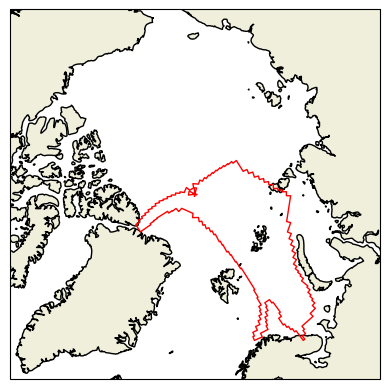

In [149]:
# north pole, all longitudes, partial hole at pole
AR = { "_id" : "2000.07.021.09.0_25", "timestamp" : ISODate("2000-07-21T09:00:00Z"), "raster" : [ [ 36.875, 68.5, [ 250.2693328857422 ] ], [ 36.875, 69, [ 261.7423095703125 ] ], [ 37.5, 69, [ 265.3959655761719 ] ], [ 38.125, 69, [ 252.53233337402344 ] ], [ 36.875, 69.5, [ 261.25146484375 ] ], [ 37.5, 69.5, [ 279.4361877441406 ] ], [ 38.125, 69.5, [ 290.5284118652344 ] ], [ 38.75, 69.5, [ 272.93011474609375 ] ], [ 36.25, 70, [ 252.90208435058594 ] ], [ 36.875, 70, [ 276.3045959472656 ] ], [ 37.5, 70, [ 301.057373046875 ] ], [ 38.125, 70, [ 311.06573486328125 ] ], [ 38.75, 70, [ 308.2490234375 ] ], [ 39.375, 70, [ 295.0455017089844 ] ], [ 40, 70, [ 276.2925720214844 ] ], [ 40.625, 70, [ 259.9015197753906 ] ], [ 41.25, 70, [ 252.52972412109375 ] ], [ 41.875, 70, [ 252.25584411621094 ] ], [ 42.5, 70, [ 255.37501525878906 ] ], [ 43.125, 70, [ 255.9467010498047 ] ], [ 43.75, 70, [ 250.19012451171875 ] ], [ 35.625, 70.5, [ 252.85105895996094 ] ], [ 36.25, 70.5, [ 270.1895446777344 ] ], [ 36.875, 70.5, [ 291.91748046875 ] ], [ 37.5, 70.5, [ 314.74896240234375 ] ], [ 38.125, 70.5, [ 333.9007873535156 ] ], [ 38.75, 70.5, [ 345.70458984375 ] ], [ 39.375, 70.5, [ 349.1762390136719 ] ], [ 40, 70.5, [ 332.89300537109375 ] ], [ 40.625, 70.5, [ 315.6150817871094 ] ], [ 41.25, 70.5, [ 302.81671142578125 ] ], [ 41.875, 70.5, [ 295.3702392578125 ] ], [ 42.5, 70.5, [ 296.4536437988281 ] ], [ 43.125, 70.5, [ 296.48004150390625 ] ], [ 43.75, 70.5, [ 294.1368408203125 ] ], [ 44.375, 70.5, [ 287.427978515625 ] ], [ 45, 70.5, [ 280.4183654785156 ] ], [ 45.625, 70.5, [ 273.7734069824219 ] ], [ 46.25, 70.5, [ 259.562255859375 ] ], [ 35, 71, [ 258.1738586425781 ] ], [ 35.625, 71, [ 269.4723205566406 ] ], [ 36.25, 71, [ 284.49774169921875 ] ], [ 36.875, 71, [ 308.6053161621094 ] ], [ 37.5, 71, [ 336.27789306640625 ] ], [ 38.125, 71, [ 366.8077087402344 ] ], [ 38.75, 71, [ 390.6474304199219 ] ], [ 39.375, 71, [ 389.18499755859375 ] ], [ 40, 71, [ 379.7528381347656 ] ], [ 40.625, 71, [ 364.871826171875 ] ], [ 41.25, 71, [ 351.9626770019531 ] ], [ 41.875, 71, [ 346.4531555175781 ] ], [ 42.5, 71, [ 344.485595703125 ] ], [ 43.125, 71, [ 342.5213623046875 ] ], [ 43.75, 71, [ 339.9207763671875 ] ], [ 44.375, 71, [ 335.6188049316406 ] ], [ 45, 71, [ 326.68682861328125 ] ], [ 45.625, 71, [ 316.33197021484375 ] ], [ 46.25, 71, [ 305.4630432128906 ] ], [ 46.875, 71, [ 286.87652587890625 ] ], [ 47.5, 71, [ 255.7364959716797 ] ], [ 22.5, 71.5, [ 254.19976806640625 ] ], [ 23.125, 71.5, [ 253.4071044921875 ] ], [ 23.75, 71.5, [ 252.25973510742188 ] ], [ 24.375, 71.5, [ 251.76467895507812 ] ], [ 25, 71.5, [ 250.21707153320312 ] ], [ 34.375, 71.5, [ 256.294677734375 ] ], [ 35, 71.5, [ 266.9479064941406 ] ], [ 35.625, 71.5, [ 279.53472900390625 ] ], [ 36.25, 71.5, [ 295.8598327636719 ] ], [ 36.875, 71.5, [ 319.06402587890625 ] ], [ 37.5, 71.5, [ 353.3262023925781 ] ], [ 38.125, 71.5, [ 392.1383972167969 ] ], [ 38.75, 71.5, [ 416.9706726074219 ] ], [ 39.375, 71.5, [ 427.3460693359375 ] ], [ 40, 71.5, [ 424.1496276855469 ] ], [ 40.625, 71.5, [ 413.815185546875 ] ], [ 41.25, 71.5, [ 399.6349792480469 ] ], [ 41.875, 71.5, [ 392.4083251953125 ] ], [ 42.5, 71.5, [ 388.2279357910156 ] ], [ 43.125, 71.5, [ 387.2010192871094 ] ], [ 43.75, 71.5, [ 384.6226806640625 ] ], [ 44.375, 71.5, [ 377.5011291503906 ] ], [ 45, 71.5, [ 370.69256591796875 ] ], [ 45.625, 71.5, [ 362.6757507324219 ] ], [ 46.25, 71.5, [ 349.4815368652344 ] ], [ 46.875, 71.5, [ 331.16680908203125 ] ], [ 47.5, 71.5, [ 306.1814270019531 ] ], [ 48.125, 71.5, [ 267.6463623046875 ] ], [ 23.125, 72, [ 250.50662231445312 ] ], [ 23.75, 72, [ 264.1061096191406 ] ], [ 24.375, 72, [ 265.0043640136719 ] ], [ 25, 72, [ 266.07940673828125 ] ], [ 25.625, 72, [ 268.7893371582031 ] ], [ 26.25, 72, [ 266.21014404296875 ] ], [ 26.875, 72, [ 262.8652648925781 ] ], [ 27.5, 72, [ 259.0147399902344 ] ], [ 28.125, 72, [ 252.5567626953125 ] ], [ 34.375, 72, [ 250.8123016357422 ] ], [ 35, 72, [ 263.09259033203125 ] ], [ 35.625, 72, [ 277.6042175292969 ] ], [ 36.25, 72, [ 298.8236389160156 ] ], [ 36.875, 72, [ 327.18780517578125 ] ], [ 37.5, 72, [ 363.04449462890625 ] ], [ 38.125, 72, [ 399.54254150390625 ] ], [ 38.75, 72, [ 431.6838073730469 ] ], [ 39.375, 72, [ 458.24542236328125 ] ], [ 40, 72, [ 474.6012878417969 ] ], [ 40.625, 72, [ 457.9112854003906 ] ], [ 41.25, 72, [ 442.4690246582031 ] ], [ 41.875, 72, [ 430.277587890625 ] ], [ 42.5, 72, [ 421.58172607421875 ] ], [ 43.125, 72, [ 417.3013000488281 ] ], [ 43.75, 72, [ 414.56292724609375 ] ], [ 44.375, 72, [ 411.4020690917969 ] ], [ 45, 72, [ 405.63800048828125 ] ], [ 45.625, 72, [ 400.83905029296875 ] ], [ 46.25, 72, [ 392.86907958984375 ] ], [ 46.875, 72, [ 371.7344055175781 ] ], [ 47.5, 72, [ 344.86688232421875 ] ], [ 48.125, 72, [ 314.6897888183594 ] ], [ 48.75, 72, [ 279.405029296875 ] ], [ 25, 72.5, [ 258.1369323730469 ] ], [ 25.625, 72.5, [ 262.0567626953125 ] ], [ 26.25, 72.5, [ 267.9448547363281 ] ], [ 26.875, 72.5, [ 275.9990539550781 ] ], [ 27.5, 72.5, [ 273.7895812988281 ] ], [ 28.125, 72.5, [ 267.33428955078125 ] ], [ 28.75, 72.5, [ 258.0166320800781 ] ], [ 35.625, 72.5, [ 264.77178955078125 ] ], [ 36.25, 72.5, [ 286.2655334472656 ] ], [ 36.875, 72.5, [ 316.7339172363281 ] ], [ 37.5, 72.5, [ 355.3434143066406 ] ], [ 38.125, 72.5, [ 399.7594909667969 ] ], [ 38.75, 72.5, [ 441.1670227050781 ] ], [ 39.375, 72.5, [ 471.8372802734375 ] ], [ 40, 72.5, [ 477.1720886230469 ] ], [ 40.625, 72.5, [ 476.6336975097656 ] ], [ 41.25, 72.5, [ 465.31646728515625 ] ], [ 41.875, 72.5, [ 451.9900817871094 ] ], [ 42.5, 72.5, [ 440.37811279296875 ] ], [ 43.125, 72.5, [ 433.83636474609375 ] ], [ 43.75, 72.5, [ 429.1762390136719 ] ], [ 44.375, 72.5, [ 426.1539611816406 ] ], [ 45, 72.5, [ 424.7724609375 ] ], [ 45.625, 72.5, [ 420.5530700683594 ] ], [ 46.25, 72.5, [ 411.9862976074219 ] ], [ 46.875, 72.5, [ 401.44793701171875 ] ], [ 47.5, 72.5, [ 386.4031677246094 ] ], [ 48.125, 72.5, [ 359.45111083984375 ] ], [ 48.75, 72.5, [ 327.660400390625 ] ], [ 49.375, 72.5, [ 290.4105529785156 ] ], [ 50, 72.5, [ 250.26177978515625 ] ], [ 26.875, 73, [ 254.71713256835938 ] ], [ 27.5, 73, [ 264.7569274902344 ] ], [ 28.125, 73, [ 275.4870910644531 ] ], [ 28.75, 73, [ 272.52105712890625 ] ], [ 29.375, 73, [ 259.5724792480469 ] ], [ 36.25, 73, [ 269.13922119140625 ] ], [ 36.875, 73, [ 299.7001953125 ] ], [ 37.5, 73, [ 339.37451171875 ] ], [ 38.125, 73, [ 383.69091796875 ] ], [ 38.75, 73, [ 429.2387390136719 ] ], [ 39.375, 73, [ 461.437744140625 ] ], [ 40, 73, [ 476.05145263671875 ] ], [ 40.625, 73, [ 483.3666687011719 ] ], [ 41.25, 73, [ 483.3106994628906 ] ], [ 41.875, 73, [ 471.8561706542969 ] ], [ 42.5, 73, [ 456.3005065917969 ] ], [ 43.125, 73, [ 443.1422119140625 ] ], [ 43.75, 73, [ 432.4337463378906 ] ], [ 44.375, 73, [ 423.4244689941406 ] ], [ 45, 73, [ 418.8832702636719 ] ], [ 45.625, 73, [ 416.8894348144531 ] ], [ 46.25, 73, [ 415.95458984375 ] ], [ 46.875, 73, [ 412.1622314453125 ] ], [ 47.5, 73, [ 406.03173828125 ] ], [ 48.125, 73, [ 393.96844482421875 ] ], [ 48.75, 73, [ 363.05718994140625 ] ], [ 49.375, 73, [ 326.215576171875 ] ], [ 50, 73, [ 289.15228271484375 ] ], [ 50.625, 73, [ 251.703369140625 ] ], [ 28.125, 73.5, [ 252.55552673339844 ] ], [ 28.75, 73.5, [ 262.3235168457031 ] ], [ 29.375, 73.5, [ 271.045654296875 ] ], [ 30, 73.5, [ 271.13037109375 ] ], [ 30.625, 73.5, [ 253.9539794921875 ] ], [ 36.25, 73.5, [ 261.07379150390625 ] ], [ 36.875, 73.5, [ 290.4974060058594 ] ], [ 37.5, 73.5, [ 325.1695861816406 ] ], [ 38.125, 73.5, [ 364.0113830566406 ] ], [ 38.75, 73.5, [ 403.1712341308594 ] ], [ 39.375, 73.5, [ 441.046630859375 ] ], [ 40, 73.5, [ 477.3296813964844 ] ], [ 40.625, 73.5, [ 499.1824951171875 ] ], [ 41.25, 73.5, [ 493.5028076171875 ] ], [ 41.875, 73.5, [ 482.4594421386719 ] ], [ 42.5, 73.5, [ 469.5752868652344 ] ], [ 43.125, 73.5, [ 452.03863525390625 ] ], [ 43.75, 73.5, [ 434.60394287109375 ] ], [ 44.375, 73.5, [ 422.39794921875 ] ], [ 45, 73.5, [ 413.6299743652344 ] ], [ 45.625, 73.5, [ 409.7416076660156 ] ], [ 46.25, 73.5, [ 407.89703369140625 ] ], [ 46.875, 73.5, [ 407.9188537597656 ] ], [ 47.5, 73.5, [ 404.6287536621094 ] ], [ 48.125, 73.5, [ 391.2455749511719 ] ], [ 48.75, 73.5, [ 373.9075622558594 ] ], [ 49.375, 73.5, [ 352.9748229980469 ] ], [ 50, 73.5, [ 321.6094055175781 ] ], [ 50.625, 73.5, [ 286.70269775390625 ] ], [ 29.375, 74, [ 258.99658203125 ] ], [ 30, 74, [ 263.9740905761719 ] ], [ 30.625, 74, [ 265.814453125 ] ], [ 31.25, 74, [ 263.5348815917969 ] ], [ 31.875, 74, [ 250.05709838867188 ] ], [ 36.25, 74, [ 258.39642333984375 ] ], [ 36.875, 74, [ 279.9187927246094 ] ], [ 37.5, 74, [ 312.19049072265625 ] ], [ 38.125, 74, [ 347.6276550292969 ] ], [ 38.75, 74, [ 383.3904724121094 ] ], [ 39.375, 74, [ 412.9389953613281 ] ], [ 40, 74, [ 439.5058898925781 ] ], [ 40.625, 74, [ 457.6044006347656 ] ], [ 41.25, 74, [ 470.0859680175781 ] ], [ 41.875, 74, [ 471.0098571777344 ] ], [ 42.5, 74, [ 468.5429382324219 ] ], [ 43.125, 74, [ 462.0624694824219 ] ], [ 43.75, 74, [ 444.293212890625 ] ], [ 44.375, 74, [ 427.529541015625 ] ], [ 45, 74, [ 413.67547607421875 ] ], [ 45.625, 74, [ 402.4826354980469 ] ], [ 46.25, 74, [ 395.22174072265625 ] ], [ 46.875, 74, [ 393.6143493652344 ] ], [ 47.5, 74, [ 391.9648742675781 ] ], [ 48.125, 74, [ 388.44683837890625 ] ], [ 48.75, 74, [ 379.80804443359375 ] ], [ 49.375, 74, [ 365.9181213378906 ] ], [ 50, 74, [ 348.4690856933594 ] ], [ 50.625, 74, [ 323.8948974609375 ] ], [ 51.25, 74, [ 286.3499450683594 ] ], [ 51.875, 74, [ 251.33140563964844 ] ], [ 30, 74.5, [ 258.0082702636719 ] ], [ 30.625, 74.5, [ 278.6760559082031 ] ], [ 31.25, 74.5, [ 275.3379211425781 ] ], [ 31.875, 74.5, [ 268.2381591796875 ] ], [ 32.5, 74.5, [ 257.91900634765625 ] ], [ 35.625, 74.5, [ 256.04974365234375 ] ], [ 36.25, 74.5, [ 272.47161865234375 ] ], [ 36.875, 74.5, [ 293.91253662109375 ] ], [ 37.5, 74.5, [ 314.9645690917969 ] ], [ 38.125, 74.5, [ 336.3389587402344 ] ], [ 38.75, 74.5, [ 357.9046936035156 ] ], [ 39.375, 74.5, [ 382.97747802734375 ] ], [ 40, 74.5, [ 403.9286804199219 ] ], [ 40.625, 74.5, [ 419.9642028808594 ] ], [ 41.25, 74.5, [ 433.4004211425781 ] ], [ 41.875, 74.5, [ 444.1999206542969 ] ], [ 42.5, 74.5, [ 447.0340881347656 ] ], [ 43.125, 74.5, [ 440.4518127441406 ] ], [ 43.75, 74.5, [ 431.8727111816406 ] ], [ 44.375, 74.5, [ 421.4345703125 ] ], [ 45, 74.5, [ 411.10333251953125 ] ], [ 45.625, 74.5, [ 403.06585693359375 ] ], [ 46.25, 74.5, [ 396.66436767578125 ] ], [ 46.875, 74.5, [ 391.94610595703125 ] ], [ 47.5, 74.5, [ 390.0754699707031 ] ], [ 48.125, 74.5, [ 388.8108215332031 ] ], [ 48.75, 74.5, [ 386.5053405761719 ] ], [ 49.375, 74.5, [ 383.03472900390625 ] ], [ 50, 74.5, [ 366.9497375488281 ] ], [ 50.625, 74.5, [ 343.7762451171875 ] ], [ 51.25, 74.5, [ 318.2244567871094 ] ], [ 51.875, 74.5, [ 290.475830078125 ] ], [ 52.5, 74.5, [ 258.8951416015625 ] ], [ 31.25, 75, [ 272.9892272949219 ] ], [ 31.875, 75, [ 295.92681884765625 ] ], [ 32.5, 75, [ 296.5616760253906 ] ], [ 33.125, 75, [ 283.78765869140625 ] ], [ 33.75, 75, [ 272.2174377441406 ] ], [ 34.375, 75, [ 261.868408203125 ] ], [ 35, 75, [ 253.5438690185547 ] ], [ 35.625, 75, [ 267.3979797363281 ] ], [ 36.25, 75, [ 284.51416015625 ] ], [ 36.875, 75, [ 303.0478210449219 ] ], [ 37.5, 75, [ 323.10595703125 ] ], [ 38.125, 75, [ 342.6362609863281 ] ], [ 38.75, 75, [ 357.8731689453125 ] ], [ 39.375, 75, [ 371.9486999511719 ] ], [ 40, 75, [ 384.8658142089844 ] ], [ 40.625, 75, [ 396.4565124511719 ] ], [ 41.25, 75, [ 402.2664794921875 ] ], [ 41.875, 75, [ 409.3658142089844 ] ], [ 42.5, 75, [ 415.2811279296875 ] ], [ 43.125, 75, [ 419.1928405761719 ] ], [ 43.75, 75, [ 419.0146179199219 ] ], [ 44.375, 75, [ 416.6238708496094 ] ], [ 45, 75, [ 412.24908447265625 ] ], [ 45.625, 75, [ 403.3591613769531 ] ], [ 46.25, 75, [ 397.6728515625 ] ], [ 46.875, 75, [ 394.94256591796875 ] ], [ 47.5, 75, [ 393.9057312011719 ] ], [ 48.125, 75, [ 394.4666748046875 ] ], [ 48.75, 75, [ 395.8189392089844 ] ], [ 49.375, 75, [ 391.81756591796875 ] ], [ 50, 75, [ 384.2093200683594 ] ], [ 50.625, 75, [ 373.6061096191406 ] ], [ 51.25, 75, [ 351.7074890136719 ] ], [ 51.875, 75, [ 325.559814453125 ] ], [ 52.5, 75, [ 297.729736328125 ] ], [ 53.125, 75, [ 268.7913818359375 ] ], [ 31.25, 75.5, [ 266.7099609375 ] ], [ 31.875, 75.5, [ 286.0609130859375 ] ], [ 32.5, 75.5, [ 299.29296875 ] ], [ 33.125, 75.5, [ 304.8648986816406 ] ], [ 33.75, 75.5, [ 304.171142578125 ] ], [ 34.375, 75.5, [ 298.7660827636719 ] ], [ 35, 75.5, [ 295.088134765625 ] ], [ 35.625, 75.5, [ 295.3671569824219 ] ], [ 36.25, 75.5, [ 301.1456298828125 ] ], [ 36.875, 75.5, [ 311.912109375 ] ], [ 37.5, 75.5, [ 327.921142578125 ] ], [ 38.125, 75.5, [ 345.4648132324219 ] ], [ 38.75, 75.5, [ 361.6375427246094 ] ], [ 39.375, 75.5, [ 371.9971008300781 ] ], [ 40, 75.5, [ 379.5292663574219 ] ], [ 40.625, 75.5, [ 385.72149658203125 ] ], [ 41.25, 75.5, [ 391.9222717285156 ] ], [ 41.875, 75.5, [ 396.8193359375 ] ], [ 42.5, 75.5, [ 399.1033020019531 ] ], [ 43.125, 75.5, [ 400.7671813964844 ] ], [ 43.75, 75.5, [ 401.7908020019531 ] ], [ 44.375, 75.5, [ 401.829833984375 ] ], [ 45, 75.5, [ 397.3016662597656 ] ], [ 45.625, 75.5, [ 393.19500732421875 ] ], [ 46.25, 75.5, [ 389.9002685546875 ] ], [ 46.875, 75.5, [ 387.443359375 ] ], [ 47.5, 75.5, [ 391.15081787109375 ] ], [ 48.125, 75.5, [ 397.3701477050781 ] ], [ 48.75, 75.5, [ 401.0638732910156 ] ], [ 49.375, 75.5, [ 403.6658630371094 ] ], [ 50, 75.5, [ 401.3122863769531 ] ], [ 50.625, 75.5, [ 394.16253662109375 ] ], [ 51.25, 75.5, [ 384.1392517089844 ] ], [ 51.875, 75.5, [ 371.5624084472656 ] ], [ 52.5, 75.5, [ 347.9906311035156 ] ], [ 53.125, 75.5, [ 316.9878845214844 ] ], [ 53.75, 75.5, [ 288.31195068359375 ] ], [ 54.375, 75.5, [ 261.7377624511719 ] ], [ 31.875, 76, [ 268.8399963378906 ] ], [ 32.5, 76, [ 308.38177490234375 ] ], [ 33.125, 76, [ 338.63800048828125 ] ], [ 33.75, 76, [ 338.1468200683594 ] ], [ 34.375, 76, [ 330.47540283203125 ] ], [ 35, 76, [ 322.6556396484375 ] ], [ 35.625, 76, [ 315.3915100097656 ] ], [ 36.25, 76, [ 310.4884033203125 ] ], [ 36.875, 76, [ 320.6452331542969 ] ], [ 37.5, 76, [ 334.5715026855469 ] ], [ 38.125, 76, [ 348.8098449707031 ] ], [ 38.75, 76, [ 362.99420166015625 ] ], [ 39.375, 76, [ 377.149658203125 ] ], [ 40, 76, [ 386.7163391113281 ] ], [ 40.625, 76, [ 389.1388854980469 ] ], [ 41.25, 76, [ 391.0258483886719 ] ], [ 41.875, 76, [ 392.4510192871094 ] ], [ 42.5, 76, [ 393.4986267089844 ] ], [ 43.125, 76, [ 392.70635986328125 ] ], [ 43.75, 76, [ 390.7187805175781 ] ], [ 44.375, 76, [ 387.97100830078125 ] ], [ 45, 76, [ 384.33837890625 ] ], [ 45.625, 76, [ 379.8887023925781 ] ], [ 46.25, 76, [ 377.9137268066406 ] ], [ 46.875, 76, [ 377.7979736328125 ] ], [ 47.5, 76, [ 380.5400695800781 ] ], [ 48.125, 76, [ 385.5896911621094 ] ], [ 48.75, 76, [ 395.047607421875 ] ], [ 49.375, 76, [ 404.442626953125 ] ], [ 50, 76, [ 411.7308044433594 ] ], [ 50.625, 76, [ 416.8798522949219 ] ], [ 51.25, 76, [ 414.5428161621094 ] ], [ 51.875, 76, [ 401.6619873046875 ] ], [ 52.5, 76, [ 382.5666198730469 ] ], [ 53.125, 76, [ 361.32525634765625 ] ], [ 53.75, 76, [ 337.7645568847656 ] ], [ 54.375, 76, [ 314.7334899902344 ] ], [ 55, 76, [ 293.760498046875 ] ], [ 55.625, 76, [ 274.7247314453125 ] ], [ 56.25, 76, [ 261.0350341796875 ] ], [ 56.875, 76, [ 251.97384643554688 ] ], [ 31.875, 76.5, [ 250.3902130126953 ] ], [ 32.5, 76.5, [ 283.4429931640625 ] ], [ 33.125, 76.5, [ 311.42413330078125 ] ], [ 33.75, 76.5, [ 333.5578918457031 ] ], [ 34.375, 76.5, [ 349.3363342285156 ] ], [ 35, 76.5, [ 357.8295593261719 ] ], [ 35.625, 76.5, [ 351.42303466796875 ] ], [ 36.25, 76.5, [ 346.2077331542969 ] ], [ 36.875, 76.5, [ 343.94317626953125 ] ], [ 37.5, 76.5, [ 344.6391296386719 ] ], [ 38.125, 76.5, [ 348.22821044921875 ] ], [ 38.75, 76.5, [ 356.673095703125 ] ], [ 39.375, 76.5, [ 368.463134765625 ] ], [ 40, 76.5, [ 378.578125 ] ], [ 40.625, 76.5, [ 387.0413818359375 ] ], [ 41.25, 76.5, [ 393.4523620605469 ] ], [ 41.875, 76.5, [ 395.9494323730469 ] ], [ 42.5, 76.5, [ 396.37158203125 ] ], [ 43.125, 76.5, [ 394.6660461425781 ] ], [ 43.75, 76.5, [ 392.3709716796875 ] ], [ 44.375, 76.5, [ 387.8411865234375 ] ], [ 45, 76.5, [ 380.84527587890625 ] ], [ 45.625, 76.5, [ 373.77410888671875 ] ], [ 46.25, 76.5, [ 366.7674560546875 ] ], [ 46.875, 76.5, [ 364.17559814453125 ] ], [ 47.5, 76.5, [ 370.4576416015625 ] ], [ 48.125, 76.5, [ 379.6114807128906 ] ], [ 48.75, 76.5, [ 390.54852294921875 ] ], [ 49.375, 76.5, [ 403.1267395019531 ] ], [ 50, 76.5, [ 416.58447265625 ] ], [ 50.625, 76.5, [ 428.1432189941406 ] ], [ 51.25, 76.5, [ 431.4757995605469 ] ], [ 51.875, 76.5, [ 429.9469909667969 ] ], [ 52.5, 76.5, [ 421.91217041015625 ] ], [ 53.125, 76.5, [ 402.6388854980469 ] ], [ 53.75, 76.5, [ 382.4185485839844 ] ], [ 54.375, 76.5, [ 361.32904052734375 ] ], [ 55, 76.5, [ 340.0577392578125 ] ], [ 55.625, 76.5, [ 324.27227783203125 ] ], [ 56.25, 76.5, [ 310.1602783203125 ] ], [ 56.875, 76.5, [ 297.8115539550781 ] ], [ 57.5, 76.5, [ 286.8660583496094 ] ], [ 58.125, 76.5, [ 277.6537780761719 ] ], [ 58.75, 76.5, [ 268.0579528808594 ] ], [ 59.375, 76.5, [ 258.10107421875 ] ], [ 32.5, 77, [ 274.99835205078125 ] ], [ 33.125, 77, [ 310.34051513671875 ] ], [ 33.75, 77, [ 344.2817687988281 ] ], [ 34.375, 77, [ 361.99072265625 ] ], [ 35, 77, [ 368.19970703125 ] ], [ 35.625, 77, [ 369.8180847167969 ] ], [ 36.25, 77, [ 365.9155578613281 ] ], [ 36.875, 77, [ 358.49224853515625 ] ], [ 37.5, 77, [ 351.6690673828125 ] ], [ 38.125, 77, [ 355.06964111328125 ] ], [ 38.75, 77, [ 360.66802978515625 ] ], [ 39.375, 77, [ 368.4150085449219 ] ], [ 40, 77, [ 376.2784118652344 ] ], [ 40.625, 77, [ 383.9884338378906 ] ], [ 41.25, 77, [ 391.1780700683594 ] ], [ 41.875, 77, [ 394.5224914550781 ] ], [ 42.5, 77, [ 396.7349853515625 ] ], [ 43.125, 77, [ 393.96014404296875 ] ], [ 43.75, 77, [ 390.38519287109375 ] ], [ 44.375, 77, [ 385.86773681640625 ] ], [ 45, 77, [ 380.4706726074219 ] ], [ 45.625, 77, [ 374.46990966796875 ] ], [ 46.25, 77, [ 370.3086853027344 ] ], [ 46.875, 77, [ 368.0196228027344 ] ], [ 47.5, 77, [ 367.688720703125 ] ], [ 48.125, 77, [ 369.54595947265625 ] ], [ 48.75, 77, [ 379.9976501464844 ] ], [ 49.375, 77, [ 395.7168273925781 ] ], [ 50, 77, [ 412.8037109375 ] ], [ 50.625, 77, [ 428.3723449707031 ] ], [ 51.25, 77, [ 440.280517578125 ] ], [ 51.875, 77, [ 440.9421081542969 ] ], [ 52.5, 77, [ 438.2515869140625 ] ], [ 53.125, 77, [ 432.39044189453125 ] ], [ 53.75, 77, [ 423.66802978515625 ] ], [ 54.375, 77, [ 407.9259033203125 ] ], [ 55, 77, [ 390.7362365722656 ] ], [ 55.625, 77, [ 371.8069763183594 ] ], [ 56.25, 77, [ 353.84600830078125 ] ], [ 56.875, 77, [ 340.6002502441406 ] ], [ 57.5, 77, [ 330.5822448730469 ] ], [ 58.125, 77, [ 321.22406005859375 ] ], [ 58.75, 77, [ 312.4241943359375 ] ], [ 59.375, 77, [ 302.8056945800781 ] ], [ 60, 77, [ 290.8721618652344 ] ], [ 60.625, 77, [ 278.24786376953125 ] ], [ 61.25, 77, [ 265.04736328125 ] ], [ 61.875, 77, [ 250.90977478027344 ] ], [ 32.5, 77.5, [ 261.180419921875 ] ], [ 33.125, 77.5, [ 293.0785827636719 ] ], [ 33.75, 77.5, [ 324.5296325683594 ] ], [ 34.375, 77.5, [ 347.6228942871094 ] ], [ 35, 77.5, [ 367.1831970214844 ] ], [ 35.625, 77.5, [ 382.8078918457031 ] ], [ 36.25, 77.5, [ 394.2503662109375 ] ], [ 36.875, 77.5, [ 388.8941650390625 ] ], [ 37.5, 77.5, [ 381.633544921875 ] ], [ 38.125, 77.5, [ 374.69134521484375 ] ], [ 38.75, 77.5, [ 369.5790710449219 ] ], [ 39.375, 77.5, [ 366.1519775390625 ] ], [ 40, 77.5, [ 364.4431457519531 ] ], [ 40.625, 77.5, [ 370.8934326171875 ] ], [ 41.25, 77.5, [ 376.78173828125 ] ], [ 41.875, 77.5, [ 381.5023498535156 ] ], [ 42.5, 77.5, [ 385.0531311035156 ] ], [ 43.125, 77.5, [ 387.513916015625 ] ], [ 43.75, 77.5, [ 388.8911437988281 ] ], [ 44.375, 77.5, [ 384.66693115234375 ] ], [ 45, 77.5, [ 378.0113525390625 ] ], [ 45.625, 77.5, [ 371.6901550292969 ] ], [ 46.25, 77.5, [ 365.8254089355469 ] ], [ 46.875, 77.5, [ 360.38470458984375 ] ], [ 47.5, 77.5, [ 363.9268798828125 ] ], [ 48.125, 77.5, [ 369.6316223144531 ] ], [ 48.75, 77.5, [ 377.6080627441406 ] ], [ 49.375, 77.5, [ 389.3722229003906 ] ], [ 50, 77.5, [ 403.8348083496094 ] ], [ 50.625, 77.5, [ 419.3641357421875 ] ], [ 51.25, 77.5, [ 433.2100830078125 ] ], [ 51.875, 77.5, [ 445.31597900390625 ] ], [ 52.5, 77.5, [ 455.6951904296875 ] ], [ 53.125, 77.5, [ 454.6380920410156 ] ], [ 53.75, 77.5, [ 447.2268981933594 ] ], [ 54.375, 77.5, [ 436.3169250488281 ] ], [ 55, 77.5, [ 421.3733215332031 ] ], [ 55.625, 77.5, [ 406.16546630859375 ] ], [ 56.25, 77.5, [ 391.83856201171875 ] ], [ 56.875, 77.5, [ 378.71539306640625 ] ], [ 57.5, 77.5, [ 366.8294982910156 ] ], [ 58.125, 77.5, [ 356.0732116699219 ] ], [ 58.75, 77.5, [ 349.0566101074219 ] ], [ 59.375, 77.5, [ 342.642578125 ] ], [ 60, 77.5, [ 336.36834716796875 ] ], [ 60.625, 77.5, [ 330.1739501953125 ] ], [ 61.25, 77.5, [ 320.15814208984375 ] ], [ 61.875, 77.5, [ 307.4902648925781 ] ], [ 62.5, 77.5, [ 294.7545166015625 ] ], [ 63.125, 77.5, [ 281.9191589355469 ] ], [ 63.75, 77.5, [ 269.240966796875 ] ], [ 64.375, 77.5, [ 257.472900390625 ] ], [ 32.5, 78, [ 263.3338623046875 ] ], [ 33.125, 78, [ 288.6161193847656 ] ], [ 33.75, 78, [ 313.7714538574219 ] ], [ 34.375, 78, [ 338.73309326171875 ] ], [ 35, 78, [ 362.7462158203125 ] ], [ 35.625, 78, [ 373.8819885253906 ] ], [ 36.25, 78, [ 381.43707275390625 ] ], [ 36.875, 78, [ 386.02581787109375 ] ], [ 37.5, 78, [ 387.7124938964844 ] ], [ 38.125, 78, [ 386.50421142578125 ] ], [ 38.75, 78, [ 382.76519775390625 ] ], [ 39.375, 78, [ 379.88934326171875 ] ], [ 40, 78, [ 378.3294982910156 ] ], [ 40.625, 78, [ 377.7276611328125 ] ], [ 41.25, 78, [ 378.023681640625 ] ], [ 41.875, 78, [ 379.2716064453125 ] ], [ 42.5, 78, [ 378.4964599609375 ] ], [ 43.125, 78, [ 376.9870300292969 ] ], [ 43.75, 78, [ 375.51348876953125 ] ], [ 44.375, 78, [ 373.0516052246094 ] ], [ 45, 78, [ 369.523681640625 ] ], [ 45.625, 78, [ 365.554443359375 ] ], [ 46.25, 78, [ 362.3587341308594 ] ], [ 46.875, 78, [ 359.9236145019531 ] ], [ 47.5, 78, [ 358.21917724609375 ] ], [ 48.125, 78, [ 358.6944274902344 ] ], [ 48.75, 78, [ 367.4396057128906 ] ], [ 49.375, 78, [ 380.9902648925781 ] ], [ 50, 78, [ 395.602783203125 ] ], [ 50.625, 78, [ 411.19677734375 ] ], [ 51.25, 78, [ 427.7133483886719 ] ], [ 51.875, 78, [ 439.1654052734375 ] ], [ 52.5, 78, [ 447.20941162109375 ] ], [ 53.125, 78, [ 453.4380798339844 ] ], [ 53.75, 78, [ 453.5711669921875 ] ], [ 54.375, 78, [ 450.732666015625 ] ], [ 55, 78, [ 437.7070007324219 ] ], [ 55.625, 78, [ 424.78326416015625 ] ], [ 56.25, 78, [ 411.87664794921875 ] ], [ 56.875, 78, [ 399.07568359375 ] ], [ 57.5, 78, [ 388.173583984375 ] ], [ 58.125, 78, [ 380.61737060546875 ] ], [ 58.75, 78, [ 374.2224426269531 ] ], [ 59.375, 78, [ 369.01959228515625 ] ], [ 60, 78, [ 364.44342041015625 ] ], [ 60.625, 78, [ 360.5079650878906 ] ], [ 61.25, 78, [ 355.9105224609375 ] ], [ 61.875, 78, [ 350.59649658203125 ] ], [ 62.5, 78, [ 344.5752258300781 ] ], [ 63.125, 78, [ 336.0193786621094 ] ], [ 63.75, 78, [ 325.570556640625 ] ], [ 64.375, 78, [ 314.97113037109375 ] ], [ 65, 78, [ 304.33612060546875 ] ], [ 65.625, 78, [ 293.3347473144531 ] ], [ 66.25, 78, [ 280.9014587402344 ] ], [ 66.875, 78, [ 268.8290710449219 ] ], [ 67.5, 78, [ 257.17822265625 ] ], [ 32.5, 78.5, [ 265.2254638671875 ] ], [ 33.125, 78.5, [ 289.3698425292969 ] ], [ 33.75, 78.5, [ 312.3132629394531 ] ], [ 34.375, 78.5, [ 331.063232421875 ] ], [ 35, 78.5, [ 348.9233093261719 ] ], [ 35.625, 78.5, [ 365.7086486816406 ] ], [ 36.25, 78.5, [ 381.32025146484375 ] ], [ 36.875, 78.5, [ 390.5299377441406 ] ], [ 37.5, 78.5, [ 398.03485107421875 ] ], [ 38.125, 78.5, [ 398.7118835449219 ] ], [ 38.75, 78.5, [ 396.3481140136719 ] ], [ 39.375, 78.5, [ 393.521240234375 ] ], [ 40, 78.5, [ 390.1401062011719 ] ], [ 40.625, 78.5, [ 385.75048828125 ] ], [ 41.25, 78.5, [ 381.4933166503906 ] ], [ 41.875, 78.5, [ 377.3625183105469 ] ], [ 42.5, 78.5, [ 376.3525085449219 ] ], [ 43.125, 78.5, [ 375.53326416015625 ] ], [ 43.75, 78.5, [ 373.1746520996094 ] ], [ 44.375, 78.5, [ 369.1087341308594 ] ], [ 45, 78.5, [ 364.5265197753906 ] ], [ 45.625, 78.5, [ 359.4573669433594 ] ], [ 46.25, 78.5, [ 353.7572326660156 ] ], [ 46.875, 78.5, [ 349.103515625 ] ], [ 47.5, 78.5, [ 352.27056884765625 ] ], [ 48.125, 78.5, [ 356.98040771484375 ] ], [ 48.75, 78.5, [ 363.24951171875 ] ], [ 49.375, 78.5, [ 371.1897277832031 ] ], [ 50, 78.5, [ 380.83917236328125 ] ], [ 50.625, 78.5, [ 394.5964050292969 ] ], [ 51.25, 78.5, [ 408.57293701171875 ] ], [ 51.875, 78.5, [ 422.7524108886719 ] ], [ 52.5, 78.5, [ 435.56646728515625 ] ], [ 53.125, 78.5, [ 445.87353515625 ] ], [ 53.75, 78.5, [ 443.98382568359375 ] ], [ 54.375, 78.5, [ 440.54095458984375 ] ], [ 55, 78.5, [ 435.6064147949219 ] ], [ 55.625, 78.5, [ 429.26629638671875 ] ], [ 56.25, 78.5, [ 420.9229431152344 ] ], [ 56.875, 78.5, [ 409.47222900390625 ] ], [ 57.5, 78.5, [ 398.1728515625 ] ], [ 58.125, 78.5, [ 387.119384765625 ] ], [ 58.75, 78.5, [ 376.1846618652344 ] ], [ 59.375, 78.5, [ 369.5216369628906 ] ], [ 60, 78.5, [ 367.28045654296875 ] ], [ 60.625, 78.5, [ 365.40948486328125 ] ], [ 61.25, 78.5, [ 363.8421325683594 ] ], [ 61.875, 78.5, [ 362.60400390625 ] ], [ 62.5, 78.5, [ 361.8653259277344 ] ], [ 63.125, 78.5, [ 360.4187927246094 ] ], [ 63.75, 78.5, [ 358.1306457519531 ] ], [ 64.375, 78.5, [ 355.1201171875 ] ], [ 65, 78.5, [ 350.54803466796875 ] ], [ 65.625, 78.5, [ 342.9278259277344 ] ], [ 66.25, 78.5, [ 334.7428283691406 ] ], [ 66.875, 78.5, [ 326.1094055175781 ] ], [ 67.5, 78.5, [ 317.1510314941406 ] ], [ 68.125, 78.5, [ 307.554443359375 ] ], [ 68.75, 78.5, [ 297.8437194824219 ] ], [ 69.375, 78.5, [ 288.1920166015625 ] ], [ 70, 78.5, [ 279.3085021972656 ] ], [ 70.625, 78.5, [ 272.32867431640625 ] ], [ 71.25, 78.5, [ 267.84979248046875 ] ], [ 71.875, 78.5, [ 263.0579528808594 ] ], [ 72.5, 78.5, [ 257.98114013671875 ] ], [ 73.125, 78.5, [ 252.67535400390625 ] ], [ 32.5, 79, [ 273.8646240234375 ] ], [ 33.125, 79, [ 296.85430908203125 ] ], [ 33.75, 79, [ 317.6630554199219 ] ], [ 34.375, 79, [ 332.9111633300781 ] ], [ 35, 79, [ 347.38555908203125 ] ], [ 35.625, 79, [ 361.0128479003906 ] ], [ 36.25, 79, [ 373.7438049316406 ] ], [ 36.875, 79, [ 383.393310546875 ] ], [ 37.5, 79, [ 391.1589050292969 ] ], [ 38.125, 79, [ 394.873779296875 ] ], [ 38.75, 79, [ 396.84613037109375 ] ], [ 39.375, 79, [ 398.12542724609375 ] ], [ 40, 79, [ 398.6618957519531 ] ], [ 40.625, 79, [ 398.4419250488281 ] ], [ 41.25, 79, [ 395.823974609375 ] ], [ 41.875, 79, [ 392.5291748046875 ] ], [ 42.5, 79, [ 388.4162292480469 ] ], [ 43.125, 79, [ 383.7862243652344 ] ], [ 43.75, 79, [ 378.7290344238281 ] ], [ 44.375, 79, [ 373.30364990234375 ] ], [ 45, 79, [ 367.5937194824219 ] ], [ 45.625, 79, [ 360.730712890625 ] ], [ 46.25, 79, [ 356.552001953125 ] ], [ 46.875, 79, [ 353.42486572265625 ] ], [ 47.5, 79, [ 351.3738708496094 ] ], [ 48.125, 79, [ 350.2984313964844 ] ], [ 48.75, 79, [ 353.412353515625 ] ], [ 49.375, 79, [ 361.03619384765625 ] ], [ 50, 79, [ 369.77581787109375 ] ], [ 50.625, 79, [ 379.5841064453125 ] ], [ 51.25, 79, [ 391.1579284667969 ] ], [ 51.875, 79, [ 403.6942443847656 ] ], [ 52.5, 79, [ 412.8844909667969 ] ], [ 53.125, 79, [ 420.54132080078125 ] ], [ 53.75, 79, [ 426.6927795410156 ] ], [ 54.375, 79, [ 431.3919372558594 ] ], [ 55, 79, [ 433.98358154296875 ] ], [ 55.625, 79, [ 426.9259948730469 ] ], [ 56.25, 79, [ 418.6607360839844 ] ], [ 56.875, 79, [ 409.13555908203125 ] ], [ 57.5, 79, [ 398.52020263671875 ] ], [ 58.125, 79, [ 387.52789306640625 ] ], [ 58.75, 79, [ 379.59539794921875 ] ], [ 59.375, 79, [ 372.51824951171875 ] ], [ 60, 79, [ 366.2425842285156 ] ], [ 60.625, 79, [ 360.7277526855469 ] ], [ 61.25, 79, [ 357.0327453613281 ] ], [ 61.875, 79, [ 358.03021240234375 ] ], [ 62.5, 79, [ 359.4270935058594 ] ], [ 63.125, 79, [ 361.19415283203125 ] ], [ 63.75, 79, [ 363.31207275390625 ] ], [ 64.375, 79, [ 365.1553955078125 ] ], [ 65, 79, [ 365.8722839355469 ] ], [ 65.625, 79, [ 366.1347351074219 ] ], [ 66.25, 79, [ 365.8768310546875 ] ], [ 66.875, 79, [ 365.2059326171875 ] ], [ 67.5, 79, [ 361.8759460449219 ] ], [ 68.125, 79, [ 355.2356262207031 ] ], [ 68.75, 79, [ 348.3697204589844 ] ], [ 69.375, 79, [ 341.40557861328125 ] ], [ 70, 79, [ 334.4140625 ] ], [ 70.625, 79, [ 327.8841247558594 ] ], [ 71.25, 79, [ 321.7489318847656 ] ], [ 71.875, 79, [ 316.0137939453125 ] ], [ 72.5, 79, [ 310.5846252441406 ] ], [ 73.125, 79, [ 307.03369140625 ] ], [ 73.75, 79, [ 305.55322265625 ] ], [ 74.375, 79, [ 304.05230712890625 ] ], [ 75, 79, [ 302.5411071777344 ] ], [ 75.625, 79, [ 301.03204345703125 ] ], [ 76.25, 79, [ 300.9429931640625 ] ], [ 76.875, 79, [ 301.1458435058594 ] ], [ 77.5, 79, [ 301.365234375 ] ], [ 78.125, 79, [ 301.6700134277344 ] ], [ 78.75, 79, [ 301.58172607421875 ] ], [ 79.375, 79, [ 300.3121032714844 ] ], [ 80, 79, [ 298.9930114746094 ] ], [ 80.625, 79, [ 297.67401123046875 ] ], [ 81.25, 79, [ 296.37811279296875 ] ], [ 81.875, 79, [ 293.5286865234375 ] ], [ 82.5, 79, [ 290.3334045410156 ] ], [ 83.125, 79, [ 287.4455871582031 ] ], [ 83.75, 79, [ 284.8027038574219 ] ], [ 84.375, 79, [ 282.2373962402344 ] ], [ 85, 79, [ 278.9154357910156 ] ], [ 85.625, 79, [ 276.3652648925781 ] ], [ 86.25, 79, [ 274.53472900390625 ] ], [ 86.875, 79, [ 273.4622802734375 ] ], [ 87.5, 79, [ 268.67120361328125 ] ], [ 88.125, 79, [ 261.1424865722656 ] ], [ 88.75, 79, [ 254.19522094726562 ] ], [ 32.5, 79.5, [ 269.41571044921875 ] ], [ 33.125, 79.5, [ 293.5757141113281 ] ], [ 33.75, 79.5, [ 316.0245361328125 ] ], [ 34.375, 79.5, [ 336.579833984375 ] ], [ 35, 79.5, [ 354.6888732910156 ] ], [ 35.625, 79.5, [ 363.41534423828125 ] ], [ 36.25, 79.5, [ 370.9617004394531 ] ], [ 36.875, 79.5, [ 377.78594970703125 ] ], [ 37.5, 79.5, [ 383.8928527832031 ] ], [ 38.125, 79.5, [ 389.27166748046875 ] ], [ 38.75, 79.5, [ 393.9712829589844 ] ], [ 39.375, 79.5, [ 397.99725341796875 ] ], [ 40, 79.5, [ 399.7498779296875 ] ], [ 40.625, 79.5, [ 400.9163818359375 ] ], [ 41.25, 79.5, [ 401.4265441894531 ] ], [ 41.875, 79.5, [ 401.3028869628906 ] ], [ 42.5, 79.5, [ 400.5552673339844 ] ], [ 43.125, 79.5, [ 398.7606506347656 ] ], [ 43.75, 79.5, [ 393.82684326171875 ] ], [ 44.375, 79.5, [ 387.8434143066406 ] ], [ 45, 79.5, [ 380.8856201171875 ] ], [ 45.625, 79.5, [ 373.9601135253906 ] ], [ 46.25, 79.5, [ 367.0882568359375 ] ], [ 46.875, 79.5, [ 361.15472412109375 ] ], [ 47.5, 79.5, [ 358.6950378417969 ] ], [ 48.125, 79.5, [ 357.47900390625 ] ], [ 48.75, 79.5, [ 357.4524230957031 ] ], [ 49.375, 79.5, [ 358.6001892089844 ] ], [ 50, 79.5, [ 361.7971496582031 ] ], [ 50.625, 79.5, [ 370.23150634765625 ] ], [ 51.25, 79.5, [ 379.7474365234375 ] ], [ 51.875, 79.5, [ 389.28277587890625 ] ], [ 52.5, 79.5, [ 398.8168640136719 ] ], [ 53.125, 79.5, [ 408.3156433105469 ] ], [ 53.75, 79.5, [ 416.7124938964844 ] ], [ 54.375, 79.5, [ 419.48785400390625 ] ], [ 55, 79.5, [ 420.87408447265625 ] ], [ 55.625, 79.5, [ 420.8488464355469 ] ], [ 56.25, 79.5, [ 419.5299377441406 ] ], [ 56.875, 79.5, [ 416.15191650390625 ] ], [ 57.5, 79.5, [ 407.10955810546875 ] ], [ 58.125, 79.5, [ 397.7563171386719 ] ], [ 58.75, 79.5, [ 388.5513916015625 ] ], [ 59.375, 79.5, [ 379.50439453125 ] ], [ 60, 79.5, [ 370.6163330078125 ] ], [ 60.625, 79.5, [ 364.99688720703125 ] ], [ 61.25, 79.5, [ 361.0399169921875 ] ], [ 61.875, 79.5, [ 357.62628173828125 ] ], [ 62.5, 79.5, [ 354.77703857421875 ] ], [ 63.125, 79.5, [ 352.40472412109375 ] ], [ 63.75, 79.5, [ 352.5525207519531 ] ], [ 64.375, 79.5, [ 353.98675537109375 ] ], [ 65, 79.5, [ 355.87762451171875 ] ], [ 65.625, 79.5, [ 358.14453125 ] ], [ 66.25, 79.5, [ 360.8147277832031 ] ], [ 66.875, 79.5, [ 363.8699035644531 ] ], [ 67.5, 79.5, [ 366.4332275390625 ] ], [ 68.125, 79.5, [ 368.2640380859375 ] ], [ 68.75, 79.5, [ 369.42706298828125 ] ], [ 69.375, 79.5, [ 370.0329284667969 ] ], [ 70, 79.5, [ 368.04437255859375 ] ], [ 70.625, 79.5, [ 365.3081970214844 ] ], [ 71.25, 79.5, [ 362.28009033203125 ] ], [ 71.875, 79.5, [ 359.03643798828125 ] ], [ 72.5, 79.5, [ 355.6438293457031 ] ], [ 73.125, 79.5, [ 352.7118835449219 ] ], [ 73.75, 79.5, [ 350.0328674316406 ] ], [ 74.375, 79.5, [ 347.6004333496094 ] ], [ 75, 79.5, [ 345.40234375 ] ], [ 75.625, 79.5, [ 344.0248107910156 ] ], [ 76.25, 79.5, [ 345.6955871582031 ] ], [ 76.875, 79.5, [ 347.4155578613281 ] ], [ 77.5, 79.5, [ 349.2370300292969 ] ], [ 78.125, 79.5, [ 351.08343505859375 ] ], [ 78.75, 79.5, [ 352.9143371582031 ] ], [ 79.375, 79.5, [ 354.5601806640625 ] ], [ 80, 79.5, [ 356.2925720214844 ] ], [ 80.625, 79.5, [ 358.0589294433594 ] ], [ 81.25, 79.5, [ 359.884765625 ] ], [ 81.875, 79.5, [ 359.5113220214844 ] ], [ 82.5, 79.5, [ 357.8229675292969 ] ], [ 83.125, 79.5, [ 356.36480712890625 ] ], [ 83.75, 79.5, [ 355.17132568359375 ] ], [ 84.375, 79.5, [ 354.2408447265625 ] ], [ 85, 79.5, [ 349.82342529296875 ] ], [ 85.625, 79.5, [ 344.9827575683594 ] ], [ 86.25, 79.5, [ 340.552978515625 ] ], [ 86.875, 79.5, [ 336.4954528808594 ] ], [ 87.5, 79.5, [ 332.74383544921875 ] ], [ 88.125, 79.5, [ 320.1960754394531 ] ], [ 88.75, 79.5, [ 308.0904541015625 ] ], [ 89.375, 79.5, [ 296.4204406738281 ] ], [ 90, 79.5, [ 285.1102294921875 ] ], [ 90.625, 79.5, [ 273.23760986328125 ] ], [ 91.25, 79.5, [ 257.2040100097656 ] ], [ 31.875, 80, [ 256.77215576171875 ] ], [ 32.5, 80, [ 282.47674560546875 ] ], [ 33.125, 80, [ 304.9523010253906 ] ], [ 33.75, 80, [ 321.9730529785156 ] ], [ 34.375, 80, [ 334.725830078125 ] ], [ 35, 80, [ 346.63983154296875 ] ], [ 35.625, 80, [ 357.6342468261719 ] ], [ 36.25, 80, [ 367.59283447265625 ] ], [ 36.875, 80, [ 375.78570556640625 ] ], [ 37.5, 80, [ 382.597900390625 ] ], [ 38.125, 80, [ 388.5394592285156 ] ], [ 38.75, 80, [ 392.97662353515625 ] ], [ 39.375, 80, [ 397.1163635253906 ] ], [ 40, 80, [ 401.00799560546875 ] ], [ 40.625, 80, [ 404.63128662109375 ] ], [ 41.25, 80, [ 407.3929443359375 ] ], [ 41.875, 80, [ 409.5027160644531 ] ], [ 42.5, 80, [ 411.0577087402344 ] ], [ 43.125, 80, [ 411.1796569824219 ] ], [ 43.75, 80, [ 408.3601989746094 ] ], [ 44.375, 80, [ 404.5946350097656 ] ], [ 45, 80, [ 399.4310607910156 ] ], [ 45.625, 80, [ 393.0745544433594 ] ], [ 46.25, 80, [ 386.771728515625 ] ], [ 46.875, 80, [ 380.4195556640625 ] ], [ 47.5, 80, [ 374.11419677734375 ] ], [ 48.125, 80, [ 367.907958984375 ] ], [ 48.75, 80, [ 364.26373291015625 ] ], [ 49.375, 80, [ 366.91998291015625 ] ], [ 50, 80, [ 370.3546142578125 ] ], [ 50.625, 80, [ 374.48651123046875 ] ], [ 51.25, 80, [ 379.30999755859375 ] ], [ 51.875, 80, [ 384.8322448730469 ] ], [ 52.5, 80, [ 391.12677001953125 ] ], [ 53.125, 80, [ 397.7454833984375 ] ], [ 53.75, 80, [ 404.42193603515625 ] ], [ 54.375, 80, [ 411.1665344238281 ] ], [ 55, 80, [ 417.9470520019531 ] ], [ 55.625, 80, [ 423.7963562011719 ] ], [ 56.25, 80, [ 421.8324279785156 ] ], [ 56.875, 80, [ 418.2627258300781 ] ], [ 57.5, 80, [ 413.9390869140625 ] ], [ 58.125, 80, [ 408.8246765136719 ] ], [ 58.75, 80, [ 403.0247497558594 ] ], [ 59.375, 80, [ 396.59759521484375 ] ], [ 60, 80, [ 390.0852966308594 ] ], [ 60.625, 80, [ 383.57586669921875 ] ], [ 61.25, 80, [ 377.08831787109375 ] ], [ 61.875, 80, [ 370.58551025390625 ] ], [ 62.5, 80, [ 364.3976745605469 ] ], [ 63.125, 80, [ 360.7815856933594 ] ], [ 63.75, 80, [ 357.4675598144531 ] ], [ 64.375, 80, [ 354.4144287109375 ] ], [ 65, 80, [ 352.7564392089844 ] ], [ 65.625, 80, [ 352.4595031738281 ] ], [ 66.25, 80, [ 355.48699951171875 ] ], [ 66.875, 80, [ 359.0244445800781 ] ], [ 67.5, 80, [ 362.6094970703125 ] ], [ 68.125, 80, [ 366.231689453125 ] ], [ 68.75, 80, [ 369.8550109863281 ] ], [ 69.375, 80, [ 373.1160888671875 ] ], [ 70, 80, [ 375.93182373046875 ] ], [ 70.625, 80, [ 378.34368896484375 ] ], [ 71.25, 80, [ 380.4621276855469 ] ], [ 71.875, 80, [ 382.3144836425781 ] ], [ 72.5, 80, [ 382.52630615234375 ] ], [ 73.125, 80, [ 381.6680603027344 ] ], [ 73.75, 80, [ 380.68328857421875 ] ], [ 74.375, 80, [ 379.58355712890625 ] ], [ 75, 80, [ 378.4128112792969 ] ], [ 75.625, 80, [ 378.4072570800781 ] ], [ 76.25, 80, [ 379.3639221191406 ] ], [ 76.875, 80, [ 380.43463134765625 ] ], [ 77.5, 80, [ 381.62591552734375 ] ], [ 78.125, 80, [ 382.9298095703125 ] ], [ 78.75, 80, [ 385.34295654296875 ] ], [ 79.375, 80, [ 388.71905517578125 ] ], [ 80, 80, [ 392.22283935546875 ] ], [ 80.625, 80, [ 395.8127746582031 ] ], [ 81.25, 80, [ 399.4608154296875 ] ], [ 81.875, 80, [ 401.23919677734375 ] ], [ 82.5, 80, [ 401.0430603027344 ] ], [ 83.125, 80, [ 400.9249572753906 ] ], [ 83.75, 80, [ 400.784423828125 ] ], [ 84.375, 80, [ 400.711669921875 ] ], [ 85, 80, [ 397.57354736328125 ] ], [ 85.625, 80, [ 390.8621826171875 ] ], [ 86.25, 80, [ 384.3561096191406 ] ], [ 86.875, 80, [ 378.0230712890625 ] ], [ 87.5, 80, [ 371.9307861328125 ] ], [ 88.125, 80, [ 362.4793701171875 ] ], [ 88.75, 80, [ 347.7668151855469 ] ], [ 89.375, 80, [ 333.501953125 ] ], [ 90, 80, [ 319.5843200683594 ] ], [ 90.625, 80, [ 306.0646057128906 ] ], [ 91.25, 80, [ 292.0318908691406 ] ], [ 91.875, 80, [ 276.2455139160156 ] ], [ 92.5, 80, [ 261.1750183105469 ] ], [ 31.875, 80.5, [ 263.72308349609375 ] ], [ 32.5, 80.5, [ 285.36419677734375 ] ], [ 33.125, 80.5, [ 305.659423828125 ] ], [ 33.75, 80.5, [ 322.9028015136719 ] ], [ 34.375, 80.5, [ 334.5046691894531 ] ], [ 35, 80.5, [ 345.90301513671875 ] ], [ 35.625, 80.5, [ 357.0172119140625 ] ], [ 36.25, 80.5, [ 367.8056640625 ] ], [ 36.875, 80.5, [ 375.5347900390625 ] ], [ 37.5, 80.5, [ 382.1410217285156 ] ], [ 38.125, 80.5, [ 388.3873596191406 ] ], [ 38.75, 80.5, [ 393.900146484375 ] ], [ 39.375, 80.5, [ 399.0257568359375 ] ], [ 40, 80.5, [ 403.91455078125 ] ], [ 40.625, 80.5, [ 408.58203125 ] ], [ 41.25, 80.5, [ 413.0371398925781 ] ], [ 41.875, 80.5, [ 416.30291748046875 ] ], [ 42.5, 80.5, [ 418.6796569824219 ] ], [ 43.125, 80.5, [ 419.71624755859375 ] ], [ 43.75, 80.5, [ 419.6412353515625 ] ], [ 44.375, 80.5, [ 418.5375061035156 ] ], [ 45, 80.5, [ 416.39178466796875 ] ], [ 45.625, 80.5, [ 413.30413818359375 ] ], [ 46.25, 80.5, [ 409.2580261230469 ] ], [ 46.875, 80.5, [ 404.3965148925781 ] ], [ 47.5, 80.5, [ 399.3966979980469 ] ], [ 48.125, 80.5, [ 395.1891784667969 ] ], [ 48.75, 80.5, [ 391.80047607421875 ] ], [ 49.375, 80.5, [ 389.2436218261719 ] ], [ 50, 80.5, [ 387.4214782714844 ] ], [ 50.625, 80.5, [ 386.4796142578125 ] ], [ 51.25, 80.5, [ 387.7980651855469 ] ], [ 51.875, 80.5, [ 389.6699523925781 ] ], [ 52.5, 80.5, [ 392.19354248046875 ] ], [ 53.125, 80.5, [ 395.3835754394531 ] ], [ 53.75, 80.5, [ 399.19696044921875 ] ], [ 54.375, 80.5, [ 404.5605163574219 ] ], [ 55, 80.5, [ 410.4794006347656 ] ], [ 55.625, 80.5, [ 415.4560241699219 ] ], [ 56.25, 80.5, [ 419.49566650390625 ] ], [ 56.875, 80.5, [ 422.58282470703125 ] ], [ 57.5, 80.5, [ 424.7102966308594 ] ], [ 58.125, 80.5, [ 424.90093994140625 ] ], [ 58.75, 80.5, [ 422.23846435546875 ] ], [ 59.375, 80.5, [ 418.975830078125 ] ], [ 60, 80.5, [ 415.2495422363281 ] ], [ 60.625, 80.5, [ 411.0280456542969 ] ], [ 61.25, 80.5, [ 406.3681335449219 ] ], [ 61.875, 80.5, [ 401.4418640136719 ] ], [ 62.5, 80.5, [ 396.6715087890625 ] ], [ 63.125, 80.5, [ 392.0718994140625 ] ], [ 63.75, 80.5, [ 387.9427490234375 ] ], [ 64.375, 80.5, [ 384.1206359863281 ] ], [ 65, 80.5, [ 380.884033203125 ] ], [ 65.625, 80.5, [ 380.1174011230469 ] ], [ 66.25, 80.5, [ 379.72509765625 ] ], [ 66.875, 80.5, [ 379.6445617675781 ] ], [ 67.5, 80.5, [ 379.9566345214844 ] ], [ 68.125, 80.5, [ 380.574951171875 ] ], [ 68.75, 80.5, [ 382.2405700683594 ] ], [ 69.375, 80.5, [ 384.4656677246094 ] ], [ 70, 80.5, [ 386.8863830566406 ] ], [ 70.625, 80.5, [ 389.4275207519531 ] ], [ 71.25, 80.5, [ 392.13885498046875 ] ], [ 71.875, 80.5, [ 394.82403564453125 ] ], [ 72.5, 80.5, [ 397.0716552734375 ] ], [ 73.125, 80.5, [ 399.29736328125 ] ], [ 73.75, 80.5, [ 401.4723205566406 ] ], [ 74.375, 80.5, [ 403.6841735839844 ] ], [ 75, 80.5, [ 405.9418029785156 ] ], [ 75.625, 80.5, [ 405.91461181640625 ] ], [ 76.25, 80.5, [ 405.87969970703125 ] ], [ 76.875, 80.5, [ 405.9558410644531 ] ], [ 77.5, 80.5, [ 406.15789794921875 ] ], [ 78.125, 80.5, [ 406.48590087890625 ] ], [ 78.75, 80.5, [ 408.53472900390625 ] ], [ 79.375, 80.5, [ 411.5984191894531 ] ], [ 80, 80.5, [ 414.70892333984375 ] ], [ 80.625, 80.5, [ 417.8740539550781 ] ], [ 81.25, 80.5, [ 421.0985107421875 ] ], [ 81.875, 80.5, [ 422.83709716796875 ] ], [ 82.5, 80.5, [ 421.8545837402344 ] ], [ 83.125, 80.5, [ 420.88482666015625 ] ], [ 83.75, 80.5, [ 419.9107360839844 ] ], [ 84.375, 80.5, [ 418.9681701660156 ] ], [ 85, 80.5, [ 417.76910400390625 ] ], [ 85.625, 80.5, [ 411.91021728515625 ] ], [ 86.25, 80.5, [ 406.1097106933594 ] ], [ 86.875, 80.5, [ 400.5221862792969 ] ], [ 87.5, 80.5, [ 395.0359802246094 ] ], [ 88.125, 80.5, [ 389.76959228515625 ] ], [ 88.75, 80.5, [ 377.7872314453125 ] ], [ 89.375, 80.5, [ 363.26806640625 ] ], [ 90, 80.5, [ 349.1366271972656 ] ], [ 90.625, 80.5, [ 335.35662841796875 ] ], [ 91.25, 80.5, [ 321.9401550292969 ] ], [ 91.875, 80.5, [ 308.7507019042969 ] ], [ 92.5, 80.5, [ 295.63427734375 ] ], [ 93.125, 80.5, [ 282.7756652832031 ] ], [ 93.75, 80.5, [ 255.59974670410156 ] ], [ 31.25, 81, [ 252.65406799316406 ] ], [ 31.875, 81, [ 269.7607421875 ] ], [ 32.5, 81, [ 285.91546630859375 ] ], [ 33.125, 81, [ 301.16424560546875 ] ], [ 33.75, 81, [ 315.4937744140625 ] ], [ 34.375, 81, [ 328.9447021484375 ] ], [ 35, 81, [ 340.732666015625 ] ], [ 35.625, 81, [ 350.7122497558594 ] ], [ 36.25, 81, [ 360.12554931640625 ] ], [ 36.875, 81, [ 369.28424072265625 ] ], [ 37.5, 81, [ 378.1377868652344 ] ], [ 38.125, 81, [ 386.6717529296875 ] ], [ 38.75, 81, [ 394.8592834472656 ] ], [ 39.375, 81, [ 402.7035827636719 ] ], [ 40, 81, [ 409.8206787109375 ] ], [ 40.625, 81, [ 414.6007080078125 ] ], [ 41.25, 81, [ 419.1715393066406 ] ], [ 41.875, 81, [ 423.4738464355469 ] ], [ 42.5, 81, [ 427.55194091796875 ] ], [ 43.125, 81, [ 431.3365783691406 ] ], [ 43.75, 81, [ 434.87353515625 ] ], [ 44.375, 81, [ 438.072021484375 ] ], [ 45, 81, [ 438.6189270019531 ] ], [ 45.625, 81, [ 438.1585388183594 ] ], [ 46.25, 81, [ 434.9629821777344 ] ], [ 46.875, 81, [ 431.05987548828125 ] ], [ 47.5, 81, [ 427.1021728515625 ] ], [ 48.125, 81, [ 423.1795349121094 ] ], [ 48.75, 81, [ 419.3140869140625 ] ], [ 49.375, 81, [ 415.48321533203125 ] ], [ 50, 81, [ 412.03936767578125 ] ], [ 50.625, 81, [ 408.9981384277344 ] ], [ 51.25, 81, [ 406.3508605957031 ] ], [ 51.875, 81, [ 404.072265625 ] ], [ 52.5, 81, [ 402.1997985839844 ] ], [ 53.125, 81, [ 405.6174621582031 ] ], [ 53.75, 81, [ 411.3440246582031 ] ], [ 54.375, 81, [ 416.9190979003906 ] ], [ 55, 81, [ 422.3193664550781 ] ], [ 55.625, 81, [ 427.56976318359375 ] ], [ 56.25, 81, [ 432.64544677734375 ] ], [ 56.875, 81, [ 436.0435791015625 ] ], [ 57.5, 81, [ 437.4090270996094 ] ], [ 58.125, 81, [ 438.5458984375 ] ], [ 58.75, 81, [ 439.416259765625 ] ], [ 59.375, 81, [ 440.0899353027344 ] ], [ 60, 81, [ 440.5716247558594 ] ], [ 60.625, 81, [ 439.2339782714844 ] ], [ 61.25, 81, [ 435.6006164550781 ] ], [ 61.875, 81, [ 432.14739990234375 ] ], [ 62.5, 81, [ 427.6022644042969 ] ], [ 63.125, 81, [ 423.2736511230469 ] ], [ 63.75, 81, [ 419.1412658691406 ] ], [ 64.375, 81, [ 414.6798400878906 ] ], [ 65, 81, [ 410.1850280761719 ] ], [ 65.625, 81, [ 406.2377624511719 ] ], [ 66.25, 81, [ 402.7510986328125 ] ], [ 66.875, 81, [ 399.7542724609375 ] ], [ 67.5, 81, [ 397.21807861328125 ] ], [ 68.125, 81, [ 396.8486328125 ] ], [ 68.75, 81, [ 397.35748291015625 ] ], [ 69.375, 81, [ 398.1678771972656 ] ], [ 70, 81, [ 399.1467590332031 ] ], [ 70.625, 81, [ 400.3720703125 ] ], [ 71.25, 81, [ 401.9676513671875 ] ], [ 71.875, 81, [ 404.9448547363281 ] ], [ 72.5, 81, [ 407.9905090332031 ] ], [ 73.125, 81, [ 411.135009765625 ] ], [ 73.75, 81, [ 414.25115966796875 ] ], [ 74.375, 81, [ 417.4175109863281 ] ], [ 75, 81, [ 419.1965637207031 ] ], [ 75.625, 81, [ 418.9553527832031 ] ], [ 76.25, 81, [ 418.76068115234375 ] ], [ 76.875, 81, [ 418.57916259765625 ] ], [ 77.5, 81, [ 418.4744873046875 ] ], [ 78.125, 81, [ 418.4132385253906 ] ], [ 78.75, 81, [ 419.69024658203125 ] ], [ 79.375, 81, [ 421.2753601074219 ] ], [ 80, 81, [ 422.9420166015625 ] ], [ 80.625, 81, [ 424.5873718261719 ] ], [ 81.25, 81, [ 426.26666259765625 ] ], [ 81.875, 81, [ 427.39715576171875 ] ], [ 82.5, 81, [ 426.61724853515625 ] ], [ 83.125, 81, [ 425.80792236328125 ] ], [ 83.75, 81, [ 424.9825439453125 ] ], [ 84.375, 81, [ 424.11187744140625 ] ], [ 85, 81, [ 423.25830078125 ] ], [ 85.625, 81, [ 420.4894104003906 ] ], [ 86.25, 81, [ 416.47271728515625 ] ], [ 86.875, 81, [ 412.47705078125 ] ], [ 87.5, 81, [ 408.52752685546875 ] ], [ 88.125, 81, [ 404.6640319824219 ] ], [ 88.75, 81, [ 400.88067626953125 ] ], [ 89.375, 81, [ 388.7103576660156 ] ], [ 90, 81, [ 376.5611877441406 ] ], [ 90.625, 81, [ 364.950927734375 ] ], [ 91.25, 81, [ 353.8829040527344 ] ], [ 91.875, 81, [ 343.3427429199219 ] ], [ 92.5, 81, [ 332.59735107421875 ] ], [ 93.125, 81, [ 319.88311767578125 ] ], [ 93.75, 81, [ 307.40423583984375 ] ], [ 94.375, 81, [ 295.1470947265625 ] ], [ 95, 81, [ 283.1266174316406 ] ], [ 95.625, 81, [ 271.2800598144531 ] ], [ 96.25, 81, [ 260.49652099609375 ] ], [ 96.875, 81, [ 251.33786010742188 ] ], [ 31.25, 81.5, [ 262.4305114746094 ] ], [ 31.875, 81.5, [ 278.8412170410156 ] ], [ 32.5, 81.5, [ 292.1582336425781 ] ], [ 33.125, 81.5, [ 304.1905822753906 ] ], [ 33.75, 81.5, [ 315.19677734375 ] ], [ 34.375, 81.5, [ 326.0724182128906 ] ], [ 35, 81.5, [ 336.84228515625 ] ], [ 35.625, 81.5, [ 347.4441833496094 ] ], [ 36.25, 81.5, [ 357.8370361328125 ] ], [ 36.875, 81.5, [ 368.0156555175781 ] ], [ 37.5, 81.5, [ 377.3038330078125 ] ], [ 38.125, 81.5, [ 386.3282165527344 ] ], [ 38.75, 81.5, [ 394.158203125 ] ], [ 39.375, 81.5, [ 401.60455322265625 ] ], [ 40, 81.5, [ 408.9264221191406 ] ], [ 40.625, 81.5, [ 416.135986328125 ] ], [ 41.25, 81.5, [ 423.1556701660156 ] ], [ 41.875, 81.5, [ 430.0557861328125 ] ], [ 42.5, 81.5, [ 435.5310363769531 ] ], [ 43.125, 81.5, [ 440.25579833984375 ] ], [ 43.75, 81.5, [ 444.5095520019531 ] ], [ 44.375, 81.5, [ 447.5420837402344 ] ], [ 45, 81.5, [ 448.4986267089844 ] ], [ 45.625, 81.5, [ 449.08447265625 ] ], [ 46.25, 81.5, [ 449.207275390625 ] ], [ 46.875, 81.5, [ 447.9829406738281 ] ], [ 47.5, 81.5, [ 445.4377136230469 ] ], [ 48.125, 81.5, [ 442.7329406738281 ] ], [ 48.75, 81.5, [ 439.9675598144531 ] ], [ 49.375, 81.5, [ 437.00909423828125 ] ], [ 50, 81.5, [ 433.9347229003906 ] ], [ 50.625, 81.5, [ 430.6949768066406 ] ], [ 51.25, 81.5, [ 430.03240966796875 ] ], [ 51.875, 81.5, [ 432.25299072265625 ] ], [ 52.5, 81.5, [ 434.6904296875 ] ], [ 53.125, 81.5, [ 437.3609313964844 ] ], [ 53.75, 81.5, [ 440.2403869628906 ] ], [ 54.375, 81.5, [ 443.3338928222656 ] ], [ 55, 81.5, [ 446.7431335449219 ] ], [ 55.625, 81.5, [ 448.57513427734375 ] ], [ 56.25, 81.5, [ 449.8806457519531 ] ], [ 56.875, 81.5, [ 451.0988464355469 ] ], [ 57.5, 81.5, [ 452.2172546386719 ] ], [ 58.125, 81.5, [ 453.2895202636719 ] ], [ 58.75, 81.5, [ 454.3548278808594 ] ], [ 59.375, 81.5, [ 452.7090759277344 ] ], [ 60, 81.5, [ 446.74066162109375 ] ], [ 60.625, 81.5, [ 441.29376220703125 ] ], [ 61.25, 81.5, [ 436.5086975097656 ] ], [ 61.875, 81.5, [ 432.031982421875 ] ], [ 62.5, 81.5, [ 427.86602783203125 ] ], [ 63.125, 81.5, [ 423.8433837890625 ] ], [ 63.75, 81.5, [ 418.6112365722656 ] ], [ 64.375, 81.5, [ 413.6439208984375 ] ], [ 65, 81.5, [ 408.8960876464844 ] ], [ 65.625, 81.5, [ 404.38140869140625 ] ], [ 66.25, 81.5, [ 400.0819396972656 ] ], [ 66.875, 81.5, [ 396.0162048339844 ] ], [ 67.5, 81.5, [ 395.37945556640625 ] ], [ 68.125, 81.5, [ 395.0553283691406 ] ], [ 68.75, 81.5, [ 394.7934265136719 ] ], [ 69.375, 81.5, [ 394.6574401855469 ] ], [ 70, 81.5, [ 394.63043212890625 ] ], [ 70.625, 81.5, [ 394.6966857910156 ] ], [ 71.25, 81.5, [ 397.36968994140625 ] ], [ 71.875, 81.5, [ 400.289794921875 ] ], [ 72.5, 81.5, [ 403.2056579589844 ] ], [ 73.125, 81.5, [ 406.09417724609375 ] ], [ 73.75, 81.5, [ 408.9378662109375 ] ], [ 74.375, 81.5, [ 411.8794860839844 ] ], [ 75, 81.5, [ 412.08477783203125 ] ], [ 75.625, 81.5, [ 412.0299377441406 ] ], [ 76.25, 81.5, [ 411.99456787109375 ] ], [ 76.875, 81.5, [ 411.968994140625 ] ], [ 77.5, 81.5, [ 411.954345703125 ] ], [ 78.125, 81.5, [ 411.9151611328125 ] ], [ 78.75, 81.5, [ 412.4512939453125 ] ], [ 79.375, 81.5, [ 412.9978332519531 ] ], [ 80, 81.5, [ 413.5517272949219 ] ], [ 80.625, 81.5, [ 414.13995361328125 ] ], [ 81.25, 81.5, [ 414.7144470214844 ] ], [ 81.875, 81.5, [ 415.3183898925781 ] ], [ 82.5, 81.5, [ 415.9300231933594 ] ], [ 83.125, 81.5, [ 416.5199890136719 ] ], [ 83.75, 81.5, [ 417.14801025390625 ] ], [ 84.375, 81.5, [ 417.71142578125 ] ], [ 85, 81.5, [ 418.3127136230469 ] ], [ 85.625, 81.5, [ 418.6237487792969 ] ], [ 86.25, 81.5, [ 415.9696960449219 ] ], [ 86.875, 81.5, [ 413.3314514160156 ] ], [ 87.5, 81.5, [ 410.7016296386719 ] ], [ 88.125, 81.5, [ 408.1143798828125 ] ], [ 88.75, 81.5, [ 405.57366943359375 ] ], [ 89.375, 81.5, [ 402.3608093261719 ] ], [ 90, 81.5, [ 393.0994567871094 ] ], [ 90.625, 81.5, [ 384.09356689453125 ] ], [ 91.25, 81.5, [ 375.34454345703125 ] ], [ 91.875, 81.5, [ 366.8349914550781 ] ], [ 92.5, 81.5, [ 358.615966796875 ] ], [ 93.125, 81.5, [ 350.4104309082031 ] ], [ 93.75, 81.5, [ 337.4100341796875 ] ], [ 94.375, 81.5, [ 325.1520080566406 ] ], [ 95, 81.5, [ 313.5423583984375 ] ], [ 95.625, 81.5, [ 302.6033935546875 ] ], [ 96.25, 81.5, [ 292.3443908691406 ] ], [ 96.875, 81.5, [ 282.71258544921875 ] ], [ 97.5, 81.5, [ 274.0987548828125 ] ], [ 98.125, 81.5, [ 265.8670349121094 ] ], [ 98.75, 81.5, [ 257.84381103515625 ] ], [ 99.375, 81.5, [ 250.0472869873047 ] ], [ 30.625, 82, [ 262.9969177246094 ] ], [ 31.25, 82, [ 278.8981628417969 ] ], [ 31.875, 82, [ 292.0912780761719 ] ], [ 32.5, 82, [ 304.5956115722656 ] ], [ 33.125, 82, [ 316.4129943847656 ] ], [ 33.75, 82, [ 326.6890869140625 ] ], [ 34.375, 82, [ 333.14495849609375 ] ], [ 35, 82, [ 339.6600646972656 ] ], [ 35.625, 82, [ 346.33172607421875 ] ], [ 36.25, 82, [ 353.0701904296875 ] ], [ 36.875, 82, [ 360.9255065917969 ] ], [ 37.5, 82, [ 369.24517822265625 ] ], [ 38.125, 82, [ 377.75970458984375 ] ], [ 38.75, 82, [ 386.4736328125 ] ], [ 39.375, 82, [ 395.76025390625 ] ], [ 40, 82, [ 405.2868957519531 ] ], [ 40.625, 82, [ 414.453369140625 ] ], [ 41.25, 82, [ 423.27471923828125 ] ], [ 41.875, 82, [ 431.6956787109375 ] ], [ 42.5, 82, [ 439.58233642578125 ] ], [ 43.125, 82, [ 444.82464599609375 ] ], [ 43.75, 82, [ 449.6558532714844 ] ], [ 44.375, 82, [ 452.9228820800781 ] ], [ 45, 82, [ 453.8331604003906 ] ], [ 45.625, 82, [ 454.4734191894531 ] ], [ 46.25, 82, [ 454.85150146484375 ] ], [ 46.875, 82, [ 455.03070068359375 ] ], [ 47.5, 82, [ 454.9613342285156 ] ], [ 48.125, 82, [ 454.6602783203125 ] ], [ 48.75, 82, [ 454.1196594238281 ] ], [ 49.375, 82, [ 454.5790710449219 ] ], [ 50, 82, [ 454.657470703125 ] ], [ 50.625, 82, [ 454.747802734375 ] ], [ 51.25, 82, [ 455.1817321777344 ] ], [ 51.875, 82, [ 456.0763854980469 ] ], [ 52.5, 82, [ 457.3280029296875 ] ], [ 53.125, 82, [ 458.9377746582031 ] ], [ 53.75, 82, [ 461.8610534667969 ] ], [ 54.375, 82, [ 465.35467529296875 ] ], [ 55, 82, [ 468.47674560546875 ] ], [ 55.625, 82, [ 471.1802673339844 ] ], [ 56.25, 82, [ 473.5703430175781 ] ], [ 56.875, 82, [ 475.6075134277344 ] ], [ 57.5, 82, [ 477.370849609375 ] ], [ 58.125, 82, [ 474.260009765625 ] ], [ 58.75, 82, [ 467.9761047363281 ] ], [ 59.375, 82, [ 461.8643798828125 ] ], [ 60, 82, [ 455.99774169921875 ] ], [ 60.625, 82, [ 450.2274169921875 ] ], [ 61.25, 82, [ 444.621826171875 ] ], [ 61.875, 82, [ 439.1766052246094 ] ], [ 62.5, 82, [ 431.63665771484375 ] ], [ 63.125, 82, [ 424.1250915527344 ] ], [ 63.75, 82, [ 416.87481689453125 ] ], [ 64.375, 82, [ 409.930419921875 ] ], [ 65, 82, [ 403.2891540527344 ] ], [ 65.625, 82, [ 396.87841796875 ] ], [ 66.25, 82, [ 391.86956787109375 ] ], [ 66.875, 82, [ 389.6828308105469 ] ], [ 67.5, 82, [ 387.6424865722656 ] ], [ 68.125, 82, [ 385.76190185546875 ] ], [ 68.75, 82, [ 383.9966735839844 ] ], [ 69.375, 82, [ 382.3403625488281 ] ], [ 70, 82, [ 380.82818603515625 ] ], [ 70.625, 82, [ 382.3211975097656 ] ], [ 71.25, 82, [ 384.472900390625 ] ], [ 71.875, 82, [ 386.6582336425781 ] ], [ 72.5, 82, [ 388.9548645019531 ] ], [ 73.125, 82, [ 391.30859375 ] ], [ 73.75, 82, [ 393.7540588378906 ] ], [ 74.375, 82, [ 395.0256652832031 ] ], [ 75, 82, [ 394.94134521484375 ] ], [ 75.625, 82, [ 394.85748291015625 ] ], [ 76.25, 82, [ 394.789306640625 ] ], [ 76.875, 82, [ 394.6998291015625 ] ], [ 77.5, 82, [ 394.66851806640625 ] ], [ 78.125, 82, [ 394.702392578125 ] ], [ 78.75, 82, [ 394.8499450683594 ] ], [ 79.375, 82, [ 395.0533142089844 ] ], [ 80, 82, [ 395.2989196777344 ] ], [ 80.625, 82, [ 395.6566467285156 ] ], [ 81.25, 82, [ 395.9777526855469 ] ], [ 81.875, 82, [ 396.41363525390625 ] ], [ 82.5, 82, [ 398.16497802734375 ] ], [ 83.125, 82, [ 400.1886291503906 ] ], [ 83.75, 82, [ 402.1980285644531 ] ], [ 84.375, 82, [ 404.2041015625 ] ], [ 85, 82, [ 406.1920166015625 ] ], [ 85.625, 82, [ 408.17181396484375 ] ], [ 86.25, 82, [ 408.34014892578125 ] ], [ 86.875, 82, [ 406.8115234375 ] ], [ 87.5, 82, [ 405.2412414550781 ] ], [ 88.125, 82, [ 403.6715087890625 ] ], [ 88.75, 82, [ 402.0105895996094 ] ], [ 89.375, 82, [ 400.355712890625 ] ], [ 90, 82, [ 397.73284912109375 ] ], [ 90.625, 82, [ 389.80194091796875 ] ], [ 91.25, 82, [ 382.1112365722656 ] ], [ 91.875, 82, [ 374.7474670410156 ] ], [ 92.5, 82, [ 367.62353515625 ] ], [ 93.125, 82, [ 360.84210205078125 ] ], [ 93.75, 82, [ 354.3114318847656 ] ], [ 94.375, 82, [ 345.16058349609375 ] ], [ 95, 82, [ 335.2895202636719 ] ], [ 95.625, 82, [ 325.9681701660156 ] ], [ 96.25, 82, [ 317.2159423828125 ] ], [ 96.875, 82, [ 308.97442626953125 ] ], [ 97.5, 82, [ 301.2559814453125 ] ], [ 98.125, 82, [ 293.99920654296875 ] ], [ 98.75, 82, [ 286.8774108886719 ] ], [ 99.375, 82, [ 280.20343017578125 ] ], [ 100, 82, [ 273.9824523925781 ] ], [ 100.625, 82, [ 268.23486328125 ] ], [ 101.25, 82, [ 262.9922790527344 ] ], [ 101.875, 82, [ 257.2577209472656 ] ], [ 102.5, 82, [ 251.75442504882812 ] ], [ -62.5, 82.5, [ 262.363037109375 ] ], [ -61.875, 82.5, [ 267.8096923828125 ] ], [ -61.25, 82.5, [ 273.05047607421875 ] ], [ -60.625, 82.5, [ 273.7759094238281 ] ], [ -60, 82.5, [ 271.8624572753906 ] ], [ -59.375, 82.5, [ 269.653076171875 ] ], [ -58.75, 82.5, [ 267.22314453125 ] ], [ -58.125, 82.5, [ 264.5242919921875 ] ], [ -57.5, 82.5, [ 261.54095458984375 ] ], [ -56.875, 82.5, [ 258.28387451171875 ] ], [ -56.25, 82.5, [ 254.73883056640625 ] ], [ -55.625, 82.5, [ 250.8651123046875 ] ], [ 29.375, 82.5, [ 251.5985565185547 ] ], [ 30, 82.5, [ 265.5310974121094 ] ], [ 30.625, 82.5, [ 278.1932678222656 ] ], [ 31.25, 82.5, [ 289.82928466796875 ] ], [ 31.875, 82.5, [ 300.43377685546875 ] ], [ 32.5, 82.5, [ 310.0711975097656 ] ], [ 33.125, 82.5, [ 318.6752014160156 ] ], [ 33.75, 82.5, [ 326.2440490722656 ] ], [ 34.375, 82.5, [ 332.83135986328125 ] ], [ 35, 82.5, [ 338.9736328125 ] ], [ 35.625, 82.5, [ 345.26995849609375 ] ], [ 36.25, 82.5, [ 353.02130126953125 ] ], [ 36.875, 82.5, [ 361.0944519042969 ] ], [ 37.5, 82.5, [ 369.431884765625 ] ], [ 38.125, 82.5, [ 378.07208251953125 ] ], [ 38.75, 82.5, [ 386.96484375 ] ], [ 39.375, 82.5, [ 396.1461486816406 ] ], [ 40, 82.5, [ 405.600830078125 ] ], [ 40.625, 82.5, [ 415.33056640625 ] ], [ 41.25, 82.5, [ 424.180908203125 ] ], [ 41.875, 82.5, [ 430.0232849121094 ] ], [ 42.5, 82.5, [ 435.1482238769531 ] ], [ 43.125, 82.5, [ 439.898681640625 ] ], [ 43.75, 82.5, [ 444.2314758300781 ] ], [ 44.375, 82.5, [ 448.1624755859375 ] ], [ 45, 82.5, [ 451.7016296386719 ] ], [ 45.625, 82.5, [ 454.85797119140625 ] ], [ 46.25, 82.5, [ 457.61224365234375 ] ], [ 46.875, 82.5, [ 459.72186279296875 ] ], [ 47.5, 82.5, [ 461.2948913574219 ] ], [ 48.125, 82.5, [ 462.1474914550781 ] ], [ 48.75, 82.5, [ 462.4723205566406 ] ], [ 49.375, 82.5, [ 462.8970947265625 ] ], [ 50, 82.5, [ 463.3627624511719 ] ], [ 50.625, 82.5, [ 463.9905090332031 ] ], [ 51.25, 82.5, [ 464.6153564453125 ] ], [ 51.875, 82.5, [ 467.9976501464844 ] ], [ 52.5, 82.5, [ 472.7668762207031 ] ], [ 53.125, 82.5, [ 477.5473327636719 ] ], [ 53.75, 82.5, [ 482.31085205078125 ] ], [ 54.375, 82.5, [ 487.0309143066406 ] ], [ 55, 82.5, [ 491.7328186035156 ] ], [ 55.625, 82.5, [ 496.2872009277344 ] ], [ 56.25, 82.5, [ 499.8143310546875 ] ], [ 56.875, 82.5, [ 497.53021240234375 ] ], [ 57.5, 82.5, [ 494.0868225097656 ] ], [ 58.125, 82.5, [ 490.1996765136719 ] ], [ 58.75, 82.5, [ 486.0770568847656 ] ], [ 59.375, 82.5, [ 481.72308349609375 ] ], [ 60, 82.5, [ 477.22479248046875 ] ], [ 60.625, 82.5, [ 472.5578308105469 ] ], [ 61.25, 82.5, [ 463.4640197753906 ] ], [ 61.875, 82.5, [ 454.06890869140625 ] ], [ 62.5, 82.5, [ 444.9382629394531 ] ], [ 63.125, 82.5, [ 436.08111572265625 ] ], [ 63.75, 82.5, [ 427.4518737792969 ] ], [ 64.375, 82.5, [ 419.0771789550781 ] ], [ 65, 82.5, [ 410.9562072753906 ] ], [ 65.625, 82.5, [ 405.514892578125 ] ], [ 66.25, 82.5, [ 400.901611328125 ] ], [ 66.875, 82.5, [ 396.6289978027344 ] ], [ 67.5, 82.5, [ 392.61279296875 ] ], [ 68.125, 82.5, [ 388.90069580078125 ] ], [ 68.75, 82.5, [ 385.4707336425781 ] ], [ 69.375, 82.5, [ 382.2775573730469 ] ], [ 70, 82.5, [ 382.4051208496094 ] ], [ 70.625, 82.5, [ 382.8662109375 ] ], [ 71.25, 82.5, [ 383.427978515625 ] ], [ 71.875, 82.5, [ 384.1365051269531 ] ], [ 72.5, 82.5, [ 384.9484558105469 ] ], [ 73.125, 82.5, [ 385.88592529296875 ] ], [ 73.75, 82.5, [ 386.78717041015625 ] ], [ 74.375, 82.5, [ 386.95379638671875 ] ], [ 75, 82.5, [ 387.2036437988281 ] ], [ 75.625, 82.5, [ 387.5100402832031 ] ], [ 76.25, 82.5, [ 387.7821350097656 ] ], [ 76.875, 82.5, [ 388.11346435546875 ] ], [ 77.5, 82.5, [ 388.4691162109375 ] ], [ 78.125, 82.5, [ 388.8834228515625 ] ], [ 78.75, 82.5, [ 389.250732421875 ] ], [ 79.375, 82.5, [ 389.6419677734375 ] ], [ 80, 82.5, [ 390.0207214355469 ] ], [ 80.625, 82.5, [ 390.45660400390625 ] ], [ 81.25, 82.5, [ 390.875732421875 ] ], [ 81.875, 82.5, [ 391.3454284667969 ] ], [ 82.5, 82.5, [ 391.9429016113281 ] ], [ 83.125, 82.5, [ 392.74310302734375 ] ], [ 83.75, 82.5, [ 393.53228759765625 ] ], [ 84.375, 82.5, [ 394.3630065917969 ] ], [ 85, 82.5, [ 395.25555419921875 ] ], [ 85.625, 82.5, [ 396.1246643066406 ] ], [ 86.25, 82.5, [ 397.0719909667969 ] ], [ 86.875, 82.5, [ 396.0072326660156 ] ], [ 87.5, 82.5, [ 394.6231994628906 ] ], [ 88.125, 82.5, [ 393.231201171875 ] ], [ 88.75, 82.5, [ 391.8414611816406 ] ], [ 89.375, 82.5, [ 390.4092712402344 ] ], [ 90, 82.5, [ 388.9373779296875 ] ], [ 90.625, 82.5, [ 387.2024230957031 ] ], [ 91.25, 82.5, [ 380.96490478515625 ] ], [ 91.875, 82.5, [ 374.93212890625 ] ], [ 92.5, 82.5, [ 369.0889892578125 ] ], [ 93.125, 82.5, [ 363.4208984375 ] ], [ 93.75, 82.5, [ 357.974609375 ] ], [ 94.375, 82.5, [ 352.76788330078125 ] ], [ 95, 82.5, [ 347.26220703125 ] ], [ 95.625, 82.5, [ 339.4739074707031 ] ], [ 96.25, 82.5, [ 332.070556640625 ] ], [ 96.875, 82.5, [ 325.0457763671875 ] ], [ 97.5, 82.5, [ 318.43109130859375 ] ], [ 98.125, 82.5, [ 312.1918029785156 ] ], [ 98.75, 82.5, [ 306.2928161621094 ] ], [ 99.375, 82.5, [ 300.6661376953125 ] ], [ 100, 82.5, [ 294.5153503417969 ] ], [ 100.625, 82.5, [ 288.6357727050781 ] ], [ 101.25, 82.5, [ 283.0520935058594 ] ], [ 101.875, 82.5, [ 277.7220764160156 ] ], [ 102.5, 82.5, [ 272.645263671875 ] ], [ 103.125, 82.5, [ 267.7538757324219 ] ], [ 103.75, 82.5, [ 262.93731689453125 ] ], [ 104.375, 82.5, [ 258.9324645996094 ] ], [ 105, 82.5, [ 255.2349853515625 ] ], [ 105.625, 82.5, [ 251.78306579589844 ] ], [ -65, 83, [ 257.63946533203125 ] ], [ -64.375, 83, [ 265.68603515625 ] ], [ -63.75, 83, [ 273.4779968261719 ] ], [ -63.125, 83, [ 277.9156494140625 ] ], [ -62.5, 83, [ 282.0484924316406 ] ], [ -61.875, 83, [ 285.8031311035156 ] ], [ -61.25, 83, [ 289.2114562988281 ] ], [ -60.625, 83, [ 292.22686767578125 ] ], [ -60, 83, [ 294.7855529785156 ] ], [ -59.375, 83, [ 296.91595458984375 ] ], [ -58.75, 83, [ 298.59429931640625 ] ], [ -58.125, 83, [ 295.3487243652344 ] ], [ -57.5, 83, [ 286.69976806640625 ] ], [ -56.875, 83, [ 276.2208251953125 ] ], [ -56.25, 83, [ 265.22601318359375 ] ], [ -55.625, 83, [ 253.70986938476562 ] ], [ 29.375, 83, [ 255.6052703857422 ] ], [ 30, 83, [ 273.43560791015625 ] ], [ 30.625, 83, [ 290.2999267578125 ] ], [ 31.25, 83, [ 306.17156982421875 ] ], [ 31.875, 83, [ 318.54705810546875 ] ], [ 32.5, 83, [ 325.6278991699219 ] ], [ 33.125, 83, [ 331.1255798339844 ] ], [ 33.75, 83, [ 336.7253112792969 ] ], [ 34.375, 83, [ 342.5329895019531 ] ], [ 35, 83, [ 348.5248107910156 ] ], [ 35.625, 83, [ 354.6830749511719 ] ], [ 36.25, 83, [ 361.0525817871094 ] ], [ 36.875, 83, [ 367.6017150878906 ] ], [ 37.5, 83, [ 374.3288269042969 ] ], [ 38.125, 83, [ 380.82965087890625 ] ], [ 38.75, 83, [ 387.0087585449219 ] ], [ 39.375, 83, [ 393.800048828125 ] ], [ 40, 83, [ 400.5198059082031 ] ], [ 40.625, 83, [ 407.2459411621094 ] ], [ 41.25, 83, [ 413.88275146484375 ] ], [ 41.875, 83, [ 420.5176696777344 ] ], [ 42.5, 83, [ 427.0786437988281 ] ], [ 43.125, 83, [ 433.5487060546875 ] ], [ 43.75, 83, [ 440.021728515625 ] ], [ 44.375, 83, [ 445.4697265625 ] ], [ 45, 83, [ 450.8338623046875 ] ], [ 45.625, 83, [ 456.066650390625 ] ], [ 46.25, 83, [ 459.9671325683594 ] ], [ 46.875, 83, [ 462.37542724609375 ] ], [ 47.5, 83, [ 464.5510559082031 ] ], [ 48.125, 83, [ 466.48992919921875 ] ], [ 48.75, 83, [ 468.18621826171875 ] ], [ 49.375, 83, [ 470.1401672363281 ] ], [ 50, 83, [ 473.30865478515625 ] ], [ 50.625, 83, [ 476.7815856933594 ] ], [ 51.25, 83, [ 480.5848083496094 ] ], [ 51.875, 83, [ 484.60491943359375 ] ], [ 52.5, 83, [ 488.9109802246094 ] ], [ 53.125, 83, [ 493.4563903808594 ] ], [ 53.75, 83, [ 498.223876953125 ] ], [ 54.375, 83, [ 503.08160400390625 ] ], [ 55, 83, [ 505.98187255859375 ] ], [ 55.625, 83, [ 507.9765319824219 ] ], [ 56.25, 83, [ 509.19183349609375 ] ], [ 56.875, 83, [ 509.9280700683594 ] ], [ 57.5, 83, [ 510.2255859375 ] ], [ 58.125, 83, [ 510.0564270019531 ] ], [ 58.75, 83, [ 509.4532165527344 ] ], [ 59.375, 83, [ 506.86431884765625 ] ], [ 60, 83, [ 498.58453369140625 ] ], [ 60.625, 83, [ 490.30743408203125 ] ], [ 61.25, 83, [ 482.0740051269531 ] ], [ 61.875, 83, [ 473.81103515625 ] ], [ 62.5, 83, [ 465.6020202636719 ] ], [ 63.125, 83, [ 457.4510192871094 ] ], [ 63.75, 83, [ 449.3244323730469 ] ], [ 64.375, 83, [ 441.49285888671875 ] ], [ 65, 83, [ 434.0173645019531 ] ], [ 65.625, 83, [ 426.8171691894531 ] ], [ 66.25, 83, [ 419.8724060058594 ] ], [ 66.875, 83, [ 413.21929931640625 ] ], [ 67.5, 83, [ 406.80255126953125 ] ], [ 68.125, 83, [ 400.6324768066406 ] ], [ 68.75, 83, [ 395.41851806640625 ] ], [ 69.375, 83, [ 393.8004455566406 ] ], [ 70, 83, [ 392.3695373535156 ] ], [ 70.625, 83, [ 391.1258239746094 ] ], [ 71.25, 83, [ 390.3074951171875 ] ], [ 71.875, 83, [ 389.681640625 ] ], [ 72.5, 83, [ 389.17608642578125 ] ], [ 73.125, 83, [ 388.7820129394531 ] ], [ 73.75, 83, [ 389.04388427734375 ] ], [ 74.375, 83, [ 389.38897705078125 ] ], [ 75, 83, [ 389.77593994140625 ] ], [ 75.625, 83, [ 390.251220703125 ] ], [ 76.25, 83, [ 390.7776184082031 ] ], [ 76.875, 83, [ 391.3260192871094 ] ], [ 77.5, 83, [ 391.944091796875 ] ], [ 78.125, 83, [ 392.4375305175781 ] ], [ 78.75, 83, [ 392.74017333984375 ] ], [ 79.375, 83, [ 393.04730224609375 ] ], [ 80, 83, [ 393.42425537109375 ] ], [ 80.625, 83, [ 393.7101745605469 ] ], [ 81.25, 83, [ 394.05352783203125 ] ], [ 81.875, 83, [ 394.3608703613281 ] ], [ 82.5, 83, [ 394.3772277832031 ] ], [ 83.125, 83, [ 393.9347839355469 ] ], [ 83.75, 83, [ 393.53472900390625 ] ], [ 84.375, 83, [ 393.131103515625 ] ], [ 85, 83, [ 392.75390625 ] ], [ 85.625, 83, [ 392.4361572265625 ] ], [ 86.25, 83, [ 392.1268310546875 ] ], [ 86.875, 83, [ 391.59674072265625 ] ], [ 87.5, 83, [ 389.7930908203125 ] ], [ 88.125, 83, [ 387.96563720703125 ] ], [ 88.75, 83, [ 386.1881103515625 ] ], [ 89.375, 83, [ 384.4948425292969 ] ], [ 90, 83, [ 383.1088562011719 ] ], [ 90.625, 83, [ 381.8202819824219 ] ], [ 91.25, 83, [ 380.51947021484375 ] ], [ 91.875, 83, [ 376.0269775390625 ] ], [ 92.5, 83, [ 370.997802734375 ] ], [ 93.125, 83, [ 366.1361999511719 ] ], [ 93.75, 83, [ 361.364990234375 ] ], [ 94.375, 83, [ 356.7586975097656 ] ], [ 95, 83, [ 352.2626037597656 ] ], [ 95.625, 83, [ 347.8785095214844 ] ], [ 96.25, 83, [ 342.6213684082031 ] ], [ 96.875, 83, [ 336.0051574707031 ] ], [ 97.5, 83, [ 329.5812683105469 ] ], [ 98.125, 83, [ 323.31292724609375 ] ], [ 98.75, 83, [ 317.1957092285156 ] ], [ 99.375, 83, [ 311.2049865722656 ] ], [ 100, 83, [ 305.3505554199219 ] ], [ 100.625, 83, [ 299.64544677734375 ] ], [ 101.25, 83, [ 294.6757507324219 ] ], [ 101.875, 83, [ 290.2193603515625 ] ], [ 102.5, 83, [ 286.12384033203125 ] ], [ 103.125, 83, [ 282.3559265136719 ] ], [ 103.75, 83, [ 278.9421081542969 ] ], [ 104.375, 83, [ 275.85943603515625 ] ], [ 105, 83, [ 273.0934753417969 ] ], [ 105.625, 83, [ 270.6477966308594 ] ], [ 106.25, 83, [ 267.8836364746094 ] ], [ 106.875, 83, [ 265.2327880859375 ] ], [ 107.5, 83, [ 262.6403503417969 ] ], [ 108.125, 83, [ 260.15631103515625 ] ], [ 108.75, 83, [ 257.84814453125 ] ], [ 109.375, 83, [ 255.61102294921875 ] ], [ 110, 83, [ 253.49319458007812 ] ], [ 110.625, 83, [ 251.48838806152344 ] ], [ -66.875, 83.5, [ 259.8660888671875 ] ], [ -66.25, 83.5, [ 269.501708984375 ] ], [ -65.625, 83.5, [ 277.2257995605469 ] ], [ -65, 83.5, [ 284.76806640625 ] ], [ -64.375, 83.5, [ 292.1505126953125 ] ], [ -63.75, 83.5, [ 298.5623474121094 ] ], [ -63.125, 83.5, [ 300.93408203125 ] ], [ -62.5, 83.5, [ 302.591064453125 ] ], [ -61.875, 83.5, [ 303.5625 ] ], [ -61.25, 83.5, [ 303.791015625 ] ], [ -60.625, 83.5, [ 303.2840576171875 ] ], [ -60, 83.5, [ 300.3485412597656 ] ], [ -59.375, 83.5, [ 296.0039367675781 ] ], [ -58.75, 83.5, [ 291.1395568847656 ] ], [ -58.125, 83.5, [ 285.73870849609375 ] ], [ -57.5, 83.5, [ 279.8165588378906 ] ], [ -56.875, 83.5, [ 273.4203796386719 ] ], [ -56.25, 83.5, [ 266.57476806640625 ] ], [ -55.625, 83.5, [ 251.40675354003906 ] ], [ 28.75, 83.5, [ 259.4632263183594 ] ], [ 29.375, 83.5, [ 276.5574035644531 ] ], [ 30, 83.5, [ 289.7962951660156 ] ], [ 30.625, 83.5, [ 300.7248840332031 ] ], [ 31.25, 83.5, [ 310.96099853515625 ] ], [ 31.875, 83.5, [ 320.5904235839844 ] ], [ 32.5, 83.5, [ 329.4931945800781 ] ], [ 33.125, 83.5, [ 337.74853515625 ] ], [ 33.75, 83.5, [ 345.3131103515625 ] ], [ 34.375, 83.5, [ 349.48828125 ] ], [ 35, 83.5, [ 353.70086669921875 ] ], [ 35.625, 83.5, [ 357.9776611328125 ] ], [ 36.25, 83.5, [ 362.37261962890625 ] ], [ 36.875, 83.5, [ 367.0981750488281 ] ], [ 37.5, 83.5, [ 372.07403564453125 ] ], [ 38.125, 83.5, [ 377.28289794921875 ] ], [ 38.75, 83.5, [ 382.66754150390625 ] ], [ 39.375, 83.5, [ 388.2809753417969 ] ], [ 40, 83.5, [ 394.027099609375 ] ], [ 40.625, 83.5, [ 399.65966796875 ] ], [ 41.25, 83.5, [ 404.8052062988281 ] ], [ 41.875, 83.5, [ 410.08294677734375 ] ], [ 42.5, 83.5, [ 415.48956298828125 ] ], [ 43.125, 83.5, [ 421.02813720703125 ] ], [ 43.75, 83.5, [ 426.66204833984375 ] ], [ 44.375, 83.5, [ 431.7691345214844 ] ], [ 45, 83.5, [ 436.7098693847656 ] ], [ 45.625, 83.5, [ 441.55889892578125 ] ], [ 46.25, 83.5, [ 446.38214111328125 ] ], [ 46.875, 83.5, [ 451.2347412109375 ] ], [ 47.5, 83.5, [ 456.08984375 ] ], [ 48.125, 83.5, [ 460.9127197265625 ] ], [ 48.75, 83.5, [ 465.64080810546875 ] ], [ 49.375, 83.5, [ 470.25189208984375 ] ], [ 50, 83.5, [ 474.82586669921875 ] ], [ 50.625, 83.5, [ 479.3084411621094 ] ], [ 51.25, 83.5, [ 483.73333740234375 ] ], [ 51.875, 83.5, [ 488.0987548828125 ] ], [ 52.5, 83.5, [ 493.6885986328125 ] ], [ 53.125, 83.5, [ 500.39044189453125 ] ], [ 53.75, 83.5, [ 505.850341796875 ] ], [ 54.375, 83.5, [ 510.82012939453125 ] ], [ 55, 83.5, [ 515.386962890625 ] ], [ 55.625, 83.5, [ 519.6758422851562 ] ], [ 56.25, 83.5, [ 523.6282348632812 ] ], [ 56.875, 83.5, [ 527.291259765625 ] ], [ 57.5, 83.5, [ 530.6170043945312 ] ], [ 58.125, 83.5, [ 526.820068359375 ] ], [ 58.75, 83.5, [ 522.2966918945312 ] ], [ 59.375, 83.5, [ 517.52392578125 ] ], [ 60, 83.5, [ 512.4852905273438 ] ], [ 60.625, 83.5, [ 507.21453857421875 ] ], [ 61.25, 83.5, [ 501.8050537109375 ] ], [ 61.875, 83.5, [ 496.19024658203125 ] ], [ 62.5, 83.5, [ 490.4662170410156 ] ], [ 63.125, 83.5, [ 482.9696960449219 ] ], [ 63.75, 83.5, [ 474.68389892578125 ] ], [ 64.375, 83.5, [ 466.5195617675781 ] ], [ 65, 83.5, [ 458.4937438964844 ] ], [ 65.625, 83.5, [ 450.6192321777344 ] ], [ 66.25, 83.5, [ 442.8478698730469 ] ], [ 66.875, 83.5, [ 435.239013671875 ] ], [ 67.5, 83.5, [ 427.7889709472656 ] ], [ 68.125, 83.5, [ 422.6868591308594 ] ], [ 68.75, 83.5, [ 419.3949279785156 ] ], [ 69.375, 83.5, [ 416.3131408691406 ] ], [ 70, 83.5, [ 413.4005126953125 ] ], [ 70.625, 83.5, [ 410.7284240722656 ] ], [ 71.25, 83.5, [ 408.2468566894531 ] ], [ 71.875, 83.5, [ 405.9381408691406 ] ], [ 72.5, 83.5, [ 403.78680419921875 ] ], [ 73.125, 83.5, [ 402.96636962890625 ] ], [ 73.75, 83.5, [ 402.6890869140625 ] ], [ 74.375, 83.5, [ 402.46514892578125 ] ], [ 75, 83.5, [ 402.3459777832031 ] ], [ 75.625, 83.5, [ 402.27020263671875 ] ], [ 76.25, 83.5, [ 402.31927490234375 ] ], [ 76.875, 83.5, [ 402.4371337890625 ] ], [ 77.5, 83.5, [ 402.6289367675781 ] ], [ 78.125, 83.5, [ 402.9224548339844 ] ], [ 78.75, 83.5, [ 403.2391662597656 ] ], [ 79.375, 83.5, [ 403.5735778808594 ] ], [ 80, 83.5, [ 403.87176513671875 ] ], [ 80.625, 83.5, [ 404.1626281738281 ] ], [ 81.25, 83.5, [ 404.4477844238281 ] ], [ 81.875, 83.5, [ 404.7387390136719 ] ], [ 82.5, 83.5, [ 404.9541320800781 ] ], [ 83.125, 83.5, [ 404.2648010253906 ] ], [ 83.75, 83.5, [ 403.655029296875 ] ], [ 84.375, 83.5, [ 403.0706481933594 ] ], [ 85, 83.5, [ 402.50616455078125 ] ], [ 85.625, 83.5, [ 402.03277587890625 ] ], [ 86.25, 83.5, [ 401.55621337890625 ] ], [ 86.875, 83.5, [ 401.1007385253906 ] ], [ 87.5, 83.5, [ 400.15191650390625 ] ], [ 88.125, 83.5, [ 398.0133056640625 ] ], [ 88.75, 83.5, [ 395.9779052734375 ] ], [ 89.375, 83.5, [ 394.01348876953125 ] ], [ 90, 83.5, [ 392.1945495605469 ] ], [ 90.625, 83.5, [ 390.4488220214844 ] ], [ 91.25, 83.5, [ 388.81268310546875 ] ], [ 91.875, 83.5, [ 387.2667236328125 ] ], [ 92.5, 83.5, [ 384.1817932128906 ] ], [ 93.125, 83.5, [ 378.638916015625 ] ], [ 93.75, 83.5, [ 373.1077575683594 ] ], [ 94.375, 83.5, [ 367.6572265625 ] ], [ 95, 83.5, [ 362.190673828125 ] ], [ 95.625, 83.5, [ 356.78759765625 ] ], [ 96.25, 83.5, [ 351.3975830078125 ] ], [ 96.875, 83.5, [ 345.9928283691406 ] ], [ 97.5, 83.5, [ 340.1837158203125 ] ], [ 98.125, 83.5, [ 333.7552185058594 ] ], [ 98.75, 83.5, [ 327.59521484375 ] ], [ 99.375, 83.5, [ 321.69793701171875 ] ], [ 100, 83.5, [ 316.07086181640625 ] ], [ 100.625, 83.5, [ 310.663818359375 ] ], [ 101.25, 83.5, [ 305.5826110839844 ] ], [ 101.875, 83.5, [ 300.7425231933594 ] ], [ 102.5, 83.5, [ 296.2769775390625 ] ], [ 103.125, 83.5, [ 293.53009033203125 ] ], [ 103.75, 83.5, [ 291.03851318359375 ] ], [ 104.375, 83.5, [ 288.7306823730469 ] ], [ 105, 83.5, [ 286.6754455566406 ] ], [ 105.625, 83.5, [ 284.8013610839844 ] ], [ 106.25, 83.5, [ 283.1341857910156 ] ], [ 106.875, 83.5, [ 281.7225036621094 ] ], [ 107.5, 83.5, [ 280.6321105957031 ] ], [ 108.125, 83.5, [ 279.1268615722656 ] ], [ 108.75, 83.5, [ 276.86517333984375 ] ], [ 109.375, 83.5, [ 274.6373596191406 ] ], [ 110, 83.5, [ 272.41497802734375 ] ], [ 110.625, 83.5, [ 270.21636962890625 ] ], [ 111.25, 83.5, [ 268.0382385253906 ] ], [ 111.875, 83.5, [ 265.8834533691406 ] ], [ 112.5, 83.5, [ 263.75421142578125 ] ], [ 113.125, 83.5, [ 261.64788818359375 ] ], [ 113.75, 83.5, [ 259.0965576171875 ] ], [ 114.375, 83.5, [ 255.95843505859375 ] ], [ 115, 83.5, [ 252.84471130371094 ] ], [ -68.75, 84, [ 256.1477355957031 ] ], [ -68.125, 84, [ 264.5946960449219 ] ], [ -67.5, 84, [ 272.72772216796875 ] ], [ -66.875, 84, [ 280.5022277832031 ] ], [ -66.25, 84, [ 287.8755187988281 ] ], [ -65.625, 84, [ 294.8172912597656 ] ], [ -65, 84, [ 301.30633544921875 ] ], [ -64.375, 84, [ 307.3334655761719 ] ], [ -63.75, 84, [ 312.8670349121094 ] ], [ -63.125, 84, [ 317.1591796875 ] ], [ -62.5, 84, [ 317.75189208984375 ] ], [ -61.875, 84, [ 317.7806701660156 ] ], [ -61.25, 84, [ 314.35308837890625 ] ], [ -60.625, 84, [ 306.9687805175781 ] ], [ -60, 84, [ 299.0937805175781 ] ], [ -59.375, 84, [ 290.693603515625 ] ], [ -58.75, 84, [ 281.8268127441406 ] ], [ -58.125, 84, [ 272.5767517089844 ] ], [ -57.5, 84, [ 262.9222412109375 ] ], [ -56.875, 84, [ 252.9988250732422 ] ], [ 27.5, 84, [ 254.3568572998047 ] ], [ 28.125, 84, [ 269.7449645996094 ] ], [ 28.75, 84, [ 273.4803771972656 ] ], [ 29.375, 84, [ 282.643798828125 ] ], [ 30, 84, [ 291.2772216796875 ] ], [ 30.625, 84, [ 299.4119873046875 ] ], [ 31.25, 84, [ 307.04949951171875 ] ], [ 31.875, 84, [ 314.1781005859375 ] ], [ 32.5, 84, [ 320.825439453125 ] ], [ 33.125, 84, [ 326.9549560546875 ] ], [ 33.75, 84, [ 341.87054443359375 ] ], [ 34.375, 84, [ 345.6930236816406 ] ], [ 35, 84, [ 349.6113586425781 ] ], [ 35.625, 84, [ 353.5982360839844 ] ], [ 36.25, 84, [ 357.62506103515625 ] ], [ 36.875, 84, [ 350.6156005859375 ] ], [ 37.5, 84, [ 353.756103515625 ] ], [ 38.125, 84, [ 357.0068664550781 ] ], [ 38.75, 84, [ 360.3717041015625 ] ], [ 39.375, 84, [ 363.8197326660156 ] ], [ 40, 84, [ 367.39239501953125 ] ], [ 40.625, 84, [ 371.0086364746094 ] ], [ 41.25, 84, [ 374.7043762207031 ] ], [ 41.875, 84, [ 391.64349365234375 ] ], [ 42.5, 84, [ 396.31005859375 ] ], [ 43.125, 84, [ 401.0486755371094 ] ], [ 43.75, 84, [ 405.8873291015625 ] ], [ 44.375, 84, [ 410.8531188964844 ] ], [ 45, 84, [ 415.8951416015625 ] ], [ 45.625, 84, [ 421.069091796875 ] ], [ 46.25, 84, [ 426.3110046386719 ] ], [ 46.875, 84, [ 431.6890869140625 ] ], [ 47.5, 84, [ 437.15631103515625 ] ], [ 48.125, 84, [ 442.7419738769531 ] ], [ 48.75, 84, [ 448.3976135253906 ] ], [ 49.375, 84, [ 454.16461181640625 ] ], [ 50, 84, [ 461.1779479980469 ] ], [ 50.625, 84, [ 468.7907409667969 ] ], [ 51.25, 84, [ 475.97186279296875 ] ], [ 51.875, 84, [ 482.0053405761719 ] ], [ 52.5, 84, [ 488.0986328125 ] ], [ 53.125, 84, [ 494.1807556152344 ] ], [ 53.75, 84, [ 500.317626953125 ] ], [ 54.375, 84, [ 506.4252014160156 ] ], [ 55, 84, [ 512.5560913085938 ] ], [ 55.625, 84, [ 518.0684204101562 ] ], [ 56.25, 84, [ 519.7374267578125 ] ], [ 56.875, 84, [ 520.997314453125 ] ], [ 57.5, 84, [ 521.8241577148438 ] ], [ 58.125, 84, [ 522.2981567382812 ] ], [ 58.75, 84, [ 522.39697265625 ] ], [ 59.375, 84, [ 522.1531372070312 ] ], [ 60, 84, [ 521.593017578125 ] ], [ 60.625, 84, [ 520.6680297851562 ] ], [ 61.25, 84, [ 519.2099609375 ] ], [ 61.875, 84, [ 513.5086669921875 ] ], [ 62.5, 84, [ 507.6706848144531 ] ], [ 63.125, 84, [ 501.7210693359375 ] ], [ 63.75, 84, [ 495.64208984375 ] ], [ 64.375, 84, [ 489.4831237792969 ] ], [ 65, 84, [ 483.29833984375 ] ], [ 65.625, 84, [ 476.8109130859375 ] ], [ 66.25, 84, [ 469.95941162109375 ] ], [ 66.875, 84, [ 463.46337890625 ] ], [ 67.5, 84, [ 457.7874450683594 ] ], [ 68.125, 84, [ 452.3462829589844 ] ], [ 68.75, 84, [ 447.1764221191406 ] ], [ 69.375, 84, [ 442.23370361328125 ] ], [ 70, 84, [ 437.5631103515625 ] ], [ 70.625, 84, [ 433.0851135253906 ] ], [ 71.25, 84, [ 428.88836669921875 ] ], [ 71.875, 84, [ 424.87896728515625 ] ], [ 72.5, 84, [ 422.6027526855469 ] ], [ 73.125, 84, [ 421.0823974609375 ] ], [ 73.75, 84, [ 419.677978515625 ] ], [ 74.375, 84, [ 418.3692626953125 ] ], [ 75, 84, [ 417.1285400390625 ] ], [ 75.625, 84, [ 416.04425048828125 ] ], [ 76.25, 84, [ 415.02117919921875 ] ], [ 76.875, 84, [ 414.06695556640625 ] ], [ 77.5, 84, [ 413.6521911621094 ] ], [ 78.125, 84, [ 414.51544189453125 ] ], [ 78.75, 84, [ 415.37786865234375 ] ], [ 79.375, 84, [ 416.2063293457031 ] ], [ 80, 84, [ 417.0004577636719 ] ], [ 80.625, 84, [ 417.8103332519531 ] ], [ 81.25, 84, [ 418.6202697753906 ] ], [ 81.875, 84, [ 419.39459228515625 ] ], [ 82.5, 84, [ 420.1707763671875 ] ], [ 83.125, 84, [ 420.138916015625 ] ], [ 83.75, 84, [ 419.86419677734375 ] ], [ 84.375, 84, [ 419.68048095703125 ] ], [ 85, 84, [ 419.5293273925781 ] ], [ 85.625, 84, [ 419.3966369628906 ] ], [ 86.25, 84, [ 419.33673095703125 ] ], [ 86.875, 84, [ 419.3597106933594 ] ], [ 87.5, 84, [ 419.4041442871094 ] ], [ 88.125, 84, [ 418.44744873046875 ] ], [ 88.75, 84, [ 415.0886535644531 ] ], [ 89.375, 84, [ 411.8578186035156 ] ], [ 90, 84, [ 408.7200927734375 ] ], [ 90.625, 84, [ 405.733154296875 ] ], [ 91.25, 84, [ 402.830810546875 ] ], [ 91.875, 84, [ 400.0225524902344 ] ], [ 92.5, 84, [ 397.32025146484375 ] ], [ 93.125, 84, [ 394.7059326171875 ] ], [ 93.75, 84, [ 389.0222473144531 ] ], [ 94.375, 84, [ 382.18292236328125 ] ], [ 95, 84, [ 375.3040466308594 ] ], [ 95.625, 84, [ 368.5181579589844 ] ], [ 96.25, 84, [ 361.84375 ] ], [ 96.875, 84, [ 355.2977294921875 ] ], [ 97.5, 84, [ 348.86749267578125 ] ], [ 98.125, 84, [ 342.5718688964844 ] ], [ 98.75, 84, [ 336.4191589355469 ] ], [ 99.375, 84, [ 331.4316101074219 ] ], [ 100, 84, [ 326.8288879394531 ] ], [ 100.625, 84, [ 322.4664611816406 ] ], [ 101.25, 84, [ 318.4398193359375 ] ], [ 101.875, 84, [ 314.6694641113281 ] ], [ 102.5, 84, [ 311.2106628417969 ] ], [ 103.125, 84, [ 308.0283203125 ] ], [ 103.75, 84, [ 305.1530456542969 ] ], [ 104.375, 84, [ 302.5411071777344 ] ], [ 105, 84, [ 300.8724365234375 ] ], [ 105.625, 84, [ 299.47576904296875 ] ], [ 106.25, 84, [ 298.2628479003906 ] ], [ 106.875, 84, [ 297.1451416015625 ] ], [ 107.5, 84, [ 296.2178039550781 ] ], [ 108.125, 84, [ 295.4424133300781 ] ], [ 108.75, 84, [ 294.82586669921875 ] ], [ 109.375, 84, [ 294.5389404296875 ] ], [ 110, 84, [ 294.4452819824219 ] ], [ 110.625, 84, [ 293.675537109375 ] ], [ 111.25, 84, [ 291.28045654296875 ] ], [ 111.875, 84, [ 288.9220886230469 ] ], [ 112.5, 84, [ 286.5582580566406 ] ], [ 113.125, 84, [ 284.2265625 ] ], [ 113.75, 84, [ 281.8759460449219 ] ], [ 114.375, 84, [ 279.5832214355469 ] ], [ 115, 84, [ 277.2953186035156 ] ], [ 115.625, 84, [ 275.056396484375 ] ], [ 116.25, 84, [ 272.8547058105469 ] ], [ 116.875, 84, [ 270.6938171386719 ] ], [ 117.5, 84, [ 268.67437744140625 ] ], [ 118.125, 84, [ 266.91387939453125 ] ], [ 118.75, 84, [ 265.6172180175781 ] ], [ 119.375, 84, [ 264.8214416503906 ] ], [ 120, 84, [ 264.3018798828125 ] ], [ 120.625, 84, [ 264.049560546875 ] ], [ 121.25, 84, [ 264.06927490234375 ] ], [ 121.875, 84, [ 264.3033447265625 ] ], [ 122.5, 84, [ 264.7919921875 ] ], [ 123.125, 84, [ 265.5090637207031 ] ], [ 123.75, 84, [ 266.34423828125 ] ], [ 124.375, 84, [ 266.4051208496094 ] ], [ 125, 84, [ 266.2406921386719 ] ], [ 125.625, 84, [ 265.9188232421875 ] ], [ 126.25, 84, [ 265.3344421386719 ] ], [ 126.875, 84, [ 262.10052490234375 ] ], [ 127.5, 84, [ 258.6456298828125 ] ], [ 128.125, 84, [ 255.28785705566406 ] ], [ 128.75, 84, [ 251.983642578125 ] ], [ -71.25, 84.5, [ 253.17213439941406 ] ], [ -70.625, 84.5, [ 262.7533264160156 ] ], [ -70, 84.5, [ 272.46966552734375 ] ], [ -69.375, 84.5, [ 282.33795166015625 ] ], [ -68.75, 84.5, [ 292.33843994140625 ] ], [ -68.125, 84.5, [ 299.2427673339844 ] ], [ -67.5, 84.5, [ 305.6385192871094 ] ], [ -66.875, 84.5, [ 311.609375 ] ], [ -66.25, 84.5, [ 315.77862548828125 ] ], [ -65.625, 84.5, [ 316.39959716796875 ] ], [ -65, 84.5, [ 316.479736328125 ] ], [ -64.375, 84.5, [ 315.946044921875 ] ], [ -63.75, 84.5, [ 314.8365173339844 ] ], [ -63.125, 84.5, [ 313.12799072265625 ] ], [ -62.5, 84.5, [ 310.9021911621094 ] ], [ -61.875, 84.5, [ 308.14886474609375 ] ], [ -61.25, 84.5, [ 304.9296569824219 ] ], [ -60.625, 84.5, [ 301.25518798828125 ] ], [ -60, 84.5, [ 297.21881103515625 ] ], [ -59.375, 84.5, [ 292.86419677734375 ] ], [ -58.75, 84.5, [ 284.55023193359375 ] ], [ -58.125, 84.5, [ 271.0995788574219 ] ], [ -57.5, 84.5, [ 257.6689147949219 ] ], [ 27.5, 84.5, [ 258.0956726074219 ] ], [ 28.125, 84.5, [ 268.57342529296875 ] ], [ 28.75, 84.5, [ 278.5013427734375 ] ], [ 29.375, 84.5, [ 287.8448486328125 ] ], [ 30, 84.5, [ 296.6634216308594 ] ], [ 30.625, 84.5, [ 304.8283996582031 ] ], [ 31.25, 84.5, [ 310.4989318847656 ] ], [ 31.875, 84.5, [ 313.56671142578125 ] ], [ 32.5, 84.5, [ 316.5639953613281 ] ], [ 33.125, 84.5, [ 319.60272216796875 ] ], [ 33.75, 84.5, [ 322.5386962890625 ] ], [ 34.375, 84.5, [ 325.43853759765625 ] ], [ 35, 84.5, [ 328.31695556640625 ] ], [ 35.625, 84.5, [ 331.181396484375 ] ], [ 36.25, 84.5, [ 333.97784423828125 ] ], [ 36.875, 84.5, [ 336.6894836425781 ] ], [ 37.5, 84.5, [ 339.4013671875 ] ], [ 38.125, 84.5, [ 342.00628662109375 ] ], [ 38.75, 84.5, [ 344.5782470703125 ] ], [ 39.375, 84.5, [ 347.8393859863281 ] ], [ 40, 84.5, [ 351.9242248535156 ] ], [ 40.625, 84.5, [ 355.9411315917969 ] ], [ 41.25, 84.5, [ 359.947998046875 ] ], [ 41.875, 84.5, [ 363.8315734863281 ] ], [ 42.5, 84.5, [ 367.6488952636719 ] ], [ 43.125, 84.5, [ 371.4016418457031 ] ], [ 43.75, 84.5, [ 375.0585021972656 ] ], [ 44.375, 84.5, [ 378.61474609375 ] ], [ 45, 84.5, [ 382.05303955078125 ] ], [ 45.625, 84.5, [ 385.4013671875 ] ], [ 46.25, 84.5, [ 388.6416320800781 ] ], [ 46.875, 84.5, [ 393.1473388671875 ] ], [ 47.5, 84.5, [ 398.2337341308594 ] ], [ 48.125, 84.5, [ 403.2898254394531 ] ], [ 48.75, 84.5, [ 421.9959411621094 ] ], [ 49.375, 84.5, [ 428.71356201171875 ] ], [ 50, 84.5, [ 435.4607849121094 ] ], [ 50.625, 84.5, [ 442.22003173828125 ] ], [ 51.25, 84.5, [ 448.939697265625 ] ], [ 51.875, 84.5, [ 455.72283935546875 ] ], [ 52.5, 84.5, [ 462.4707336425781 ] ], [ 53.125, 84.5, [ 469.21990966796875 ] ], [ 53.75, 84.5, [ 474.85797119140625 ] ], [ 54.375, 84.5, [ 480.2453308105469 ] ], [ 55, 84.5, [ 485.40020751953125 ] ], [ 55.625, 84.5, [ 490.30206298828125 ] ], [ 56.25, 84.5, [ 495.03338623046875 ] ], [ 56.875, 84.5, [ 499.4788513183594 ] ], [ 57.5, 84.5, [ 503.71441650390625 ] ], [ 58.125, 84.5, [ 507.77923583984375 ] ], [ 58.75, 84.5, [ 511.5206604003906 ] ], [ 59.375, 84.5, [ 515.1456298828125 ] ], [ 60, 84.5, [ 514.6378173828125 ] ], [ 60.625, 84.5, [ 513.552490234375 ] ], [ 61.25, 84.5, [ 512.0411987304688 ] ], [ 61.875, 84.5, [ 510.27569580078125 ] ], [ 62.5, 84.5, [ 508.1985168457031 ] ], [ 63.125, 84.5, [ 505.3598327636719 ] ], [ 63.75, 84.5, [ 501.7645263671875 ] ], [ 64.375, 84.5, [ 498.1068115234375 ] ], [ 65, 84.5, [ 494.28485107421875 ] ], [ 65.625, 84.5, [ 490.0494384765625 ] ], [ 66.25, 84.5, [ 484.94207763671875 ] ], [ 66.875, 84.5, [ 479.9157409667969 ] ], [ 67.5, 84.5, [ 474.9957580566406 ] ], [ 68.125, 84.5, [ 470.1177062988281 ] ], [ 68.75, 84.5, [ 465.4328308105469 ] ], [ 69.375, 84.5, [ 460.8270263671875 ] ], [ 70, 84.5, [ 456.32647705078125 ] ], [ 70.625, 84.5, [ 451.9711608886719 ] ], [ 71.25, 84.5, [ 447.7778015136719 ] ], [ 71.875, 84.5, [ 444.9571533203125 ] ], [ 72.5, 84.5, [ 442.512451171875 ] ], [ 73.125, 84.5, [ 440.1578063964844 ] ], [ 73.75, 84.5, [ 437.8604431152344 ] ], [ 74.375, 84.5, [ 435.70928955078125 ] ], [ 75, 84.5, [ 433.6622619628906 ] ], [ 75.625, 84.5, [ 431.6949157714844 ] ], [ 76.25, 84.5, [ 429.8419189453125 ] ], [ 76.875, 84.5, [ 428.09527587890625 ] ], [ 77.5, 84.5, [ 428.3648681640625 ] ], [ 78.125, 84.5, [ 429.8586730957031 ] ], [ 78.75, 84.5, [ 431.3548583984375 ] ], [ 79.375, 84.5, [ 432.82904052734375 ] ], [ 80, 84.5, [ 434.31103515625 ] ], [ 80.625, 84.5, [ 435.79644775390625 ] ], [ 81.25, 84.5, [ 437.2886657714844 ] ], [ 81.875, 84.5, [ 438.777099609375 ] ], [ 82.5, 84.5, [ 440.28375244140625 ] ], [ 83.125, 84.5, [ 441.051025390625 ] ], [ 83.75, 84.5, [ 440.7059631347656 ] ], [ 84.375, 84.5, [ 440.4361267089844 ] ], [ 85, 84.5, [ 440.18157958984375 ] ], [ 85.625, 84.5, [ 439.9593811035156 ] ], [ 86.25, 84.5, [ 439.8361511230469 ] ], [ 86.875, 84.5, [ 439.7259826660156 ] ], [ 87.5, 84.5, [ 439.6807556152344 ] ], [ 88.125, 84.5, [ 439.7049865722656 ] ], [ 88.75, 84.5, [ 439.0489501953125 ] ], [ 89.375, 84.5, [ 433.88165283203125 ] ], [ 90, 84.5, [ 428.8106994628906 ] ], [ 90.625, 84.5, [ 423.87237548828125 ] ], [ 91.25, 84.5, [ 419.0279846191406 ] ], [ 91.875, 84.5, [ 414.2850341796875 ] ], [ 92.5, 84.5, [ 409.6363525390625 ] ], [ 93.125, 84.5, [ 405.0691223144531 ] ], [ 93.75, 84.5, [ 400.6029968261719 ] ], [ 94.375, 84.5, [ 396.1883544921875 ] ], [ 95, 84.5, [ 389.5830383300781 ] ], [ 95.625, 84.5, [ 382.3172302246094 ] ], [ 96.25, 84.5, [ 375.2254333496094 ] ], [ 96.875, 84.5, [ 368.286376953125 ] ], [ 97.5, 84.5, [ 361.5605773925781 ] ], [ 98.125, 84.5, [ 355.17791748046875 ] ], [ 98.75, 84.5, [ 349.0157470703125 ] ], [ 99.375, 84.5, [ 343.0633544921875 ] ], [ 100, 84.5, [ 337.35321044921875 ] ], [ 100.625, 84.5, [ 332.0867614746094 ] ], [ 101.25, 84.5, [ 329.43072509765625 ] ], [ 101.875, 84.5, [ 327.0052795410156 ] ], [ 102.5, 84.5, [ 324.79852294921875 ] ], [ 103.125, 84.5, [ 322.7711181640625 ] ], [ 103.75, 84.5, [ 320.9672546386719 ] ], [ 104.375, 84.5, [ 319.40045166015625 ] ], [ 105, 84.5, [ 318.0810546875 ] ], [ 105.625, 84.5, [ 317.00811767578125 ] ], [ 106.25, 84.5, [ 316.14593505859375 ] ], [ 106.875, 84.5, [ 315.55242919921875 ] ], [ 107.5, 84.5, [ 314.82208251953125 ] ], [ 108.125, 84.5, [ 314.2213439941406 ] ], [ 108.75, 84.5, [ 313.734130859375 ] ], [ 109.375, 84.5, [ 313.3584289550781 ] ], [ 110, 84.5, [ 313.1060791015625 ] ], [ 110.625, 84.5, [ 312.94140625 ] ], [ 111.25, 84.5, [ 312.9148864746094 ] ], [ 111.875, 84.5, [ 312.4175109863281 ] ], [ 112.5, 84.5, [ 312.00238037109375 ] ], [ 113.125, 84.5, [ 311.6546325683594 ] ], [ 113.75, 84.5, [ 310.5207824707031 ] ], [ 114.375, 84.5, [ 307.6142883300781 ] ], [ 115, 84.5, [ 304.9071044921875 ] ], [ 115.625, 84.5, [ 302.44671630859375 ] ], [ 116.25, 84.5, [ 300.253662109375 ] ], [ 116.875, 84.5, [ 298.2559814453125 ] ], [ 117.5, 84.5, [ 296.5058898925781 ] ], [ 118.125, 84.5, [ 295.0095520019531 ] ], [ 118.75, 84.5, [ 293.7615661621094 ] ], [ 119.375, 84.5, [ 292.81170654296875 ] ], [ 120, 84.5, [ 292.1207275390625 ] ], [ 120.625, 84.5, [ 291.6987609863281 ] ], [ 121.25, 84.5, [ 291.1480407714844 ] ], [ 121.875, 84.5, [ 289.451171875 ] ], [ 122.5, 84.5, [ 287.7016906738281 ] ], [ 123.125, 84.5, [ 285.91864013671875 ] ], [ 123.75, 84.5, [ 284.0413513183594 ] ], [ 124.375, 84.5, [ 282.1076354980469 ] ], [ 125, 84.5, [ 280.1524658203125 ] ], [ 125.625, 84.5, [ 278.09320068359375 ] ], [ 126.25, 84.5, [ 275.9818420410156 ] ], [ 126.875, 84.5, [ 273.8008117675781 ] ], [ 127.5, 84.5, [ 271.57391357421875 ] ], [ 128.125, 84.5, [ 269.28021240234375 ] ], [ 128.75, 84.5, [ 266.9146423339844 ] ], [ 129.375, 84.5, [ 263.681884765625 ] ], [ 130, 84.5, [ 259.4523620605469 ] ], [ 130.625, 84.5, [ 255.35610961914062 ] ], [ 131.25, 84.5, [ 251.36618041992188 ] ], [ -73.125, 85, [ 256.6206970214844 ] ], [ -72.5, 85, [ 265.72412109375 ] ], [ -71.875, 85, [ 274.8760070800781 ] ], [ -71.25, 85, [ 283.9834289550781 ] ], [ -70.625, 85, [ 293.1044921875 ] ], [ -70, 85, [ 301.23974609375 ] ], [ -69.375, 85, [ 306.55364990234375 ] ], [ -68.75, 85, [ 311.5800476074219 ] ], [ -68.125, 85, [ 316.33831787109375 ] ], [ -67.5, 85, [ 320.78057861328125 ] ], [ -66.875, 85, [ 324.9380187988281 ] ], [ -66.25, 85, [ 328.8306579589844 ] ], [ -65.625, 85, [ 328.4605407714844 ] ], [ -65, 85, [ 325.9470520019531 ] ], [ -64.375, 85, [ 322.80377197265625 ] ], [ -63.75, 85, [ 319.12255859375 ] ], [ -63.125, 85, [ 314.9073791503906 ] ], [ -62.5, 85, [ 309.9666442871094 ] ], [ -61.875, 85, [ 301.3054504394531 ] ], [ -61.25, 85, [ 292.672607421875 ] ], [ -60.625, 85, [ 284.02593994140625 ] ], [ -60, 85, [ 275.5074157714844 ] ], [ -59.375, 85, [ 267.1164245605469 ] ], [ -58.75, 85, [ 258.9339599609375 ] ], [ -58.125, 85, [ 251.0403594970703 ] ], [ 25.625, 85, [ 257.62841796875 ] ], [ 26.25, 85, [ 265.3025207519531 ] ], [ 26.875, 85, [ 272.5630798339844 ] ], [ 27.5, 85, [ 279.24871826171875 ] ], [ 28.125, 85, [ 283.92138671875 ] ], [ 28.75, 85, [ 288.368408203125 ] ], [ 29.375, 85, [ 292.62652587890625 ] ], [ 30, 85, [ 296.668701171875 ] ], [ 30.625, 85, [ 300.48419189453125 ] ], [ 31.25, 85, [ 304.0799560546875 ] ], [ 31.875, 85, [ 307.465576171875 ] ], [ 32.5, 85, [ 310.6188659667969 ] ], [ 33.125, 85, [ 313.56256103515625 ] ], [ 33.75, 85, [ 316.27069091796875 ] ], [ 34.375, 85, [ 319.1617431640625 ] ], [ 35, 85, [ 322.4109191894531 ] ], [ 35.625, 85, [ 325.6807861328125 ] ], [ 36.25, 85, [ 329.1429748535156 ] ], [ 36.875, 85, [ 332.781494140625 ] ], [ 37.5, 85, [ 336.352783203125 ] ], [ 38.125, 85, [ 339.8880310058594 ] ], [ 38.75, 85, [ 343.3046569824219 ] ], [ 39.375, 85, [ 346.6728820800781 ] ], [ 40, 85, [ 349.9833068847656 ] ], [ 40.625, 85, [ 353.19317626953125 ] ], [ 41.25, 85, [ 356.29095458984375 ] ], [ 41.875, 85, [ 359.3341064453125 ] ], [ 42.5, 85, [ 362.24676513671875 ] ], [ 43.125, 85, [ 366.33758544921875 ] ], [ 43.75, 85, [ 370.4896545410156 ] ], [ 44.375, 85, [ 374.56134033203125 ] ], [ 45, 85, [ 378.5372314453125 ] ], [ 45.625, 85, [ 382.4649353027344 ] ], [ 46.25, 85, [ 386.6690368652344 ] ], [ 46.875, 85, [ 391.6742858886719 ] ], [ 47.5, 85, [ 396.64068603515625 ] ], [ 48.125, 85, [ 401.5668640136719 ] ], [ 48.75, 85, [ 406.46044921875 ] ], [ 49.375, 85, [ 411.3624572753906 ] ], [ 50, 85, [ 416.17822265625 ] ], [ 50.625, 85, [ 421.0661926269531 ] ], [ 51.25, 85, [ 425.93115234375 ] ], [ 51.875, 85, [ 430.75152587890625 ] ], [ 52.5, 85, [ 435.4578857421875 ] ], [ 53.125, 85, [ 440.0699462890625 ] ], [ 53.75, 85, [ 444.6163024902344 ] ], [ 54.375, 85, [ 449.08135986328125 ] ], [ 55, 85, [ 453.4605712890625 ] ], [ 55.625, 85, [ 457.7935485839844 ] ], [ 56.25, 85, [ 462.0321350097656 ] ], [ 56.875, 85, [ 466.1885681152344 ] ], [ 57.5, 85, [ 483.7315673828125 ] ], [ 58.125, 85, [ 485.6383361816406 ] ], [ 58.75, 85, [ 487.5068054199219 ] ], [ 59.375, 85, [ 489.3543701171875 ] ], [ 60, 85, [ 490.98895263671875 ] ], [ 60.625, 85, [ 492.78741455078125 ] ], [ 61.25, 85, [ 494.3381652832031 ] ], [ 61.875, 85, [ 495.67437744140625 ] ], [ 62.5, 85, [ 496.7393798828125 ] ], [ 63.125, 85, [ 497.58367919921875 ] ], [ 63.75, 85, [ 498.1998291015625 ] ], [ 64.375, 85, [ 496.4151916503906 ] ], [ 65, 85, [ 493.5130310058594 ] ], [ 65.625, 85, [ 490.5688781738281 ] ], [ 66.25, 85, [ 487.64056396484375 ] ], [ 66.875, 85, [ 484.75738525390625 ] ], [ 67.5, 85, [ 481.8606262207031 ] ], [ 68.125, 85, [ 479.0008544921875 ] ], [ 68.75, 85, [ 476.193603515625 ] ], [ 69.375, 85, [ 473.3856506347656 ] ], [ 70, 85, [ 470.6868896484375 ] ], [ 70.625, 85, [ 468.08502197265625 ] ], [ 71.25, 85, [ 465.7740478515625 ] ], [ 71.875, 85, [ 463.4922790527344 ] ], [ 72.5, 85, [ 461.3066101074219 ] ], [ 73.125, 85, [ 459.2254943847656 ] ], [ 73.75, 85, [ 457.15313720703125 ] ], [ 74.375, 85, [ 455.23016357421875 ] ], [ 75, 85, [ 453.3751220703125 ] ], [ 75.625, 85, [ 451.5983581542969 ] ], [ 76.25, 85, [ 449.929443359375 ] ], [ 76.875, 85, [ 448.5511779785156 ] ], [ 77.5, 85, [ 450.0533447265625 ] ], [ 78.125, 85, [ 451.54345703125 ] ], [ 78.75, 85, [ 453.0958557128906 ] ], [ 79.375, 85, [ 454.643310546875 ] ], [ 80, 85, [ 456.2082214355469 ] ], [ 80.625, 85, [ 457.8274230957031 ] ], [ 81.25, 85, [ 459.4115905761719 ] ], [ 81.875, 85, [ 461.0738525390625 ] ], [ 82.5, 85, [ 462.7591857910156 ] ], [ 83.125, 85, [ 464.5143737792969 ] ], [ 83.75, 85, [ 463.7031555175781 ] ], [ 84.375, 85, [ 462.7606201171875 ] ], [ 85, 85, [ 461.8667907714844 ] ], [ 85.625, 85, [ 461.0483703613281 ] ], [ 86.25, 85, [ 460.25640869140625 ] ], [ 86.875, 85, [ 459.52203369140625 ] ], [ 87.5, 85, [ 458.9078369140625 ] ], [ 88.125, 85, [ 458.24920654296875 ] ], [ 88.75, 85, [ 457.6964416503906 ] ], [ 89.375, 85, [ 457.17962646484375 ] ], [ 90, 85, [ 452.22711181640625 ] ], [ 90.625, 85, [ 445.7552490234375 ] ], [ 91.25, 85, [ 439.4286804199219 ] ], [ 91.875, 85, [ 433.225830078125 ] ], [ 92.5, 85, [ 427.19677734375 ] ], [ 93.125, 85, [ 421.2889099121094 ] ], [ 93.75, 85, [ 415.52685546875 ] ], [ 94.375, 85, [ 409.9010009765625 ] ], [ 95, 85, [ 404.4358825683594 ] ], [ 95.625, 85, [ 399.0784606933594 ] ], [ 96.25, 85, [ 393.3781433105469 ] ], [ 96.875, 85, [ 386.7606506347656 ] ], [ 97.5, 85, [ 380.4075927734375 ] ], [ 98.125, 85, [ 374.2853698730469 ] ], [ 98.75, 85, [ 368.39129638671875 ] ], [ 99.375, 85, [ 362.748779296875 ] ], [ 100, 85, [ 357.346923828125 ] ], [ 100.625, 85, [ 352.2185974121094 ] ], [ 101.25, 85, [ 347.2972717285156 ] ], [ 101.875, 85, [ 342.6851806640625 ] ], [ 102.5, 85, [ 338.2539367675781 ] ], [ 103.125, 85, [ 335.59344482421875 ] ], [ 103.75, 85, [ 334.20184326171875 ] ], [ 104.375, 85, [ 332.9384765625 ] ], [ 105, 85, [ 331.7613525390625 ] ], [ 105.625, 85, [ 330.7514953613281 ] ], [ 106.25, 85, [ 329.890625 ] ], [ 106.875, 85, [ 329.1641540527344 ] ], [ 107.5, 85, [ 328.567626953125 ] ], [ 108.125, 85, [ 328.1483154296875 ] ], [ 108.75, 85, [ 327.9029846191406 ] ], [ 109.375, 85, [ 327.78131103515625 ] ], [ 110, 85, [ 327.5776062011719 ] ], [ 110.625, 85, [ 326.5854187011719 ] ], [ 111.25, 85, [ 325.70245361328125 ] ], [ 111.875, 85, [ 324.88360595703125 ] ], [ 112.5, 85, [ 324.1524353027344 ] ], [ 113.125, 85, [ 323.52764892578125 ] ], [ 113.75, 85, [ 322.96466064453125 ] ], [ 114.375, 85, [ 321.87664794921875 ] ], [ 115, 85, [ 320.589599609375 ] ], [ 115.625, 85, [ 319.4397277832031 ] ], [ 116.25, 85, [ 318.3602294921875 ] ], [ 116.875, 85, [ 317.3624572753906 ] ], [ 117.5, 85, [ 316.3505554199219 ] ], [ 118.125, 85, [ 313.8116760253906 ] ], [ 118.75, 85, [ 311.4104309082031 ] ], [ 119.375, 85, [ 309.15374755859375 ] ], [ 120, 85, [ 307.019775390625 ] ], [ 120.625, 85, [ 305.0762939453125 ] ], [ 121.25, 85, [ 303.27874755859375 ] ], [ 121.875, 85, [ 301.5995178222656 ] ], [ 122.5, 85, [ 300.0378723144531 ] ], [ 123.125, 85, [ 298.6412658691406 ] ], [ 123.75, 85, [ 297.3769226074219 ] ], [ 124.375, 85, [ 295.1376037597656 ] ], [ 125, 85, [ 292.03558349609375 ] ], [ 125.625, 85, [ 288.95513916015625 ] ], [ 126.25, 85, [ 285.4950866699219 ] ], [ 126.875, 85, [ 281.67724609375 ] ], [ 127.5, 85, [ 277.95361328125 ] ], [ 128.125, 85, [ 274.3124694824219 ] ], [ 128.75, 85, [ 270.81378173828125 ] ], [ 129.375, 85, [ 267.35797119140625 ] ], [ 130, 85, [ 264.0098876953125 ] ], [ 130.625, 85, [ 260.7756652832031 ] ], [ 131.25, 85, [ 257.5874328613281 ] ], [ 131.875, 85, [ 254.4916229248047 ] ], [ 132.5, 85, [ 251.49671936035156 ] ], [ -76.25, 85.5, [ 251.09310913085938 ] ], [ -75.625, 85.5, [ 259.9580993652344 ] ], [ -75, 85.5, [ 268.7718811035156 ] ], [ -74.375, 85.5, [ 276.7925109863281 ] ], [ -73.75, 85.5, [ 282.0893859863281 ] ], [ -73.125, 85.5, [ 287.18109130859375 ] ], [ -72.5, 85.5, [ 291.98681640625 ] ], [ -71.875, 85.5, [ 296.5453186035156 ] ], [ -71.25, 85.5, [ 300.8319396972656 ] ], [ -70.625, 85.5, [ 304.9065856933594 ] ], [ -70, 85.5, [ 308.6622619628906 ] ], [ -69.375, 85.5, [ 312.16082763671875 ] ], [ -68.75, 85.5, [ 315.3702392578125 ] ], [ -68.125, 85.5, [ 318.3357238769531 ] ], [ -67.5, 85.5, [ 321.0429992675781 ] ], [ -66.875, 85.5, [ 323.4560546875 ] ], [ -66.25, 85.5, [ 324.2413635253906 ] ], [ -65.625, 85.5, [ 321.0311584472656 ] ], [ -65, 85.5, [ 317.446044921875 ] ], [ -64.375, 85.5, [ 313.62017822265625 ] ], [ -63.75, 85.5, [ 309.5047607421875 ] ], [ -63.125, 85.5, [ 305.2376403808594 ] ], [ -62.5, 85.5, [ 297.34783935546875 ] ], [ -61.875, 85.5, [ 289.33349609375 ] ], [ -61.25, 85.5, [ 281.67144775390625 ] ], [ -60.625, 85.5, [ 274.3966979980469 ] ], [ -60, 85.5, [ 267.5857238769531 ] ], [ -59.375, 85.5, [ 261.2815856933594 ] ], [ -58.75, 85.5, [ 255.56570434570312 ] ], [ -58.125, 85.5, [ 250.47476196289062 ] ], [ 23.125, 85.5, [ 257.3377990722656 ] ], [ 23.75, 85.5, [ 265.63470458984375 ] ], [ 24.375, 85.5, [ 272.0396728515625 ] ], [ 25, 85.5, [ 278.1395568847656 ] ], [ 25.625, 85.5, [ 283.9396667480469 ] ], [ 26.25, 85.5, [ 289.4141845703125 ] ], [ 26.875, 85.5, [ 294.5738525390625 ] ], [ 27.5, 85.5, [ 297.6913757324219 ] ], [ 28.125, 85.5, [ 300.56622314453125 ] ], [ 28.75, 85.5, [ 303.473876953125 ] ], [ 29.375, 85.5, [ 306.3692626953125 ] ], [ 30, 85.5, [ 309.2323303222656 ] ], [ 30.625, 85.5, [ 312.08013916015625 ] ], [ 31.25, 85.5, [ 314.93475341796875 ] ], [ 31.875, 85.5, [ 317.78497314453125 ] ], [ 32.5, 85.5, [ 320.5750427246094 ] ], [ 33.125, 85.5, [ 323.37017822265625 ] ], [ 33.75, 85.5, [ 326.2410888671875 ] ], [ 34.375, 85.5, [ 329.186279296875 ] ], [ 35, 85.5, [ 332.1590881347656 ] ], [ 35.625, 85.5, [ 335.177490234375 ] ], [ 36.25, 85.5, [ 338.2958679199219 ] ], [ 36.875, 85.5, [ 341.4851379394531 ] ], [ 37.5, 85.5, [ 344.79833984375 ] ], [ 38.125, 85.5, [ 349.1905822753906 ] ], [ 38.75, 85.5, [ 353.58697509765625 ] ], [ 39.375, 85.5, [ 358.0806579589844 ] ], [ 40, 85.5, [ 362.5837097167969 ] ], [ 40.625, 85.5, [ 367.09832763671875 ] ], [ 41.25, 85.5, [ 371.7119140625 ] ], [ 41.875, 85.5, [ 376.3251953125 ] ], [ 42.5, 85.5, [ 380.98492431640625 ] ], [ 43.125, 85.5, [ 385.6353759765625 ] ], [ 43.75, 85.5, [ 389.77777099609375 ] ], [ 44.375, 85.5, [ 393.8951416015625 ] ], [ 45, 85.5, [ 397.99639892578125 ] ], [ 45.625, 85.5, [ 402.0164794921875 ] ], [ 46.25, 85.5, [ 406.02508544921875 ] ], [ 46.875, 85.5, [ 409.46124267578125 ] ], [ 47.5, 85.5, [ 412.8357238769531 ] ], [ 48.125, 85.5, [ 416.2675476074219 ] ], [ 48.75, 85.5, [ 419.7793273925781 ] ], [ 49.375, 85.5, [ 423.3360900878906 ] ], [ 50, 85.5, [ 426.96142578125 ] ], [ 50.625, 85.5, [ 430.7283630371094 ] ], [ 51.25, 85.5, [ 434.4659423828125 ] ], [ 51.875, 85.5, [ 438.3506774902344 ] ], [ 52.5, 85.5, [ 442.2591552734375 ] ], [ 53.125, 85.5, [ 446.246337890625 ] ], [ 53.75, 85.5, [ 450.2901611328125 ] ], [ 54.375, 85.5, [ 454.3797912597656 ] ], [ 55, 85.5, [ 456.9404602050781 ] ], [ 55.625, 85.5, [ 459.1809997558594 ] ], [ 56.25, 85.5, [ 461.4963073730469 ] ], [ 56.875, 85.5, [ 463.897705078125 ] ], [ 57.5, 85.5, [ 480.3421630859375 ] ], [ 58.125, 85.5, [ 482.95220947265625 ] ], [ 58.75, 85.5, [ 485.5193786621094 ] ], [ 59.375, 85.5, [ 488.0391845703125 ] ], [ 60, 85.5, [ 490.6192321777344 ] ], [ 60.625, 85.5, [ 493.1063232421875 ] ], [ 61.25, 85.5, [ 495.6390380859375 ] ], [ 61.875, 85.5, [ 498.1012268066406 ] ], [ 62.5, 85.5, [ 497.9991149902344 ] ], [ 63.125, 85.5, [ 496.3895568847656 ] ], [ 63.75, 85.5, [ 494.8380126953125 ] ], [ 64.375, 85.5, [ 493.36517333984375 ] ], [ 65, 85.5, [ 491.99945068359375 ] ], [ 65.625, 85.5, [ 490.6424560546875 ] ], [ 66.25, 85.5, [ 489.4126892089844 ] ], [ 66.875, 85.5, [ 488.2350158691406 ] ], [ 67.5, 85.5, [ 487.11993408203125 ] ], [ 68.125, 85.5, [ 486.12042236328125 ] ], [ 68.75, 85.5, [ 485.17279052734375 ] ], [ 69.375, 85.5, [ 484.3192138671875 ] ], [ 70, 85.5, [ 482.70794677734375 ] ], [ 70.625, 85.5, [ 481.11279296875 ] ], [ 71.25, 85.5, [ 479.601318359375 ] ], [ 71.875, 85.5, [ 478.17138671875 ] ], [ 72.5, 85.5, [ 476.8313293457031 ] ], [ 73.125, 85.5, [ 475.53564453125 ] ], [ 73.75, 85.5, [ 474.3517150878906 ] ], [ 74.375, 85.5, [ 473.2601013183594 ] ], [ 75, 85.5, [ 472.2582092285156 ] ], [ 75.625, 85.5, [ 471.36309814453125 ] ], [ 76.25, 85.5, [ 470.5428466796875 ] ], [ 76.875, 85.5, [ 470.8720397949219 ] ], [ 77.5, 85.5, [ 471.8011779785156 ] ], [ 78.125, 85.5, [ 472.7850036621094 ] ], [ 78.75, 85.5, [ 473.779541015625 ] ], [ 79.375, 85.5, [ 474.866455078125 ] ], [ 80, 85.5, [ 475.91363525390625 ] ], [ 80.625, 85.5, [ 477.0958557128906 ] ], [ 81.25, 85.5, [ 478.2163391113281 ] ], [ 81.875, 85.5, [ 479.42236328125 ] ], [ 82.5, 85.5, [ 480.6321716308594 ] ], [ 83.125, 85.5, [ 481.93994140625 ] ], [ 83.75, 85.5, [ 482.14276123046875 ] ], [ 84.375, 85.5, [ 480.4549255371094 ] ], [ 85, 85.5, [ 478.81390380859375 ] ], [ 85.625, 85.5, [ 477.2124938964844 ] ], [ 86.25, 85.5, [ 475.70361328125 ] ], [ 86.875, 85.5, [ 474.196044921875 ] ], [ 87.5, 85.5, [ 472.75750732421875 ] ], [ 88.125, 85.5, [ 471.4154968261719 ] ], [ 88.75, 85.5, [ 470.0751953125 ] ], [ 89.375, 85.5, [ 468.8261413574219 ] ], [ 90, 85.5, [ 467.63238525390625 ] ], [ 90.625, 85.5, [ 466.4627990722656 ] ], [ 91.25, 85.5, [ 459.3982849121094 ] ], [ 91.875, 85.5, [ 452.5206298828125 ] ], [ 92.5, 85.5, [ 445.8239440917969 ] ], [ 93.125, 85.5, [ 439.26275634765625 ] ], [ 93.75, 85.5, [ 432.8903503417969 ] ], [ 94.375, 85.5, [ 426.695068359375 ] ], [ 95, 85.5, [ 420.72796630859375 ] ], [ 95.625, 85.5, [ 414.9325866699219 ] ], [ 96.25, 85.5, [ 409.3216247558594 ] ], [ 96.875, 85.5, [ 403.8863525390625 ] ], [ 97.5, 85.5, [ 398.65777587890625 ] ], [ 98.125, 85.5, [ 393.28411865234375 ] ], [ 98.75, 85.5, [ 387.7066650390625 ] ], [ 99.375, 85.5, [ 382.3381042480469 ] ], [ 100, 85.5, [ 377.2060852050781 ] ], [ 100.625, 85.5, [ 372.25909423828125 ] ], [ 101.25, 85.5, [ 367.5677795410156 ] ], [ 101.875, 85.5, [ 363.0771179199219 ] ], [ 102.5, 85.5, [ 358.7720031738281 ] ], [ 103.125, 85.5, [ 354.5953063964844 ] ], [ 103.75, 85.5, [ 350.5411376953125 ] ], [ 104.375, 85.5, [ 346.6793518066406 ] ], [ 105, 85.5, [ 343.0606384277344 ] ], [ 105.625, 85.5, [ 340.0919494628906 ] ], [ 106.25, 85.5, [ 338.65966796875 ] ], [ 106.875, 85.5, [ 337.3160705566406 ] ], [ 107.5, 85.5, [ 336.0249328613281 ] ], [ 108.125, 85.5, [ 334.78485107421875 ] ], [ 108.75, 85.5, [ 333.58367919921875 ] ], [ 109.375, 85.5, [ 332.5231628417969 ] ], [ 110, 85.5, [ 331.4893493652344 ] ], [ 110.625, 85.5, [ 330.5482482910156 ] ], [ 111.25, 85.5, [ 329.6703186035156 ] ], [ 111.875, 85.5, [ 328.9057312011719 ] ], [ 112.5, 85.5, [ 328.2024841308594 ] ], [ 113.125, 85.5, [ 327.6236877441406 ] ], [ 113.75, 85.5, [ 326.8318176269531 ] ], [ 114.375, 85.5, [ 325.17919921875 ] ], [ 115, 85.5, [ 323.62200927734375 ] ], [ 115.625, 85.5, [ 322.1569519042969 ] ], [ 116.25, 85.5, [ 320.70855712890625 ] ], [ 116.875, 85.5, [ 319.39031982421875 ] ], [ 117.5, 85.5, [ 317.5276184082031 ] ], [ 118.125, 85.5, [ 315.5782470703125 ] ], [ 118.75, 85.5, [ 313.6279602050781 ] ], [ 119.375, 85.5, [ 311.7109680175781 ] ], [ 120, 85.5, [ 309.79266357421875 ] ], [ 120.625, 85.5, [ 307.86077880859375 ] ], [ 121.25, 85.5, [ 305.9448547363281 ] ], [ 121.875, 85.5, [ 304.0088195800781 ] ], [ 122.5, 85.5, [ 302.0770263671875 ] ], [ 123.125, 85.5, [ 299.2043762207031 ] ], [ 123.75, 85.5, [ 296.2637634277344 ] ], [ 124.375, 85.5, [ 293.3569030761719 ] ], [ 125, 85.5, [ 290.447998046875 ] ], [ 125.625, 85.5, [ 287.5669250488281 ] ], [ 126.25, 85.5, [ 284.6702575683594 ] ], [ 126.875, 85.5, [ 281.7950439453125 ] ], [ 127.5, 85.5, [ 278.95843505859375 ] ], [ 128.125, 85.5, [ 276.2027587890625 ] ], [ 128.75, 85.5, [ 273.5089111328125 ] ], [ 129.375, 85.5, [ 270.8587951660156 ] ], [ 130, 85.5, [ 268.2629089355469 ] ], [ 130.625, 85.5, [ 265.7215576171875 ] ], [ 131.25, 85.5, [ 263.2035827636719 ] ], [ 131.875, 85.5, [ 260.77142333984375 ] ], [ 132.5, 85.5, [ 258.3534240722656 ] ], [ 133.125, 85.5, [ 256.0008850097656 ] ], [ 133.75, 85.5, [ 253.41680908203125 ] ], [ 134.375, 85.5, [ 250.91616821289062 ] ], [ -78.75, 86, [ 251.44070434570312 ] ], [ -78.125, 86, [ 258.09710693359375 ] ], [ -77.5, 86, [ 264.7503662109375 ] ], [ -76.875, 86, [ 271.4017639160156 ] ], [ -76.25, 86, [ 277.9825439453125 ] ], [ -75.625, 86, [ 284.50714111328125 ] ], [ -75, 86, [ 291.00848388671875 ] ], [ -74.375, 86, [ 297.4093017578125 ] ], [ -73.75, 86, [ 302.36163330078125 ] ], [ -73.125, 86, [ 306.1041564941406 ] ], [ -72.5, 86, [ 309.61767578125 ] ], [ -71.875, 86, [ 312.93212890625 ] ], [ -71.25, 86, [ 316.0382995605469 ] ], [ -70.625, 86, [ 316.2945861816406 ] ], [ -70, 86, [ 314.9364318847656 ] ], [ -69.375, 86, [ 313.32275390625 ] ], [ -68.75, 86, [ 311.402099609375 ] ], [ -68.125, 86, [ 309.2127380371094 ] ], [ -67.5, 86, [ 306.81268310546875 ] ], [ -66.875, 86, [ 304.148193359375 ] ], [ -66.25, 86, [ 301.31671142578125 ] ], [ -65.625, 86, [ 298.3134765625 ] ], [ -65, 86, [ 295.1595764160156 ] ], [ -64.375, 86, [ 291.9443664550781 ] ], [ -63.75, 86, [ 288.69970703125 ] ], [ -63.125, 86, [ 285.5079040527344 ] ], [ -62.5, 86, [ 282.4150695800781 ] ], [ -61.875, 86, [ 279.53802490234375 ] ], [ -61.25, 86, [ 276.10247802734375 ] ], [ -60.625, 86, [ 271.7964172363281 ] ], [ -60, 86, [ 268.01788330078125 ] ], [ -59.375, 86, [ 264.02996826171875 ] ], [ -58.75, 86, [ 258.52020263671875 ] ], [ -58.125, 86, [ 253.3084259033203 ] ], [ 18.75, 86, [ 251.27915954589844 ] ], [ 19.375, 86, [ 257.753662109375 ] ], [ 20, 86, [ 263.2200622558594 ] ], [ 20.625, 86, [ 268.5373840332031 ] ], [ 21.25, 86, [ 273.6871643066406 ] ], [ 21.875, 86, [ 278.66156005859375 ] ], [ 22.5, 86, [ 283.46563720703125 ] ], [ 23.125, 86, [ 288.09857177734375 ] ], [ 23.75, 86, [ 292.526611328125 ] ], [ 24.375, 86, [ 296.7951965332031 ] ], [ 25, 86, [ 300.872802734375 ] ], [ 25.625, 86, [ 304.733642578125 ] ], [ 26.25, 86, [ 308.40533447265625 ] ], [ 26.875, 86, [ 311.84515380859375 ] ], [ 27.5, 86, [ 315.104248046875 ] ], [ 28.125, 86, [ 318.1533508300781 ] ], [ 28.75, 86, [ 320.873046875 ] ], [ 29.375, 86, [ 323.3439636230469 ] ], [ 30, 86, [ 325.8266296386719 ] ], [ 30.625, 86, [ 328.3868408203125 ] ], [ 31.25, 86, [ 331.1647644042969 ] ], [ 31.875, 86, [ 334.0621032714844 ] ], [ 32.5, 86, [ 337.0738830566406 ] ], [ 33.125, 86, [ 340.219482421875 ] ], [ 33.75, 86, [ 343.4676208496094 ] ], [ 34.375, 86, [ 346.8638000488281 ] ], [ 35, 86, [ 350.3881530761719 ] ], [ 35.625, 86, [ 354.03509521484375 ] ], [ 36.25, 86, [ 357.74542236328125 ] ], [ 36.875, 86, [ 361.6508483886719 ] ], [ 37.5, 86, [ 365.67120361328125 ] ], [ 38.125, 86, [ 369.7796325683594 ] ], [ 38.75, 86, [ 374.06341552734375 ] ], [ 39.375, 86, [ 378.4446716308594 ] ], [ 40, 86, [ 382.6658630371094 ] ], [ 40.625, 86, [ 386.8061218261719 ] ], [ 41.25, 86, [ 390.96246337890625 ] ], [ 41.875, 86, [ 394.6212463378906 ] ], [ 42.5, 86, [ 397.9842529296875 ] ], [ 43.125, 86, [ 401.36737060546875 ] ], [ 43.75, 86, [ 404.7791442871094 ] ], [ 44.375, 86, [ 408.21923828125 ] ], [ 45, 86, [ 411.6929931640625 ] ], [ 45.625, 86, [ 415.1771240234375 ] ], [ 46.25, 86, [ 418.6582946777344 ] ], [ 46.875, 86, [ 422.21014404296875 ] ], [ 47.5, 86, [ 425.75872802734375 ] ], [ 48.125, 86, [ 429.31207275390625 ] ], [ 48.75, 86, [ 432.8701171875 ] ], [ 49.375, 86, [ 436.4437561035156 ] ], [ 50, 86, [ 440.0469665527344 ] ], [ 50.625, 86, [ 443.6631164550781 ] ], [ 51.25, 86, [ 446.630859375 ] ], [ 51.875, 86, [ 448.4596252441406 ] ], [ 52.5, 86, [ 450.2928161621094 ] ], [ 53.125, 86, [ 452.19122314453125 ] ], [ 53.75, 86, [ 454.137451171875 ] ], [ 54.375, 86, [ 456.1228942871094 ] ], [ 55, 86, [ 458.1676940917969 ] ], [ 55.625, 86, [ 460.3216552734375 ] ], [ 56.25, 86, [ 462.5838928222656 ] ], [ 56.875, 86, [ 464.87689208984375 ] ], [ 57.5, 86, [ 467.29583740234375 ] ], [ 58.125, 86, [ 469.75518798828125 ] ], [ 58.75, 86, [ 472.35443115234375 ] ], [ 59.375, 86, [ 475.027099609375 ] ], [ 60, 86, [ 489.7662658691406 ] ], [ 60.625, 86, [ 489.2683410644531 ] ], [ 61.25, 86, [ 488.8596496582031 ] ], [ 61.875, 86, [ 488.49444580078125 ] ], [ 62.5, 86, [ 488.18927001953125 ] ], [ 63.125, 86, [ 487.9854431152344 ] ], [ 63.75, 86, [ 487.8657531738281 ] ], [ 64.375, 86, [ 487.7783508300781 ] ], [ 65, 86, [ 487.8175354003906 ] ], [ 65.625, 86, [ 487.9295959472656 ] ], [ 66.25, 86, [ 488.1031799316406 ] ], [ 66.875, 86, [ 488.4459228515625 ] ], [ 67.5, 86, [ 488.8478698730469 ] ], [ 68.125, 86, [ 489.1366882324219 ] ], [ 68.75, 86, [ 487.9906005859375 ] ], [ 69.375, 86, [ 486.932373046875 ] ], [ 70, 86, [ 485.9159851074219 ] ], [ 70.625, 86, [ 485.01171875 ] ], [ 71.25, 86, [ 484.1788024902344 ] ], [ 71.875, 86, [ 483.4402160644531 ] ], [ 72.5, 86, [ 482.75701904296875 ] ], [ 73.125, 86, [ 482.15924072265625 ] ], [ 73.75, 86, [ 481.65496826171875 ] ], [ 74.375, 86, [ 481.1968078613281 ] ], [ 75, 86, [ 480.8681640625 ] ], [ 75.625, 86, [ 480.6365661621094 ] ], [ 76.25, 86, [ 480.6180114746094 ] ], [ 76.875, 86, [ 481.0042419433594 ] ], [ 77.5, 86, [ 481.3995666503906 ] ], [ 78.125, 86, [ 481.8671569824219 ] ], [ 78.75, 86, [ 482.3740234375 ] ], [ 79.375, 86, [ 482.8528747558594 ] ], [ 80, 86, [ 483.36090087890625 ] ], [ 80.625, 86, [ 483.9056701660156 ] ], [ 81.25, 86, [ 484.4830627441406 ] ], [ 81.875, 86, [ 485.086181640625 ] ], [ 82.5, 86, [ 485.74468994140625 ] ], [ 83.125, 86, [ 486.3934326171875 ] ], [ 83.75, 86, [ 487.0855407714844 ] ], [ 84.375, 86, [ 485.9007568359375 ] ], [ 85, 86, [ 483.784423828125 ] ], [ 85.625, 86, [ 481.6631164550781 ] ], [ 86.25, 86, [ 479.5956726074219 ] ], [ 86.875, 86, [ 477.5776062011719 ] ], [ 87.5, 86, [ 475.60205078125 ] ], [ 88.125, 86, [ 473.6683044433594 ] ], [ 88.75, 86, [ 471.79217529296875 ] ], [ 89.375, 86, [ 469.9729309082031 ] ], [ 90, 86, [ 468.18316650390625 ] ], [ 90.625, 86, [ 466.43963623046875 ] ], [ 91.25, 86, [ 464.76123046875 ] ], [ 91.875, 86, [ 463.1336669921875 ] ], [ 92.5, 86, [ 457.3223876953125 ] ], [ 93.125, 86, [ 450.87945556640625 ] ], [ 93.75, 86, [ 444.5867614746094 ] ], [ 94.375, 86, [ 438.50616455078125 ] ], [ 95, 86, [ 432.5978698730469 ] ], [ 95.625, 86, [ 426.8387451171875 ] ], [ 96.25, 86, [ 421.2686767578125 ] ], [ 96.875, 86, [ 415.90740966796875 ] ], [ 97.5, 86, [ 410.6683349609375 ] ], [ 98.125, 86, [ 405.7143859863281 ] ], [ 98.75, 86, [ 400.8708190917969 ] ], [ 99.375, 86, [ 396.2298889160156 ] ], [ 100, 86, [ 391.791015625 ] ], [ 100.625, 86, [ 387.1424560546875 ] ], [ 101.25, 86, [ 382.5093078613281 ] ], [ 101.875, 86, [ 377.9973449707031 ] ], [ 102.5, 86, [ 373.6609802246094 ] ], [ 103.125, 86, [ 369.5210876464844 ] ], [ 103.75, 86, [ 365.5509338378906 ] ], [ 104.375, 86, [ 361.7414855957031 ] ], [ 105, 86, [ 358.131103515625 ] ], [ 105.625, 86, [ 354.652587890625 ] ], [ 106.25, 86, [ 351.2740478515625 ] ], [ 106.875, 86, [ 348.02288818359375 ] ], [ 107.5, 86, [ 344.9276428222656 ] ], [ 108.125, 86, [ 342.05157470703125 ] ], [ 108.75, 86, [ 339.3390197753906 ] ], [ 109.375, 86, [ 337.22747802734375 ] ], [ 110, 86, [ 335.3634948730469 ] ], [ 110.625, 86, [ 333.520263671875 ] ], [ 111.25, 86, [ 331.7077331542969 ] ], [ 111.875, 86, [ 329.9206237792969 ] ], [ 112.5, 86, [ 328.2117919921875 ] ], [ 113.125, 86, [ 326.496826171875 ] ], [ 113.75, 86, [ 324.89453125 ] ], [ 114.375, 86, [ 323.295654296875 ] ], [ 115, 86, [ 321.7449035644531 ] ], [ 115.625, 86, [ 320.2740783691406 ] ], [ 116.25, 86, [ 318.8055725097656 ] ], [ 116.875, 86, [ 317.45025634765625 ] ], [ 117.5, 86, [ 316.1280517578125 ] ], [ 118.125, 86, [ 314.90478515625 ] ], [ 118.75, 86, [ 313.34124755859375 ] ], [ 119.375, 86, [ 311.141357421875 ] ], [ 120, 86, [ 308.9612731933594 ] ], [ 120.625, 86, [ 306.8266906738281 ] ], [ 121.25, 86, [ 304.75201416015625 ] ], [ 121.875, 86, [ 302.64697265625 ] ], [ 122.5, 86, [ 300.5231628417969 ] ], [ 123.125, 86, [ 298.4195861816406 ] ], [ 123.75, 86, [ 296.3099670410156 ] ], [ 124.375, 86, [ 294.17071533203125 ] ], [ 125, 86, [ 292.0342102050781 ] ], [ 125.625, 86, [ 289.8536682128906 ] ], [ 126.25, 86, [ 287.6852111816406 ] ], [ 126.875, 86, [ 285.4765625 ] ], [ 127.5, 86, [ 283.26666259765625 ] ], [ 128.125, 86, [ 281.0499572753906 ] ], [ 128.75, 86, [ 278.7730407714844 ] ], [ 129.375, 86, [ 276.5107421875 ] ], [ 130, 86, [ 274.08709716796875 ] ], [ 130.625, 86, [ 271.6707763671875 ] ], [ 131.25, 86, [ 269.2732849121094 ] ], [ 131.875, 86, [ 266.8666076660156 ] ], [ 132.5, 86, [ 264.41253662109375 ] ], [ 133.125, 86, [ 261.9771728515625 ] ], [ 133.75, 86, [ 259.5792541503906 ] ], [ 134.375, 86, [ 257.2054748535156 ] ], [ 135, 86, [ 254.8695831298828 ] ], [ 135.625, 86, [ 252.55540466308594 ] ], [ 136.25, 86, [ 250.28936767578125 ] ], [ -80.625, 86.5, [ 253.782958984375 ] ], [ -80, 86.5, [ 259.861328125 ] ], [ -79.375, 86.5, [ 265.894287109375 ] ], [ -78.75, 86.5, [ 271.89471435546875 ] ], [ -78.125, 86.5, [ 277.8208312988281 ] ], [ -77.5, 86.5, [ 283.7183532714844 ] ], [ -76.875, 86.5, [ 289.4748229980469 ] ], [ -76.25, 86.5, [ 292.6788330078125 ] ], [ -75.625, 86.5, [ 294.90582275390625 ] ], [ -75, 86.5, [ 297.0118408203125 ] ], [ -74.375, 86.5, [ 299.09307861328125 ] ], [ -73.75, 86.5, [ 301.0177001953125 ] ], [ -73.125, 86.5, [ 302.8831787109375 ] ], [ -72.5, 86.5, [ 304.66619873046875 ] ], [ -71.875, 86.5, [ 306.3927917480469 ] ], [ -71.25, 86.5, [ 308.0285339355469 ] ], [ -70.625, 86.5, [ 309.61822509765625 ] ], [ -70, 86.5, [ 309.3977966308594 ] ], [ -69.375, 86.5, [ 308.50006103515625 ] ], [ -68.75, 86.5, [ 307.4673156738281 ] ], [ -68.125, 86.5, [ 306.3545227050781 ] ], [ -67.5, 86.5, [ 305.1607360839844 ] ], [ -66.875, 86.5, [ 303.9056701660156 ] ], [ -66.25, 86.5, [ 301.69903564453125 ] ], [ -65.625, 86.5, [ 296.63958740234375 ] ], [ -65, 86.5, [ 291.7811279296875 ] ], [ -64.375, 86.5, [ 287.1914367675781 ] ], [ -63.75, 86.5, [ 282.85040283203125 ] ], [ -63.125, 86.5, [ 278.7920837402344 ] ], [ -62.5, 86.5, [ 275.0501708984375 ] ], [ -61.875, 86.5, [ 271.66754150390625 ] ], [ -61.25, 86.5, [ 268.6219177246094 ] ], [ -60.625, 86.5, [ 265.96722412109375 ] ], [ -60, 86.5, [ 263.72857666015625 ] ], [ -59.375, 86.5, [ 261.8890686035156 ] ], [ -58.75, 86.5, [ 260.5098876953125 ] ], [ -58.125, 86.5, [ 259.55743408203125 ] ], [ -57.5, 86.5, [ 259.09136962890625 ] ], [ -56.875, 86.5, [ 259.086669921875 ] ], [ -56.25, 86.5, [ 259.55078125 ] ], [ -55.625, 86.5, [ 260.483154296875 ] ], [ -55, 86.5, [ 259.28240966796875 ] ], [ -54.375, 86.5, [ 255.30686950683594 ] ], [ 15, 86.5, [ 251.61981201171875 ] ], [ 15.625, 86.5, [ 258.18951416015625 ] ], [ 16.25, 86.5, [ 264.7001037597656 ] ], [ 16.875, 86.5, [ 271.16204833984375 ] ], [ 17.5, 86.5, [ 277.5604248046875 ] ], [ 18.125, 86.5, [ 283.8501281738281 ] ], [ 18.75, 86.5, [ 290.135498046875 ] ], [ 19.375, 86.5, [ 296.29150390625 ] ], [ 20, 86.5, [ 301.1225891113281 ] ], [ 20.625, 86.5, [ 305.4202575683594 ] ], [ 21.25, 86.5, [ 309.60772705078125 ] ], [ 21.875, 86.5, [ 313.6764221191406 ] ], [ 22.5, 86.5, [ 317.6631164550781 ] ], [ 23.125, 86.5, [ 321.48968505859375 ] ], [ 23.75, 86.5, [ 324.7841796875 ] ], [ 24.375, 86.5, [ 326.619873046875 ] ], [ 25, 86.5, [ 328.50311279296875 ] ], [ 25.625, 86.5, [ 330.40655517578125 ] ], [ 26.25, 86.5, [ 332.41363525390625 ] ], [ 26.875, 86.5, [ 334.44049072265625 ] ], [ 27.5, 86.5, [ 336.557861328125 ] ], [ 28.125, 86.5, [ 338.704833984375 ] ], [ 28.75, 86.5, [ 340.91802978515625 ] ], [ 29.375, 86.5, [ 343.2003173828125 ] ], [ 30, 86.5, [ 345.5472106933594 ] ], [ 30.625, 86.5, [ 347.9754943847656 ] ], [ 31.25, 86.5, [ 350.44927978515625 ] ], [ 31.875, 86.5, [ 352.9649658203125 ] ], [ 32.5, 86.5, [ 355.5877990722656 ] ], [ 33.125, 86.5, [ 358.2264709472656 ] ], [ 33.75, 86.5, [ 360.9894714355469 ] ], [ 34.375, 86.5, [ 363.7685241699219 ] ], [ 35, 86.5, [ 366.7728271484375 ] ], [ 35.625, 86.5, [ 369.9594421386719 ] ], [ 36.25, 86.5, [ 373.2918701171875 ] ], [ 36.875, 86.5, [ 376.6875 ] ], [ 37.5, 86.5, [ 380.0727844238281 ] ], [ 38.125, 86.5, [ 383.48785400390625 ] ], [ 38.75, 86.5, [ 386.9053955078125 ] ], [ 39.375, 86.5, [ 390.3519592285156 ] ], [ 40, 86.5, [ 393.8366394042969 ] ], [ 40.625, 86.5, [ 397.3433532714844 ] ], [ 41.25, 86.5, [ 400.83123779296875 ] ], [ 41.875, 86.5, [ 404.33563232421875 ] ], [ 42.5, 86.5, [ 407.8884582519531 ] ], [ 43.125, 86.5, [ 411.483154296875 ] ], [ 43.75, 86.5, [ 415.03924560546875 ] ], [ 44.375, 86.5, [ 418.62664794921875 ] ], [ 45, 86.5, [ 422.22308349609375 ] ], [ 45.625, 86.5, [ 425.8465881347656 ] ], [ 46.25, 86.5, [ 429.5435485839844 ] ], [ 46.875, 86.5, [ 432.0266418457031 ] ], [ 47.5, 86.5, [ 434.2464599609375 ] ], [ 48.125, 86.5, [ 436.5181579589844 ] ], [ 48.75, 86.5, [ 438.76678466796875 ] ], [ 49.375, 86.5, [ 441.0531921386719 ] ], [ 50, 86.5, [ 443.3739013671875 ] ], [ 50.625, 86.5, [ 445.6353454589844 ] ], [ 51.25, 86.5, [ 447.6961669921875 ] ], [ 51.875, 86.5, [ 449.8231201171875 ] ], [ 52.5, 86.5, [ 452.0011901855469 ] ], [ 53.125, 86.5, [ 454.18499755859375 ] ], [ 53.75, 86.5, [ 456.39764404296875 ] ], [ 54.375, 86.5, [ 458.73486328125 ] ], [ 55, 86.5, [ 461.0471496582031 ] ], [ 55.625, 86.5, [ 463.4591369628906 ] ], [ 56.25, 86.5, [ 465.8798828125 ] ], [ 56.875, 86.5, [ 467.62164306640625 ] ], [ 57.5, 86.5, [ 467.24530029296875 ] ], [ 58.125, 86.5, [ 466.96917724609375 ] ], [ 58.75, 86.5, [ 466.76922607421875 ] ], [ 59.375, 86.5, [ 466.67791748046875 ] ], [ 60, 86.5, [ 466.6125793457031 ] ], [ 60.625, 86.5, [ 466.6932067871094 ] ], [ 61.25, 86.5, [ 466.8336181640625 ] ], [ 61.875, 86.5, [ 467.09503173828125 ] ], [ 62.5, 86.5, [ 467.44610595703125 ] ], [ 63.125, 86.5, [ 467.9025573730469 ] ], [ 63.75, 86.5, [ 468.4385986328125 ] ], [ 64.375, 86.5, [ 469.1011962890625 ] ], [ 65, 86.5, [ 469.8548583984375 ] ], [ 65.625, 86.5, [ 470.71044921875 ] ], [ 66.25, 86.5, [ 471.697509765625 ] ], [ 66.875, 86.5, [ 483.0559997558594 ] ], [ 67.5, 86.5, [ 481.92303466796875 ] ], [ 68.125, 86.5, [ 480.8863525390625 ] ], [ 68.75, 86.5, [ 479.9123229980469 ] ], [ 69.375, 86.5, [ 478.9873352050781 ] ], [ 70, 86.5, [ 478.179443359375 ] ], [ 70.625, 86.5, [ 477.42266845703125 ] ], [ 71.25, 86.5, [ 476.7396545410156 ] ], [ 71.875, 86.5, [ 476.1730651855469 ] ], [ 72.5, 86.5, [ 475.5928649902344 ] ], [ 73.125, 86.5, [ 475.1386413574219 ] ], [ 73.75, 86.5, [ 474.8057861328125 ] ], [ 74.375, 86.5, [ 474.46112060546875 ] ], [ 75, 86.5, [ 474.27056884765625 ] ], [ 75.625, 86.5, [ 474.1428527832031 ] ], [ 76.25, 86.5, [ 474.1230773925781 ] ], [ 76.875, 86.5, [ 474.1734313964844 ] ], [ 77.5, 86.5, [ 474.17706298828125 ] ], [ 78.125, 86.5, [ 474.2625427246094 ] ], [ 78.75, 86.5, [ 474.3266296386719 ] ], [ 79.375, 86.5, [ 474.4202575683594 ] ], [ 80, 86.5, [ 474.5380554199219 ] ], [ 80.625, 86.5, [ 474.64410400390625 ] ], [ 81.25, 86.5, [ 474.7774353027344 ] ], [ 81.875, 86.5, [ 474.926513671875 ] ], [ 82.5, 86.5, [ 475.0722351074219 ] ], [ 83.125, 86.5, [ 475.2487487792969 ] ], [ 83.75, 86.5, [ 475.4447021484375 ] ], [ 84.375, 86.5, [ 475.650390625 ] ], [ 85, 86.5, [ 473.9539489746094 ] ], [ 85.625, 86.5, [ 471.6051940917969 ] ], [ 86.25, 86.5, [ 469.3269348144531 ] ], [ 86.875, 86.5, [ 467.0274963378906 ] ], [ 87.5, 86.5, [ 464.7613830566406 ] ], [ 88.125, 86.5, [ 462.5588073730469 ] ], [ 88.75, 86.5, [ 460.3770446777344 ] ], [ 89.375, 86.5, [ 458.1761169433594 ] ], [ 90, 86.5, [ 456.07623291015625 ] ], [ 90.625, 86.5, [ 453.9696960449219 ] ], [ 91.25, 86.5, [ 451.90240478515625 ] ], [ 91.875, 86.5, [ 449.8578796386719 ] ], [ 92.5, 86.5, [ 447.8727722167969 ] ], [ 93.125, 86.5, [ 445.8537292480469 ] ], [ 93.75, 86.5, [ 443.7610168457031 ] ], [ 94.375, 86.5, [ 438.41668701171875 ] ], [ 95, 86.5, [ 433.216064453125 ] ], [ 95.625, 86.5, [ 428.1552734375 ] ], [ 96.25, 86.5, [ 423.2449645996094 ] ], [ 96.875, 86.5, [ 418.45025634765625 ] ], [ 97.5, 86.5, [ 413.8684997558594 ] ], [ 98.125, 86.5, [ 409.40191650390625 ] ], [ 98.75, 86.5, [ 405.1103210449219 ] ], [ 99.375, 86.5, [ 400.9489440917969 ] ], [ 100, 86.5, [ 396.9458312988281 ] ], [ 100.625, 86.5, [ 393.1265563964844 ] ], [ 101.25, 86.5, [ 389.4220886230469 ] ], [ 101.875, 86.5, [ 385.9112243652344 ] ], [ 102.5, 86.5, [ 382.5264892578125 ] ], [ 103.125, 86.5, [ 379.3143005371094 ] ], [ 103.75, 86.5, [ 375.7038879394531 ] ], [ 104.375, 86.5, [ 372.0276794433594 ] ], [ 105, 86.5, [ 368.46734619140625 ] ], [ 105.625, 86.5, [ 365.0404052734375 ] ], [ 106.25, 86.5, [ 361.7239074707031 ] ], [ 106.875, 86.5, [ 358.6020202636719 ] ], [ 107.5, 86.5, [ 355.5762634277344 ] ], [ 108.125, 86.5, [ 352.6802673339844 ] ], [ 108.75, 86.5, [ 349.9512023925781 ] ], [ 109.375, 86.5, [ 347.3306884765625 ] ], [ 110, 86.5, [ 344.92657470703125 ] ], [ 110.625, 86.5, [ 342.673095703125 ] ], [ 111.25, 86.5, [ 340.6184387207031 ] ], [ 111.875, 86.5, [ 338.6650390625 ] ], [ 112.5, 86.5, [ 336.91339111328125 ] ], [ 113.125, 86.5, [ 335.2878112792969 ] ], [ 113.75, 86.5, [ 333.64324951171875 ] ], [ 114.375, 86.5, [ 331.5549621582031 ] ], [ 115, 86.5, [ 329.5389404296875 ] ], [ 115.625, 86.5, [ 327.5572814941406 ] ], [ 116.25, 86.5, [ 325.6171875 ] ], [ 116.875, 86.5, [ 323.6988220214844 ] ], [ 117.5, 86.5, [ 321.8682861328125 ] ], [ 118.125, 86.5, [ 320.06207275390625 ] ], [ 118.75, 86.5, [ 318.3009338378906 ] ], [ 119.375, 86.5, [ 316.5725402832031 ] ], [ 120, 86.5, [ 314.8779602050781 ] ], [ 120.625, 86.5, [ 313.2260437011719 ] ], [ 121.25, 86.5, [ 311.64495849609375 ] ], [ 121.875, 86.5, [ 310.0752868652344 ] ], [ 122.5, 86.5, [ 308.5358581542969 ] ], [ 123.125, 86.5, [ 307.0474853515625 ] ], [ 123.75, 86.5, [ 305.5676574707031 ] ], [ 124.375, 86.5, [ 304.1687927246094 ] ], [ 125, 86.5, [ 302.35333251953125 ] ], [ 125.625, 86.5, [ 300.0634460449219 ] ], [ 126.25, 86.5, [ 297.3323059082031 ] ], [ 126.875, 86.5, [ 294.6559143066406 ] ], [ 127.5, 86.5, [ 292.0263671875 ] ], [ 128.125, 86.5, [ 289.45123291015625 ] ], [ 128.75, 86.5, [ 286.9084167480469 ] ], [ 129.375, 86.5, [ 284.403076171875 ] ], [ 130, 86.5, [ 281.96826171875 ] ], [ 130.625, 86.5, [ 279.5682373046875 ] ], [ 131.25, 86.5, [ 277.219482421875 ] ], [ 131.875, 86.5, [ 274.9416809082031 ] ], [ 132.5, 86.5, [ 272.668212890625 ] ], [ 133.125, 86.5, [ 270.4869384765625 ] ], [ 133.75, 86.5, [ 268.3269348144531 ] ], [ 134.375, 86.5, [ 266.244140625 ] ], [ 135, 86.5, [ 264.1949157714844 ] ], [ 135.625, 86.5, [ 262.1990051269531 ] ], [ 136.25, 86.5, [ 260.2344665527344 ] ], [ 136.875, 86.5, [ 257.6512451171875 ] ], [ 137.5, 86.5, [ 254.93045043945312 ] ], [ 138.125, 86.5, [ 252.22898864746094 ] ], [ -84.375, 87, [ 253.46507263183594 ] ], [ -83.75, 87, [ 258.28680419921875 ] ], [ -83.125, 87, [ 261.0557861328125 ] ], [ -82.5, 87, [ 263.8175048828125 ] ], [ -81.875, 87, [ 266.51171875 ] ], [ -81.25, 87, [ 269.16436767578125 ] ], [ -80.625, 87, [ 271.779541015625 ] ], [ -80, 87, [ 274.3735046386719 ] ], [ -79.375, 87, [ 276.9115295410156 ] ], [ -78.75, 87, [ 279.3942565917969 ] ], [ -78.125, 87, [ 281.87225341796875 ] ], [ -77.5, 87, [ 284.2633361816406 ] ], [ -76.875, 87, [ 286.6226501464844 ] ], [ -76.25, 87, [ 288.9450378417969 ] ], [ -75.625, 87, [ 291.2575378417969 ] ], [ -75, 87, [ 293.5284729003906 ] ], [ -74.375, 87, [ 295.7352600097656 ] ], [ -73.75, 87, [ 297.9234924316406 ] ], [ -73.125, 87, [ 300.106689453125 ] ], [ -72.5, 87, [ 302.1200256347656 ] ], [ -71.875, 87, [ 300.86273193359375 ] ], [ -71.25, 87, [ 299.6062927246094 ] ], [ -70.625, 87, [ 298.3448486328125 ] ], [ -70, 87, [ 297.148681640625 ] ], [ -69.375, 87, [ 295.9554443359375 ] ], [ -68.75, 87, [ 294.8620910644531 ] ], [ -68.125, 87, [ 293.8544006347656 ] ], [ -67.5, 87, [ 292.9309387207031 ] ], [ -66.875, 87, [ 292.17303466796875 ] ], [ -66.25, 87, [ 291.56622314453125 ] ], [ -65.625, 87, [ 289.54083251953125 ] ], [ -65, 87, [ 287.40606689453125 ] ], [ -64.375, 87, [ 285.4423828125 ] ], [ -63.75, 87, [ 283.6130676269531 ] ], [ -63.125, 87, [ 281.97369384765625 ] ], [ -62.5, 87, [ 280.4703063964844 ] ], [ -61.875, 87, [ 279.2120056152344 ] ], [ -61.25, 87, [ 278.1056213378906 ] ], [ -60.625, 87, [ 277.244140625 ] ], [ -60, 87, [ 276.55194091796875 ] ], [ -59.375, 87, [ 274.44927978515625 ] ], [ -58.75, 87, [ 271.50140380859375 ] ], [ -58.125, 87, [ 268.6947326660156 ] ], [ -57.5, 87, [ 266.0531005859375 ] ], [ -56.875, 87, [ 263.5811767578125 ] ], [ -56.25, 87, [ 261.2154846191406 ] ], [ -55.625, 87, [ 258.9599914550781 ] ], [ -55, 87, [ 256.78961181640625 ] ], [ -54.375, 87, [ 254.70787048339844 ] ], [ -53.75, 87, [ 252.67428588867188 ] ], [ -53.125, 87, [ 250.6732177734375 ] ], [ 9.375, 87, [ 251.11842346191406 ] ], [ 10, 87, [ 255.98284912109375 ] ], [ 10.625, 87, [ 260.8524475097656 ] ], [ 11.25, 87, [ 265.6990966796875 ] ], [ 11.875, 87, [ 270.5609130859375 ] ], [ 12.5, 87, [ 275.370361328125 ] ], [ 13.125, 87, [ 280.18243408203125 ] ], [ 13.75, 87, [ 284.9642639160156 ] ], [ 14.375, 87, [ 289.7444152832031 ] ], [ 15, 87, [ 294.49163818359375 ] ], [ 15.625, 87, [ 299.18634033203125 ] ], [ 16.25, 87, [ 303.9287414550781 ] ], [ 16.875, 87, [ 308.55792236328125 ] ], [ 17.5, 87, [ 313.1263732910156 ] ], [ 18.125, 87, [ 316.19378662109375 ] ], [ 18.75, 87, [ 319.1929931640625 ] ], [ 19.375, 87, [ 322.1348571777344 ] ], [ 20, 87, [ 325.0298156738281 ] ], [ 20.625, 87, [ 327.82867431640625 ] ], [ 21.25, 87, [ 330.5617370605469 ] ], [ 21.875, 87, [ 333.2463073730469 ] ], [ 22.5, 87, [ 335.851806640625 ] ], [ 23.125, 87, [ 338.3730163574219 ] ], [ 23.75, 87, [ 340.8536376953125 ] ], [ 24.375, 87, [ 342.9683837890625 ] ], [ 25, 87, [ 344.9950866699219 ] ], [ 25.625, 87, [ 347.1351623535156 ] ], [ 26.25, 87, [ 349.2671203613281 ] ], [ 26.875, 87, [ 351.4337158203125 ] ], [ 27.5, 87, [ 353.6157531738281 ] ], [ 28.125, 87, [ 355.8739013671875 ] ], [ 28.75, 87, [ 358.1309814453125 ] ], [ 29.375, 87, [ 360.4328918457031 ] ], [ 30, 87, [ 362.8196716308594 ] ], [ 30.625, 87, [ 365.123779296875 ] ], [ 31.25, 87, [ 367.4744873046875 ] ], [ 31.875, 87, [ 369.8792419433594 ] ], [ 32.5, 87, [ 372.3328552246094 ] ], [ 33.125, 87, [ 374.84979248046875 ] ], [ 33.75, 87, [ 377.378662109375 ] ], [ 34.375, 87, [ 379.985107421875 ] ], [ 35, 87, [ 382.65850830078125 ] ], [ 35.625, 87, [ 385.38348388671875 ] ], [ 36.25, 87, [ 388.1660461425781 ] ], [ 36.875, 87, [ 390.98785400390625 ] ], [ 37.5, 87, [ 393.8623046875 ] ], [ 38.125, 87, [ 396.81109619140625 ] ], [ 38.75, 87, [ 399.8019104003906 ] ], [ 39.375, 87, [ 402.86163330078125 ] ], [ 40, 87, [ 405.6248779296875 ] ], [ 40.625, 87, [ 407.8491516113281 ] ], [ 41.25, 87, [ 410.1034240722656 ] ], [ 41.875, 87, [ 412.4337158203125 ] ], [ 42.5, 87, [ 414.80975341796875 ] ], [ 43.125, 87, [ 417.24761962890625 ] ], [ 43.75, 87, [ 419.6932678222656 ] ], [ 44.375, 87, [ 422.15545654296875 ] ], [ 45, 87, [ 424.6889953613281 ] ], [ 45.625, 87, [ 427.2998046875 ] ], [ 46.25, 87, [ 429.85076904296875 ] ], [ 46.875, 87, [ 432.1557922363281 ] ], [ 47.5, 87, [ 434.46820068359375 ] ], [ 48.125, 87, [ 436.7448425292969 ] ], [ 48.75, 87, [ 439.1011657714844 ] ], [ 49.375, 87, [ 441.44873046875 ] ], [ 50, 87, [ 443.8449401855469 ] ], [ 50.625, 87, [ 446.26556396484375 ] ], [ 51.25, 87, [ 448.7340087890625 ] ], [ 51.875, 87, [ 451.1944580078125 ] ], [ 52.5, 87, [ 453.7044982910156 ] ], [ 53.125, 87, [ 453.5945739746094 ] ], [ 53.75, 87, [ 453.4917297363281 ] ], [ 54.375, 87, [ 453.3899841308594 ] ], [ 55, 87, [ 453.3814697265625 ] ], [ 55.625, 87, [ 453.45147705078125 ] ], [ 56.25, 87, [ 453.4896240234375 ] ], [ 56.875, 87, [ 453.70068359375 ] ], [ 57.5, 87, [ 453.90130615234375 ] ], [ 58.125, 87, [ 454.1731872558594 ] ], [ 58.75, 87, [ 454.50213623046875 ] ], [ 59.375, 87, [ 454.88958740234375 ] ], [ 60, 87, [ 455.3416442871094 ] ], [ 60.625, 87, [ 455.8669738769531 ] ], [ 61.25, 87, [ 456.4612731933594 ] ], [ 61.875, 87, [ 457.1515197753906 ] ], [ 62.5, 87, [ 457.8433532714844 ] ], [ 63.125, 87, [ 458.6582336425781 ] ], [ 63.75, 87, [ 459.5079345703125 ] ], [ 64.375, 87, [ 458.89410400390625 ] ], [ 65, 87, [ 457.6720886230469 ] ], [ 65.625, 87, [ 456.5599365234375 ] ], [ 66.25, 87, [ 455.49176025390625 ] ], [ 66.875, 87, [ 454.4639892578125 ] ], [ 67.5, 87, [ 453.4820861816406 ] ], [ 68.125, 87, [ 452.5684814453125 ] ], [ 68.75, 87, [ 451.72149658203125 ] ], [ 69.375, 87, [ 450.9042663574219 ] ], [ 70, 87, [ 450.13275146484375 ] ], [ 70.625, 87, [ 449.4429626464844 ] ], [ 71.25, 87, [ 448.79949951171875 ] ], [ 71.875, 87, [ 448.2441711425781 ] ], [ 72.5, 87, [ 447.7060241699219 ] ], [ 73.125, 87, [ 447.2499694824219 ] ], [ 73.75, 87, [ 446.8231506347656 ] ], [ 74.375, 87, [ 446.4517822265625 ] ], [ 75, 87, [ 457.3089904785156 ] ], [ 75.625, 87, [ 456.87005615234375 ] ], [ 76.25, 87, [ 456.47222900390625 ] ], [ 76.875, 87, [ 456.10284423828125 ] ], [ 77.5, 87, [ 455.71881103515625 ] ], [ 78.125, 87, [ 455.3442687988281 ] ], [ 78.75, 87, [ 455.0091247558594 ] ], [ 79.375, 87, [ 454.7217102050781 ] ], [ 80, 87, [ 454.4020080566406 ] ], [ 80.625, 87, [ 454.1402282714844 ] ], [ 81.25, 87, [ 453.8458251953125 ] ], [ 81.875, 87, [ 453.5832214355469 ] ], [ 82.5, 87, [ 453.3273620605469 ] ], [ 83.125, 87, [ 453.10638427734375 ] ], [ 83.75, 87, [ 452.8951721191406 ] ], [ 84.375, 87, [ 452.66571044921875 ] ], [ 85, 87, [ 452.47064208984375 ] ], [ 85.625, 87, [ 451.10308837890625 ] ], [ 86.25, 87, [ 448.710205078125 ] ], [ 86.875, 87, [ 446.3492126464844 ] ], [ 87.5, 87, [ 443.9703369140625 ] ], [ 88.125, 87, [ 441.6977844238281 ] ], [ 88.75, 87, [ 439.3951416015625 ] ], [ 89.375, 87, [ 437.11285400390625 ] ], [ 90, 87, [ 434.874267578125 ] ], [ 90.625, 87, [ 432.66162109375 ] ], [ 91.25, 87, [ 430.5359191894531 ] ], [ 91.875, 87, [ 428.3729553222656 ] ], [ 92.5, 87, [ 426.2459716796875 ] ], [ 93.125, 87, [ 424.1689147949219 ] ], [ 93.75, 87, [ 422.14501953125 ] ], [ 94.375, 87, [ 420.1028747558594 ] ], [ 95, 87, [ 418.1004638671875 ] ], [ 95.625, 87, [ 416.1972961425781 ] ], [ 96.25, 87, [ 413.74774169921875 ] ], [ 96.875, 87, [ 410.1346435546875 ] ], [ 97.5, 87, [ 406.59857177734375 ] ], [ 98.125, 87, [ 403.19189453125 ] ], [ 98.75, 87, [ 399.89923095703125 ] ], [ 99.375, 87, [ 396.72613525390625 ] ], [ 100, 87, [ 393.6601867675781 ] ], [ 100.625, 87, [ 390.6961669921875 ] ], [ 101.25, 87, [ 387.85076904296875 ] ], [ 101.875, 87, [ 385.1498718261719 ] ], [ 102.5, 87, [ 382.57208251953125 ] ], [ 103.125, 87, [ 380.0470886230469 ] ], [ 103.75, 87, [ 377.7232666015625 ] ], [ 104.375, 87, [ 375.50323486328125 ] ], [ 105, 87, [ 373.4053039550781 ] ], [ 105.625, 87, [ 371.4396057128906 ] ], [ 106.25, 87, [ 369.58770751953125 ] ], [ 106.875, 87, [ 367.900146484375 ] ], [ 107.5, 87, [ 366.30609130859375 ] ], [ 108.125, 87, [ 363.68170166015625 ] ], [ 108.75, 87, [ 361.15228271484375 ] ], [ 109.375, 87, [ 358.7176818847656 ] ], [ 110, 87, [ 356.3815612792969 ] ], [ 110.625, 87, [ 354.1454772949219 ] ], [ 111.25, 87, [ 352.0239562988281 ] ], [ 111.875, 87, [ 349.98095703125 ] ], [ 112.5, 87, [ 348.0592041015625 ] ], [ 113.125, 87, [ 346.27197265625 ] ], [ 113.75, 87, [ 344.5478820800781 ] ], [ 114.375, 87, [ 342.66082763671875 ] ], [ 115, 87, [ 340.8348693847656 ] ], [ 115.625, 87, [ 339.0882263183594 ] ], [ 116.25, 87, [ 337.4367370605469 ] ], [ 116.875, 87, [ 335.87481689453125 ] ], [ 117.5, 87, [ 334.3533020019531 ] ], [ 118.125, 87, [ 332.93646240234375 ] ], [ 118.75, 87, [ 331.6031799316406 ] ], [ 119.375, 87, [ 330.3622131347656 ] ], [ 120, 87, [ 329.1713562011719 ] ], [ 120.625, 87, [ 327.22698974609375 ] ], [ 121.25, 87, [ 324.77838134765625 ] ], [ 121.875, 87, [ 322.3394470214844 ] ], [ 122.5, 87, [ 319.93017578125 ] ], [ 123.125, 87, [ 317.5852966308594 ] ], [ 123.75, 87, [ 315.2413330078125 ] ], [ 124.375, 87, [ 312.9006652832031 ] ], [ 125, 87, [ 310.611083984375 ] ], [ 125.625, 87, [ 308.3576965332031 ] ], [ 126.25, 87, [ 306.1248474121094 ] ], [ 126.875, 87, [ 303.9144592285156 ] ], [ 127.5, 87, [ 301.7227478027344 ] ], [ 128.125, 87, [ 299.5509948730469 ] ], [ 128.75, 87, [ 297.3981018066406 ] ], [ 129.375, 87, [ 295.26080322265625 ] ], [ 130, 87, [ 292.9331970214844 ] ], [ 130.625, 87, [ 290.2485046386719 ] ], [ 131.25, 87, [ 287.5888671875 ] ], [ 131.875, 87, [ 285.0076904296875 ] ], [ 132.5, 87, [ 282.4488525390625 ] ], [ 133.125, 87, [ 279.9429626464844 ] ], [ 133.75, 87, [ 277.4654541015625 ] ], [ 134.375, 87, [ 275.0306091308594 ] ], [ 135, 87, [ 272.63409423828125 ] ], [ 135.625, 87, [ 270.2994384765625 ] ], [ 136.25, 87, [ 267.9684143066406 ] ], [ 136.875, 87, [ 265.4934997558594 ] ], [ 137.5, 87, [ 263.0544738769531 ] ], [ 138.125, 87, [ 260.6431579589844 ] ], [ 138.75, 87, [ 258.2696533203125 ] ], [ 139.375, 87, [ 255.9275360107422 ] ], [ 140, 87, [ 253.60511779785156 ] ], [ 140.625, 87, [ 251.32391357421875 ] ], [ -87.5, 87.5, [ 252.5601348876953 ] ], [ -86.875, 87.5, [ 255.4364776611328 ] ], [ -86.25, 87.5, [ 258.3428649902344 ] ], [ -85.625, 87.5, [ 261.23089599609375 ] ], [ -85, 87.5, [ 264.1112976074219 ] ], [ -84.375, 87.5, [ 266.9789733886719 ] ], [ -83.75, 87.5, [ 269.8728332519531 ] ], [ -83.125, 87.5, [ 272.753662109375 ] ], [ -82.5, 87.5, [ 275.5914611816406 ] ], [ -81.875, 87.5, [ 278.4671630859375 ] ], [ -81.25, 87.5, [ 281.317626953125 ] ], [ -80.625, 87.5, [ 284.14581298828125 ] ], [ -80, 87.5, [ 284.4785461425781 ] ], [ -79.375, 87.5, [ 284.7107849121094 ] ], [ -78.75, 87.5, [ 284.93914794921875 ] ], [ -78.125, 87.5, [ 285.1465759277344 ] ], [ -77.5, 87.5, [ 285.3902893066406 ] ], [ -76.875, 87.5, [ 285.63018798828125 ] ], [ -76.25, 87.5, [ 285.9029541015625 ] ], [ -75.625, 87.5, [ 286.1424865722656 ] ], [ -75, 87.5, [ 286.4139709472656 ] ], [ -74.375, 87.5, [ 286.7596435546875 ] ], [ -73.75, 87.5, [ 287.0972900390625 ] ], [ -73.125, 87.5, [ 287.4751281738281 ] ], [ -72.5, 87.5, [ 287.9178161621094 ] ], [ -71.875, 87.5, [ 288.3976745605469 ] ], [ -71.25, 87.5, [ 288.9562683105469 ] ], [ -70.625, 87.5, [ 289.5674133300781 ] ], [ -70, 87.5, [ 290.285888671875 ] ], [ -69.375, 87.5, [ 291.10418701171875 ] ], [ -68.75, 87.5, [ 292.0048828125 ] ], [ -68.125, 87.5, [ 293.0511779785156 ] ], [ -67.5, 87.5, [ 294.2223205566406 ] ], [ -66.875, 87.5, [ 295.564453125 ] ], [ -66.25, 87.5, [ 296.4627380371094 ] ], [ -65.625, 87.5, [ 294.9642028808594 ] ], [ -65, 87.5, [ 293.62481689453125 ] ], [ -64.375, 87.5, [ 292.4372253417969 ] ], [ -63.75, 87.5, [ 291.41998291015625 ] ], [ -63.125, 87.5, [ 290.5479736328125 ] ], [ -62.5, 87.5, [ 289.85137939453125 ] ], [ -61.875, 87.5, [ 289.3114929199219 ] ], [ -61.25, 87.5, [ 288.9472961425781 ] ], [ -60.625, 87.5, [ 288.04998779296875 ] ], [ -60, 87.5, [ 285.91290283203125 ] ], [ -59.375, 87.5, [ 283.9807434082031 ] ], [ -58.75, 87.5, [ 282.1899719238281 ] ], [ -58.125, 87.5, [ 280.585205078125 ] ], [ -57.5, 87.5, [ 279.1147155761719 ] ], [ -56.875, 87.5, [ 277.7763671875 ] ], [ -56.25, 87.5, [ 276.5799865722656 ] ], [ -55.625, 87.5, [ 275.52734375 ] ], [ -55, 87.5, [ 274.6229248046875 ] ], [ -54.375, 87.5, [ 273.7763366699219 ] ], [ -53.75, 87.5, [ 273.04693603515625 ] ], [ -53.125, 87.5, [ 272.42840576171875 ] ], [ -52.5, 87.5, [ 271.8567810058594 ] ], [ -51.875, 87.5, [ 271.3910827636719 ] ], [ -51.25, 87.5, [ 270.9574890136719 ] ], [ -50.625, 87.5, [ 270.5665283203125 ] ], [ -50, 87.5, [ 270.25 ] ], [ -49.375, 87.5, [ 269.9497375488281 ] ], [ -48.75, 87.5, [ 268.391357421875 ] ], [ -48.125, 87.5, [ 266.2137145996094 ] ], [ -47.5, 87.5, [ 264.0985107421875 ] ], [ -46.875, 87.5, [ 262.05572509765625 ] ], [ -46.25, 87.5, [ 260.0787353515625 ] ], [ -45.625, 87.5, [ 258.160888671875 ] ], [ -45, 87.5, [ 256.33221435546875 ] ], [ -44.375, 87.5, [ 254.5113525390625 ] ], [ -43.75, 87.5, [ 252.77186584472656 ] ], [ -43.125, 87.5, [ 250.90023803710938 ] ], [ -5, 87.5, [ 250.31600952148438 ] ], [ -4.375, 87.5, [ 252.76129150390625 ] ], [ -3.75, 87.5, [ 255.27818298339844 ] ], [ -3.125, 87.5, [ 257.4498596191406 ] ], [ -2.5, 87.5, [ 259.6148376464844 ] ], [ -1.875, 87.5, [ 261.8255920410156 ] ], [ -1.25, 87.5, [ 264.0856628417969 ] ], [ -0.625, 87.5, [ 266.4266662597656 ] ], [ -5.920304394294029e-13, 87.5, [ 268.7729797363281 ] ], [ 0.625, 87.5, [ 271.2184753417969 ] ], [ 1.25, 87.5, [ 273.6991882324219 ] ], [ 1.875, 87.5, [ 276.236083984375 ] ], [ 2.5, 87.5, [ 278.8058166503906 ] ], [ 3.125, 87.5, [ 281.4153747558594 ] ], [ 3.75, 87.5, [ 284.0956726074219 ] ], [ 4.375, 87.5, [ 286.821533203125 ] ], [ 5, 87.5, [ 289.5608215332031 ] ], [ 5.625, 87.5, [ 292.4000549316406 ] ], [ 6.25, 87.5, [ 295.2598571777344 ] ], [ 6.875, 87.5, [ 298.1612854003906 ] ], [ 7.5, 87.5, [ 301.1142883300781 ] ], [ 8.125, 87.5, [ 304.1363525390625 ] ], [ 8.75, 87.5, [ 307.1842346191406 ] ], [ 9.375, 87.5, [ 310.278564453125 ] ], [ 10, 87.5, [ 312.5899353027344 ] ], [ 10.625, 87.5, [ 314.8972473144531 ] ], [ 11.25, 87.5, [ 317.1591796875 ] ], [ 11.875, 87.5, [ 319.4699401855469 ] ], [ 12.5, 87.5, [ 321.7533264160156 ] ], [ 13.125, 87.5, [ 324.0716857910156 ] ], [ 13.75, 87.5, [ 326.3917236328125 ] ], [ 14.375, 87.5, [ 328.7080078125 ] ], [ 15, 87.5, [ 331.0346984863281 ] ], [ 15.625, 87.5, [ 333.35113525390625 ] ], [ 16.25, 87.5, [ 335.6712341308594 ] ], [ 16.875, 87.5, [ 337.98687744140625 ] ], [ 17.5, 87.5, [ 340.3308410644531 ] ], [ 18.125, 87.5, [ 342.6402282714844 ] ], [ 18.75, 87.5, [ 344.9682312011719 ] ], [ 19.375, 87.5, [ 347.294677734375 ] ], [ 20, 87.5, [ 349.61212158203125 ] ], [ 20.625, 87.5, [ 351.9505310058594 ] ], [ 21.25, 87.5, [ 354.29327392578125 ] ], [ 21.875, 87.5, [ 356.6351318359375 ] ], [ 22.5, 87.5, [ 358.9339294433594 ] ], [ 23.125, 87.5, [ 361.2366027832031 ] ], [ 23.75, 87.5, [ 363.42437744140625 ] ], [ 24.375, 87.5, [ 365.0510559082031 ] ], [ 25, 87.5, [ 366.65234375 ] ], [ 25.625, 87.5, [ 368.3312683105469 ] ], [ 26.25, 87.5, [ 370.0072021484375 ] ], [ 26.875, 87.5, [ 371.7515563964844 ] ], [ 27.5, 87.5, [ 373.4605712890625 ] ], [ 28.125, 87.5, [ 375.2642822265625 ] ], [ 28.75, 87.5, [ 377.0774841308594 ] ], [ 29.375, 87.5, [ 378.6789855957031 ] ], [ 30, 87.5, [ 379.9038391113281 ] ], [ 30.625, 87.5, [ 381.1306457519531 ] ], [ 31.25, 87.5, [ 382.4239807128906 ] ], [ 31.875, 87.5, [ 383.7795715332031 ] ], [ 32.5, 87.5, [ 385.1520690917969 ] ], [ 33.125, 87.5, [ 386.5875244140625 ] ], [ 33.75, 87.5, [ 388.0942687988281 ] ], [ 34.375, 87.5, [ 389.634033203125 ] ], [ 35, 87.5, [ 391.2247619628906 ] ], [ 35.625, 87.5, [ 392.8623046875 ] ], [ 36.25, 87.5, [ 394.5163269042969 ] ], [ 36.875, 87.5, [ 396.26409912109375 ] ], [ 37.5, 87.5, [ 398.0529479980469 ] ], [ 38.125, 87.5, [ 399.8517761230469 ] ], [ 38.75, 87.5, [ 401.7734069824219 ] ], [ 39.375, 87.5, [ 403.68975830078125 ] ], [ 40, 87.5, [ 405.71319580078125 ] ], [ 40.625, 87.5, [ 407.7000732421875 ] ], [ 41.25, 87.5, [ 409.73944091796875 ] ], [ 41.875, 87.5, [ 411.7627258300781 ] ], [ 42.5, 87.5, [ 413.7925109863281 ] ], [ 43.125, 87.5, [ 415.89166259765625 ] ], [ 43.75, 87.5, [ 418.00933837890625 ] ], [ 44.375, 87.5, [ 420.1645812988281 ] ], [ 45, 87.5, [ 422.34857177734375 ] ], [ 45.625, 87.5, [ 424.58123779296875 ] ], [ 46.25, 87.5, [ 426.8218688964844 ] ], [ 46.875, 87.5, [ 427.5067443847656 ] ], [ 47.5, 87.5, [ 427.809326171875 ] ], [ 48.125, 87.5, [ 428.218017578125 ] ], [ 48.75, 87.5, [ 428.586181640625 ] ], [ 49.375, 87.5, [ 428.9862365722656 ] ], [ 50, 87.5, [ 429.3951110839844 ] ], [ 50.625, 87.5, [ 429.83837890625 ] ], [ 51.25, 87.5, [ 430.3041687011719 ] ], [ 51.875, 87.5, [ 430.83575439453125 ] ], [ 52.5, 87.5, [ 431.3394775390625 ] ], [ 53.125, 87.5, [ 431.9281311035156 ] ], [ 53.75, 87.5, [ 432.4627990722656 ] ], [ 54.375, 87.5, [ 433.07916259765625 ] ], [ 55, 87.5, [ 433.7152404785156 ] ], [ 55.625, 87.5, [ 434.3995361328125 ] ], [ 56.25, 87.5, [ 435.061279296875 ] ], [ 56.875, 87.5, [ 435.7944641113281 ] ], [ 57.5, 87.5, [ 436.5632019042969 ] ], [ 58.125, 87.5, [ 437.3436279296875 ] ], [ 58.75, 87.5, [ 438.125732421875 ] ], [ 59.375, 87.5, [ 438.9563903808594 ] ], [ 60, 87.5, [ 439.85113525390625 ] ], [ 60.625, 87.5, [ 440.6571960449219 ] ], [ 61.25, 87.5, [ 439.6864318847656 ] ], [ 61.875, 87.5, [ 438.7115478515625 ] ], [ 62.5, 87.5, [ 437.8050231933594 ] ], [ 63.125, 87.5, [ 436.8927001953125 ] ], [ 63.75, 87.5, [ 436.0531921386719 ] ], [ 64.375, 87.5, [ 435.2466735839844 ] ], [ 65, 87.5, [ 434.472900390625 ] ], [ 65.625, 87.5, [ 433.73406982421875 ] ], [ 66.25, 87.5, [ 433.01861572265625 ] ], [ 66.875, 87.5, [ 432.3624572753906 ] ], [ 67.5, 87.5, [ 431.71258544921875 ] ], [ 68.125, 87.5, [ 431.1576843261719 ] ], [ 68.75, 87.5, [ 430.5977783203125 ] ], [ 69.375, 87.5, [ 430.06689453125 ] ], [ 70, 87.5, [ 429.5985412597656 ] ], [ 70.625, 87.5, [ 429.1539001464844 ] ], [ 71.25, 87.5, [ 428.7515563964844 ] ], [ 71.875, 87.5, [ 428.39007568359375 ] ], [ 72.5, 87.5, [ 428.0758361816406 ] ], [ 73.125, 87.5, [ 427.794677734375 ] ], [ 73.75, 87.5, [ 427.42852783203125 ] ], [ 74.375, 87.5, [ 426.4471435546875 ] ], [ 75, 87.5, [ 425.4842834472656 ] ], [ 75.625, 87.5, [ 424.5892639160156 ] ], [ 76.25, 87.5, [ 434.5843505859375 ] ], [ 76.875, 87.5, [ 433.66864013671875 ] ], [ 77.5, 87.5, [ 432.7666320800781 ] ], [ 78.125, 87.5, [ 431.8819274902344 ] ], [ 78.75, 87.5, [ 431.003662109375 ] ], [ 79.375, 87.5, [ 430.17449951171875 ] ], [ 80, 87.5, [ 429.3531799316406 ] ], [ 80.625, 87.5, [ 428.599365234375 ] ], [ 81.25, 87.5, [ 427.7942810058594 ] ], [ 81.875, 87.5, [ 427.0639953613281 ] ], [ 82.5, 87.5, [ 426.3184509277344 ] ], [ 83.125, 87.5, [ 425.59136962890625 ] ], [ 83.75, 87.5, [ 424.9130859375 ] ], [ 84.375, 87.5, [ 414.186767578125 ] ], [ 85, 87.5, [ 413.6244201660156 ] ], [ 85.625, 87.5, [ 413.0598449707031 ] ], [ 86.25, 87.5, [ 412.4705810546875 ] ], [ 86.875, 87.5, [ 421.2575378417969 ] ], [ 87.5, 87.5, [ 419.1487121582031 ] ], [ 88.125, 87.5, [ 417.06634521484375 ] ], [ 88.75, 87.5, [ 415.0025634765625 ] ], [ 89.375, 87.5, [ 413.0130920410156 ] ], [ 90, 87.5, [ 411.0220031738281 ] ], [ 90.625, 87.5, [ 409.0583801269531 ] ], [ 91.25, 87.5, [ 407.1282958984375 ] ], [ 91.875, 87.5, [ 405.24090576171875 ] ], [ 92.5, 87.5, [ 403.3828125 ] ], [ 93.125, 87.5, [ 401.568603515625 ] ], [ 93.75, 87.5, [ 399.78302001953125 ] ], [ 94.375, 87.5, [ 398.0373229980469 ] ], [ 95, 87.5, [ 396.3367614746094 ] ], [ 95.625, 87.5, [ 394.6531982421875 ] ], [ 96.25, 87.5, [ 393.04266357421875 ] ], [ 96.875, 87.5, [ 391.4549865722656 ] ], [ 97.5, 87.5, [ 389.8940124511719 ] ], [ 98.125, 87.5, [ 388.38555908203125 ] ], [ 98.75, 87.5, [ 386.9382629394531 ] ], [ 99.375, 87.5, [ 385.5049743652344 ] ], [ 100, 87.5, [ 383.4139404296875 ] ], [ 100.625, 87.5, [ 381.2998962402344 ] ], [ 101.25, 87.5, [ 379.2396240234375 ] ], [ 101.875, 87.5, [ 377.2224426269531 ] ], [ 102.5, 87.5, [ 375.3122253417969 ] ], [ 103.125, 87.5, [ 373.4346008300781 ] ], [ 103.75, 87.5, [ 371.6297912597656 ] ], [ 104.375, 87.5, [ 369.8759460449219 ] ], [ 105, 87.5, [ 368.1820068359375 ] ], [ 105.625, 87.5, [ 366.54315185546875 ] ], [ 106.25, 87.5, [ 364.95989990234375 ] ], [ 106.875, 87.5, [ 363.4866027832031 ] ], [ 107.5, 87.5, [ 362.0496826171875 ] ], [ 108.125, 87.5, [ 360.6856994628906 ] ], [ 108.75, 87.5, [ 359.39312744140625 ] ], [ 109.375, 87.5, [ 358.1684265136719 ] ], [ 110, 87.5, [ 357.02783203125 ] ], [ 110.625, 87.5, [ 355.9483947753906 ] ], [ 111.25, 87.5, [ 354.92974853515625 ] ], [ 111.875, 87.5, [ 354.0231628417969 ] ], [ 112.5, 87.5, [ 353.14117431640625 ] ], [ 113.125, 87.5, [ 352.41058349609375 ] ], [ 113.75, 87.5, [ 351.45184326171875 ] ], [ 114.375, 87.5, [ 349.4914855957031 ] ], [ 115, 87.5, [ 347.5528564453125 ] ], [ 115.625, 87.5, [ 345.68072509765625 ] ], [ 116.25, 87.5, [ 343.8323059082031 ] ], [ 116.875, 87.5, [ 342.0584716796875 ] ], [ 117.5, 87.5, [ 340.341796875 ] ], [ 118.125, 87.5, [ 338.69451904296875 ] ], [ 118.75, 87.5, [ 337.0575866699219 ] ], [ 119.375, 87.5, [ 335.3076477050781 ] ], [ 120, 87.5, [ 333.35028076171875 ] ], [ 120.625, 87.5, [ 331.408935546875 ] ], [ 121.25, 87.5, [ 329.5019226074219 ] ], [ 121.875, 87.5, [ 327.5788879394531 ] ], [ 122.5, 87.5, [ 325.74267578125 ] ], [ 123.125, 87.5, [ 323.92230224609375 ] ], [ 123.75, 87.5, [ 322.093505859375 ] ], [ 124.375, 87.5, [ 320.33074951171875 ] ], [ 125, 87.5, [ 318.5489196777344 ] ], [ 125.625, 87.5, [ 316.8160095214844 ] ], [ 126.25, 87.5, [ 315.109375 ] ], [ 126.875, 87.5, [ 313.4213562011719 ] ], [ 127.5, 87.5, [ 311.7441101074219 ] ], [ 128.125, 87.5, [ 310.0843200683594 ] ], [ 128.75, 87.5, [ 308.4524230957031 ] ], [ 129.375, 87.5, [ 306.8385314941406 ] ], [ 130, 87.5, [ 305.2529602050781 ] ], [ 130.625, 87.5, [ 303.66363525390625 ] ], [ 131.25, 87.5, [ 301.4898986816406 ] ], [ 131.875, 87.5, [ 299.0285949707031 ] ], [ 132.5, 87.5, [ 296.60894775390625 ] ], [ 133.125, 87.5, [ 294.23760986328125 ] ], [ 133.75, 87.5, [ 291.8860168457031 ] ], [ 134.375, 87.5, [ 289.6103210449219 ] ], [ 135, 87.5, [ 287.3302307128906 ] ], [ 135.625, 87.5, [ 285.1102600097656 ] ], [ 136.25, 87.5, [ 282.9044189453125 ] ], [ 136.875, 87.5, [ 280.1885070800781 ] ], [ 137.5, 87.5, [ 277.37164306640625 ] ], [ 138.125, 87.5, [ 274.59619140625 ] ], [ 138.75, 87.5, [ 271.8592529296875 ] ], [ 139.375, 87.5, [ 269.15704345703125 ] ], [ 140, 87.5, [ 266.4784851074219 ] ], [ 140.625, 87.5, [ 263.846923828125 ] ], [ 141.25, 87.5, [ 261.2576599121094 ] ], [ 141.875, 87.5, [ 258.7021789550781 ] ], [ 142.5, 87.5, [ 256.1910705566406 ] ], [ 143.125, 87.5, [ 253.7171173095703 ] ], [ 143.75, 87.5, [ 251.29330444335938 ] ], [ -93.125, 88, [ 251.80136108398438 ] ], [ -92.5, 88, [ 254.7464141845703 ] ], [ -91.875, 88, [ 257.2265319824219 ] ], [ -91.25, 88, [ 258.3985595703125 ] ], [ -90.625, 88, [ 259.6026916503906 ] ], [ -90, 88, [ 260.8684997558594 ] ], [ -89.375, 88, [ 262.1699523925781 ] ], [ -88.75, 88, [ 263.5182800292969 ] ], [ -88.125, 88, [ 264.9183044433594 ] ], [ -87.5, 88, [ 266.36102294921875 ] ], [ -86.875, 88, [ 267.7921447753906 ] ], [ -86.25, 88, [ 269.3460693359375 ] ], [ -85.625, 88, [ 270.7970886230469 ] ], [ -85, 88, [ 272.07513427734375 ] ], [ -84.375, 88, [ 273.3598937988281 ] ], [ -83.75, 88, [ 274.6321716308594 ] ], [ -83.125, 88, [ 275.96484375 ] ], [ -82.5, 88, [ 277.3270568847656 ] ], [ -81.875, 88, [ 278.67510986328125 ] ], [ -81.25, 88, [ 280.02508544921875 ] ], [ -80.625, 88, [ 281.4637451171875 ] ], [ -80, 88, [ 282.8771057128906 ] ], [ -79.375, 88, [ 284.3251647949219 ] ], [ -78.75, 88, [ 285.795654296875 ] ], [ -78.125, 88, [ 287.3160400390625 ] ], [ -77.5, 88, [ 288.84490966796875 ] ], [ -76.875, 88, [ 290.4200744628906 ] ], [ -76.25, 88, [ 292.0012512207031 ] ], [ -75.625, 88, [ 293.6527099609375 ] ], [ -75, 88, [ 293.4306335449219 ] ], [ -74.375, 88, [ 292.5078125 ] ], [ -73.75, 88, [ 291.65576171875 ] ], [ -73.125, 88, [ 290.8350830078125 ] ], [ -72.5, 88, [ 290.0726013183594 ] ], [ -71.875, 88, [ 289.33038330078125 ] ], [ -71.25, 88, [ 288.68096923828125 ] ], [ -70.625, 88, [ 288.0749816894531 ] ], [ -70, 88, [ 287.5230407714844 ] ], [ -69.375, 88, [ 287.04180908203125 ] ], [ -68.75, 88, [ 286.64898681640625 ] ], [ -68.125, 88, [ 286.3037109375 ] ], [ -67.5, 88, [ 286.0115051269531 ] ], [ -66.875, 88, [ 285.80316162109375 ] ], [ -66.25, 88, [ 285.7055969238281 ] ], [ -65.625, 88, [ 285.6651611328125 ] ], [ -65, 88, [ 285.7177734375 ] ], [ -64.375, 88, [ 285.8497619628906 ] ], [ -63.75, 88, [ 286.07061767578125 ] ], [ -63.125, 88, [ 286.3808898925781 ] ], [ -62.5, 88, [ 286.8100280761719 ] ], [ -61.875, 88, [ 287.3301086425781 ] ], [ -61.25, 88, [ 287.9345703125 ] ], [ -60.625, 88, [ 288.6544494628906 ] ], [ -60, 88, [ 289.4995422363281 ] ], [ -59.375, 88, [ 290.4411926269531 ] ], [ -58.75, 88, [ 291.52166748046875 ] ], [ -58.125, 88, [ 292.676513671875 ] ], [ -57.5, 88, [ 293.9773864746094 ] ], [ -56.875, 88, [ 295.3988952636719 ] ], [ -56.25, 88, [ 296.91082763671875 ] ], [ -55.625, 88, [ 296.76617431640625 ] ], [ -55, 88, [ 296.44329833984375 ] ], [ -54.375, 88, [ 296.1899719238281 ] ], [ -53.75, 88, [ 295.81390380859375 ] ], [ -53.125, 88, [ 294.3120422363281 ] ], [ -52.5, 88, [ 292.9073791503906 ] ], [ -51.875, 88, [ 291.6460266113281 ] ], [ -51.25, 88, [ 290.45111083984375 ] ], [ -50.625, 88, [ 289.3576354980469 ] ], [ -50, 88, [ 288.3735046386719 ] ], [ -49.375, 88, [ 287.4563293457031 ] ], [ -48.75, 88, [ 286.64739990234375 ] ], [ -48.125, 88, [ 285.9349365234375 ] ], [ -47.5, 88, [ 285.3226318359375 ] ], [ -46.875, 88, [ 284.7899475097656 ] ], [ -46.25, 88, [ 284.3171081542969 ] ], [ -45.625, 88, [ 283.912109375 ] ], [ -45, 88, [ 283.58367919921875 ] ], [ -44.375, 88, [ 283.3622131347656 ] ], [ -43.75, 88, [ 283.1910400390625 ] ], [ -43.125, 88, [ 283.0760498046875 ] ], [ -42.5, 88, [ 283.0576477050781 ] ], [ -41.875, 88, [ 283.0631103515625 ] ], [ -41.25, 88, [ 283.1797790527344 ] ], [ -40.625, 88, [ 283.3143310546875 ] ], [ -40, 88, [ 283.5085144042969 ] ], [ -39.375, 88, [ 283.71929931640625 ] ], [ -38.75, 88, [ 284.04693603515625 ] ], [ -38.125, 88, [ 284.3739013671875 ] ], [ -37.5, 88, [ 284.74884033203125 ] ], [ -36.875, 88, [ 285.204345703125 ] ], [ -36.25, 88, [ 285.6914978027344 ] ], [ -35.625, 88, [ 286.1844482421875 ] ], [ -35, 88, [ 286.7417907714844 ] ], [ -34.375, 88, [ 287.1198425292969 ] ], [ -33.75, 88, [ 286.9409484863281 ] ], [ -33.125, 88, [ 286.8457946777344 ] ], [ -32.5, 88, [ 286.78485107421875 ] ], [ -31.875, 88, [ 286.78363037109375 ] ], [ -31.25, 88, [ 286.8597106933594 ] ], [ -30.625, 88, [ 286.9896240234375 ] ], [ -30, 88, [ 287.156005859375 ] ], [ -29.375, 88, [ 287.3927001953125 ] ], [ -28.75, 88, [ 287.6733093261719 ] ], [ -28.125, 88, [ 288.0216369628906 ] ], [ -27.5, 88, [ 288.3988952636719 ] ], [ -26.875, 88, [ 288.8311767578125 ] ], [ -26.25, 88, [ 289.310546875 ] ], [ -25.625, 88, [ 289.83050537109375 ] ], [ -25, 88, [ 290.4172058105469 ] ], [ -24.375, 88, [ 291.0398864746094 ] ], [ -23.75, 88, [ 291.31744384765625 ] ], [ -23.125, 88, [ 291.4696960449219 ] ], [ -22.5, 88, [ 291.71624755859375 ] ], [ -21.875, 88, [ 292.0247802734375 ] ], [ -21.25, 88, [ 292.4270935058594 ] ], [ -20.625, 88, [ 292.8815002441406 ] ], [ -20, 88, [ 293.41900634765625 ] ], [ -19.375, 88, [ 294.02294921875 ] ], [ -18.75, 88, [ 294.6932678222656 ] ], [ -18.125, 88, [ 295.4656066894531 ] ], [ -17.5, 88, [ 295.8298034667969 ] ], [ -16.875, 88, [ 296.0986328125 ] ], [ -16.25, 88, [ 296.4764709472656 ] ], [ -15.625, 88, [ 296.90924072265625 ] ], [ -15, 88, [ 297.4447021484375 ] ], [ -14.375, 88, [ 298.0735778808594 ] ], [ -13.75, 88, [ 298.7544860839844 ] ], [ -13.125, 88, [ 299.5453796386719 ] ], [ -12.5, 88, [ 300.39385986328125 ] ], [ -11.875, 88, [ 301.3281555175781 ] ], [ -11.25, 88, [ 302.35614013671875 ] ], [ -10.625, 88, [ 303.4599914550781 ] ], [ -10, 88, [ 304.6287841796875 ] ], [ -9.375, 88, [ 305.9062805175781 ] ], [ -8.75, 88, [ 307.223388671875 ] ], [ -8.125, 88, [ 308.63995361328125 ] ], [ -7.5, 88, [ 310.1463317871094 ] ], [ -6.875, 88, [ 311.7078552246094 ] ], [ -6.25, 88, [ 313.3738098144531 ] ], [ -5.625, 88, [ 315.0918884277344 ] ], [ -5, 88, [ 316.9033508300781 ] ], [ -4.375, 88, [ 318.796875 ] ], [ -3.75, 88, [ 320.7742004394531 ] ], [ -3.125, 88, [ 322.8122253417969 ] ], [ -2.5, 88, [ 324.9544677734375 ] ], [ -1.875, 88, [ 326.8320617675781 ] ], [ -1.25, 88, [ 327.893310546875 ] ], [ -0.625, 88, [ 328.9728088378906 ] ], [ -5.920304394294029e-13, 88, [ 330.120361328125 ] ], [ 0.625, 88, [ 331.3125915527344 ] ], [ 1.25, 88, [ 332.6083068847656 ] ], [ 1.875, 88, [ 333.89678955078125 ] ], [ 2.5, 88, [ 335.2492980957031 ] ], [ 3.125, 88, [ 336.65985107421875 ] ], [ 3.75, 88, [ 338.13922119140625 ] ], [ 4.375, 88, [ 339.5044860839844 ] ], [ 5, 88, [ 340.5630187988281 ] ], [ 5.625, 88, [ 341.6612854003906 ] ], [ 6.25, 88, [ 342.7525329589844 ] ], [ 6.875, 88, [ 343.9266662597656 ] ], [ 7.5, 88, [ 345.1163024902344 ] ], [ 8.125, 88, [ 346.3818359375 ] ], [ 8.75, 88, [ 347.6492004394531 ] ], [ 9.375, 88, [ 348.97210693359375 ] ], [ 10, 88, [ 350.318603515625 ] ], [ 10.625, 88, [ 351.70904541015625 ] ], [ 11.25, 88, [ 353.133056640625 ] ], [ 11.875, 88, [ 354.611328125 ] ], [ 12.5, 88, [ 356.1107482910156 ] ], [ 13.125, 88, [ 357.6625671386719 ] ], [ 13.75, 88, [ 359.26190185546875 ] ], [ 14.375, 88, [ 360.9058837890625 ] ], [ 15, 88, [ 361.73583984375 ] ], [ 15.625, 88, [ 362.3145751953125 ] ], [ 16.25, 88, [ 362.8787536621094 ] ], [ 16.875, 88, [ 363.4876708984375 ] ], [ 17.5, 88, [ 364.12322998046875 ] ], [ 18.125, 88, [ 364.78662109375 ] ], [ 18.75, 88, [ 365.4753112792969 ] ], [ 19.375, 88, [ 366.2318115234375 ] ], [ 20, 88, [ 367.0086364746094 ] ], [ 20.625, 88, [ 367.8045349121094 ] ], [ 21.25, 88, [ 368.59893798828125 ] ], [ 21.875, 88, [ 369.46356201171875 ] ], [ 22.5, 88, [ 370.3130798339844 ] ], [ 23.125, 88, [ 371.23919677734375 ] ], [ 23.75, 88, [ 372.2091064453125 ] ], [ 24.375, 88, [ 373.1615905761719 ] ], [ 25, 88, [ 374.177978515625 ] ], [ 25.625, 88, [ 375.1978759765625 ] ], [ 26.25, 88, [ 376.2681884765625 ] ], [ 26.875, 88, [ 377.4422912597656 ] ], [ 27.5, 88, [ 378.5469970703125 ] ], [ 28.125, 88, [ 379.7295227050781 ] ], [ 28.75, 88, [ 380.9880676269531 ] ], [ 29.375, 88, [ 382.1979064941406 ] ], [ 30, 88, [ 383.48907470703125 ] ], [ 30.625, 88, [ 384.8319091796875 ] ], [ 31.25, 88, [ 386.2190856933594 ] ], [ 31.875, 88, [ 387.5857849121094 ] ], [ 32.5, 88, [ 389.03167724609375 ] ], [ 33.125, 88, [ 390.49365234375 ] ], [ 33.75, 88, [ 392.0082092285156 ] ], [ 34.375, 88, [ 393.2904357910156 ] ], [ 35, 88, [ 394.56024169921875 ] ], [ 35.625, 88, [ 395.876953125 ] ], [ 36.25, 88, [ 397.0390930175781 ] ], [ 36.875, 88, [ 397.2833251953125 ] ], [ 37.5, 88, [ 397.56103515625 ] ], [ 38.125, 88, [ 397.9059753417969 ] ], [ 38.75, 88, [ 398.23492431640625 ] ], [ 39.375, 88, [ 398.58251953125 ] ], [ 40, 88, [ 398.94854736328125 ] ], [ 40.625, 88, [ 399.361328125 ] ], [ 41.25, 88, [ 399.7792663574219 ] ], [ 41.875, 88, [ 400.1773376464844 ] ], [ 42.5, 88, [ 400.6230773925781 ] ], [ 43.125, 88, [ 401.1426086425781 ] ], [ 43.75, 88, [ 401.6729736328125 ] ], [ 44.375, 88, [ 402.19207763671875 ] ], [ 45, 88, [ 402.7427062988281 ] ], [ 45.625, 88, [ 403.267333984375 ] ], [ 46.25, 88, [ 403.8894348144531 ] ], [ 46.875, 88, [ 404.5112609863281 ] ], [ 47.5, 88, [ 405.1880187988281 ] ], [ 48.125, 88, [ 405.829833984375 ] ], [ 48.75, 88, [ 406.52215576171875 ] ], [ 49.375, 88, [ 407.2449645996094 ] ], [ 50, 88, [ 407.9485168457031 ] ], [ 50.625, 88, [ 408.741943359375 ] ], [ 51.25, 88, [ 409.4846496582031 ] ], [ 51.875, 88, [ 410.3027038574219 ] ], [ 52.5, 88, [ 411.1226501464844 ] ], [ 53.125, 88, [ 411.9681091308594 ] ], [ 53.75, 88, [ 412.8259582519531 ] ], [ 54.375, 88, [ 413.73046875 ] ], [ 55, 88, [ 414.66510009765625 ] ], [ 55.625, 88, [ 415.1396789550781 ] ], [ 56.25, 88, [ 414.4589538574219 ] ], [ 56.875, 88, [ 413.8420104980469 ] ], [ 57.5, 88, [ 413.2415771484375 ] ], [ 58.125, 88, [ 412.64898681640625 ] ], [ 58.75, 88, [ 412.1185607910156 ] ], [ 59.375, 88, [ 411.6287536621094 ] ], [ 60, 88, [ 411.1132507324219 ] ], [ 60.625, 88, [ 410.69171142578125 ] ], [ 61.25, 88, [ 410.292236328125 ] ], [ 61.875, 88, [ 409.8983459472656 ] ], [ 62.5, 88, [ 409.5330810546875 ] ], [ 63.125, 88, [ 409.2177429199219 ] ], [ 63.75, 88, [ 408.91998291015625 ] ], [ 64.375, 88, [ 408.64105224609375 ] ], [ 65, 88, [ 408.395751953125 ] ], [ 65.625, 88, [ 408.1835021972656 ] ], [ 66.25, 88, [ 407.9709777832031 ] ], [ 66.875, 88, [ 407.7401428222656 ] ], [ 67.5, 88, [ 407.5860900878906 ] ], [ 68.125, 88, [ 407.42059326171875 ] ], [ 68.75, 88, [ 407.30859375 ] ], [ 69.375, 88, [ 407.2200927734375 ] ], [ 70, 88, [ 407.1966552734375 ] ], [ 70.625, 88, [ 407.17633056640625 ] ], [ 71.25, 88, [ 407.1694641113281 ] ], [ 71.875, 88, [ 407.2395324707031 ] ], [ 72.5, 88, [ 406.29840087890625 ] ], [ 73.125, 88, [ 405.0005798339844 ] ], [ 73.75, 88, [ 403.7290344238281 ] ], [ 74.375, 88, [ 402.50274658203125 ] ], [ 75, 88, [ 401.3164367675781 ] ], [ 75.625, 88, [ 400.1505432128906 ] ], [ 76.25, 88, [ 399.0007019042969 ] ], [ 76.875, 88, [ 397.9226379394531 ] ], [ 77.5, 88, [ 396.84112548828125 ] ], [ 78.125, 88, [ 395.7777404785156 ] ], [ 78.75, 88, [ 394.76275634765625 ] ], [ 79.375, 88, [ 393.7658386230469 ] ], [ 80, 88, [ 392.8235168457031 ] ], [ 80.625, 88, [ 391.87347412109375 ] ], [ 81.25, 88, [ 390.95416259765625 ] ], [ 81.875, 88, [ 390.0596008300781 ] ], [ 82.5, 88, [ 389.17724609375 ] ], [ 83.125, 88, [ 388.33453369140625 ] ], [ 83.75, 88, [ 387.4884338378906 ] ], [ 84.375, 88, [ 386.7074890136719 ] ], [ 85, 88, [ 385.9377746582031 ] ], [ 85.625, 88, [ 385.1537170410156 ] ], [ 86.25, 88, [ 384.4486999511719 ] ], [ 86.875, 88, [ 383.7144470214844 ] ], [ 87.5, 88, [ 383.0173034667969 ] ], [ 88.125, 88, [ 392.54107666015625 ] ], [ 88.75, 88, [ 390.9876708984375 ] ], [ 89.375, 88, [ 389.4857482910156 ] ], [ 90, 88, [ 387.9704895019531 ] ], [ 90.625, 88, [ 386.4740295410156 ] ], [ 91.25, 88, [ 385.0032653808594 ] ], [ 91.875, 88, [ 383.576904296875 ] ], [ 92.5, 88, [ 382.18609619140625 ] ], [ 93.125, 88, [ 380.78424072265625 ] ], [ 93.75, 88, [ 379.4349060058594 ] ], [ 94.375, 88, [ 378.101318359375 ] ], [ 95, 88, [ 376.8434143066406 ] ], [ 95.625, 88, [ 375.5913391113281 ] ], [ 96.25, 88, [ 374.38397216796875 ] ], [ 96.875, 88, [ 373.1885070800781 ] ], [ 97.5, 88, [ 372.0249938964844 ] ], [ 98.125, 88, [ 370.9146728515625 ] ], [ 98.75, 88, [ 369.7679443359375 ] ], [ 99.375, 88, [ 368.6861572265625 ] ], [ 100, 88, [ 367.63232421875 ] ], [ 100.625, 88, [ 366.6464538574219 ] ], [ 101.25, 88, [ 365.6653747558594 ] ], [ 101.875, 88, [ 364.7203369140625 ] ], [ 102.5, 88, [ 363.8065185546875 ] ], [ 103.125, 88, [ 362.939208984375 ] ], [ 103.75, 88, [ 362.11376953125 ] ], [ 104.375, 88, [ 361.32373046875 ] ], [ 105, 88, [ 360.0328369140625 ] ], [ 105.625, 88, [ 358.6108703613281 ] ], [ 106.25, 88, [ 357.1844177246094 ] ], [ 106.875, 88, [ 355.83575439453125 ] ], [ 107.5, 88, [ 354.4703369140625 ] ], [ 108.125, 88, [ 353.12786865234375 ] ], [ 108.75, 88, [ 351.83941650390625 ] ], [ 109.375, 88, [ 350.5616455078125 ] ], [ 110, 88, [ 349.2979431152344 ] ], [ 110.625, 88, [ 348.12640380859375 ] ], [ 111.25, 88, [ 346.91278076171875 ] ], [ 111.875, 88, [ 345.7419128417969 ] ], [ 112.5, 88, [ 344.619140625 ] ], [ 113.125, 88, [ 343.537353515625 ] ], [ 113.75, 88, [ 342.47808837890625 ] ], [ 114.375, 88, [ 341.44610595703125 ] ], [ 115, 88, [ 340.4392395019531 ] ], [ 115.625, 88, [ 339.4657287597656 ] ], [ 116.25, 88, [ 338.5317687988281 ] ], [ 116.875, 88, [ 337.6291809082031 ] ], [ 117.5, 88, [ 336.740966796875 ] ], [ 118.125, 88, [ 335.9013977050781 ] ], [ 118.75, 88, [ 335.1065673828125 ] ], [ 119.375, 88, [ 334.33026123046875 ] ], [ 120, 88, [ 333.6154479980469 ] ], [ 120.625, 88, [ 332.9083251953125 ] ], [ 121.25, 88, [ 332.26416015625 ] ], [ 121.875, 88, [ 331.6605529785156 ] ], [ 122.5, 88, [ 331.0531921386719 ] ], [ 123.125, 88, [ 330.5289611816406 ] ], [ 123.75, 88, [ 330.02532958984375 ] ], [ 124.375, 88, [ 328.4505310058594 ] ], [ 125, 88, [ 326.76324462890625 ] ], [ 125.625, 88, [ 325.0854797363281 ] ], [ 126.25, 88, [ 323.3861999511719 ] ], [ 126.875, 88, [ 321.2158203125 ] ], [ 127.5, 88, [ 319.0875549316406 ] ], [ 128.125, 88, [ 316.955078125 ] ], [ 128.75, 88, [ 314.842529296875 ] ], [ 129.375, 88, [ 312.7478332519531 ] ], [ 130, 88, [ 310.6934814453125 ] ], [ 130.625, 88, [ 308.6542053222656 ] ], [ 131.25, 88, [ 306.64453125 ] ], [ 131.875, 88, [ 304.6597900390625 ] ], [ 132.5, 88, [ 302.6453552246094 ] ], [ 133.125, 88, [ 300.6769104003906 ] ], [ 133.75, 88, [ 298.71282958984375 ] ], [ 134.375, 88, [ 296.7887878417969 ] ], [ 135, 88, [ 294.873779296875 ] ], [ 135.625, 88, [ 292.98492431640625 ] ], [ 136.25, 88, [ 291.1103820800781 ] ], [ 136.875, 88, [ 289.2679138183594 ] ], [ 137.5, 88, [ 287.40643310546875 ] ], [ 138.125, 88, [ 285.61395263671875 ] ], [ 138.75, 88, [ 283.7908935546875 ] ], [ 139.375, 88, [ 281.99725341796875 ] ], [ 140, 88, [ 280.2297058105469 ] ], [ 140.625, 88, [ 278.4491271972656 ] ], [ 141.25, 88, [ 276.7156982421875 ] ], [ 141.875, 88, [ 275.0001220703125 ] ], [ 142.5, 88, [ 273.2926025390625 ] ], [ 143.125, 88, [ 271.58660888671875 ] ], [ 143.75, 88, [ 269.9279479980469 ] ], [ 144.375, 88, [ 268.2750549316406 ] ], [ 145, 88, [ 266.61505126953125 ] ], [ 145.625, 88, [ 264.80145263671875 ] ], [ 146.25, 88, [ 262.4770812988281 ] ], [ 146.875, 88, [ 260.2095947265625 ] ], [ 147.5, 88, [ 257.93963623046875 ] ], [ 148.125, 88, [ 255.6922149658203 ] ], [ 148.75, 88, [ 253.46343994140625 ] ], [ 149.375, 88, [ 251.25640869140625 ] ], [ -98.75, 88.5, [ 250.0994873046875 ] ], [ -98.125, 88.5, [ 251.65785217285156 ] ], [ -97.5, 88.5, [ 253.23179626464844 ] ], [ -96.875, 88.5, [ 254.83416748046875 ] ], [ -96.25, 88.5, [ 256.51904296875 ] ], [ -95.625, 88.5, [ 258.23162841796875 ] ], [ -95, 88.5, [ 259.9712829589844 ] ], [ -94.375, 88.5, [ 261.7783508300781 ] ], [ -93.75, 88.5, [ 263.62310791015625 ] ], [ -93.125, 88.5, [ 265.5152587890625 ] ], [ -92.5, 88.5, [ 267.45013427734375 ] ], [ -91.875, 88.5, [ 269.4268798828125 ] ], [ -91.25, 88.5, [ 271.45892333984375 ] ], [ -90.625, 88.5, [ 273.5420227050781 ] ], [ -90, 88.5, [ 275.6675720214844 ] ], [ -89.375, 88.5, [ 277.8118591308594 ] ], [ -88.75, 88.5, [ 277.91497802734375 ] ], [ -88.125, 88.5, [ 277.9728698730469 ] ], [ -87.5, 88.5, [ 278.0938720703125 ] ], [ -86.875, 88.5, [ 278.2453918457031 ] ], [ -86.25, 88.5, [ 278.4930114746094 ] ], [ -85.625, 88.5, [ 278.7281799316406 ] ], [ -85, 88.5, [ 279.0499572753906 ] ], [ -84.375, 88.5, [ 279.4258117675781 ] ], [ -83.75, 88.5, [ 279.8619384765625 ] ], [ -83.125, 88.5, [ 280.3548583984375 ] ], [ -82.5, 88.5, [ 280.8923034667969 ] ], [ -81.875, 88.5, [ 281.4845275878906 ] ], [ -81.25, 88.5, [ 282.1461486816406 ] ], [ -80.625, 88.5, [ 282.859619140625 ] ], [ -80, 88.5, [ 283.6231689453125 ] ], [ -79.375, 88.5, [ 284.4895935058594 ] ], [ -78.75, 88.5, [ 285.403564453125 ] ], [ -78.125, 88.5, [ 286.3996887207031 ] ], [ -77.5, 88.5, [ 287.4305725097656 ] ], [ -76.875, 88.5, [ 287.9786376953125 ] ], [ -76.25, 88.5, [ 288.4580078125 ] ], [ -75.625, 88.5, [ 288.9585266113281 ] ], [ -75, 88.5, [ 289.5166931152344 ] ], [ -74.375, 88.5, [ 290.0769958496094 ] ], [ -73.75, 88.5, [ 290.67578125 ] ], [ -73.125, 88.5, [ 291.30963134765625 ] ], [ -72.5, 88.5, [ 291.9749755859375 ] ], [ -71.875, 88.5, [ 292.6923522949219 ] ], [ -71.25, 88.5, [ 293.4016418457031 ] ], [ -70.625, 88.5, [ 294.1933288574219 ] ], [ -70, 88.5, [ 295.0047302246094 ] ], [ -69.375, 88.5, [ 295.84954833984375 ] ], [ -68.75, 88.5, [ 296.72430419921875 ] ], [ -68.125, 88.5, [ 297.66656494140625 ] ], [ -67.5, 88.5, [ 298.6279602050781 ] ], [ -66.875, 88.5, [ 299.65728759765625 ] ], [ -66.25, 88.5, [ 300.3465576171875 ] ], [ -65.625, 88.5, [ 299.2204895019531 ] ], [ -65, 88.5, [ 298.1827697753906 ] ], [ -64.375, 88.5, [ 297.18426513671875 ] ], [ -63.75, 88.5, [ 296.2652282714844 ] ], [ -63.125, 88.5, [ 295.47869873046875 ] ], [ -62.5, 88.5, [ 294.6930847167969 ] ], [ -61.875, 88.5, [ 294.0365295410156 ] ], [ -61.25, 88.5, [ 293.4582824707031 ] ], [ -60.625, 88.5, [ 292.9110412597656 ] ], [ -60, 88.5, [ 292.4865417480469 ] ], [ -59.375, 88.5, [ 292.1155090332031 ] ], [ -58.75, 88.5, [ 291.8570251464844 ] ], [ -58.125, 88.5, [ 291.6258850097656 ] ], [ -57.5, 88.5, [ 291.472412109375 ] ], [ -56.875, 88.5, [ 291.40216064453125 ] ], [ -56.25, 88.5, [ 291.4198303222656 ] ], [ -55.625, 88.5, [ 291.4874572753906 ] ], [ -55, 88.5, [ 291.6265563964844 ] ], [ -54.375, 88.5, [ 291.83203125 ] ], [ -53.75, 88.5, [ 292.0911865234375 ] ], [ -53.125, 88.5, [ 292.42877197265625 ] ], [ -52.5, 88.5, [ 292.8277893066406 ] ], [ -51.875, 88.5, [ 293.2997131347656 ] ], [ -51.25, 88.5, [ 293.81988525390625 ] ], [ -50.625, 88.5, [ 294.43438720703125 ] ], [ -50, 88.5, [ 295.0396423339844 ] ], [ -49.375, 88.5, [ 295.7518615722656 ] ], [ -48.75, 88.5, [ 296.4749755859375 ] ], [ -48.125, 88.5, [ 297.2973937988281 ] ], [ -47.5, 88.5, [ 298.1419677734375 ] ], [ -46.875, 88.5, [ 299.0445861816406 ] ], [ -46.25, 88.5, [ 300.0236511230469 ] ], [ -45.625, 88.5, [ 301.0082092285156 ] ], [ -45, 88.5, [ 302.06121826171875 ] ], [ -44.375, 88.5, [ 303.1195373535156 ] ], [ -43.75, 88.5, [ 304.26605224609375 ] ], [ -43.125, 88.5, [ 304.5079650878906 ] ], [ -42.5, 88.5, [ 304.5555114746094 ] ], [ -41.875, 88.5, [ 304.7247619628906 ] ], [ -41.25, 88.5, [ 304.9542236328125 ] ], [ -40.625, 88.5, [ 305.2060241699219 ] ], [ -40, 88.5, [ 305.5292663574219 ] ], [ -39.375, 88.5, [ 305.922607421875 ] ], [ -38.75, 88.5, [ 306.32781982421875 ] ], [ -38.125, 88.5, [ 306.81903076171875 ] ], [ -37.5, 88.5, [ 307.360107421875 ] ], [ -36.875, 88.5, [ 307.9456481933594 ] ], [ -36.25, 88.5, [ 308.57122802734375 ] ], [ -35.625, 88.5, [ 309.23681640625 ] ], [ -35, 88.5, [ 309.9320068359375 ] ], [ -34.375, 88.5, [ 310.6866760253906 ] ], [ -33.75, 88.5, [ 311.47467041015625 ] ], [ -33.125, 88.5, [ 312.3038024902344 ] ], [ -32.5, 88.5, [ 313.0916748046875 ] ], [ -31.875, 88.5, [ 313.3646240234375 ] ], [ -31.25, 88.5, [ 313.7085876464844 ] ], [ -30.625, 88.5, [ 314.1357727050781 ] ], [ -30, 88.5, [ 314.57696533203125 ] ], [ -29.375, 88.5, [ 315.0738830566406 ] ], [ -28.75, 88.5, [ 315.6434020996094 ] ], [ -28.125, 88.5, [ 316.26263427734375 ] ], [ -27.5, 88.5, [ 316.93768310546875 ] ], [ -26.875, 88.5, [ 317.6297302246094 ] ], [ -26.25, 88.5, [ 318.4079284667969 ] ], [ -25.625, 88.5, [ 319.2663269042969 ] ], [ -25, 88.5, [ 320.1341857910156 ] ], [ -24.375, 88.5, [ 321.0389709472656 ] ], [ -23.75, 88.5, [ 322.0497131347656 ] ], [ -23.125, 88.5, [ 323.07135009765625 ] ], [ -22.5, 88.5, [ 324.15716552734375 ] ], [ -21.875, 88.5, [ 325.2942199707031 ] ], [ -21.25, 88.5, [ 326.4811096191406 ] ], [ -20.625, 88.5, [ 327.6658935546875 ] ], [ -20, 88.5, [ 327.43365478515625 ] ], [ -19.375, 88.5, [ 327.2586975097656 ] ], [ -18.75, 88.5, [ 327.1379699707031 ] ], [ -18.125, 88.5, [ 327.09521484375 ] ], [ -17.5, 88.5, [ 327.1338195800781 ] ], [ -16.875, 88.5, [ 327.20257568359375 ] ], [ -16.25, 88.5, [ 327.31011962890625 ] ], [ -15.625, 88.5, [ 327.47705078125 ] ], [ -15, 88.5, [ 327.765625 ] ], [ -14.375, 88.5, [ 328.05291748046875 ] ], [ -13.75, 88.5, [ 328.4296569824219 ] ], [ -13.125, 88.5, [ 328.83349609375 ] ], [ -12.5, 88.5, [ 329.320556640625 ] ], [ -11.875, 88.5, [ 329.8034362792969 ] ], [ -11.25, 88.5, [ 330.44677734375 ] ], [ -10.625, 88.5, [ 331.0684814453125 ] ], [ -10, 88.5, [ 331.76666259765625 ] ], [ -9.375, 88.5, [ 332.57073974609375 ] ], [ -8.75, 88.5, [ 333.37945556640625 ] ], [ -8.125, 88.5, [ 334.26910400390625 ] ], [ -7.5, 88.5, [ 335.16107177734375 ] ], [ -6.875, 88.5, [ 336.1582336425781 ] ], [ -6.25, 88.5, [ 337.21661376953125 ] ], [ -5.625, 88.5, [ 338.3081970214844 ] ], [ -5, 88.5, [ 339.4620361328125 ] ], [ -4.375, 88.5, [ 340.6919860839844 ] ], [ -3.75, 88.5, [ 341.93463134765625 ] ], [ -3.125, 88.5, [ 343.2804870605469 ] ], [ -2.5, 88.5, [ 344.6524963378906 ] ], [ -1.875, 88.5, [ 346.0562744140625 ] ], [ -1.25, 88.5, [ 347.5892639160156 ] ], [ -0.625, 88.5, [ 349.1266174316406 ] ], [ -5.920304394294029e-13, 88.5, [ 350.75897216796875 ] ], [ 0.625, 88.5, [ 352.4077453613281 ] ], [ 1.25, 88.5, [ 352.5832824707031 ] ], [ 1.875, 88.5, [ 352.75384521484375 ] ], [ 2.5, 88.5, [ 352.951171875 ] ], [ 3.125, 88.5, [ 353.1999816894531 ] ], [ 3.75, 88.5, [ 353.48529052734375 ] ], [ 4.375, 88.5, [ 353.7976989746094 ] ], [ 5, 88.5, [ 354.15509033203125 ] ], [ 5.625, 88.5, [ 354.5220031738281 ] ], [ 6.25, 88.5, [ 354.93115234375 ] ], [ 6.875, 88.5, [ 355.3831481933594 ] ], [ 7.5, 88.5, [ 355.8712463378906 ] ], [ 8.125, 88.5, [ 356.39788818359375 ] ], [ 8.75, 88.5, [ 356.9750061035156 ] ], [ 9.375, 88.5, [ 357.5611267089844 ] ], [ 10, 88.5, [ 358.2020568847656 ] ], [ 10.625, 88.5, [ 358.8580627441406 ] ], [ 11.25, 88.5, [ 359.5785827636719 ] ], [ 11.875, 88.5, [ 360.3080749511719 ] ], [ 12.5, 88.5, [ 361.0997009277344 ] ], [ 13.125, 88.5, [ 361.5551452636719 ] ], [ 13.75, 88.5, [ 361.97491455078125 ] ], [ 14.375, 88.5, [ 362.43035888671875 ] ], [ 15, 88.5, [ 362.9078674316406 ] ], [ 15.625, 88.5, [ 363.41754150390625 ] ], [ 16.25, 88.5, [ 363.93658447265625 ] ], [ 16.875, 88.5, [ 364.52484130859375 ] ], [ 17.5, 88.5, [ 365.09912109375 ] ], [ 18.125, 88.5, [ 365.7402038574219 ] ], [ 18.75, 88.5, [ 366.4012756347656 ] ], [ 19.375, 88.5, [ 367.0947570800781 ] ], [ 20, 88.5, [ 367.8146667480469 ] ], [ 20.625, 88.5, [ 368.54583740234375 ] ], [ 21.25, 88.5, [ 369.33477783203125 ] ], [ 21.875, 88.5, [ 370.172607421875 ] ], [ 22.5, 88.5, [ 371.0519714355469 ] ], [ 23.125, 88.5, [ 371.95587158203125 ] ], [ 23.75, 88.5, [ 372.72760009765625 ] ], [ 24.375, 88.5, [ 372.8024597167969 ] ], [ 25, 88.5, [ 372.8367614746094 ] ], [ 25.625, 88.5, [ 372.9256896972656 ] ], [ 26.25, 88.5, [ 373.0375671386719 ] ], [ 26.875, 88.5, [ 373.1763916015625 ] ], [ 27.5, 88.5, [ 373.3040466308594 ] ], [ 28.125, 88.5, [ 373.4775695800781 ] ], [ 28.75, 88.5, [ 373.6620178222656 ] ], [ 29.375, 88.5, [ 373.8592529296875 ] ], [ 30, 88.5, [ 374.0786437988281 ] ], [ 30.625, 88.5, [ 374.338623046875 ] ], [ 31.25, 88.5, [ 374.6122741699219 ] ], [ 31.875, 88.5, [ 374.86395263671875 ] ], [ 32.5, 88.5, [ 375.1926574707031 ] ], [ 33.125, 88.5, [ 375.50042724609375 ] ], [ 33.75, 88.5, [ 375.8861999511719 ] ], [ 34.375, 88.5, [ 376.2225341796875 ] ], [ 35, 88.5, [ 376.6275329589844 ] ], [ 35.625, 88.5, [ 377.0546569824219 ] ], [ 36.25, 88.5, [ 377.5058898925781 ] ], [ 36.875, 88.5, [ 377.92822265625 ] ], [ 37.5, 88.5, [ 378.4239501953125 ] ], [ 38.125, 88.5, [ 378.9171142578125 ] ], [ 38.75, 88.5, [ 379.41973876953125 ] ], [ 39.375, 88.5, [ 379.99468994140625 ] ], [ 40, 88.5, [ 380.5491638183594 ] ], [ 40.625, 88.5, [ 381.125732421875 ] ], [ 41.25, 88.5, [ 381.75537109375 ] ], [ 41.875, 88.5, [ 382.3888854980469 ] ], [ 42.5, 88.5, [ 383.05419921875 ] ], [ 43.125, 88.5, [ 383.6949157714844 ] ], [ 43.75, 88.5, [ 384.4266357421875 ] ], [ 44.375, 88.5, [ 385.11737060546875 ] ], [ 45, 88.5, [ 385.857666015625 ] ], [ 45.625, 88.5, [ 386.62371826171875 ] ], [ 46.25, 88.5, [ 387.4090881347656 ] ], [ 46.875, 88.5, [ 387.21435546875 ] ], [ 47.5, 88.5, [ 386.7886962890625 ] ], [ 48.125, 88.5, [ 386.43792724609375 ] ], [ 48.75, 88.5, [ 386.06927490234375 ] ], [ 49.375, 88.5, [ 385.7518310546875 ] ], [ 50, 88.5, [ 385.4573669433594 ] ], [ 50.625, 88.5, [ 385.1976623535156 ] ], [ 51.25, 88.5, [ 384.9526672363281 ] ], [ 51.875, 88.5, [ 384.71514892578125 ] ], [ 52.5, 88.5, [ 384.5147399902344 ] ], [ 53.125, 88.5, [ 384.3067321777344 ] ], [ 53.75, 88.5, [ 384.15374755859375 ] ], [ 54.375, 88.5, [ 384.0069885253906 ] ], [ 55, 88.5, [ 383.8863220214844 ] ], [ 55.625, 88.5, [ 383.748779296875 ] ], [ 56.25, 88.5, [ 383.713134765625 ] ], [ 56.875, 88.5, [ 383.6148681640625 ] ], [ 57.5, 88.5, [ 383.5483703613281 ] ], [ 58.125, 88.5, [ 383.41546630859375 ] ], [ 58.75, 88.5, [ 383.27191162109375 ] ], [ 59.375, 88.5, [ 383.18438720703125 ] ], [ 60, 88.5, [ 383.1247863769531 ] ], [ 60.625, 88.5, [ 383.0583190917969 ] ], [ 61.25, 88.5, [ 383.0534973144531 ] ], [ 61.875, 88.5, [ 383.04931640625 ] ], [ 62.5, 88.5, [ 383.0717468261719 ] ], [ 63.125, 88.5, [ 383.1217041015625 ] ], [ 63.75, 88.5, [ 383.2199401855469 ] ], [ 64.375, 88.5, [ 383.3040466308594 ] ], [ 65, 88.5, [ 383.3981018066406 ] ], [ 65.625, 88.5, [ 383.5695495605469 ] ], [ 66.25, 88.5, [ 383.71990966796875 ] ], [ 66.875, 88.5, [ 383.8912048339844 ] ], [ 67.5, 88.5, [ 384.1327819824219 ] ], [ 68.125, 88.5, [ 384.3710021972656 ] ], [ 68.75, 88.5, [ 384.6001281738281 ] ], [ 69.375, 88.5, [ 384.8313903808594 ] ], [ 70, 88.5, [ 383.609375 ] ], [ 70.625, 88.5, [ 382.4429626464844 ] ], [ 71.25, 88.5, [ 381.2919921875 ] ], [ 71.875, 88.5, [ 380.1376953125 ] ], [ 72.5, 88.5, [ 379.0325622558594 ] ], [ 73.125, 88.5, [ 377.9690246582031 ] ], [ 73.75, 88.5, [ 376.9066467285156 ] ], [ 74.375, 88.5, [ 375.8818359375 ] ], [ 75, 88.5, [ 374.8978576660156 ] ], [ 75.625, 88.5, [ 373.9051208496094 ] ], [ 76.25, 88.5, [ 372.9578857421875 ] ], [ 76.875, 88.5, [ 372.03448486328125 ] ], [ 77.5, 88.5, [ 371.158447265625 ] ], [ 78.125, 88.5, [ 370.2960510253906 ] ], [ 78.75, 88.5, [ 369.4340515136719 ] ], [ 79.375, 88.5, [ 368.6239318847656 ] ], [ 80, 88.5, [ 367.8273620605469 ] ], [ 80.625, 88.5, [ 367.07720947265625 ] ], [ 81.25, 88.5, [ 366.3143615722656 ] ], [ 81.875, 88.5, [ 365.6153869628906 ] ], [ 82.5, 88.5, [ 364.9325866699219 ] ], [ 83.125, 88.5, [ 364.2603454589844 ] ], [ 83.75, 88.5, [ 363.64947509765625 ] ], [ 84.375, 88.5, [ 363.0241394042969 ] ], [ 85, 88.5, [ 362.4581298828125 ] ], [ 85.625, 88.5, [ 361.8678283691406 ] ], [ 86.25, 88.5, [ 361.3399658203125 ] ], [ 86.875, 88.5, [ 360.8462829589844 ] ], [ 87.5, 88.5, [ 360.36822509765625 ] ], [ 88.125, 88.5, [ 359.9111022949219 ] ], [ 88.75, 88.5, [ 359.4730224609375 ] ], [ 89.375, 88.5, [ 359.07672119140625 ] ], [ 90, 88.5, [ 358.7048645019531 ] ], [ 90.625, 88.5, [ 358.33502197265625 ] ], [ 91.25, 88.5, [ 367.3097229003906 ] ], [ 91.875, 88.5, [ 366.0901184082031 ] ], [ 92.5, 88.5, [ 364.9244384765625 ] ], [ 93.125, 88.5, [ 363.7509765625 ] ], [ 93.75, 88.5, [ 362.6003112792969 ] ], [ 94.375, 88.5, [ 361.50091552734375 ] ], [ 95, 88.5, [ 360.3590087890625 ] ], [ 95.625, 88.5, [ 359.2880554199219 ] ], [ 96.25, 88.5, [ 358.2342224121094 ] ], [ 96.875, 88.5, [ 357.19757080078125 ] ], [ 97.5, 88.5, [ 356.1741027832031 ] ], [ 98.125, 88.5, [ 355.1764221191406 ] ], [ 98.75, 88.5, [ 354.2093505859375 ] ], [ 99.375, 88.5, [ 353.2362365722656 ] ], [ 100, 88.5, [ 352.3145446777344 ] ], [ 100.625, 88.5, [ 351.43133544921875 ] ], [ 101.25, 88.5, [ 350.52996826171875 ] ], [ 101.875, 88.5, [ 349.7087097167969 ] ], [ 102.5, 88.5, [ 348.877685546875 ] ], [ 103.125, 88.5, [ 348.0420227050781 ] ], [ 103.75, 88.5, [ 347.23980712890625 ] ], [ 104.375, 88.5, [ 346.4223937988281 ] ], [ 105, 88.5, [ 345.6590881347656 ] ], [ 105.625, 88.5, [ 344.91064453125 ] ], [ 106.25, 88.5, [ 344.16766357421875 ] ], [ 106.875, 88.5, [ 343.47442626953125 ] ], [ 107.5, 88.5, [ 342.8395690917969 ] ], [ 108.125, 88.5, [ 342.166748046875 ] ], [ 108.75, 88.5, [ 341.5152893066406 ] ], [ 109.375, 88.5, [ 340.9329833984375 ] ], [ 110, 88.5, [ 340.3820495605469 ] ], [ 110.625, 88.5, [ 339.8060607910156 ] ], [ 111.25, 88.5, [ 339.3000793457031 ] ], [ 111.875, 88.5, [ 338.8328857421875 ] ], [ 112.5, 88.5, [ 338.39459228515625 ] ], [ 113.125, 88.5, [ 337.95733642578125 ] ], [ 113.75, 88.5, [ 337.4427795410156 ] ], [ 114.375, 88.5, [ 336.2928466796875 ] ], [ 115, 88.5, [ 335.176513671875 ] ], [ 115.625, 88.5, [ 334.0476379394531 ] ], [ 116.25, 88.5, [ 332.9284973144531 ] ], [ 116.875, 88.5, [ 331.8401184082031 ] ], [ 117.5, 88.5, [ 330.7422790527344 ] ], [ 118.125, 88.5, [ 329.63983154296875 ] ], [ 118.75, 88.5, [ 328.5717468261719 ] ], [ 119.375, 88.5, [ 327.52020263671875 ] ], [ 120, 88.5, [ 326.44195556640625 ] ], [ 120.625, 88.5, [ 325.3829650878906 ] ], [ 121.25, 88.5, [ 324.38641357421875 ] ], [ 121.875, 88.5, [ 323.33355712890625 ] ], [ 122.5, 88.5, [ 322.2992858886719 ] ], [ 123.125, 88.5, [ 321.3009338378906 ] ], [ 123.75, 88.5, [ 320.29278564453125 ] ], [ 124.375, 88.5, [ 319.31707763671875 ] ], [ 125, 88.5, [ 318.2978515625 ] ], [ 125.625, 88.5, [ 317.3465881347656 ] ], [ 126.25, 88.5, [ 316.40777587890625 ] ], [ 126.875, 88.5, [ 315.4201354980469 ] ], [ 127.5, 88.5, [ 314.46392822265625 ] ], [ 128.125, 88.5, [ 313.5331726074219 ] ], [ 128.75, 88.5, [ 312.6258850097656 ] ], [ 129.375, 88.5, [ 311.7015686035156 ] ], [ 130, 88.5, [ 310.781982421875 ] ], [ 130.625, 88.5, [ 309.89471435546875 ] ], [ 131.25, 88.5, [ 309.006591796875 ] ], [ 131.875, 88.5, [ 308.13714599609375 ] ], [ 132.5, 88.5, [ 307.2596435546875 ] ], [ 133.125, 88.5, [ 306.41607666015625 ] ], [ 133.75, 88.5, [ 305.5642395019531 ] ], [ 134.375, 88.5, [ 304.74615478515625 ] ], [ 135, 88.5, [ 303.9073791503906 ] ], [ 135.625, 88.5, [ 303.1103210449219 ] ], [ 136.25, 88.5, [ 302.29986572265625 ] ], [ 136.875, 88.5, [ 301.0418395996094 ] ], [ 137.5, 88.5, [ 299.67938232421875 ] ], [ 138.125, 88.5, [ 298.3362121582031 ] ], [ 138.75, 88.5, [ 296.98419189453125 ] ], [ 139.375, 88.5, [ 295.6402893066406 ] ], [ 140, 88.5, [ 294.3247375488281 ] ], [ 140.625, 88.5, [ 292.97674560546875 ] ], [ 141.25, 88.5, [ 291.64593505859375 ] ], [ 141.875, 88.5, [ 290.3464660644531 ] ], [ 142.5, 88.5, [ 289.0316467285156 ] ], [ 143.125, 88.5, [ 287.6933898925781 ] ], [ 143.75, 88.5, [ 286.3704833984375 ] ], [ 144.375, 88.5, [ 285.0814514160156 ] ], [ 145, 88.5, [ 283.7436828613281 ] ], [ 145.625, 88.5, [ 282.4441833496094 ] ], [ 146.25, 88.5, [ 281.14385986328125 ] ], [ 146.875, 88.5, [ 279.84869384765625 ] ], [ 147.5, 88.5, [ 278.49652099609375 ] ], [ 148.125, 88.5, [ 276.8646545410156 ] ], [ 148.75, 88.5, [ 275.26470947265625 ] ], [ 149.375, 88.5, [ 273.69171142578125 ] ], [ 150, 88.5, [ 272.1271057128906 ] ], [ 150.625, 88.5, [ 270.6017150878906 ] ], [ 151.25, 88.5, [ 269.11871337890625 ] ], [ 151.875, 88.5, [ 267.6346130371094 ] ], [ 152.5, 88.5, [ 266.1962890625 ] ], [ 153.125, 88.5, [ 264.7793884277344 ] ], [ 153.75, 88.5, [ 263.3879699707031 ] ], [ 154.375, 88.5, [ 262.024169921875 ] ], [ 155, 88.5, [ 260.687255859375 ] ], [ 155.625, 88.5, [ 259.3696594238281 ] ], [ 156.25, 88.5, [ 258.1095886230469 ] ], [ 156.875, 88.5, [ 256.8420104980469 ] ], [ 157.5, 88.5, [ 255.6084442138672 ] ], [ 158.125, 88.5, [ 254.42774963378906 ] ], [ 158.75, 88.5, [ 253.23167419433594 ] ], [ 159.375, 88.5, [ 252.0849151611328 ] ], [ 160, 88.5, [ 250.2650604248047 ] ], [ -180, 89, [ 254.5774383544922 ] ], [ -179.375, 89, [ 254.35740661621094 ] ], [ -178.75, 89, [ 254.16319274902344 ] ], [ -178.125, 89, [ 253.98489379882812 ] ], [ -177.5, 89, [ 253.88401794433594 ] ], [ -176.875, 89, [ 253.78269958496094 ] ], [ -176.25, 89, [ 253.74557495117188 ] ], [ -175.625, 89, [ 253.74755859375 ] ], [ -175, 89, [ 253.7698516845703 ] ], [ -174.375, 89, [ 253.83758544921875 ] ], [ -173.75, 89, [ 253.7349853515625 ] ], [ -173.125, 89, [ 253.05662536621094 ] ], [ -172.5, 89, [ 252.40423583984375 ] ], [ -171.875, 89, [ 251.7584228515625 ] ], [ -171.25, 89, [ 251.15164184570312 ] ], [ -170.625, 89, [ 250.55288696289062 ] ], [ -170, 89, [ 250.0006103515625 ] ], [ -128.125, 89, [ 250.6785430908203 ] ], [ -127.5, 89, [ 251.4000244140625 ] ], [ -126.875, 89, [ 252.16355895996094 ] ], [ -126.25, 89, [ 252.94439697265625 ] ], [ -125.625, 89, [ 253.76065063476562 ] ], [ -125, 89, [ 254.59515380859375 ] ], [ -124.375, 89, [ 255.46189880371094 ] ], [ -123.75, 89, [ 256.3599853515625 ] ], [ -123.125, 89, [ 257.28411865234375 ] ], [ -122.5, 89, [ 258.2149963378906 ] ], [ -121.875, 89, [ 259.2034912109375 ] ], [ -121.25, 89, [ 260.20501708984375 ] ], [ -120.625, 89, [ 261.2514953613281 ] ], [ -120, 89, [ 262.2936096191406 ] ], [ -119.375, 89, [ 263.3714904785156 ] ], [ -118.75, 89, [ 264.4887390136719 ] ], [ -118.125, 89, [ 265.6087646484375 ] ], [ -117.5, 89, [ 266.7804260253906 ] ], [ -116.875, 89, [ 267.9588928222656 ] ], [ -116.25, 89, [ 269.1732177734375 ] ], [ -115.625, 89, [ 262.4097595214844 ] ], [ -115, 89, [ 261.7807922363281 ] ], [ -114.375, 89, [ 261.2096252441406 ] ], [ -113.75, 89, [ 260.7146911621094 ] ], [ -113.125, 89, [ 260.2172546386719 ] ], [ -112.5, 89, [ 259.8099365234375 ] ], [ -111.875, 89, [ 259.4637756347656 ] ], [ -111.25, 89, [ 259.1501159667969 ] ], [ -110.625, 89, [ 258.91461181640625 ] ], [ -110, 89, [ 258.710693359375 ] ], [ -109.375, 89, [ 258.5660095214844 ] ], [ -108.75, 89, [ 258.4718933105469 ] ], [ -108.125, 89, [ 258.4451904296875 ] ], [ -107.5, 89, [ 258.433837890625 ] ], [ -106.875, 89, [ 258.5021667480469 ] ], [ -106.25, 89, [ 258.619873046875 ] ], [ -105.625, 89, [ 258.7916259765625 ] ], [ -105, 89, [ 259.0052490234375 ] ], [ -104.375, 89, [ 259.27899169921875 ] ], [ -103.75, 89, [ 259.6000061035156 ] ], [ -103.125, 89, [ 259.95526123046875 ] ], [ -102.5, 89, [ 260.3796691894531 ] ], [ -101.875, 89, [ 260.8380126953125 ] ], [ -101.25, 89, [ 261.3725280761719 ] ], [ -100.625, 89, [ 261.9222412109375 ] ], [ -100, 89, [ 262.5445861816406 ] ], [ -99.375, 89, [ 263.209228515625 ] ], [ -98.75, 89, [ 263.933837890625 ] ], [ -98.125, 89, [ 264.6844482421875 ] ], [ -97.5, 89, [ 265.51434326171875 ] ], [ -96.875, 89, [ 266.3879699707031 ] ], [ -96.25, 89, [ 267.2984619140625 ] ], [ -95.625, 89, [ 268.2669982910156 ] ], [ -95, 89, [ 269.2688903808594 ] ], [ -94.375, 89, [ 270.3197937011719 ] ], [ -93.75, 89, [ 271.4213562011719 ] ], [ -93.125, 89, [ 272.6029052734375 ] ], [ -92.5, 89, [ 273.8041076660156 ] ], [ -91.875, 89, [ 275.07244873046875 ] ], [ -91.25, 89, [ 276.3502502441406 ] ], [ -90.625, 89, [ 277.7208251953125 ] ], [ -90, 89, [ 279.1373291015625 ] ], [ -89.375, 89, [ 280.5911865234375 ] ], [ -88.75, 89, [ 282.11529541015625 ] ], [ -88.125, 89, [ 283.67449951171875 ] ], [ -87.5, 89, [ 285.29156494140625 ] ], [ -86.875, 89, [ 286.9456481933594 ] ], [ -86.25, 89, [ 288.6793518066406 ] ], [ -85.625, 89, [ 290.42059326171875 ] ], [ -85, 89, [ 292.2417907714844 ] ], [ -84.375, 89, [ 294.12353515625 ] ], [ -83.75, 89, [ 295.3521423339844 ] ], [ -83.125, 89, [ 294.680419921875 ] ], [ -82.5, 89, [ 294.0350646972656 ] ], [ -81.875, 89, [ 293.4334716796875 ] ], [ -81.25, 89, [ 292.85638427734375 ] ], [ -80.625, 89, [ 292.3542175292969 ] ], [ -80, 89, [ 291.8076477050781 ] ], [ -79.375, 89, [ 291.3389892578125 ] ], [ -78.75, 89, [ 290.925048828125 ] ], [ -78.125, 89, [ 290.5136413574219 ] ], [ -77.5, 89, [ 290.1427001953125 ] ], [ -76.875, 89, [ 289.8150939941406 ] ], [ -76.25, 89, [ 289.537353515625 ] ], [ -75.625, 89, [ 289.3006591796875 ] ], [ -75, 89, [ 289.070556640625 ] ], [ -74.375, 89, [ 288.9185485839844 ] ], [ -73.75, 89, [ 288.7629699707031 ] ], [ -73.125, 89, [ 288.6771545410156 ] ], [ -72.5, 89, [ 288.6274108886719 ] ], [ -71.875, 89, [ 288.65692138671875 ] ], [ -71.25, 89, [ 288.6769714355469 ] ], [ -70.625, 89, [ 288.73773193359375 ] ], [ -70, 89, [ 288.8770446777344 ] ], [ -69.375, 89, [ 289.02056884765625 ] ], [ -68.75, 89, [ 289.25079345703125 ] ], [ -68.125, 89, [ 289.5110168457031 ] ], [ -67.5, 89, [ 289.77886962890625 ] ], [ -66.875, 89, [ 290.1531066894531 ] ], [ -66.25, 89, [ 290.51953125 ] ], [ -65.625, 89, [ 290.143310546875 ] ], [ -65, 89, [ 289.73345947265625 ] ], [ -64.375, 89, [ 289.3797912597656 ] ], [ -63.75, 89, [ 289.05438232421875 ] ], [ -63.125, 89, [ 288.7906494140625 ] ], [ -62.5, 89, [ 288.5633544921875 ] ], [ -61.875, 89, [ 288.35565185546875 ] ], [ -61.25, 89, [ 288.2099914550781 ] ], [ -60.625, 89, [ 288.1448059082031 ] ], [ -60, 89, [ 288.1001281738281 ] ], [ -59.375, 89, [ 288.0865783691406 ] ], [ -58.75, 89, [ 288.121337890625 ] ], [ -58.125, 89, [ 288.2409362792969 ] ], [ -57.5, 89, [ 288.33685302734375 ] ], [ -56.875, 89, [ 288.5081787109375 ] ], [ -56.25, 89, [ 288.72552490234375 ] ], [ -55.625, 89, [ 288.983154296875 ] ], [ -55, 89, [ 289.2964172363281 ] ], [ -54.375, 89, [ 289.6043395996094 ] ], [ -53.75, 89, [ 289.99853515625 ] ], [ -53.125, 89, [ 290.41583251953125 ] ], [ -52.5, 89, [ 290.89337158203125 ] ], [ -51.875, 89, [ 291.3765563964844 ] ], [ -51.25, 89, [ 291.9228820800781 ] ], [ -50.625, 89, [ 292.5146789550781 ] ], [ -50, 89, [ 293.1371154785156 ] ], [ -49.375, 89, [ 293.77337646484375 ] ], [ -48.75, 89, [ 294.4613952636719 ] ], [ -48.125, 89, [ 295.2368469238281 ] ], [ -47.5, 89, [ 296.0030517578125 ] ], [ -46.875, 89, [ 296.8274230957031 ] ], [ -46.25, 89, [ 297.6602478027344 ] ], [ -45.625, 89, [ 298.5608825683594 ] ], [ -45, 89, [ 299.4853820800781 ] ], [ -44.375, 89, [ 300.47900390625 ] ], [ -43.75, 89, [ 301.430908203125 ] ], [ -43.125, 89, [ 301.72637939453125 ] ], [ -42.5, 89, [ 302.05670166015625 ] ], [ -41.875, 89, [ 302.4609375 ] ], [ -41.25, 89, [ 302.8923034667969 ] ], [ -40.625, 89, [ 303.3902893066406 ] ], [ -40, 89, [ 303.90484619140625 ] ], [ -39.375, 89, [ 304.464111328125 ] ], [ -38.75, 89, [ 305.09674072265625 ] ], [ -38.125, 89, [ 305.7701110839844 ] ], [ -37.5, 89, [ 306.46734619140625 ] ], [ -36.875, 89, [ 307.2214660644531 ] ], [ -36.25, 89, [ 308.0008239746094 ] ], [ -35.625, 89, [ 308.85369873046875 ] ], [ -35, 89, [ 309.73974609375 ] ], [ -34.375, 89, [ 310.65185546875 ] ], [ -33.75, 89, [ 311.6191711425781 ] ], [ -33.125, 89, [ 312.6093444824219 ] ], [ -32.5, 89, [ 313.6356506347656 ] ], [ -31.875, 89, [ 314.7115783691406 ] ], [ -31.25, 89, [ 315.82080078125 ] ], [ -30.625, 89, [ 316.9636535644531 ] ], [ -30, 89, [ 318.16607666015625 ] ], [ -29.375, 89, [ 319.3905944824219 ] ], [ -28.75, 89, [ 320.64990234375 ] ], [ -28.125, 89, [ 321.94622802734375 ] ], [ -27.5, 89, [ 323.2663269042969 ] ], [ -26.875, 89, [ 324.64117431640625 ] ], [ -26.25, 89, [ 326.04400634765625 ] ], [ -25.625, 89, [ 325.8321228027344 ] ], [ -25, 89, [ 325.04571533203125 ] ], [ -24.375, 89, [ 324.3448791503906 ] ], [ -23.75, 89, [ 323.678955078125 ] ], [ -23.125, 89, [ 323.0845031738281 ] ], [ -22.5, 89, [ 322.5087585449219 ] ], [ -21.875, 89, [ 322.0122985839844 ] ], [ -21.25, 89, [ 321.5631103515625 ] ], [ -20.625, 89, [ 321.1676940917969 ] ], [ -20, 89, [ 320.81085205078125 ] ], [ -19.375, 89, [ 320.53387451171875 ] ], [ -18.75, 89, [ 320.27752685546875 ] ], [ -18.125, 89, [ 320.0849609375 ] ], [ -17.5, 89, [ 319.9629821777344 ] ], [ -16.875, 89, [ 319.8360290527344 ] ], [ -16.25, 89, [ 319.8158264160156 ] ], [ -15.625, 89, [ 319.8577880859375 ] ], [ -15, 89, [ 319.8847961425781 ] ], [ -14.375, 89, [ 320.0225524902344 ] ], [ -13.75, 89, [ 320.1531066894531 ] ], [ -13.125, 89, [ 320.3942565917969 ] ], [ -12.5, 89, [ 320.67193603515625 ] ], [ -11.875, 89, [ 320.9588928222656 ] ], [ -11.25, 89, [ 321.35430908203125 ] ], [ -10.625, 89, [ 321.76483154296875 ] ], [ -10, 89, [ 322.2317810058594 ] ], [ -9.375, 89, [ 322.7503662109375 ] ], [ -8.75, 89, [ 323.32684326171875 ] ], [ -8.125, 89, [ 323.9320983886719 ] ], [ -7.5, 89, [ 324.6161804199219 ] ], [ -6.875, 89, [ 325.3271789550781 ] ], [ -6.25, 89, [ 326.1089782714844 ] ], [ -5.625, 89, [ 326.95013427734375 ] ], [ -5, 89, [ 327.8187561035156 ] ], [ -4.375, 89, [ 328.7655944824219 ] ], [ -3.75, 89, [ 329.714599609375 ] ], [ -3.125, 89, [ 330.7443542480469 ] ], [ -2.5, 89, [ 331.84002685546875 ] ], [ -1.875, 89, [ 332.985595703125 ] ], [ -1.25, 89, [ 334.16937255859375 ] ], [ -0.625, 89, [ 335.41131591796875 ] ], [ -5.920304394294029e-13, 89, [ 336.67803955078125 ] ], [ 0.625, 89, [ 338.0304870605469 ] ], [ 1.25, 89, [ 339.4302673339844 ] ], [ 1.875, 89, [ 340.8623962402344 ] ], [ 2.5, 89, [ 342.4028625488281 ] ], [ 3.125, 89, [ 343.9448547363281 ] ], [ 3.75, 89, [ 345.5611572265625 ] ], [ 4.375, 89, [ 347.2318420410156 ] ], [ 5, 89, [ 348.9141540527344 ] ], [ 5.625, 89, [ 350.6991271972656 ] ], [ 6.25, 89, [ 351.97039794921875 ] ], [ 6.875, 89, [ 351.5682373046875 ] ], [ 7.5, 89, [ 351.2489318847656 ] ], [ 8.125, 89, [ 350.9411926269531 ] ], [ 8.75, 89, [ 350.6058044433594 ] ], [ 9.375, 89, [ 350.3520202636719 ] ], [ 10, 89, [ 350.07733154296875 ] ], [ 10.625, 89, [ 349.84039306640625 ] ], [ 11.25, 89, [ 349.6439514160156 ] ], [ 11.875, 89, [ 349.4716796875 ] ], [ 12.5, 89, [ 349.3078308105469 ] ], [ 13.125, 89, [ 349.17816162109375 ] ], [ 13.75, 89, [ 349.032470703125 ] ], [ 14.375, 89, [ 348.9606018066406 ] ], [ 15, 89, [ 348.8802490234375 ] ], [ 15.625, 89, [ 348.83270263671875 ] ], [ 16.25, 89, [ 348.80987548828125 ] ], [ 16.875, 89, [ 348.8482360839844 ] ], [ 17.5, 89, [ 348.87847900390625 ] ], [ 18.125, 89, [ 348.8957214355469 ] ], [ 18.75, 89, [ 349.0111999511719 ] ], [ 19.375, 89, [ 349.10662841796875 ] ], [ 20, 89, [ 349.200927734375 ] ], [ 20.625, 89, [ 349.387451171875 ] ], [ 21.25, 89, [ 349.570068359375 ] ], [ 21.875, 89, [ 349.74786376953125 ] ], [ 22.5, 89, [ 350.0023193359375 ] ], [ 23.125, 89, [ 350.2560729980469 ] ], [ 23.75, 89, [ 350.56585693359375 ] ], [ 24.375, 89, [ 350.4568176269531 ] ], [ 25, 89, [ 350.32061767578125 ] ], [ 25.625, 89, [ 350.2347412109375 ] ], [ 26.25, 89, [ 350.1372985839844 ] ], [ 26.875, 89, [ 350.09765625 ] ], [ 27.5, 89, [ 350.0546875 ] ], [ 28.125, 89, [ 350.0053405761719 ] ], [ 28.75, 89, [ 350.0095520019531 ] ], [ 29.375, 89, [ 350.00653076171875 ] ], [ 30, 89, [ 350.047119140625 ] ], [ 30.625, 89, [ 350.1103210449219 ] ], [ 31.25, 89, [ 350.163330078125 ] ], [ 31.875, 89, [ 350.2370300292969 ] ], [ 32.5, 89, [ 350.3597717285156 ] ], [ 33.125, 89, [ 350.494873046875 ] ], [ 33.75, 89, [ 350.63671875 ] ], [ 34.375, 89, [ 350.8053894042969 ] ], [ 35, 89, [ 350.9728088378906 ] ], [ 35.625, 89, [ 351.1805114746094 ] ], [ 36.25, 89, [ 351.3818664550781 ] ], [ 36.875, 89, [ 351.6484375 ] ], [ 37.5, 89, [ 351.89349365234375 ] ], [ 38.125, 89, [ 352.1871032714844 ] ], [ 38.75, 89, [ 352.4482421875 ] ], [ 39.375, 89, [ 352.7784729003906 ] ], [ 40, 89, [ 353.1171569824219 ] ], [ 40.625, 89, [ 353.4819030761719 ] ], [ 41.25, 89, [ 353.8367614746094 ] ], [ 41.875, 89, [ 354.2351379394531 ] ], [ 42.5, 89, [ 354.66131591796875 ] ], [ 43.125, 89, [ 355.0655212402344 ] ], [ 43.75, 89, [ 355.53271484375 ] ], [ 44.375, 89, [ 355.9918212890625 ] ], [ 45, 89, [ 356.4992980957031 ] ], [ 45.625, 89, [ 357.0030517578125 ] ], [ 46.25, 89, [ 357.477783203125 ] ], [ 46.875, 89, [ 357.4584655761719 ] ], [ 47.5, 89, [ 357.46624755859375 ] ], [ 48.125, 89, [ 357.4715881347656 ] ], [ 48.75, 89, [ 357.5044860839844 ] ], [ 49.375, 89, [ 357.5386962890625 ] ], [ 50, 89, [ 357.58148193359375 ] ], [ 50.625, 89, [ 357.67572021484375 ] ], [ 51.25, 89, [ 357.7632751464844 ] ], [ 51.875, 89, [ 357.869140625 ] ], [ 52.5, 89, [ 357.99169921875 ] ], [ 53.125, 89, [ 358.12701416015625 ] ], [ 53.75, 89, [ 358.3056335449219 ] ], [ 54.375, 89, [ 358.4685363769531 ] ], [ 55, 89, [ 358.65533447265625 ] ], [ 55.625, 89, [ 358.8316650390625 ] ], [ 56.25, 89, [ 359.06866455078125 ] ], [ 56.875, 89, [ 359.3040466308594 ] ], [ 57.5, 89, [ 359.5454406738281 ] ], [ 58.125, 89, [ 359.81048583984375 ] ], [ 58.75, 89, [ 360.09808349609375 ] ], [ 59.375, 89, [ 360.3689270019531 ] ], [ 60, 89, [ 360.7093505859375 ] ], [ 60.625, 89, [ 361.0280456542969 ] ], [ 61.25, 89, [ 361.3520812988281 ] ], [ 61.875, 89, [ 361.70318603515625 ] ], [ 62.5, 89, [ 362.0607604980469 ] ], [ 63.125, 89, [ 362.4491271972656 ] ], [ 63.75, 89, [ 362.83465576171875 ] ], [ 64.375, 89, [ 362.0677185058594 ] ], [ 65, 89, [ 360.8727722167969 ] ], [ 65.625, 89, [ 359.6953430175781 ] ], [ 66.25, 89, [ 358.5635681152344 ] ], [ 66.875, 89, [ 357.4539489746094 ] ], [ 67.5, 89, [ 356.3899841308594 ] ], [ 68.125, 89, [ 355.3465576171875 ] ], [ 68.75, 89, [ 354.3011779785156 ] ], [ 69.375, 89, [ 353.3226318359375 ] ], [ 70, 89, [ 352.3797302246094 ] ], [ 70.625, 89, [ 351.44146728515625 ] ], [ 71.25, 89, [ 350.53448486328125 ] ], [ 71.875, 89, [ 349.6542053222656 ] ], [ 72.5, 89, [ 348.7925720214844 ] ], [ 73.125, 89, [ 347.9918212890625 ] ], [ 73.75, 89, [ 347.1738586425781 ] ], [ 74.375, 89, [ 346.4158630371094 ] ], [ 75, 89, [ 345.6736755371094 ] ], [ 75.625, 89, [ 344.95855712890625 ] ], [ 76.25, 89, [ 344.2814636230469 ] ], [ 76.875, 89, [ 343.6249084472656 ] ], [ 77.5, 89, [ 342.9942626953125 ] ], [ 78.125, 89, [ 342.40313720703125 ] ], [ 78.75, 89, [ 341.817626953125 ] ], [ 79.375, 89, [ 341.2877197265625 ] ], [ 80, 89, [ 340.7635803222656 ] ], [ 80.625, 89, [ 340.2502136230469 ] ], [ 81.25, 89, [ 339.8074951171875 ] ], [ 81.875, 89, [ 339.37493896484375 ] ], [ 82.5, 89, [ 338.9570617675781 ] ], [ 83.125, 89, [ 338.5703125 ] ], [ 83.75, 89, [ 338.2246398925781 ] ], [ 84.375, 89, [ 337.8851623535156 ] ], [ 85, 89, [ 337.60015869140625 ] ], [ 85.625, 89, [ 337.3463439941406 ] ], [ 86.25, 89, [ 337.08197021484375 ] ], [ 86.875, 89, [ 336.8695068359375 ] ], [ 87.5, 89, [ 336.67767333984375 ] ], [ 88.125, 89, [ 336.5423278808594 ] ], [ 88.75, 89, [ 336.3885192871094 ] ], [ 89.375, 89, [ 336.303955078125 ] ], [ 90, 89, [ 336.25677490234375 ] ], [ 90.625, 89, [ 336.1976013183594 ] ], [ 91.25, 89, [ 336.21466064453125 ] ], [ 91.875, 89, [ 336.1930847167969 ] ], [ 92.5, 89, [ 336.2434997558594 ] ], [ 93.125, 89, [ 336.33795166015625 ] ], [ 93.75, 89, [ 336.45782470703125 ] ], [ 94.375, 89, [ 336.6065368652344 ] ], [ 95, 89, [ 336.7823791503906 ] ], [ 95.625, 89, [ 336.9609069824219 ] ], [ 96.25, 89, [ 346.89923095703125 ] ], [ 96.875, 89, [ 345.9033508300781 ] ], [ 97.5, 89, [ 344.9141540527344 ] ], [ 98.125, 89, [ 343.938720703125 ] ], [ 98.75, 89, [ 342.961181640625 ] ], [ 99.375, 89, [ 342.0277099609375 ] ], [ 100, 89, [ 341.0765686035156 ] ], [ 100.625, 89, [ 340.16693115234375 ] ], [ 101.25, 89, [ 339.2627258300781 ] ], [ 101.875, 89, [ 338.3622131347656 ] ], [ 102.5, 89, [ 337.4798278808594 ] ], [ 103.125, 89, [ 336.6046142578125 ] ], [ 103.75, 89, [ 335.7438659667969 ] ], [ 104.375, 89, [ 334.90264892578125 ] ], [ 105, 89, [ 334.0913391113281 ] ], [ 105.625, 89, [ 333.26202392578125 ] ], [ 106.25, 89, [ 332.497314453125 ] ], [ 106.875, 89, [ 331.7099914550781 ] ], [ 107.5, 89, [ 330.93988037109375 ] ], [ 108.125, 89, [ 330.1783142089844 ] ], [ 108.75, 89, [ 329.4535827636719 ] ], [ 109.375, 89, [ 328.7379455566406 ] ], [ 110, 89, [ 328.0419616699219 ] ], [ 110.625, 89, [ 327.3604736328125 ] ], [ 111.25, 89, [ 326.6838684082031 ] ], [ 111.875, 89, [ 326.0259704589844 ] ], [ 112.5, 89, [ 325.4304504394531 ] ], [ 113.125, 89, [ 324.835205078125 ] ], [ 113.75, 89, [ 324.2104797363281 ] ], [ 114.375, 89, [ 323.4659118652344 ] ], [ 115, 89, [ 322.7174377441406 ] ], [ 115.625, 89, [ 321.9452209472656 ] ], [ 116.25, 89, [ 321.2260437011719 ] ], [ 116.875, 89, [ 320.5262145996094 ] ], [ 117.5, 89, [ 319.8301696777344 ] ], [ 118.125, 89, [ 319.149169921875 ] ], [ 118.75, 89, [ 318.4974670410156 ] ], [ 119.375, 89, [ 317.8579406738281 ] ], [ 120, 89, [ 317.2228698730469 ] ], [ 120.625, 89, [ 316.6057434082031 ] ], [ 121.25, 89, [ 316.0307922363281 ] ], [ 121.875, 89, [ 315.4256896972656 ] ], [ 122.5, 89, [ 314.856201171875 ] ], [ 123.125, 89, [ 314.30426025390625 ] ], [ 123.75, 89, [ 313.7584228515625 ] ], [ 124.375, 89, [ 313.214599609375 ] ], [ 125, 89, [ 312.72930908203125 ] ], [ 125.625, 89, [ 312.2214660644531 ] ], [ 126.25, 89, [ 311.7192687988281 ] ], [ 126.875, 89, [ 311.2834167480469 ] ], [ 127.5, 89, [ 310.81121826171875 ] ], [ 128.125, 89, [ 310.3850402832031 ] ], [ 128.75, 89, [ 309.9394836425781 ] ], [ 129.375, 89, [ 309.5131530761719 ] ], [ 130, 89, [ 309.13189697265625 ] ], [ 130.625, 89, [ 308.7265930175781 ] ], [ 131.25, 89, [ 308.380615234375 ] ], [ 131.875, 89, [ 307.9880065917969 ] ], [ 132.5, 89, [ 307.6405334472656 ] ], [ 133.125, 89, [ 307.3149719238281 ] ], [ 133.75, 89, [ 306.98590087890625 ] ], [ 134.375, 89, [ 306.68621826171875 ] ], [ 135, 89, [ 306.3780822753906 ] ], [ 135.625, 89, [ 306.10076904296875 ] ], [ 136.25, 89, [ 305.823974609375 ] ], [ 136.875, 89, [ 305.0230712890625 ] ], [ 137.5, 89, [ 304.2859802246094 ] ], [ 138.125, 89, [ 303.55096435546875 ] ], [ 138.75, 89, [ 302.8092956542969 ] ], [ 139.375, 89, [ 302.14190673828125 ] ], [ 140, 89, [ 301.4405822753906 ] ], [ 140.625, 89, [ 300.7606506347656 ] ], [ 141.25, 89, [ 300.1224365234375 ] ], [ 141.875, 89, [ 299.4876708984375 ] ], [ 142.5, 89, [ 298.8795166015625 ] ], [ 143.125, 89, [ 298.2436218261719 ] ], [ 143.75, 89, [ 297.68426513671875 ] ], [ 144.375, 89, [ 297.1073303222656 ] ], [ 145, 89, [ 296.5694580078125 ] ], [ 145.625, 89, [ 296.05035400390625 ] ], [ 146.25, 89, [ 295.5155334472656 ] ], [ 146.875, 89, [ 295.04119873046875 ] ], [ 147.5, 89, [ 294.58441162109375 ] ], [ 148.125, 89, [ 294.1425476074219 ] ], [ 148.75, 89, [ 293.69622802734375 ] ], [ 149.375, 89, [ 293.30291748046875 ] ], [ 150, 89, [ 292.935546875 ] ], [ 150.625, 89, [ 292.5841979980469 ] ], [ 151.25, 89, [ 292.23431396484375 ] ], [ 151.875, 89, [ 291.9318542480469 ] ], [ 152.5, 89, [ 291.6661376953125 ] ], [ 153.125, 89, [ 291.38623046875 ] ], [ 153.75, 89, [ 291.1891174316406 ] ], [ 154.375, 89, [ 290.0946350097656 ] ], [ 155, 89, [ 288.68121337890625 ] ], [ 155.625, 89, [ 287.3057556152344 ] ], [ 156.25, 89, [ 285.94873046875 ] ], [ 156.875, 89, [ 284.6454772949219 ] ], [ 157.5, 89, [ 283.31329345703125 ] ], [ 158.125, 89, [ 282.0493469238281 ] ], [ 158.75, 89, [ 280.8126525878906 ] ], [ 159.375, 89, [ 279.57452392578125 ] ], [ 160, 89, [ 278.3769226074219 ] ], [ 160.625, 89, [ 277.2029113769531 ] ], [ 161.25, 89, [ 276.0539245605469 ] ], [ 161.875, 89, [ 274.9289245605469 ] ], [ 162.5, 89, [ 273.830810546875 ] ], [ 163.125, 89, [ 272.7709045410156 ] ], [ 163.75, 89, [ 271.6965026855469 ] ], [ 164.375, 89, [ 270.7080078125 ] ], [ 165, 89, [ 269.68890380859375 ] ], [ 165.625, 89, [ 268.7551574707031 ] ], [ 166.25, 89, [ 267.8026123046875 ] ], [ 166.875, 89, [ 266.8844909667969 ] ], [ 167.5, 89, [ 266.01568603515625 ] ], [ 168.125, 89, [ 265.13775634765625 ] ], [ 168.75, 89, [ 264.3172302246094 ] ], [ 169.375, 89, [ 263.5131530761719 ] ], [ 170, 89, [ 262.7396545410156 ] ], [ 170.625, 89, [ 262.0024719238281 ] ], [ 171.25, 89, [ 261.2925720214844 ] ], [ 171.875, 89, [ 260.60882568359375 ] ], [ 172.5, 89, [ 259.96478271484375 ] ], [ 173.125, 89, [ 259.342041015625 ] ], [ 173.75, 89, [ 258.7379150390625 ] ], [ 174.375, 89, [ 258.1821594238281 ] ], [ 175, 89, [ 257.6398010253906 ] ], [ 175.625, 89, [ 257.17047119140625 ] ], [ 176.25, 89, [ 256.6708984375 ] ], [ 176.875, 89, [ 256.24102783203125 ] ], [ 177.5, 89, [ 255.84852600097656 ] ], [ 178.125, 89, [ 255.4843292236328 ] ], [ 178.75, 89, [ 255.1280517578125 ] ], [ 179.375, 89, [ 254.84039306640625 ] ], [ -173.75, 89.5, [ 250.13558959960938 ] ], [ -173.125, 89.5, [ 250.7520294189453 ] ], [ -172.5, 89.5, [ 251.386474609375 ] ], [ -171.875, 89.5, [ 252.07516479492188 ] ], [ -171.25, 89.5, [ 252.80149841308594 ] ], [ -170.625, 89.5, [ 253.5580291748047 ] ], [ -170, 89.5, [ 254.37420654296875 ] ], [ -169.375, 89.5, [ 255.19894409179688 ] ], [ -168.75, 89.5, [ 256.1012268066406 ] ], [ -168.125, 89.5, [ 257.0168151855469 ] ], [ -167.5, 89.5, [ 258.01470947265625 ] ], [ -166.875, 89.5, [ 258.990234375 ] ], [ -166.25, 89.5, [ 260.05322265625 ] ], [ -165.625, 89.5, [ 261.1429138183594 ] ], [ -165, 89.5, [ 262.2715148925781 ] ], [ -164.375, 89.5, [ 263.4337463378906 ] ], [ -163.75, 89.5, [ 264.6549987792969 ] ], [ -163.125, 89.5, [ 265.91705322265625 ] ], [ -162.5, 89.5, [ 267.23638916015625 ] ], [ -161.875, 89.5, [ 268.59197998046875 ] ], [ -161.25, 89.5, [ 270.00372314453125 ] ], [ -160.625, 89.5, [ 271.4247131347656 ] ], [ -160, 89.5, [ 272.9193420410156 ] ], [ -159.375, 89.5, [ 274.4228210449219 ] ], [ -158.75, 89.5, [ 275.9998779296875 ] ], [ -158.125, 89.5, [ 277.6075134277344 ] ], [ -157.5, 89.5, [ 279.27752685546875 ] ], [ -156.875, 89.5, [ 280.9647216796875 ] ], [ -156.25, 89.5, [ 282.44097900390625 ] ], [ -155.625, 89.5, [ 282.4337158203125 ] ], [ -155, 89.5, [ 282.4466552734375 ] ], [ -154.375, 89.5, [ 282.4836730957031 ] ], [ -153.75, 89.5, [ 282.5123291015625 ] ], [ -153.125, 89.5, [ 282.56719970703125 ] ], [ -152.5, 89.5, [ 282.6422424316406 ] ], [ -151.875, 89.5, [ 282.7254638671875 ] ], [ -151.25, 89.5, [ 282.806396484375 ] ], [ -150.625, 89.5, [ 282.9113464355469 ] ], [ -150, 89.5, [ 283.0213928222656 ] ], [ -149.375, 89.5, [ 283.1435546875 ] ], [ -148.75, 89.5, [ 283.2771911621094 ] ], [ -148.125, 89.5, [ 283.4109802246094 ] ], [ -147.5, 89.5, [ 283.5874938964844 ] ], [ -146.875, 89.5, [ 283.77569580078125 ] ], [ -146.25, 89.5, [ 283.9437561035156 ] ], [ -145.625, 89.5, [ 284.1206970214844 ] ], [ -145, 89.5, [ 284.3534240722656 ] ], [ -144.375, 89.5, [ 284.592529296875 ] ], [ -143.75, 89.5, [ 284.8128662109375 ] ], [ -143.125, 89.5, [ 285.0762939453125 ] ], [ -142.5, 89.5, [ 285.3103942871094 ] ], [ -141.875, 89.5, [ 285.6015319824219 ] ], [ -141.25, 89.5, [ 285.8841552734375 ] ], [ -140.625, 89.5, [ 286.19873046875 ] ], [ -140, 89.5, [ 286.51715087890625 ] ], [ -139.375, 89.5, [ 286.8168029785156 ] ], [ -138.75, 89.5, [ 287.17529296875 ] ], [ -138.125, 89.5, [ 287.5220947265625 ] ], [ -137.5, 89.5, [ 287.8992919921875 ] ], [ -136.875, 89.5, [ 288.2452697753906 ] ], [ -136.25, 89.5, [ 288.6382751464844 ] ], [ -135.625, 89.5, [ 289.0487976074219 ] ], [ -135, 89.5, [ 289.45758056640625 ] ], [ -134.375, 89.5, [ 289.87054443359375 ] ], [ -133.75, 89.5, [ 290.3291015625 ] ], [ -133.125, 89.5, [ 288.5338134765625 ] ], [ -132.5, 89.5, [ 286.40911865234375 ] ], [ -131.875, 89.5, [ 284.2591247558594 ] ], [ -131.25, 89.5, [ 282.1507873535156 ] ], [ -130.625, 89.5, [ 280.0878601074219 ] ], [ -130, 89.5, [ 278.0932922363281 ] ], [ -129.375, 89.5, [ 276.08203125 ] ], [ -128.75, 89.5, [ 274.14996337890625 ] ], [ -128.125, 89.5, [ 272.23284912109375 ] ], [ -127.5, 89.5, [ 270.37664794921875 ] ], [ -126.875, 89.5, [ 268.5340270996094 ] ], [ -126.25, 89.5, [ 266.7289123535156 ] ], [ -125.625, 89.5, [ 264.98553466796875 ] ], [ -125, 89.5, [ 263.26788330078125 ] ], [ -124.375, 89.5, [ 261.5941467285156 ] ], [ -123.75, 89.5, [ 259.96600341796875 ] ], [ -123.125, 89.5, [ 258.36676025390625 ] ], [ -122.5, 89.5, [ 256.81463623046875 ] ], [ -121.875, 89.5, [ 255.2903594970703 ] ], [ -121.25, 89.5, [ 253.84226989746094 ] ], [ -120.625, 89.5, [ 252.4105224609375 ] ], [ -120, 89.5, [ 251.02774047851562 ] ], [ -81.875, 89.5, [ 250.10055541992188 ] ], [ -81.25, 89.5, [ 251.49627685546875 ] ], [ -80.625, 89.5, [ 252.9155731201172 ] ], [ -80, 89.5, [ 254.41000366210938 ] ], [ -79.375, 89.5, [ 255.9320068359375 ] ], [ -78.75, 89.5, [ 257.5074462890625 ] ], [ -78.125, 89.5, [ 259.134765625 ] ], [ -77.5, 89.5, [ 260.7808532714844 ] ], [ -76.875, 89.5, [ 262.48876953125 ] ], [ -76.25, 89.5, [ 264.24249267578125 ] ], [ -75.625, 89.5, [ 266.0405578613281 ] ], [ -75, 89.5, [ 267.86651611328125 ] ], [ -74.375, 89.5, [ 269.73675537109375 ] ], [ -73.75, 89.5, [ 271.6481628417969 ] ], [ -73.125, 89.5, [ 273.62713623046875 ] ], [ -72.5, 89.5, [ 275.646728515625 ] ], [ -71.875, 89.5, [ 277.70391845703125 ] ], [ -71.25, 89.5, [ 279.7854919433594 ] ], [ -70.625, 89.5, [ 281.9384765625 ] ], [ -70, 89.5, [ 284.1317138671875 ] ], [ -69.375, 89.5, [ 286.3829650878906 ] ], [ -68.75, 89.5, [ 288.6105041503906 ] ], [ -68.125, 89.5, [ 290.8932189941406 ] ], [ -67.5, 89.5, [ 293.25518798828125 ] ], [ -66.875, 89.5, [ 295.6476135253906 ] ], [ -66.25, 89.5, [ 297.6519775390625 ] ], [ -65.625, 89.5, [ 297.55926513671875 ] ], [ -65, 89.5, [ 297.5003662109375 ] ], [ -64.375, 89.5, [ 297.4249572753906 ] ], [ -63.75, 89.5, [ 297.3833923339844 ] ], [ -63.125, 89.5, [ 297.35638427734375 ] ], [ -62.5, 89.5, [ 297.3602294921875 ] ], [ -61.875, 89.5, [ 297.36834716796875 ] ], [ -61.25, 89.5, [ 297.4136657714844 ] ], [ -60.625, 89.5, [ 297.4491271972656 ] ], [ -60, 89.5, [ 297.5013122558594 ] ], [ -59.375, 89.5, [ 297.5925598144531 ] ], [ -58.75, 89.5, [ 297.6988830566406 ] ], [ -58.125, 89.5, [ 297.8130187988281 ] ], [ -57.5, 89.5, [ 297.955322265625 ] ], [ -56.875, 89.5, [ 298.08099365234375 ] ], [ -56.25, 89.5, [ 298.2652587890625 ] ], [ -55.625, 89.5, [ 298.494140625 ] ], [ -55, 89.5, [ 298.690673828125 ] ], [ -54.375, 89.5, [ 298.934326171875 ] ], [ -53.75, 89.5, [ 299.134765625 ] ], [ -53.125, 89.5, [ 299.3973083496094 ] ], [ -52.5, 89.5, [ 299.6973876953125 ] ], [ -51.875, 89.5, [ 300.0010986328125 ] ], [ -51.25, 89.5, [ 300.3143310546875 ] ], [ -50.625, 89.5, [ 300.6475524902344 ] ], [ -50, 89.5, [ 301.0079040527344 ] ], [ -49.375, 89.5, [ 301.3648681640625 ] ], [ -48.75, 89.5, [ 301.7455139160156 ] ], [ -48.125, 89.5, [ 302.16241455078125 ] ], [ -47.5, 89.5, [ 302.5906677246094 ] ], [ -46.875, 89.5, [ 302.9927978515625 ] ], [ -46.25, 89.5, [ 303.4726867675781 ] ], [ -45.625, 89.5, [ 303.9551086425781 ] ], [ -45, 89.5, [ 304.42852783203125 ] ], [ -44.375, 89.5, [ 304.9546203613281 ] ], [ -43.75, 89.5, [ 305.4524841308594 ] ], [ -43.125, 89.5, [ 303.69970703125 ] ], [ -42.5, 89.5, [ 301.5124206542969 ] ], [ -41.875, 89.5, [ 299.3690185546875 ] ], [ -41.25, 89.5, [ 297.2556457519531 ] ], [ -40.625, 89.5, [ 295.21942138671875 ] ], [ -40, 89.5, [ 293.2096862792969 ] ], [ -39.375, 89.5, [ 291.2457275390625 ] ], [ -38.75, 89.5, [ 289.3103942871094 ] ], [ -38.125, 89.5, [ 287.4323425292969 ] ], [ -37.5, 89.5, [ 285.6217041015625 ] ], [ -36.875, 89.5, [ 283.806396484375 ] ], [ -36.25, 89.5, [ 282.067138671875 ] ], [ -35.625, 89.5, [ 280.3497314453125 ] ], [ -35, 89.5, [ 278.7187805175781 ] ], [ -34.375, 89.5, [ 277.113525390625 ] ], [ -33.75, 89.5, [ 275.55206298828125 ] ], [ -33.125, 89.5, [ 274.03460693359375 ] ], [ -32.5, 89.5, [ 272.5770568847656 ] ], [ -31.875, 89.5, [ 271.1806945800781 ] ], [ -31.25, 89.5, [ 269.7984313964844 ] ], [ -30.625, 89.5, [ 268.4868469238281 ] ], [ -30, 89.5, [ 267.1955871582031 ] ], [ -29.375, 89.5, [ 265.97552490234375 ] ], [ -28.75, 89.5, [ 264.8026123046875 ] ], [ -28.125, 89.5, [ 263.68487548828125 ] ], [ -27.5, 89.5, [ 262.60198974609375 ] ], [ -26.875, 89.5, [ 261.5802001953125 ] ], [ -26.25, 89.5, [ 260.6054382324219 ] ], [ -25.625, 89.5, [ 259.67041015625 ] ], [ -25, 89.5, [ 258.800537109375 ] ], [ -24.375, 89.5, [ 257.97412109375 ] ], [ -23.75, 89.5, [ 257.20050048828125 ] ], [ -23.125, 89.5, [ 256.4537353515625 ] ], [ -22.5, 89.5, [ 255.78973388671875 ] ], [ -21.875, 89.5, [ 255.1644744873047 ] ], [ -21.25, 89.5, [ 254.58680725097656 ] ], [ -20.625, 89.5, [ 254.027099609375 ] ], [ -20, 89.5, [ 253.57106018066406 ] ], [ -19.375, 89.5, [ 253.1249237060547 ] ], [ -18.75, 89.5, [ 252.76219177246094 ] ], [ -18.125, 89.5, [ 252.41017150878906 ] ], [ -17.5, 89.5, [ 252.13169860839844 ] ], [ -16.875, 89.5, [ 251.8919677734375 ] ], [ -16.25, 89.5, [ 251.71871948242188 ] ], [ -15.625, 89.5, [ 251.58050537109375 ] ], [ -15, 89.5, [ 251.48965454101562 ] ], [ -14.375, 89.5, [ 251.43917846679688 ] ], [ -13.75, 89.5, [ 251.45835876464844 ] ], [ -13.125, 89.5, [ 251.5159454345703 ] ], [ -12.5, 89.5, [ 251.64439392089844 ] ], [ -11.875, 89.5, [ 251.7827911376953 ] ], [ -11.25, 89.5, [ 251.98667907714844 ] ], [ -10.625, 89.5, [ 252.2242889404297 ] ], [ -10, 89.5, [ 252.54916381835938 ] ], [ -9.375, 89.5, [ 252.8848114013672 ] ], [ -8.75, 89.5, [ 253.2976837158203 ] ], [ -8.125, 89.5, [ 253.7217559814453 ] ], [ -7.5, 89.5, [ 254.21875 ] ], [ -6.875, 89.5, [ 254.7511444091797 ] ], [ -6.25, 89.5, [ 255.34901428222656 ] ], [ -5.625, 89.5, [ 255.9822998046875 ] ], [ -5, 89.5, [ 256.6431884765625 ] ], [ -4.375, 89.5, [ 257.35858154296875 ] ], [ -3.75, 89.5, [ 258.14288330078125 ] ], [ -3.125, 89.5, [ 258.9394226074219 ] ], [ -2.5, 89.5, [ 259.82037353515625 ] ], [ -1.875, 89.5, [ 260.72906494140625 ] ], [ -1.25, 89.5, [ 261.67791748046875 ] ], [ -0.625, 89.5, [ 262.70452880859375 ] ], [ -5.920304394294029e-13, 89.5, [ 263.7236633300781 ] ], [ 0.625, 89.5, [ 264.8421936035156 ] ], [ 1.25, 89.5, [ 265.9649963378906 ] ], [ 1.875, 89.5, [ 267.1406555175781 ] ], [ 2.5, 89.5, [ 268.35546875 ] ], [ 3.125, 89.5, [ 269.618408203125 ] ], [ 3.75, 89.5, [ 270.9397888183594 ] ], [ 4.375, 89.5, [ 272.3000183105469 ] ], [ 5, 89.5, [ 273.6941223144531 ] ], [ 5.625, 89.5, [ 275.13299560546875 ] ], [ 6.25, 89.5, [ 276.6010437011719 ] ], [ 6.875, 89.5, [ 278.1421203613281 ] ], [ 7.5, 89.5, [ 279.72955322265625 ] ], [ 8.125, 89.5, [ 281.31243896484375 ] ], [ 8.75, 89.5, [ 282.9677429199219 ] ], [ 9.375, 89.5, [ 284.677978515625 ] ], [ 10, 89.5, [ 286.4034729003906 ] ], [ 10.625, 89.5, [ 288.18780517578125 ] ], [ 11.25, 89.5, [ 289.99615478515625 ] ], [ 11.875, 89.5, [ 291.8481750488281 ] ], [ 12.5, 89.5, [ 293.7399597167969 ] ], [ 13.125, 89.5, [ 295.6911315917969 ] ], [ 13.75, 89.5, [ 297.6582336425781 ] ], [ 14.375, 89.5, [ 299.6671447753906 ] ], [ 15, 89.5, [ 301.7027587890625 ] ], [ 15.625, 89.5, [ 303.8002624511719 ] ], [ 16.25, 89.5, [ 305.9369812011719 ] ], [ 16.875, 89.5, [ 308.08685302734375 ] ], [ 17.5, 89.5, [ 310.3031311035156 ] ], [ 18.125, 89.5, [ 312.517822265625 ] ], [ 18.75, 89.5, [ 314.80078125 ] ], [ 19.375, 89.5, [ 317.1065979003906 ] ], [ 20, 89.5, [ 319.4393310546875 ] ], [ 20.625, 89.5, [ 321.8171081542969 ] ], [ 21.25, 89.5, [ 324.2377624511719 ] ], [ 21.875, 89.5, [ 326.64898681640625 ] ], [ 22.5, 89.5, [ 329.1371154785156 ] ], [ 23.125, 89.5, [ 331.6231384277344 ] ], [ 23.75, 89.5, [ 333.7198791503906 ] ], [ 24.375, 89.5, [ 333.4679260253906 ] ], [ 25, 89.5, [ 333.2375793457031 ] ], [ 25.625, 89.5, [ 332.9981384277344 ] ], [ 26.25, 89.5, [ 332.7962951660156 ] ], [ 26.875, 89.5, [ 332.5791015625 ] ], [ 27.5, 89.5, [ 332.39501953125 ] ], [ 28.125, 89.5, [ 332.18377685546875 ] ], [ 28.75, 89.5, [ 332.005126953125 ] ], [ 29.375, 89.5, [ 331.8166198730469 ] ], [ 30, 89.5, [ 331.68408203125 ] ], [ 30.625, 89.5, [ 331.4984436035156 ] ], [ 31.25, 89.5, [ 331.3647766113281 ] ], [ 31.875, 89.5, [ 331.218994140625 ] ], [ 32.5, 89.5, [ 331.108642578125 ] ], [ 33.125, 89.5, [ 330.9775695800781 ] ], [ 33.75, 89.5, [ 330.87908935546875 ] ], [ 34.375, 89.5, [ 330.7345275878906 ] ], [ 35, 89.5, [ 330.6304626464844 ] ], [ 35.625, 89.5, [ 330.5654602050781 ] ], [ 36.25, 89.5, [ 330.4567565917969 ] ], [ 36.875, 89.5, [ 330.3958435058594 ] ], [ 37.5, 89.5, [ 330.31494140625 ] ], [ 38.125, 89.5, [ 330.249267578125 ] ], [ 38.75, 89.5, [ 330.20550537109375 ] ], [ 39.375, 89.5, [ 330.16729736328125 ] ], [ 40, 89.5, [ 330.137939453125 ] ], [ 40.625, 89.5, [ 330.0804443359375 ] ], [ 41.25, 89.5, [ 330.0835876464844 ] ], [ 41.875, 89.5, [ 330.0768737792969 ] ], [ 42.5, 89.5, [ 330.06854248046875 ] ], [ 43.125, 89.5, [ 330.06201171875 ] ], [ 43.75, 89.5, [ 330.0860290527344 ] ], [ 44.375, 89.5, [ 330.10931396484375 ] ], [ 45, 89.5, [ 330.1253967285156 ] ], [ 45.625, 89.5, [ 330.15313720703125 ] ], [ 46.25, 89.5, [ 330.2100524902344 ] ], [ 46.875, 89.5, [ 328.6083068847656 ] ], [ 47.5, 89.5, [ 326.73870849609375 ] ], [ 48.125, 89.5, [ 324.8818359375 ] ], [ 48.75, 89.5, [ 323.0700378417969 ] ], [ 49.375, 89.5, [ 321.32305908203125 ] ], [ 50, 89.5, [ 319.56439208984375 ] ], [ 50.625, 89.5, [ 317.86029052734375 ] ], [ 51.25, 89.5, [ 316.16827392578125 ] ], [ 51.875, 89.5, [ 314.5168762207031 ] ], [ 52.5, 89.5, [ 312.9375305175781 ] ], [ 53.125, 89.5, [ 311.3611145019531 ] ], [ 53.75, 89.5, [ 309.82684326171875 ] ], [ 54.375, 89.5, [ 308.31719970703125 ] ], [ 55, 89.5, [ 306.8667297363281 ] ], [ 55.625, 89.5, [ 305.4396057128906 ] ], [ 56.25, 89.5, [ 304.0384216308594 ] ], [ 56.875, 89.5, [ 302.6934509277344 ] ], [ 57.5, 89.5, [ 301.3556823730469 ] ], [ 58.125, 89.5, [ 300.0546875 ] ], [ 58.75, 89.5, [ 298.8135986328125 ] ], [ 59.375, 89.5, [ 297.5998840332031 ] ], [ 60, 89.5, [ 296.4020080566406 ] ], [ 60.625, 89.5, [ 295.24224853515625 ] ], [ 61.25, 89.5, [ 294.12152099609375 ] ], [ 61.875, 89.5, [ 293.0294189453125 ] ], [ 62.5, 89.5, [ 291.9837341308594 ] ], [ 63.125, 89.5, [ 290.95269775390625 ] ], [ 63.75, 89.5, [ 289.9572448730469 ] ], [ 64.375, 89.5, [ 289.01446533203125 ] ], [ 65, 89.5, [ 288.0960998535156 ] ], [ 65.625, 89.5, [ 287.1912841796875 ] ], [ 66.25, 89.5, [ 286.351806640625 ] ], [ 66.875, 89.5, [ 285.5203552246094 ] ], [ 67.5, 89.5, [ 284.7208557128906 ] ], [ 68.125, 89.5, [ 283.96734619140625 ] ], [ 68.75, 89.5, [ 283.2480163574219 ] ], [ 69.375, 89.5, [ 282.5216979980469 ] ], [ 70, 89.5, [ 281.8631896972656 ] ], [ 70.625, 89.5, [ 281.24395751953125 ] ], [ 71.25, 89.5, [ 280.6342468261719 ] ], [ 71.875, 89.5, [ 280.06005859375 ] ], [ 72.5, 89.5, [ 279.50958251953125 ] ], [ 73.125, 89.5, [ 278.9974060058594 ] ], [ 73.75, 89.5, [ 278.52337646484375 ] ], [ 74.375, 89.5, [ 278.0651550292969 ] ], [ 75, 89.5, [ 277.6509094238281 ] ], [ 75.625, 89.5, [ 277.25006103515625 ] ], [ 76.25, 89.5, [ 276.87933349609375 ] ], [ 76.875, 89.5, [ 276.5719299316406 ] ], [ 77.5, 89.5, [ 276.26861572265625 ] ], [ 78.125, 89.5, [ 275.98822021484375 ] ], [ 78.75, 89.5, [ 275.77117919921875 ] ], [ 79.375, 89.5, [ 275.551025390625 ] ], [ 80, 89.5, [ 275.3627624511719 ] ], [ 80.625, 89.5, [ 275.22149658203125 ] ], [ 81.25, 89.5, [ 275.0978088378906 ] ], [ 81.875, 89.5, [ 275.0252990722656 ] ], [ 82.5, 89.5, [ 274.9717102050781 ] ], [ 83.125, 89.5, [ 274.9262390136719 ] ], [ 83.75, 89.5, [ 274.9465637207031 ] ], [ 84.375, 89.5, [ 274.9682922363281 ] ], [ 85, 89.5, [ 275.0408630371094 ] ], [ 85.625, 89.5, [ 275.10833740234375 ] ], [ 86.25, 89.5, [ 275.25 ] ], [ 86.875, 89.5, [ 275.4081115722656 ] ], [ 87.5, 89.5, [ 275.59356689453125 ] ], [ 88.125, 89.5, [ 275.8019104003906 ] ], [ 88.75, 89.5, [ 276.0406188964844 ] ], [ 89.375, 89.5, [ 276.3382873535156 ] ], [ 90, 89.5, [ 276.65283203125 ] ], [ 90.625, 89.5, [ 276.988037109375 ] ], [ 91.25, 89.5, [ 277.3601989746094 ] ], [ 91.875, 89.5, [ 277.77130126953125 ] ], [ 92.5, 89.5, [ 278.2153015136719 ] ], [ 93.125, 89.5, [ 278.67449951171875 ] ], [ 93.75, 89.5, [ 279.176513671875 ] ], [ 94.375, 89.5, [ 279.7095947265625 ] ], [ 95, 89.5, [ 280.27935791015625 ] ], [ 95.625, 89.5, [ 280.8897399902344 ] ], [ 96.25, 89.5, [ 281.50592041015625 ] ], [ 96.875, 89.5, [ 282.1925354003906 ] ], [ 97.5, 89.5, [ 282.8738708496094 ] ], [ 98.125, 89.5, [ 283.62664794921875 ] ], [ 98.75, 89.5, [ 284.38714599609375 ] ], [ 99.375, 89.5, [ 285.1813049316406 ] ], [ 100, 89.5, [ 286.0180358886719 ] ], [ 100.625, 89.5, [ 286.88934326171875 ] ], [ 101.25, 89.5, [ 287.77630615234375 ] ], [ 101.875, 89.5, [ 288.7153015136719 ] ], [ 102.5, 89.5, [ 289.6853942871094 ] ], [ 103.125, 89.5, [ 290.7120361328125 ] ], [ 103.75, 89.5, [ 291.72705078125 ] ], [ 104.375, 89.5, [ 292.80535888671875 ] ], [ 105, 89.5, [ 293.91339111328125 ] ], [ 105.625, 89.5, [ 295.0427551269531 ] ], [ 106.25, 89.5, [ 296.2279052734375 ] ], [ 106.875, 89.5, [ 297.44189453125 ] ], [ 107.5, 89.5, [ 298.68548583984375 ] ], [ 108.125, 89.5, [ 299.9643249511719 ] ], [ 108.75, 89.5, [ 301.2955017089844 ] ], [ 109.375, 89.5, [ 302.6337890625 ] ], [ 110, 89.5, [ 304.0187072753906 ] ], [ 110.625, 89.5, [ 305.4244079589844 ] ], [ 111.25, 89.5, [ 306.87890625 ] ], [ 111.875, 89.5, [ 308.3611755371094 ] ], [ 112.5, 89.5, [ 309.87384033203125 ] ], [ 113.125, 89.5, [ 311.4239501953125 ] ], [ 113.75, 89.5, [ 320.96417236328125 ] ], [ 114.375, 89.5, [ 320.51837158203125 ] ], [ 115, 89.5, [ 320.1085205078125 ] ], [ 115.625, 89.5, [ 319.6674499511719 ] ], [ 116.25, 89.5, [ 319.2504577636719 ] ], [ 116.875, 89.5, [ 318.8488464355469 ] ], [ 117.5, 89.5, [ 318.4179382324219 ] ], [ 118.125, 89.5, [ 318.0286560058594 ] ], [ 118.75, 89.5, [ 317.6476135253906 ] ], [ 119.375, 89.5, [ 317.24322509765625 ] ], [ 120, 89.5, [ 316.84332275390625 ] ], [ 120.625, 89.5, [ 316.4725036621094 ] ], [ 121.25, 89.5, [ 316.108642578125 ] ], [ 121.875, 89.5, [ 315.73724365234375 ] ], [ 122.5, 89.5, [ 315.39208984375 ] ], [ 123.125, 89.5, [ 315.0355529785156 ] ], [ 123.75, 89.5, [ 314.6780090332031 ] ], [ 124.375, 89.5, [ 314.34759521484375 ] ], [ 125, 89.5, [ 314.0150451660156 ] ], [ 125.625, 89.5, [ 313.7030944824219 ] ], [ 126.25, 89.5, [ 313.3736267089844 ] ], [ 126.875, 89.5, [ 313.06787109375 ] ], [ 127.5, 89.5, [ 312.75518798828125 ] ], [ 128.125, 89.5, [ 312.4684753417969 ] ], [ 128.75, 89.5, [ 312.1676330566406 ] ], [ 129.375, 89.5, [ 311.882568359375 ] ], [ 130, 89.5, [ 311.599609375 ] ], [ 130.625, 89.5, [ 311.3398742675781 ] ], [ 131.25, 89.5, [ 311.07891845703125 ] ], [ 131.875, 89.5, [ 310.81689453125 ] ], [ 132.5, 89.5, [ 310.5428161621094 ] ], [ 133.125, 89.5, [ 310.3111572265625 ] ], [ 133.75, 89.5, [ 310.0719299316406 ] ], [ 134.375, 89.5, [ 309.8442687988281 ] ], [ 135, 89.5, [ 309.634521484375 ] ], [ 135.625, 89.5, [ 309.4095764160156 ] ], [ 136.25, 89.5, [ 309.2076416015625 ] ], [ 136.875, 89.5, [ 300.9931640625 ] ], [ 137.5, 89.5, [ 299.2332763671875 ] ], [ 138.125, 89.5, [ 297.47479248046875 ] ], [ 138.75, 89.5, [ 295.7710876464844 ] ], [ 139.375, 89.5, [ 294.0987548828125 ] ], [ 140, 89.5, [ 292.44140625 ] ], [ 140.625, 89.5, [ 290.8021240234375 ] ], [ 141.25, 89.5, [ 289.2137145996094 ] ], [ 141.875, 89.5, [ 287.65570068359375 ] ], [ 142.5, 89.5, [ 286.1026916503906 ] ], [ 143.125, 89.5, [ 284.5903625488281 ] ], [ 143.75, 89.5, [ 283.1263732910156 ] ], [ 144.375, 89.5, [ 281.67633056640625 ] ], [ 145, 89.5, [ 280.25518798828125 ] ], [ 145.625, 89.5, [ 278.8453063964844 ] ], [ 146.25, 89.5, [ 277.48724365234375 ] ], [ 146.875, 89.5, [ 276.16009521484375 ] ], [ 147.5, 89.5, [ 274.84124755859375 ] ], [ 148.125, 89.5, [ 273.5511779785156 ] ], [ 148.75, 89.5, [ 272.29620361328125 ] ], [ 149.375, 89.5, [ 271.1025390625 ] ], [ 150, 89.5, [ 269.9156799316406 ] ], [ 150.625, 89.5, [ 268.754638671875 ] ], [ 151.25, 89.5, [ 267.59454345703125 ] ], [ 151.875, 89.5, [ 266.4992370605469 ] ], [ 152.5, 89.5, [ 265.4136962890625 ] ], [ 153.125, 89.5, [ 264.3738098144531 ] ], [ 153.75, 89.5, [ 263.357666015625 ] ], [ 154.375, 89.5, [ 262.3536376953125 ] ], [ 155, 89.5, [ 261.3954772949219 ] ], [ 155.625, 89.5, [ 260.45587158203125 ] ], [ 156.25, 89.5, [ 259.5476379394531 ] ], [ 156.875, 89.5, [ 258.6471252441406 ] ], [ 157.5, 89.5, [ 257.815185546875 ] ], [ 158.125, 89.5, [ 256.996826171875 ] ], [ 158.75, 89.5, [ 256.1856994628906 ] ], [ 159.375, 89.5, [ 255.41119384765625 ] ], [ 160, 89.5, [ 254.68153381347656 ] ], [ 160.625, 89.5, [ 253.9549560546875 ] ], [ 161.25, 89.5, [ 253.27674865722656 ] ], [ 161.875, 89.5, [ 252.59849548339844 ] ], [ 162.5, 89.5, [ 251.97698974609375 ] ], [ 163.125, 89.5, [ 251.37274169921875 ] ], [ 163.75, 89.5, [ 250.7938690185547 ] ], [ 164.375, 89.5, [ 250.2517547607422 ] ], [ -174.375, 90, [ 258.6270446777344 ] ], [ -173.75, 90, [ 259.5280456542969 ] ], [ -173.125, 90, [ 260.4629821777344 ] ], [ -172.5, 90, [ 261.44647216796875 ] ], [ -171.875, 90, [ 262.4801330566406 ] ], [ -171.25, 90, [ 263.5265808105469 ] ], [ -170.625, 90, [ 264.64508056640625 ] ], [ -170, 90, [ 265.79022216796875 ] ], [ -169.375, 90, [ 266.96588134765625 ] ], [ -168.75, 90, [ 268.19622802734375 ] ], [ -168.125, 90, [ 269.4574890136719 ] ], [ -167.5, 90, [ 270.7745361328125 ] ], [ -166.875, 90, [ 272.1005554199219 ] ], [ -166.25, 90, [ 273.5040283203125 ] ], [ -165.625, 90, [ 274.92962646484375 ] ], [ -165, 90, [ 276.404541015625 ] ], [ -164.375, 90, [ 277.91168212890625 ] ], [ -163.75, 90, [ 279.4671630859375 ] ], [ -163.125, 90, [ 281.0627136230469 ] ], [ -162.5, 90, [ 282.6951599121094 ] ], [ -161.875, 90, [ 284.3751220703125 ] ], [ -161.25, 90, [ 286.0876770019531 ] ], [ -160.625, 90, [ 287.84228515625 ] ], [ -160, 90, [ 289.6308288574219 ] ], [ -159.375, 90, [ 291.4683532714844 ] ], [ -158.75, 90, [ 293.33935546875 ] ], [ -158.125, 90, [ 295.2422180175781 ] ], [ -157.5, 90, [ 297.1989440917969 ] ], [ -156.875, 90, [ 299.1841125488281 ] ], [ -156.25, 90, [ 300.8503723144531 ] ], [ -155.625, 90, [ 300.7350769042969 ] ], [ -155, 90, [ 300.6098937988281 ] ], [ -154.375, 90, [ 300.48388671875 ] ], [ -153.75, 90, [ 300.37152099609375 ] ], [ -153.125, 90, [ 300.2820739746094 ] ], [ -152.5, 90, [ 300.19549560546875 ] ], [ -151.875, 90, [ 300.1302185058594 ] ], [ -151.25, 90, [ 300.0556335449219 ] ], [ -150.625, 90, [ 299.9989929199219 ] ], [ -150, 90, [ 299.9510803222656 ] ], [ -149.375, 90, [ 299.9272155761719 ] ], [ -148.75, 90, [ 299.88812255859375 ] ], [ -148.125, 90, [ 299.8892517089844 ] ], [ -147.5, 90, [ 299.8737487792969 ] ], [ -146.875, 90, [ 299.877685546875 ] ], [ -146.25, 90, [ 299.8963928222656 ] ], [ -145.625, 90, [ 299.9208068847656 ] ], [ -145, 90, [ 299.9606628417969 ] ], [ -144.375, 90, [ 300.01910400390625 ] ], [ -143.75, 90, [ 300.0730285644531 ] ], [ -143.125, 90, [ 300.13677978515625 ] ], [ -142.5, 90, [ 300.22259521484375 ] ], [ -141.875, 90, [ 300.3076171875 ] ], [ -141.25, 90, [ 300.4034729003906 ] ], [ -140.625, 90, [ 300.5196533203125 ] ], [ -140, 90, [ 300.6376037597656 ] ], [ -139.375, 90, [ 300.76959228515625 ] ], [ -138.75, 90, [ 300.9041442871094 ] ], [ -138.125, 90, [ 301.052734375 ] ], [ -137.5, 90, [ 301.2089538574219 ] ], [ -136.875, 90, [ 301.3850402832031 ] ], [ -136.25, 90, [ 301.5599670410156 ] ], [ -135.625, 90, [ 301.75018310546875 ] ], [ -135, 90, [ 301.96331787109375 ] ], [ -134.375, 90, [ 302.19244384765625 ] ], [ -133.75, 90, [ 302.41455078125 ] ], [ -133.125, 90, [ 300.69708251953125 ] ], [ -132.5, 90, [ 298.6632995605469 ] ], [ -131.875, 90, [ 296.6512451171875 ] ], [ -131.25, 90, [ 294.687255859375 ] ], [ -130.625, 90, [ 292.7508850097656 ] ], [ -130, 90, [ 290.85552978515625 ] ], [ -129.375, 90, [ 289.0125427246094 ] ], [ -128.75, 90, [ 287.183837890625 ] ], [ -128.125, 90, [ 285.4044494628906 ] ], [ -127.5, 90, [ 283.680419921875 ] ], [ -126.875, 90, [ 281.96783447265625 ] ], [ -126.25, 90, [ 280.3022766113281 ] ], [ -125.625, 90, [ 278.6842956542969 ] ], [ -125, 90, [ 277.10638427734375 ] ], [ -124.375, 90, [ 275.56463623046875 ] ], [ -123.75, 90, [ 274.0577392578125 ] ], [ -123.125, 90, [ 272.59356689453125 ] ], [ -122.5, 90, [ 271.16705322265625 ] ], [ -121.875, 90, [ 269.7962341308594 ] ], [ -121.25, 90, [ 268.4537658691406 ] ], [ -120.625, 90, [ 267.15264892578125 ] ], [ -120, 90, [ 265.8927307128906 ] ], [ -119.375, 90, [ 264.6777648925781 ] ], [ -82.5, 90, [ 263.9228820800781 ] ], [ -81.875, 90, [ 265.0931396484375 ] ], [ -81.25, 90, [ 266.32086181640625 ] ], [ -80.625, 90, [ 267.5499267578125 ] ], [ -80, 90, [ 268.83941650390625 ] ], [ -79.375, 90, [ 270.1428527832031 ] ], [ -78.75, 90, [ 271.5135498046875 ] ], [ -78.125, 90, [ 272.9177551269531 ] ], [ -77.5, 90, [ 274.3755187988281 ] ], [ -76.875, 90, [ 275.8363037109375 ] ], [ -76.25, 90, [ 277.36480712890625 ] ], [ -75.625, 90, [ 278.91619873046875 ] ], [ -75, 90, [ 280.51312255859375 ] ], [ -74.375, 90, [ 282.1622009277344 ] ], [ -73.75, 90, [ 283.8011169433594 ] ], [ -73.125, 90, [ 285.52423095703125 ] ], [ -72.5, 90, [ 287.3009033203125 ] ], [ -71.875, 90, [ 289.0679016113281 ] ], [ -71.25, 90, [ 290.89215087890625 ] ], [ -70.625, 90, [ 292.767822265625 ] ], [ -70, 90, [ 294.6485900878906 ] ], [ -69.375, 90, [ 296.59197998046875 ] ], [ -68.75, 90, [ 298.5640869140625 ] ], [ -68.125, 90, [ 300.5693664550781 ] ], [ -67.5, 90, [ 302.6142272949219 ] ], [ -66.875, 90, [ 304.6864013671875 ] ], [ -66.25, 90, [ 306.42730712890625 ] ], [ -65.625, 90, [ 306.2330017089844 ] ], [ -65, 90, [ 306.0521545410156 ] ], [ -64.375, 90, [ 305.9079284667969 ] ], [ -63.75, 90, [ 305.72882080078125 ] ], [ -63.125, 90, [ 305.5941467285156 ] ], [ -62.5, 90, [ 305.4533996582031 ] ], [ -61.875, 90, [ 305.3249816894531 ] ], [ -61.25, 90, [ 305.2158508300781 ] ], [ -60.625, 90, [ 305.12646484375 ] ], [ -60, 90, [ 305.0263671875 ] ], [ -59.375, 90, [ 304.91033935546875 ] ], [ -58.75, 90, [ 304.8906555175781 ] ], [ -58.125, 90, [ 304.8088073730469 ] ], [ -57.5, 90, [ 304.7552490234375 ] ], [ -56.875, 90, [ 304.7205810546875 ] ], [ -56.25, 90, [ 304.7015686035156 ] ], [ -55.625, 90, [ 304.6780090332031 ] ], [ -55, 90, [ 304.6793518066406 ] ], [ -54.375, 90, [ 304.6996154785156 ] ], [ -53.75, 90, [ 304.7124938964844 ] ], [ -53.125, 90, [ 304.7471618652344 ] ], [ -52.5, 90, [ 304.7826232910156 ] ], [ -51.875, 90, [ 304.8404846191406 ] ], [ -51.25, 90, [ 304.9060363769531 ] ], [ -50.625, 90, [ 304.9722595214844 ] ], [ -50, 90, [ 305.0608825683594 ] ], [ -49.375, 90, [ 305.1539001464844 ] ], [ -48.75, 90, [ 305.2767639160156 ] ], [ -48.125, 90, [ 305.3792724609375 ] ], [ -47.5, 90, [ 305.5037536621094 ] ], [ -46.875, 90, [ 305.6471862792969 ] ], [ -46.25, 90, [ 305.7984924316406 ] ], [ -45.625, 90, [ 305.958251953125 ] ], [ -45, 90, [ 306.1399230957031 ] ], [ -44.375, 90, [ 306.30377197265625 ] ], [ -43.75, 90, [ 306.505615234375 ] ], [ -43.125, 90, [ 304.8076477050781 ] ], [ -42.5, 90, [ 302.80108642578125 ] ], [ -41.875, 90, [ 300.79248046875 ] ], [ -41.25, 90, [ 298.8543395996094 ] ], [ -40.625, 90, [ 296.9265441894531 ] ], [ -40, 90, [ 295.0601501464844 ] ], [ -39.375, 90, [ 293.2232360839844 ] ], [ -38.75, 90, [ 291.4136047363281 ] ], [ -38.125, 90, [ 289.6519775390625 ] ], [ -37.5, 90, [ 287.9182434082031 ] ], [ -36.875, 90, [ 286.2266845703125 ] ], [ -36.25, 90, [ 284.572998046875 ] ], [ -35.625, 90, [ 282.9630432128906 ] ], [ -35, 90, [ 281.37646484375 ] ], [ -34.375, 90, [ 279.8228454589844 ] ], [ -33.75, 90, [ 278.3321228027344 ] ], [ -33.125, 90, [ 276.85089111328125 ] ], [ -32.5, 90, [ 275.43133544921875 ] ], [ -31.875, 90, [ 274.047607421875 ] ], [ -31.25, 90, [ 272.6950378417969 ] ], [ -30.625, 90, [ 271.364013671875 ] ], [ -30, 90, [ 270.0888977050781 ] ], [ -29.375, 90, [ 268.8521423339844 ] ], [ -28.75, 90, [ 267.6512145996094 ] ], [ -28.125, 90, [ 266.4898986816406 ] ], [ -27.5, 90, [ 265.35137939453125 ] ], [ -26.875, 90, [ 264.26971435546875 ] ], [ -26.25, 90, [ 263.2087707519531 ] ], [ -25.625, 90, [ 262.1954040527344 ] ], [ -25, 90, [ 261.2116394042969 ] ], [ -24.375, 90, [ 260.2839660644531 ] ], [ -23.75, 90, [ 259.37420654296875 ] ], [ -23.125, 90, [ 258.49615478515625 ] ], [ -22.5, 90, [ 257.6716003417969 ] ], [ -21.875, 90, [ 256.8919677734375 ] ], [ -21.25, 90, [ 256.1253967285156 ] ], [ -20.625, 90, [ 255.41636657714844 ] ], [ -20, 90, [ 254.72605895996094 ] ], [ -19.375, 90, [ 254.08761596679688 ] ], [ -18.75, 90, [ 253.47274780273438 ] ], [ -18.125, 90, [ 252.89402770996094 ] ], [ -17.5, 90, [ 252.36529541015625 ] ], [ -16.875, 90, [ 251.86509704589844 ] ], [ -16.25, 90, [ 251.40626525878906 ] ], [ -15.625, 90, [ 250.97586059570312 ] ], [ -15, 90, [ 250.5791015625 ] ], [ -14.375, 90, [ 250.21533203125 ] ], [ -3.125, 90, [ 250.1724853515625 ] ], [ -2.5, 90, [ 250.520751953125 ] ], [ -1.875, 90, [ 250.90843200683594 ] ], [ -1.25, 90, [ 251.33596801757812 ] ], [ -0.625, 90, [ 251.80174255371094 ] ], [ -5.920304394294029e-13, 90, [ 252.3197021484375 ] ], [ 0.625, 90, [ 252.8697967529297 ] ], [ 1.25, 90, [ 253.42904663085938 ] ], [ 1.875, 90, [ 254.06077575683594 ] ], [ 2.5, 90, [ 254.7225799560547 ] ], [ 3.125, 90, [ 255.43150329589844 ] ], [ 3.75, 90, [ 256.1693420410156 ] ], [ 4.375, 90, [ 256.94500732421875 ] ], [ 5, 90, [ 257.7632141113281 ] ], [ 5.625, 90, [ 258.6258544921875 ] ], [ 6.25, 90, [ 259.5223693847656 ] ], [ 6.875, 90, [ 260.4764709472656 ] ], [ 7.5, 90, [ 261.4632568359375 ] ], [ 8.125, 90, [ 262.4821472167969 ] ], [ 8.75, 90, [ 263.52239990234375 ] ], [ 9.375, 90, [ 264.63433837890625 ] ], [ 10, 90, [ 265.7704162597656 ] ], [ 10.625, 90, [ 266.9720153808594 ] ], [ 11.25, 90, [ 268.19677734375 ] ], [ 11.875, 90, [ 269.4645080566406 ] ], [ 12.5, 90, [ 270.77044677734375 ] ], [ 13.125, 90, [ 272.10498046875 ] ], [ 13.75, 90, [ 273.50445556640625 ] ], [ 14.375, 90, [ 274.94268798828125 ] ], [ 15, 90, [ 276.39764404296875 ] ], [ 15.625, 90, [ 277.9107666015625 ] ], [ 16.25, 90, [ 279.4601135253906 ] ], [ 16.875, 90, [ 281.0622253417969 ] ], [ 17.5, 90, [ 282.6862487792969 ] ], [ 18.125, 90, [ 284.3515625 ] ], [ 18.75, 90, [ 286.0617370605469 ] ], [ 19.375, 90, [ 287.83074951171875 ] ], [ 20, 90, [ 289.616455078125 ] ], [ 20.625, 90, [ 291.4576721191406 ] ], [ 21.25, 90, [ 293.34149169921875 ] ], [ 21.875, 90, [ 295.2431335449219 ] ], [ 22.5, 90, [ 297.19317626953125 ] ], [ 23.125, 90, [ 299.2079772949219 ] ], [ 23.75, 90, [ 300.85693359375 ] ], [ 24.375, 90, [ 300.7204895019531 ] ], [ 25, 90, [ 300.6191711425781 ] ], [ 25.625, 90, [ 300.4930419921875 ] ], [ 26.25, 90, [ 300.38482666015625 ] ], [ 26.875, 90, [ 300.2801818847656 ] ], [ 27.5, 90, [ 300.20123291015625 ] ], [ 28.125, 90, [ 300.11181640625 ] ], [ 28.75, 90, [ 300.05194091796875 ] ], [ 29.375, 90, [ 300.0021667480469 ] ], [ 30, 90, [ 299.9655456542969 ] ], [ 30.625, 90, [ 299.919189453125 ] ], [ 31.25, 90, [ 299.8843994140625 ] ], [ 31.875, 90, [ 299.89642333984375 ] ], [ 32.5, 90, [ 299.884033203125 ] ], [ 33.125, 90, [ 299.8985290527344 ] ], [ 33.75, 90, [ 299.8858642578125 ] ], [ 34.375, 90, [ 299.92596435546875 ] ], [ 35, 90, [ 299.9435119628906 ] ], [ 35.625, 90, [ 300.0044250488281 ] ], [ 36.25, 90, [ 300.0608215332031 ] ], [ 36.875, 90, [ 300.1533203125 ] ], [ 37.5, 90, [ 300.2330322265625 ] ], [ 38.125, 90, [ 300.3027648925781 ] ], [ 38.75, 90, [ 300.408447265625 ] ], [ 39.375, 90, [ 300.503662109375 ] ], [ 40, 90, [ 300.6295471191406 ] ], [ 40.625, 90, [ 300.7562561035156 ] ], [ 41.25, 90, [ 300.9195251464844 ] ], [ 41.875, 90, [ 301.06195068359375 ] ], [ 42.5, 90, [ 301.21484375 ] ], [ 43.125, 90, [ 301.37677001953125 ] ], [ 43.75, 90, [ 301.5738525390625 ] ], [ 44.375, 90, [ 301.7582092285156 ] ], [ 45, 90, [ 301.971435546875 ] ], [ 45.625, 90, [ 302.1935119628906 ] ], [ 46.25, 90, [ 302.4078063964844 ] ], [ 46.875, 90, [ 300.69329833984375 ] ], [ 47.5, 90, [ 298.65716552734375 ] ], [ 48.125, 90, [ 296.6576843261719 ] ], [ 48.75, 90, [ 294.6772766113281 ] ], [ 49.375, 90, [ 292.7530212402344 ] ], [ 50, 90, [ 290.85870361328125 ] ], [ 50.625, 90, [ 289.00567626953125 ] ], [ 51.25, 90, [ 287.1788330078125 ] ], [ 51.875, 90, [ 285.4102783203125 ] ], [ 52.5, 90, [ 283.6738586425781 ] ], [ 53.125, 90, [ 281.9674072265625 ] ], [ 53.75, 90, [ 280.31280517578125 ] ], [ 54.375, 90, [ 278.6845397949219 ] ], [ 55, 90, [ 277.1054992675781 ] ], [ 55.625, 90, [ 275.5601501464844 ] ], [ 56.25, 90, [ 274.06256103515625 ] ], [ 56.875, 90, [ 272.5844421386719 ] ], [ 57.5, 90, [ 271.1763000488281 ] ], [ 58.125, 90, [ 269.7998352050781 ] ], [ 58.75, 90, [ 268.44854736328125 ] ], [ 59.375, 90, [ 267.1420593261719 ] ], [ 60, 90, [ 265.89556884765625 ] ], [ 60.625, 90, [ 264.6749572753906 ] ], [ 61.25, 90, [ 263.5149841308594 ] ], [ 61.875, 90, [ 262.3614196777344 ] ], [ 62.5, 90, [ 261.26409912109375 ] ], [ 63.125, 90, [ 260.20941162109375 ] ], [ 63.75, 90, [ 259.20892333984375 ] ], [ 64.375, 90, [ 258.2149658203125 ] ], [ 65, 90, [ 257.2948303222656 ] ], [ 65.625, 90, [ 256.4041442871094 ] ], [ 66.25, 90, [ 255.55599975585938 ] ], [ 66.875, 90, [ 254.7537384033203 ] ], [ 67.5, 90, [ 253.97354125976562 ] ], [ 68.125, 90, [ 253.23373413085938 ] ], [ 68.75, 90, [ 252.5597381591797 ] ], [ 69.375, 90, [ 251.91915893554688 ] ], [ 70, 90, [ 251.30284118652344 ] ], [ 70.625, 90, [ 250.74371337890625 ] ], [ 71.25, 90, [ 250.21694946289062 ] ], [ 86.875, 90, [ 250.0478515625 ] ], [ 87.5, 90, [ 250.5443115234375 ] ], [ 88.125, 90, [ 251.09776306152344 ] ], [ 88.75, 90, [ 251.66571044921875 ] ], [ 89.375, 90, [ 252.2979278564453 ] ], [ 90, 90, [ 252.9652862548828 ] ], [ 90.625, 90, [ 253.66246032714844 ] ], [ 91.25, 90, [ 254.40435791015625 ] ], [ 91.875, 90, [ 255.18869018554688 ] ], [ 92.5, 90, [ 255.99002075195312 ] ], [ 93.125, 90, [ 256.83837890625 ] ], [ 93.75, 90, [ 257.73974609375 ] ], [ 94.375, 90, [ 258.6789855957031 ] ], [ 95, 90, [ 259.6475524902344 ] ], [ 95.625, 90, [ 260.65509033203125 ] ], [ 96.25, 90, [ 261.7208251953125 ] ], [ 96.875, 90, [ 262.8097229003906 ] ], [ 97.5, 90, [ 263.9222717285156 ] ], [ 98.125, 90, [ 265.0998229980469 ] ], [ 98.75, 90, [ 266.29547119140625 ] ], [ 99.375, 90, [ 267.5608215332031 ] ], [ 100, 90, [ 268.8339538574219 ] ], [ 100.625, 90, [ 270.1689453125 ] ], [ 101.25, 90, [ 271.52996826171875 ] ], [ 101.875, 90, [ 272.9236755371094 ] ], [ 102.5, 90, [ 274.3701477050781 ] ], [ 103.125, 90, [ 275.8492736816406 ] ], [ 103.75, 90, [ 277.36859130859375 ] ], [ 104.375, 90, [ 278.9305725097656 ] ], [ 105, 90, [ 280.5130920410156 ] ], [ 105.625, 90, [ 282.1500549316406 ] ], [ 106.25, 90, [ 283.8168029785156 ] ], [ 106.875, 90, [ 285.53558349609375 ] ], [ 107.5, 90, [ 287.2790832519531 ] ], [ 108.125, 90, [ 289.07379150390625 ] ], [ 108.75, 90, [ 290.88922119140625 ] ], [ 109.375, 90, [ 292.7535400390625 ] ], [ 110, 90, [ 294.6595764160156 ] ], [ 110.625, 90, [ 296.5859375 ] ], [ 111.25, 90, [ 298.55987548828125 ] ], [ 111.875, 90, [ 300.5732116699219 ] ], [ 112.5, 90, [ 302.6169128417969 ] ], [ 113.125, 90, [ 304.6884765625 ] ], [ 113.75, 90, [ 306.43316650390625 ] ], [ 114.375, 90, [ 306.2309875488281 ] ], [ 115, 90, [ 306.064453125 ] ], [ 115.625, 90, [ 305.8790588378906 ] ], [ 116.25, 90, [ 305.72772216796875 ] ], [ 116.875, 90, [ 305.588623046875 ] ], [ 117.5, 90, [ 305.4510192871094 ] ], [ 118.125, 90, [ 305.3295593261719 ] ], [ 118.75, 90, [ 305.1977233886719 ] ], [ 119.375, 90, [ 305.1166687011719 ] ], [ 120, 90, [ 305.024169921875 ] ], [ 120.625, 90, [ 304.93194580078125 ] ], [ 121.25, 90, [ 304.8682861328125 ] ], [ 121.875, 90, [ 304.8138427734375 ] ], [ 122.5, 90, [ 304.7603454589844 ] ], [ 123.125, 90, [ 304.7310485839844 ] ], [ 123.75, 90, [ 304.7007751464844 ] ], [ 124.375, 90, [ 304.69476318359375 ] ], [ 125, 90, [ 304.69244384765625 ] ], [ 125.625, 90, [ 304.6896667480469 ] ], [ 126.25, 90, [ 304.7150573730469 ] ], [ 126.875, 90, [ 304.7466735839844 ] ], [ 127.5, 90, [ 304.78912353515625 ] ], [ 128.125, 90, [ 304.8447570800781 ] ], [ 128.75, 90, [ 304.89935302734375 ] ], [ 129.375, 90, [ 304.9720764160156 ] ], [ 130, 90, [ 305.0628662109375 ] ], [ 130.625, 90, [ 305.1576843261719 ] ], [ 131.25, 90, [ 305.2708435058594 ] ], [ 131.875, 90, [ 305.37896728515625 ] ], [ 132.5, 90, [ 305.5135803222656 ] ], [ 133.125, 90, [ 305.6513977050781 ] ], [ 133.75, 90, [ 305.7933349609375 ] ], [ 134.375, 90, [ 305.9614562988281 ] ], [ 135, 90, [ 306.1226501464844 ] ], [ 135.625, 90, [ 306.3094787597656 ] ], [ 136.25, 90, [ 306.5150451660156 ] ], [ 136.875, 90, [ 304.8038024902344 ] ], [ 137.5, 90, [ 302.7997131347656 ] ], [ 138.125, 90, [ 300.7971496582031 ] ], [ 138.75, 90, [ 298.8471374511719 ] ], [ 139.375, 90, [ 296.9312438964844 ] ], [ 140, 90, [ 295.0458984375 ] ], [ 140.625, 90, [ 293.2261047363281 ] ], [ 141.25, 90, [ 291.41070556640625 ] ], [ 141.875, 90, [ 289.6564025878906 ] ], [ 142.5, 90, [ 287.9110412597656 ] ], [ 143.125, 90, [ 286.2380065917969 ] ], [ 143.75, 90, [ 284.5706481933594 ] ], [ 144.375, 90, [ 282.940185546875 ] ], [ 145, 90, [ 281.3643493652344 ] ], [ 145.625, 90, [ 279.830810546875 ] ], [ 146.25, 90, [ 278.32373046875 ] ], [ 146.875, 90, [ 276.8487548828125 ] ], [ 147.5, 90, [ 275.43170166015625 ] ], [ 148.125, 90, [ 274.0327453613281 ] ], [ 148.75, 90, [ 272.6904296875 ] ], [ 149.375, 90, [ 271.3757629394531 ] ], [ 150, 90, [ 270.0917663574219 ] ], [ 150.625, 90, [ 268.85986328125 ] ], [ 151.25, 90, [ 267.6414794921875 ] ], [ 151.875, 90, [ 266.4777526855469 ] ], [ 152.5, 90, [ 265.3532409667969 ] ], [ 153.125, 90, [ 264.2658996582031 ] ], [ 153.75, 90, [ 263.2196960449219 ] ], [ 154.375, 90, [ 262.19537353515625 ] ], [ 155, 90, [ 261.2245788574219 ] ], [ 155.625, 90, [ 260.2803039550781 ] ], [ 156.25, 90, [ 259.3778991699219 ] ], [ 156.875, 90, [ 258.50726318359375 ] ], [ 157.5, 90, [ 257.6803283691406 ] ], [ 158.125, 90, [ 256.8819580078125 ] ], [ 158.75, 90, [ 256.12347412109375 ] ], [ 159.375, 90, [ 255.4091339111328 ] ], [ 160, 90, [ 254.72755432128906 ] ], [ 160.625, 90, [ 254.07904052734375 ] ], [ 161.25, 90, [ 253.4618377685547 ] ], [ 161.875, 90, [ 252.8997344970703 ] ], [ 162.5, 90, [ 252.36544799804688 ] ], [ 163.125, 90, [ 251.85984802246094 ] ], [ 163.75, 90, [ 251.40065002441406 ] ], [ 164.375, 90, [ 250.97581481933594 ] ], [ 165, 90, [ 250.57933044433594 ] ] ], "flags" : [ "annulus", "dateline", "north_pole" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 36.5625, 68.25 ], [ 37.1875, 68.25 ], [ 37.1875, 68.75 ], [ 38.4375, 68.75 ], [ 38.4375, 69.25 ], [ 39.0625, 69.25 ], [ 39.0625, 69.75 ], [ 44.0625, 69.75 ], [ 44.0625, 70.25 ], [ 46.5625, 70.25 ], [ 46.5625, 70.75 ], [ 47.8125, 70.75 ], [ 47.8125, 71.25 ], [ 48.4375, 71.25 ], [ 48.4375, 71.75 ], [ 49.0625, 71.75 ], [ 49.0625, 72.25 ], [ 50.3125, 72.25 ], [ 50.3125, 72.75 ], [ 50.9375, 72.75 ], [ 50.9375, 73.75 ], [ 52.1875, 73.75 ], [ 52.1875, 74.25 ], [ 52.8125, 74.25 ], [ 52.8125, 74.75 ], [ 53.4375, 74.75 ], [ 53.4375, 75.25 ], [ 54.6875, 75.25 ], [ 54.6875, 75.75 ], [ 57.1875, 75.75 ], [ 57.1875, 76.25 ], [ 59.6875, 76.25 ], [ 59.6875, 76.75 ], [ 62.1875, 76.75 ], [ 62.1875, 77.25 ], [ 64.6875, 77.25 ], [ 64.6875, 77.75 ], [ 67.8125, 77.75 ], [ 67.8125, 78.25 ], [ 73.4375, 78.25 ], [ 73.4375, 78.75 ], [ 89.0625, 78.75 ], [ 89.0625, 79.25 ], [ 91.5625, 79.25 ], [ 91.5625, 79.75 ], [ 92.8125, 79.75 ], [ 92.8125, 80.25 ], [ 94.0625, 80.25 ], [ 94.0625, 80.75 ], [ 97.1875, 80.75 ], [ 97.1875, 81.25 ], [ 99.6875, 81.25 ], [ 99.6875, 81.75 ], [ 102.8125, 81.75 ], [ 102.8125, 82.25 ], [ 105.9375, 82.25 ], [ 105.9375, 82.75 ], [ 110.9375, 82.75 ], [ 110.9375, 83.25 ], [ 115.3125, 83.25 ], [ 115.3125, 83.75 ], [ 129.0625, 83.75 ], [ 129.0625, 84.25 ], [ 131.5625, 84.25 ], [ 131.5625, 84.75 ], [ 132.8125, 84.75 ], [ 132.8125, 85.25 ], [ 134.6875, 85.25 ], [ 134.6875, 85.75 ], [ 136.5625, 85.75 ], [ 136.5625, 86.25 ], [ 138.4375, 86.25 ], [ 138.4375, 86.75 ], [ 140.9375, 86.75 ], [ 140.9375, 87.25 ], [ 144.0625, 87.25 ], [ 144.0625, 87.75 ], [ 149.6875, 87.75 ], [ 149.6875, 88.25 ], [ 160.3125, 88.25 ], [ 160.3125, 88.75 ], [ -169.6875, 88.75 ], [ -169.6875, 89.25 ], [ -128.4375, 89.25 ], [ -128.4375, 88.75 ], [ -99.0625, 88.75 ], [ -99.0625, 88.25 ], [ -93.4375, 88.25 ], [ -93.4375, 87.75 ], [ -87.8125, 87.75 ], [ -87.8125, 87.25 ], [ -84.6875, 87.25 ], [ -84.6875, 86.75 ], [ -80.9375, 86.75 ], [ -80.9375, 86.25 ], [ -79.0625, 86.25 ], [ -79.0625, 85.75 ], [ -76.5625, 85.75 ], [ -76.5625, 85.25 ], [ -73.4375, 85.25 ], [ -73.4375, 84.75 ], [ -71.5625, 84.75 ], [ -71.5625, 84.25 ], [ -69.0625, 84.25 ], [ -69.0625, 83.75 ], [ -67.1875, 83.75 ], [ -67.1875, 83.25 ], [ -65.3125, 83.25 ], [ -65.3125, 82.75 ], [ -62.8125, 82.75 ], [ -62.8125, 82.25 ], [ -55.3125, 82.25 ], [ -55.3125, 83.75 ], [ -56.5625, 83.75 ], [ -56.5625, 84.25 ], [ -57.1875, 84.25 ], [ -57.1875, 84.75 ], [ -57.8125, 84.75 ], [ -57.8125, 86.25 ], [ -54.0625, 86.25 ], [ -54.0625, 86.75 ], [ -52.8125, 86.75 ], [ -52.8125, 87.25 ], [ -42.8125, 87.25 ], [ -42.8125, 87.75 ], [ -5.3125, 87.75 ], [ -5.3125, 87.25 ], [ 9.0625, 87.25 ], [ 9.0625, 86.75 ], [ 14.6875, 86.75 ], [ 14.6875, 86.25 ], [ 18.4375, 86.25 ], [ 18.4375, 85.75 ], [ 22.8125, 85.75 ], [ 22.8125, 85.25 ], [ 25.3125, 85.25 ], [ 25.3125, 84.75 ], [ 27.1875, 84.75 ], [ 27.1875, 83.75 ], [ 28.4375, 83.75 ], [ 28.4375, 83.25 ], [ 29.0625, 83.25 ], [ 29.0625, 82.25 ], [ 30.3125, 82.25 ], [ 30.3125, 81.75 ], [ 30.9375, 81.75 ], [ 30.9375, 80.75 ], [ 31.5625, 80.75 ], [ 31.5625, 79.75 ], [ 32.1875, 79.75 ], [ 32.1875, 76.75 ], [ 31.5625, 76.75 ], [ 31.5625, 75.75 ], [ 30.9375, 75.75 ], [ 30.9375, 74.75 ], [ 29.6875, 74.75 ], [ 29.6875, 74.25 ], [ 29.0625, 74.25 ], [ 29.0625, 73.75 ], [ 27.8125, 73.75 ], [ 27.8125, 73.25 ], [ 26.5625, 73.25 ], [ 26.5625, 72.75 ], [ 24.6875, 72.75 ], [ 24.6875, 72.25 ], [ 22.8125, 72.25 ], [ 22.8125, 71.75 ], [ 22.1875, 71.75 ], [ 22.1875, 71.25 ], [ 25.3125, 71.25 ], [ 25.3125, 71.75 ], [ 28.4375, 71.75 ], [ 28.4375, 72.25 ], [ 29.0625, 72.25 ], [ 29.0625, 72.75 ], [ 29.6875, 72.75 ], [ 29.6875, 73.25 ], [ 30.9375, 73.25 ], [ 30.9375, 73.75 ], [ 32.1875, 73.75 ], [ 32.1875, 74.25 ], [ 32.8125, 74.25 ], [ 32.8125, 74.75 ], [ 35.3125, 74.75 ], [ 35.3125, 74.25 ], [ 35.9375, 74.25 ], [ 35.9375, 72.75 ], [ 35.3125, 72.75 ], [ 35.3125, 72.25 ], [ 34.0625, 72.25 ], [ 34.0625, 71.25 ], [ 34.6875, 71.25 ], [ 34.6875, 70.75 ], [ 35.3125, 70.75 ], [ 35.3125, 70.25 ], [ 35.9375, 70.25 ], [ 35.9375, 69.75 ], [ 36.5625, 69.75 ], [ 36.5625, 68.25 ] ], [ [ 164.6875, 90 ], [ 165.3125, 90 ], [ 165.3125, 89.75 ], [ 164.6875, 89.75 ], [ 164.6875, 89.25 ], [ -174.0625, 89.25 ], [ -174.0625, 89.75 ], [ -174.6875, 89.75 ], [ -174.6875, 90 ], [ -119.0625, 90 ], [ -119.0625, 89.75 ], [ -119.6875, 89.75 ], [ -119.6875, 89.25 ], [ -82.1875, 89.25 ], [ -82.1875, 89.75 ], [ -82.8125, 89.75 ], [ -82.8125, 90 ], [ -14.0625, 90 ], [ -14.0625, 89.75 ], [ -3.4375, 89.75 ], [ -3.4375, 90 ], [ 71.5625, 90 ], [ 71.5625, 89.75 ], [ 86.5625, 89.75 ], [ 86.5625, 90 ], [ 164.6875, 90 ] ] ] ] } }
north_pole_plot(AR, 70)

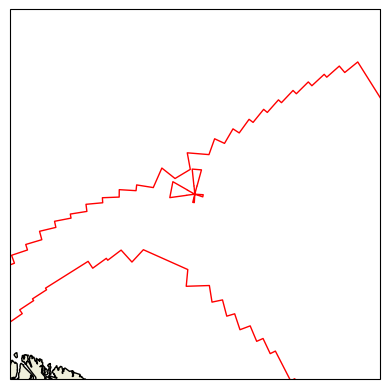

In [152]:
# same as above but zoomed in on the pole
north_pole_plot(AR, 85)

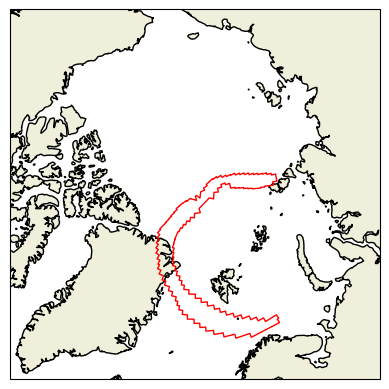

In [135]:
# north pole only
AR = { "_id" : "2000.07.028.018.0_19", "timestamp" : ISODate("2000-07-28T18:00:00Z"), "raster" : [ [ 21.875, 72, [ 254.05516052246094 ] ], [ 22.5, 72, [ 265.0243225097656 ] ], [ 23.125, 72, [ 276.5491638183594 ] ], [ 23.75, 72, [ 288.3659362792969 ] ], [ 24.375, 72, [ 291.9342346191406 ] ], [ 25, 72, [ 289.3663024902344 ] ], [ 25.625, 72, [ 288.4393005371094 ] ], [ 26.25, 72, [ 288.3694152832031 ] ], [ 26.875, 72, [ 290.8580627441406 ] ], [ 27.5, 72, [ 288.45928955078125 ] ], [ 28.125, 72, [ 282.3158264160156 ] ], [ 28.75, 72, [ 276.4962158203125 ] ], [ 29.375, 72, [ 273.9441833496094 ] ], [ 30, 72, [ 274.19586181640625 ] ], [ 30.625, 72, [ 267.71014404296875 ] ], [ 31.25, 72, [ 262.57879638671875 ] ], [ 31.875, 72, [ 260.1515808105469 ] ], [ 32.5, 72, [ 259.9126892089844 ] ], [ 33.125, 72, [ 250.6261749267578 ] ], [ 16.25, 72.5, [ 260.917236328125 ] ], [ 16.875, 72.5, [ 273.1718444824219 ] ], [ 17.5, 72.5, [ 283.3075866699219 ] ], [ 18.125, 72.5, [ 291.94403076171875 ] ], [ 18.75, 72.5, [ 300.9569396972656 ] ], [ 19.375, 72.5, [ 309.26275634765625 ] ], [ 20, 72.5, [ 316.8983154296875 ] ], [ 20.625, 72.5, [ 324.1640930175781 ] ], [ 21.25, 72.5, [ 332.8775634765625 ] ], [ 21.875, 72.5, [ 331.7944641113281 ] ], [ 22.5, 72.5, [ 327.0892333984375 ] ], [ 23.125, 72.5, [ 323.9051513671875 ] ], [ 23.75, 72.5, [ 320.9186096191406 ] ], [ 24.375, 72.5, [ 317.4277038574219 ] ], [ 25, 72.5, [ 310.83843994140625 ] ], [ 25.625, 72.5, [ 301.53424072265625 ] ], [ 26.25, 72.5, [ 292.4931945800781 ] ], [ 26.875, 72.5, [ 283.744873046875 ] ], [ 27.5, 72.5, [ 278.2561340332031 ] ], [ 28.125, 72.5, [ 274.7969665527344 ] ], [ 28.75, 72.5, [ 271.4104309082031 ] ], [ 29.375, 72.5, [ 268.0395202636719 ] ], [ 30, 72.5, [ 265.51568603515625 ] ], [ 30.625, 72.5, [ 264.74859619140625 ] ], [ 31.25, 72.5, [ 263.229248046875 ] ], [ 31.875, 72.5, [ 260.6502685546875 ] ], [ 32.5, 72.5, [ 257.04638671875 ] ], [ 33.125, 72.5, [ 254.9422607421875 ] ], [ 33.75, 72.5, [ 252.49627685546875 ] ], [ 11.875, 73, [ 258.7759094238281 ] ], [ 12.5, 73, [ 274.71514892578125 ] ], [ 13.125, 73, [ 291.6324157714844 ] ], [ 13.75, 73, [ 308.3415832519531 ] ], [ 14.375, 73, [ 323.2071228027344 ] ], [ 15, 73, [ 336.4242858886719 ] ], [ 15.625, 73, [ 348.3216552734375 ] ], [ 16.25, 73, [ 358.9957580566406 ] ], [ 16.875, 73, [ 370.8440246582031 ] ], [ 17.5, 73, [ 383.25372314453125 ] ], [ 18.125, 73, [ 393.5571594238281 ] ], [ 18.75, 73, [ 394.4394836425781 ] ], [ 19.375, 73, [ 391.39752197265625 ] ], [ 20, 73, [ 385.2467346191406 ] ], [ 20.625, 73, [ 379.8183898925781 ] ], [ 21.25, 73, [ 376.0652160644531 ] ], [ 21.875, 73, [ 372.26348876953125 ] ], [ 22.5, 73, [ 358.25506591796875 ] ], [ 23.125, 73, [ 342.50958251953125 ] ], [ 23.75, 73, [ 328.3450927734375 ] ], [ 24.375, 73, [ 315.3971862792969 ] ], [ 25, 73, [ 302.2239685058594 ] ], [ 25.625, 73, [ 289.0864562988281 ] ], [ 26.25, 73, [ 278.8165283203125 ] ], [ 26.875, 73, [ 271.6096496582031 ] ], [ 27.5, 73, [ 264.417236328125 ] ], [ 28.125, 73, [ 257.16644287109375 ] ], [ 28.75, 73, [ 252.12315368652344 ] ], [ 8.125, 73.5, [ 254.6668701171875 ] ], [ 8.75, 73.5, [ 269.6167297363281 ] ], [ 9.375, 73.5, [ 285.8588562011719 ] ], [ 10, 73.5, [ 303.58380126953125 ] ], [ 10.625, 73.5, [ 320.1163024902344 ] ], [ 11.25, 73.5, [ 336.39581298828125 ] ], [ 11.875, 73.5, [ 352.6526184082031 ] ], [ 12.5, 73.5, [ 367.5993957519531 ] ], [ 13.125, 73.5, [ 381.9479675292969 ] ], [ 13.75, 73.5, [ 396.4552001953125 ] ], [ 14.375, 73.5, [ 410.5782470703125 ] ], [ 15, 73.5, [ 417.8029479980469 ] ], [ 15.625, 73.5, [ 418.638427734375 ] ], [ 16.25, 73.5, [ 419.29266357421875 ] ], [ 16.875, 73.5, [ 418.321044921875 ] ], [ 17.5, 73.5, [ 417.4162902832031 ] ], [ 18.125, 73.5, [ 416.5484924316406 ] ], [ 18.75, 73.5, [ 414.67626953125 ] ], [ 19.375, 73.5, [ 405.97418212890625 ] ], [ 20, 73.5, [ 393.6792297363281 ] ], [ 20.625, 73.5, [ 381.2032470703125 ] ], [ 21.25, 73.5, [ 367.4600830078125 ] ], [ 21.875, 73.5, [ 354.9840087890625 ] ], [ 22.5, 73.5, [ 343.78033447265625 ] ], [ 23.125, 73.5, [ 312.8411865234375 ] ], [ 23.75, 73.5, [ 298.0394592285156 ] ], [ 24.375, 73.5, [ 285.82574462890625 ] ], [ 25, 73.5, [ 276.1740417480469 ] ], [ 25.625, 73.5, [ 279.361083984375 ] ], [ 26.25, 73.5, [ 255.21034240722656 ] ], [ 5, 74, [ 250.2361602783203 ] ], [ 5.625, 74, [ 268.14508056640625 ] ], [ 6.25, 74, [ 287.0782775878906 ] ], [ 6.875, 74, [ 306.4405822753906 ] ], [ 7.5, 74, [ 325.2276611328125 ] ], [ 8.125, 74, [ 344.7489013671875 ] ], [ 8.75, 74, [ 364.8306579589844 ] ], [ 9.375, 74, [ 382.585205078125 ] ], [ 10, 74, [ 400.7364196777344 ] ], [ 10.625, 74, [ 411.1357116699219 ] ], [ 11.25, 74, [ 415.4814147949219 ] ], [ 11.875, 74, [ 418.9800720214844 ] ], [ 12.5, 74, [ 422.3359069824219 ] ], [ 13.125, 74, [ 425.12255859375 ] ], [ 13.75, 74, [ 427.0623779296875 ] ], [ 14.375, 74, [ 428.8932189941406 ] ], [ 15, 74, [ 430.583251953125 ] ], [ 15.625, 74, [ 426.91778564453125 ] ], [ 16.25, 74, [ 417.9367980957031 ] ], [ 16.875, 74, [ 408.7459411621094 ] ], [ 17.5, 74, [ 398.7588195800781 ] ], [ 18.125, 74, [ 388.09375 ] ], [ 18.75, 74, [ 377.2747802734375 ] ], [ 19.375, 74, [ 366.33087158203125 ] ], [ 20, 74, [ 335.3379211425781 ] ], [ 20.625, 74, [ 319.5866394042969 ] ], [ 21.25, 74, [ 304.41912841796875 ] ], [ 21.875, 74, [ 290.1366882324219 ] ], [ 22.5, 74, [ 277.4248352050781 ] ], [ 23.125, 74, [ 265.9716491699219 ] ], [ 23.75, 74, [ 255.45269775390625 ] ], [ 2.5, 74.5, [ 261.30950927734375 ] ], [ 3.125, 74.5, [ 280.27801513671875 ] ], [ 3.75, 74.5, [ 299.1224670410156 ] ], [ 4.375, 74.5, [ 317.8748779296875 ] ], [ 5, 74.5, [ 335.9730224609375 ] ], [ 5.625, 74.5, [ 351.9343566894531 ] ], [ 6.25, 74.5, [ 366.49176025390625 ] ], [ 6.875, 74.5, [ 380.2083740234375 ] ], [ 7.5, 74.5, [ 392.0081787109375 ] ], [ 8.125, 74.5, [ 401.3778381347656 ] ], [ 8.75, 74.5, [ 409.85076904296875 ] ], [ 9.375, 74.5, [ 417.3031311035156 ] ], [ 10, 74.5, [ 422.3646545410156 ] ], [ 10.625, 74.5, [ 426.79534912109375 ] ], [ 11.25, 74.5, [ 425.9212951660156 ] ], [ 11.875, 74.5, [ 421.2906188964844 ] ], [ 12.5, 74.5, [ 416.1271667480469 ] ], [ 13.125, 74.5, [ 410.6800842285156 ] ], [ 13.75, 74.5, [ 404.7359924316406 ] ], [ 14.375, 74.5, [ 397.9383239746094 ] ], [ 15, 74.5, [ 390.8641357421875 ] ], [ 15.625, 74.5, [ 383.5338134765625 ] ], [ 16.25, 74.5, [ 356.6175537109375 ] ], [ 16.875, 74.5, [ 342.73712158203125 ] ], [ 17.5, 74.5, [ 328.6707458496094 ] ], [ 18.125, 74.5, [ 314.46112060546875 ] ], [ 18.75, 74.5, [ 299.8338623046875 ] ], [ 19.375, 74.5, [ 285.39324951171875 ] ], [ 20, 74.5, [ 271.2088623046875 ] ], [ 20.625, 74.5, [ 257.4563903808594 ] ], [ -5.920304394294029e-13, 75, [ 265.958251953125 ] ], [ 0.625, 75, [ 283.28076171875 ] ], [ 1.25, 75, [ 301.3388671875 ] ], [ 1.875, 75, [ 319.0777282714844 ] ], [ 2.5, 75, [ 336.6475830078125 ] ], [ 3.125, 75, [ 354.4476623535156 ] ], [ 3.75, 75, [ 371.4499206542969 ] ], [ 4.375, 75, [ 385.8929443359375 ] ], [ 5, 75, [ 397.1269836425781 ] ], [ 5.625, 75, [ 403.5409240722656 ] ], [ 6.25, 75, [ 405.80255126953125 ] ], [ 6.875, 75, [ 406.5498962402344 ] ], [ 7.5, 75, [ 406.3249816894531 ] ], [ 8.125, 75, [ 404.9515075683594 ] ], [ 8.75, 75, [ 402.4222106933594 ] ], [ 9.375, 75, [ 399.13555908203125 ] ], [ 10, 75, [ 395.0599060058594 ] ], [ 10.625, 75, [ 390.7309265136719 ] ], [ 11.25, 75, [ 385.9786376953125 ] ], [ 11.875, 75, [ 363.0033264160156 ] ], [ 12.5, 75, [ 353.9884948730469 ] ], [ 13.125, 75, [ 344.5835266113281 ] ], [ 13.75, 75, [ 334.3798522949219 ] ], [ 14.375, 75, [ 323.3570251464844 ] ], [ 15, 75, [ 311.6965637207031 ] ], [ 15.625, 75, [ 299.5565490722656 ] ], [ 16.25, 75, [ 286.95733642578125 ] ], [ 16.875, 75, [ 273.9486389160156 ] ], [ 17.5, 75, [ 261.1309509277344 ] ], [ -3.125, 75.5, [ 252.91836547851562 ] ], [ -2.5, 75.5, [ 271.6353454589844 ] ], [ -1.875, 75.5, [ 287.24920654296875 ] ], [ -1.25, 75.5, [ 303.0210266113281 ] ], [ -0.625, 75.5, [ 318.8548583984375 ] ], [ -5.920304394294029e-13, 75.5, [ 333.1684265136719 ] ], [ 0.625, 75.5, [ 345.65484619140625 ] ], [ 1.25, 75.5, [ 357.9222717285156 ] ], [ 1.875, 75.5, [ 369.8257751464844 ] ], [ 2.5, 75.5, [ 378.0573425292969 ] ], [ 3.125, 75.5, [ 385.5057678222656 ] ], [ 3.75, 75.5, [ 392.146484375 ] ], [ 4.375, 75.5, [ 396.22662353515625 ] ], [ 5, 75.5, [ 397.559814453125 ] ], [ 5.625, 75.5, [ 397.4202880859375 ] ], [ 6.25, 75.5, [ 392.4991149902344 ] ], [ 6.875, 75.5, [ 385.5299377441406 ] ], [ 7.5, 75.5, [ 378.4736328125 ] ], [ 8.125, 75.5, [ 371.39569091796875 ] ], [ 8.75, 75.5, [ 351.0487365722656 ] ], [ 9.375, 75.5, [ 344.0216064453125 ] ], [ 10, 75.5, [ 336.5793762207031 ] ], [ 10.625, 75.5, [ 328.6796569824219 ] ], [ 11.25, 75.5, [ 319.7830810546875 ] ], [ 11.875, 75.5, [ 309.76385498046875 ] ], [ 12.5, 75.5, [ 298.4669189453125 ] ], [ 13.125, 75.5, [ 285.46063232421875 ] ], [ 13.75, 75.5, [ 273.341064453125 ] ], [ 14.375, 75.5, [ 260.9079284667969 ] ], [ -5.625, 76, [ 257.3924865722656 ] ], [ -5, 76, [ 274.1256103515625 ] ], [ -4.375, 76, [ 290.6965637207031 ] ], [ -3.75, 76, [ 302.8869323730469 ] ], [ -3.125, 76, [ 314.9481201171875 ] ], [ -2.5, 76, [ 326.81146240234375 ] ], [ -1.875, 76, [ 336.829345703125 ] ], [ -1.25, 76, [ 345.0105895996094 ] ], [ -0.625, 76, [ 352.89068603515625 ] ], [ -5.920304394294029e-13, 76, [ 360.3561096191406 ] ], [ 0.625, 76, [ 364.7790832519531 ] ], [ 1.25, 76, [ 368.419189453125 ] ], [ 1.875, 76, [ 371.4205017089844 ] ], [ 2.5, 76, [ 372.73309326171875 ] ], [ 3.125, 76, [ 370.5239562988281 ] ], [ 3.75, 76, [ 367.6746520996094 ] ], [ 4.375, 76, [ 364.2903747558594 ] ], [ 5, 76, [ 359.48602294921875 ] ], [ 5.625, 76, [ 353.4158630371094 ] ], [ 6.25, 76, [ 346.95184326171875 ] ], [ 6.875, 76, [ 327.564453125 ] ], [ 7.5, 76, [ 321.34149169921875 ] ], [ 8.125, 76, [ 314.8207092285156 ] ], [ 8.75, 76, [ 307.77813720703125 ] ], [ 9.375, 76, [ 300.1180114746094 ] ], [ 10, 76, [ 291.02630615234375 ] ], [ 10.625, 76, [ 281.070068359375 ] ], [ 11.25, 76, [ 270.2196044921875 ] ], [ 11.875, 76, [ 258.2388916015625 ] ], [ -7.5, 76.5, [ 254.5955352783203 ] ], [ -6.875, 76.5, [ 269.2088317871094 ] ], [ -6.25, 76.5, [ 282.3888244628906 ] ], [ -5.625, 76.5, [ 293.67730712890625 ] ], [ -5, 76.5, [ 304.6225280761719 ] ], [ -4.375, 76.5, [ 314.3730163574219 ] ], [ -3.75, 76.5, [ 321.4972229003906 ] ], [ -3.125, 76.5, [ 327.5428771972656 ] ], [ -2.5, 76.5, [ 333.3117980957031 ] ], [ -1.875, 76.5, [ 338.75579833984375 ] ], [ -1.25, 76.5, [ 341.94769287109375 ] ], [ -0.625, 76.5, [ 344.7220153808594 ] ], [ -5.920304394294029e-13, 76.5, [ 347.03204345703125 ] ], [ 0.625, 76.5, [ 347.76947021484375 ] ], [ 1.25, 76.5, [ 345.4737243652344 ] ], [ 1.875, 76.5, [ 342.54248046875 ] ], [ 2.5, 76.5, [ 339.1277770996094 ] ], [ 3.125, 76.5, [ 334.28271484375 ] ], [ 3.75, 76.5, [ 328.3356018066406 ] ], [ 4.375, 76.5, [ 322.30499267578125 ] ], [ 5, 76.5, [ 316.0944519042969 ] ], [ 5.625, 76.5, [ 300.3974914550781 ] ], [ 6.25, 76.5, [ 294.8523254394531 ] ], [ 6.875, 76.5, [ 289.2851867675781 ] ], [ 7.5, 76.5, [ 283.0605163574219 ] ], [ 8.125, 76.5, [ 274.0719299316406 ] ], [ 8.75, 76.5, [ 263.88018798828125 ] ], [ 9.375, 76.5, [ 252.64288330078125 ] ], [ -8.75, 77, [ 253.48167419433594 ] ], [ -8.125, 77, [ 262.0550537109375 ] ], [ -7.5, 77, [ 270.6214904785156 ] ], [ -6.875, 77, [ 279.09033203125 ] ], [ -6.25, 77, [ 287.2975158691406 ] ], [ -5.625, 77, [ 294.9561462402344 ] ], [ -5, 77, [ 302.6278381347656 ] ], [ -4.375, 77, [ 310.3212585449219 ] ], [ -3.75, 77, [ 316.5198974609375 ] ], [ -3.125, 77, [ 320.1264343261719 ] ], [ -2.5, 77, [ 323.40899658203125 ] ], [ -1.875, 77, [ 326.27020263671875 ] ], [ -1.25, 77, [ 326.62957763671875 ] ], [ -0.625, 77, [ 324.48760986328125 ] ], [ -5.920304394294029e-13, 77, [ 321.87384033203125 ] ], [ 0.625, 77, [ 318.7210388183594 ] ], [ 1.25, 77, [ 313.6001281738281 ] ], [ 1.875, 77, [ 307.3835144042969 ] ], [ 2.5, 77, [ 301.0841979980469 ] ], [ 3.125, 77, [ 294.6382751464844 ] ], [ 3.75, 77, [ 280.4991760253906 ] ], [ 4.375, 77, [ 274.40771484375 ] ], [ 5, 77, [ 267.9453430175781 ] ], [ 5.625, 77, [ 261.0205078125 ] ], [ 6.25, 77, [ 253.0924072265625 ] ], [ -10, 77.5, [ 256.66351318359375 ] ], [ -9.375, 77.5, [ 266.0854187011719 ] ], [ -8.75, 77.5, [ 275.8481140136719 ] ], [ -8.125, 77.5, [ 281.6965026855469 ] ], [ -7.5, 77.5, [ 287.95953369140625 ] ], [ -6.875, 77.5, [ 294.5818176269531 ] ], [ -6.25, 77.5, [ 301.5539855957031 ] ], [ -5.625, 77.5, [ 306.2563781738281 ] ], [ -5, 77.5, [ 311.1356201171875 ] ], [ -4.375, 77.5, [ 316.17608642578125 ] ], [ -3.75, 77.5, [ 321.337646484375 ] ], [ -3.125, 77.5, [ 319.2232360839844 ] ], [ -2.5, 77.5, [ 316.7844543457031 ] ], [ -1.875, 77.5, [ 314.0972900390625 ] ], [ -1.25, 77.5, [ 310.2306823730469 ] ], [ -0.625, 77.5, [ 302.28350830078125 ] ], [ -5.920304394294029e-13, 77.5, [ 294.2330322265625 ] ], [ 0.625, 77.5, [ 286.2747497558594 ] ], [ 1.25, 77.5, [ 278.3514099121094 ] ], [ 1.875, 77.5, [ 271.1227722167969 ] ], [ 2.5, 77.5, [ 263.4793701171875 ] ], [ 3.125, 77.5, [ 255.18809509277344 ] ], [ -12.5, 78, [ 257.3316345214844 ] ], [ -11.875, 78, [ 268.83306884765625 ] ], [ -11.25, 78, [ 280.1531982421875 ] ], [ -10.625, 78, [ 285.5774230957031 ] ], [ -10, 78, [ 291.6623840332031 ] ], [ -9.375, 78, [ 298.2828369140625 ] ], [ -8.75, 78, [ 305.4769287109375 ] ], [ -8.125, 78, [ 307.57989501953125 ] ], [ -7.5, 78, [ 309.48492431640625 ] ], [ -6.875, 78, [ 311.6852722167969 ] ], [ -6.25, 78, [ 314.156982421875 ] ], [ -5.625, 78, [ 312.66656494140625 ] ], [ -5, 78, [ 309.5920104980469 ] ], [ -4.375, 78, [ 306.30401611328125 ] ], [ -3.75, 78, [ 302.69879150390625 ] ], [ -3.125, 78, [ 296.36773681640625 ] ], [ -2.5, 78, [ 287.8945007324219 ] ], [ -1.875, 78, [ 279.24163818359375 ] ], [ -1.25, 78, [ 270.4273376464844 ] ], [ -0.625, 78, [ 262.10577392578125 ] ], [ -5.920304394294029e-13, 78, [ 254.51409912109375 ] ], [ -15, 78.5, [ 263.10968017578125 ] ], [ -14.375, 78.5, [ 277.5797119140625 ] ], [ -13.75, 78.5, [ 288.34796142578125 ] ], [ -13.125, 78.5, [ 296.27166748046875 ] ], [ -12.5, 78.5, [ 304.8640441894531 ] ], [ -11.875, 78.5, [ 314.1333312988281 ] ], [ -11.25, 78.5, [ 321.92144775390625 ] ], [ -10.625, 78.5, [ 320.7398681640625 ] ], [ -10, 78.5, [ 320.0754699707031 ] ], [ -9.375, 78.5, [ 319.8627014160156 ] ], [ -8.75, 78.5, [ 320.0194091796875 ] ], [ -8.125, 78.5, [ 315.51495361328125 ] ], [ -7.5, 78.5, [ 309.9294738769531 ] ], [ -6.875, 78.5, [ 304.24383544921875 ] ], [ -6.25, 78.5, [ 298.36334228515625 ] ], [ -5.625, 78.5, [ 289.79473876953125 ] ], [ -5, 78.5, [ 278.03143310546875 ] ], [ -4.375, 78.5, [ 265.905029296875 ] ], [ -3.75, 78.5, [ 253.39820861816406 ] ], [ -18.125, 79, [ 257.1459045410156 ] ], [ -17.5, 79, [ 268.0196838378906 ] ], [ -16.875, 79, [ 278.7510986328125 ] ], [ -16.25, 79, [ 290.0090637207031 ] ], [ -15.625, 79, [ 302.0801086425781 ] ], [ -15, 79, [ 314.931640625 ] ], [ -14.375, 79, [ 328.61834716796875 ] ], [ -13.75, 79, [ 331.2925109863281 ] ], [ -13.125, 79, [ 332.4529724121094 ] ], [ -12.5, 79, [ 334.1214904785156 ] ], [ -11.875, 79, [ 336.18853759765625 ] ], [ -11.25, 79, [ 335.68988037109375 ] ], [ -10.625, 79, [ 327.8261413574219 ] ], [ -10, 79, [ 320.0900573730469 ] ], [ -9.375, 79, [ 312.46722412109375 ] ], [ -8.75, 79, [ 304.88922119140625 ] ], [ -8.125, 79, [ 292.39764404296875 ] ], [ -7.5, 79, [ 277.6461181640625 ] ], [ -6.875, 79, [ 262.6252136230469 ] ], [ -20.625, 79.5, [ 259.0936279296875 ] ], [ -20, 79.5, [ 269.9434509277344 ] ], [ -19.375, 79.5, [ 282.41265869140625 ] ], [ -18.75, 79.5, [ 295.3841247558594 ] ], [ -18.125, 79.5, [ 308.96881103515625 ] ], [ -17.5, 79.5, [ 333.21807861328125 ] ], [ -16.875, 79.5, [ 336.4217224121094 ] ], [ -16.25, 79.5, [ 340.1142272949219 ] ], [ -15.625, 79.5, [ 344.4474792480469 ] ], [ -15, 79.5, [ 349.4368591308594 ] ], [ -14.375, 79.5, [ 352.8154602050781 ] ], [ -13.75, 79.5, [ 346.5098876953125 ] ], [ -13.125, 79.5, [ 340.3096008300781 ] ], [ -12.5, 79.5, [ 334.1413269042969 ] ], [ -11.875, 79.5, [ 327.9702453613281 ] ], [ -11.25, 79.5, [ 318.42236328125 ] ], [ -10.625, 79.5, [ 303.7109069824219 ] ], [ -10, 79.5, [ 288.9532775878906 ] ], [ -9.375, 79.5, [ 274.1248474121094 ] ], [ -8.75, 79.5, [ 259.1535949707031 ] ], [ -23.75, 80, [ 271.7315979003906 ] ], [ -23.125, 80, [ 278.7362060546875 ] ], [ -22.5, 80, [ 285.81060791015625 ] ], [ -21.875, 80, [ 292.9442443847656 ] ], [ -21.25, 80, [ 300.1945495605469 ] ], [ -20.625, 80, [ 307.0963134765625 ] ], [ -20, 80, [ 314.7393493652344 ] ], [ -19.375, 80, [ 323.2860412597656 ] ], [ -18.75, 80, [ 345.23681640625 ] ], [ -18.125, 80, [ 355.3199157714844 ] ], [ -17.5, 80, [ 356.9085388183594 ] ], [ -16.875, 80, [ 352.8954772949219 ] ], [ -16.25, 80, [ 349.1990966796875 ] ], [ -15.625, 80, [ 358.86737060546875 ] ], [ -15, 80, [ 355.88665771484375 ] ], [ -14.375, 80, [ 346.7230529785156 ] ], [ -13.75, 80, [ 332.38818359375 ] ], [ -13.125, 80, [ 317.99566650390625 ] ], [ -12.5, 80, [ 303.5313720703125 ] ], [ -11.875, 80, [ 288.90179443359375 ] ], [ -11.25, 80, [ 271.5362243652344 ] ], [ -10.625, 80, [ 251.80130004882812 ] ], [ -26.25, 80.5, [ 262.3276672363281 ] ], [ -25.625, 80.5, [ 288.9559326171875 ] ], [ -25, 80.5, [ 298.9309387207031 ] ], [ -24.375, 80.5, [ 305.79315185546875 ] ], [ -23.75, 80.5, [ 313.0536193847656 ] ], [ -23.125, 80.5, [ 320.67205810546875 ] ], [ -22.5, 80.5, [ 328.6524963378906 ] ], [ -21.875, 80.5, [ 336.9632263183594 ] ], [ -21.25, 80.5, [ 340.5588684082031 ] ], [ -20.625, 80.5, [ 343.7850036621094 ] ], [ -20, 80.5, [ 347.3257141113281 ] ], [ -19.375, 80.5, [ 351.1954040527344 ] ], [ -18.75, 80.5, [ 355.4100646972656 ] ], [ -18.125, 80.5, [ 355.8744812011719 ] ], [ -17.5, 80.5, [ 346.92327880859375 ] ], [ -16.875, 80.5, [ 350.65557861328125 ] ], [ -16.25, 80.5, [ 341.87664794921875 ] ], [ -15.625, 80.5, [ 333.1452331542969 ] ], [ -15, 80.5, [ 337.04791259765625 ] ], [ -14.375, 80.5, [ 314.1012878417969 ] ], [ -13.75, 80.5, [ 290.7279968261719 ] ], [ -13.125, 80.5, [ 267.4064636230469 ] ], [ 99.375, 80.5, [ 250.61795043945312 ] ], [ 100, 80.5, [ 254.33416748046875 ] ], [ 100.625, 80.5, [ 258.15496826171875 ] ], [ 101.25, 80.5, [ 262.1250305175781 ] ], [ 101.875, 80.5, [ 266.1596984863281 ] ], [ 102.5, 80.5, [ 263.243408203125 ] ], [ 103.125, 80.5, [ 256.81903076171875 ] ], [ 103.75, 80.5, [ 250.26556396484375 ] ], [ -27.5, 81, [ 258.7073059082031 ] ], [ -26.875, 81, [ 284.6439514160156 ] ], [ -26.25, 81, [ 295.5 ] ], [ -25.625, 81, [ 302.7732849121094 ] ], [ -25, 81, [ 320.8362121582031 ] ], [ -24.375, 81, [ 325.6683044433594 ] ], [ -23.75, 81, [ 331.1344299316406 ] ], [ -23.125, 81, [ 337.1280517578125 ] ], [ -22.5, 81, [ 343.6021728515625 ] ], [ -21.875, 81, [ 345.3606262207031 ] ], [ -21.25, 81, [ 345.6348571777344 ] ], [ -20.625, 81, [ 346.08685302734375 ] ], [ -20, 81, [ 346.7218017578125 ] ], [ -19.375, 81, [ 347.4167175292969 ] ], [ -18.75, 81, [ 347.42547607421875 ] ], [ -18.125, 81, [ 331.5727844238281 ] ], [ -17.5, 81, [ 316.0634460449219 ] ], [ -16.875, 81, [ 300.7635192871094 ] ], [ -16.25, 81, [ 296.8799743652344 ] ], [ -15.625, 81, [ 281.8891906738281 ] ], [ -15, 81, [ 263.2390441894531 ] ], [ 96.875, 81, [ 250.30364990234375 ] ], [ 97.5, 81, [ 255.91799926757812 ] ], [ 98.125, 81, [ 261.6399841308594 ] ], [ 98.75, 81, [ 266.348876953125 ] ], [ 99.375, 81, [ 271.49310302734375 ] ], [ 100, 81, [ 274.0902404785156 ] ], [ 100.625, 81, [ 274.670166015625 ] ], [ 101.25, 81, [ 275.3039855957031 ] ], [ 101.875, 81, [ 275.97760009765625 ] ], [ 102.5, 81, [ 276.6807861328125 ] ], [ 103.125, 81, [ 277.3828430175781 ] ], [ 103.75, 81, [ 272.0704040527344 ] ], [ 104.375, 81, [ 262.0912780761719 ] ], [ 105, 81, [ 252.1379852294922 ] ], [ -30, 81.5, [ 256.87384033203125 ] ], [ -29.375, 81.5, [ 264.8174743652344 ] ], [ -28.75, 81.5, [ 273.5395202636719 ] ], [ -28.125, 81.5, [ 282.7755432128906 ] ], [ -27.5, 81.5, [ 300.8979187011719 ] ], [ -26.875, 81.5, [ 310.6152648925781 ] ], [ -26.25, 81.5, [ 314.760498046875 ] ], [ -25.625, 81.5, [ 319.03436279296875 ] ], [ -25, 81.5, [ 323.4042663574219 ] ], [ -24.375, 81.5, [ 327.7469177246094 ] ], [ -23.75, 81.5, [ 342.849365234375 ] ], [ -23.125, 81.5, [ 347.6690673828125 ] ], [ -22.5, 81.5, [ 345.1533508300781 ] ], [ -21.875, 81.5, [ 342.3516540527344 ] ], [ -21.25, 81.5, [ 339.6240539550781 ] ], [ -20.625, 81.5, [ 336.9792175292969 ] ], [ -20, 81.5, [ 334.426025390625 ] ], [ -19.375, 81.5, [ 332.0431213378906 ] ], [ -18.75, 81.5, [ 310.1853942871094 ] ], [ -18.125, 81.5, [ 286.25701904296875 ] ], [ -17.5, 81.5, [ 262.3274230957031 ] ], [ 96.875, 81.5, [ 252.70547485351562 ] ], [ 97.5, 81.5, [ 257.52825927734375 ] ], [ 98.125, 81.5, [ 262.41607666015625 ] ], [ 98.75, 81.5, [ 267.91778564453125 ] ], [ 99.375, 81.5, [ 274.0401916503906 ] ], [ 100, 81.5, [ 280.9356384277344 ] ], [ 100.625, 81.5, [ 288.2816162109375 ] ], [ 101.25, 81.5, [ 289.8538818359375 ] ], [ 101.875, 81.5, [ 287.8687438964844 ] ], [ 102.5, 81.5, [ 285.76141357421875 ] ], [ 103.125, 81.5, [ 283.5173645019531 ] ], [ 103.75, 81.5, [ 281.092041015625 ] ], [ 104.375, 81.5, [ 278.4822998046875 ] ], [ 105, 81.5, [ 274.1038513183594 ] ], [ 105.625, 81.5, [ 262.333740234375 ] ], [ 106.25, 81.5, [ 250.7523651123047 ] ], [ -33.125, 82, [ 255.86183166503906 ] ], [ -32.5, 82, [ 275.7777099609375 ] ], [ -31.875, 82, [ 284.36151123046875 ] ], [ -31.25, 82, [ 293.2986145019531 ] ], [ -30.625, 82, [ 301.12017822265625 ] ], [ -30, 82, [ 309.0315246582031 ] ], [ -29.375, 82, [ 316.9870910644531 ] ], [ -28.75, 82, [ 324.9761047363281 ] ], [ -28.125, 82, [ 333.0387878417969 ] ], [ -27.5, 82, [ 334.0750427246094 ] ], [ -26.875, 82, [ 346.5318908691406 ] ], [ -26.25, 82, [ 347.3282775878906 ] ], [ -25.625, 82, [ 348.5816955566406 ] ], [ -25, 82, [ 350.1341552734375 ] ], [ -24.375, 82, [ 352.052978515625 ] ], [ -23.75, 82, [ 350.9050598144531 ] ], [ -23.125, 82, [ 342.4262390136719 ] ], [ -22.5, 82, [ 334.31036376953125 ] ], [ -21.875, 82, [ 338.1044921875 ] ], [ -21.25, 82, [ 330.82305908203125 ] ], [ -20.625, 82, [ 323.88189697265625 ] ], [ -20, 82, [ 317.1819763183594 ] ], [ -19.375, 82, [ 293.4248352050781 ] ], [ -18.75, 82, [ 266.4344787597656 ] ], [ 96.25, 82, [ 251.84214782714844 ] ], [ 96.875, 82, [ 259.6451110839844 ] ], [ 97.5, 82, [ 267.4717102050781 ] ], [ 98.125, 82, [ 274.8703308105469 ] ], [ 98.75, 82, [ 279.2566223144531 ] ], [ 99.375, 82, [ 283.88232421875 ] ], [ 100, 82, [ 288.74310302734375 ] ], [ 100.625, 82, [ 293.8697204589844 ] ], [ 101.25, 82, [ 299.2054138183594 ] ], [ 101.875, 82, [ 303.3684387207031 ] ], [ 102.5, 82, [ 303.3976135253906 ] ], [ 103.125, 82, [ 297.3928527832031 ] ], [ 103.75, 82, [ 291.5249938964844 ] ], [ 104.375, 82, [ 285.8279724121094 ] ], [ 105, 82, [ 280.2305603027344 ] ], [ 105.625, 82, [ 274.7622985839844 ] ], [ 106.25, 82, [ 269.364990234375 ] ], [ 106.875, 82, [ 260.87890625 ] ], [ -35.625, 82.5, [ 252.7164306640625 ] ], [ -35, 82.5, [ 261.1761779785156 ] ], [ -34.375, 82.5, [ 269.6365966796875 ] ], [ -33.75, 82.5, [ 277.85284423828125 ] ], [ -33.125, 82.5, [ 284.28997802734375 ] ], [ -32.5, 82.5, [ 290.7288818359375 ] ], [ -31.875, 82.5, [ 297.53857421875 ] ], [ -31.25, 82.5, [ 304.8526916503906 ] ], [ -30.625, 82.5, [ 312.7040100097656 ] ], [ -30, 82.5, [ 321.2642517089844 ] ], [ -29.375, 82.5, [ 330.55828857421875 ] ], [ -28.75, 82.5, [ 331.2071838378906 ] ], [ -28.125, 82.5, [ 347.4837951660156 ] ], [ -27.5, 82.5, [ 347.7510681152344 ] ], [ -26.875, 82.5, [ 348.2494201660156 ] ], [ -26.25, 82.5, [ 348.9673156738281 ] ], [ -25.625, 82.5, [ 349.9099426269531 ] ], [ -25, 82.5, [ 365.3797912597656 ] ], [ -24.375, 82.5, [ 354.5693664550781 ] ], [ -23.75, 82.5, [ 341.5845947265625 ] ], [ -23.125, 82.5, [ 328.6631164550781 ] ], [ -22.5, 82.5, [ 315.7228088378906 ] ], [ -21.875, 82.5, [ 315.35906982421875 ] ], [ -21.25, 82.5, [ 302.339599609375 ] ], [ -20.625, 82.5, [ 289.20013427734375 ] ], [ -20, 82.5, [ 266.5723876953125 ] ], [ 95.625, 82.5, [ 254.4577178955078 ] ], [ 96.25, 82.5, [ 259.7890930175781 ] ], [ 96.875, 82.5, [ 265.1026916503906 ] ], [ 97.5, 82.5, [ 270.3780822753906 ] ], [ 98.125, 82.5, [ 275.6572570800781 ] ], [ 98.75, 82.5, [ 280.8773498535156 ] ], [ 99.375, 82.5, [ 285.6711120605469 ] ], [ 100, 82.5, [ 286.9891052246094 ] ], [ 100.625, 82.5, [ 288.483642578125 ] ], [ 101.25, 82.5, [ 290.1156005859375 ] ], [ 101.875, 82.5, [ 291.9684143066406 ] ], [ 102.5, 82.5, [ 293.94549560546875 ] ], [ 103.125, 82.5, [ 296.0921325683594 ] ], [ 103.75, 82.5, [ 298.2234802246094 ] ], [ 104.375, 82.5, [ 293.0762023925781 ] ], [ 105, 82.5, [ 286.82086181640625 ] ], [ 105.625, 82.5, [ 280.6376953125 ] ], [ 106.25, 82.5, [ 274.6353759765625 ] ], [ 106.875, 82.5, [ 268.748046875 ] ], [ 107.5, 82.5, [ 262.9759521484375 ] ], [ 108.125, 82.5, [ 257.3330383300781 ] ], [ -38.125, 83, [ 250.79415893554688 ] ], [ -37.5, 83, [ 257.92034912109375 ] ], [ -36.875, 83, [ 265.62164306640625 ] ], [ -36.25, 83, [ 269.34014892578125 ] ], [ -35.625, 83, [ 277.68505859375 ] ], [ -35, 83, [ 283.90289306640625 ] ], [ -34.375, 83, [ 289.4680480957031 ] ], [ -33.75, 83, [ 295.0302429199219 ] ], [ -33.125, 83, [ 300.7569580078125 ] ], [ -32.5, 83, [ 306.7222900390625 ] ], [ -31.875, 83, [ 312.9139404296875 ] ], [ -31.25, 83, [ 319.2715759277344 ] ], [ -30.625, 83, [ 324.438720703125 ] ], [ -30, 83, [ 325.040771484375 ] ], [ -29.375, 83, [ 325.8327331542969 ] ], [ -28.75, 83, [ 337.2635803222656 ] ], [ -28.125, 83, [ 338.8471374511719 ] ], [ -27.5, 83, [ 340.47821044921875 ] ], [ -26.875, 83, [ 342.1260986328125 ] ], [ -26.25, 83, [ 343.76910400390625 ] ], [ -25.625, 83, [ 346.31500244140625 ] ], [ -25, 83, [ 332.7665100097656 ] ], [ -24.375, 83, [ 319.20355224609375 ] ], [ -23.75, 83, [ 305.5738830566406 ] ], [ -23.125, 83, [ 291.8833923339844 ] ], [ -22.5, 83, [ 288.7079772949219 ] ], [ -21.875, 83, [ 274.935546875 ] ], [ -21.25, 83, [ 259.9570007324219 ] ], [ 95.625, 83, [ 256.7237854003906 ] ], [ 96.25, 83, [ 264.7023010253906 ] ], [ 96.875, 83, [ 268.15362548828125 ] ], [ 97.5, 83, [ 271.67333984375 ] ], [ 98.125, 83, [ 275.2740173339844 ] ], [ 98.75, 83, [ 278.97052001953125 ] ], [ 99.375, 83, [ 282.7773132324219 ] ], [ 100, 83, [ 286.72296142578125 ] ], [ 100.625, 83, [ 290.75897216796875 ] ], [ 101.25, 83, [ 291.2220458984375 ] ], [ 101.875, 83, [ 290.6962585449219 ] ], [ 102.5, 83, [ 290.3074035644531 ] ], [ 103.125, 83, [ 290.0258483886719 ] ], [ 103.75, 83, [ 289.846923828125 ] ], [ 104.375, 83, [ 289.7886047363281 ] ], [ 105, 83, [ 289.6762390136719 ] ], [ 105.625, 83, [ 289.5915832519531 ] ], [ 106.25, 83, [ 283.83868408203125 ] ], [ 106.875, 83, [ 277.6075744628906 ] ], [ 107.5, 83, [ 271.5520935058594 ] ], [ 108.125, 83, [ 265.6697998046875 ] ], [ 108.75, 83, [ 259.9700927734375 ] ], [ 109.375, 83, [ 254.45913696289062 ] ], [ -40.625, 83.5, [ 250.52223205566406 ] ], [ -40, 83.5, [ 254.0638427734375 ] ], [ -39.375, 83.5, [ 257.7041320800781 ] ], [ -38.75, 83.5, [ 261.4039306640625 ] ], [ -38.125, 83.5, [ 265.330322265625 ] ], [ -37.5, 83.5, [ 270.9312744140625 ] ], [ -36.875, 83.5, [ 277.2336730957031 ] ], [ -36.25, 83.5, [ 284.0650634765625 ] ], [ -35.625, 83.5, [ 291.02020263671875 ] ], [ -35, 83.5, [ 297.9587707519531 ] ], [ -34.375, 83.5, [ 304.9337158203125 ] ], [ -33.75, 83.5, [ 311.86065673828125 ] ], [ -33.125, 83.5, [ 314.1313171386719 ] ], [ -32.5, 83.5, [ 320.9740295410156 ] ], [ -31.875, 83.5, [ 328.0666809082031 ] ], [ -31.25, 83.5, [ 330.0849304199219 ] ], [ -30.625, 83.5, [ 332.1031799316406 ] ], [ -30, 83.5, [ 334.08526611328125 ] ], [ -29.375, 83.5, [ 335.9586181640625 ] ], [ -28.75, 83.5, [ 337.734375 ] ], [ -28.125, 83.5, [ 339.4479675292969 ] ], [ -27.5, 83.5, [ 341.04315185546875 ] ], [ -26.875, 83.5, [ 340.5728759765625 ] ], [ -26.25, 83.5, [ 327.3782043457031 ] ], [ -25.625, 83.5, [ 314.1535339355469 ] ], [ -25, 83.5, [ 300.8673400878906 ] ], [ -24.375, 83.5, [ 287.5901184082031 ] ], [ -23.75, 83.5, [ 274.2812805175781 ] ], [ -23.125, 83.5, [ 260.92987060546875 ] ], [ 96.25, 83.5, [ 258.04071044921875 ] ], [ 96.875, 83.5, [ 267.2246398925781 ] ], [ 97.5, 83.5, [ 273.7586669921875 ] ], [ 98.125, 83.5, [ 275.35699462890625 ] ], [ 98.75, 83.5, [ 277.0403137207031 ] ], [ 99.375, 83.5, [ 278.8050842285156 ] ], [ 100, 83.5, [ 280.6663513183594 ] ], [ 100.625, 83.5, [ 282.6485595703125 ] ], [ 101.25, 83.5, [ 284.72869873046875 ] ], [ 101.875, 83.5, [ 286.88348388671875 ] ], [ 102.5, 83.5, [ 288.9022521972656 ] ], [ 103.125, 83.5, [ 286.84423828125 ] ], [ 103.75, 83.5, [ 285.0480041503906 ] ], [ 104.375, 83.5, [ 283.4825744628906 ] ], [ 105, 83.5, [ 282.19036865234375 ] ], [ 105.625, 83.5, [ 281.05865478515625 ] ], [ 106.25, 83.5, [ 280.2087707519531 ] ], [ 106.875, 83.5, [ 279.6169738769531 ] ], [ 107.5, 83.5, [ 279.45953369140625 ] ], [ 108.125, 83.5, [ 276.99432373046875 ] ], [ 108.75, 83.5, [ 271.52008056640625 ] ], [ 109.375, 83.5, [ 266.1346435546875 ] ], [ 110, 83.5, [ 260.80035400390625 ] ], [ 110.625, 83.5, [ 255.55401611328125 ] ], [ 111.25, 83.5, [ 250.38087463378906 ] ], [ -43.75, 84, [ 251.66111755371094 ] ], [ -43.125, 84, [ 255.15374755859375 ] ], [ -42.5, 84, [ 258.71337890625 ] ], [ -41.875, 84, [ 262.3812561035156 ] ], [ -41.25, 84, [ 266.09686279296875 ] ], [ -40.625, 84, [ 269.9244384765625 ] ], [ -40, 84, [ 274.9964904785156 ] ], [ -39.375, 84, [ 280.83154296875 ] ], [ -38.75, 84, [ 286.5965270996094 ] ], [ -38.125, 84, [ 292.0818176269531 ] ], [ -37.5, 84, [ 297.667724609375 ] ], [ -36.875, 84, [ 303.4146728515625 ] ], [ -36.25, 84, [ 309.2538146972656 ] ], [ -35.625, 84, [ 315.1872863769531 ] ], [ -35, 84, [ 321.1822509765625 ] ], [ -34.375, 84, [ 326.6963806152344 ] ], [ -33.75, 84, [ 328.9488525390625 ] ], [ -33.125, 84, [ 331.2623596191406 ] ], [ -32.5, 84, [ 333.64166259765625 ] ], [ -31.875, 84, [ 336.009765625 ] ], [ -31.25, 84, [ 338.45648193359375 ] ], [ -30.625, 84, [ 340.9646911621094 ] ], [ -30, 84, [ 343.5295104980469 ] ], [ -29.375, 84, [ 346.1558532714844 ] ], [ -28.75, 84, [ 347.8775329589844 ] ], [ -28.125, 84, [ 335.58160400390625 ] ], [ -27.5, 84, [ 323.30645751953125 ] ], [ -26.875, 84, [ 311.0394592285156 ] ], [ -26.25, 84, [ 298.8073425292969 ] ], [ -25.625, 84, [ 286.5960998535156 ] ], [ -25, 84, [ 274.4248962402344 ] ], [ -24.375, 84, [ 262.37353515625 ] ], [ -23.75, 84, [ 250.7865753173828 ] ], [ 96.875, 84, [ 253.48609924316406 ] ], [ 97.5, 84, [ 260.92578125 ] ], [ 98.125, 84, [ 268.3040466308594 ] ], [ 98.75, 84, [ 275.6040954589844 ] ], [ 99.375, 84, [ 276.2930908203125 ] ], [ 100, 84, [ 276.6927795410156 ] ], [ 100.625, 84, [ 277.227294921875 ] ], [ 101.25, 84, [ 277.94146728515625 ] ], [ 101.875, 84, [ 278.87664794921875 ] ], [ 102.5, 84, [ 279.9320068359375 ] ], [ 103.125, 84, [ 281.1865539550781 ] ], [ 103.75, 84, [ 282.6646423339844 ] ], [ 104.375, 84, [ 284.27117919921875 ] ], [ 105, 84, [ 283.0440673828125 ] ], [ 105.625, 84, [ 281.4252014160156 ] ], [ 106.25, 84, [ 280.06634521484375 ] ], [ 106.875, 84, [ 278.8873596191406 ] ], [ 107.5, 84, [ 277.8948059082031 ] ], [ 108.125, 84, [ 277.0365905761719 ] ], [ 108.75, 84, [ 276.37469482421875 ] ], [ 109.375, 84, [ 275.62738037109375 ] ], [ 110, 84, [ 274.9621276855469 ] ], [ 110.625, 84, [ 272.7333679199219 ] ], [ 111.25, 84, [ 267.11114501953125 ] ], [ 111.875, 84, [ 261.5802917480469 ] ], [ 112.5, 84, [ 256.1407775878906 ] ], [ 113.125, 84, [ 250.79241943359375 ] ], [ -45, 84.5, [ 252.0178985595703 ] ], [ -44.375, 84.5, [ 255.87388610839844 ] ], [ -43.75, 84.5, [ 259.8436279296875 ] ], [ -43.125, 84.5, [ 264.9600830078125 ] ], [ -42.5, 84.5, [ 270.7498474121094 ] ], [ -41.875, 84.5, [ 276.690185546875 ] ], [ -41.25, 84.5, [ 282.76055908203125 ] ], [ -40.625, 84.5, [ 287.880126953125 ] ], [ -40, 84.5, [ 293.18072509765625 ] ], [ -39.375, 84.5, [ 298.5550231933594 ] ], [ -38.75, 84.5, [ 304.0123291015625 ] ], [ -38.125, 84.5, [ 309.6072998046875 ] ], [ -37.5, 84.5, [ 315.3221435546875 ] ], [ -36.875, 84.5, [ 321.10101318359375 ] ], [ -36.25, 84.5, [ 325.02459716796875 ] ], [ -35.625, 84.5, [ 328.9520263671875 ] ], [ -35, 84.5, [ 332.79388427734375 ] ], [ -34.375, 84.5, [ 336.6159362792969 ] ], [ -33.75, 84.5, [ 340.44171142578125 ] ], [ -33.125, 84.5, [ 344.1902770996094 ] ], [ -32.5, 84.5, [ 347.97503662109375 ] ], [ -31.875, 84.5, [ 351.7446594238281 ] ], [ -31.25, 84.5, [ 355.4515380859375 ] ], [ -30.625, 84.5, [ 359.2004699707031 ] ], [ -30, 84.5, [ 350.3085021972656 ] ], [ -29.375, 84.5, [ 340.4106750488281 ] ], [ -28.75, 84.5, [ 330.4276428222656 ] ], [ -28.125, 84.5, [ 320.3305969238281 ] ], [ -27.5, 84.5, [ 310.1162414550781 ] ], [ -26.875, 84.5, [ 300.0104064941406 ] ], [ -26.25, 84.5, [ 290.15625 ] ], [ -25.625, 84.5, [ 280.37603759765625 ] ], [ -25, 84.5, [ 270.644287109375 ] ], [ -24.375, 84.5, [ 259.4421081542969 ] ], [ 98.125, 84.5, [ 255.73785400390625 ] ], [ 98.75, 84.5, [ 261.6336975097656 ] ], [ 99.375, 84.5, [ 267.4226379394531 ] ], [ 100, 84.5, [ 273.09161376953125 ] ], [ 100.625, 84.5, [ 278.22760009765625 ] ], [ 101.25, 84.5, [ 277.38134765625 ] ], [ 101.875, 84.5, [ 276.76153564453125 ] ], [ 102.5, 84.5, [ 276.3185729980469 ] ], [ 103.125, 84.5, [ 276.04443359375 ] ], [ 103.75, 84.5, [ 275.98089599609375 ] ], [ 104.375, 84.5, [ 276.0843811035156 ] ], [ 105, 84.5, [ 276.3414306640625 ] ], [ 105.625, 84.5, [ 276.8096008300781 ] ], [ 106.25, 84.5, [ 277.4246826171875 ] ], [ 106.875, 84.5, [ 278.19158935546875 ] ], [ 107.5, 84.5, [ 276.46197509765625 ] ], [ 108.125, 84.5, [ 274.881103515625 ] ], [ 108.75, 84.5, [ 273.4423522949219 ] ], [ 109.375, 84.5, [ 272.1433410644531 ] ], [ 110, 84.5, [ 271.0062561035156 ] ], [ 110.625, 84.5, [ 270.00714111328125 ] ], [ 111.25, 84.5, [ 269.093505859375 ] ], [ 111.875, 84.5, [ 268.2275390625 ] ], [ 112.5, 84.5, [ 267.43310546875 ] ], [ 113.125, 84.5, [ 266.5986328125 ] ], [ 113.75, 84.5, [ 264.38018798828125 ] ], [ 114.375, 84.5, [ 259.15789794921875 ] ], [ 115, 84.5, [ 254.02713012695312 ] ], [ -45, 85, [ 254.15426635742188 ] ], [ -44.375, 85, [ 258.6387634277344 ] ], [ -43.75, 85, [ 263.30731201171875 ] ], [ -43.125, 85, [ 268.2457580566406 ] ], [ -42.5, 85, [ 273.29052734375 ] ], [ -41.875, 85, [ 278.4484558105469 ] ], [ -41.25, 85, [ 283.74658203125 ] ], [ -40.625, 85, [ 289.16583251953125 ] ], [ -40, 85, [ 294.7035217285156 ] ], [ -39.375, 85, [ 301.11590576171875 ] ], [ -38.75, 85, [ 307.74188232421875 ] ], [ -38.125, 85, [ 314.1943359375 ] ], [ -37.5, 85, [ 320.5549011230469 ] ], [ -36.875, 85, [ 326.8080749511719 ] ], [ -36.25, 85, [ 332.95025634765625 ] ], [ -35.625, 85, [ 338.9525451660156 ] ], [ -35, 85, [ 344.8685302734375 ] ], [ -34.375, 85, [ 350.6698303222656 ] ], [ -33.75, 85, [ 356.41595458984375 ] ], [ -33.125, 85, [ 362.0418701171875 ] ], [ -32.5, 85, [ 363.35797119140625 ] ], [ -31.875, 85, [ 358.6378173828125 ] ], [ -31.25, 85, [ 353.6330871582031 ] ], [ -30.625, 85, [ 348.3110046386719 ] ], [ -30, 85, [ 342.7700500488281 ] ], [ -29.375, 85, [ 336.802978515625 ] ], [ -28.75, 85, [ 330.7301330566406 ] ], [ -28.125, 85, [ 324.5509033203125 ] ], [ -27.5, 85, [ 318.3006286621094 ] ], [ -26.875, 85, [ 311.9530029296875 ] ], [ -26.25, 85, [ 305.6043395996094 ] ], [ -25.625, 85, [ 293.2190856933594 ] ], [ -25, 85, [ 278.0804138183594 ] ], [ -24.375, 85, [ 263.05157470703125 ] ], [ 98.75, 85, [ 251.1637420654297 ] ], [ 99.375, 85, [ 254.9425811767578 ] ], [ 100, 85, [ 258.5796813964844 ] ], [ 100.625, 85, [ 262.0352783203125 ] ], [ 101.25, 85, [ 265.3781433105469 ] ], [ 101.875, 85, [ 268.6455383300781 ] ], [ 102.5, 85, [ 271.8215026855469 ] ], [ 103.125, 85, [ 272.4668884277344 ] ], [ 103.75, 85, [ 271.40570068359375 ] ], [ 104.375, 85, [ 270.6275939941406 ] ], [ 105, 85, [ 270.0270080566406 ] ], [ 105.625, 85, [ 269.7174377441406 ] ], [ 106.25, 85, [ 269.6058349609375 ] ], [ 106.875, 85, [ 269.73095703125 ] ], [ 107.5, 85, [ 270.08203125 ] ], [ 108.125, 85, [ 270.6623229980469 ] ], [ 108.75, 85, [ 271.47528076171875 ] ], [ 109.375, 85, [ 272.51702880859375 ] ], [ 110, 85, [ 273.03985595703125 ] ], [ 110.625, 85, [ 271.5640563964844 ] ], [ 111.25, 85, [ 270.10748291015625 ] ], [ 111.875, 85, [ 268.719482421875 ] ], [ 112.5, 85, [ 267.3799133300781 ] ], [ 113.125, 85, [ 266.0429992675781 ] ], [ 113.75, 85, [ 264.72113037109375 ] ], [ 114.375, 85, [ 263.08282470703125 ] ], [ 115, 85, [ 261.3115539550781 ] ], [ 115.625, 85, [ 259.5284423828125 ] ], [ 116.25, 85, [ 257.7704772949219 ] ], [ 116.875, 85, [ 255.9951171875 ] ], [ 117.5, 85, [ 254.0321807861328 ] ], [ -45.625, 85.5, [ 251.8407745361328 ] ], [ -45, 85.5, [ 255.45057678222656 ] ], [ -44.375, 85.5, [ 259.2054138183594 ] ], [ -43.75, 85.5, [ 263.05194091796875 ] ], [ -43.125, 85.5, [ 268.8176574707031 ] ], [ -42.5, 85.5, [ 275.3277893066406 ] ], [ -41.875, 85.5, [ 281.9566650390625 ] ], [ -41.25, 85.5, [ 288.630615234375 ] ], [ -40.625, 85.5, [ 295.44305419921875 ] ], [ -40, 85.5, [ 302.3233337402344 ] ], [ -39.375, 85.5, [ 309.29547119140625 ] ], [ -38.75, 85.5, [ 316.35888671875 ] ], [ -38.125, 85.5, [ 323.54449462890625 ] ], [ -37.5, 85.5, [ 330.8058776855469 ] ], [ -36.875, 85.5, [ 338.13702392578125 ] ], [ -36.25, 85.5, [ 345.5968933105469 ] ], [ -35.625, 85.5, [ 353.1394958496094 ] ], [ -35, 85.5, [ 356.2667236328125 ] ], [ -34.375, 85.5, [ 357.81219482421875 ] ], [ -33.75, 85.5, [ 359.1191101074219 ] ], [ -33.125, 85.5, [ 360.2156982421875 ] ], [ -32.5, 85.5, [ 360.7098693847656 ] ], [ -31.875, 85.5, [ 360.27789306640625 ] ], [ -31.25, 85.5, [ 359.53228759765625 ] ], [ -30.625, 85.5, [ 358.6053161621094 ] ], [ -30, 85.5, [ 357.4464416503906 ] ], [ -29.375, 85.5, [ 356.0782775878906 ] ], [ -28.75, 85.5, [ 354.5252685546875 ] ], [ -28.125, 85.5, [ 352.7512512207031 ] ], [ -27.5, 85.5, [ 344.16156005859375 ] ], [ -26.875, 85.5, [ 331.5523376464844 ] ], [ -26.25, 85.5, [ 319.0088806152344 ] ], [ -25.625, 85.5, [ 306.46063232421875 ] ], [ -25, 85.5, [ 293.9380798339844 ] ], [ -24.375, 85.5, [ 281.42376708984375 ] ], [ -23.75, 85.5, [ 268.9093933105469 ] ], [ -23.125, 85.5, [ 256.41607666015625 ] ], [ 100, 85.5, [ 251.50296020507812 ] ], [ 100.625, 85.5, [ 253.09420776367188 ] ], [ 101.25, 85.5, [ 254.63380432128906 ] ], [ 101.875, 85.5, [ 256.11651611328125 ] ], [ 102.5, 85.5, [ 257.60345458984375 ] ], [ 103.125, 85.5, [ 258.82659912109375 ] ], [ 103.75, 85.5, [ 259.93585205078125 ] ], [ 104.375, 85.5, [ 261.08782958984375 ] ], [ 105, 85.5, [ 262.20953369140625 ] ], [ 105.625, 85.5, [ 262.9239807128906 ] ], [ 106.25, 85.5, [ 262.3329162597656 ] ], [ 106.875, 85.5, [ 261.95489501953125 ] ], [ 107.5, 85.5, [ 261.69677734375 ] ], [ 108.125, 85.5, [ 261.6817932128906 ] ], [ 108.75, 85.5, [ 261.7643737792969 ] ], [ 109.375, 85.5, [ 262.010009765625 ] ], [ 110, 85.5, [ 262.4156799316406 ] ], [ 110.625, 85.5, [ 262.9510192871094 ] ], [ 111.25, 85.5, [ 263.63848876953125 ] ], [ 111.875, 85.5, [ 264.4466247558594 ] ], [ 112.5, 85.5, [ 265.3486022949219 ] ], [ 113.125, 85.5, [ 266.38092041015625 ] ], [ 113.75, 85.5, [ 266.660400390625 ] ], [ 114.375, 85.5, [ 264.6199035644531 ] ], [ 115, 85.5, [ 262.5754089355469 ] ], [ 115.625, 85.5, [ 260.554931640625 ] ], [ 116.25, 85.5, [ 258.5425109863281 ] ], [ 116.875, 85.5, [ 256.53814697265625 ] ], [ 117.5, 85.5, [ 254.55654907226562 ] ], [ 118.125, 85.5, [ 252.6872100830078 ] ], [ 118.75, 85.5, [ 250.89993286132812 ] ], [ -46.25, 86, [ 250.59568786621094 ] ], [ -45.625, 86, [ 256.072509765625 ] ], [ -45, 86, [ 261.6552429199219 ] ], [ -44.375, 86, [ 267.3793029785156 ] ], [ -43.75, 86, [ 273.1956481933594 ] ], [ -43.125, 86, [ 279.15093994140625 ] ], [ -42.5, 86, [ 285.2203674316406 ] ], [ -41.875, 86, [ 291.41064453125 ] ], [ -41.25, 86, [ 297.7425231933594 ] ], [ -40.625, 86, [ 304.1759948730469 ] ], [ -40, 86, [ 310.7771301269531 ] ], [ -39.375, 86, [ 317.459716796875 ] ], [ -38.75, 86, [ 323.70782470703125 ] ], [ -38.125, 86, [ 328.83636474609375 ] ], [ -37.5, 86, [ 333.8467712402344 ] ], [ -36.875, 86, [ 338.7334289550781 ] ], [ -36.25, 86, [ 343.5408020019531 ] ], [ -35.625, 86, [ 347.9852600097656 ] ], [ -35, 86, [ 351.9405822753906 ] ], [ -34.375, 86, [ 355.7442932128906 ] ], [ -33.75, 86, [ 359.40191650390625 ] ], [ -33.125, 86, [ 362.93267822265625 ] ], [ -32.5, 86, [ 366.3259582519531 ] ], [ -31.875, 86, [ 369.57415771484375 ] ], [ -31.25, 86, [ 372.6694030761719 ] ], [ -30.625, 86, [ 375.64129638671875 ] ], [ -30, 86, [ 375.35186767578125 ] ], [ -29.375, 86, [ 369.3699951171875 ] ], [ -28.75, 86, [ 363.1859130859375 ] ], [ -28.125, 86, [ 356.739501953125 ] ], [ -27.5, 86, [ 350.08843994140625 ] ], [ -26.875, 86, [ 343.2347717285156 ] ], [ -26.25, 86, [ 336.1924133300781 ] ], [ -25.625, 86, [ 329.0466613769531 ] ], [ -25, 86, [ 321.6642150878906 ] ], [ -24.375, 86, [ 314.18115234375 ] ], [ -23.75, 86, [ 306.5863342285156 ] ], [ -23.125, 86, [ 298.84930419921875 ] ], [ -22.5, 86, [ 291.0289001464844 ] ], [ -21.875, 86, [ 282.53167724609375 ] ], [ -21.25, 86, [ 270.7879638671875 ] ], [ -20.625, 86, [ 259.26861572265625 ] ], [ 107.5, 86, [ 250.38217163085938 ] ], [ 108.125, 86, [ 251.3103790283203 ] ], [ 108.75, 86, [ 252.36764526367188 ] ], [ 109.375, 86, [ 252.9670867919922 ] ], [ 110, 86, [ 253.30264282226562 ] ], [ 110.625, 86, [ 253.6615753173828 ] ], [ 111.25, 86, [ 254.05908203125 ] ], [ 111.875, 86, [ 254.44070434570312 ] ], [ 112.5, 86, [ 254.86790466308594 ] ], [ 113.125, 86, [ 255.2341766357422 ] ], [ 113.75, 86, [ 255.63546752929688 ] ], [ 114.375, 86, [ 256.02099609375 ] ], [ 115, 86, [ 256.367919921875 ] ], [ 115.625, 86, [ 256.69659423828125 ] ], [ 116.25, 86, [ 256.97259521484375 ] ], [ 116.875, 86, [ 257.2442626953125 ] ], [ 117.5, 86, [ 257.4599609375 ] ], [ 118.125, 86, [ 257.62347412109375 ] ], [ 118.75, 86, [ 257.0301208496094 ] ], [ 119.375, 86, [ 255.3530731201172 ] ], [ 120, 86, [ 253.78021240234375 ] ], [ 120.625, 86, [ 252.24754333496094 ] ], [ 121.25, 86, [ 250.78738403320312 ] ], [ -47.5, 86.5, [ 251.92117309570312 ] ], [ -46.875, 86.5, [ 256.0023193359375 ] ], [ -46.25, 86.5, [ 260.22509765625 ] ], [ -45.625, 86.5, [ 264.6214294433594 ] ], [ -45, 86.5, [ 269.1244812011719 ] ], [ -44.375, 86.5, [ 273.8064270019531 ] ], [ -43.75, 86.5, [ 278.63970947265625 ] ], [ -43.125, 86.5, [ 284.3091125488281 ] ], [ -42.5, 86.5, [ 290.2563781738281 ] ], [ -41.875, 86.5, [ 296.2615661621094 ] ], [ -41.25, 86.5, [ 302.3720703125 ] ], [ -40.625, 86.5, [ 308.5730895996094 ] ], [ -40, 86.5, [ 314.8470458984375 ] ], [ -39.375, 86.5, [ 321.09991455078125 ] ], [ -38.75, 86.5, [ 326.9566650390625 ] ], [ -38.125, 86.5, [ 332.7679138183594 ] ], [ -37.5, 86.5, [ 338.56640625 ] ], [ -36.875, 86.5, [ 344.27850341796875 ] ], [ -36.25, 86.5, [ 350.02178955078125 ] ], [ -35.625, 86.5, [ 355.6584167480469 ] ], [ -35, 86.5, [ 361.3076477050781 ] ], [ -34.375, 86.5, [ 366.8807678222656 ] ], [ -33.75, 86.5, [ 372.421142578125 ] ], [ -33.125, 86.5, [ 376.3816833496094 ] ], [ -32.5, 86.5, [ 375.6850280761719 ] ], [ -31.875, 86.5, [ 374.84619140625 ] ], [ -31.25, 86.5, [ 373.8356018066406 ] ], [ -30.625, 86.5, [ 372.707275390625 ] ], [ -30, 86.5, [ 371.4269714355469 ] ], [ -29.375, 86.5, [ 369.9979553222656 ] ], [ -28.75, 86.5, [ 368.4905090332031 ] ], [ -28.125, 86.5, [ 366.8046875 ] ], [ -27.5, 86.5, [ 365.0398864746094 ] ], [ -26.875, 86.5, [ 363.1285705566406 ] ], [ -26.25, 86.5, [ 361.1265563964844 ] ], [ -25.625, 86.5, [ 359.04364013671875 ] ], [ -25, 86.5, [ 356.8523254394531 ] ], [ -24.375, 86.5, [ 354.60650634765625 ] ], [ -23.75, 86.5, [ 352.2881774902344 ] ], [ -23.125, 86.5, [ 343.64727783203125 ] ], [ -22.5, 86.5, [ 334.70050048828125 ] ], [ -21.875, 86.5, [ 325.7681579589844 ] ], [ -21.25, 86.5, [ 316.85784912109375 ] ], [ -20.625, 86.5, [ 307.9698791503906 ] ], [ -20, 86.5, [ 299.1514892578125 ] ], [ -19.375, 86.5, [ 290.3672790527344 ] ], [ -18.75, 86.5, [ 281.64678955078125 ] ], [ -18.125, 86.5, [ 272.998046875 ] ], [ -17.5, 86.5, [ 264.4637145996094 ] ], [ -16.875, 86.5, [ 255.97865295410156 ] ], [ 110.625, 86.5, [ 250.4621124267578 ] ], [ 111.25, 86.5, [ 251.80311584472656 ] ], [ 111.875, 86.5, [ 253.1544952392578 ] ], [ 112.5, 86.5, [ 254.50144958496094 ] ], [ 113.125, 86.5, [ 255.80096435546875 ] ], [ 113.75, 86.5, [ 256.79803466796875 ] ], [ 114.375, 86.5, [ 256.72015380859375 ] ], [ 115, 86.5, [ 256.60833740234375 ] ], [ 115.625, 86.5, [ 256.5192565917969 ] ], [ 116.25, 86.5, [ 256.39520263671875 ] ], [ 116.875, 86.5, [ 256.2703552246094 ] ], [ 117.5, 86.5, [ 256.1129150390625 ] ], [ 118.125, 86.5, [ 255.93727111816406 ] ], [ 118.75, 86.5, [ 255.75778198242188 ] ], [ 119.375, 86.5, [ 255.5439910888672 ] ], [ 120, 86.5, [ 255.31338500976562 ] ], [ 120.625, 86.5, [ 255.01832580566406 ] ], [ 121.25, 86.5, [ 254.73719787597656 ] ], [ 121.875, 86.5, [ 254.38754272460938 ] ], [ 122.5, 86.5, [ 254.04531860351562 ] ], [ 123.125, 86.5, [ 253.64129638671875 ] ], [ 123.75, 86.5, [ 253.2255401611328 ] ], [ 124.375, 86.5, [ 252.76791381835938 ] ], [ 125, 86.5, [ 251.97434997558594 ] ], [ 125.625, 86.5, [ 250.65943908691406 ] ], [ -48.75, 87, [ 251.57293701171875 ] ], [ -48.125, 87, [ 255.8595733642578 ] ], [ -47.5, 87, [ 260.26422119140625 ] ], [ -46.875, 87, [ 264.8294677734375 ] ], [ -46.25, 87, [ 269.4953308105469 ] ], [ -45.625, 87, [ 274.3123474121094 ] ], [ -45, 87, [ 279.2463073730469 ] ], [ -44.375, 87, [ 284.33251953125 ] ], [ -43.75, 87, [ 289.5311279296875 ] ], [ -43.125, 87, [ 294.8111267089844 ] ], [ -42.5, 87, [ 300.16241455078125 ] ], [ -41.875, 87, [ 305.5899963378906 ] ], [ -41.25, 87, [ 311.0629577636719 ] ], [ -40.625, 87, [ 316.6181335449219 ] ], [ -40, 87, [ 322.2401123046875 ] ], [ -39.375, 87, [ 327.93182373046875 ] ], [ -38.75, 87, [ 333.6950988769531 ] ], [ -38.125, 87, [ 339.5156555175781 ] ], [ -37.5, 87, [ 345.3838806152344 ] ], [ -36.875, 87, [ 348.03460693359375 ] ], [ -36.25, 87, [ 350.47320556640625 ] ], [ -35.625, 87, [ 352.8258361816406 ] ], [ -35, 87, [ 355.1098327636719 ] ], [ -34.375, 87, [ 357.3106689453125 ] ], [ -33.75, 87, [ 359.44879150390625 ] ], [ -33.125, 87, [ 361.5223693847656 ] ], [ -32.5, 87, [ 363.50567626953125 ] ], [ -31.875, 87, [ 365.4407043457031 ] ], [ -31.25, 87, [ 367.2900695800781 ] ], [ -30.625, 87, [ 369.0992126464844 ] ], [ -30, 87, [ 370.8633117675781 ] ], [ -29.375, 87, [ 372.53363037109375 ] ], [ -28.75, 87, [ 374.1463928222656 ] ], [ -28.125, 87, [ 375.73199462890625 ] ], [ -27.5, 87, [ 377.2118835449219 ] ], [ -26.875, 87, [ 378.6846008300781 ] ], [ -26.25, 87, [ 380.0865173339844 ] ], [ -25.625, 87, [ 377.8188781738281 ] ], [ -25, 87, [ 374.0489196777344 ] ], [ -24.375, 87, [ 370.1860046386719 ] ], [ -23.75, 87, [ 366.2682800292969 ] ], [ -23.125, 87, [ 362.35498046875 ] ], [ -22.5, 87, [ 358.3443298339844 ] ], [ -21.875, 87, [ 354.35552978515625 ] ], [ -21.25, 87, [ 350.3008117675781 ] ], [ -20.625, 87, [ 346.25347900390625 ] ], [ -20, 87, [ 342.19256591796875 ] ], [ -19.375, 87, [ 338.11053466796875 ] ], [ -18.75, 87, [ 334.0489501953125 ] ], [ -18.125, 87, [ 329.9909362792969 ] ], [ -17.5, 87, [ 325.9571533203125 ] ], [ -16.875, 87, [ 321.94683837890625 ] ], [ -16.25, 87, [ 317.9581604003906 ] ], [ -15.625, 87, [ 314.0361328125 ] ], [ -15, 87, [ 308.00433349609375 ] ], [ -14.375, 87, [ 299.66156005859375 ] ], [ -13.75, 87, [ 291.4647216796875 ] ], [ -13.125, 87, [ 283.375244140625 ] ], [ -12.5, 87, [ 275.408447265625 ] ], [ -11.875, 87, [ 267.606201171875 ] ], [ -11.25, 87, [ 259.9299621582031 ] ], [ -10.625, 87, [ 252.42100524902344 ] ], [ 105, 87, [ 251.1432342529297 ] ], [ 105.625, 87, [ 253.09754943847656 ] ], [ 106.25, 87, [ 255.04156494140625 ] ], [ 106.875, 87, [ 257.0227966308594 ] ], [ 107.5, 87, [ 258.95135498046875 ] ], [ 108.125, 87, [ 259.4044189453125 ] ], [ 108.75, 87, [ 259.8942565917969 ] ], [ 109.375, 87, [ 260.41357421875 ] ], [ 110, 87, [ 260.9316101074219 ] ], [ 110.625, 87, [ 261.45098876953125 ] ], [ 111.25, 87, [ 261.9851379394531 ] ], [ 111.875, 87, [ 262.47882080078125 ] ], [ 112.5, 87, [ 262.9817810058594 ] ], [ 113.125, 87, [ 263.4768371582031 ] ], [ 113.75, 87, [ 263.96356201171875 ] ], [ 114.375, 87, [ 264.0557861328125 ] ], [ 115, 87, [ 264.06878662109375 ] ], [ 115.625, 87, [ 264.06573486328125 ] ], [ 116.25, 87, [ 264.036865234375 ] ], [ 116.875, 87, [ 264.0001525878906 ] ], [ 117.5, 87, [ 263.9273681640625 ] ], [ 118.125, 87, [ 263.84234619140625 ] ], [ 118.75, 87, [ 263.71197509765625 ] ], [ 119.375, 87, [ 263.5814208984375 ] ], [ 120, 87, [ 263.3985900878906 ] ], [ 120.625, 87, [ 262.7940979003906 ] ], [ 121.25, 87, [ 261.90545654296875 ] ], [ 121.875, 87, [ 261.00732421875 ] ], [ 122.5, 87, [ 260.0832824707031 ] ], [ 123.125, 87, [ 259.1612243652344 ] ], [ 123.75, 87, [ 258.2148742675781 ] ], [ 124.375, 87, [ 257.2586669921875 ] ], [ 125, 87, [ 256.26690673828125 ] ], [ 125.625, 87, [ 255.2837677001953 ] ], [ 126.25, 87, [ 254.2580108642578 ] ], [ 126.875, 87, [ 253.24244689941406 ] ], [ 127.5, 87, [ 252.1770477294922 ] ], [ 128.125, 87, [ 251.12181091308594 ] ], [ 128.75, 87, [ 250.04922485351562 ] ], [ -51.875, 87.5, [ 250.61590576171875 ] ], [ -51.25, 87.5, [ 253.82015991210938 ] ], [ -50.625, 87.5, [ 257.1136474609375 ] ], [ -50, 87.5, [ 260.484375 ] ], [ -49.375, 87.5, [ 263.98004150390625 ] ], [ -48.75, 87.5, [ 267.45550537109375 ] ], [ -48.125, 87.5, [ 270.930419921875 ] ], [ -47.5, 87.5, [ 274.5072326660156 ] ], [ -46.875, 87.5, [ 278.1649475097656 ] ], [ -46.25, 87.5, [ 281.89837646484375 ] ], [ -45.625, 87.5, [ 285.7332458496094 ] ], [ -45, 87.5, [ 289.6433410644531 ] ], [ -44.375, 87.5, [ 293.642578125 ] ], [ -43.75, 87.5, [ 297.7256164550781 ] ], [ -43.125, 87.5, [ 300.8672790527344 ] ], [ -42.5, 87.5, [ 303.8074035644531 ] ], [ -41.875, 87.5, [ 306.71136474609375 ] ], [ -41.25, 87.5, [ 309.690673828125 ] ], [ -40.625, 87.5, [ 312.6413269042969 ] ], [ -40, 87.5, [ 315.620361328125 ] ], [ -39.375, 87.5, [ 318.6263732910156 ] ], [ -38.75, 87.5, [ 321.6041564941406 ] ], [ -38.125, 87.5, [ 324.6556701660156 ] ], [ -37.5, 87.5, [ 327.6631164550781 ] ], [ -36.875, 87.5, [ 330.7198486328125 ] ], [ -36.25, 87.5, [ 333.7721862792969 ] ], [ -35.625, 87.5, [ 336.8159484863281 ] ], [ -35, 87.5, [ 339.8865661621094 ] ], [ -34.375, 87.5, [ 342.96942138671875 ] ], [ -33.75, 87.5, [ 346.0265197753906 ] ], [ -33.125, 87.5, [ 349.11859130859375 ] ], [ -32.5, 87.5, [ 352.2149353027344 ] ], [ -31.875, 87.5, [ 355.2837219238281 ] ], [ -31.25, 87.5, [ 358.37896728515625 ] ], [ -30.625, 87.5, [ 361.48046875 ] ], [ -30, 87.5, [ 364.59625244140625 ] ], [ -29.375, 87.5, [ 367.5080261230469 ] ], [ -28.75, 87.5, [ 367.45904541015625 ] ], [ -28.125, 87.5, [ 367.3638916015625 ] ], [ -27.5, 87.5, [ 367.2173767089844 ] ], [ -26.875, 87.5, [ 367.0792236328125 ] ], [ -26.25, 87.5, [ 366.9046325683594 ] ], [ -25.625, 87.5, [ 366.673828125 ] ], [ -25, 87.5, [ 366.4498291015625 ] ], [ -24.375, 87.5, [ 366.1828308105469 ] ], [ -23.75, 87.5, [ 365.9267272949219 ] ], [ -23.125, 87.5, [ 365.62298583984375 ] ], [ -22.5, 87.5, [ 365.3398742675781 ] ], [ -21.875, 87.5, [ 365.02166748046875 ] ], [ -21.25, 87.5, [ 364.7284240722656 ] ], [ -20.625, 87.5, [ 364.39190673828125 ] ], [ -20, 87.5, [ 364.0909118652344 ] ], [ -19.375, 87.5, [ 363.7476501464844 ] ], [ -18.75, 87.5, [ 363.4306945800781 ] ], [ -18.125, 87.5, [ 363.1160583496094 ] ], [ -17.5, 87.5, [ 362.8164978027344 ] ], [ -16.875, 87.5, [ 362.4978942871094 ] ], [ -16.25, 87.5, [ 361.4928283691406 ] ], [ -15.625, 87.5, [ 357.0602722167969 ] ], [ -15, 87.5, [ 352.6677551269531 ] ], [ -14.375, 87.5, [ 348.31610107421875 ] ], [ -13.75, 87.5, [ 343.75030517578125 ] ], [ -13.125, 87.5, [ 339.30889892578125 ] ], [ -12.5, 87.5, [ 334.93804931640625 ] ], [ -11.875, 87.5, [ 330.6436462402344 ] ], [ -11.25, 87.5, [ 326.4522705078125 ] ], [ -10.625, 87.5, [ 322.37738037109375 ] ], [ -10, 87.5, [ 318.3845520019531 ] ], [ -9.375, 87.5, [ 314.50592041015625 ] ], [ -8.75, 87.5, [ 310.73223876953125 ] ], [ -8.125, 87.5, [ 307.1023864746094 ] ], [ -7.5, 87.5, [ 303.58221435546875 ] ], [ -6.875, 87.5, [ 300.1793518066406 ] ], [ -6.25, 87.5, [ 296.9037170410156 ] ], [ -5.625, 87.5, [ 293.7722473144531 ] ], [ -5, 87.5, [ 290.5684814453125 ] ], [ -4.375, 87.5, [ 287.48089599609375 ] ], [ -3.75, 87.5, [ 284.5450134277344 ] ], [ -3.125, 87.5, [ 277.88299560546875 ] ], [ -2.5, 87.5, [ 270.5711364746094 ] ], [ -1.875, 87.5, [ 263.45172119140625 ] ], [ -1.25, 87.5, [ 256.53375244140625 ] ], [ 95.625, 87.5, [ 250.78988647460938 ] ], [ 96.25, 87.5, [ 253.8505401611328 ] ], [ 96.875, 87.5, [ 256.8917236328125 ] ], [ 97.5, 87.5, [ 259.94598388671875 ] ], [ 98.125, 87.5, [ 263.021240234375 ] ], [ 98.75, 87.5, [ 266.1205749511719 ] ], [ 99.375, 87.5, [ 269.1737365722656 ] ], [ 100, 87.5, [ 269.68536376953125 ] ], [ 100.625, 87.5, [ 270.0497741699219 ] ], [ 101.25, 87.5, [ 270.4970703125 ] ], [ 101.875, 87.5, [ 270.9192199707031 ] ], [ 102.5, 87.5, [ 271.4129943847656 ] ], [ 103.125, 87.5, [ 271.8931579589844 ] ], [ 103.75, 87.5, [ 272.4252014160156 ] ], [ 104.375, 87.5, [ 272.9610290527344 ] ], [ 105, 87.5, [ 273.5146179199219 ] ], [ 105.625, 87.5, [ 274.0933532714844 ] ], [ 106.25, 87.5, [ 274.6928405761719 ] ], [ 106.875, 87.5, [ 275.2752685546875 ] ], [ 107.5, 87.5, [ 275.875732421875 ] ], [ 108.125, 87.5, [ 276.5035400390625 ] ], [ 108.75, 87.5, [ 277.09735107421875 ] ], [ 109.375, 87.5, [ 277.7332763671875 ] ], [ 110, 87.5, [ 278.35906982421875 ] ], [ 110.625, 87.5, [ 278.98040771484375 ] ], [ 111.25, 87.5, [ 279.6006164550781 ] ], [ 111.875, 87.5, [ 280.2519226074219 ] ], [ 112.5, 87.5, [ 280.8610534667969 ] ], [ 113.125, 87.5, [ 281.47412109375 ] ], [ 113.75, 87.5, [ 281.873779296875 ] ], [ 114.375, 87.5, [ 281.4271240234375 ] ], [ 115, 87.5, [ 281.005126953125 ] ], [ 115.625, 87.5, [ 280.5489501953125 ] ], [ 116.25, 87.5, [ 280.10943603515625 ] ], [ 116.875, 87.5, [ 279.6558837890625 ] ], [ 117.5, 87.5, [ 279.2044982910156 ] ], [ 118.125, 87.5, [ 278.7327880859375 ] ], [ 118.75, 87.5, [ 278.2659606933594 ] ], [ 119.375, 87.5, [ 277.37408447265625 ] ], [ 120, 87.5, [ 275.7027282714844 ] ], [ 120.625, 87.5, [ 274.0834655761719 ] ], [ 121.25, 87.5, [ 272.4747314453125 ] ], [ 121.875, 87.5, [ 270.8929443359375 ] ], [ 122.5, 87.5, [ 269.324951171875 ] ], [ 123.125, 87.5, [ 267.78045654296875 ] ], [ 123.75, 87.5, [ 266.2535095214844 ] ], [ 124.375, 87.5, [ 264.7587585449219 ] ], [ 125, 87.5, [ 263.2509765625 ] ], [ 125.625, 87.5, [ 261.7716064453125 ] ], [ 126.25, 87.5, [ 260.3150939941406 ] ], [ 126.875, 87.5, [ 258.8702087402344 ] ], [ 127.5, 87.5, [ 257.42510986328125 ] ], [ 128.125, 87.5, [ 256.0161437988281 ] ], [ 128.75, 87.5, [ 254.60739135742188 ] ], [ 129.375, 87.5, [ 253.2035675048828 ] ], [ 130, 87.5, [ 251.82179260253906 ] ], [ 130.625, 87.5, [ 250.43272399902344 ] ], [ -53.125, 88, [ 250.1422119140625 ] ], [ -52.5, 88, [ 252.39967346191406 ] ], [ -51.875, 88, [ 254.67166137695312 ] ], [ -51.25, 88, [ 256.97894287109375 ] ], [ -50.625, 88, [ 259.31951904296875 ] ], [ -50, 88, [ 261.6729736328125 ] ], [ -49.375, 88, [ 264.0462646484375 ] ], [ -48.75, 88, [ 266.4649353027344 ] ], [ -48.125, 88, [ 268.896728515625 ] ], [ -47.5, 88, [ 271.337646484375 ] ], [ -46.875, 88, [ 273.837646484375 ] ], [ -46.25, 88, [ 276.3202819824219 ] ], [ -45.625, 88, [ 278.8484191894531 ] ], [ -45, 88, [ 281.4119873046875 ] ], [ -44.375, 88, [ 283.9965515136719 ] ], [ -43.75, 88, [ 286.5840148925781 ] ], [ -43.125, 88, [ 289.2209167480469 ] ], [ -42.5, 88, [ 291.8576354980469 ] ], [ -41.875, 88, [ 294.52532958984375 ] ], [ -41.25, 88, [ 297.2276916503906 ] ], [ -40.625, 88, [ 299.931396484375 ] ], [ -40, 88, [ 302.6519470214844 ] ], [ -39.375, 88, [ 305.4171142578125 ] ], [ -38.75, 88, [ 308.1832275390625 ] ], [ -38.125, 88, [ 310.9903869628906 ] ], [ -37.5, 88, [ 313.78460693359375 ] ], [ -36.875, 88, [ 316.59417724609375 ] ], [ -36.25, 88, [ 319.4288330078125 ] ], [ -35.625, 88, [ 322.2921142578125 ] ], [ -35, 88, [ 325.1444091796875 ] ], [ -34.375, 88, [ 327.5259094238281 ] ], [ -33.75, 88, [ 328.694580078125 ] ], [ -33.125, 88, [ 329.8406677246094 ] ], [ -32.5, 88, [ 331.03271484375 ] ], [ -31.875, 88, [ 332.2291259765625 ] ], [ -31.25, 88, [ 333.4684753417969 ] ], [ -30.625, 88, [ 334.7002868652344 ] ], [ -30, 88, [ 335.9586181640625 ] ], [ -29.375, 88, [ 337.23046875 ] ], [ -28.75, 88, [ 338.5328674316406 ] ], [ -28.125, 88, [ 339.8687438964844 ] ], [ -27.5, 88, [ 341.17584228515625 ] ], [ -26.875, 88, [ 342.5205078125 ] ], [ -26.25, 88, [ 343.8699035644531 ] ], [ -25.625, 88, [ 345.2305908203125 ] ], [ -25, 88, [ 346.6089782714844 ] ], [ -24.375, 88, [ 348.00146484375 ] ], [ -23.75, 88, [ 349.1747741699219 ] ], [ -23.125, 88, [ 350.25244140625 ] ], [ -22.5, 88, [ 351.34674072265625 ] ], [ -21.875, 88, [ 352.4549865722656 ] ], [ -21.25, 88, [ 353.5500183105469 ] ], [ -20.625, 88, [ 354.68048095703125 ] ], [ -20, 88, [ 355.7771911621094 ] ], [ -19.375, 88, [ 356.880859375 ] ], [ -18.75, 88, [ 358.0242004394531 ] ], [ -18.125, 88, [ 359.14794921875 ] ], [ -17.5, 88, [ 358.4423828125 ] ], [ -16.875, 88, [ 357.0785217285156 ] ], [ -16.25, 88, [ 355.75189208984375 ] ], [ -15.625, 88, [ 354.4374084472656 ] ], [ -15, 88, [ 353.1373596191406 ] ], [ -14.375, 88, [ 351.8934631347656 ] ], [ -13.75, 88, [ 350.6929016113281 ] ], [ -13.125, 88, [ 349.5267639160156 ] ], [ -12.5, 88, [ 348.3990478515625 ] ], [ -11.875, 88, [ 347.31085205078125 ] ], [ -11.25, 88, [ 346.28466796875 ] ], [ -10.625, 88, [ 345.2967224121094 ] ], [ -10, 88, [ 344.3780517578125 ] ], [ -9.375, 88, [ 343.5473937988281 ] ], [ -8.75, 88, [ 342.7520751953125 ] ], [ -8.125, 88, [ 342.0359191894531 ] ], [ -7.5, 88, [ 341.376220703125 ] ], [ -6.875, 88, [ 340.8077697753906 ] ], [ -6.25, 88, [ 340.3103942871094 ] ], [ -5.625, 88, [ 339.9029541015625 ] ], [ -5, 88, [ 339.60272216796875 ] ], [ -4.375, 88, [ 339.3543701171875 ] ], [ -3.75, 88, [ 339.2225341796875 ] ], [ -3.125, 88, [ 339.1676025390625 ] ], [ -2.5, 88, [ 339.22705078125 ] ], [ -1.875, 88, [ 338.23333740234375 ] ], [ -1.25, 88, [ 334.2078552246094 ] ], [ -0.625, 88, [ 330.252685546875 ] ], [ -5.920304394294029e-13, 88, [ 326.46435546875 ] ], [ 0.625, 88, [ 322.7284851074219 ] ], [ 1.25, 88, [ 319.1539001464844 ] ], [ 1.875, 88, [ 315.6874084472656 ] ], [ 2.5, 88, [ 312.4020080566406 ] ], [ 3.125, 88, [ 309.2010192871094 ] ], [ 3.75, 88, [ 306.1375732421875 ] ], [ 4.375, 88, [ 302.99969482421875 ] ], [ 5, 88, [ 299.634521484375 ] ], [ 5.625, 88, [ 296.3797302246094 ] ], [ 6.25, 88, [ 293.22808837890625 ] ], [ 6.875, 88, [ 290.26177978515625 ] ], [ 7.5, 88, [ 287.38543701171875 ] ], [ 8.125, 88, [ 284.69683837890625 ] ], [ 8.75, 88, [ 282.1120910644531 ] ], [ 9.375, 88, [ 279.75970458984375 ] ], [ 10, 88, [ 277.48046875 ] ], [ 10.625, 88, [ 275.41766357421875 ] ], [ 11.25, 88, [ 273.4791259765625 ] ], [ 11.875, 88, [ 271.7104187011719 ] ], [ 12.5, 88, [ 270.12347412109375 ] ], [ 13.125, 88, [ 268.7356872558594 ] ], [ 13.75, 88, [ 267.4818420410156 ] ], [ 14.375, 88, [ 266.4322814941406 ] ], [ 15, 88, [ 262.6492919921875 ] ], [ 15.625, 88, [ 257.95208740234375 ] ], [ 16.25, 88, [ 253.39028930664062 ] ], [ 76.25, 88, [ 250.41493225097656 ] ], [ 76.875, 88, [ 252.07505798339844 ] ], [ 77.5, 88, [ 253.86334228515625 ] ], [ 78.125, 88, [ 255.699462890625 ] ], [ 78.75, 88, [ 257.6767883300781 ] ], [ 79.375, 88, [ 259.73638916015625 ] ], [ 80, 88, [ 261.8955078125 ] ], [ 80.625, 88, [ 264.150634765625 ] ], [ 81.25, 88, [ 266.49298095703125 ] ], [ 81.875, 88, [ 268.9166564941406 ] ], [ 82.5, 88, [ 271.4501953125 ] ], [ 83.125, 88, [ 274.0596618652344 ] ], [ 83.75, 88, [ 276.7831115722656 ] ], [ 84.375, 88, [ 279.58538818359375 ] ], [ 85, 88, [ 282.4686279296875 ] ], [ 85.625, 88, [ 285.4341735839844 ] ], [ 86.25, 88, [ 288.5053405761719 ] ], [ 86.875, 88, [ 291.6451721191406 ] ], [ 87.5, 88, [ 294.8707275390625 ] ], [ 88.125, 88, [ 297.3443298339844 ] ], [ 88.75, 88, [ 297.5221862792969 ] ], [ 89.375, 88, [ 297.80767822265625 ] ], [ 90, 88, [ 298.12396240234375 ] ], [ 90.625, 88, [ 298.4971618652344 ] ], [ 91.25, 88, [ 298.9583435058594 ] ], [ 91.875, 88, [ 299.4609069824219 ] ], [ 92.5, 88, [ 299.9917297363281 ] ], [ 93.125, 88, [ 300.6029357910156 ] ], [ 93.75, 88, [ 301.2536926269531 ] ], [ 94.375, 88, [ 301.6723327636719 ] ], [ 95, 88, [ 301.52154541015625 ] ], [ 95.625, 88, [ 301.4384460449219 ] ], [ 96.25, 88, [ 301.3450622558594 ] ], [ 96.875, 88, [ 301.2799377441406 ] ], [ 97.5, 88, [ 301.26312255859375 ] ], [ 98.125, 88, [ 301.2167053222656 ] ], [ 98.75, 88, [ 301.2222595214844 ] ], [ 99.375, 88, [ 301.2537841796875 ] ], [ 100, 88, [ 301.2822265625 ] ], [ 100.625, 88, [ 301.3491516113281 ] ], [ 101.25, 88, [ 301.39306640625 ] ], [ 101.875, 88, [ 301.474365234375 ] ], [ 102.5, 88, [ 301.5924377441406 ] ], [ 103.125, 88, [ 301.6836242675781 ] ], [ 103.75, 88, [ 301.8018493652344 ] ], [ 104.375, 88, [ 301.93634033203125 ] ], [ 105, 88, [ 300.98291015625 ] ], [ 105.625, 88, [ 299.67449951171875 ] ], [ 106.25, 88, [ 298.3289794921875 ] ], [ 106.875, 88, [ 297.0613708496094 ] ], [ 107.5, 88, [ 295.786376953125 ] ], [ 108.125, 88, [ 294.54913330078125 ] ], [ 108.75, 88, [ 293.32147216796875 ] ], [ 109.375, 88, [ 292.1455383300781 ] ], [ 110, 88, [ 290.9714050292969 ] ], [ 110.625, 88, [ 289.8284912109375 ] ], [ 111.25, 88, [ 288.70294189453125 ] ], [ 111.875, 88, [ 287.5994873046875 ] ], [ 112.5, 88, [ 286.5189208984375 ] ], [ 113.125, 88, [ 285.4581604003906 ] ], [ 113.75, 88, [ 284.4075012207031 ] ], [ 114.375, 88, [ 283.3797912597656 ] ], [ 115, 88, [ 282.3894958496094 ] ], [ 115.625, 88, [ 281.3988037109375 ] ], [ 116.25, 88, [ 280.4341735839844 ] ], [ 116.875, 88, [ 279.4789733886719 ] ], [ 117.5, 88, [ 278.55718994140625 ] ], [ 118.125, 88, [ 277.6691589355469 ] ], [ 118.75, 88, [ 276.765625 ] ], [ 119.375, 88, [ 275.8892517089844 ] ], [ 120, 88, [ 275.0269470214844 ] ], [ 120.625, 88, [ 274.19940185546875 ] ], [ 121.25, 88, [ 273.38189697265625 ] ], [ 121.875, 88, [ 272.5759582519531 ] ], [ 122.5, 88, [ 271.79052734375 ] ], [ 123.125, 88, [ 271.0151672363281 ] ], [ 123.75, 88, [ 270.26025390625 ] ], [ 124.375, 88, [ 268.99969482421875 ] ], [ 125, 88, [ 267.6430358886719 ] ], [ 125.625, 88, [ 266.3358459472656 ] ], [ 126.25, 88, [ 264.8926696777344 ] ], [ 126.875, 88, [ 262.51861572265625 ] ], [ 127.5, 88, [ 260.1307678222656 ] ], [ 128.125, 88, [ 257.755126953125 ] ], [ 128.75, 88, [ 255.38417053222656 ] ], [ 129.375, 88, [ 253.03729248046875 ] ], [ 130, 88, [ 250.6542510986328 ] ], [ -52.5, 88.5, [ 251.55654907226562 ] ], [ -51.875, 88.5, [ 253.45802307128906 ] ], [ -51.25, 88.5, [ 255.3909149169922 ] ], [ -50.625, 88.5, [ 257.34552001953125 ] ], [ -50, 88.5, [ 259.3290100097656 ] ], [ -49.375, 88.5, [ 261.3350524902344 ] ], [ -48.75, 88.5, [ 263.3143005371094 ] ], [ -48.125, 88.5, [ 265.37255859375 ] ], [ -47.5, 88.5, [ 267.4166259765625 ] ], [ -46.875, 88.5, [ 269.49237060546875 ] ], [ -46.25, 88.5, [ 271.566162109375 ] ], [ -45.625, 88.5, [ 273.6852111816406 ] ], [ -45, 88.5, [ 275.79412841796875 ] ], [ -44.375, 88.5, [ 277.9430847167969 ] ], [ -43.75, 88.5, [ 280.10504150390625 ] ], [ -43.125, 88.5, [ 281.26519775390625 ] ], [ -42.5, 88.5, [ 282.19293212890625 ] ], [ -41.875, 88.5, [ 283.208740234375 ] ], [ -41.25, 88.5, [ 284.1983947753906 ] ], [ -40.625, 88.5, [ 285.2062683105469 ] ], [ -40, 88.5, [ 286.2538146972656 ] ], [ -39.375, 88.5, [ 287.30694580078125 ] ], [ -38.75, 88.5, [ 288.359619140625 ] ], [ -38.125, 88.5, [ 289.46246337890625 ] ], [ -37.5, 88.5, [ 290.5613098144531 ] ], [ -36.875, 88.5, [ 291.66461181640625 ] ], [ -36.25, 88.5, [ 292.805908203125 ] ], [ -35.625, 88.5, [ 293.9356384277344 ] ], [ -35, 88.5, [ 295.0697326660156 ] ], [ -34.375, 88.5, [ 296.23211669921875 ] ], [ -33.75, 88.5, [ 297.4413146972656 ] ], [ -33.125, 88.5, [ 298.6120300292969 ] ], [ -32.5, 88.5, [ 299.7906799316406 ] ], [ -31.875, 88.5, [ 300.9014892578125 ] ], [ -31.25, 88.5, [ 302.0265197753906 ] ], [ -30.625, 88.5, [ 303.1735534667969 ] ], [ -30, 88.5, [ 304.3138427734375 ] ], [ -29.375, 88.5, [ 305.4827880859375 ] ], [ -28.75, 88.5, [ 306.6661071777344 ] ], [ -28.125, 88.5, [ 307.8451232910156 ] ], [ -27.5, 88.5, [ 309.0456237792969 ] ], [ -26.875, 88.5, [ 310.2607421875 ] ], [ -26.25, 88.5, [ 311.4897155761719 ] ], [ -25.625, 88.5, [ 312.7236328125 ] ], [ -25, 88.5, [ 313.96923828125 ] ], [ -24.375, 88.5, [ 315.2142639160156 ] ], [ -23.75, 88.5, [ 316.490966796875 ] ], [ -23.125, 88.5, [ 317.7644348144531 ] ], [ -22.5, 88.5, [ 319.04296875 ] ], [ -21.875, 88.5, [ 320.297607421875 ] ], [ -21.25, 88.5, [ 321.6077880859375 ] ], [ -20.625, 88.5, [ 322.8650817871094 ] ], [ -20, 88.5, [ 322.7703857421875 ] ], [ -19.375, 88.5, [ 322.7127990722656 ] ], [ -18.75, 88.5, [ 322.69134521484375 ] ], [ -18.125, 88.5, [ 322.65679931640625 ] ], [ -17.5, 88.5, [ 322.6927185058594 ] ], [ -16.875, 88.5, [ 322.7223815917969 ] ], [ -16.25, 88.5, [ 322.7931213378906 ] ], [ -15.625, 88.5, [ 322.89105224609375 ] ], [ -15, 88.5, [ 323.0377197265625 ] ], [ -14.375, 88.5, [ 323.21319580078125 ] ], [ -13.75, 88.5, [ 323.4095764160156 ] ], [ -13.125, 88.5, [ 323.6260070800781 ] ], [ -12.5, 88.5, [ 323.8895568847656 ] ], [ -11.875, 88.5, [ 324.1788330078125 ] ], [ -11.25, 88.5, [ 324.5281677246094 ] ], [ -10.625, 88.5, [ 324.8786315917969 ] ], [ -10, 88.5, [ 325.279541015625 ] ], [ -9.375, 88.5, [ 325.7256774902344 ] ], [ -8.75, 88.5, [ 326.209228515625 ] ], [ -8.125, 88.5, [ 326.71563720703125 ] ], [ -7.5, 88.5, [ 327.2681884765625 ] ], [ -6.875, 88.5, [ 327.8778076171875 ] ], [ -6.25, 88.5, [ 328.5258483886719 ] ], [ -5.625, 88.5, [ 329.18304443359375 ] ], [ -5, 88.5, [ 329.9072570800781 ] ], [ -4.375, 88.5, [ 330.6791687011719 ] ], [ -3.75, 88.5, [ 331.5165710449219 ] ], [ -3.125, 88.5, [ 332.3510437011719 ] ], [ -2.5, 88.5, [ 333.2539978027344 ] ], [ -1.875, 88.5, [ 334.18475341796875 ] ], [ -1.25, 88.5, [ 335.1889953613281 ] ], [ -0.625, 88.5, [ 336.23699951171875 ] ], [ -5.920304394294029e-13, 88.5, [ 337.3248596191406 ] ], [ 0.625, 88.5, [ 338.47430419921875 ] ], [ 1.25, 88.5, [ 337.12744140625 ] ], [ 1.875, 88.5, [ 335.7131652832031 ] ], [ 2.5, 88.5, [ 334.40655517578125 ] ], [ 3.125, 88.5, [ 333.1463623046875 ] ], [ 3.75, 88.5, [ 331.95361328125 ] ], [ 4.375, 88.5, [ 330.8221435546875 ] ], [ 5, 88.5, [ 329.77880859375 ] ], [ 5.625, 88.5, [ 328.7952575683594 ] ], [ 6.25, 88.5, [ 327.87030029296875 ] ], [ 6.875, 88.5, [ 327.02703857421875 ] ], [ 7.5, 88.5, [ 326.2801818847656 ] ], [ 8.125, 88.5, [ 325.6155090332031 ] ], [ 8.75, 88.5, [ 325.0086364746094 ] ], [ 9.375, 88.5, [ 324.52239990234375 ] ], [ 10, 88.5, [ 324.0943908691406 ] ], [ 10.625, 88.5, [ 323.796875 ] ], [ 11.25, 88.5, [ 323.5782165527344 ] ], [ 11.875, 88.5, [ 323.4583435058594 ] ], [ 12.5, 88.5, [ 323.4011535644531 ] ], [ 13.125, 88.5, [ 322.8608703613281 ] ], [ 13.75, 88.5, [ 322.2840576171875 ] ], [ 14.375, 88.5, [ 321.8105163574219 ] ], [ 15, 88.5, [ 321.36578369140625 ] ], [ 15.625, 88.5, [ 320.9684143066406 ] ], [ 16.25, 88.5, [ 320.6502685546875 ] ], [ 16.875, 88.5, [ 320.4179992675781 ] ], [ 17.5, 88.5, [ 320.26177978515625 ] ], [ 18.125, 88.5, [ 320.1703186035156 ] ], [ 18.75, 88.5, [ 320.12969970703125 ] ], [ 19.375, 88.5, [ 320.1907958984375 ] ], [ 20, 88.5, [ 320.3078308105469 ] ], [ 20.625, 88.5, [ 320.5126037597656 ] ], [ 21.25, 88.5, [ 320.7896423339844 ] ], [ 21.875, 88.5, [ 321.15869140625 ] ], [ 22.5, 88.5, [ 321.62481689453125 ] ], [ 23.125, 88.5, [ 322.1572265625 ] ], [ 23.75, 88.5, [ 322.1304626464844 ] ], [ 24.375, 88.5, [ 319.2729797363281 ] ], [ 25, 88.5, [ 316.519287109375 ] ], [ 25.625, 88.5, [ 313.9269714355469 ] ], [ 26.25, 88.5, [ 311.43682861328125 ] ], [ 26.875, 88.5, [ 309.099609375 ] ], [ 27.5, 88.5, [ 306.8721618652344 ] ], [ 28.125, 88.5, [ 304.7652282714844 ] ], [ 28.75, 88.5, [ 302.78564453125 ] ], [ 29.375, 88.5, [ 300.9367370605469 ] ], [ 30, 88.5, [ 299.2141418457031 ] ], [ 30.625, 88.5, [ 297.6411437988281 ] ], [ 31.25, 88.5, [ 296.1711730957031 ] ], [ 31.875, 88.5, [ 294.8375244140625 ] ], [ 32.5, 88.5, [ 293.63238525390625 ] ], [ 33.125, 88.5, [ 292.553466796875 ] ], [ 33.75, 88.5, [ 291.5829772949219 ] ], [ 34.375, 88.5, [ 290.7396545410156 ] ], [ 35, 88.5, [ 290.05096435546875 ] ], [ 35.625, 88.5, [ 289.4595642089844 ] ], [ 36.25, 88.5, [ 289.00628662109375 ] ], [ 36.875, 88.5, [ 288.6815185546875 ] ], [ 37.5, 88.5, [ 288.46844482421875 ] ], [ 38.125, 88.5, [ 288.3953857421875 ] ], [ 38.75, 88.5, [ 288.4361572265625 ] ], [ 39.375, 88.5, [ 288.59039306640625 ] ], [ 40, 88.5, [ 288.8624572753906 ] ], [ 40.625, 88.5, [ 289.2696228027344 ] ], [ 41.25, 88.5, [ 289.7926330566406 ] ], [ 41.875, 88.5, [ 290.4427490234375 ] ], [ 42.5, 88.5, [ 291.2062072753906 ] ], [ 43.125, 88.5, [ 292.0846252441406 ] ], [ 43.75, 88.5, [ 293.1198425292969 ] ], [ 44.375, 88.5, [ 294.2289123535156 ] ], [ 45, 88.5, [ 295.4480895996094 ] ], [ 45.625, 88.5, [ 296.81097412109375 ] ], [ 46.25, 88.5, [ 298.2722473144531 ] ], [ 46.875, 88.5, [ 298.1689758300781 ] ], [ 47.5, 88.5, [ 297.8183898925781 ] ], [ 48.125, 88.5, [ 297.595458984375 ] ], [ 48.75, 88.5, [ 297.443115234375 ] ], [ 49.375, 88.5, [ 297.4092712402344 ] ], [ 50, 88.5, [ 297.44537353515625 ] ], [ 50.625, 88.5, [ 297.5719909667969 ] ], [ 51.25, 88.5, [ 297.81353759765625 ] ], [ 51.875, 88.5, [ 298.1565856933594 ] ], [ 52.5, 88.5, [ 298.5836486816406 ] ], [ 53.125, 88.5, [ 299.07843017578125 ] ], [ 53.75, 88.5, [ 299.6689758300781 ] ], [ 54.375, 88.5, [ 300.3305969238281 ] ], [ 55, 88.5, [ 301.0891418457031 ] ], [ 55.625, 88.5, [ 301.9154968261719 ] ], [ 56.25, 88.5, [ 302.8366394042969 ] ], [ 56.875, 88.5, [ 303.78564453125 ] ], [ 57.5, 88.5, [ 304.6910705566406 ] ], [ 58.125, 88.5, [ 304.2810974121094 ] ], [ 58.75, 88.5, [ 304.0160217285156 ] ], [ 59.375, 88.5, [ 303.9050598144531 ] ], [ 60, 88.5, [ 303.8866882324219 ] ], [ 60.625, 88.5, [ 303.9603271484375 ] ], [ 61.25, 88.5, [ 304.1649475097656 ] ], [ 61.875, 88.5, [ 304.4801940917969 ] ], [ 62.5, 88.5, [ 304.8980712890625 ] ], [ 63.125, 88.5, [ 305.4437561035156 ] ], [ 63.75, 88.5, [ 306.08038330078125 ] ], [ 64.375, 88.5, [ 306.8149108886719 ] ], [ 65, 88.5, [ 307.66412353515625 ] ], [ 65.625, 88.5, [ 308.6250915527344 ] ], [ 66.25, 88.5, [ 309.66668701171875 ] ], [ 66.875, 88.5, [ 310.7948913574219 ] ], [ 67.5, 88.5, [ 312.0211181640625 ] ], [ 68.125, 88.5, [ 313.35577392578125 ] ], [ 68.75, 88.5, [ 314.7570495605469 ] ], [ 69.375, 88.5, [ 316.19854736328125 ] ], [ 70, 88.5, [ 314.92413330078125 ] ], [ 70.625, 88.5, [ 313.7767333984375 ] ], [ 71.25, 88.5, [ 312.7297058105469 ] ], [ 71.875, 88.5, [ 311.7431335449219 ] ], [ 72.5, 88.5, [ 310.8941345214844 ] ], [ 73.125, 88.5, [ 310.1042175292969 ] ], [ 73.75, 88.5, [ 309.4263000488281 ] ], [ 74.375, 88.5, [ 308.810546875 ] ], [ 75, 88.5, [ 308.2864990234375 ] ], [ 75.625, 88.5, [ 307.8338623046875 ] ], [ 76.25, 88.5, [ 307.47027587890625 ] ], [ 76.875, 88.5, [ 307.1592102050781 ] ], [ 77.5, 88.5, [ 306.9570617675781 ] ], [ 78.125, 88.5, [ 306.8111572265625 ] ], [ 78.75, 88.5, [ 306.7393493652344 ] ], [ 79.375, 88.5, [ 306.7179870605469 ] ], [ 80, 88.5, [ 306.76824951171875 ] ], [ 80.625, 88.5, [ 306.8956604003906 ] ], [ 81.25, 88.5, [ 307.0666809082031 ] ], [ 81.875, 88.5, [ 307.3135986328125 ] ], [ 82.5, 88.5, [ 307.5992431640625 ] ], [ 83.125, 88.5, [ 307.95770263671875 ] ], [ 83.75, 88.5, [ 308.3323059082031 ] ], [ 84.375, 88.5, [ 308.7728271484375 ] ], [ 85, 88.5, [ 309.2801818847656 ] ], [ 85.625, 88.5, [ 309.83160400390625 ] ], [ 86.25, 88.5, [ 310.4100646972656 ] ], [ 86.875, 88.5, [ 311.0363464355469 ] ], [ 87.5, 88.5, [ 311.7063293457031 ] ], [ 88.125, 88.5, [ 312.4246520996094 ] ], [ 88.75, 88.5, [ 313.1651306152344 ] ], [ 89.375, 88.5, [ 313.9570617675781 ] ], [ 90, 88.5, [ 314.7579040527344 ] ], [ 90.625, 88.5, [ 315.617431640625 ] ], [ 91.25, 88.5, [ 314.46270751953125 ] ], [ 91.875, 88.5, [ 313.28936767578125 ] ], [ 92.5, 88.5, [ 312.1308288574219 ] ], [ 93.125, 88.5, [ 311.02093505859375 ] ], [ 93.75, 88.5, [ 309.939697265625 ] ], [ 94.375, 88.5, [ 308.88385009765625 ] ], [ 95, 88.5, [ 307.8733825683594 ] ], [ 95.625, 88.5, [ 306.9014892578125 ] ], [ 96.25, 88.5, [ 305.9413146972656 ] ], [ 96.875, 88.5, [ 305.0356750488281 ] ], [ 97.5, 88.5, [ 304.14599609375 ] ], [ 98.125, 88.5, [ 303.2826843261719 ] ], [ 98.75, 88.5, [ 302.4419250488281 ] ], [ 99.375, 88.5, [ 301.62310791015625 ] ], [ 100, 88.5, [ 300.8619384765625 ] ], [ 100.625, 88.5, [ 300.0989685058594 ] ], [ 101.25, 88.5, [ 299.3807678222656 ] ], [ 101.875, 88.5, [ 298.7052917480469 ] ], [ 102.5, 88.5, [ 298.01385498046875 ] ], [ 103.125, 88.5, [ 296.8246765136719 ] ], [ 103.75, 88.5, [ 295.6038513183594 ] ], [ 104.375, 88.5, [ 294.3885803222656 ] ], [ 105, 88.5, [ 293.2054748535156 ] ], [ 105.625, 88.5, [ 292.0636291503906 ] ], [ 106.25, 88.5, [ 290.9026184082031 ] ], [ 106.875, 88.5, [ 289.79058837890625 ] ], [ 107.5, 88.5, [ 288.71771240234375 ] ], [ 108.125, 88.5, [ 287.6429748535156 ] ], [ 108.75, 88.5, [ 286.5769348144531 ] ], [ 109.375, 88.5, [ 285.54132080078125 ] ], [ 110, 88.5, [ 284.54815673828125 ] ], [ 110.625, 88.5, [ 283.5689392089844 ] ], [ 111.25, 88.5, [ 282.60809326171875 ] ], [ 111.875, 88.5, [ 281.6700439453125 ] ], [ 112.5, 88.5, [ 280.764404296875 ] ], [ 113.125, 88.5, [ 279.85992431640625 ] ], [ 113.75, 88.5, [ 278.8611145019531 ] ], [ 114.375, 88.5, [ 277.1311340332031 ] ], [ 115, 88.5, [ 275.4206237792969 ] ], [ 115.625, 88.5, [ 273.7189025878906 ] ], [ 116.25, 88.5, [ 272.0311584472656 ] ], [ 116.875, 88.5, [ 270.37152099609375 ] ], [ 117.5, 88.5, [ 268.708740234375 ] ], [ 118.125, 88.5, [ 267.0540466308594 ] ], [ 118.75, 88.5, [ 265.4066162109375 ] ], [ 119.375, 88.5, [ 263.7829284667969 ] ], [ 120, 88.5, [ 262.139892578125 ] ], [ 120.625, 88.5, [ 260.5426330566406 ] ], [ 121.25, 88.5, [ 258.93682861328125 ] ], [ 121.875, 88.5, [ 257.3124084472656 ] ], [ 122.5, 88.5, [ 255.72396850585938 ] ], [ 123.125, 88.5, [ 254.11691284179688 ] ], [ 123.75, 88.5, [ 252.5786590576172 ] ], [ 124.375, 88.5, [ 250.9784393310547 ] ], [ -47.5, 89, [ 250.6725311279297 ] ], [ -46.875, 89, [ 251.70516967773438 ] ], [ -46.25, 89, [ 252.7569580078125 ] ], [ -45.625, 89, [ 253.83349609375 ] ], [ -45, 89, [ 254.8861846923828 ] ], [ -44.375, 89, [ 255.98036193847656 ] ], [ -43.75, 89, [ 257.085693359375 ] ], [ -43.125, 89, [ 257.96966552734375 ] ], [ -42.5, 89, [ 258.8587341308594 ] ], [ -41.875, 89, [ 259.7597351074219 ] ], [ -41.25, 89, [ 260.6876220703125 ] ], [ -40.625, 89, [ 261.6087646484375 ] ], [ -40, 89, [ 262.5376281738281 ] ], [ -39.375, 89, [ 263.5101318359375 ] ], [ -38.75, 89, [ 264.45703125 ] ], [ -38.125, 89, [ 265.4424743652344 ] ], [ -37.5, 89, [ 266.4306945800781 ] ], [ -36.875, 89, [ 267.4305419921875 ] ], [ -36.25, 89, [ 268.4472961425781 ] ], [ -35.625, 89, [ 269.4447021484375 ] ], [ -35, 89, [ 270.4742126464844 ] ], [ -34.375, 89, [ 271.4990539550781 ] ], [ -33.75, 89, [ 272.5633544921875 ] ], [ -33.125, 89, [ 273.600830078125 ] ], [ -32.5, 89, [ 274.6792297363281 ] ], [ -31.875, 89, [ 275.7471923828125 ] ], [ -31.25, 89, [ 276.81390380859375 ] ], [ -30.625, 89, [ 277.92840576171875 ] ], [ -30, 89, [ 278.9994812011719 ] ], [ -29.375, 89, [ 280.1138000488281 ] ], [ -28.75, 89, [ 281.2250671386719 ] ], [ -28.125, 89, [ 282.3499755859375 ] ], [ -27.5, 89, [ 283.4826965332031 ] ], [ -26.875, 89, [ 284.62957763671875 ] ], [ -26.25, 89, [ 285.75079345703125 ] ], [ -25.625, 89, [ 285.79718017578125 ] ], [ -25, 89, [ 285.4725646972656 ] ], [ -24.375, 89, [ 285.17041015625 ] ], [ -23.75, 89, [ 284.8971862792969 ] ], [ -23.125, 89, [ 284.67254638671875 ] ], [ -22.5, 89, [ 284.4864196777344 ] ], [ -21.875, 89, [ 284.3559875488281 ] ], [ -21.25, 89, [ 284.216796875 ] ], [ -20.625, 89, [ 284.15032958984375 ] ], [ -20, 89, [ 284.0992431640625 ] ], [ -19.375, 89, [ 284.0607604980469 ] ], [ -18.75, 89, [ 284.08734130859375 ] ], [ -18.125, 89, [ 284.15570068359375 ] ], [ -17.5, 89, [ 284.239501953125 ] ], [ -16.875, 89, [ 284.3655090332031 ] ], [ -16.25, 89, [ 284.51104736328125 ] ], [ -15.625, 89, [ 284.7082824707031 ] ], [ -15, 89, [ 284.93414306640625 ] ], [ -14.375, 89, [ 285.187255859375 ] ], [ -13.75, 89, [ 285.4490966796875 ] ], [ -13.125, 89, [ 285.7707214355469 ] ], [ -12.5, 89, [ 286.1280212402344 ] ], [ -11.875, 89, [ 286.5160827636719 ] ], [ -11.25, 89, [ 286.917724609375 ] ], [ -10.625, 89, [ 287.3686828613281 ] ], [ -10, 89, [ 287.8533630371094 ] ], [ -9.375, 89, [ 288.3577575683594 ] ], [ -8.75, 89, [ 288.8932189941406 ] ], [ -8.125, 89, [ 289.41754150390625 ] ], [ -7.5, 89, [ 290.012451171875 ] ], [ -6.875, 89, [ 290.6373596191406 ] ], [ -6.25, 89, [ 291.2801818847656 ] ], [ -5.625, 89, [ 291.9592590332031 ] ], [ -5, 89, [ 292.6677551269531 ] ], [ -4.375, 89, [ 293.41314697265625 ] ], [ -3.75, 89, [ 294.1539001464844 ] ], [ -3.125, 89, [ 294.9366149902344 ] ], [ -2.5, 89, [ 295.78839111328125 ] ], [ -1.875, 89, [ 296.6413879394531 ] ], [ -1.25, 89, [ 297.4950866699219 ] ], [ -0.625, 89, [ 298.4002990722656 ] ], [ -5.920304394294029e-13, 89, [ 299.3110656738281 ] ], [ 0.625, 89, [ 300.2677307128906 ] ], [ 1.25, 89, [ 301.251953125 ] ], [ 1.875, 89, [ 302.2581787109375 ] ], [ 2.5, 89, [ 303.2894287109375 ] ], [ 3.125, 89, [ 304.3586120605469 ] ], [ 3.75, 89, [ 305.4365234375 ] ], [ 4.375, 89, [ 306.54998779296875 ] ], [ 5, 89, [ 307.6669616699219 ] ], [ 5.625, 89, [ 308.808837890625 ] ], [ 6.25, 89, [ 309.5708923339844 ] ], [ 6.875, 89, [ 309.048095703125 ] ], [ 7.5, 89, [ 308.5401611328125 ] ], [ 8.125, 89, [ 308.10174560546875 ] ], [ 8.75, 89, [ 307.6363830566406 ] ], [ 9.375, 89, [ 307.22052001953125 ] ], [ 10, 89, [ 306.8420715332031 ] ], [ 10.625, 89, [ 306.4730529785156 ] ], [ 11.25, 89, [ 306.12957763671875 ] ], [ 11.875, 89, [ 305.8091125488281 ] ], [ 12.5, 89, [ 305.5165100097656 ] ], [ 13.125, 89, [ 305.2364501953125 ] ], [ 13.75, 89, [ 305.0420227050781 ] ], [ 14.375, 89, [ 304.8426513671875 ] ], [ 15, 89, [ 304.6849060058594 ] ], [ 15.625, 89, [ 304.5384826660156 ] ], [ 16.25, 89, [ 304.4376525878906 ] ], [ 16.875, 89, [ 304.3747253417969 ] ], [ 17.5, 89, [ 304.3265075683594 ] ], [ 18.125, 89, [ 304.3057556152344 ] ], [ 18.75, 89, [ 304.3458251953125 ] ], [ 19.375, 89, [ 304.4148864746094 ] ], [ 20, 89, [ 304.4953308105469 ] ], [ 20.625, 89, [ 304.6470947265625 ] ], [ 21.25, 89, [ 304.8073425292969 ] ], [ 21.875, 89, [ 305.0131530761719 ] ], [ 22.5, 89, [ 305.2545166015625 ] ], [ 23.125, 89, [ 305.54620361328125 ] ], [ 23.75, 89, [ 305.8315734863281 ] ], [ 24.375, 89, [ 305.6324768066406 ] ], [ 25, 89, [ 305.3740234375 ] ], [ 25.625, 89, [ 305.14971923828125 ] ], [ 26.25, 89, [ 304.9461669921875 ] ], [ 26.875, 89, [ 304.74700927734375 ] ], [ 27.5, 89, [ 304.5679931640625 ] ], [ 28.125, 89, [ 304.4292907714844 ] ], [ 28.75, 89, [ 304.284912109375 ] ], [ 29.375, 89, [ 304.18609619140625 ] ], [ 30, 89, [ 304.0887756347656 ] ], [ 30.625, 89, [ 304.0460205078125 ] ], [ 31.25, 89, [ 303.9757995605469 ] ], [ 31.875, 89, [ 303.96319580078125 ] ], [ 32.5, 89, [ 303.90374755859375 ] ], [ 33.125, 89, [ 303.9268798828125 ] ], [ 33.75, 89, [ 303.965087890625 ] ], [ 34.375, 89, [ 303.9902648925781 ] ], [ 35, 89, [ 304.07952880859375 ] ], [ 35.625, 89, [ 304.1404113769531 ] ], [ 36.25, 89, [ 304.236572265625 ] ], [ 36.875, 89, [ 304.3541564941406 ] ], [ 37.5, 89, [ 304.50653076171875 ] ], [ 38.125, 89, [ 304.6585388183594 ] ], [ 38.75, 89, [ 304.85107421875 ] ], [ 39.375, 89, [ 305.0405578613281 ] ], [ 40, 89, [ 305.269287109375 ] ], [ 40.625, 89, [ 305.46142578125 ] ], [ 41.25, 89, [ 305.73004150390625 ] ], [ 41.875, 89, [ 305.9998474121094 ] ], [ 42.5, 89, [ 306.3096008300781 ] ], [ 43.125, 89, [ 306.58404541015625 ] ], [ 43.75, 89, [ 306.9325866699219 ] ], [ 44.375, 89, [ 307.2720947265625 ] ], [ 45, 89, [ 307.6501159667969 ] ], [ 45.625, 89, [ 307.9989013671875 ] ], [ 46.25, 89, [ 308.3653564453125 ] ], [ 46.875, 89, [ 307.8334045410156 ] ], [ 47.5, 89, [ 307.3309631347656 ] ], [ 48.125, 89, [ 306.9140625 ] ], [ 48.75, 89, [ 306.52545166015625 ] ], [ 49.375, 89, [ 306.1557312011719 ] ], [ 50, 89, [ 305.8943786621094 ] ], [ 50.625, 89, [ 305.6504821777344 ] ], [ 51.25, 89, [ 305.42315673828125 ] ], [ 51.875, 89, [ 305.24932861328125 ] ], [ 52.5, 89, [ 305.1286926269531 ] ], [ 53.125, 89, [ 305.0789794921875 ] ], [ 53.75, 89, [ 305.0532531738281 ] ], [ 54.375, 89, [ 305.08074951171875 ] ], [ 55, 89, [ 305.11578369140625 ] ], [ 55.625, 89, [ 305.20867919921875 ] ], [ 56.25, 89, [ 305.3258361816406 ] ], [ 56.875, 89, [ 305.51611328125 ] ], [ 57.5, 89, [ 305.72576904296875 ] ], [ 58.125, 89, [ 305.9710998535156 ] ], [ 58.75, 89, [ 306.26806640625 ] ], [ 59.375, 89, [ 306.5879211425781 ] ], [ 60, 89, [ 306.9651184082031 ] ], [ 60.625, 89, [ 307.3337097167969 ] ], [ 61.25, 89, [ 307.770751953125 ] ], [ 61.875, 89, [ 308.2196350097656 ] ], [ 62.5, 89, [ 308.7204895019531 ] ], [ 63.125, 89, [ 309.2338562011719 ] ], [ 63.75, 89, [ 309.82769775390625 ] ], [ 64.375, 89, [ 308.8432922363281 ] ], [ 65, 89, [ 307.35858154296875 ] ], [ 65.625, 89, [ 305.912841796875 ] ], [ 66.25, 89, [ 304.5326843261719 ] ], [ 66.875, 89, [ 303.1826171875 ] ], [ 67.5, 89, [ 301.88238525390625 ] ], [ 68.125, 89, [ 300.60101318359375 ] ], [ 68.75, 89, [ 299.4017333984375 ] ], [ 69.375, 89, [ 298.19207763671875 ] ], [ 70, 89, [ 297.0668640136719 ] ], [ 70.625, 89, [ 295.93902587890625 ] ], [ 71.25, 89, [ 294.88287353515625 ] ], [ 71.875, 89, [ 293.8631896972656 ] ], [ 72.5, 89, [ 292.87835693359375 ] ], [ 73.125, 89, [ 291.9213562011719 ] ], [ 73.75, 89, [ 290.99310302734375 ] ], [ 74.375, 89, [ 290.16656494140625 ] ], [ 75, 89, [ 289.3040771484375 ] ], [ 75.625, 89, [ 288.5437316894531 ] ], [ 76.25, 89, [ 287.79095458984375 ] ], [ 76.875, 89, [ 287.0779724121094 ] ], [ 77.5, 89, [ 286.3946228027344 ] ], [ 78.125, 89, [ 285.75079345703125 ] ], [ 78.75, 89, [ 285.16424560546875 ] ], [ 79.375, 89, [ 284.59100341796875 ] ], [ 80, 89, [ 284.04901123046875 ] ], [ 80.625, 89, [ 283.57879638671875 ] ], [ 81.25, 89, [ 283.0890197753906 ] ], [ 81.875, 89, [ 282.6798095703125 ] ], [ 82.5, 89, [ 282.288330078125 ] ], [ 83.125, 89, [ 281.9306945800781 ] ], [ 83.75, 89, [ 281.6174011230469 ] ], [ 84.375, 89, [ 281.3222351074219 ] ], [ 85, 89, [ 281.06817626953125 ] ], [ 85.625, 89, [ 280.85955810546875 ] ], [ 86.25, 89, [ 280.6662292480469 ] ], [ 86.875, 89, [ 280.5181579589844 ] ], [ 87.5, 89, [ 280.3918151855469 ] ], [ 88.125, 89, [ 280.2834777832031 ] ], [ 88.75, 89, [ 280.2452087402344 ] ], [ 89.375, 89, [ 280.2142028808594 ] ], [ 90, 89, [ 280.227294921875 ] ], [ 90.625, 89, [ 280.2574157714844 ] ], [ 91.25, 89, [ 280.3520202636719 ] ], [ 91.875, 89, [ 280.42987060546875 ] ], [ 92.5, 89, [ 280.5549011230469 ] ], [ 93.125, 89, [ 280.7086181640625 ] ], [ 93.75, 89, [ 280.89422607421875 ] ], [ 94.375, 89, [ 281.1007995605469 ] ], [ 95, 89, [ 281.36004638671875 ] ], [ 95.625, 89, [ 281.61865234375 ] ], [ 96.25, 89, [ 281.4588623046875 ] ], [ 96.875, 89, [ 280.1205749511719 ] ], [ 97.5, 89, [ 278.7603759765625 ] ], [ 98.125, 89, [ 277.4010314941406 ] ], [ 98.75, 89, [ 276.10107421875 ] ], [ 99.375, 89, [ 274.7756652832031 ] ], [ 100, 89, [ 273.48614501953125 ] ], [ 100.625, 89, [ 272.1982421875 ] ], [ 101.25, 89, [ 270.9226989746094 ] ], [ 101.875, 89, [ 269.67999267578125 ] ], [ 102.5, 89, [ 268.433349609375 ] ], [ 103.125, 89, [ 267.2057189941406 ] ], [ 103.75, 89, [ 265.9992980957031 ] ], [ 104.375, 89, [ 264.7790832519531 ] ], [ 105, 89, [ 263.59527587890625 ] ], [ 105.625, 89, [ 262.42657470703125 ] ], [ 106.25, 89, [ 261.2785339355469 ] ], [ 106.875, 89, [ 260.1300964355469 ] ], [ 107.5, 89, [ 259.0252685546875 ] ], [ 108.125, 89, [ 257.8986511230469 ] ], [ 108.75, 89, [ 256.8116149902344 ] ], [ 109.375, 89, [ 255.71070861816406 ] ], [ 110, 89, [ 254.65505981445312 ] ], [ 110.625, 89, [ 253.58790588378906 ] ], [ 111.25, 89, [ 252.54525756835938 ] ], [ 111.875, 89, [ 251.52090454101562 ] ], [ 112.5, 89, [ 250.49917602539062 ] ], [ 16.25, 89.5, [ 250.35089111328125 ] ], [ 16.875, 89.5, [ 251.66575622558594 ] ], [ 17.5, 89.5, [ 253.04310607910156 ] ], [ 18.125, 89.5, [ 254.43728637695312 ] ], [ 18.75, 89.5, [ 255.85191345214844 ] ], [ 19.375, 89.5, [ 257.2986755371094 ] ], [ 20, 89.5, [ 258.7437438964844 ] ], [ 20.625, 89.5, [ 260.2109375 ] ], [ 21.25, 89.5, [ 261.71832275390625 ] ], [ 21.875, 89.5, [ 263.2594299316406 ] ], [ 22.5, 89.5, [ 264.79058837890625 ] ], [ 23.125, 89.5, [ 266.3427734375 ] ], [ 23.75, 89.5, [ 267.6494445800781 ] ], [ 24.375, 89.5, [ 267.5538330078125 ] ], [ 25, 89.5, [ 267.4515380859375 ] ], [ 25.625, 89.5, [ 267.31512451171875 ] ], [ 26.25, 89.5, [ 267.2414245605469 ] ], [ 26.875, 89.5, [ 267.1513977050781 ] ], [ 27.5, 89.5, [ 267.05230712890625 ] ], [ 28.125, 89.5, [ 266.9854736328125 ] ], [ 28.75, 89.5, [ 266.9129638671875 ] ], [ 29.375, 89.5, [ 266.8531494140625 ] ], [ 30, 89.5, [ 266.80792236328125 ] ], [ 30.625, 89.5, [ 266.7524719238281 ] ], [ 31.25, 89.5, [ 266.718505859375 ] ], [ 31.875, 89.5, [ 266.68365478515625 ] ], [ 32.5, 89.5, [ 266.6255187988281 ] ], [ 33.125, 89.5, [ 266.6352233886719 ] ], [ 33.75, 89.5, [ 266.6199035644531 ] ], [ 34.375, 89.5, [ 266.6251525878906 ] ], [ 35, 89.5, [ 266.6480712890625 ] ], [ 35.625, 89.5, [ 266.6108093261719 ] ], [ 36.25, 89.5, [ 266.6519775390625 ] ], [ 36.875, 89.5, [ 266.65478515625 ] ], [ 37.5, 89.5, [ 266.6891784667969 ] ], [ 38.125, 89.5, [ 266.72802734375 ] ], [ 38.75, 89.5, [ 266.77197265625 ] ], [ 39.375, 89.5, [ 266.81475830078125 ] ], [ 40, 89.5, [ 266.86236572265625 ] ], [ 40.625, 89.5, [ 266.94696044921875 ] ], [ 41.25, 89.5, [ 266.9998779296875 ] ], [ 41.875, 89.5, [ 267.0608825683594 ] ], [ 42.5, 89.5, [ 267.1698303222656 ] ], [ 43.125, 89.5, [ 267.23138427734375 ] ], [ 43.75, 89.5, [ 267.338134765625 ] ], [ 44.375, 89.5, [ 267.4266357421875 ] ], [ 45, 89.5, [ 267.5419616699219 ] ], [ 45.625, 89.5, [ 267.6639099121094 ] ], [ 46.25, 89.5, [ 267.7820129394531 ] ], [ 46.875, 89.5, [ 266.32537841796875 ] ], [ 47.5, 89.5, [ 264.5721740722656 ] ], [ 48.125, 89.5, [ 262.8641052246094 ] ], [ 48.75, 89.5, [ 261.16082763671875 ] ], [ 49.375, 89.5, [ 259.4804382324219 ] ], [ 50, 89.5, [ 257.8381042480469 ] ], [ 50.625, 89.5, [ 256.18218994140625 ] ], [ 51.25, 89.5, [ 254.60086059570312 ] ], [ 51.875, 89.5, [ 253.00186157226562 ] ], [ 52.5, 89.5, [ 251.47132873535156 ] ] ], "flags" : [ "north_pole" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 21.5625, 71.75 ], [ 33.4375, 71.75 ], [ 33.4375, 72.25 ], [ 34.0625, 72.25 ], [ 34.0625, 72.75 ], [ 29.0625, 72.75 ], [ 29.0625, 73.25 ], [ 26.5625, 73.25 ], [ 26.5625, 73.75 ], [ 24.0625, 73.75 ], [ 24.0625, 74.25 ], [ 20.9375, 74.25 ], [ 20.9375, 74.75 ], [ 17.8125, 74.75 ], [ 17.8125, 75.25 ], [ 14.6875, 75.25 ], [ 14.6875, 75.75 ], [ 12.1875, 75.75 ], [ 12.1875, 76.25 ], [ 9.6875, 76.25 ], [ 9.6875, 76.75 ], [ 6.5625, 76.75 ], [ 6.5625, 77.25 ], [ 3.4375, 77.25 ], [ 3.4375, 77.75 ], [ 0.3125, 77.75 ], [ 0.3125, 78.25 ], [ -3.4375, 78.25 ], [ -3.4375, 78.75 ], [ -6.5625, 78.75 ], [ -6.5625, 79.25 ], [ -8.4375, 79.25 ], [ -8.4375, 79.75 ], [ -10.3125, 79.75 ], [ -10.3125, 80.25 ], [ -12.8125, 80.25 ], [ -12.8125, 80.75 ], [ -14.6875, 80.75 ], [ -14.6875, 81.25 ], [ -17.1875, 81.25 ], [ -17.1875, 81.75 ], [ -18.4375, 81.75 ], [ -18.4375, 82.25 ], [ -19.6875, 82.25 ], [ -19.6875, 82.75 ], [ -20.9375, 82.75 ], [ -20.9375, 83.25 ], [ -22.8125, 83.25 ], [ -22.8125, 83.75 ], [ -23.4375, 83.75 ], [ -23.4375, 84.25 ], [ -24.0625, 84.25 ], [ -24.0625, 85.25 ], [ -22.8125, 85.25 ], [ -22.8125, 85.75 ], [ -20.3125, 85.75 ], [ -20.3125, 86.25 ], [ -16.5625, 86.25 ], [ -16.5625, 86.75 ], [ -10.3125, 86.75 ], [ -10.3125, 87.25 ], [ -0.9375, 87.25 ], [ -0.9375, 87.75 ], [ 16.5625, 87.75 ], [ 16.5625, 88.25 ], [ 75.9375, 88.25 ], [ 75.9375, 87.75 ], [ 95.3125, 87.75 ], [ 95.3125, 87.25 ], [ 104.6875, 87.25 ], [ 104.6875, 86.75 ], [ 110.3125, 86.75 ], [ 110.3125, 86.25 ], [ 107.1875, 86.25 ], [ 107.1875, 85.75 ], [ 99.6875, 85.75 ], [ 99.6875, 85.25 ], [ 98.4375, 85.25 ], [ 98.4375, 84.75 ], [ 97.8125, 84.75 ], [ 97.8125, 84.25 ], [ 96.5625, 84.25 ], [ 96.5625, 83.75 ], [ 95.9375, 83.75 ], [ 95.9375, 83.25 ], [ 95.3125, 83.25 ], [ 95.3125, 82.25 ], [ 95.9375, 82.25 ], [ 95.9375, 81.75 ], [ 96.5625, 81.75 ], [ 96.5625, 80.75 ], [ 99.0625, 80.75 ], [ 99.0625, 80.25 ], [ 104.0625, 80.25 ], [ 104.0625, 80.75 ], [ 105.3125, 80.75 ], [ 105.3125, 81.25 ], [ 106.5625, 81.25 ], [ 106.5625, 81.75 ], [ 107.1875, 81.75 ], [ 107.1875, 82.25 ], [ 108.4375, 82.25 ], [ 108.4375, 82.75 ], [ 109.6875, 82.75 ], [ 109.6875, 83.25 ], [ 111.5625, 83.25 ], [ 111.5625, 83.75 ], [ 113.4375, 83.75 ], [ 113.4375, 84.25 ], [ 115.3125, 84.25 ], [ 115.3125, 84.75 ], [ 117.8125, 84.75 ], [ 117.8125, 85.25 ], [ 119.0625, 85.25 ], [ 119.0625, 85.75 ], [ 121.5625, 85.75 ], [ 121.5625, 86.25 ], [ 125.9375, 86.25 ], [ 125.9375, 86.75 ], [ 129.0625, 86.75 ], [ 129.0625, 87.25 ], [ 130.9375, 87.25 ], [ 130.9375, 87.75 ], [ 130.3125, 87.75 ], [ 130.3125, 88.25 ], [ 124.6875, 88.25 ], [ 124.6875, 88.75 ], [ 112.8125, 88.75 ], [ 112.8125, 89.25 ], [ 52.8125, 89.25 ], [ 52.8125, 89.75 ], [ 15.9375, 89.75 ], [ 15.9375, 89.25 ], [ -47.8125, 89.25 ], [ -47.8125, 88.75 ], [ -52.8125, 88.75 ], [ -52.8125, 88.25 ], [ -53.4375, 88.25 ], [ -53.4375, 87.75 ], [ -52.1875, 87.75 ], [ -52.1875, 87.25 ], [ -49.0625, 87.25 ], [ -49.0625, 86.75 ], [ -47.8125, 86.75 ], [ -47.8125, 86.25 ], [ -46.5625, 86.25 ], [ -46.5625, 85.75 ], [ -45.9375, 85.75 ], [ -45.9375, 85.25 ], [ -45.3125, 85.25 ], [ -45.3125, 84.25 ], [ -44.0625, 84.25 ], [ -44.0625, 83.75 ], [ -40.9375, 83.75 ], [ -40.9375, 83.25 ], [ -38.4375, 83.25 ], [ -38.4375, 82.75 ], [ -35.9375, 82.75 ], [ -35.9375, 82.25 ], [ -33.4375, 82.25 ], [ -33.4375, 81.75 ], [ -30.3125, 81.75 ], [ -30.3125, 81.25 ], [ -27.8125, 81.25 ], [ -27.8125, 80.75 ], [ -26.5625, 80.75 ], [ -26.5625, 80.25 ], [ -24.0625, 80.25 ], [ -24.0625, 79.75 ], [ -20.9375, 79.75 ], [ -20.9375, 79.25 ], [ -18.4375, 79.25 ], [ -18.4375, 78.75 ], [ -15.3125, 78.75 ], [ -15.3125, 78.25 ], [ -12.8125, 78.25 ], [ -12.8125, 77.75 ], [ -10.3125, 77.75 ], [ -10.3125, 77.25 ], [ -9.0625, 77.25 ], [ -9.0625, 76.75 ], [ -7.8125, 76.75 ], [ -7.8125, 76.25 ], [ -5.9375, 76.25 ], [ -5.9375, 75.75 ], [ -3.4375, 75.75 ], [ -3.4375, 75.25 ], [ -0.312500000000592, 75.25 ], [ -0.312500000000592, 74.75 ], [ 2.1875, 74.75 ], [ 2.1875, 74.25 ], [ 4.6875, 74.25 ], [ 4.6875, 73.75 ], [ 7.8125, 73.75 ], [ 7.8125, 73.25 ], [ 11.5625, 73.25 ], [ 11.5625, 72.75 ], [ 15.9375, 72.75 ], [ 15.9375, 72.25 ], [ 21.5625, 72.25 ], [ 21.5625, 71.75 ] ] ] ] } }
north_pole_plot(AR, 70)

/tmp/ipykernel_49/4143156614.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x[0] for x in loop],[x[1] for x in loop],'-k', linewidth=1, color='red',transform=ccrs.PlateCarree())


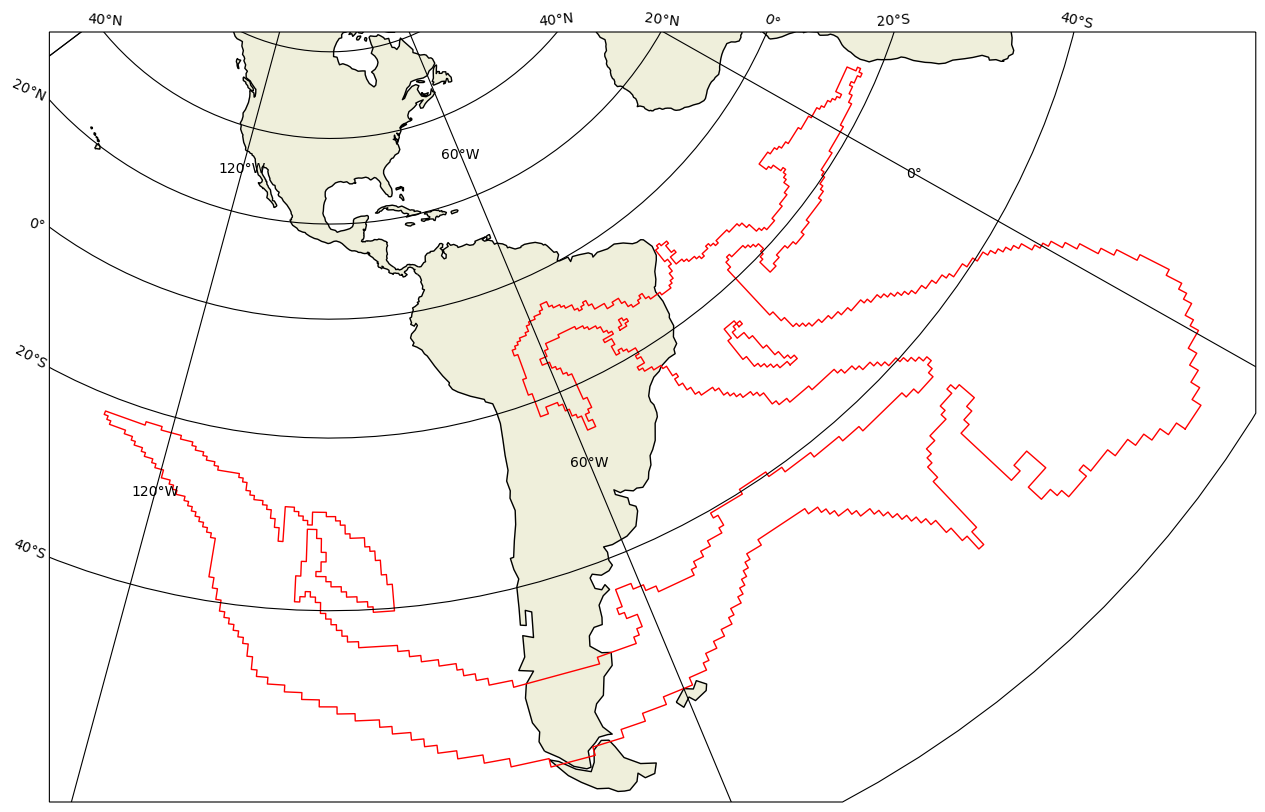

In [146]:
# just holes
AR = { "_id" : "2000.01.01.09.0_2", "timestamp" : ISODate("2000-01-01T09:00:00Z"), "raster" : [ [ -7.5, -57.5, [ 257.2109069824219 ] ], [ -6.875, -57.5, [ 262.97900390625 ] ], [ -6.25, -57.5, [ 260.35009765625 ] ], [ -5.625, -57.5, [ 253.9466094970703 ] ], [ -8.75, -57, [ 280.598876953125 ] ], [ -8.125, -57, [ 300.8905334472656 ] ], [ -7.5, -57, [ 312.01519775390625 ] ], [ -6.875, -57, [ 314.3218994140625 ] ], [ -6.25, -57, [ 306.8564147949219 ] ], [ -5.625, -57, [ 292.804443359375 ] ], [ -5, -57, [ 276.7730407714844 ] ], [ -4.375, -57, [ 260.2676696777344 ] ], [ -10, -56.5, [ 271.70489501953125 ] ], [ -9.375, -56.5, [ 315.8199157714844 ] ], [ -8.75, -56.5, [ 344.9346923828125 ] ], [ -8.125, -56.5, [ 359.0653991699219 ] ], [ -7.5, -56.5, [ 366.6893310546875 ] ], [ -6.875, -56.5, [ 367.89422607421875 ] ], [ -6.25, -56.5, [ 362.3500671386719 ] ], [ -5.625, -56.5, [ 348.0738220214844 ] ], [ -5, -56.5, [ 331.3640441894531 ] ], [ -4.375, -56.5, [ 312.67333984375 ] ], [ -3.75, -56.5, [ 291.9031982421875 ] ], [ -3.125, -56.5, [ 268.5904541015625 ] ], [ -11.25, -56, [ 258.52166748046875 ] ], [ -10.625, -56, [ 319.1709289550781 ] ], [ -10, -56, [ 363.90826416015625 ] ], [ -9.375, -56, [ 394.05401611328125 ] ], [ -8.75, -56, [ 411.2857971191406 ] ], [ -8.125, -56, [ 408.6597900390625 ] ], [ -7.5, -56, [ 402.40240478515625 ] ], [ -6.875, -56, [ 396.9669189453125 ] ], [ -6.25, -56, [ 393.62066650390625 ] ], [ -5.625, -56, [ 384.7048034667969 ] ], [ -5, -56, [ 371.9496154785156 ] ], [ -4.375, -56, [ 360.0161437988281 ] ], [ -3.75, -56, [ 349.49639892578125 ] ], [ -3.125, -56, [ 334.6976318359375 ] ], [ -2.5, -56, [ 308.8829040527344 ] ], [ -1.875, -56, [ 277.6648864746094 ] ], [ -13.125, -55.5, [ 250.0784912109375 ] ], [ -12.5, -55.5, [ 279.06964111328125 ] ], [ -11.875, -55.5, [ 328.8126220703125 ] ], [ -11.25, -55.5, [ 393.7594909667969 ] ], [ -10.625, -55.5, [ 434.3934631347656 ] ], [ -10, -55.5, [ 464.81829833984375 ] ], [ -9.375, -55.5, [ 483.8623962402344 ] ], [ -8.75, -55.5, [ 488.2508239746094 ] ], [ -8.125, -55.5, [ 465.6604919433594 ] ], [ -7.5, -55.5, [ 442.0914001464844 ] ], [ -6.875, -55.5, [ 424.6418762207031 ] ], [ -6.25, -55.5, [ 415.9258117675781 ] ], [ -5.625, -55.5, [ 412.2363586425781 ] ], [ -5, -55.5, [ 402.2554626464844 ] ], [ -4.375, -55.5, [ 395.509765625 ] ], [ -3.75, -55.5, [ 392.6634216308594 ] ], [ -3.125, -55.5, [ 390.9280090332031 ] ], [ -2.5, -55.5, [ 377.7406005859375 ] ], [ -1.875, -55.5, [ 356.6293029785156 ] ], [ -1.25, -55.5, [ 329.3638610839844 ] ], [ -0.625, -55.5, [ 294.98663330078125 ] ], [ -5.920304394294029e-13, -55.5, [ 254.09738159179688 ] ], [ -18.75, -55, [ 251.37625122070312 ] ], [ -18.125, -55, [ 256.2002868652344 ] ], [ -17.5, -55, [ 255.74412536621094 ] ], [ -16.875, -55, [ 251.1094207763672 ] ], [ -15.625, -55, [ 261.7615051269531 ] ], [ -15, -55, [ 266.873291015625 ] ], [ -14.375, -55, [ 276.9300231933594 ] ], [ -13.75, -55, [ 294.70343017578125 ] ], [ -13.125, -55, [ 325.0120544433594 ] ], [ -12.5, -55, [ 370.935791015625 ] ], [ -11.875, -55, [ 428.431396484375 ] ], [ -11.25, -55, [ 476.24383544921875 ] ], [ -10.625, -55, [ 500.03082275390625 ] ], [ -10, -55, [ 513.7366333007812 ] ], [ -9.375, -55, [ 516.9696044921875 ] ], [ -8.75, -55, [ 507.3723449707031 ] ], [ -8.125, -55, [ 480.0590515136719 ] ], [ -7.5, -55, [ 454.1693420410156 ] ], [ -6.875, -55, [ 437.8293151855469 ] ], [ -6.25, -55, [ 433.1327819824219 ] ], [ -5.625, -55, [ 438.6737365722656 ] ], [ -5, -55, [ 439.1817932128906 ] ], [ -4.375, -55, [ 438.5985107421875 ] ], [ -3.75, -55, [ 438.8711853027344 ] ], [ -3.125, -55, [ 439.37225341796875 ] ], [ -2.5, -55, [ 435.54833984375 ] ], [ -1.875, -55, [ 424.34820556640625 ] ], [ -1.25, -55, [ 406.99407958984375 ] ], [ -0.625, -55, [ 385.4599914550781 ] ], [ -5.920304394294029e-13, -55, [ 356.4061279296875 ] ], [ 0.625, -55, [ 306.59246826171875 ] ], [ -19.375, -54.5, [ 254.0163116455078 ] ], [ -18.75, -54.5, [ 265.05322265625 ] ], [ -18.125, -54.5, [ 274.7360534667969 ] ], [ -17.5, -54.5, [ 274.43524169921875 ] ], [ -16.875, -54.5, [ 273.3731384277344 ] ], [ -16.25, -54.5, [ 287.5740966796875 ] ], [ -15.625, -54.5, [ 290.510986328125 ] ], [ -15, -54.5, [ 298.86065673828125 ] ], [ -14.375, -54.5, [ 314.3140563964844 ] ], [ -13.75, -54.5, [ 337.0657958984375 ] ], [ -13.125, -54.5, [ 371.1330871582031 ] ], [ -12.5, -54.5, [ 410.6900329589844 ] ], [ -11.875, -54.5, [ 445.4579162597656 ] ], [ -11.25, -54.5, [ 470.40802001953125 ] ], [ -10.625, -54.5, [ 483.7618103027344 ] ], [ -10, -54.5, [ 488.338623046875 ] ], [ -9.375, -54.5, [ 486.32440185546875 ] ], [ -8.75, -54.5, [ 479.14599609375 ] ], [ -8.125, -54.5, [ 463.7416687011719 ] ], [ -7.5, -54.5, [ 445.25018310546875 ] ], [ -6.875, -54.5, [ 432.96624755859375 ] ], [ -6.25, -54.5, [ 430.3315734863281 ] ], [ -5.625, -54.5, [ 437.7215270996094 ] ], [ -5, -54.5, [ 450.1293640136719 ] ], [ -4.375, -54.5, [ 462.3944396972656 ] ], [ -3.75, -54.5, [ 475.43609619140625 ] ], [ -3.125, -54.5, [ 483.8912353515625 ] ], [ -2.5, -54.5, [ 484.04205322265625 ] ], [ -1.875, -54.5, [ 479.9286804199219 ] ], [ -1.25, -54.5, [ 473.0439453125 ] ], [ -0.625, -54.5, [ 455.3340759277344 ] ], [ -5.920304394294029e-13, -54.5, [ 431.1900939941406 ] ], [ 0.625, -54.5, [ 402.6719055175781 ] ], [ 1.25, -54.5, [ 350.4139709472656 ] ], [ 1.875, -54.5, [ 279.38238525390625 ] ], [ -20.625, -54, [ 251.41603088378906 ] ], [ -20, -54, [ 259.0171813964844 ] ], [ -19.375, -54, [ 257.20184326171875 ] ], [ -18.75, -54, [ 267.29742431640625 ] ], [ -18.125, -54, [ 274.097412109375 ] ], [ -17.5, -54, [ 276.5361633300781 ] ], [ -16.875, -54, [ 297.2879333496094 ] ], [ -16.25, -54, [ 303.1784362792969 ] ], [ -15.625, -54, [ 308.7548522949219 ] ], [ -15, -54, [ 315.7880554199219 ] ], [ -14.375, -54, [ 326.0915832519531 ] ], [ -13.75, -54, [ 339.8102722167969 ] ], [ -13.125, -54, [ 356.253662109375 ] ], [ -12.5, -54, [ 374.41168212890625 ] ], [ -11.875, -54, [ 394.52020263671875 ] ], [ -11.25, -54, [ 414.4706726074219 ] ], [ -10.625, -54, [ 431.0128173828125 ] ], [ -10, -54, [ 438.82220458984375 ] ], [ -9.375, -54, [ 441.0689697265625 ] ], [ -8.75, -54, [ 443.3665466308594 ] ], [ -8.125, -54, [ 447.9814453125 ] ], [ -7.5, -54, [ 443.5181884765625 ] ], [ -6.875, -54, [ 434.77947998046875 ] ], [ -6.25, -54, [ 427.05908203125 ] ], [ -5.625, -54, [ 425.1650695800781 ] ], [ -5, -54, [ 432.2761535644531 ] ], [ -4.375, -54, [ 450.0856628417969 ] ], [ -3.75, -54, [ 481.6551208496094 ] ], [ -3.125, -54, [ 510.8717346191406 ] ], [ -2.5, -54, [ 523.6810913085938 ] ], [ -1.875, -54, [ 519.70751953125 ] ], [ -1.25, -54, [ 522.6785888671875 ] ], [ -0.625, -54, [ 511.61773681640625 ] ], [ -5.920304394294029e-13, -54, [ 486.5885925292969 ] ], [ 0.625, -54, [ 457.7963562011719 ] ], [ 1.25, -54, [ 428.6632995605469 ] ], [ 1.875, -54, [ 374.57623291015625 ] ], [ 2.5, -54, [ 294.10400390625 ] ], [ -28.125, -53.5, [ 250.74778747558594 ] ], [ -20.625, -53.5, [ 251.984375 ] ], [ -20, -53.5, [ 254.2480926513672 ] ], [ -19.375, -53.5, [ 256.911865234375 ] ], [ -18.75, -53.5, [ 260.0805969238281 ] ], [ -18.125, -53.5, [ 269.3065185546875 ] ], [ -17.5, -53.5, [ 281.76519775390625 ] ], [ -16.875, -53.5, [ 294.40386962890625 ] ], [ -16.25, -53.5, [ 304.07891845703125 ] ], [ -15.625, -53.5, [ 309.7414855957031 ] ], [ -15, -53.5, [ 313.3000183105469 ] ], [ -14.375, -53.5, [ 316.1363525390625 ] ], [ -13.75, -53.5, [ 321.1737976074219 ] ], [ -13.125, -53.5, [ 330.64422607421875 ] ], [ -12.5, -53.5, [ 345.2801818847656 ] ], [ -11.875, -53.5, [ 363.9502868652344 ] ], [ -11.25, -53.5, [ 386.9090270996094 ] ], [ -10.625, -53.5, [ 403.29205322265625 ] ], [ -10, -53.5, [ 412.48211669921875 ] ], [ -9.375, -53.5, [ 421.22235107421875 ] ], [ -8.75, -53.5, [ 434.7939758300781 ] ], [ -8.125, -53.5, [ 448.874267578125 ] ], [ -7.5, -53.5, [ 446.6272888183594 ] ], [ -6.875, -53.5, [ 433.5251159667969 ] ], [ -6.25, -53.5, [ 420.6707458496094 ] ], [ -5.625, -53.5, [ 414.5478820800781 ] ], [ -5, -53.5, [ 418.6537170410156 ] ], [ -4.375, -53.5, [ 433.0572204589844 ] ], [ -3.75, -53.5, [ 471.4512023925781 ] ], [ -3.125, -53.5, [ 517.5680541992188 ] ], [ -2.5, -53.5, [ 540.7642822265625 ] ], [ -1.875, -53.5, [ 546.6826782226562 ] ], [ -1.25, -53.5, [ 554.7894897460938 ] ], [ -0.625, -53.5, [ 553.2874145507812 ] ], [ -5.920304394294029e-13, -53.5, [ 525.8978271484375 ] ], [ 0.625, -53.5, [ 493.5931701660156 ] ], [ 1.25, -53.5, [ 465.77154541015625 ] ], [ 1.875, -53.5, [ 441.5608825683594 ] ], [ 2.5, -53.5, [ 379.49871826171875 ] ], [ 3.125, -53.5, [ 288.34490966796875 ] ], [ -74.375, -53, [ 251.17013549804688 ] ], [ -73.75, -53, [ 261.4441833496094 ] ], [ -73.125, -53, [ 262.8340148925781 ] ], [ -72.5, -53, [ 264.6283264160156 ] ], [ -71.875, -53, [ 267.0211486816406 ] ], [ -71.25, -53, [ 269.9058837890625 ] ], [ -70.625, -53, [ 257.7942810058594 ] ], [ -28.125, -53, [ 258.4275817871094 ] ], [ -18.125, -53, [ 250.2928009033203 ] ], [ -17.5, -53, [ 275.92156982421875 ] ], [ -16.875, -53, [ 294.0771484375 ] ], [ -16.25, -53, [ 304.08026123046875 ] ], [ -15.625, -53, [ 313.3865661621094 ] ], [ -15, -53, [ 325.89898681640625 ] ], [ -14.375, -53, [ 338.2154235839844 ] ], [ -13.75, -53, [ 346.8502197265625 ] ], [ -13.125, -53, [ 349.8486328125 ] ], [ -12.5, -53, [ 350.10791015625 ] ], [ -11.875, -53, [ 353.1891784667969 ] ], [ -11.25, -53, [ 366.7158203125 ] ], [ -10.625, -53, [ 389.2459411621094 ] ], [ -10, -53, [ 414.1618347167969 ] ], [ -9.375, -53, [ 435.2857971191406 ] ], [ -8.75, -53, [ 446.0585632324219 ] ], [ -8.125, -53, [ 439.91912841796875 ] ], [ -7.5, -53, [ 420.08990478515625 ] ], [ -6.875, -53, [ 402.5417785644531 ] ], [ -6.25, -53, [ 388.2579345703125 ] ], [ -5.625, -53, [ 384.76416015625 ] ], [ -5, -53, [ 397.9291076660156 ] ], [ -4.375, -53, [ 426.9591369628906 ] ], [ -3.75, -53, [ 464.1576232910156 ] ], [ -3.125, -53, [ 509.4871520996094 ] ], [ -2.5, -53, [ 543.291015625 ] ], [ -1.875, -53, [ 567.8194580078125 ] ], [ -1.25, -53, [ 582.812744140625 ] ], [ -0.625, -53, [ 583.7932739257812 ] ], [ -5.920304394294029e-13, -53, [ 563.3956909179688 ] ], [ 0.625, -53, [ 520.6251831054688 ] ], [ 1.25, -53, [ 483.3103942871094 ] ], [ 1.875, -53, [ 459.0633239746094 ] ], [ 2.5, -53, [ 409.75408935546875 ] ], [ 3.125, -53, [ 326.8001403808594 ] ], [ -78.125, -52.5, [ 264.48565673828125 ] ], [ -77.5, -52.5, [ 286.0518493652344 ] ], [ -76.875, -52.5, [ 304.6889953613281 ] ], [ -76.25, -52.5, [ 325.6743469238281 ] ], [ -75.625, -52.5, [ 344.62322998046875 ] ], [ -75, -52.5, [ 358.09228515625 ] ], [ -74.375, -52.5, [ 372.53302001953125 ] ], [ -73.75, -52.5, [ 384.8199157714844 ] ], [ -73.125, -52.5, [ 377.8502502441406 ] ], [ -72.5, -52.5, [ 377.74285888671875 ] ], [ -71.875, -52.5, [ 374.42132568359375 ] ], [ -71.25, -52.5, [ 372.9173583984375 ] ], [ -70.625, -52.5, [ 355.3502197265625 ] ], [ -70, -52.5, [ 338.0570983886719 ] ], [ -69.375, -52.5, [ 322.7041015625 ] ], [ -68.75, -52.5, [ 308.9864501953125 ] ], [ -68.125, -52.5, [ 289.2562255859375 ] ], [ -67.5, -52.5, [ 271.5044860839844 ] ], [ -28.75, -52.5, [ 260.5546569824219 ] ], [ -28.125, -52.5, [ 269.28680419921875 ] ], [ -27.5, -52.5, [ 253.54656982421875 ] ], [ -18.125, -52.5, [ 252.47401428222656 ] ], [ -17.5, -52.5, [ 286.5281982421875 ] ], [ -16.875, -52.5, [ 302.67828369140625 ] ], [ -16.25, -52.5, [ 317.92364501953125 ] ], [ -15.625, -52.5, [ 342.4021301269531 ] ], [ -15, -52.5, [ 370.22991943359375 ] ], [ -14.375, -52.5, [ 392.7141418457031 ] ], [ -13.75, -52.5, [ 403.092529296875 ] ], [ -13.125, -52.5, [ 400.34552001953125 ] ], [ -12.5, -52.5, [ 382.74188232421875 ] ], [ -11.875, -52.5, [ 356.63092041015625 ] ], [ -11.25, -52.5, [ 350.8889465332031 ] ], [ -10.625, -52.5, [ 370.886474609375 ] ], [ -10, -52.5, [ 398.8891296386719 ] ], [ -9.375, -52.5, [ 413.6547546386719 ] ], [ -8.75, -52.5, [ 405.2827453613281 ] ], [ -8.125, -52.5, [ 382.01153564453125 ] ], [ -7.5, -52.5, [ 361.92327880859375 ] ], [ -6.875, -52.5, [ 356.74847412109375 ] ], [ -6.25, -52.5, [ 356.22344970703125 ] ], [ -5.625, -52.5, [ 363.1826171875 ] ], [ -5, -52.5, [ 390.294921875 ] ], [ -4.375, -52.5, [ 429.9809265136719 ] ], [ -3.75, -52.5, [ 465.9249267578125 ] ], [ -3.125, -52.5, [ 502.66937255859375 ] ], [ -2.5, -52.5, [ 548.0121459960938 ] ], [ -1.875, -52.5, [ 591.1994018554688 ] ], [ -1.25, -52.5, [ 618.223388671875 ] ], [ -0.625, -52.5, [ 619.5501098632812 ] ], [ -5.920304394294029e-13, -52.5, [ 595.3040771484375 ] ], [ 0.625, -52.5, [ 566.4014892578125 ] ], [ 1.25, -52.5, [ 515.3148803710938 ] ], [ 1.875, -52.5, [ 474.2393493652344 ] ], [ 2.5, -52.5, [ 427.59637451171875 ] ], [ 3.125, -52.5, [ 349.15264892578125 ] ], [ 3.75, -52.5, [ 253.63937377929688 ] ], [ -80.625, -52, [ 272.28717041015625 ] ], [ -80, -52, [ 304.2991943359375 ] ], [ -79.375, -52, [ 335.9853820800781 ] ], [ -78.75, -52, [ 368.07208251953125 ] ], [ -78.125, -52, [ 396.8155822753906 ] ], [ -77.5, -52, [ 423.4109191894531 ] ], [ -76.875, -52, [ 447.773681640625 ] ], [ -76.25, -52, [ 469.8477783203125 ] ], [ -75.625, -52, [ 479.4993591308594 ] ], [ -75, -52, [ 489.5265808105469 ] ], [ -74.375, -52, [ 499.878662109375 ] ], [ -73.75, -52, [ 503.0035705566406 ] ], [ -73.125, -52, [ 494.3572998046875 ] ], [ -72.5, -52, [ 503.5953369140625 ] ], [ -71.875, -52, [ 494.8902282714844 ] ], [ -71.25, -52, [ 475.108642578125 ] ], [ -70.625, -52, [ 469.5634460449219 ] ], [ -70, -52, [ 444.420166015625 ] ], [ -69.375, -52, [ 417.3963623046875 ] ], [ -68.75, -52, [ 395.4221496582031 ] ], [ -68.125, -52, [ 379.6463928222656 ] ], [ -67.5, -52, [ 365.935791015625 ] ], [ -66.875, -52, [ 349.6495361328125 ] ], [ -66.25, -52, [ 324.8050842285156 ] ], [ -65.625, -52, [ 299.4087219238281 ] ], [ -65, -52, [ 266.6133117675781 ] ], [ -28.75, -52, [ 273.1884765625 ] ], [ -28.125, -52, [ 274.2829284667969 ] ], [ -27.5, -52, [ 257.012451171875 ] ], [ -21.25, -52, [ 261.3713073730469 ] ], [ -20.625, -52, [ 265.12762451171875 ] ], [ -18.125, -52, [ 277.9984130859375 ] ], [ -17.5, -52, [ 305.13507080078125 ] ], [ -16.875, -52, [ 321.0771484375 ] ], [ -16.25, -52, [ 345.0074157714844 ] ], [ -15.625, -52, [ 372.6537780761719 ] ], [ -15, -52, [ 395.37548828125 ] ], [ -14.375, -52, [ 412.2784729003906 ] ], [ -13.75, -52, [ 425.0497131347656 ] ], [ -13.125, -52, [ 432.078369140625 ] ], [ -12.5, -52, [ 429.5215148925781 ] ], [ -11.875, -52, [ 413.92041015625 ] ], [ -11.25, -52, [ 400.6236572265625 ] ], [ -10.625, -52, [ 395.3897705078125 ] ], [ -10, -52, [ 388.8152770996094 ] ], [ -9.375, -52, [ 375.3280334472656 ] ], [ -8.75, -52, [ 357.8016357421875 ] ], [ -8.125, -52, [ 344.1879577636719 ] ], [ -7.5, -52, [ 348.1871337890625 ] ], [ -6.875, -52, [ 370.6197814941406 ] ], [ -6.25, -52, [ 386.940673828125 ] ], [ -5.625, -52, [ 393.333251953125 ] ], [ -5, -52, [ 406.8599548339844 ] ], [ -4.375, -52, [ 431.5464782714844 ] ], [ -3.75, -52, [ 465.6329650878906 ] ], [ -3.125, -52, [ 506.3499450683594 ] ], [ -2.5, -52, [ 567.8609008789062 ] ], [ -1.875, -52, [ 630.0872192382812 ] ], [ -1.25, -52, [ 661.1632080078125 ] ], [ -0.625, -52, [ 656.9660034179688 ] ], [ -5.920304394294029e-13, -52, [ 627.0582885742188 ] ], [ 0.625, -52, [ 595.1436767578125 ] ], [ 1.25, -52, [ 539.3968505859375 ] ], [ 1.875, -52, [ 489.320556640625 ] ], [ 2.5, -52, [ 445.861572265625 ] ], [ 3.125, -52, [ 366.02069091796875 ] ], [ 3.75, -52, [ 263.5762023925781 ] ], [ -83.125, -51.5, [ 265.4356994628906 ] ], [ -82.5, -51.5, [ 298.5959167480469 ] ], [ -81.875, -51.5, [ 332.4505615234375 ] ], [ -81.25, -51.5, [ 365.47564697265625 ] ], [ -80.625, -51.5, [ 398.1390686035156 ] ], [ -80, -51.5, [ 430.99066162109375 ] ], [ -79.375, -51.5, [ 463.7474670410156 ] ], [ -78.75, -51.5, [ 494.1440124511719 ] ], [ -78.125, -51.5, [ 517.092041015625 ] ], [ -77.5, -51.5, [ 534.3204956054688 ] ], [ -76.875, -51.5, [ 549.4060668945312 ] ], [ -76.25, -51.5, [ 565.837158203125 ] ], [ -75.625, -51.5, [ 562.686279296875 ] ], [ -75, -51.5, [ 566.1561889648438 ] ], [ -74.375, -51.5, [ 571.3557739257812 ] ], [ -73.75, -51.5, [ 572.936767578125 ] ], [ -73.125, -51.5, [ 562.6685180664062 ] ], [ -72.5, -51.5, [ 551.6486206054688 ] ], [ -71.875, -51.5, [ 542.8782348632812 ] ], [ -71.25, -51.5, [ 538.2972412109375 ] ], [ -70.625, -51.5, [ 525.5904541015625 ] ], [ -70, -51.5, [ 519.808349609375 ] ], [ -69.375, -51.5, [ 497.7438049316406 ] ], [ -68.75, -51.5, [ 476.6923522949219 ] ], [ -68.125, -51.5, [ 452.24468994140625 ] ], [ -67.5, -51.5, [ 433.6628112792969 ] ], [ -66.875, -51.5, [ 418.1332092285156 ] ], [ -66.25, -51.5, [ 399.90496826171875 ] ], [ -65.625, -51.5, [ 380.2787780761719 ] ], [ -65, -51.5, [ 350.2046203613281 ] ], [ -64.375, -51.5, [ 320.5652770996094 ] ], [ -63.75, -51.5, [ 294.1781005859375 ] ], [ -63.125, -51.5, [ 274.28778076171875 ] ], [ -62.5, -51.5, [ 259.0108337402344 ] ], [ -29.375, -51.5, [ 262.1684875488281 ] ], [ -28.75, -51.5, [ 284.0962219238281 ] ], [ -28.125, -51.5, [ 279.0548095703125 ] ], [ -27.5, -51.5, [ 260.03643798828125 ] ], [ -21.25, -51.5, [ 272.4309997558594 ] ], [ -20.625, -51.5, [ 291.6726379394531 ] ], [ -20, -51.5, [ 295.0272521972656 ] ], [ -19.375, -51.5, [ 282.1749267578125 ] ], [ -18.75, -51.5, [ 283.8040771484375 ] ], [ -18.125, -51.5, [ 304.11322021484375 ] ], [ -17.5, -51.5, [ 317.5785827636719 ] ], [ -16.875, -51.5, [ 333.616455078125 ] ], [ -16.25, -51.5, [ 360.51788330078125 ] ], [ -15.625, -51.5, [ 389.9790344238281 ] ], [ -15, -51.5, [ 412.7678527832031 ] ], [ -14.375, -51.5, [ 428.2481689453125 ] ], [ -13.75, -51.5, [ 439.68511962890625 ] ], [ -13.125, -51.5, [ 449.7430114746094 ] ], [ -12.5, -51.5, [ 461.4135437011719 ] ], [ -11.875, -51.5, [ 475.85064697265625 ] ], [ -11.25, -51.5, [ 483.7599792480469 ] ], [ -10.625, -51.5, [ 473.82318115234375 ] ], [ -10, -51.5, [ 444.5054626464844 ] ], [ -9.375, -51.5, [ 408.8512878417969 ] ], [ -8.75, -51.5, [ 385.43463134765625 ] ], [ -8.125, -51.5, [ 384.2859802246094 ] ], [ -7.5, -51.5, [ 396.9496154785156 ] ], [ -6.875, -51.5, [ 413.3838806152344 ] ], [ -6.25, -51.5, [ 420.1552429199219 ] ], [ -5.625, -51.5, [ 420.8479309082031 ] ], [ -5, -51.5, [ 438.94012451171875 ] ], [ -4.375, -51.5, [ 456.31427001953125 ] ], [ -3.75, -51.5, [ 470.9197692871094 ] ], [ -3.125, -51.5, [ 510.8997497558594 ] ], [ -2.5, -51.5, [ 589.3179931640625 ] ], [ -1.875, -51.5, [ 668.121337890625 ] ], [ -1.25, -51.5, [ 691.8529052734375 ] ], [ -0.625, -51.5, [ 674.2246704101562 ] ], [ -5.920304394294029e-13, -51.5, [ 644.3159790039062 ] ], [ 0.625, -51.5, [ 616.4209594726562 ] ], [ 1.25, -51.5, [ 558.6262817382812 ] ], [ 1.875, -51.5, [ 499.1768493652344 ] ], [ 2.5, -51.5, [ 444.35870361328125 ] ], [ 3.125, -51.5, [ 374.660888671875 ] ], [ 3.75, -51.5, [ 261.31134033203125 ] ], [ -85, -51, [ 264.5164489746094 ] ], [ -84.375, -51, [ 305.0701904296875 ] ], [ -83.75, -51, [ 347.66253662109375 ] ], [ -83.125, -51, [ 382.52099609375 ] ], [ -82.5, -51, [ 415.7648010253906 ] ], [ -81.875, -51, [ 449.2922668457031 ] ], [ -81.25, -51, [ 481.8508605957031 ] ], [ -80.625, -51, [ 513.5596313476562 ] ], [ -80, -51, [ 540.0211181640625 ] ], [ -79.375, -51, [ 560.0620727539062 ] ], [ -78.75, -51, [ 576.9021606445312 ] ], [ -78.125, -51, [ 588.4509887695312 ] ], [ -77.5, -51, [ 592.8091430664062 ] ], [ -76.875, -51, [ 593.522216796875 ] ], [ -76.25, -51, [ 595.3512573242188 ] ], [ -75.625, -51, [ 589.5108642578125 ] ], [ -75, -51, [ 586.3114013671875 ] ], [ -74.375, -51, [ 584.0062866210938 ] ], [ -73.75, -51, [ 545.8082275390625 ] ], [ -73.125, -51, [ 553.6748657226562 ] ], [ -72.5, -51, [ 552.3135986328125 ] ], [ -71.875, -51, [ 555.9886474609375 ] ], [ -71.25, -51, [ 543.4124145507812 ] ], [ -70.625, -51, [ 532.1753540039062 ] ], [ -70, -51, [ 536.0667114257812 ] ], [ -69.375, -51, [ 530.1106567382812 ] ], [ -68.75, -51, [ 518.2164306640625 ] ], [ -68.125, -51, [ 497.7816162109375 ] ], [ -67.5, -51, [ 483.3188171386719 ] ], [ -66.875, -51, [ 471.0234069824219 ] ], [ -66.25, -51, [ 452.385498046875 ] ], [ -65.625, -51, [ 433.6169738769531 ] ], [ -65, -51, [ 408.8951721191406 ] ], [ -64.375, -51, [ 384.5978088378906 ] ], [ -63.75, -51, [ 359.2283020019531 ] ], [ -63.125, -51, [ 337.0663146972656 ] ], [ -62.5, -51, [ 323.94403076171875 ] ], [ -61.875, -51, [ 316.8424377441406 ] ], [ -61.25, -51, [ 311.41851806640625 ] ], [ -60.625, -51, [ 297.8014221191406 ] ], [ -60, -51, [ 287.9825439453125 ] ], [ -59.375, -51, [ 266.6649475097656 ] ], [ -29.375, -51, [ 288.17205810546875 ] ], [ -28.75, -51, [ 292.6628112792969 ] ], [ -28.125, -51, [ 282.0652770996094 ] ], [ -27.5, -51, [ 260.8945007324219 ] ], [ -21.25, -51, [ 270.0245056152344 ] ], [ -20.625, -51, [ 300.45269775390625 ] ], [ -20, -51, [ 324.9288635253906 ] ], [ -19.375, -51, [ 331.31658935546875 ] ], [ -18.75, -51, [ 325.9529724121094 ] ], [ -18.125, -51, [ 322.386474609375 ] ], [ -17.5, -51, [ 323.9544372558594 ] ], [ -16.875, -51, [ 340.5435791015625 ] ], [ -16.25, -51, [ 371.01458740234375 ] ], [ -15.625, -51, [ 400.6092224121094 ] ], [ -15, -51, [ 425.2511291503906 ] ], [ -14.375, -51, [ 444.74456787109375 ] ], [ -13.75, -51, [ 457.2661437988281 ] ], [ -13.125, -51, [ 468.03619384765625 ] ], [ -12.5, -51, [ 482.50958251953125 ] ], [ -11.875, -51, [ 502.6737976074219 ] ], [ -11.25, -51, [ 520.1818237304688 ] ], [ -10.625, -51, [ 524.9463500976562 ] ], [ -10, -51, [ 515.1366577148438 ] ], [ -9.375, -51, [ 497.24072265625 ] ], [ -8.75, -51, [ 479.7066345214844 ] ], [ -8.125, -51, [ 467.6502685546875 ] ], [ -7.5, -51, [ 457.6107482910156 ] ], [ -6.875, -51, [ 445.6022644042969 ] ], [ -6.25, -51, [ 425.715087890625 ] ], [ -5.625, -51, [ 423.7043762207031 ] ], [ -5, -51, [ 465.09149169921875 ] ], [ -4.375, -51, [ 497.9325256347656 ] ], [ -3.75, -51, [ 502.4671630859375 ] ], [ -3.125, -51, [ 523.03125 ] ], [ -2.5, -51, [ 592.43115234375 ] ], [ -1.875, -51, [ 668.3327026367188 ] ], [ -1.25, -51, [ 684.1773071289062 ] ], [ -0.625, -51, [ 681.8687133789062 ] ], [ -5.920304394294029e-13, -51, [ 667.21630859375 ] ], [ 0.625, -51, [ 628.436767578125 ] ], [ 1.25, -51, [ 567.1614990234375 ] ], [ 1.875, -51, [ 500.2375793457031 ] ], [ 2.5, -51, [ 437.9213562011719 ] ], [ 3.125, -51, [ 358.7673645019531 ] ], [ 3.75, -51, [ 252.0862274169922 ] ], [ -86.25, -50.5, [ 283.8522033691406 ] ], [ -85.625, -50.5, [ 330.1357116699219 ] ], [ -85, -50.5, [ 373.82177734375 ] ], [ -84.375, -50.5, [ 414.31494140625 ] ], [ -83.75, -50.5, [ 449.0610046386719 ] ], [ -83.125, -50.5, [ 481.0954895019531 ] ], [ -82.5, -50.5, [ 511.9805603027344 ] ], [ -81.875, -50.5, [ 540.9467163085938 ] ], [ -81.25, -50.5, [ 566.9578247070312 ] ], [ -80.625, -50.5, [ 586.7796630859375 ] ], [ -80, -50.5, [ 596.393798828125 ] ], [ -79.375, -50.5, [ 602.1156616210938 ] ], [ -78.75, -50.5, [ 602.8330078125 ] ], [ -78.125, -50.5, [ 595.3831176757812 ] ], [ -77.5, -50.5, [ 591.9998779296875 ] ], [ -76.875, -50.5, [ 589.4556274414062 ] ], [ -76.25, -50.5, [ 585.70751953125 ] ], [ -75.625, -50.5, [ 577.0761108398438 ] ], [ -75, -50.5, [ 588.7538452148438 ] ], [ -74.375, -50.5, [ 576.1699829101562 ] ], [ -73.75, -50.5, [ 533.4381103515625 ] ], [ -73.125, -50.5, [ 490.25262451171875 ] ], [ -72.5, -50.5, [ 485.635498046875 ] ], [ -71.875, -50.5, [ 473.2816162109375 ] ], [ -71.25, -50.5, [ 492.6869201660156 ] ], [ -70.625, -50.5, [ 502.80010986328125 ] ], [ -70, -50.5, [ 508.09783935546875 ] ], [ -69.375, -50.5, [ 511.08209228515625 ] ], [ -68.75, -50.5, [ 503.3773193359375 ] ], [ -68.125, -50.5, [ 494.65625 ] ], [ -67.5, -50.5, [ 492.3011779785156 ] ], [ -66.875, -50.5, [ 489.55255126953125 ] ], [ -66.25, -50.5, [ 480.1180725097656 ] ], [ -65.625, -50.5, [ 471.9568176269531 ] ], [ -65, -50.5, [ 452.1228942871094 ] ], [ -64.375, -50.5, [ 431.4953918457031 ] ], [ -63.75, -50.5, [ 410.4044189453125 ] ], [ -63.125, -50.5, [ 391.5495910644531 ] ], [ -62.5, -50.5, [ 376.6497802734375 ] ], [ -61.875, -50.5, [ 365.586181640625 ] ], [ -61.25, -50.5, [ 356.4187927246094 ] ], [ -60.625, -50.5, [ 348.2358093261719 ] ], [ -60, -50.5, [ 338.82122802734375 ] ], [ -59.375, -50.5, [ 325.8996276855469 ] ], [ -58.75, -50.5, [ 309.175048828125 ] ], [ -58.125, -50.5, [ 281.20196533203125 ] ], [ -57.5, -50.5, [ 251.6761932373047 ] ], [ -30, -50.5, [ 278.37274169921875 ] ], [ -29.375, -50.5, [ 300.2088928222656 ] ], [ -28.75, -50.5, [ 297.0164794921875 ] ], [ -28.125, -50.5, [ 284.1024169921875 ] ], [ -27.5, -50.5, [ 262.42181396484375 ] ], [ -21.25, -50.5, [ 265.3885803222656 ] ], [ -20.625, -50.5, [ 295.9056091308594 ] ], [ -20, -50.5, [ 323.5638427734375 ] ], [ -19.375, -50.5, [ 338.6020812988281 ] ], [ -18.75, -50.5, [ 336.1234436035156 ] ], [ -18.125, -50.5, [ 325.60382080078125 ] ], [ -17.5, -50.5, [ 318.2783203125 ] ], [ -16.875, -50.5, [ 328.72998046875 ] ], [ -16.25, -50.5, [ 349.0269470214844 ] ], [ -15.625, -50.5, [ 368.1566467285156 ] ], [ -15, -50.5, [ 389.49578857421875 ] ], [ -14.375, -50.5, [ 414.60687255859375 ] ], [ -13.75, -50.5, [ 436.0403137207031 ] ], [ -13.125, -50.5, [ 458.14434814453125 ] ], [ -12.5, -50.5, [ 481.5079040527344 ] ], [ -11.875, -50.5, [ 505.41015625 ] ], [ -11.25, -50.5, [ 527.690673828125 ] ], [ -10.625, -50.5, [ 542.118408203125 ] ], [ -10, -50.5, [ 547.3471069335938 ] ], [ -9.375, -50.5, [ 546.0584716796875 ] ], [ -8.75, -50.5, [ 536.263671875 ] ], [ -8.125, -50.5, [ 513.4718017578125 ] ], [ -7.5, -50.5, [ 482.60443115234375 ] ], [ -6.875, -50.5, [ 453.5993347167969 ] ], [ -6.25, -50.5, [ 428.0783996582031 ] ], [ -5.625, -50.5, [ 430.9880676269531 ] ], [ -5, -50.5, [ 479.7473449707031 ] ], [ -4.375, -50.5, [ 525.9434204101562 ] ], [ -3.75, -50.5, [ 543.2540283203125 ] ], [ -3.125, -50.5, [ 561.3136596679688 ] ], [ -2.5, -50.5, [ 602.1682739257812 ] ], [ -1.875, -50.5, [ 642.12744140625 ] ], [ -1.25, -50.5, [ 652.5631713867188 ] ], [ -0.625, -50.5, [ 664.3214721679688 ] ], [ -5.920304394294029e-13, -50.5, [ 657.71337890625 ] ], [ 0.625, -50.5, [ 629.2387084960938 ] ], [ 1.25, -50.5, [ 567.5130004882812 ] ], [ 1.875, -50.5, [ 491.2297058105469 ] ], [ 2.5, -50.5, [ 421.02642822265625 ] ], [ 3.125, -50.5, [ 335.34002685546875 ] ], [ -87.5, -50, [ 294.277587890625 ] ], [ -86.875, -50, [ 346.0212707519531 ] ], [ -86.25, -50, [ 391.0638427734375 ] ], [ -85.625, -50, [ 432.30999755859375 ] ], [ -85, -50, [ 471.601318359375 ] ], [ -84.375, -50, [ 505.72625732421875 ] ], [ -83.75, -50, [ 534.8836669921875 ] ], [ -83.125, -50, [ 559.9879150390625 ] ], [ -82.5, -50, [ 581.4295043945312 ] ], [ -81.875, -50, [ 599.2374877929688 ] ], [ -81.25, -50, [ 611.9529418945312 ] ], [ -80.625, -50, [ 614.6387939453125 ] ], [ -80, -50, [ 618.0404052734375 ] ], [ -79.375, -50, [ 617.0512084960938 ] ], [ -78.75, -50, [ 612.8003540039062 ] ], [ -78.125, -50, [ 607.3146362304688 ] ], [ -77.5, -50, [ 604.4087524414062 ] ], [ -76.875, -50, [ 599.9674682617188 ] ], [ -76.25, -50, [ 603.2259521484375 ] ], [ -75.625, -50, [ 599.0982666015625 ] ], [ -75, -50, [ 590.1368408203125 ] ], [ -74.375, -50, [ 545.19091796875 ] ], [ -73.75, -50, [ 449.981201171875 ] ], [ -73.125, -50, [ 456.1087646484375 ] ], [ -72.5, -50, [ 475.64630126953125 ] ], [ -71.875, -50, [ 460.219482421875 ] ], [ -71.25, -50, [ 461.3059997558594 ] ], [ -70.625, -50, [ 467.6883850097656 ] ], [ -70, -50, [ 463.1185302734375 ] ], [ -69.375, -50, [ 476.9200439453125 ] ], [ -68.75, -50, [ 475.9934997558594 ] ], [ -68.125, -50, [ 470.9242858886719 ] ], [ -67.5, -50, [ 468.91192626953125 ] ], [ -66.875, -50, [ 470.2171325683594 ] ], [ -66.25, -50, [ 472.0577697753906 ] ], [ -65.625, -50, [ 472.3093566894531 ] ], [ -65, -50, [ 463.18548583984375 ] ], [ -64.375, -50, [ 452.912353515625 ] ], [ -63.75, -50, [ 436.44366455078125 ] ], [ -63.125, -50, [ 419.2983703613281 ] ], [ -62.5, -50, [ 405.5417785644531 ] ], [ -61.875, -50, [ 393.1838684082031 ] ], [ -61.25, -50, [ 386.8875732421875 ] ], [ -60.625, -50, [ 380.9451904296875 ] ], [ -60, -50, [ 380.0502624511719 ] ], [ -59.375, -50, [ 376.6099548339844 ] ], [ -58.75, -50, [ 369.8728332519531 ] ], [ -58.125, -50, [ 349.7311706542969 ] ], [ -57.5, -50, [ 320.8913269042969 ] ], [ -56.875, -50, [ 278.706298828125 ] ], [ -30.625, -50, [ 267.8641357421875 ] ], [ -30, -50, [ 303.47393798828125 ] ], [ -29.375, -50, [ 308.0682067871094 ] ], [ -28.75, -50, [ 300.3332824707031 ] ], [ -28.125, -50, [ 286.33935546875 ] ], [ -27.5, -50, [ 263.25799560546875 ] ], [ -21.25, -50, [ 265.3644714355469 ] ], [ -20.625, -50, [ 297.0120849609375 ] ], [ -20, -50, [ 328.6814270019531 ] ], [ -19.375, -50, [ 340.0656433105469 ] ], [ -18.75, -50, [ 336.6250915527344 ] ], [ -18.125, -50, [ 329.2859191894531 ] ], [ -17.5, -50, [ 316.41815185546875 ] ], [ -16.875, -50, [ 311.87933349609375 ] ], [ -16.25, -50, [ 313.7268371582031 ] ], [ -15.625, -50, [ 316.704833984375 ] ], [ -15, -50, [ 331.64605712890625 ] ], [ -14.375, -50, [ 358.70843505859375 ] ], [ -13.75, -50, [ 389.64794921875 ] ], [ -13.125, -50, [ 426.3116149902344 ] ], [ -12.5, -50, [ 461.9538269042969 ] ], [ -11.875, -50, [ 495.99407958984375 ] ], [ -11.25, -50, [ 525.2527465820312 ] ], [ -10.625, -50, [ 549.5932006835938 ] ], [ -10, -50, [ 563.7857055664062 ] ], [ -9.375, -50, [ 563.9721069335938 ] ], [ -8.75, -50, [ 549.9805908203125 ] ], [ -8.125, -50, [ 522.6661376953125 ] ], [ -7.5, -50, [ 490.4247741699219 ] ], [ -6.875, -50, [ 463.94464111328125 ] ], [ -6.25, -50, [ 449.0693359375 ] ], [ -5.625, -50, [ 462.3658142089844 ] ], [ -5, -50, [ 506.6486511230469 ] ], [ -4.375, -50, [ 539.7265625 ] ], [ -3.75, -50, [ 576.2396850585938 ] ], [ -3.125, -50, [ 625.6762084960938 ] ], [ -2.5, -50, [ 653.5557250976562 ] ], [ -1.875, -50, [ 641.3448486328125 ] ], [ -1.25, -50, [ 646.16552734375 ] ], [ -0.625, -50, [ 644.965087890625 ] ], [ -5.920304394294029e-13, -50, [ 646.1280517578125 ] ], [ 0.625, -50, [ 619.0548706054688 ] ], [ 1.25, -50, [ 553.7705078125 ] ], [ 1.875, -50, [ 470.6272277832031 ] ], [ 2.5, -50, [ 391.3567810058594 ] ], [ 3.125, -50, [ 306.69512939453125 ] ], [ -89.375, -49.5, [ 261.7290344238281 ] ], [ -88.75, -49.5, [ 312.9193115234375 ] ], [ -88.125, -49.5, [ 364.26971435546875 ] ], [ -87.5, -49.5, [ 411.252685546875 ] ], [ -86.875, -49.5, [ 453.6480407714844 ] ], [ -86.25, -49.5, [ 495.2427978515625 ] ], [ -85.625, -49.5, [ 531.9718627929688 ] ], [ -85, -49.5, [ 563.3767700195312 ] ], [ -84.375, -49.5, [ 590.29150390625 ] ], [ -83.75, -49.5, [ 610.6041870117188 ] ], [ -83.125, -49.5, [ 622.502685546875 ] ], [ -82.5, -49.5, [ 630.8704223632812 ] ], [ -81.875, -49.5, [ 635.779296875 ] ], [ -81.25, -49.5, [ 640.6881103515625 ] ], [ -80.625, -49.5, [ 643.8320922851562 ] ], [ -80, -49.5, [ 643.933837890625 ] ], [ -79.375, -49.5, [ 643.1875610351562 ] ], [ -78.75, -49.5, [ 642.8703002929688 ] ], [ -78.125, -49.5, [ 641.9851684570312 ] ], [ -77.5, -49.5, [ 642.7537231445312 ] ], [ -76.875, -49.5, [ 640.4234008789062 ] ], [ -76.25, -49.5, [ 654.31982421875 ] ], [ -75.625, -49.5, [ 632.4708251953125 ] ], [ -75, -49.5, [ 581.7949829101562 ] ], [ -74.375, -49.5, [ 523.53271484375 ] ], [ -73.75, -49.5, [ 444.6730041503906 ] ], [ -73.125, -49.5, [ 429.48431396484375 ] ], [ -72.5, -49.5, [ 426.7950134277344 ] ], [ -71.875, -49.5, [ 431.61578369140625 ] ], [ -71.25, -49.5, [ 435.1415100097656 ] ], [ -70.625, -49.5, [ 440.5401306152344 ] ], [ -70, -49.5, [ 445.6676025390625 ] ], [ -69.375, -49.5, [ 447.9939270019531 ] ], [ -68.75, -49.5, [ 441.8805236816406 ] ], [ -68.125, -49.5, [ 436.2733459472656 ] ], [ -67.5, -49.5, [ 433.93499755859375 ] ], [ -66.875, -49.5, [ 434.64276123046875 ] ], [ -66.25, -49.5, [ 437.37591552734375 ] ], [ -65.625, -49.5, [ 439.6569519042969 ] ], [ -65, -49.5, [ 436.7999267578125 ] ], [ -64.375, -49.5, [ 431.21649169921875 ] ], [ -63.75, -49.5, [ 425.63165283203125 ] ], [ -63.125, -49.5, [ 420.1324462890625 ] ], [ -62.5, -49.5, [ 414.3255920410156 ] ], [ -61.875, -49.5, [ 408.520263671875 ] ], [ -61.25, -49.5, [ 405.3943786621094 ] ], [ -60.625, -49.5, [ 407.90228271484375 ] ], [ -60, -49.5, [ 413.9356689453125 ] ], [ -59.375, -49.5, [ 418.8128356933594 ] ], [ -58.75, -49.5, [ 420.43145751953125 ] ], [ -58.125, -49.5, [ 413.2837219238281 ] ], [ -57.5, -49.5, [ 398.7207336425781 ] ], [ -56.875, -49.5, [ 375.7715759277344 ] ], [ -56.25, -49.5, [ 338.56805419921875 ] ], [ -55.625, -49.5, [ 289.11285400390625 ] ], [ -31.25, -49.5, [ 264.0137939453125 ] ], [ -30.625, -49.5, [ 302.2375793457031 ] ], [ -30, -49.5, [ 313.1253967285156 ] ], [ -29.375, -49.5, [ 310.0417175292969 ] ], [ -28.75, -49.5, [ 301.5616760253906 ] ], [ -28.125, -49.5, [ 286.23846435546875 ] ], [ -27.5, -49.5, [ 263.00811767578125 ] ], [ -21.25, -49.5, [ 265.64752197265625 ] ], [ -20.625, -49.5, [ 295.0498046875 ] ], [ -20, -49.5, [ 335.60345458984375 ] ], [ -19.375, -49.5, [ 351.3739318847656 ] ], [ -18.75, -49.5, [ 351.6462097167969 ] ], [ -18.125, -49.5, [ 357.8965759277344 ] ], [ -17.5, -49.5, [ 359.7133483886719 ] ], [ -16.875, -49.5, [ 354.877685546875 ] ], [ -16.25, -49.5, [ 343.0213623046875 ] ], [ -15.625, -49.5, [ 324.8263854980469 ] ], [ -15, -49.5, [ 317.0514831542969 ] ], [ -14.375, -49.5, [ 331.4209289550781 ] ], [ -13.75, -49.5, [ 363.8756103515625 ] ], [ -13.125, -49.5, [ 413.99627685546875 ] ], [ -12.5, -49.5, [ 464.81201171875 ] ], [ -11.875, -49.5, [ 507.31036376953125 ] ], [ -11.25, -49.5, [ 540.051513671875 ] ], [ -10.625, -49.5, [ 568.6359252929688 ] ], [ -10, -49.5, [ 589.3438110351562 ] ], [ -9.375, -49.5, [ 588.8101196289062 ] ], [ -8.75, -49.5, [ 566.8809204101562 ] ], [ -8.125, -49.5, [ 536.092041015625 ] ], [ -7.5, -49.5, [ 505.89715576171875 ] ], [ -6.875, -49.5, [ 482.1424560546875 ] ], [ -6.25, -49.5, [ 474.50494384765625 ] ], [ -5.625, -49.5, [ 494.53662109375 ] ], [ -5, -49.5, [ 532.43798828125 ] ], [ -4.375, -49.5, [ 560.1639404296875 ] ], [ -3.75, -49.5, [ 611.7999877929688 ] ], [ -3.125, -49.5, [ 690.1865844726562 ] ], [ -2.5, -49.5, [ 743.603759765625 ] ], [ -1.875, -49.5, [ 688.675537109375 ] ], [ -1.25, -49.5, [ 633.081787109375 ] ], [ -0.625, -49.5, [ 627.657470703125 ] ], [ -5.920304394294029e-13, -49.5, [ 633.0081176757812 ] ], [ 0.625, -49.5, [ 604.0320434570312 ] ], [ 1.25, -49.5, [ 530.8820190429688 ] ], [ 1.875, -49.5, [ 442.0265197753906 ] ], [ 2.5, -49.5, [ 355.47528076171875 ] ], [ 3.125, -49.5, [ 262.6275939941406 ] ], [ -90.625, -49, [ 282.51666259765625 ] ], [ -90, -49, [ 335.13214111328125 ] ], [ -89.375, -49, [ 395.96771240234375 ] ], [ -88.75, -49, [ 441.2499084472656 ] ], [ -88.125, -49, [ 478.5820617675781 ] ], [ -87.5, -49, [ 510.0964660644531 ] ], [ -86.875, -49, [ 539.8585815429688 ] ], [ -86.25, -49, [ 569.1558227539062 ] ], [ -85.625, -49, [ 599.31689453125 ] ], [ -85, -49, [ 624.343505859375 ] ], [ -84.375, -49, [ 640.2169799804688 ] ], [ -83.75, -49, [ 647.2418212890625 ] ], [ -83.125, -49, [ 650.8535766601562 ] ], [ -82.5, -49, [ 653.424560546875 ] ], [ -81.875, -49, [ 658.1886596679688 ] ], [ -81.25, -49, [ 667.8370361328125 ] ], [ -80.625, -49, [ 670.7816772460938 ] ], [ -80, -49, [ 698.9306030273438 ] ], [ -79.375, -49, [ 674.2623291015625 ] ], [ -78.75, -49, [ 700.1903686523438 ] ], [ -78.125, -49, [ 693.118896484375 ] ], [ -77.5, -49, [ 683.7622680664062 ] ], [ -76.875, -49, [ 654.7410888671875 ] ], [ -76.25, -49, [ 623.4859619140625 ] ], [ -75.625, -49, [ 553.60791015625 ] ], [ -75, -49, [ 528.2223510742188 ] ], [ -74.375, -49, [ 486.7038269042969 ] ], [ -73.75, -49, [ 443.106689453125 ] ], [ -73.125, -49, [ 412.1556396484375 ] ], [ -72.5, -49, [ 415.39654541015625 ] ], [ -71.875, -49, [ 417.0311279296875 ] ], [ -71.25, -49, [ 434.9104309082031 ] ], [ -70.625, -49, [ 431.7467041015625 ] ], [ -70, -49, [ 421.0305480957031 ] ], [ -69.375, -49, [ 419.0325622558594 ] ], [ -68.75, -49, [ 406.4456787109375 ] ], [ -68.125, -49, [ 410.8783874511719 ] ], [ -67.5, -49, [ 400.8071594238281 ] ], [ -66.875, -49, [ 393.16339111328125 ] ], [ -66.25, -49, [ 396.29931640625 ] ], [ -65.625, -49, [ 396.14642333984375 ] ], [ -65, -49, [ 396.7358093261719 ] ], [ -64.375, -49, [ 398.6722412109375 ] ], [ -63.75, -49, [ 400.9798583984375 ] ], [ -63.125, -49, [ 405.367431640625 ] ], [ -62.5, -49, [ 410.8219909667969 ] ], [ -61.875, -49, [ 413.2225036621094 ] ], [ -61.25, -49, [ 415.1524353027344 ] ], [ -60.625, -49, [ 417.9804382324219 ] ], [ -60, -49, [ 425.408935546875 ] ], [ -59.375, -49, [ 433.32757568359375 ] ], [ -58.75, -49, [ 439.6597900390625 ] ], [ -58.125, -49, [ 443.2685852050781 ] ], [ -57.5, -49, [ 441.1130676269531 ] ], [ -56.875, -49, [ 435.49688720703125 ] ], [ -56.25, -49, [ 421.69561767578125 ] ], [ -55.625, -49, [ 408.70245361328125 ] ], [ -55, -49, [ 357.983642578125 ] ], [ -54.375, -49, [ 298.76800537109375 ] ], [ -31.875, -49, [ 263.3970947265625 ] ], [ -31.25, -49, [ 303.0979309082031 ] ], [ -30.625, -49, [ 317.9706115722656 ] ], [ -30, -49, [ 318.2227478027344 ] ], [ -29.375, -49, [ 315.0766296386719 ] ], [ -28.75, -49, [ 307.6885070800781 ] ], [ -28.125, -49, [ 293.3248291015625 ] ], [ -27.5, -49, [ 272.0058288574219 ] ], [ -21.25, -49, [ 264.7069396972656 ] ], [ -20.625, -49, [ 290.0092468261719 ] ], [ -20, -49, [ 332.5230407714844 ] ], [ -19.375, -49, [ 356.7290954589844 ] ], [ -18.75, -49, [ 365.28607177734375 ] ], [ -18.125, -49, [ 380.15234375 ] ], [ -17.5, -49, [ 399.61761474609375 ] ], [ -16.875, -49, [ 410.74957275390625 ] ], [ -16.25, -49, [ 404.9775390625 ] ], [ -15.625, -49, [ 379.20330810546875 ] ], [ -15, -49, [ 346.7690124511719 ] ], [ -14.375, -49, [ 337.3254699707031 ] ], [ -13.75, -49, [ 364.4567565917969 ] ], [ -13.125, -49, [ 430.03753662109375 ] ], [ -12.5, -49, [ 507.94415283203125 ] ], [ -11.875, -49, [ 560.6178588867188 ] ], [ -11.25, -49, [ 583.8261108398438 ] ], [ -10.625, -49, [ 598.406005859375 ] ], [ -10, -49, [ 614.052001953125 ] ], [ -9.375, -49, [ 612.0292358398438 ] ], [ -8.75, -49, [ 586.603759765625 ] ], [ -8.125, -49, [ 555.3380737304688 ] ], [ -7.5, -49, [ 524.6783447265625 ] ], [ -6.875, -49, [ 499.2526550292969 ] ], [ -6.25, -49, [ 489.9335021972656 ] ], [ -5.625, -49, [ 504.7428894042969 ] ], [ -5, -49, [ 538.3855590820312 ] ], [ -4.375, -49, [ 576.6602783203125 ] ], [ -3.75, -49, [ 630.3101806640625 ] ], [ -3.125, -49, [ 729.5130004882812 ] ], [ -2.5, -49, [ 741.6738891601562 ] ], [ -1.875, -49, [ 681.6117553710938 ] ], [ -1.25, -49, [ 620.441162109375 ] ], [ -0.625, -49, [ 611.2715454101562 ] ], [ -5.920304394294029e-13, -49, [ 621.19580078125 ] ], [ 0.625, -49, [ 589.152587890625 ] ], [ 1.25, -49, [ 502.23736572265625 ] ], [ 1.875, -49, [ 408.3211669921875 ] ], [ 2.5, -49, [ 317.9306640625 ] ], [ -93.125, -48.5, [ 257.0311584472656 ] ], [ -92.5, -48.5, [ 287.55206298828125 ] ], [ -91.875, -48.5, [ 328.4078063964844 ] ], [ -91.25, -48.5, [ 365.5224304199219 ] ], [ -90.625, -48.5, [ 415.1573486328125 ] ], [ -90, -48.5, [ 458.4869689941406 ] ], [ -89.375, -48.5, [ 492.662109375 ] ], [ -88.75, -48.5, [ 518.9051513671875 ] ], [ -88.125, -48.5, [ 539.8657836914062 ] ], [ -87.5, -48.5, [ 562.30859375 ] ], [ -86.875, -48.5, [ 588.3638305664062 ] ], [ -86.25, -48.5, [ 616.0459594726562 ] ], [ -85.625, -48.5, [ 642.5057983398438 ] ], [ -85, -48.5, [ 654.3051147460938 ] ], [ -84.375, -48.5, [ 654.6279296875 ] ], [ -83.75, -48.5, [ 657.7491455078125 ] ], [ -83.125, -48.5, [ 665.9979858398438 ] ], [ -82.5, -48.5, [ 705.4132690429688 ] ], [ -81.875, -48.5, [ 717.5746459960938 ] ], [ -81.25, -48.5, [ 719.6043090820312 ] ], [ -80.625, -48.5, [ 712.326904296875 ] ], [ -80, -48.5, [ 703.7194213867188 ] ], [ -79.375, -48.5, [ 692.4905395507812 ] ], [ -78.75, -48.5, [ 661.2496948242188 ] ], [ -78.125, -48.5, [ 626.0548706054688 ] ], [ -77.5, -48.5, [ 591.9332885742188 ] ], [ -76.875, -48.5, [ 562.7725830078125 ] ], [ -76.25, -48.5, [ 530.4490356445312 ] ], [ -75.625, -48.5, [ 506.4416809082031 ] ], [ -75, -48.5, [ 481.775146484375 ] ], [ -74.375, -48.5, [ 445.5011901855469 ] ], [ -73.75, -48.5, [ 412.13409423828125 ] ], [ -73.125, -48.5, [ 416.8322448730469 ] ], [ -72.5, -48.5, [ 388.1083984375 ] ], [ -71.875, -48.5, [ 386.8459777832031 ] ], [ -71.25, -48.5, [ 401.3565368652344 ] ], [ -70.625, -48.5, [ 387.74151611328125 ] ], [ -70, -48.5, [ 398.3993835449219 ] ], [ -69.375, -48.5, [ 389.00115966796875 ] ], [ -68.75, -48.5, [ 389.3442077636719 ] ], [ -68.125, -48.5, [ 395.4786682128906 ] ], [ -67.5, -48.5, [ 383.56103515625 ] ], [ -66.875, -48.5, [ 381.95587158203125 ] ], [ -66.25, -48.5, [ 377.25531005859375 ] ], [ -65.625, -48.5, [ 373.5642395019531 ] ], [ -65, -48.5, [ 374.5743103027344 ] ], [ -64.375, -48.5, [ 375.5133056640625 ] ], [ -63.75, -48.5, [ 380.36041259765625 ] ], [ -63.125, -48.5, [ 388.2521057128906 ] ], [ -62.5, -48.5, [ 397.4184265136719 ] ], [ -61.875, -48.5, [ 407.06768798828125 ] ], [ -61.25, -48.5, [ 416.24371337890625 ] ], [ -60.625, -48.5, [ 425.4386291503906 ] ], [ -60, -48.5, [ 434.0168762207031 ] ], [ -59.375, -48.5, [ 442.3546447753906 ] ], [ -58.75, -48.5, [ 450.9005126953125 ] ], [ -58.125, -48.5, [ 460.102294921875 ] ], [ -57.5, -48.5, [ 465.7923278808594 ] ], [ -56.875, -48.5, [ 466.6065979003906 ] ], [ -56.25, -48.5, [ 462.4860534667969 ] ], [ -55.625, -48.5, [ 456.9025573730469 ] ], [ -55, -48.5, [ 446.7039489746094 ] ], [ -54.375, -48.5, [ 418.65740966796875 ] ], [ -53.75, -48.5, [ 351.76947021484375 ] ], [ -53.125, -48.5, [ 275.63812255859375 ] ], [ -32.5, -48.5, [ 275.3291931152344 ] ], [ -31.875, -48.5, [ 311.26641845703125 ] ], [ -31.25, -48.5, [ 325.0220642089844 ] ], [ -30.625, -48.5, [ 327.54351806640625 ] ], [ -30, -48.5, [ 328.32171630859375 ] ], [ -29.375, -48.5, [ 329.6413879394531 ] ], [ -28.75, -48.5, [ 325.1630554199219 ] ], [ -28.125, -48.5, [ 313.30401611328125 ] ], [ -27.5, -48.5, [ 293.6357421875 ] ], [ -26.875, -48.5, [ 256.942138671875 ] ], [ -21.25, -48.5, [ 264.6312561035156 ] ], [ -20.625, -48.5, [ 291.1239013671875 ] ], [ -20, -48.5, [ 322.77984619140625 ] ], [ -19.375, -48.5, [ 349.9253845214844 ] ], [ -18.75, -48.5, [ 363.8186340332031 ] ], [ -18.125, -48.5, [ 371.6258544921875 ] ], [ -17.5, -48.5, [ 386.2153625488281 ] ], [ -16.875, -48.5, [ 406.1856994628906 ] ], [ -16.25, -48.5, [ 412.9704895019531 ] ], [ -15.625, -48.5, [ 394.25579833984375 ] ], [ -15, -48.5, [ 363.7647705078125 ] ], [ -14.375, -48.5, [ 353.6508483886719 ] ], [ -13.75, -48.5, [ 394.0399475097656 ] ], [ -13.125, -48.5, [ 482.2971496582031 ] ], [ -12.5, -48.5, [ 567.7301635742188 ] ], [ -11.875, -48.5, [ 610.455322265625 ] ], [ -11.25, -48.5, [ 620.1665649414062 ] ], [ -10.625, -48.5, [ 622.192138671875 ] ], [ -10, -48.5, [ 624.2727661132812 ] ], [ -9.375, -48.5, [ 613.5779418945312 ] ], [ -8.75, -48.5, [ 589.5108642578125 ] ], [ -8.125, -48.5, [ 563.1469116210938 ] ], [ -7.5, -48.5, [ 536.4022827148438 ] ], [ -6.875, -48.5, [ 509.5985412597656 ] ], [ -6.25, -48.5, [ 493.0981750488281 ] ], [ -5.625, -48.5, [ 501.636474609375 ] ], [ -5, -48.5, [ 540.2177734375 ] ], [ -4.375, -48.5, [ 599.8929443359375 ] ], [ -3.75, -48.5, [ 693.65478515625 ] ], [ -3.125, -48.5, [ 729.7875366210938 ] ], [ -2.5, -48.5, [ 710.7474975585938 ] ], [ -1.875, -48.5, [ 650.7261962890625 ] ], [ -1.25, -48.5, [ 605.7301635742188 ] ], [ -0.625, -48.5, [ 603.0009765625 ] ], [ -5.920304394294029e-13, -48.5, [ 603.3726196289062 ] ], [ 0.625, -48.5, [ 555.8118896484375 ] ], [ 1.25, -48.5, [ 464.7209777832031 ] ], [ 1.875, -48.5, [ 370.1717224121094 ] ], [ 2.5, -48.5, [ 278.3214111328125 ] ], [ -95, -48, [ 270.1776123046875 ] ], [ -94.375, -48, [ 299.2499084472656 ] ], [ -93.75, -48, [ 333.9263916015625 ] ], [ -93.125, -48, [ 372.26507568359375 ] ], [ -92.5, -48, [ 408.3571472167969 ] ], [ -91.875, -48, [ 442.6893615722656 ] ], [ -91.25, -48, [ 476.7022705078125 ] ], [ -90.625, -48, [ 505.72528076171875 ] ], [ -90, -48, [ 531.2069091796875 ] ], [ -89.375, -48, [ 556.726318359375 ] ], [ -88.75, -48, [ 583.474365234375 ] ], [ -88.125, -48, [ 585.50439453125 ] ], [ -87.5, -48, [ 614.467529296875 ] ], [ -86.875, -48, [ 635.1126708984375 ] ], [ -86.25, -48, [ 679.39453125 ] ], [ -85.625, -48, [ 692.3591918945312 ] ], [ -85, -48, [ 701.5505981445312 ] ], [ -84.375, -48, [ 713.3226928710938 ] ], [ -83.75, -48, [ 722.5900268554688 ] ], [ -83.125, -48, [ 721.3480834960938 ] ], [ -82.5, -48, [ 713.5546264648438 ] ], [ -81.875, -48, [ 699.864501953125 ] ], [ -81.25, -48, [ 673.440185546875 ] ], [ -80.625, -48, [ 635.674072265625 ] ], [ -80, -48, [ 596.3544311523438 ] ], [ -79.375, -48, [ 553.3002319335938 ] ], [ -78.75, -48, [ 512.9622802734375 ] ], [ -78.125, -48, [ 478.40252685546875 ] ], [ -77.5, -48, [ 450.71710205078125 ] ], [ -76.875, -48, [ 426.7118225097656 ] ], [ -76.25, -48, [ 401.9752197265625 ] ], [ -75.625, -48, [ 385.15673828125 ] ], [ -75, -48, [ 379.9607849121094 ] ], [ -74.375, -48, [ 353.9676818847656 ] ], [ -73.75, -48, [ 355.2076416015625 ] ], [ -73.125, -48, [ 352.5322570800781 ] ], [ -72.5, -48, [ 309.055419921875 ] ], [ -71.875, -48, [ 315.3925476074219 ] ], [ -71.25, -48, [ 312.4991760253906 ] ], [ -70.625, -48, [ 317.753662109375 ] ], [ -70, -48, [ 317.4675598144531 ] ], [ -69.375, -48, [ 314.9222106933594 ] ], [ -68.75, -48, [ 318.92742919921875 ] ], [ -68.125, -48, [ 309.3711853027344 ] ], [ -67.5, -48, [ 319.96575927734375 ] ], [ -66.875, -48, [ 329.40277099609375 ] ], [ -66.25, -48, [ 329.41009521484375 ] ], [ -65.625, -48, [ 332.0034484863281 ] ], [ -65, -48, [ 334.945556640625 ] ], [ -64.375, -48, [ 342.46746826171875 ] ], [ -63.75, -48, [ 354.4294128417969 ] ], [ -63.125, -48, [ 363.99432373046875 ] ], [ -62.5, -48, [ 378.56048583984375 ] ], [ -61.875, -48, [ 388.2407531738281 ] ], [ -61.25, -48, [ 404.77056884765625 ] ], [ -60.625, -48, [ 416.277099609375 ] ], [ -60, -48, [ 430.5530700683594 ] ], [ -59.375, -48, [ 438.9710998535156 ] ], [ -58.75, -48, [ 450.0755920410156 ] ], [ -58.125, -48, [ 462.32049560546875 ] ], [ -57.5, -48, [ 476.9945373535156 ] ], [ -56.875, -48, [ 491.1087646484375 ] ], [ -56.25, -48, [ 492.5449523925781 ] ], [ -55.625, -48, [ 490.3655700683594 ] ], [ -55, -48, [ 497.2276611328125 ] ], [ -54.375, -48, [ 475.4573059082031 ] ], [ -53.75, -48, [ 460.0335998535156 ] ], [ -53.125, -48, [ 401.06842041015625 ] ], [ -52.5, -48, [ 324.1998596191406 ] ], [ -33.125, -48, [ 286.95684814453125 ] ], [ -32.5, -48, [ 319.43341064453125 ] ], [ -31.875, -48, [ 333.52899169921875 ] ], [ -31.25, -48, [ 337.8282775878906 ] ], [ -30.625, -48, [ 342.48956298828125 ] ], [ -30, -48, [ 352.3189392089844 ] ], [ -29.375, -48, [ 358.192138671875 ] ], [ -28.75, -48, [ 352.6802978515625 ] ], [ -28.125, -48, [ 342.55596923828125 ] ], [ -27.5, -48, [ 326.8740539550781 ] ], [ -26.875, -48, [ 291.45843505859375 ] ], [ -21.25, -48, [ 251.71568298339844 ] ], [ -20.625, -48, [ 280.5728759765625 ] ], [ -20, -48, [ 309.9091796875 ] ], [ -19.375, -48, [ 336.8081359863281 ] ], [ -18.75, -48, [ 348.9804382324219 ] ], [ -18.125, -48, [ 347.6044616699219 ] ], [ -17.5, -48, [ 354.9633483886719 ] ], [ -16.875, -48, [ 377.4479675292969 ] ], [ -16.25, -48, [ 395.366455078125 ] ], [ -15.625, -48, [ 392.4299011230469 ] ], [ -15, -48, [ 381.7364807128906 ] ], [ -14.375, -48, [ 389.4328308105469 ] ], [ -13.75, -48, [ 438.3902587890625 ] ], [ -13.125, -48, [ 527.7715454101562 ] ], [ -12.5, -48, [ 612.2489013671875 ] ], [ -11.875, -48, [ 650.7003784179688 ] ], [ -11.25, -48, [ 649.6010131835938 ] ], [ -10.625, -48, [ 634.5327758789062 ] ], [ -10, -48, [ 617.3241577148438 ] ], [ -9.375, -48, [ 594.0842895507812 ] ], [ -8.75, -48, [ 569.4855346679688 ] ], [ -8.125, -48, [ 548.8203125 ] ], [ -7.5, -48, [ 523.9064331054688 ] ], [ -6.875, -48, [ 494.7687683105469 ] ], [ -6.25, -48, [ 480.288330078125 ] ], [ -5.625, -48, [ 532.8435668945312 ] ], [ -5, -48, [ 589.6241455078125 ] ], [ -4.375, -48, [ 670.0599365234375 ] ], [ -3.75, -48, [ 735.0799560546875 ] ], [ -3.125, -48, [ 741.9021606445312 ] ], [ -2.5, -48, [ 691.7509765625 ] ], [ -1.875, -48, [ 626.8610229492188 ] ], [ -1.25, -48, [ 593.0206298828125 ] ], [ -0.625, -48, [ 596.0855102539062 ] ], [ -5.920304394294029e-13, -48, [ 584.5606689453125 ] ], [ 0.625, -48, [ 520.0761108398438 ] ], [ 1.25, -48, [ 425.85552978515625 ] ], [ 1.875, -48, [ 332.59942626953125 ] ], [ -96.875, -47.5, [ 283.53424072265625 ] ], [ -96.25, -47.5, [ 324.86956787109375 ] ], [ -95.625, -47.5, [ 361.5662536621094 ] ], [ -95, -47.5, [ 394.80853271484375 ] ], [ -94.375, -47.5, [ 422.4810485839844 ] ], [ -93.75, -47.5, [ 445.9638977050781 ] ], [ -93.125, -47.5, [ 466.499267578125 ] ], [ -92.5, -47.5, [ 486.2277526855469 ] ], [ -91.875, -47.5, [ 508.37823486328125 ] ], [ -91.25, -47.5, [ 530.5687255859375 ] ], [ -90.625, -47.5, [ 554.676513671875 ] ], [ -90, -47.5, [ 584.498291015625 ] ], [ -89.375, -47.5, [ 617.8367919921875 ] ], [ -88.75, -47.5, [ 651.947998046875 ] ], [ -88.125, -47.5, [ 677.1651000976562 ] ], [ -87.5, -47.5, [ 684.3305053710938 ] ], [ -86.875, -47.5, [ 686.74462890625 ] ], [ -86.25, -47.5, [ 703.3562622070312 ] ], [ -85.625, -47.5, [ 728.2401123046875 ] ], [ -85, -47.5, [ 746.5597534179688 ] ], [ -84.375, -47.5, [ 742.9275512695312 ] ], [ -83.75, -47.5, [ 705.4135131835938 ] ], [ -83.125, -47.5, [ 654.50048828125 ] ], [ -82.5, -47.5, [ 611.3886108398438 ] ], [ -81.875, -47.5, [ 572.6217651367188 ] ], [ -81.25, -47.5, [ 530.959716796875 ] ], [ -80.625, -47.5, [ 491.0105285644531 ] ], [ -80, -47.5, [ 446.00787353515625 ] ], [ -79.375, -47.5, [ 400.1253356933594 ] ], [ -78.75, -47.5, [ 356.8802185058594 ] ], [ -78.125, -47.5, [ 317.8400573730469 ] ], [ -77.5, -47.5, [ 288.5525207519531 ] ], [ -76.875, -47.5, [ 261.8514404296875 ] ], [ -66.875, -47.5, [ 258.3297119140625 ] ], [ -66.25, -47.5, [ 267.3966369628906 ] ], [ -65.625, -47.5, [ 269.3365173339844 ] ], [ -65, -47.5, [ 273.8547668457031 ] ], [ -64.375, -47.5, [ 281.70574951171875 ] ], [ -63.75, -47.5, [ 287.9214172363281 ] ], [ -63.125, -47.5, [ 297.0189208984375 ] ], [ -62.5, -47.5, [ 307.6484069824219 ] ], [ -61.875, -47.5, [ 324.8160400390625 ] ], [ -61.25, -47.5, [ 349.70709228515625 ] ], [ -60.625, -47.5, [ 380.92657470703125 ] ], [ -60, -47.5, [ 406.96771240234375 ] ], [ -59.375, -47.5, [ 427.60198974609375 ] ], [ -58.75, -47.5, [ 442.5823974609375 ] ], [ -58.125, -47.5, [ 456.6468200683594 ] ], [ -57.5, -47.5, [ 472.0722351074219 ] ], [ -56.875, -47.5, [ 490.08001708984375 ] ], [ -56.25, -47.5, [ 509.1563415527344 ] ], [ -55.625, -47.5, [ 517.8043212890625 ] ], [ -55, -47.5, [ 516.9647216796875 ] ], [ -54.375, -47.5, [ 515.9923706054688 ] ], [ -53.75, -47.5, [ 511.5624084472656 ] ], [ -53.125, -47.5, [ 496.09100341796875 ] ], [ -52.5, -47.5, [ 441.1593322753906 ] ], [ -51.875, -47.5, [ 372.010009765625 ] ], [ -51.25, -47.5, [ 273.5780944824219 ] ], [ -33.75, -47.5, [ 295.3290710449219 ] ], [ -33.125, -47.5, [ 330.642333984375 ] ], [ -32.5, -47.5, [ 345.5765686035156 ] ], [ -31.875, -47.5, [ 351.6205139160156 ] ], [ -31.25, -47.5, [ 356.8968811035156 ] ], [ -30.625, -47.5, [ 369.7149963378906 ] ], [ -30, -47.5, [ 380.5038146972656 ] ], [ -29.375, -47.5, [ 382.2860412597656 ] ], [ -28.75, -47.5, [ 374.14996337890625 ] ], [ -28.125, -47.5, [ 360.2576599121094 ] ], [ -27.5, -47.5, [ 345.2309265136719 ] ], [ -26.875, -47.5, [ 320.1610412597656 ] ], [ -26.25, -47.5, [ 276.46356201171875 ] ], [ -20, -47.5, [ 254.44725036621094 ] ], [ -19.375, -47.5, [ 284.7518615722656 ] ], [ -18.75, -47.5, [ 304.08172607421875 ] ], [ -18.125, -47.5, [ 310.66815185546875 ] ], [ -17.5, -47.5, [ 331.0987243652344 ] ], [ -16.875, -47.5, [ 373.4177551269531 ] ], [ -16.25, -47.5, [ 407.9167175292969 ] ], [ -15.625, -47.5, [ 414.9085998535156 ] ], [ -15, -47.5, [ 416.3733825683594 ] ], [ -14.375, -47.5, [ 439.6424255371094 ] ], [ -13.75, -47.5, [ 487.71527099609375 ] ], [ -13.125, -47.5, [ 558.59228515625 ] ], [ -12.5, -47.5, [ 634.2264404296875 ] ], [ -11.875, -47.5, [ 677.2229614257812 ] ], [ -11.25, -47.5, [ 671.8744506835938 ] ], [ -10.625, -47.5, [ 638.4605102539062 ] ], [ -10, -47.5, [ 601.0332641601562 ] ], [ -9.375, -47.5, [ 570.1181640625 ] ], [ -8.75, -47.5, [ 545.6019897460938 ] ], [ -8.125, -47.5, [ 521.3331909179688 ] ], [ -7.5, -47.5, [ 488.8638000488281 ] ], [ -6.875, -47.5, [ 498.2355041503906 ] ], [ -6.25, -47.5, [ 497.4289855957031 ] ], [ -5.625, -47.5, [ 533.373291015625 ] ], [ -5, -47.5, [ 606.4511108398438 ] ], [ -4.375, -47.5, [ 692.3312377929688 ] ], [ -3.75, -47.5, [ 752.732666015625 ] ], [ -3.125, -47.5, [ 745.1998901367188 ] ], [ -2.5, -47.5, [ 679.8170166015625 ] ], [ -1.875, -47.5, [ 611.3229370117188 ] ], [ -1.25, -47.5, [ 578.6471557617188 ] ], [ -0.625, -47.5, [ 585.9422607421875 ] ], [ -5.920304394294029e-13, -47.5, [ 563.4902954101562 ] ], [ 0.625, -47.5, [ 485.29949951171875 ] ], [ 1.25, -47.5, [ 388.1006164550781 ] ], [ 1.875, -47.5, [ 298.40350341796875 ] ], [ -98.75, -47, [ 256.3097839355469 ] ], [ -98.125, -47, [ 310.90234375 ] ], [ -97.5, -47, [ 364.77899169921875 ] ], [ -96.875, -47, [ 406.4566345214844 ] ], [ -96.25, -47, [ 438.8757019042969 ] ], [ -95.625, -47, [ 467.26971435546875 ] ], [ -95, -47, [ 489.9920349121094 ] ], [ -94.375, -47, [ 507.10430908203125 ] ], [ -93.75, -47, [ 524.024169921875 ] ], [ -93.125, -47, [ 544.218017578125 ] ], [ -92.5, -47, [ 564.4467163085938 ] ], [ -91.875, -47, [ 584.5426635742188 ] ], [ -91.25, -47, [ 606.981689453125 ] ], [ -90.625, -47, [ 630.1426391601562 ] ], [ -90, -47, [ 651.119140625 ] ], [ -89.375, -47, [ 667.1613159179688 ] ], [ -88.75, -47, [ 674.343017578125 ] ], [ -88.125, -47, [ 675.7005004882812 ] ], [ -87.5, -47, [ 680.9801635742188 ] ], [ -86.875, -47, [ 700.3126831054688 ] ], [ -86.25, -47, [ 723.1174926757812 ] ], [ -85.625, -47, [ 729.9458618164062 ] ], [ -85, -47, [ 700.5697021484375 ] ], [ -84.375, -47, [ 634.6295776367188 ] ], [ -83.75, -47, [ 558.8558349609375 ] ], [ -83.125, -47, [ 502.1404724121094 ] ], [ -82.5, -47, [ 464.7393493652344 ] ], [ -81.875, -47, [ 436.27264404296875 ] ], [ -81.25, -47, [ 407.8929748535156 ] ], [ -80.625, -47, [ 355.76025390625 ] ], [ -80, -47, [ 310.7452697753906 ] ], [ -79.375, -47, [ 272.8424072265625 ] ], [ -62.5, -47, [ 261.46044921875 ] ], [ -61.875, -47, [ 291.0012512207031 ] ], [ -61.25, -47, [ 323.4468078613281 ] ], [ -60.625, -47, [ 357.24951171875 ] ], [ -60, -47, [ 394.3414611816406 ] ], [ -59.375, -47, [ 418.03326416015625 ] ], [ -58.75, -47, [ 440.05670166015625 ] ], [ -58.125, -47, [ 451.05078125 ] ], [ -57.5, -47, [ 461.628173828125 ] ], [ -56.875, -47, [ 469.2177734375 ] ], [ -56.25, -47, [ 489.8176574707031 ] ], [ -55.625, -47, [ 502.3843078613281 ] ], [ -55, -47, [ 510.58575439453125 ] ], [ -54.375, -47, [ 515.5892333984375 ] ], [ -53.75, -47, [ 517.4263916015625 ] ], [ -53.125, -47, [ 512.6643676757812 ] ], [ -52.5, -47, [ 495.85235595703125 ] ], [ -51.875, -47, [ 457.7568054199219 ] ], [ -51.25, -47, [ 373.8895568847656 ] ], [ -50.625, -47, [ 290.7223815917969 ] ], [ -35, -47, [ 271.9364013671875 ] ], [ -34.375, -47, [ 304.9079284667969 ] ], [ -33.75, -47, [ 333.0626525878906 ] ], [ -33.125, -47, [ 352.788818359375 ] ], [ -32.5, -47, [ 365.1212463378906 ] ], [ -31.875, -47, [ 374.4186096191406 ] ], [ -31.25, -47, [ 386.35028076171875 ] ], [ -30.625, -47, [ 398.3111877441406 ] ], [ -30, -47, [ 403.8962707519531 ] ], [ -29.375, -47, [ 401.56744384765625 ] ], [ -28.75, -47, [ 390.3192138671875 ] ], [ -28.125, -47, [ 374.8282165527344 ] ], [ -27.5, -47, [ 362.78759765625 ] ], [ -26.875, -47, [ 348.42962646484375 ] ], [ -26.25, -47, [ 313.36322021484375 ] ], [ -25.625, -47, [ 268.6596984863281 ] ], [ -18.75, -47, [ 256.130126953125 ] ], [ -18.125, -47, [ 275.7716064453125 ] ], [ -17.5, -47, [ 305.9541320800781 ] ], [ -16.875, -47, [ 364.7138671875 ] ], [ -16.25, -47, [ 408.9903564453125 ] ], [ -15.625, -47, [ 426.3402099609375 ] ], [ -15, -47, [ 445.2790832519531 ] ], [ -14.375, -47, [ 482.604736328125 ] ], [ -13.75, -47, [ 524.0872192382812 ] ], [ -13.125, -47, [ 575.1232299804688 ] ], [ -12.5, -47, [ 645.1399536132812 ] ], [ -11.875, -47, [ 691.3862915039062 ] ], [ -11.25, -47, [ 678.6670532226562 ] ], [ -10.625, -47, [ 631.66259765625 ] ], [ -10, -47, [ 587.0177001953125 ] ], [ -9.375, -47, [ 555.2090454101562 ] ], [ -8.75, -47, [ 525.3944702148438 ] ], [ -8.125, -47, [ 524.3860473632812 ] ], [ -7.5, -47, [ 484.665771484375 ] ], [ -6.875, -47, [ 470.74810791015625 ] ], [ -6.25, -47, [ 491.19873046875 ] ], [ -5.625, -47, [ 549.7329711914062 ] ], [ -5, -47, [ 637.4829711914062 ] ], [ -4.375, -47, [ 717.0134887695312 ] ], [ -3.75, -47, [ 761.4154052734375 ] ], [ -3.125, -47, [ 735.7827758789062 ] ], [ -2.5, -47, [ 660.9593505859375 ] ], [ -1.875, -47, [ 595.788330078125 ] ], [ -1.25, -47, [ 569.2418212890625 ] ], [ -0.625, -47, [ 570.8091430664062 ] ], [ -5.920304394294029e-13, -47, [ 530.3042602539062 ] ], [ 0.625, -47, [ 444.2967529296875 ] ], [ 1.25, -47, [ 349.2353820800781 ] ], [ 1.875, -47, [ 263.3531188964844 ] ], [ -100.625, -46.5, [ 255.28089904785156 ] ], [ -100, -46.5, [ 277.6976318359375 ] ], [ -99.375, -46.5, [ 307.09661865234375 ] ], [ -98.75, -46.5, [ 350.1465759277344 ] ], [ -98.125, -46.5, [ 399.9544677734375 ] ], [ -97.5, -46.5, [ 443.35797119140625 ] ], [ -96.875, -46.5, [ 481.5257568359375 ] ], [ -96.25, -46.5, [ 520.95556640625 ] ], [ -95.625, -46.5, [ 555.4762573242188 ] ], [ -95, -46.5, [ 575.8462524414062 ] ], [ -94.375, -46.5, [ 589.5133056640625 ] ], [ -93.75, -46.5, [ 603.4190063476562 ] ], [ -93.125, -46.5, [ 615.2120971679688 ] ], [ -92.5, -46.5, [ 624.405517578125 ] ], [ -91.875, -46.5, [ 633.166748046875 ] ], [ -91.25, -46.5, [ 640.871337890625 ] ], [ -90.625, -46.5, [ 646.7857055664062 ] ], [ -90, -46.5, [ 641.134765625 ] ], [ -89.375, -46.5, [ 632.2487182617188 ] ], [ -88.75, -46.5, [ 632.137451171875 ] ], [ -88.125, -46.5, [ 644.5985717773438 ] ], [ -87.5, -46.5, [ 662.6936645507812 ] ], [ -86.875, -46.5, [ 674.1083374023438 ] ], [ -86.25, -46.5, [ 662.0147094726562 ] ], [ -85.625, -46.5, [ 613.2958374023438 ] ], [ -85, -46.5, [ 540.0812377929688 ] ], [ -84.375, -46.5, [ 461.5427551269531 ] ], [ -83.75, -46.5, [ 397.5502624511719 ] ], [ -83.125, -46.5, [ 349.4135437011719 ] ], [ -82.5, -46.5, [ 327.4539794921875 ] ], [ -81.875, -46.5, [ 308.6759948730469 ] ], [ -81.25, -46.5, [ 282.8684387207031 ] ], [ -80.625, -46.5, [ 257.250244140625 ] ], [ -61.875, -46.5, [ 253.4407501220703 ] ], [ -61.25, -46.5, [ 274.86553955078125 ] ], [ -60.625, -46.5, [ 309.22894287109375 ] ], [ -60, -46.5, [ 344.0133972167969 ] ], [ -59.375, -46.5, [ 379.0068359375 ] ], [ -58.75, -46.5, [ 403.03216552734375 ] ], [ -58.125, -46.5, [ 426.2352600097656 ] ], [ -57.5, -46.5, [ 436.5942687988281 ] ], [ -56.875, -46.5, [ 453.63897705078125 ] ], [ -56.25, -46.5, [ 457.0716857910156 ] ], [ -55.625, -46.5, [ 468.6107482910156 ] ], [ -55, -46.5, [ 483.09356689453125 ] ], [ -54.375, -46.5, [ 494.1866760253906 ] ], [ -53.75, -46.5, [ 499.84130859375 ] ], [ -53.125, -46.5, [ 499.59259033203125 ] ], [ -52.5, -46.5, [ 489.9009094238281 ] ], [ -51.875, -46.5, [ 468.84869384765625 ] ], [ -51.25, -46.5, [ 419.1482238769531 ] ], [ -50.625, -46.5, [ 352.6727600097656 ] ], [ -50, -46.5, [ 278.8559265136719 ] ], [ -35.625, -46.5, [ 289.9069519042969 ] ], [ -35, -46.5, [ 316.9870300292969 ] ], [ -34.375, -46.5, [ 338.9930419921875 ] ], [ -33.75, -46.5, [ 361.04034423828125 ] ], [ -33.125, -46.5, [ 380.535400390625 ] ], [ -32.5, -46.5, [ 395.846435546875 ] ], [ -31.875, -46.5, [ 408.77227783203125 ] ], [ -31.25, -46.5, [ 419.005126953125 ] ], [ -30.625, -46.5, [ 422.64447021484375 ] ], [ -30, -46.5, [ 421.2980651855469 ] ], [ -29.375, -46.5, [ 416.66510009765625 ] ], [ -28.75, -46.5, [ 408.4730224609375 ] ], [ -28.125, -46.5, [ 395.9440612792969 ] ], [ -27.5, -46.5, [ 383.4195556640625 ] ], [ -26.875, -46.5, [ 373.77972412109375 ] ], [ -26.25, -46.5, [ 353.5211486816406 ] ], [ -25.625, -46.5, [ 313.242431640625 ] ], [ -25, -46.5, [ 274.10638427734375 ] ], [ -24.375, -46.5, [ 255.12001037597656 ] ], [ -17.5, -46.5, [ 277.00640869140625 ] ], [ -16.875, -46.5, [ 334.5189514160156 ] ], [ -16.25, -46.5, [ 387.2320556640625 ] ], [ -15.625, -46.5, [ 427.7192687988281 ] ], [ -15, -46.5, [ 470.6471252441406 ] ], [ -14.375, -46.5, [ 518.85986328125 ] ], [ -13.75, -46.5, [ 554.5682373046875 ] ], [ -13.125, -46.5, [ 591.2119140625 ] ], [ -12.5, -46.5, [ 651.2236938476562 ] ], [ -11.875, -46.5, [ 685.9884033203125 ] ], [ -11.25, -46.5, [ 664.1307983398438 ] ], [ -10.625, -46.5, [ 615.7396850585938 ] ], [ -10, -46.5, [ 577.77734375 ] ], [ -9.375, -46.5, [ 585.2457275390625 ] ], [ -8.75, -46.5, [ 541.6146240234375 ] ], [ -8.125, -46.5, [ 490.3337097167969 ] ], [ -7.5, -46.5, [ 457.9211120605469 ] ], [ -6.875, -46.5, [ 463.633056640625 ] ], [ -6.25, -46.5, [ 515.544189453125 ] ], [ -5.625, -46.5, [ 609.4448852539062 ] ], [ -5, -46.5, [ 709.093017578125 ] ], [ -4.375, -46.5, [ 759.9275512695312 ] ], [ -3.75, -46.5, [ 758.2747802734375 ] ], [ -3.125, -46.5, [ 709.592529296875 ] ], [ -2.5, -46.5, [ 642.5636596679688 ] ], [ -1.875, -46.5, [ 593.13232421875 ] ], [ -1.25, -46.5, [ 573.5072631835938 ] ], [ -0.625, -46.5, [ 552.1197509765625 ] ], [ -5.920304394294029e-13, -46.5, [ 488.841064453125 ] ], [ 0.625, -46.5, [ 398.0700378417969 ] ], [ 1.25, -46.5, [ 310.9437561035156 ] ], [ -102.5, -46, [ 258.67584228515625 ] ], [ -101.875, -46, [ 267.6588439941406 ] ], [ -101.25, -46, [ 280.88739013671875 ] ], [ -100.625, -46, [ 299.7543029785156 ] ], [ -100, -46, [ 325.6319274902344 ] ], [ -99.375, -46, [ 360.3136901855469 ] ], [ -98.75, -46, [ 408.09332275390625 ] ], [ -98.125, -46, [ 464.3249206542969 ] ], [ -97.5, -46, [ 519.732177734375 ] ], [ -96.875, -46, [ 568.6863403320312 ] ], [ -96.25, -46, [ 599.204345703125 ] ], [ -95.625, -46, [ 610.1878051757812 ] ], [ -95, -46, [ 611.1929321289062 ] ], [ -94.375, -46, [ 610.4124145507812 ] ], [ -93.75, -46, [ 608.042724609375 ] ], [ -93.125, -46, [ 603.5410766601562 ] ], [ -92.5, -46, [ 598.5291137695312 ] ], [ -91.875, -46, [ 585.8251953125 ] ], [ -91.25, -46, [ 566.126708984375 ] ], [ -90.625, -46, [ 550.6187133789062 ] ], [ -90, -46, [ 547.9405517578125 ] ], [ -89.375, -46, [ 563.8739013671875 ] ], [ -88.75, -46, [ 585.1306762695312 ] ], [ -88.125, -46, [ 604.2877807617188 ] ], [ -87.5, -46, [ 603.5706787109375 ] ], [ -86.875, -46, [ 578.3832397460938 ] ], [ -86.25, -46, [ 526.5584106445312 ] ], [ -85.625, -46, [ 454.2072448730469 ] ], [ -85, -46, [ 383.7399597167969 ] ], [ -84.375, -46, [ 335.2276611328125 ] ], [ -83.75, -46, [ 304.6540832519531 ] ], [ -83.125, -46, [ 286.26861572265625 ] ], [ -82.5, -46, [ 273.3655700683594 ] ], [ -81.875, -46, [ 262.638916015625 ] ], [ -61.25, -46, [ 254.2876739501953 ] ], [ -60.625, -46, [ 294.6765441894531 ] ], [ -60, -46, [ 331.63812255859375 ] ], [ -59.375, -46, [ 351.1618347167969 ] ], [ -58.75, -46, [ 360.13714599609375 ] ], [ -58.125, -46, [ 387.59381103515625 ] ], [ -57.5, -46, [ 396.01812744140625 ] ], [ -56.875, -46, [ 403.4885559082031 ] ], [ -56.25, -46, [ 405.9402160644531 ] ], [ -55.625, -46, [ 415.6223449707031 ] ], [ -55, -46, [ 438.5365295410156 ] ], [ -54.375, -46, [ 460.07574462890625 ] ], [ -53.75, -46, [ 474.87066650390625 ] ], [ -53.125, -46, [ 478.4896240234375 ] ], [ -52.5, -46, [ 472.17626953125 ] ], [ -51.875, -46, [ 455.124267578125 ] ], [ -51.25, -46, [ 424.43792724609375 ] ], [ -50.625, -46, [ 380.8063049316406 ] ], [ -50, -46, [ 328.2526550292969 ] ], [ -49.375, -46, [ 270.906982421875 ] ], [ -36.875, -46, [ 255.19834899902344 ] ], [ -36.25, -46, [ 303.6156005859375 ] ], [ -35.625, -46, [ 330.0365905761719 ] ], [ -35, -46, [ 349.46484375 ] ], [ -34.375, -46, [ 373.2792663574219 ] ], [ -33.75, -46, [ 400.08697509765625 ] ], [ -33.125, -46, [ 422.5278625488281 ] ], [ -32.5, -46, [ 438.98431396484375 ] ], [ -31.875, -46, [ 447.6644592285156 ] ], [ -31.25, -46, [ 446.0717468261719 ] ], [ -30.625, -46, [ 440.18426513671875 ] ], [ -30, -46, [ 436.2820129394531 ] ], [ -29.375, -46, [ 434.23748779296875 ] ], [ -28.75, -46, [ 430.7359313964844 ] ], [ -28.125, -46, [ 422.22515869140625 ] ], [ -27.5, -46, [ 411.7776184082031 ] ], [ -26.875, -46, [ 401.6561279296875 ] ], [ -26.25, -46, [ 385.6876525878906 ] ], [ -25.625, -46, [ 353.5325927734375 ] ], [ -25, -46, [ 311.8733215332031 ] ], [ -24.375, -46, [ 285.416748046875 ] ], [ -23.75, -46, [ 273.6475524902344 ] ], [ -23.125, -46, [ 269.7237548828125 ] ], [ -22.5, -46, [ 264.517578125 ] ], [ -21.875, -46, [ 251.749267578125 ] ], [ -17.5, -46, [ 264.1164245605469 ] ], [ -16.875, -46, [ 319.6341857910156 ] ], [ -16.25, -46, [ 376.8358459472656 ] ], [ -15.625, -46, [ 433.3005676269531 ] ], [ -15, -46, [ 494.74761962890625 ] ], [ -14.375, -46, [ 546.837890625 ] ], [ -13.75, -46, [ 571.4114379882812 ] ], [ -13.125, -46, [ 602.6836547851562 ] ], [ -12.5, -46, [ 641.0964965820312 ] ], [ -11.875, -46, [ 701.9149780273438 ] ], [ -11.25, -46, [ 675.915283203125 ] ], [ -10.625, -46, [ 635.7193603515625 ] ], [ -10, -46, [ 600.5333862304688 ] ], [ -9.375, -46, [ 562.2689819335938 ] ], [ -8.75, -46, [ 509.2479553222656 ] ], [ -8.125, -46, [ 466.36737060546875 ] ], [ -7.5, -46, [ 453.5923767089844 ] ], [ -6.875, -46, [ 486.784423828125 ] ], [ -6.25, -46, [ 588.7176513671875 ] ], [ -5.625, -46, [ 716.0477294921875 ] ], [ -5, -46, [ 789.8082275390625 ] ], [ -4.375, -46, [ 786.1918334960938 ] ], [ -3.75, -46, [ 745.746337890625 ] ], [ -3.125, -46, [ 691.2462158203125 ] ], [ -2.5, -46, [ 634.7860717773438 ] ], [ -1.875, -46, [ 595.3709716796875 ] ], [ -1.25, -46, [ 569.5292358398438 ] ], [ -0.625, -46, [ 524.0906982421875 ] ], [ -5.920304394294029e-13, -46, [ 440.40814208984375 ] ], [ 0.625, -46, [ 351.863037109375 ] ], [ 1.25, -46, [ 272.623046875 ] ], [ -103.75, -45.5, [ 256.4794616699219 ] ], [ -103.125, -45.5, [ 262.1141662597656 ] ], [ -102.5, -45.5, [ 268.6302185058594 ] ], [ -101.875, -45.5, [ 281.91204833984375 ] ], [ -101.25, -45.5, [ 305.9443359375 ] ], [ -100.625, -45.5, [ 342.0462646484375 ] ], [ -100, -45.5, [ 384.4963073730469 ] ], [ -99.375, -45.5, [ 433.7545166015625 ] ], [ -98.75, -45.5, [ 493.51202392578125 ] ], [ -98.125, -45.5, [ 546.7950439453125 ] ], [ -97.5, -45.5, [ 562.4407958984375 ] ], [ -96.875, -45.5, [ 541.2338256835938 ] ], [ -96.25, -45.5, [ 527.3720092773438 ] ], [ -95.625, -45.5, [ 529.1293334960938 ] ], [ -95, -45.5, [ 535.9749145507812 ] ], [ -94.375, -45.5, [ 536.3117065429688 ] ], [ -93.75, -45.5, [ 527.5272216796875 ] ], [ -93.125, -45.5, [ 511.91949462890625 ] ], [ -92.5, -45.5, [ 480.0592346191406 ] ], [ -91.875, -45.5, [ 449.1385192871094 ] ], [ -91.25, -45.5, [ 431.6877746582031 ] ], [ -90.625, -45.5, [ 435.18023681640625 ] ], [ -90, -45.5, [ 458.5592956542969 ] ], [ -89.375, -45.5, [ 489.1626892089844 ] ], [ -88.75, -45.5, [ 512.8828735351562 ] ], [ -88.125, -45.5, [ 506.8348083496094 ] ], [ -87.5, -45.5, [ 479.333984375 ] ], [ -86.875, -45.5, [ 432.88983154296875 ] ], [ -86.25, -45.5, [ 379.5209045410156 ] ], [ -85.625, -45.5, [ 334.4528503417969 ] ], [ -85, -45.5, [ 309.4040832519531 ] ], [ -84.375, -45.5, [ 293.04937744140625 ] ], [ -83.75, -45.5, [ 278.6686706542969 ] ], [ -83.125, -45.5, [ 265.5732116699219 ] ], [ -82.5, -45.5, [ 253.59153747558594 ] ], [ -61.25, -45.5, [ 282.8045654296875 ] ], [ -60.625, -45.5, [ 319.3341064453125 ] ], [ -60, -45.5, [ 339.5621032714844 ] ], [ -59.375, -45.5, [ 338.009521484375 ] ], [ -58.75, -45.5, [ 349.7201232910156 ] ], [ -58.125, -45.5, [ 344.7693176269531 ] ], [ -57.5, -45.5, [ 344.6060485839844 ] ], [ -56.875, -45.5, [ 344.62774658203125 ] ], [ -56.25, -45.5, [ 343.7137145996094 ] ], [ -55.625, -45.5, [ 348.51177978515625 ] ], [ -55, -45.5, [ 372.2716979980469 ] ], [ -54.375, -45.5, [ 403.58172607421875 ] ], [ -53.75, -45.5, [ 436.4584045410156 ] ], [ -53.125, -45.5, [ 450.8616027832031 ] ], [ -52.5, -45.5, [ 454.1069641113281 ] ], [ -51.875, -45.5, [ 441.237548828125 ] ], [ -51.25, -45.5, [ 417.0597229003906 ] ], [ -50.625, -45.5, [ 386.26190185546875 ] ], [ -50, -45.5, [ 351.6979064941406 ] ], [ -49.375, -45.5, [ 309.0966491699219 ] ], [ -48.75, -45.5, [ 268.96026611328125 ] ], [ -37.5, -45.5, [ 272.9981994628906 ] ], [ -36.875, -45.5, [ 314.20745849609375 ] ], [ -36.25, -45.5, [ 341.6946716308594 ] ], [ -35.625, -45.5, [ 356.8115539550781 ] ], [ -35, -45.5, [ 380.9785461425781 ] ], [ -34.375, -45.5, [ 413.6747741699219 ] ], [ -33.75, -45.5, [ 444.3694152832031 ] ], [ -33.125, -45.5, [ 461.4685363769531 ] ], [ -32.5, -45.5, [ 467.3468933105469 ] ], [ -31.875, -45.5, [ 464.1014404296875 ] ], [ -31.25, -45.5, [ 456.70733642578125 ] ], [ -30.625, -45.5, [ 448.8785400390625 ] ], [ -30, -45.5, [ 447.2735290527344 ] ], [ -29.375, -45.5, [ 448.58294677734375 ] ], [ -28.75, -45.5, [ 447.7406311035156 ] ], [ -28.125, -45.5, [ 442.2969055175781 ] ], [ -27.5, -45.5, [ 452.234130859375 ] ], [ -26.875, -45.5, [ 415.40228271484375 ] ], [ -26.25, -45.5, [ 401.4761962890625 ] ], [ -25.625, -45.5, [ 381.59747314453125 ] ], [ -25, -45.5, [ 351.97808837890625 ] ], [ -24.375, -45.5, [ 340.4826354980469 ] ], [ -23.75, -45.5, [ 319.44805908203125 ] ], [ -23.125, -45.5, [ 289.8237609863281 ] ], [ -22.5, -45.5, [ 287.0848083496094 ] ], [ -21.875, -45.5, [ 277.4410400390625 ] ], [ -21.25, -45.5, [ 256.5052795410156 ] ], [ -17.5, -45.5, [ 285.4332580566406 ] ], [ -16.875, -45.5, [ 331.096435546875 ] ], [ -16.25, -45.5, [ 382.2605895996094 ] ], [ -15.625, -45.5, [ 449.80596923828125 ] ], [ -15, -45.5, [ 515.5206298828125 ] ], [ -14.375, -45.5, [ 555.0628051757812 ] ], [ -13.75, -45.5, [ 570.6181640625 ] ], [ -13.125, -45.5, [ 585.9765014648438 ] ], [ -12.5, -45.5, [ 653.9816284179688 ] ], [ -11.875, -45.5, [ 669.9364624023438 ] ], [ -11.25, -45.5, [ 642.6104736328125 ] ], [ -10.625, -45.5, [ 600.638671875 ] ], [ -10, -45.5, [ 562.9286499023438 ] ], [ -9.375, -45.5, [ 522.1124877929688 ] ], [ -8.75, -45.5, [ 488.1149597167969 ] ], [ -8.125, -45.5, [ 479.22515869140625 ] ], [ -7.5, -45.5, [ 504.5662841796875 ] ], [ -6.875, -45.5, [ 586.7621459960938 ] ], [ -6.25, -45.5, [ 725.1565551757812 ] ], [ -5.625, -45.5, [ 823.9701538085938 ] ], [ -5, -45.5, [ 823.7607421875 ] ], [ -4.375, -45.5, [ 770.2449951171875 ] ], [ -3.75, -45.5, [ 721.1096801757812 ] ], [ -3.125, -45.5, [ 676.8995971679688 ] ], [ -2.5, -45.5, [ 628.6103515625 ] ], [ -1.875, -45.5, [ 587.064453125 ] ], [ -1.25, -45.5, [ 543.71728515625 ] ], [ -0.625, -45.5, [ 477.5206298828125 ] ], [ -5.920304394294029e-13, -45.5, [ 384.91986083984375 ] ], [ 0.625, -45.5, [ 303.4667663574219 ] ], [ -104.375, -45, [ 255.5534210205078 ] ], [ -103.75, -45, [ 266.384765625 ] ], [ -103.125, -45, [ 275.5203857421875 ] ], [ -102.5, -45, [ 287.99456787109375 ] ], [ -101.875, -45, [ 315.4560241699219 ] ], [ -101.25, -45, [ 358.7500305175781 ] ], [ -100.625, -45, [ 411.6533508300781 ] ], [ -100, -45, [ 461.2527160644531 ] ], [ -99.375, -45, [ 510.46136474609375 ] ], [ -98.75, -45, [ 544.8335571289062 ] ], [ -98.125, -45, [ 539.2904052734375 ] ], [ -97.5, -45, [ 497.6346740722656 ] ], [ -96.875, -45, [ 453.86346435546875 ] ], [ -96.25, -45, [ 430.2910461425781 ] ], [ -95.625, -45, [ 421.55328369140625 ] ], [ -95, -45, [ 423.7852478027344 ] ], [ -94.375, -45, [ 421.0461730957031 ] ], [ -93.75, -45, [ 404.6663818359375 ] ], [ -93.125, -45, [ 371.3597412109375 ] ], [ -92.5, -45, [ 358.5487365722656 ] ], [ -91.875, -45, [ 354.64654541015625 ] ], [ -91.25, -45, [ 364.1752624511719 ] ], [ -90.625, -45, [ 378.1748962402344 ] ], [ -90, -45, [ 393.878662109375 ] ], [ -89.375, -45, [ 405.5500183105469 ] ], [ -88.75, -45, [ 403.1327819824219 ] ], [ -88.125, -45, [ 384.01165771484375 ] ], [ -87.5, -45, [ 356.44732666015625 ] ], [ -86.875, -45, [ 327.3514709472656 ] ], [ -86.25, -45, [ 304.7757873535156 ] ], [ -85.625, -45, [ 288.6751403808594 ] ], [ -85, -45, [ 274.6603088378906 ] ], [ -84.375, -45, [ 259.3697204589844 ] ], [ -62.5, -45, [ 255.98922729492188 ] ], [ -61.875, -45, [ 278.96588134765625 ] ], [ -61.25, -45, [ 301.5435485839844 ] ], [ -60.625, -45, [ 319.8255920410156 ] ], [ -60, -45, [ 323.89117431640625 ] ], [ -59.375, -45, [ 334.89630126953125 ] ], [ -58.75, -45, [ 321.21173095703125 ] ], [ -58.125, -45, [ 309.0306701660156 ] ], [ -57.5, -45, [ 302.87445068359375 ] ], [ -56.875, -45, [ 299.84918212890625 ] ], [ -56.25, -45, [ 294.6611022949219 ] ], [ -55.625, -45, [ 292.81121826171875 ] ], [ -55, -45, [ 309.26776123046875 ] ], [ -54.375, -45, [ 337.9711608886719 ] ], [ -53.75, -45, [ 373.2215881347656 ] ], [ -53.125, -45, [ 404.9917297363281 ] ], [ -52.5, -45, [ 424.7679443359375 ] ], [ -51.875, -45, [ 430.4808349609375 ] ], [ -51.25, -45, [ 411.45025634765625 ] ], [ -50.625, -45, [ 388.27630615234375 ] ], [ -50, -45, [ 360.59649658203125 ] ], [ -49.375, -45, [ 332.2084655761719 ] ], [ -48.75, -45, [ 301.323974609375 ] ], [ -48.125, -45, [ 273.8006591796875 ] ], [ -38.125, -45, [ 292.16864013671875 ] ], [ -37.5, -45, [ 329.82586669921875 ] ], [ -36.875, -45, [ 353.5143737792969 ] ], [ -36.25, -45, [ 368.9930725097656 ] ], [ -35.625, -45, [ 393.7528991699219 ] ], [ -35, -45, [ 431.3916320800781 ] ], [ -34.375, -45, [ 468.9501953125 ] ], [ -33.75, -45, [ 483.5884704589844 ] ], [ -33.125, -45, [ 482.63458251953125 ] ], [ -32.5, -45, [ 477.7770690917969 ] ], [ -31.875, -45, [ 466.8394470214844 ] ], [ -31.25, -45, [ 453.5715026855469 ] ], [ -30.625, -45, [ 447.14971923828125 ] ], [ -30, -45, [ 472.5412292480469 ] ], [ -29.375, -45, [ 473.2767028808594 ] ], [ -28.75, -45, [ 470.3447265625 ] ], [ -28.125, -45, [ 464.95849609375 ] ], [ -27.5, -45, [ 452.2907409667969 ] ], [ -26.875, -45, [ 437.37847900390625 ] ], [ -26.25, -45, [ 425.8265075683594 ] ], [ -25.625, -45, [ 410.9444580078125 ] ], [ -25, -45, [ 387.57403564453125 ] ], [ -24.375, -45, [ 356.59417724609375 ] ], [ -23.75, -45, [ 331.4436950683594 ] ], [ -23.125, -45, [ 322.36236572265625 ] ], [ -22.5, -45, [ 324.48370361328125 ] ], [ -21.875, -45, [ 319.8222351074219 ] ], [ -21.25, -45, [ 303.1838073730469 ] ], [ -20.625, -45, [ 277.14910888671875 ] ], [ -20, -45, [ 257.0604553222656 ] ], [ -19.375, -45, [ 254.55648803710938 ] ], [ -18.125, -45, [ 273.4389953613281 ] ], [ -17.5, -45, [ 313.8426208496094 ] ], [ -16.875, -45, [ 383.9283142089844 ] ], [ -16.25, -45, [ 440.5220031738281 ] ], [ -15.625, -45, [ 506.1579895019531 ] ], [ -15, -45, [ 550.3743286132812 ] ], [ -14.375, -45, [ 573.7879638671875 ] ], [ -13.75, -45, [ 589.318359375 ] ], [ -13.125, -45, [ 607.318359375 ] ], [ -12.5, -45, [ 635.2337646484375 ] ], [ -11.875, -45, [ 633.3299560546875 ] ], [ -11.25, -45, [ 598.085693359375 ] ], [ -10.625, -45, [ 567.9332275390625 ] ], [ -10, -45, [ 547.2044067382812 ] ], [ -9.375, -45, [ 530.39306640625 ] ], [ -8.75, -45, [ 534.9469604492188 ] ], [ -8.125, -45, [ 570.007568359375 ] ], [ -7.5, -45, [ 637.4403686523438 ] ], [ -6.875, -45, [ 740.030517578125 ] ], [ -6.25, -45, [ 834.0681762695312 ] ], [ -5.625, -45, [ 850.6982421875 ] ], [ -5, -45, [ 796.9331665039062 ] ], [ -4.375, -45, [ 729.5264892578125 ] ], [ -3.75, -45, [ 693.0936279296875 ] ], [ -3.125, -45, [ 664.09619140625 ] ], [ -2.5, -45, [ 618.1157836914062 ] ], [ -1.875, -45, [ 556.1675415039062 ] ], [ -1.25, -45, [ 491.2914733886719 ] ], [ -0.625, -45, [ 413.3835144042969 ] ], [ -5.920304394294029e-13, -45, [ 328.8206787109375 ] ], [ 0.625, -45, [ 255.14501953125 ] ], [ -104.375, -44.5, [ 277.8315734863281 ] ], [ -103.75, -44.5, [ 297.94586181640625 ] ], [ -103.125, -44.5, [ 309.2673645019531 ] ], [ -102.5, -44.5, [ 330.3542175292969 ] ], [ -101.875, -44.5, [ 369.6596374511719 ] ], [ -101.25, -44.5, [ 420.8492736816406 ] ], [ -100.625, -44.5, [ 470.5212707519531 ] ], [ -100, -44.5, [ 513.4360961914062 ] ], [ -99.375, -44.5, [ 539.0576782226562 ] ], [ -98.75, -44.5, [ 523.9688110351562 ] ], [ -98.125, -44.5, [ 494.4655456542969 ] ], [ -97.5, -44.5, [ 472.5293273925781 ] ], [ -96.875, -44.5, [ 452.1081237792969 ] ], [ -96.25, -44.5, [ 436.6656188964844 ] ], [ -95.625, -44.5, [ 425.3346252441406 ] ], [ -95, -44.5, [ 414.70330810546875 ] ], [ -94.375, -44.5, [ 403.9550476074219 ] ], [ -93.75, -44.5, [ 392.18829345703125 ] ], [ -93.125, -44.5, [ 379.2177734375 ] ], [ -92.5, -44.5, [ 365.5098876953125 ] ], [ -91.875, -44.5, [ 356.8223571777344 ] ], [ -91.25, -44.5, [ 351.3675231933594 ] ], [ -90.625, -44.5, [ 349.22393798828125 ] ], [ -90, -44.5, [ 347.5609436035156 ] ], [ -89.375, -44.5, [ 342.2323303222656 ] ], [ -88.75, -44.5, [ 329.9787902832031 ] ], [ -88.125, -44.5, [ 314.3350524902344 ] ], [ -87.5, -44.5, [ 299.3514099121094 ] ], [ -86.875, -44.5, [ 284.7834777832031 ] ], [ -86.25, -44.5, [ 266.9858703613281 ] ], [ -63.125, -44.5, [ 250.74273681640625 ] ], [ -62.5, -44.5, [ 270.31591796875 ] ], [ -61.875, -44.5, [ 291.0069274902344 ] ], [ -61.25, -44.5, [ 308.48284912109375 ] ], [ -60.625, -44.5, [ 339.1782531738281 ] ], [ -60, -44.5, [ 324.8851623535156 ] ], [ -59.375, -44.5, [ 307.5406188964844 ] ], [ -58.75, -44.5, [ 289.85272216796875 ] ], [ -58.125, -44.5, [ 273.4137268066406 ] ], [ -57.5, -44.5, [ 263.63800048828125 ] ], [ -56.875, -44.5, [ 260.98114013671875 ] ], [ -56.25, -44.5, [ 257.62774658203125 ] ], [ -55.625, -44.5, [ 255.58848571777344 ] ], [ -55, -44.5, [ 263.67718505859375 ] ], [ -54.375, -44.5, [ 283.1289978027344 ] ], [ -53.75, -44.5, [ 310.9818115234375 ] ], [ -53.125, -44.5, [ 343.11639404296875 ] ], [ -52.5, -44.5, [ 370.66131591796875 ] ], [ -51.875, -44.5, [ 390.412841796875 ] ], [ -51.25, -44.5, [ 398.82550048828125 ] ], [ -50.625, -44.5, [ 393.4842834472656 ] ], [ -50, -44.5, [ 379.2398986816406 ] ], [ -49.375, -44.5, [ 358.3729248046875 ] ], [ -48.75, -44.5, [ 336.51416015625 ] ], [ -48.125, -44.5, [ 314.9078369140625 ] ], [ -47.5, -44.5, [ 293.8204345703125 ] ], [ -46.875, -44.5, [ 271.840087890625 ] ], [ -46.25, -44.5, [ 252.21510314941406 ] ], [ -39.375, -44.5, [ 288.3744201660156 ] ], [ -38.75, -44.5, [ 331.6858215332031 ] ], [ -38.125, -44.5, [ 372.2176513671875 ] ], [ -37.5, -44.5, [ 397.9940185546875 ] ], [ -36.875, -44.5, [ 408.6502380371094 ] ], [ -36.25, -44.5, [ 425.0086975097656 ] ], [ -35.625, -44.5, [ 460.49127197265625 ] ], [ -35, -44.5, [ 503.0182800292969 ] ], [ -34.375, -44.5, [ 507.5331115722656 ] ], [ -33.75, -44.5, [ 492.38055419921875 ] ], [ -33.125, -44.5, [ 476.82763671875 ] ], [ -32.5, -44.5, [ 490.8463439941406 ] ], [ -31.875, -44.5, [ 476.4188537597656 ] ], [ -31.25, -44.5, [ 466.4974365234375 ] ], [ -30.625, -44.5, [ 472.82684326171875 ] ], [ -30, -44.5, [ 476.7789001464844 ] ], [ -29.375, -44.5, [ 474.3681945800781 ] ], [ -28.75, -44.5, [ 467.53057861328125 ] ], [ -28.125, -44.5, [ 457.9456481933594 ] ], [ -27.5, -44.5, [ 442.5024719238281 ] ], [ -26.875, -44.5, [ 424.2774353027344 ] ], [ -26.25, -44.5, [ 412.1816711425781 ] ], [ -25.625, -44.5, [ 401.9830627441406 ] ], [ -25, -44.5, [ 384.3192443847656 ] ], [ -24.375, -44.5, [ 360.6737365722656 ] ], [ -23.75, -44.5, [ 338.0060119628906 ] ], [ -23.125, -44.5, [ 327.7628173828125 ] ], [ -22.5, -44.5, [ 330.4244079589844 ] ], [ -21.875, -44.5, [ 328.58758544921875 ] ], [ -21.25, -44.5, [ 317.58416748046875 ] ], [ -20.625, -44.5, [ 299.53912353515625 ] ], [ -20, -44.5, [ 281.16741943359375 ] ], [ -19.375, -44.5, [ 280.1879577636719 ] ], [ -18.75, -44.5, [ 298.96710205078125 ] ], [ -18.125, -44.5, [ 329.4270324707031 ] ], [ -17.5, -44.5, [ 363.20428466796875 ] ], [ -16.875, -44.5, [ 398.4536437988281 ] ], [ -16.25, -44.5, [ 444.29986572265625 ] ], [ -15.625, -44.5, [ 487.22894287109375 ] ], [ -15, -44.5, [ 515.2994384765625 ] ], [ -14.375, -44.5, [ 541.66552734375 ] ], [ -13.75, -44.5, [ 563.5078735351562 ] ], [ -13.125, -44.5, [ 586.9905395507812 ] ], [ -12.5, -44.5, [ 607.5826416015625 ] ], [ -11.875, -44.5, [ 589.1991577148438 ] ], [ -11.25, -44.5, [ 576.4724731445312 ] ], [ -10.625, -44.5, [ 581.816650390625 ] ], [ -10, -44.5, [ 589.2761840820312 ] ], [ -9.375, -44.5, [ 597.3179321289062 ] ], [ -8.75, -44.5, [ 627.8746337890625 ] ], [ -8.125, -44.5, [ 681.5311279296875 ] ], [ -7.5, -44.5, [ 763.9202270507812 ] ], [ -6.875, -44.5, [ 838.9698486328125 ] ], [ -6.25, -44.5, [ 852.9202880859375 ] ], [ -5.625, -44.5, [ 814.2181396484375 ] ], [ -5, -44.5, [ 752.3877563476562 ] ], [ -4.375, -44.5, [ 699.8057861328125 ] ], [ -3.75, -44.5, [ 674.7518920898438 ] ], [ -3.125, -44.5, [ 636.9518432617188 ] ], [ -2.5, -44.5, [ 571.8993530273438 ] ], [ -1.875, -44.5, [ 498.992431640625 ] ], [ -1.25, -44.5, [ 432.43450927734375 ] ], [ -0.625, -44.5, [ 355.0060119628906 ] ], [ -5.920304394294029e-13, -44.5, [ 277.47637939453125 ] ], [ -105, -44, [ 265.2669677734375 ] ], [ -104.375, -44, [ 306.2320556640625 ] ], [ -103.75, -44, [ 338.1051940917969 ] ], [ -103.125, -44, [ 353.912353515625 ] ], [ -102.5, -44, [ 383.558349609375 ] ], [ -101.875, -44, [ 428.2108154296875 ] ], [ -101.25, -44, [ 474.43218994140625 ] ], [ -100.625, -44, [ 510.607421875 ] ], [ -100, -44, [ 530.7064208984375 ] ], [ -99.375, -44, [ 505.74810791015625 ] ], [ -98.75, -44, [ 481.47674560546875 ] ], [ -98.125, -44, [ 474.7071838378906 ] ], [ -97.5, -44, [ 469.408447265625 ] ], [ -96.875, -44, [ 461.9079284667969 ] ], [ -96.25, -44, [ 448.6372985839844 ] ], [ -95.625, -44, [ 431.57354736328125 ] ], [ -95, -44, [ 413.998291015625 ] ], [ -94.375, -44, [ 396.8378601074219 ] ], [ -93.75, -44, [ 380.03021240234375 ] ], [ -93.125, -44, [ 362.3950500488281 ] ], [ -92.5, -44, [ 345.46221923828125 ] ], [ -91.875, -44, [ 331.2207946777344 ] ], [ -91.25, -44, [ 320.85693359375 ] ], [ -90.625, -44, [ 312.5868835449219 ] ], [ -90, -44, [ 305.3741149902344 ] ], [ -89.375, -44, [ 299.1874694824219 ] ], [ -88.75, -44, [ 292.7834777832031 ] ], [ -88.125, -44, [ 281.9645690917969 ] ], [ -87.5, -44, [ 265.614990234375 ] ], [ -62.5, -44, [ 263.75067138671875 ] ], [ -61.875, -44, [ 308.1602783203125 ] ], [ -61.25, -44, [ 321.7349548339844 ] ], [ -60.625, -44, [ 318.1977844238281 ] ], [ -60, -44, [ 298.37640380859375 ] ], [ -59.375, -44, [ 276.8684387207031 ] ], [ -58.75, -44, [ 257.71820068359375 ] ], [ -53.75, -44, [ 265.8114013671875 ] ], [ -53.125, -44, [ 294.6340637207031 ] ], [ -52.5, -44, [ 322.3705749511719 ] ], [ -51.875, -44, [ 344.1780090332031 ] ], [ -51.25, -44, [ 355.726806640625 ] ], [ -50.625, -44, [ 366.0668640136719 ] ], [ -50, -44, [ 372.6878967285156 ] ], [ -49.375, -44, [ 373.0337219238281 ] ], [ -48.75, -44, [ 362.9293518066406 ] ], [ -48.125, -44, [ 351.60064697265625 ] ], [ -47.5, -44, [ 337.87762451171875 ] ], [ -46.875, -44, [ 321.42498779296875 ] ], [ -46.25, -44, [ 301.8194885253906 ] ], [ -45.625, -44, [ 287.3653869628906 ] ], [ -45, -44, [ 277.4626770019531 ] ], [ -44.375, -44, [ 272.2796325683594 ] ], [ -43.75, -44, [ 269.0543518066406 ] ], [ -43.125, -44, [ 268.0024108886719 ] ], [ -42.5, -44, [ 269.7602233886719 ] ], [ -41.875, -44, [ 260.037841796875 ] ], [ -41.25, -44, [ 278.5078125 ] ], [ -40.625, -44, [ 308.49169921875 ] ], [ -40, -44, [ 348.0367736816406 ] ], [ -39.375, -44, [ 394.3426208496094 ] ], [ -38.75, -44, [ 440.6360168457031 ] ], [ -38.125, -44, [ 464.4978942871094 ] ], [ -37.5, -44, [ 471.4361267089844 ] ], [ -36.875, -44, [ 468.7679748535156 ] ], [ -36.25, -44, [ 478.9408874511719 ] ], [ -35.625, -44, [ 507.164306640625 ] ], [ -35, -44, [ 518.3661499023438 ] ], [ -34.375, -44, [ 492.7630920410156 ] ], [ -33.75, -44, [ 462.4097900390625 ] ], [ -33.125, -44, [ 468.0887451171875 ] ], [ -32.5, -44, [ 456.4721374511719 ] ], [ -31.875, -44, [ 452.2975769042969 ] ], [ -31.25, -44, [ 457.9889221191406 ] ], [ -30.625, -44, [ 466.4765319824219 ] ], [ -30, -44, [ 471.0988464355469 ] ], [ -29.375, -44, [ 471.169921875 ] ], [ -28.75, -44, [ 463.78643798828125 ] ], [ -28.125, -44, [ 450.89898681640625 ] ], [ -27.5, -44, [ 430.63421630859375 ] ], [ -26.875, -44, [ 406.08563232421875 ] ], [ -26.25, -44, [ 392.1192932128906 ] ], [ -25.625, -44, [ 388.26739501953125 ] ], [ -25, -44, [ 381.26922607421875 ] ], [ -24.375, -44, [ 368.75677490234375 ] ], [ -23.75, -44, [ 353.2851867675781 ] ], [ -23.125, -44, [ 341.4421691894531 ] ], [ -22.5, -44, [ 335.126220703125 ] ], [ -21.875, -44, [ 328.59454345703125 ] ], [ -21.25, -44, [ 319.1634826660156 ] ], [ -20.625, -44, [ 300.85528564453125 ] ], [ -20, -44, [ 284.5120544433594 ] ], [ -19.375, -44, [ 289.2980041503906 ] ], [ -18.75, -44, [ 306.1214904785156 ] ], [ -18.125, -44, [ 328.3032531738281 ] ], [ -17.5, -44, [ 349.4009094238281 ] ], [ -16.875, -44, [ 379.2886047363281 ] ], [ -16.25, -44, [ 419.6378173828125 ] ], [ -15.625, -44, [ 449.6717529296875 ] ], [ -15, -44, [ 479.4232482910156 ] ], [ -14.375, -44, [ 515.07666015625 ] ], [ -13.75, -44, [ 543.1455078125 ] ], [ -13.125, -44, [ 564.3504028320312 ] ], [ -12.5, -44, [ 570.1351928710938 ] ], [ -11.875, -44, [ 574.0326538085938 ] ], [ -11.25, -44, [ 623.1098022460938 ] ], [ -10.625, -44, [ 666.0122680664062 ] ], [ -10, -44, [ 677.9138793945312 ] ], [ -9.375, -44, [ 685.3209838867188 ] ], [ -8.75, -44, [ 718.2473754882812 ] ], [ -8.125, -44, [ 776.97119140625 ] ], [ -7.5, -44, [ 842.6375732421875 ] ], [ -6.875, -44, [ 859.0714721679688 ] ], [ -6.25, -44, [ 819.7283325195312 ] ], [ -5.625, -44, [ 767.378173828125 ] ], [ -5, -44, [ 713.4212646484375 ] ], [ -4.375, -44, [ 676.8865356445312 ] ], [ -3.75, -44, [ 652.08203125 ] ], [ -3.125, -44, [ 597.5509643554688 ] ], [ -2.5, -44, [ 517.0233154296875 ] ], [ -1.875, -44, [ 444.8084411621094 ] ], [ -1.25, -44, [ 376.7289123535156 ] ], [ -0.625, -44, [ 302.187255859375 ] ], [ -105, -43.5, [ 278.6519775390625 ] ], [ -104.375, -43.5, [ 335.5119934082031 ] ], [ -103.75, -43.5, [ 383.1418762207031 ] ], [ -103.125, -43.5, [ 412.4010925292969 ] ], [ -102.5, -43.5, [ 451.3896484375 ] ], [ -101.875, -43.5, [ 484.7472229003906 ] ], [ -101.25, -43.5, [ 510.38299560546875 ] ], [ -100.625, -43.5, [ 524.2328491210938 ] ], [ -100, -43.5, [ 498.45440673828125 ] ], [ -99.375, -43.5, [ 467.8973388671875 ] ], [ -98.75, -43.5, [ 460.9885559082031 ] ], [ -98.125, -43.5, [ 457.29425048828125 ] ], [ -97.5, -43.5, [ 453.1661071777344 ] ], [ -96.875, -43.5, [ 444.8805236816406 ] ], [ -96.25, -43.5, [ 431.8482360839844 ] ], [ -95.625, -43.5, [ 411.34429931640625 ] ], [ -95, -43.5, [ 387.468505859375 ] ], [ -94.375, -43.5, [ 363.4562683105469 ] ], [ -93.75, -43.5, [ 341.13348388671875 ] ], [ -93.125, -43.5, [ 320.6434631347656 ] ], [ -92.5, -43.5, [ 302.0340881347656 ] ], [ -91.875, -43.5, [ 287.5927429199219 ] ], [ -91.25, -43.5, [ 276.06805419921875 ] ], [ -90.625, -43.5, [ 268.87164306640625 ] ], [ -90, -43.5, [ 265.313232421875 ] ], [ -89.375, -43.5, [ 263.07940673828125 ] ], [ -88.75, -43.5, [ 258.5477294921875 ] ], [ -62.5, -43.5, [ 281.9331970214844 ] ], [ -61.875, -43.5, [ 298.361328125 ] ], [ -61.25, -43.5, [ 299.3046569824219 ] ], [ -60.625, -43.5, [ 283.2524108886719 ] ], [ -60, -43.5, [ 258.7104187011719 ] ], [ -53.125, -43.5, [ 257.0179443359375 ] ], [ -52.5, -43.5, [ 281.41986083984375 ] ], [ -51.875, -43.5, [ 305.248046875 ] ], [ -51.25, -43.5, [ 321.3587341308594 ] ], [ -50.625, -43.5, [ 332.9540710449219 ] ], [ -50, -43.5, [ 342.3315734863281 ] ], [ -49.375, -43.5, [ 350.19659423828125 ] ], [ -48.75, -43.5, [ 357.05743408203125 ] ], [ -48.125, -43.5, [ 359.64581298828125 ] ], [ -47.5, -43.5, [ 358.826416015625 ] ], [ -46.875, -43.5, [ 354.704345703125 ] ], [ -46.25, -43.5, [ 341.586181640625 ] ], [ -45.625, -43.5, [ 328.01385498046875 ] ], [ -45, -43.5, [ 317.6908264160156 ] ], [ -44.375, -43.5, [ 313.8322448730469 ] ], [ -43.75, -43.5, [ 313.9348449707031 ] ], [ -43.125, -43.5, [ 316.75543212890625 ] ], [ -42.5, -43.5, [ 327.2384338378906 ] ], [ -41.875, -43.5, [ 348.323486328125 ] ], [ -41.25, -43.5, [ 361.6846618652344 ] ], [ -40.625, -43.5, [ 404.4414367675781 ] ], [ -40, -43.5, [ 448.8316650390625 ] ], [ -39.375, -43.5, [ 489.941162109375 ] ], [ -38.75, -43.5, [ 517.155029296875 ] ], [ -38.125, -43.5, [ 511.080078125 ] ], [ -37.5, -43.5, [ 493.16497802734375 ] ], [ -36.875, -43.5, [ 478.7072448730469 ] ], [ -36.25, -43.5, [ 482.8052062988281 ] ], [ -35.625, -43.5, [ 523.1765747070312 ] ], [ -35, -43.5, [ 490.7920837402344 ] ], [ -34.375, -43.5, [ 448.93719482421875 ] ], [ -33.75, -43.5, [ 421.4092102050781 ] ], [ -33.125, -43.5, [ 419.2597351074219 ] ], [ -32.5, -43.5, [ 420.70428466796875 ] ], [ -31.875, -43.5, [ 428.5971374511719 ] ], [ -31.25, -43.5, [ 433.818359375 ] ], [ -30.625, -43.5, [ 434.4507141113281 ] ], [ -30, -43.5, [ 428.7150573730469 ] ], [ -29.375, -43.5, [ 424.14752197265625 ] ], [ -28.75, -43.5, [ 425.372314453125 ] ], [ -28.125, -43.5, [ 425.7148132324219 ] ], [ -27.5, -43.5, [ 420.0496520996094 ] ], [ -26.875, -43.5, [ 404.9947204589844 ] ], [ -26.25, -43.5, [ 388.9435729980469 ] ], [ -25.625, -43.5, [ 384.0808410644531 ] ], [ -25, -43.5, [ 384.41253662109375 ] ], [ -24.375, -43.5, [ 378.7994689941406 ] ], [ -23.75, -43.5, [ 359.9383544921875 ] ], [ -23.125, -43.5, [ 340.00274658203125 ] ], [ -22.5, -43.5, [ 325.39361572265625 ] ], [ -21.875, -43.5, [ 311.32305908203125 ] ], [ -21.25, -43.5, [ 293.2232360839844 ] ], [ -20.625, -43.5, [ 268.2362060546875 ] ], [ -20, -43.5, [ 252.8905792236328 ] ], [ -19.375, -43.5, [ 256.09332275390625 ] ], [ -18.75, -43.5, [ 272.7823181152344 ] ], [ -18.125, -43.5, [ 294.582763671875 ] ], [ -17.5, -43.5, [ 320.9678039550781 ] ], [ -16.875, -43.5, [ 353.7086486816406 ] ], [ -16.25, -43.5, [ 383.0185852050781 ] ], [ -15.625, -43.5, [ 413.71575927734375 ] ], [ -15, -43.5, [ 458.7647399902344 ] ], [ -14.375, -43.5, [ 501.94354248046875 ] ], [ -13.75, -43.5, [ 525.1251831054688 ] ], [ -13.125, -43.5, [ 541.708251953125 ] ], [ -12.5, -43.5, [ 555.0425415039062 ] ], [ -11.875, -43.5, [ 653.9213256835938 ] ], [ -11.25, -43.5, [ 728.7388916015625 ] ], [ -10.625, -43.5, [ 729.373779296875 ] ], [ -10, -43.5, [ 723.1951904296875 ] ], [ -9.375, -43.5, [ 739.7860107421875 ] ], [ -8.75, -43.5, [ 781.21728515625 ] ], [ -8.125, -43.5, [ 831.4330444335938 ] ], [ -7.5, -43.5, [ 854.1714477539062 ] ], [ -6.875, -43.5, [ 823.9705810546875 ] ], [ -6.25, -43.5, [ 774.928466796875 ] ], [ -5.625, -43.5, [ 720.4622192382812 ] ], [ -5, -43.5, [ 677.129150390625 ] ], [ -4.375, -43.5, [ 649.4489135742188 ] ], [ -3.75, -43.5, [ 604.8761596679688 ] ], [ -3.125, -43.5, [ 532.4354248046875 ] ], [ -2.5, -43.5, [ 452.10479736328125 ] ], [ -1.875, -43.5, [ 386.1470642089844 ] ], [ -1.25, -43.5, [ 317.9742736816406 ] ], [ -105.625, -43, [ 257.3308410644531 ] ], [ -105, -43, [ 312.46783447265625 ] ], [ -104.375, -43, [ 444.67034912109375 ] ], [ -103.75, -43, [ 497.82073974609375 ] ], [ -103.125, -43, [ 501.5062255859375 ] ], [ -102.5, -43, [ 523.7090454101562 ] ], [ -101.875, -43, [ 524.3706665039062 ] ], [ -101.25, -43, [ 512.2890625 ] ], [ -100.625, -43, [ 480.701904296875 ] ], [ -100, -43, [ 444.1338195800781 ] ], [ -99.375, -43, [ 430.2735595703125 ] ], [ -98.75, -43, [ 426.929931640625 ] ], [ -98.125, -43, [ 427.7342529296875 ] ], [ -97.5, -43, [ 428.8106689453125 ] ], [ -96.875, -43, [ 422.7146301269531 ] ], [ -96.25, -43, [ 404.6920166015625 ] ], [ -95.625, -43, [ 376.1951904296875 ] ], [ -95, -43, [ 348.3348693847656 ] ], [ -94.375, -43, [ 322.1462707519531 ] ], [ -93.75, -43, [ 294.9363098144531 ] ], [ -93.125, -43, [ 267.03924560546875 ] ], [ -62.5, -43, [ 269.2054748535156 ] ], [ -61.875, -43, [ 274.3744201660156 ] ], [ -61.25, -43, [ 263.6125793457031 ] ], [ -51.875, -43, [ 265.2648620605469 ] ], [ -51.25, -43, [ 285.4300537109375 ] ], [ -50.625, -43, [ 301.90045166015625 ] ], [ -50, -43, [ 315.6285705566406 ] ], [ -49.375, -43, [ 329.1495666503906 ] ], [ -48.75, -43, [ 339.0876770019531 ] ], [ -48.125, -43, [ 347.24737548828125 ] ], [ -47.5, -43, [ 352.83697509765625 ] ], [ -46.875, -43, [ 355.0429992675781 ] ], [ -46.25, -43, [ 351.5257263183594 ] ], [ -45.625, -43, [ 344.9568786621094 ] ], [ -45, -43, [ 338.0068664550781 ] ], [ -44.375, -43, [ 336.7019958496094 ] ], [ -43.75, -43, [ 341.3341979980469 ] ], [ -43.125, -43, [ 353.9920959472656 ] ], [ -42.5, -43, [ 382.0508117675781 ] ], [ -41.875, -43, [ 425.1961975097656 ] ], [ -41.25, -43, [ 470.96435546875 ] ], [ -40.625, -43, [ 518.1729125976562 ] ], [ -40, -43, [ 540.1705932617188 ] ], [ -39.375, -43, [ 521.0333862304688 ] ], [ -38.75, -43, [ 540.3995971679688 ] ], [ -38.125, -43, [ 517.3112182617188 ] ], [ -37.5, -43, [ 496.3678283691406 ] ], [ -36.875, -43, [ 481.52880859375 ] ], [ -36.25, -43, [ 476.2581481933594 ] ], [ -35.625, -43, [ 456.4185791015625 ] ], [ -35, -43, [ 415.2746276855469 ] ], [ -34.375, -43, [ 387.4605712890625 ] ], [ -33.75, -43, [ 384.9754943847656 ] ], [ -33.125, -43, [ 385.1419677734375 ] ], [ -32.5, -43, [ 387.1573791503906 ] ], [ -31.875, -43, [ 393.05841064453125 ] ], [ -31.25, -43, [ 401.869140625 ] ], [ -30.625, -43, [ 403.97100830078125 ] ], [ -30, -43, [ 394.80633544921875 ] ], [ -29.375, -43, [ 378.0408935546875 ] ], [ -28.75, -43, [ 367.7841491699219 ] ], [ -28.125, -43, [ 363.4713439941406 ] ], [ -27.5, -43, [ 364.272705078125 ] ], [ -26.875, -43, [ 358.5089416503906 ] ], [ -26.25, -43, [ 347.4969787597656 ] ], [ -25.625, -43, [ 339.8109436035156 ] ], [ -25, -43, [ 332.8665466308594 ] ], [ -24.375, -43, [ 326.23736572265625 ] ], [ -23.75, -43, [ 316.4255676269531 ] ], [ -23.125, -43, [ 302.95880126953125 ] ], [ -22.5, -43, [ 286.9193115234375 ] ], [ -21.875, -43, [ 269.386962890625 ] ], [ -18.75, -43, [ 256.49322509765625 ] ], [ -18.125, -43, [ 276.0058898925781 ] ], [ -17.5, -43, [ 301.92889404296875 ] ], [ -16.875, -43, [ 325.102294921875 ] ], [ -16.25, -43, [ 357.9024963378906 ] ], [ -15.625, -43, [ 414.0751647949219 ] ], [ -15, -43, [ 470.36187744140625 ] ], [ -14.375, -43, [ 497.6098937988281 ] ], [ -13.75, -43, [ 514.89990234375 ] ], [ -13.125, -43, [ 539.79052734375 ] ], [ -12.5, -43, [ 640.1427612304688 ] ], [ -11.875, -43, [ 743.6713256835938 ] ], [ -11.25, -43, [ 761.1718139648438 ] ], [ -10.625, -43, [ 751.2869262695312 ] ], [ -10, -43, [ 757.690673828125 ] ], [ -9.375, -43, [ 789.2700805664062 ] ], [ -8.75, -43, [ 831.3348388671875 ] ], [ -8.125, -43, [ 851.7487182617188 ] ], [ -7.5, -43, [ 831.8155517578125 ] ], [ -6.875, -43, [ 781.6426391601562 ] ], [ -6.25, -43, [ 720.5774536132812 ] ], [ -5.625, -43, [ 658.7724609375 ] ], [ -5, -43, [ 618.8690185546875 ] ], [ -4.375, -43, [ 582.70849609375 ] ], [ -3.75, -43, [ 523.910400390625 ] ], [ -3.125, -43, [ 455.4819641113281 ] ], [ -2.5, -43, [ 390.7762145996094 ] ], [ -1.875, -43, [ 329.1671447753906 ] ], [ -1.25, -43, [ 261.33123779296875 ] ], [ -106.25, -42.5, [ 277.96405029296875 ] ], [ -105.625, -42.5, [ 347.8856506347656 ] ], [ -105, -42.5, [ 478.8336486816406 ] ], [ -104.375, -42.5, [ 577.12158203125 ] ], [ -103.75, -42.5, [ 569.9754638671875 ] ], [ -103.125, -42.5, [ 564.7230834960938 ] ], [ -102.5, -42.5, [ 531.3153076171875 ] ], [ -101.875, -42.5, [ 491.4947509765625 ] ], [ -101.25, -42.5, [ 453.556884765625 ] ], [ -100.625, -42.5, [ 423.450927734375 ] ], [ -100, -42.5, [ 408.4334716796875 ] ], [ -99.375, -42.5, [ 405.89569091796875 ] ], [ -98.75, -42.5, [ 407.55902099609375 ] ], [ -98.125, -42.5, [ 410.8161315917969 ] ], [ -97.5, -42.5, [ 409.74981689453125 ] ], [ -96.875, -42.5, [ 395.2289733886719 ] ], [ -96.25, -42.5, [ 370.55670166015625 ] ], [ -95.625, -42.5, [ 341.9352722167969 ] ], [ -95, -42.5, [ 314.590576171875 ] ], [ -94.375, -42.5, [ 283.68603515625 ] ], [ -50.625, -42.5, [ 254.72796630859375 ] ], [ -50, -42.5, [ 271.3011474609375 ] ], [ -49.375, -42.5, [ 287.5872802734375 ] ], [ -48.75, -42.5, [ 306.5361328125 ] ], [ -48.125, -42.5, [ 324.9332580566406 ] ], [ -47.5, -42.5, [ 339.8160095214844 ] ], [ -46.875, -42.5, [ 347.7662658691406 ] ], [ -46.25, -42.5, [ 349.06597900390625 ] ], [ -45.625, -42.5, [ 349.4773864746094 ] ], [ -45, -42.5, [ 350.3268737792969 ] ], [ -44.375, -42.5, [ 361.9464416503906 ] ], [ -43.75, -42.5, [ 379.42010498046875 ] ], [ -43.125, -42.5, [ 408.105712890625 ] ], [ -42.5, -42.5, [ 446.2100524902344 ] ], [ -41.875, -42.5, [ 481.81451416015625 ] ], [ -41.25, -42.5, [ 510.8462829589844 ] ], [ -40.625, -42.5, [ 524.7965087890625 ] ], [ -40, -42.5, [ 518.5286865234375 ] ], [ -39.375, -42.5, [ 500.9652099609375 ] ], [ -38.75, -42.5, [ 475.84674072265625 ] ], [ -38.125, -42.5, [ 452.47216796875 ] ], [ -37.5, -42.5, [ 432.9034423828125 ] ], [ -36.875, -42.5, [ 418.797119140625 ] ], [ -36.25, -42.5, [ 405.2314453125 ] ], [ -35.625, -42.5, [ 380.0428771972656 ] ], [ -35, -42.5, [ 358.0782775878906 ] ], [ -34.375, -42.5, [ 354.6920471191406 ] ], [ -33.75, -42.5, [ 359.333984375 ] ], [ -33.125, -42.5, [ 363.01470947265625 ] ], [ -32.5, -42.5, [ 367.35357666015625 ] ], [ -31.875, -42.5, [ 369.7828674316406 ] ], [ -31.25, -42.5, [ 366.71942138671875 ] ], [ -30.625, -42.5, [ 354.6643981933594 ] ], [ -30, -42.5, [ 333.388427734375 ] ], [ -29.375, -42.5, [ 312.06097412109375 ] ], [ -28.75, -42.5, [ 295.1141662597656 ] ], [ -28.125, -42.5, [ 282.4620056152344 ] ], [ -27.5, -42.5, [ 279.1825866699219 ] ], [ -26.875, -42.5, [ 276.0283508300781 ] ], [ -26.25, -42.5, [ 272.5423278808594 ] ], [ -25.625, -42.5, [ 272.86077880859375 ] ], [ -25, -42.5, [ 274.6963806152344 ] ], [ -24.375, -42.5, [ 275.25250244140625 ] ], [ -23.75, -42.5, [ 270.7897033691406 ] ], [ -23.125, -42.5, [ 261.36907958984375 ] ], [ -18.125, -42.5, [ 261.345703125 ] ], [ -17.5, -42.5, [ 277.7823181152344 ] ], [ -16.875, -42.5, [ 311.43817138671875 ] ], [ -16.25, -42.5, [ 378.38385009765625 ] ], [ -15.625, -42.5, [ 440.1169128417969 ] ], [ -15, -42.5, [ 474.2962951660156 ] ], [ -14.375, -42.5, [ 492.4233093261719 ] ], [ -13.75, -42.5, [ 523.6854248046875 ] ], [ -13.125, -42.5, [ 616.3964233398438 ] ], [ -12.5, -42.5, [ 728.0437622070312 ] ], [ -11.875, -42.5, [ 766.717041015625 ] ], [ -11.25, -42.5, [ 765.5670776367188 ] ], [ -10.625, -42.5, [ 774.8442993164062 ] ], [ -10, -42.5, [ 808.4611206054688 ] ], [ -9.375, -42.5, [ 842.5250854492188 ] ], [ -8.75, -42.5, [ 854.4237670898438 ] ], [ -8.125, -42.5, [ 827.9478149414062 ] ], [ -7.5, -42.5, [ 778.4070434570312 ] ], [ -6.875, -42.5, [ 713.6890869140625 ] ], [ -6.25, -42.5, [ 637.8613891601562 ] ], [ -5.625, -42.5, [ 572.1788940429688 ] ], [ -5, -42.5, [ 523.026611328125 ] ], [ -4.375, -42.5, [ 480.3818359375 ] ], [ -3.75, -42.5, [ 435.0887756347656 ] ], [ -3.125, -42.5, [ 386.02630615234375 ] ], [ -2.5, -42.5, [ 334.6748046875 ] ], [ -1.875, -42.5, [ 273.7125244140625 ] ], [ -106.875, -42, [ 271.6736755371094 ] ], [ -106.25, -42, [ 351.32281494140625 ] ], [ -105.625, -42, [ 473.32855224609375 ] ], [ -105, -42, [ 559.76611328125 ] ], [ -104.375, -42, [ 557.48388671875 ] ], [ -103.75, -42, [ 519.9423217773438 ] ], [ -103.125, -42, [ 506.9554138183594 ] ], [ -102.5, -42, [ 461.39544677734375 ] ], [ -101.875, -42, [ 430.0382080078125 ] ], [ -101.25, -42, [ 417.2522888183594 ] ], [ -100.625, -42, [ 410.46893310546875 ] ], [ -100, -42, [ 398.29693603515625 ] ], [ -99.375, -42, [ 388.87933349609375 ] ], [ -98.75, -42, [ 384.15130615234375 ] ], [ -98.125, -42, [ 383.16455078125 ] ], [ -97.5, -42, [ 376.8835754394531 ] ], [ -96.875, -42, [ 355.4595947265625 ] ], [ -96.25, -42, [ 327.8404846191406 ] ], [ -95.625, -42, [ 301.3404235839844 ] ], [ -95, -42, [ 272.7489929199219 ] ], [ -48.75, -42, [ 256.41668701171875 ] ], [ -48.125, -42, [ 282.05145263671875 ] ], [ -47.5, -42, [ 307.3884582519531 ] ], [ -46.875, -42, [ 332.6936950683594 ] ], [ -46.25, -42, [ 349.0141296386719 ] ], [ -45.625, -42, [ 364.9035949707031 ] ], [ -45, -42, [ 381.3495178222656 ] ], [ -44.375, -42, [ 407.4413757324219 ] ], [ -43.75, -42, [ 435.955078125 ] ], [ -43.125, -42, [ 457.2144775390625 ] ], [ -42.5, -42, [ 481.56146240234375 ] ], [ -41.875, -42, [ 489.47235107421875 ] ], [ -41.25, -42, [ 494.4312744140625 ] ], [ -40.625, -42, [ 474.47491455078125 ] ], [ -40, -42, [ 450.2462463378906 ] ], [ -39.375, -42, [ 427.9602966308594 ] ], [ -38.75, -42, [ 405.89288330078125 ] ], [ -38.125, -42, [ 383.83428955078125 ] ], [ -37.5, -42, [ 368.208740234375 ] ], [ -36.875, -42, [ 356.97784423828125 ] ], [ -36.25, -42, [ 342.29730224609375 ] ], [ -35.625, -42, [ 329.4654541015625 ] ], [ -35, -42, [ 333.9225769042969 ] ], [ -34.375, -42, [ 335.5983581542969 ] ], [ -33.75, -42, [ 330.89306640625 ] ], [ -33.125, -42, [ 326.2410888671875 ] ], [ -32.5, -42, [ 322.4211730957031 ] ], [ -31.875, -42, [ 318.6463928222656 ] ], [ -31.25, -42, [ 307.0850830078125 ] ], [ -30.625, -42, [ 288.63385009765625 ] ], [ -30, -42, [ 269.11126708984375 ] ], [ -29.375, -42, [ 250.7645721435547 ] ], [ -17.5, -42, [ 290.120849609375 ] ], [ -16.875, -42, [ 358.020751953125 ] ], [ -16.25, -42, [ 415.7945251464844 ] ], [ -15.625, -42, [ 451.99835205078125 ] ], [ -15, -42, [ 473.87939453125 ] ], [ -14.375, -42, [ 508.0191650390625 ] ], [ -13.75, -42, [ 596.1082153320312 ] ], [ -13.125, -42, [ 703.6648559570312 ] ], [ -12.5, -42, [ 757.0650024414062 ] ], [ -11.875, -42, [ 766.2418212890625 ] ], [ -11.25, -42, [ 776.88037109375 ] ], [ -10.625, -42, [ 823.3363647460938 ] ], [ -10, -42, [ 862.1547241210938 ] ], [ -9.375, -42, [ 861.4271850585938 ] ], [ -8.75, -42, [ 825.6046752929688 ] ], [ -8.125, -42, [ 772.3468017578125 ] ], [ -7.5, -42, [ 704.9967651367188 ] ], [ -6.875, -42, [ 620.2046508789062 ] ], [ -6.25, -42, [ 543.3717041015625 ] ], [ -5.625, -42, [ 492.7260437011719 ] ], [ -5, -42, [ 453.451904296875 ] ], [ -4.375, -42, [ 412.48162841796875 ] ], [ -3.75, -42, [ 370.39044189453125 ] ], [ -3.125, -42, [ 330.6025390625 ] ], [ -2.5, -42, [ 281.83074951171875 ] ], [ -107.5, -41.5, [ 339.47760009765625 ] ], [ -106.875, -41.5, [ 408.0982360839844 ] ], [ -106.25, -41.5, [ 482.89508056640625 ] ], [ -105.625, -41.5, [ 537.4314575195312 ] ], [ -105, -41.5, [ 533.8529052734375 ] ], [ -104.375, -41.5, [ 493.5149230957031 ] ], [ -103.75, -41.5, [ 478.6719665527344 ] ], [ -103.125, -41.5, [ 440.0779113769531 ] ], [ -102.5, -41.5, [ 428.345947265625 ] ], [ -101.875, -41.5, [ 433.4647521972656 ] ], [ -101.25, -41.5, [ 434.2237854003906 ] ], [ -100.625, -41.5, [ 417.95068359375 ] ], [ -100, -41.5, [ 383.57965087890625 ] ], [ -99.375, -41.5, [ 356.1061706542969 ] ], [ -98.75, -41.5, [ 348.9832458496094 ] ], [ -98.125, -41.5, [ 353.86517333984375 ] ], [ -97.5, -41.5, [ 348.0015563964844 ] ], [ -96.875, -41.5, [ 318.8113098144531 ] ], [ -96.25, -41.5, [ 287.24407958984375 ] ], [ -95.625, -41.5, [ 256.2959899902344 ] ], [ -48.125, -41.5, [ 251.34791564941406 ] ], [ -47.5, -41.5, [ 282.7529296875 ] ], [ -46.875, -41.5, [ 320.9796447753906 ] ], [ -46.25, -41.5, [ 355.64080810546875 ] ], [ -45.625, -41.5, [ 385.36395263671875 ] ], [ -45, -41.5, [ 408.884521484375 ] ], [ -44.375, -41.5, [ 429.7284240722656 ] ], [ -43.75, -41.5, [ 445.3557434082031 ] ], [ -43.125, -41.5, [ 453.92236328125 ] ], [ -42.5, -41.5, [ 451.5538024902344 ] ], [ -41.875, -41.5, [ 436.3348388671875 ] ], [ -41.25, -41.5, [ 418.54034423828125 ] ], [ -40.625, -41.5, [ 402.6092834472656 ] ], [ -40, -41.5, [ 384.5590515136719 ] ], [ -39.375, -41.5, [ 366.40667724609375 ] ], [ -38.75, -41.5, [ 346.7104187011719 ] ], [ -38.125, -41.5, [ 324.3712158203125 ] ], [ -37.5, -41.5, [ 304.7121887207031 ] ], [ -36.875, -41.5, [ 294.5838928222656 ] ], [ -36.25, -41.5, [ 295.11541748046875 ] ], [ -35.625, -41.5, [ 297.8890075683594 ] ], [ -35, -41.5, [ 297.68182373046875 ] ], [ -34.375, -41.5, [ 289.39605712890625 ] ], [ -33.75, -41.5, [ 281.447021484375 ] ], [ -33.125, -41.5, [ 278.1258239746094 ] ], [ -32.5, -41.5, [ 275.7093505859375 ] ], [ -31.875, -41.5, [ 266.82537841796875 ] ], [ -18.125, -41.5, [ 285.8673095703125 ] ], [ -17.5, -41.5, [ 349.07489013671875 ] ], [ -16.875, -41.5, [ 394.5176696777344 ] ], [ -16.25, -41.5, [ 427.4020690917969 ] ], [ -15.625, -41.5, [ 455.910888671875 ] ], [ -15, -41.5, [ 501.4910583496094 ] ], [ -14.375, -41.5, [ 592.8001708984375 ] ], [ -13.75, -41.5, [ 693.4073486328125 ] ], [ -13.125, -41.5, [ 748.5114135742188 ] ], [ -12.5, -41.5, [ 765.110107421875 ] ], [ -11.875, -41.5, [ 775.0123291015625 ] ], [ -11.25, -41.5, [ 819.166015625 ] ], [ -10.625, -41.5, [ 865.560791015625 ] ], [ -10, -41.5, [ 866.1978149414062 ] ], [ -9.375, -41.5, [ 819.183349609375 ] ], [ -8.75, -41.5, [ 758.2055053710938 ] ], [ -8.125, -41.5, [ 692.9031982421875 ] ], [ -7.5, -41.5, [ 602.515869140625 ] ], [ -6.875, -41.5, [ 518.3671875 ] ], [ -6.25, -41.5, [ 469.2607116699219 ] ], [ -5.625, -41.5, [ 442.3779602050781 ] ], [ -5, -41.5, [ 408.16912841796875 ] ], [ -4.375, -41.5, [ 364.8125 ] ], [ -3.75, -41.5, [ 323.0194396972656 ] ], [ -3.125, -41.5, [ 287.107666015625 ] ], [ -108.125, -41, [ 378.3665771484375 ] ], [ -107.5, -41, [ 503.20855712890625 ] ], [ -106.875, -41, [ 540.6642456054688 ] ], [ -106.25, -41, [ 568.2237548828125 ] ], [ -105.625, -41, [ 570.1736450195312 ] ], [ -105, -41, [ 525.7840576171875 ] ], [ -104.375, -41, [ 466.089599609375 ] ], [ -103.75, -41, [ 455.0588073730469 ] ], [ -103.125, -41, [ 440.5564270019531 ] ], [ -102.5, -41, [ 452.0179748535156 ] ], [ -101.875, -41, [ 460.0718994140625 ] ], [ -101.25, -41, [ 450.4564208984375 ] ], [ -100.625, -41, [ 406.6817932128906 ] ], [ -100, -41, [ 346.12957763671875 ] ], [ -99.375, -41, [ 314.1410827636719 ] ], [ -98.75, -41, [ 322.64044189453125 ] ], [ -98.125, -41, [ 340.197998046875 ] ], [ -97.5, -41, [ 325.1205749511719 ] ], [ -96.875, -41, [ 287.1900939941406 ] ], [ -96.25, -41, [ 250.52810668945312 ] ], [ -48.125, -41, [ 260.13848876953125 ] ], [ -47.5, -41, [ 281.6565246582031 ] ], [ -46.875, -41, [ 306.138916015625 ] ], [ -46.25, -41, [ 330.1613464355469 ] ], [ -45.625, -41, [ 352.90728759765625 ] ], [ -45, -41, [ 371.4752197265625 ] ], [ -44.375, -41, [ 387.9949951171875 ] ], [ -43.75, -41, [ 392.9033508300781 ] ], [ -43.125, -41, [ 391.6961975097656 ] ], [ -42.5, -41, [ 377.1714172363281 ] ], [ -41.875, -41, [ 360.18365478515625 ] ], [ -41.25, -41, [ 351.46893310546875 ] ], [ -40.625, -41, [ 342.5735168457031 ] ], [ -40, -41, [ 329.0971984863281 ] ], [ -39.375, -41, [ 308.8828125 ] ], [ -38.75, -41, [ 285.3519287109375 ] ], [ -38.125, -41, [ 269.02313232421875 ] ], [ -37.5, -41, [ 264.8262939453125 ] ], [ -36.875, -41, [ 264.9973449707031 ] ], [ -36.25, -41, [ 259.2943115234375 ] ], [ -35.625, -41, [ 253.1924285888672 ] ], [ -18.75, -41, [ 286.66680908203125 ] ], [ -18.125, -41, [ 343.3778076171875 ] ], [ -17.5, -41, [ 380.68829345703125 ] ], [ -16.875, -41, [ 410.9169006347656 ] ], [ -16.25, -41, [ 446.249267578125 ] ], [ -15.625, -41, [ 512.685546875 ] ], [ -15, -41, [ 615.6451416015625 ] ], [ -14.375, -41, [ 708.9419555664062 ] ], [ -13.75, -41, [ 751.2833251953125 ] ], [ -13.125, -41, [ 762.0441284179688 ] ], [ -12.5, -41, [ 769.932373046875 ] ], [ -11.875, -41, [ 803.7373046875 ] ], [ -11.25, -41, [ 846.7447509765625 ] ], [ -10.625, -41, [ 851.3072509765625 ] ], [ -10, -41, [ 811.5230712890625 ] ], [ -9.375, -41, [ 742.1942749023438 ] ], [ -8.75, -41, [ 673.04345703125 ] ], [ -8.125, -41, [ 583.0341796875 ] ], [ -7.5, -41, [ 488.65191650390625 ] ], [ -6.875, -41, [ 436.04779052734375 ] ], [ -6.25, -41, [ 412.3666687011719 ] ], [ -5.625, -41, [ 390.4310607910156 ] ], [ -5, -41, [ 357.18548583984375 ] ], [ -4.375, -41, [ 320.9481506347656 ] ], [ -3.75, -41, [ 286.38238525390625 ] ], [ -108.75, -40.5, [ 282.3204650878906 ] ], [ -108.125, -40.5, [ 532.2160034179688 ] ], [ -107.5, -40.5, [ 561.6932373046875 ] ], [ -106.875, -40.5, [ 555.343017578125 ] ], [ -106.25, -40.5, [ 596.9144897460938 ] ], [ -105.625, -40.5, [ 602.8785400390625 ] ], [ -105, -40.5, [ 550.3648681640625 ] ], [ -104.375, -40.5, [ 517.6751098632812 ] ], [ -103.75, -40.5, [ 477.05322265625 ] ], [ -103.125, -40.5, [ 472.3085021972656 ] ], [ -102.5, -40.5, [ 481.537353515625 ] ], [ -101.875, -40.5, [ 477.5153503417969 ] ], [ -101.25, -40.5, [ 446.7536315917969 ] ], [ -100.625, -40.5, [ 376.7622375488281 ] ], [ -100, -40.5, [ 305.236083984375 ] ], [ -99.375, -40.5, [ 287.6290283203125 ] ], [ -98.75, -40.5, [ 315.59271240234375 ] ], [ -98.125, -40.5, [ 329.229248046875 ] ], [ -97.5, -40.5, [ 300.3512268066406 ] ], [ -96.875, -40.5, [ 257.5523681640625 ] ], [ -48.75, -40.5, [ 255.13604736328125 ] ], [ -48.125, -40.5, [ 270.2256774902344 ] ], [ -47.5, -40.5, [ 278.68438720703125 ] ], [ -46.875, -40.5, [ 287.9894104003906 ] ], [ -46.25, -40.5, [ 294.05908203125 ] ], [ -45.625, -40.5, [ 304.14813232421875 ] ], [ -45, -40.5, [ 310.6719665527344 ] ], [ -44.375, -40.5, [ 315.33709716796875 ] ], [ -43.75, -40.5, [ 313.95135498046875 ] ], [ -43.125, -40.5, [ 309.6892395019531 ] ], [ -42.5, -40.5, [ 304.7632141113281 ] ], [ -41.875, -40.5, [ 301.110107421875 ] ], [ -41.25, -40.5, [ 301.92083740234375 ] ], [ -40.625, -40.5, [ 295.04315185546875 ] ], [ -40, -40.5, [ 275.1105041503906 ] ], [ -39.375, -40.5, [ 253.77947998046875 ] ], [ -19.375, -40.5, [ 287.2126159667969 ] ], [ -18.75, -40.5, [ 339.9830017089844 ] ], [ -18.125, -40.5, [ 373.10009765625 ] ], [ -17.5, -40.5, [ 402.03399658203125 ] ], [ -16.875, -40.5, [ 455.19732666015625 ] ], [ -16.25, -40.5, [ 548.6026000976562 ] ], [ -15.625, -40.5, [ 661.5733032226562 ] ], [ -15, -40.5, [ 738.421142578125 ] ], [ -14.375, -40.5, [ 757.9425048828125 ] ], [ -13.75, -40.5, [ 757.3422241210938 ] ], [ -13.125, -40.5, [ 759.0282592773438 ] ], [ -12.5, -40.5, [ 780.4732666015625 ] ], [ -11.875, -40.5, [ 809.287109375 ] ], [ -11.25, -40.5, [ 813.4892578125 ] ], [ -10.625, -40.5, [ 785.2897338867188 ] ], [ -10, -40.5, [ 724.3660888671875 ] ], [ -9.375, -40.5, [ 652.3203735351562 ] ], [ -8.75, -40.5, [ 561.3347778320312 ] ], [ -8.125, -40.5, [ 461.8131103515625 ] ], [ -7.5, -40.5, [ 397.839111328125 ] ], [ -6.875, -40.5, [ 374.5660705566406 ] ], [ -6.25, -40.5, [ 353.623046875 ] ], [ -5.625, -40.5, [ 325.68231201171875 ] ], [ -5, -40.5, [ 297.59521484375 ] ], [ -4.375, -40.5, [ 271.8101806640625 ] ], [ -108.75, -40, [ 414.7208251953125 ] ], [ -108.125, -40, [ 533.3964233398438 ] ], [ -107.5, -40, [ 535.33642578125 ] ], [ -106.875, -40, [ 562.6930541992188 ] ], [ -106.25, -40, [ 612.2698974609375 ] ], [ -105.625, -40, [ 623.197998046875 ] ], [ -105, -40, [ 579.4077758789062 ] ], [ -104.375, -40, [ 556.9583740234375 ] ], [ -103.75, -40, [ 519.5005493164062 ] ], [ -103.125, -40, [ 506.66583251953125 ] ], [ -102.5, -40, [ 513.5185546875 ] ], [ -101.875, -40, [ 492.87347412109375 ] ], [ -101.25, -40, [ 438.7205505371094 ] ], [ -100.625, -40, [ 348.1642761230469 ] ], [ -100, -40, [ 277.74591064453125 ] ], [ -99.375, -40, [ 276.5852355957031 ] ], [ -98.75, -40, [ 313.67938232421875 ] ], [ -98.125, -40, [ 315.204833984375 ] ], [ -97.5, -40, [ 280.50042724609375 ] ], [ -90.625, -40, [ 262.1890869140625 ] ], [ -90, -40, [ 281.08001708984375 ] ], [ -89.375, -40, [ 278.47906494140625 ] ], [ -88.75, -40, [ 252.3092498779297 ] ], [ -44.375, -40, [ 251.4868621826172 ] ], [ -43.75, -40, [ 252.78164672851562 ] ], [ -43.125, -40, [ 255.587646484375 ] ], [ -42.5, -40, [ 257.999267578125 ] ], [ -41.875, -40, [ 259.2797546386719 ] ], [ -41.25, -40, [ 254.0207977294922 ] ], [ -20, -40, [ 300.94927978515625 ] ], [ -19.375, -40, [ 347.6151428222656 ] ], [ -18.75, -40, [ 377.729248046875 ] ], [ -18.125, -40, [ 408.6028747558594 ] ], [ -17.5, -40, [ 472.19061279296875 ] ], [ -16.875, -40, [ 589.3225708007812 ] ], [ -16.25, -40, [ 706.3063354492188 ] ], [ -15.625, -40, [ 765.948486328125 ] ], [ -15, -40, [ 764.6731567382812 ] ], [ -14.375, -40, [ 753.4855346679688 ] ], [ -13.75, -40, [ 749.3698120117188 ] ], [ -13.125, -40, [ 754.0126342773438 ] ], [ -12.5, -40, [ 748.50732421875 ] ], [ -11.875, -40, [ 747.6312255859375 ] ], [ -11.25, -40, [ 728.427001953125 ] ], [ -10.625, -40, [ 680.8859252929688 ] ], [ -10, -40, [ 617.08447265625 ] ], [ -9.375, -40, [ 535.7589111328125 ] ], [ -8.75, -40, [ 443.3215637207031 ] ], [ -8.125, -40, [ 374.7940368652344 ] ], [ -7.5, -40, [ 336.7865295410156 ] ], [ -6.875, -40, [ 315.3818054199219 ] ], [ -6.25, -40, [ 288.4945983886719 ] ], [ -5.625, -40, [ 262.55975341796875 ] ], [ -109.375, -39.5, [ 316.9458923339844 ] ], [ -108.75, -39.5, [ 458.10711669921875 ] ], [ -108.125, -39.5, [ 490.6391296386719 ] ], [ -107.5, -39.5, [ 525.3341674804688 ] ], [ -106.875, -39.5, [ 598.7393798828125 ] ], [ -106.25, -39.5, [ 648.2329711914062 ] ], [ -105.625, -39.5, [ 640.69580078125 ] ], [ -105, -39.5, [ 630.3568725585938 ] ], [ -104.375, -39.5, [ 586.7039794921875 ] ], [ -103.75, -39.5, [ 558.6519775390625 ] ], [ -103.125, -39.5, [ 537.7344970703125 ] ], [ -102.5, -39.5, [ 531.879638671875 ] ], [ -101.875, -39.5, [ 498.9833679199219 ] ], [ -101.25, -39.5, [ 432.38336181640625 ] ], [ -100.625, -39.5, [ 328.35943603515625 ] ], [ -100, -39.5, [ 259.135986328125 ] ], [ -99.375, -39.5, [ 270.1864013671875 ] ], [ -98.75, -39.5, [ 299.152587890625 ] ], [ -98.125, -39.5, [ 286.343017578125 ] ], [ -97.5, -39.5, [ 255.38690185546875 ] ], [ -91.25, -39.5, [ 259.9445495605469 ] ], [ -90.625, -39.5, [ 285.5332336425781 ] ], [ -90, -39.5, [ 305.8257141113281 ] ], [ -89.375, -39.5, [ 302.9436340332031 ] ], [ -88.75, -39.5, [ 272.550048828125 ] ], [ -21.25, -39.5, [ 253.06179809570312 ] ], [ -20.625, -39.5, [ 312.2626953125 ] ], [ -20, -39.5, [ 357.34796142578125 ] ], [ -19.375, -39.5, [ 391.2974853515625 ] ], [ -18.75, -39.5, [ 431.7218322753906 ] ], [ -18.125, -39.5, [ 504.8402404785156 ] ], [ -17.5, -39.5, [ 613.2381591796875 ] ], [ -16.875, -39.5, [ 721.907470703125 ] ], [ -16.25, -39.5, [ 773.5819702148438 ] ], [ -15.625, -39.5, [ 769.0665893554688 ] ], [ -15, -39.5, [ 752.9351196289062 ] ], [ -14.375, -39.5, [ 742.8060913085938 ] ], [ -13.75, -39.5, [ 729.95751953125 ] ], [ -13.125, -39.5, [ 696.5386962890625 ] ], [ -12.5, -39.5, [ 672.3180541992188 ] ], [ -11.875, -39.5, [ 658.4759521484375 ] ], [ -11.25, -39.5, [ 620.9384765625 ] ], [ -10.625, -39.5, [ 564.579833984375 ] ], [ -10, -39.5, [ 498.9879150390625 ] ], [ -9.375, -39.5, [ 420.677978515625 ] ], [ -8.75, -39.5, [ 353.8296203613281 ] ], [ -8.125, -39.5, [ 307.2725830078125 ] ], [ -7.5, -39.5, [ 277.7012634277344 ] ], [ -6.875, -39.5, [ 255.1273651123047 ] ], [ -109.375, -39, [ 376.88616943359375 ] ], [ -108.75, -39, [ 473.8092956542969 ] ], [ -108.125, -39, [ 493.800537109375 ] ], [ -107.5, -39, [ 544.1643676757812 ] ], [ -106.875, -39, [ 652.7770385742188 ] ], [ -106.25, -39, [ 688.2549438476562 ] ], [ -105.625, -39, [ 683.84375 ] ], [ -105, -39, [ 627.219482421875 ] ], [ -104.375, -39, [ 603.85009765625 ] ], [ -103.75, -39, [ 588.0853881835938 ] ], [ -103.125, -39, [ 554.4795532226562 ] ], [ -102.5, -39, [ 527.5078125 ] ], [ -101.875, -39, [ 489.539306640625 ] ], [ -101.25, -39, [ 423.22650146484375 ] ], [ -100.625, -39, [ 316.5106506347656 ] ], [ -99.375, -39, [ 260.7819519042969 ] ], [ -98.75, -39, [ 276.4952392578125 ] ], [ -98.125, -39, [ 257.54791259765625 ] ], [ -92.5, -39, [ 268.7282409667969 ] ], [ -91.875, -39, [ 279.0428466796875 ] ], [ -91.25, -39, [ 289.4621887207031 ] ], [ -90.625, -39, [ 305.465576171875 ] ], [ -90, -39, [ 316.77435302734375 ] ], [ -89.375, -39, [ 309.5122375488281 ] ], [ -88.75, -39, [ 279.66070556640625 ] ], [ -21.875, -39, [ 259.3736267089844 ] ], [ -21.25, -39, [ 318.2930908203125 ] ], [ -20.625, -39, [ 364.0018310546875 ] ], [ -20, -39, [ 398.4201354980469 ] ], [ -19.375, -39, [ 456.2133483886719 ] ], [ -18.75, -39, [ 548.42724609375 ] ], [ -18.125, -39, [ 647.861572265625 ] ], [ -17.5, -39, [ 722.688232421875 ] ], [ -16.875, -39, [ 757.864501953125 ] ], [ -16.25, -39, [ 752.5638427734375 ] ], [ -15.625, -39, [ 737.3722534179688 ] ], [ -15, -39, [ 727.0611572265625 ] ], [ -14.375, -39, [ 704.1347045898438 ] ], [ -13.75, -39, [ 653.21142578125 ] ], [ -13.125, -39, [ 611.7232055664062 ] ], [ -12.5, -39, [ 591.435546875 ] ], [ -11.875, -39, [ 556.566650390625 ] ], [ -11.25, -39, [ 506.60565185546875 ] ], [ -10.625, -39, [ 451.9324035644531 ] ], [ -10, -39, [ 390.04315185546875 ] ], [ -9.375, -39, [ 328.7787170410156 ] ], [ -8.75, -39, [ 281.9736328125 ] ], [ -110, -38.5, [ 291.9151916503906 ] ], [ -109.375, -38.5, [ 420.26373291015625 ] ], [ -108.75, -38.5, [ 500.58612060546875 ] ], [ -108.125, -38.5, [ 511.96307373046875 ] ], [ -107.5, -38.5, [ 575.0006713867188 ] ], [ -106.875, -38.5, [ 678.5110473632812 ] ], [ -106.25, -38.5, [ 687.1802368164062 ] ], [ -105.625, -38.5, [ 669.2647705078125 ] ], [ -105, -38.5, [ 628.3956298828125 ] ], [ -104.375, -38.5, [ 616.1557006835938 ] ], [ -103.75, -38.5, [ 598.4798583984375 ] ], [ -103.125, -38.5, [ 547.2100830078125 ] ], [ -102.5, -38.5, [ 502.17431640625 ] ], [ -101.875, -38.5, [ 468.29443359375 ] ], [ -101.25, -38.5, [ 409.24578857421875 ] ], [ -100.625, -38.5, [ 312.0470275878906 ] ], [ -98.75, -38.5, [ 256.08343505859375 ] ], [ -93.75, -38.5, [ 277.3534240722656 ] ], [ -93.125, -38.5, [ 310.1351623535156 ] ], [ -92.5, -38.5, [ 326.67425537109375 ] ], [ -91.875, -38.5, [ 324.9580078125 ] ], [ -91.25, -38.5, [ 328.9090576171875 ] ], [ -90.625, -38.5, [ 333.4278259277344 ] ], [ -90, -38.5, [ 327.14569091796875 ] ], [ -89.375, -38.5, [ 308.6552734375 ] ], [ -88.75, -38.5, [ 275.0563659667969 ] ], [ -22.5, -38.5, [ 291.1481018066406 ] ], [ -21.875, -38.5, [ 340.4251708984375 ] ], [ -21.25, -38.5, [ 376.94744873046875 ] ], [ -20.625, -38.5, [ 416.5871276855469 ] ], [ -20, -38.5, [ 481.3088073730469 ] ], [ -19.375, -38.5, [ 580.1207885742188 ] ], [ -18.75, -38.5, [ 668.5183715820312 ] ], [ -18.125, -38.5, [ 714.7412719726562 ] ], [ -17.5, -38.5, [ 725.5869140625 ] ], [ -16.875, -38.5, [ 717.579833984375 ] ], [ -16.25, -38.5, [ 704.6882934570312 ] ], [ -15.625, -38.5, [ 695.7129516601562 ] ], [ -15, -38.5, [ 669.7368774414062 ] ], [ -14.375, -38.5, [ 613.85498046875 ] ], [ -13.75, -38.5, [ 565.151123046875 ] ], [ -13.125, -38.5, [ 534.5908203125 ] ], [ -12.5, -38.5, [ 498.2127685546875 ] ], [ -11.875, -38.5, [ 449.37713623046875 ] ], [ -11.25, -38.5, [ 402.737548828125 ] ], [ -10.625, -38.5, [ 352.09783935546875 ] ], [ -10, -38.5, [ 300.0083312988281 ] ], [ -9.375, -38.5, [ 255.0682830810547 ] ], [ -110, -38, [ 362.6763610839844 ] ], [ -109.375, -38, [ 470.4389953613281 ] ], [ -108.75, -38, [ 505.7518310546875 ] ], [ -108.125, -38, [ 527.3696899414062 ] ], [ -107.5, -38, [ 592.6731567382812 ] ], [ -106.875, -38, [ 670.4042358398438 ] ], [ -106.25, -38, [ 712.2122802734375 ] ], [ -105.625, -38, [ 666.4241943359375 ] ], [ -105, -38, [ 636.6854248046875 ] ], [ -104.375, -38, [ 614.6719970703125 ] ], [ -103.75, -38, [ 578.7037353515625 ] ], [ -103.125, -38, [ 512.7384643554688 ] ], [ -102.5, -38, [ 464.873779296875 ] ], [ -101.875, -38, [ 443.4523620605469 ] ], [ -101.25, -38, [ 393.2710876464844 ] ], [ -100.625, -38, [ 310.8614807128906 ] ], [ -94.375, -38, [ 282.6733703613281 ] ], [ -93.75, -38, [ 312.8030700683594 ] ], [ -93.125, -38, [ 342.729736328125 ] ], [ -92.5, -38, [ 351.53704833984375 ] ], [ -91.875, -38, [ 350.6591491699219 ] ], [ -91.25, -38, [ 351.5060119628906 ] ], [ -90.625, -38, [ 347.4231262207031 ] ], [ -90, -38, [ 324.17352294921875 ] ], [ -89.375, -38, [ 294.9486389160156 ] ], [ -88.75, -38, [ 260.2040710449219 ] ], [ -23.75, -38, [ 290.4031677246094 ] ], [ -23.125, -38, [ 354.3204040527344 ] ], [ -22.5, -38, [ 392.6835021972656 ] ], [ -21.875, -38, [ 424.2421569824219 ] ], [ -21.25, -38, [ 462.9729309082031 ] ], [ -20.625, -38, [ 524.4483032226562 ] ], [ -20, -38, [ 600.8660278320312 ] ], [ -19.375, -38, [ 663.3995361328125 ] ], [ -18.75, -38, [ 687.0257568359375 ] ], [ -18.125, -38, [ 684.8473510742188 ] ], [ -17.5, -38, [ 675.5963745117188 ] ], [ -16.875, -38, [ 665.5237426757812 ] ], [ -16.25, -38, [ 662.1968383789062 ] ], [ -15.625, -38, [ 635.6686401367188 ] ], [ -15, -38, [ 574.6851806640625 ] ], [ -14.375, -38, [ 523.5690307617188 ] ], [ -13.75, -38, [ 487.6720275878906 ] ], [ -13.125, -38, [ 448.91888427734375 ] ], [ -12.5, -38, [ 398.39422607421875 ] ], [ -11.875, -38, [ 352.306396484375 ] ], [ -11.25, -38, [ 310.6429443359375 ] ], [ -10.625, -38, [ 269.4472961425781 ] ], [ -110.625, -37.5, [ 265.54766845703125 ] ], [ -110, -37.5, [ 423.4904479980469 ] ], [ -109.375, -37.5, [ 487.16107177734375 ] ], [ -108.75, -37.5, [ 515.9441528320312 ] ], [ -108.125, -37.5, [ 551.6080322265625 ] ], [ -107.5, -37.5, [ 613.2037353515625 ] ], [ -106.875, -37.5, [ 669.1953125 ] ], [ -106.25, -37.5, [ 710.6142578125 ] ], [ -105.625, -37.5, [ 673.724365234375 ] ], [ -105, -37.5, [ 630.52392578125 ] ], [ -104.375, -37.5, [ 588.821533203125 ] ], [ -103.75, -37.5, [ 539.7691650390625 ] ], [ -103.125, -37.5, [ 473.68609619140625 ] ], [ -102.5, -37.5, [ 432.9533996582031 ] ], [ -101.875, -37.5, [ 419.3221740722656 ] ], [ -101.25, -37.5, [ 379.249267578125 ] ], [ -100.625, -37.5, [ 309.2254638671875 ] ], [ -95.625, -37.5, [ 255.38983154296875 ] ], [ -95, -37.5, [ 311.29461669921875 ] ], [ -94.375, -37.5, [ 337.101806640625 ] ], [ -93.75, -37.5, [ 343.616943359375 ] ], [ -93.125, -37.5, [ 360.2985534667969 ] ], [ -92.5, -37.5, [ 362.6283874511719 ] ], [ -91.875, -37.5, [ 359.48199462890625 ] ], [ -91.25, -37.5, [ 359.2985534667969 ] ], [ -90.625, -37.5, [ 350.5408020019531 ] ], [ -90, -37.5, [ 311.6363830566406 ] ], [ -89.375, -37.5, [ 272.9257507324219 ] ], [ -24.375, -37.5, [ 330.522705078125 ] ], [ -23.75, -37.5, [ 403.3412170410156 ] ], [ -23.125, -37.5, [ 442.0970458984375 ] ], [ -22.5, -37.5, [ 475.25439453125 ] ], [ -21.875, -37.5, [ 503.94793701171875 ] ], [ -21.25, -37.5, [ 545.0913696289062 ] ], [ -20.625, -37.5, [ 595.3604736328125 ] ], [ -20, -37.5, [ 630.6924438476562 ] ], [ -19.375, -37.5, [ 643.9403686523438 ] ], [ -18.75, -37.5, [ 643.6329345703125 ] ], [ -18.125, -37.5, [ 638.4733276367188 ] ], [ -17.5, -37.5, [ 635.5621337890625 ] ], [ -16.875, -37.5, [ 635.2619018554688 ] ], [ -16.25, -37.5, [ 605.9862060546875 ] ], [ -15.625, -37.5, [ 540.2213134765625 ] ], [ -15, -37.5, [ 485.30682373046875 ] ], [ -14.375, -37.5, [ 451.1230773925781 ] ], [ -13.75, -37.5, [ 410.92919921875 ] ], [ -13.125, -37.5, [ 363.3706359863281 ] ], [ -12.5, -37.5, [ 308.19781494140625 ] ], [ -11.875, -37.5, [ 266.68304443359375 ] ], [ -110.625, -37, [ 294.2870788574219 ] ], [ -110, -37, [ 429.64697265625 ] ], [ -109.375, -37, [ 516.7727661132812 ] ], [ -108.75, -37, [ 585.71240234375 ] ], [ -108.125, -37, [ 612.7174072265625 ] ], [ -107.5, -37, [ 643.8245849609375 ] ], [ -106.875, -37, [ 674.6307983398438 ] ], [ -106.25, -37, [ 723.7015991210938 ] ], [ -105.625, -37, [ 682.6366577148438 ] ], [ -105, -37, [ 618.224853515625 ] ], [ -104.375, -37, [ 563.2096557617188 ] ], [ -103.75, -37, [ 514.462646484375 ] ], [ -103.125, -37, [ 459.72747802734375 ] ], [ -102.5, -37, [ 418.69329833984375 ] ], [ -101.875, -37, [ 401.27801513671875 ] ], [ -101.25, -37, [ 371.60101318359375 ] ], [ -100.625, -37, [ 311.5418701171875 ] ], [ -96.25, -37, [ 270.69134521484375 ] ], [ -95.625, -37, [ 329.003173828125 ] ], [ -95, -37, [ 390.1394348144531 ] ], [ -94.375, -37, [ 387.26617431640625 ] ], [ -93.75, -37, [ 355.2285461425781 ] ], [ -93.125, -37, [ 360.9615783691406 ] ], [ -92.5, -37, [ 374.9493408203125 ] ], [ -91.875, -37, [ 374.1875 ] ], [ -91.25, -37, [ 364.75927734375 ] ], [ -90.625, -37, [ 346.3089294433594 ] ], [ -90, -37, [ 300.75115966796875 ] ], [ -89.375, -37, [ 254.03060913085938 ] ], [ -25.625, -37, [ 270.38824462890625 ] ], [ -25, -37, [ 361.9963073730469 ] ], [ -24.375, -37, [ 428.79339599609375 ] ], [ -23.75, -37, [ 465.23150634765625 ] ], [ -23.125, -37, [ 491.8959045410156 ] ], [ -22.5, -37, [ 502.91156005859375 ] ], [ -21.875, -37, [ 519.4322509765625 ] ], [ -21.25, -37, [ 559.8931274414062 ] ], [ -20.625, -37, [ 587.3343505859375 ] ], [ -20, -37, [ 599.7598876953125 ] ], [ -19.375, -37, [ 616.9646606445312 ] ], [ -18.75, -37, [ 621.7029418945312 ] ], [ -18.125, -37, [ 617.068603515625 ] ], [ -17.5, -37, [ 609.99267578125 ] ], [ -16.875, -37, [ 572.71240234375 ] ], [ -16.25, -37, [ 499.50640869140625 ] ], [ -15.625, -37, [ 445.7655944824219 ] ], [ -15, -37, [ 417.0986328125 ] ], [ -14.375, -37, [ 387.12164306640625 ] ], [ -13.75, -37, [ 338.9422302246094 ] ], [ -13.125, -37, [ 283.5689392089844 ] ], [ -110.625, -36.5, [ 302.9471130371094 ] ], [ -110, -36.5, [ 452.2207336425781 ] ], [ -109.375, -36.5, [ 590.7982177734375 ] ], [ -108.75, -36.5, [ 729.7089233398438 ] ], [ -108.125, -36.5, [ 757.743896484375 ] ], [ -107.5, -36.5, [ 707.07666015625 ] ], [ -106.875, -36.5, [ 738.8180541992188 ] ], [ -106.25, -36.5, [ 749.231201171875 ] ], [ -105.625, -36.5, [ 704.6007080078125 ] ], [ -105, -36.5, [ 624.1090698242188 ] ], [ -104.375, -36.5, [ 554.7847290039062 ] ], [ -103.75, -36.5, [ 502.15777587890625 ] ], [ -103.125, -36.5, [ 458.0939025878906 ] ], [ -102.5, -36.5, [ 415.9007568359375 ] ], [ -101.875, -36.5, [ 391.8677978515625 ] ], [ -101.25, -36.5, [ 373.17657470703125 ] ], [ -100.625, -36.5, [ 324.18511962890625 ] ], [ -100, -36.5, [ 256.2575378417969 ] ], [ -97.5, -36.5, [ 253.45884704589844 ] ], [ -96.875, -36.5, [ 274.2473449707031 ] ], [ -96.25, -36.5, [ 321.0713195800781 ] ], [ -95.625, -36.5, [ 387.5633850097656 ] ], [ -95, -36.5, [ 413.1036071777344 ] ], [ -94.375, -36.5, [ 377.1763610839844 ] ], [ -93.75, -36.5, [ 344.3436584472656 ] ], [ -93.125, -36.5, [ 363.2784423828125 ] ], [ -92.5, -36.5, [ 397.2168273925781 ] ], [ -91.875, -36.5, [ 393.0470275878906 ] ], [ -91.25, -36.5, [ 368.1746826171875 ] ], [ -90.625, -36.5, [ 340.7340087890625 ] ], [ -90, -36.5, [ 291.98651123046875 ] ], [ -26.25, -36.5, [ 322.84027099609375 ] ], [ -25.625, -36.5, [ 407.2000732421875 ] ], [ -25, -36.5, [ 463.8840637207031 ] ], [ -24.375, -36.5, [ 487.3617248535156 ] ], [ -23.75, -36.5, [ 486.89306640625 ] ], [ -23.125, -36.5, [ 481.696044921875 ] ], [ -22.5, -36.5, [ 494.21466064453125 ] ], [ -21.875, -36.5, [ 530.5655517578125 ] ], [ -21.25, -36.5, [ 547.2288208007812 ] ], [ -20.625, -36.5, [ 553.8795776367188 ] ], [ -20, -36.5, [ 586.953857421875 ] ], [ -19.375, -36.5, [ 605.6049194335938 ] ], [ -18.75, -36.5, [ 594.856201171875 ] ], [ -18.125, -36.5, [ 568.1461791992188 ] ], [ -17.5, -36.5, [ 518.7150268554688 ] ], [ -16.875, -36.5, [ 443.55535888671875 ] ], [ -16.25, -36.5, [ 398.631103515625 ] ], [ -15.625, -36.5, [ 380.40875244140625 ] ], [ -15, -36.5, [ 359.0388488769531 ] ], [ -14.375, -36.5, [ 320.9864196777344 ] ], [ -13.75, -36.5, [ 267.64178466796875 ] ], [ -110.625, -36, [ 298.0577697753906 ] ], [ -110, -36, [ 466.1392822265625 ] ], [ -109.375, -36, [ 691.242919921875 ] ], [ -108.75, -36, [ 910.7901611328125 ] ], [ -108.125, -36, [ 974.047119140625 ] ], [ -107.5, -36, [ 844.1445922851562 ] ], [ -106.875, -36, [ 793.315673828125 ] ], [ -106.25, -36, [ 780.0966796875 ] ], [ -105.625, -36, [ 737.843994140625 ] ], [ -105, -36, [ 645.5432739257812 ] ], [ -104.375, -36, [ 553.9122314453125 ] ], [ -103.75, -36, [ 481.2072448730469 ] ], [ -103.125, -36, [ 435.3620910644531 ] ], [ -102.5, -36, [ 405.2514953613281 ] ], [ -101.875, -36, [ 389.7434997558594 ] ], [ -101.25, -36, [ 385.0958557128906 ] ], [ -100.625, -36, [ 348.6495361328125 ] ], [ -100, -36, [ 282.8310241699219 ] ], [ -96.875, -36, [ 271.6507263183594 ] ], [ -96.25, -36, [ 337.8538818359375 ] ], [ -95.625, -36, [ 388.926513671875 ] ], [ -95, -36, [ 371.18731689453125 ] ], [ -94.375, -36, [ 339.30267333984375 ] ], [ -93.75, -36, [ 343.3988952636719 ] ], [ -93.125, -36, [ 383.1692199707031 ] ], [ -92.5, -36, [ 417.87200927734375 ] ], [ -91.875, -36, [ 404.565185546875 ] ], [ -91.25, -36, [ 370.09552001953125 ] ], [ -90.625, -36, [ 331.75335693359375 ] ], [ -90, -36, [ 276.6778564453125 ] ], [ -30, -36, [ 255.6955108642578 ] ], [ -29.375, -36, [ 266.4354553222656 ] ], [ -28.75, -36, [ 280.78173828125 ] ], [ -28.125, -36, [ 304.7205810546875 ] ], [ -27.5, -36, [ 338.593505859375 ] ], [ -26.875, -36, [ 390.83843994140625 ] ], [ -26.25, -36, [ 445.1624755859375 ] ], [ -25.625, -36, [ 477.4205017089844 ] ], [ -25, -36, [ 476.6178283691406 ] ], [ -24.375, -36, [ 458.0707092285156 ] ], [ -23.75, -36, [ 457.535400390625 ] ], [ -23.125, -36, [ 480.73883056640625 ] ], [ -22.5, -36, [ 514.1312255859375 ] ], [ -21.875, -36, [ 523.2675170898438 ] ], [ -21.25, -36, [ 505.7519836425781 ] ], [ -20.625, -36, [ 537.1079711914062 ] ], [ -20, -36, [ 566.8059692382812 ] ], [ -19.375, -36, [ 551.2667846679688 ] ], [ -18.75, -36, [ 510.8691101074219 ] ], [ -18.125, -36, [ 457.4371337890625 ] ], [ -17.5, -36, [ 389.9769287109375 ] ], [ -16.875, -36, [ 354.58392333984375 ] ], [ -16.25, -36, [ 351.169677734375 ] ], [ -15.625, -36, [ 334.5882263183594 ] ], [ -15, -36, [ 301.0865478515625 ] ], [ -14.375, -36, [ 256.9070129394531 ] ], [ -110.625, -35.5, [ 277.92523193359375 ] ], [ -110, -35.5, [ 423.900390625 ] ], [ -109.375, -35.5, [ 645.9832153320312 ] ], [ -108.75, -35.5, [ 941.010498046875 ] ], [ -108.125, -35.5, [ 1101.1688232421875 ] ], [ -107.5, -35.5, [ 993.66162109375 ] ], [ -106.875, -35.5, [ 872.2969970703125 ] ], [ -106.25, -35.5, [ 809.5640258789062 ] ], [ -105.625, -35.5, [ 764.3010864257812 ] ], [ -105, -35.5, [ 666.748291015625 ] ], [ -104.375, -35.5, [ 546.5098876953125 ] ], [ -103.75, -35.5, [ 447.0227966308594 ] ], [ -103.125, -35.5, [ 391.8788757324219 ] ], [ -102.5, -35.5, [ 378.1396484375 ] ], [ -101.875, -35.5, [ 385.8314514160156 ] ], [ -101.25, -35.5, [ 394.49505615234375 ] ], [ -100.625, -35.5, [ 369.86871337890625 ] ], [ -100, -35.5, [ 310.7195129394531 ] ], [ -96.875, -35.5, [ 257.01055908203125 ] ], [ -96.25, -35.5, [ 328.8938903808594 ] ], [ -95.625, -35.5, [ 359.416015625 ] ], [ -95, -35.5, [ 333.25946044921875 ] ], [ -94.375, -35.5, [ 328.6921081542969 ] ], [ -93.75, -35.5, [ 368.78973388671875 ] ], [ -93.125, -35.5, [ 406.1819763183594 ] ], [ -92.5, -35.5, [ 421.9261779785156 ] ], [ -91.875, -35.5, [ 402.3964538574219 ] ], [ -91.25, -35.5, [ 364.6849365234375 ] ], [ -90.625, -35.5, [ 316.5994567871094 ] ], [ -90, -35.5, [ 256.0671081542969 ] ], [ -33.125, -35.5, [ 261.7146911621094 ] ], [ -32.5, -35.5, [ 276.45697021484375 ] ], [ -31.875, -35.5, [ 290.3415832519531 ] ], [ -31.25, -35.5, [ 304.5229187011719 ] ], [ -30.625, -35.5, [ 307.5549011230469 ] ], [ -30, -35.5, [ 318.26593017578125 ] ], [ -29.375, -35.5, [ 339.37139892578125 ] ], [ -28.75, -35.5, [ 366.613525390625 ] ], [ -28.125, -35.5, [ 393.7867431640625 ] ], [ -27.5, -35.5, [ 421.5721435546875 ] ], [ -26.875, -35.5, [ 444.0489196777344 ] ], [ -26.25, -35.5, [ 448.59027099609375 ] ], [ -25.625, -35.5, [ 432.11859130859375 ] ], [ -25, -35.5, [ 417.6125183105469 ] ], [ -24.375, -35.5, [ 429.9289245605469 ] ], [ -23.75, -35.5, [ 459.190185546875 ] ], [ -23.125, -35.5, [ 486.0589599609375 ] ], [ -22.5, -35.5, [ 490.9010009765625 ] ], [ -21.875, -35.5, [ 467.6610412597656 ] ], [ -21.25, -35.5, [ 471.6487121582031 ] ], [ -20.625, -35.5, [ 507.1237487792969 ] ], [ -20, -35.5, [ 503.8376770019531 ] ], [ -19.375, -35.5, [ 470.6303405761719 ] ], [ -18.75, -35.5, [ 420.5908508300781 ] ], [ -18.125, -35.5, [ 367.1227111816406 ] ], [ -17.5, -35.5, [ 338.9411926269531 ] ], [ -16.875, -35.5, [ 340.8409729003906 ] ], [ -16.25, -35.5, [ 322.20526123046875 ] ], [ -15.625, -35.5, [ 291.6954345703125 ] ], [ -15, -35.5, [ 256.7720031738281 ] ], [ -110.625, -35, [ 255.32687377929688 ] ], [ -110, -35, [ 409.33367919921875 ] ], [ -109.375, -35, [ 597.8327026367188 ] ], [ -108.75, -35, [ 825.5671997070312 ] ], [ -108.125, -35, [ 1026.75732421875 ] ], [ -107.5, -35, [ 1034.3125 ] ], [ -106.875, -35, [ 939.5654296875 ] ], [ -106.25, -35, [ 840.0665893554688 ] ], [ -105.625, -35, [ 773.0947265625 ] ], [ -105, -35, [ 658.8119506835938 ] ], [ -104.375, -35, [ 523.8971557617188 ] ], [ -103.75, -35, [ 417.2822265625 ] ], [ -103.125, -35, [ 355.3677062988281 ] ], [ -102.5, -35, [ 347.6354675292969 ] ], [ -101.875, -35, [ 376.5532531738281 ] ], [ -101.25, -35, [ 397.4371337890625 ] ], [ -100.625, -35, [ 382.0800476074219 ] ], [ -100, -35, [ 330.4657897949219 ] ], [ -99.375, -35, [ 260.2994384765625 ] ], [ -96.25, -35, [ 319.2314758300781 ] ], [ -95.625, -35, [ 352.1919860839844 ] ], [ -95, -35, [ 334.4573059082031 ] ], [ -94.375, -35, [ 351.60870361328125 ] ], [ -93.75, -35, [ 402.56475830078125 ] ], [ -93.125, -35, [ 422.4087219238281 ] ], [ -92.5, -35, [ 421.17431640625 ] ], [ -91.875, -35, [ 389.8226013183594 ] ], [ -91.25, -35, [ 344.89508056640625 ] ], [ -90.625, -35, [ 292.5671081542969 ] ], [ -34.375, -35, [ 258.9703369140625 ] ], [ -33.75, -35, [ 298.16717529296875 ] ], [ -33.125, -35, [ 303.3835144042969 ] ], [ -32.5, -35, [ 301.29315185546875 ] ], [ -31.875, -35, [ 306.4907531738281 ] ], [ -31.25, -35, [ 316.726318359375 ] ], [ -30.625, -35, [ 327.3066711425781 ] ], [ -30, -35, [ 340.55438232421875 ] ], [ -29.375, -35, [ 355.42132568359375 ] ], [ -28.75, -35, [ 375.4195251464844 ] ], [ -28.125, -35, [ 389.5736999511719 ] ], [ -27.5, -35, [ 396.6143798828125 ] ], [ -26.875, -35, [ 392.9308166503906 ] ], [ -26.25, -35, [ 382.5933837890625 ] ], [ -25.625, -35, [ 379.91351318359375 ] ], [ -25, -35, [ 399.4319763183594 ] ], [ -24.375, -35, [ 429.7215881347656 ] ], [ -23.75, -35, [ 441.6484069824219 ] ], [ -23.125, -35, [ 438.6497497558594 ] ], [ -22.5, -35, [ 426.93206787109375 ] ], [ -21.875, -35, [ 422.7776794433594 ] ], [ -21.25, -35, [ 453.8173828125 ] ], [ -20.625, -35, [ 466.3314514160156 ] ], [ -20, -35, [ 451.8852844238281 ] ], [ -19.375, -35, [ 419.9053955078125 ] ], [ -18.75, -35, [ 378.8662109375 ] ], [ -18.125, -35, [ 355.0469970703125 ] ], [ -17.5, -35, [ 354.41729736328125 ] ], [ -16.875, -35, [ 333.3827209472656 ] ], [ -16.25, -35, [ 290.8132629394531 ] ], [ -15.625, -35, [ 263.68743896484375 ] ], [ -110.625, -34.5, [ 269.9209289550781 ] ], [ -110, -34.5, [ 441.0479736328125 ] ], [ -109.375, -34.5, [ 640.23876953125 ] ], [ -108.75, -34.5, [ 812.8568725585938 ] ], [ -108.125, -34.5, [ 956.6016845703125 ] ], [ -107.5, -34.5, [ 1067.979736328125 ] ], [ -106.875, -34.5, [ 973.0050659179688 ] ], [ -106.25, -34.5, [ 861.9384155273438 ] ], [ -105.625, -34.5, [ 748.6204833984375 ] ], [ -105, -34.5, [ 616.2874145507812 ] ], [ -104.375, -34.5, [ 497.3488464355469 ] ], [ -103.75, -34.5, [ 396.5147399902344 ] ], [ -103.125, -34.5, [ 327.56439208984375 ] ], [ -102.5, -34.5, [ 318.98590087890625 ] ], [ -101.875, -34.5, [ 357.49932861328125 ] ], [ -101.25, -34.5, [ 390.0126953125 ] ], [ -100.625, -34.5, [ 387.93798828125 ] ], [ -100, -34.5, [ 342.3119812011719 ] ], [ -99.375, -34.5, [ 270.611083984375 ] ], [ -96.25, -34.5, [ 328.8916015625 ] ], [ -95.625, -34.5, [ 375.8731994628906 ] ], [ -95, -34.5, [ 373.9985656738281 ] ], [ -94.375, -34.5, [ 390.7725830078125 ] ], [ -93.75, -34.5, [ 416.83843994140625 ] ], [ -93.125, -34.5, [ 412.4090881347656 ] ], [ -92.5, -34.5, [ 392.163818359375 ] ], [ -91.875, -34.5, [ 359.09075927734375 ] ], [ -91.25, -34.5, [ 314.6330261230469 ] ], [ -90.625, -34.5, [ 263.17059326171875 ] ], [ -35, -34.5, [ 250.44189453125 ] ], [ -34.375, -34.5, [ 282.58160400390625 ] ], [ -33.75, -34.5, [ 295.8683776855469 ] ], [ -33.125, -34.5, [ 296.91522216796875 ] ], [ -32.5, -34.5, [ 299.83990478515625 ] ], [ -31.875, -34.5, [ 306.7272033691406 ] ], [ -31.25, -34.5, [ 315.46514892578125 ] ], [ -30.625, -34.5, [ 318.44183349609375 ] ], [ -30, -34.5, [ 319.9215087890625 ] ], [ -29.375, -34.5, [ 324.9918212890625 ] ], [ -28.75, -34.5, [ 338.84503173828125 ] ], [ -28.125, -34.5, [ 344.2347412109375 ] ], [ -27.5, -34.5, [ 345.703369140625 ] ], [ -26.875, -34.5, [ 347.8185729980469 ] ], [ -26.25, -34.5, [ 355.6065368652344 ] ], [ -25.625, -34.5, [ 371.4736633300781 ] ], [ -25, -34.5, [ 394.0173645019531 ] ], [ -24.375, -34.5, [ 398.6512145996094 ] ], [ -23.75, -34.5, [ 393.0360107421875 ] ], [ -23.125, -34.5, [ 400.44744873046875 ] ], [ -22.5, -34.5, [ 415.34051513671875 ] ], [ -21.875, -34.5, [ 433.7886657714844 ] ], [ -21.25, -34.5, [ 444.8211669921875 ] ], [ -20.625, -34.5, [ 438.9499816894531 ] ], [ -20, -34.5, [ 418.9747619628906 ] ], [ -19.375, -34.5, [ 392.48236083984375 ] ], [ -18.75, -34.5, [ 369.243408203125 ] ], [ -18.125, -34.5, [ 357.3232421875 ] ], [ -17.5, -34.5, [ 337.2578430175781 ] ], [ -16.875, -34.5, [ 293.9992980957031 ] ], [ -16.25, -34.5, [ 265.0676574707031 ] ], [ -110.625, -34, [ 344.8572082519531 ] ], [ -110, -34, [ 534.2069091796875 ] ], [ -109.375, -34, [ 719.905029296875 ] ], [ -108.75, -34, [ 855.9443359375 ] ], [ -108.125, -34, [ 1013.6624755859375 ] ], [ -107.5, -34, [ 1031.253173828125 ] ], [ -106.875, -34, [ 959.2990112304688 ] ], [ -106.25, -34, [ 835.3072509765625 ] ], [ -105.625, -34, [ 684.59521484375 ] ], [ -105, -34, [ 558.4365234375 ] ], [ -104.375, -34, [ 465.7672119140625 ] ], [ -103.75, -34, [ 379.4414367675781 ] ], [ -103.125, -34, [ 306.71380615234375 ] ], [ -102.5, -34, [ 290.6380310058594 ] ], [ -101.875, -34, [ 328.42755126953125 ] ], [ -101.25, -34, [ 373.07635498046875 ] ], [ -100.625, -34, [ 388.60345458984375 ] ], [ -100, -34, [ 348.15283203125 ] ], [ -99.375, -34, [ 274.38507080078125 ] ], [ -96.875, -34, [ 258.3175048828125 ] ], [ -96.25, -34, [ 350.0750427246094 ] ], [ -95.625, -34, [ 395.8560485839844 ] ], [ -95, -34, [ 400.6202392578125 ] ], [ -94.375, -34, [ 401.3487854003906 ] ], [ -93.75, -34, [ 391.9675598144531 ] ], [ -93.125, -34, [ 361.7187805175781 ] ], [ -92.5, -34, [ 332.6988525390625 ] ], [ -91.875, -34, [ 313.6527404785156 ] ], [ -91.25, -34, [ 280.34588623046875 ] ], [ -35, -34, [ 261.7257995605469 ] ], [ -34.375, -34, [ 286.93389892578125 ] ], [ -33.75, -34, [ 300.7976379394531 ] ], [ -33.125, -34, [ 309.11297607421875 ] ], [ -32.5, -34, [ 310.5266418457031 ] ], [ -31.875, -34, [ 309.2850341796875 ] ], [ -31.25, -34, [ 308.65826416015625 ] ], [ -30.625, -34, [ 305.0567321777344 ] ], [ -30, -34, [ 307.4609069824219 ] ], [ -29.375, -34, [ 312.7054443359375 ] ], [ -28.75, -34, [ 311.29730224609375 ] ], [ -28.125, -34, [ 312.7723693847656 ] ], [ -27.5, -34, [ 317.67681884765625 ] ], [ -26.875, -34, [ 325.95538330078125 ] ], [ -26.25, -34, [ 336.7811584472656 ] ], [ -25.625, -34, [ 359.6487731933594 ] ], [ -25, -34, [ 379.0749816894531 ] ], [ -24.375, -34, [ 381.1162109375 ] ], [ -23.75, -34, [ 400.5933837890625 ] ], [ -23.125, -34, [ 436.0535888671875 ] ], [ -22.5, -34, [ 447.0757141113281 ] ], [ -21.875, -34, [ 432.95050048828125 ] ], [ -21.25, -34, [ 420.4533386230469 ] ], [ -20.625, -34, [ 403.191650390625 ] ], [ -20, -34, [ 377.450439453125 ] ], [ -19.375, -34, [ 358.96771240234375 ] ], [ -18.75, -34, [ 341.4339294433594 ] ], [ -18.125, -34, [ 316.3615417480469 ] ], [ -17.5, -34, [ 278.8281555175781 ] ], [ -111.25, -33.5, [ 345.5068664550781 ] ], [ -110.625, -33.5, [ 514.499267578125 ] ], [ -110, -33.5, [ 696.5094604492188 ] ], [ -109.375, -33.5, [ 867.0736083984375 ] ], [ -108.75, -33.5, [ 968.0106811523438 ] ], [ -108.125, -33.5, [ 988.8998413085938 ] ], [ -107.5, -33.5, [ 954.4669189453125 ] ], [ -106.875, -33.5, [ 888.5238037109375 ] ], [ -106.25, -33.5, [ 748.9443359375 ] ], [ -105.625, -33.5, [ 601.9393920898438 ] ], [ -105, -33.5, [ 500.95220947265625 ] ], [ -104.375, -33.5, [ 431.4917297363281 ] ], [ -103.75, -33.5, [ 362.784423828125 ] ], [ -103.125, -33.5, [ 293.96990966796875 ] ], [ -102.5, -33.5, [ 263.2871398925781 ] ], [ -101.875, -33.5, [ 293.8403625488281 ] ], [ -101.25, -33.5, [ 352.58111572265625 ] ], [ -100.625, -33.5, [ 384.79022216796875 ] ], [ -100, -33.5, [ 346.3048095703125 ] ], [ -99.375, -33.5, [ 274.7308349609375 ] ], [ -96.875, -33.5, [ 279.9910583496094 ] ], [ -96.25, -33.5, [ 364.9539489746094 ] ], [ -95.625, -33.5, [ 394.93902587890625 ] ], [ -95, -33.5, [ 384.0777282714844 ] ], [ -94.375, -33.5, [ 362.83123779296875 ] ], [ -93.75, -33.5, [ 339.5767822265625 ] ], [ -93.125, -33.5, [ 311.5028991699219 ] ], [ -92.5, -33.5, [ 290.60296630859375 ] ], [ -91.875, -33.5, [ 280.98712158203125 ] ], [ -35, -33.5, [ 273.2261962890625 ] ], [ -34.375, -33.5, [ 296.8887023925781 ] ], [ -33.75, -33.5, [ 320.22607421875 ] ], [ -33.125, -33.5, [ 325.7123107910156 ] ], [ -32.5, -33.5, [ 320.5211486816406 ] ], [ -31.875, -33.5, [ 312.0075988769531 ] ], [ -31.25, -33.5, [ 308.25164794921875 ] ], [ -30.625, -33.5, [ 306.5907897949219 ] ], [ -30, -33.5, [ 305.2247009277344 ] ], [ -29.375, -33.5, [ 295.78778076171875 ] ], [ -28.75, -33.5, [ 285.8009948730469 ] ], [ -28.125, -33.5, [ 284.54931640625 ] ], [ -27.5, -33.5, [ 290.7048034667969 ] ], [ -26.875, -33.5, [ 304.85986328125 ] ], [ -26.25, -33.5, [ 344.1324768066406 ] ], [ -25.625, -33.5, [ 388.236083984375 ] ], [ -25, -33.5, [ 407.12005615234375 ] ], [ -24.375, -33.5, [ 420.32257080078125 ] ], [ -23.75, -33.5, [ 446.6042785644531 ] ], [ -23.125, -33.5, [ 454.3893127441406 ] ], [ -22.5, -33.5, [ 430.1212463378906 ] ], [ -21.875, -33.5, [ 400.3000183105469 ] ], [ -21.25, -33.5, [ 375.3688049316406 ] ], [ -20.625, -33.5, [ 345.0099182128906 ] ], [ -20, -33.5, [ 318.4273986816406 ] ], [ -19.375, -33.5, [ 304.4249267578125 ] ], [ -18.75, -33.5, [ 284.0523986816406 ] ], [ -18.125, -33.5, [ 253.7052459716797 ] ], [ -111.875, -33, [ 340.2533874511719 ] ], [ -111.25, -33, [ 497.6722106933594 ] ], [ -110.625, -33, [ 648.9800415039062 ] ], [ -110, -33, [ 812.2233276367188 ] ], [ -109.375, -33, [ 946.869384765625 ] ], [ -108.75, -33, [ 965.9616088867188 ] ], [ -108.125, -33, [ 921.784912109375 ] ], [ -107.5, -33, [ 881.1268310546875 ] ], [ -106.875, -33, [ 797.9926147460938 ] ], [ -106.25, -33, [ 652.9557495117188 ] ], [ -105.625, -33, [ 530.9922485351562 ] ], [ -105, -33, [ 455.7090148925781 ] ], [ -104.375, -33, [ 401.9083251953125 ] ], [ -103.75, -33, [ 345.8469543457031 ] ], [ -103.125, -33, [ 284.6873474121094 ] ], [ -101.875, -33, [ 266.7120056152344 ] ], [ -101.25, -33, [ 339.8703308105469 ] ], [ -100.625, -33, [ 381.9198303222656 ] ], [ -100, -33, [ 340.19268798828125 ] ], [ -99.375, -33, [ 273.5052185058594 ] ], [ -96.875, -33, [ 302.8394470214844 ] ], [ -96.25, -33, [ 371.0917053222656 ] ], [ -95.625, -33, [ 384.394287109375 ] ], [ -95, -33, [ 360.5636901855469 ] ], [ -94.375, -33, [ 328.8121337890625 ] ], [ -93.75, -33, [ 301.0650634765625 ] ], [ -93.125, -33, [ 274.2827453613281 ] ], [ -92.5, -33, [ 261.4070129394531 ] ], [ -91.875, -33, [ 251.3134307861328 ] ], [ -35.625, -33, [ 271.2206115722656 ] ], [ -35, -33, [ 294.2830810546875 ] ], [ -34.375, -33, [ 319.7093505859375 ] ], [ -33.75, -33, [ 328.4674987792969 ] ], [ -33.125, -33, [ 319.8446960449219 ] ], [ -32.5, -33, [ 307.7193298339844 ] ], [ -31.875, -33, [ 309.8121337890625 ] ], [ -31.25, -33, [ 310.4536437988281 ] ], [ -30.625, -33, [ 299.4834899902344 ] ], [ -30, -33, [ 284.94256591796875 ] ], [ -29.375, -33, [ 264.1650085449219 ] ], [ -28.75, -33, [ 257.767578125 ] ], [ -28.125, -33, [ 273.6445007324219 ] ], [ -27.5, -33, [ 309.9654235839844 ] ], [ -26.875, -33, [ 366.37469482421875 ] ], [ -26.25, -33, [ 419.0734558105469 ] ], [ -25.625, -33, [ 439.126220703125 ] ], [ -25, -33, [ 436.9204406738281 ] ], [ -24.375, -33, [ 441.2109680175781 ] ], [ -23.75, -33, [ 438.8191223144531 ] ], [ -23.125, -33, [ 418.30169677734375 ] ], [ -22.5, -33, [ 378.0360107421875 ] ], [ -21.875, -33, [ 345.55712890625 ] ], [ -21.25, -33, [ 321.2012634277344 ] ], [ -20.625, -33, [ 282.6219482421875 ] ], [ -20, -33, [ 256.45782470703125 ] ], [ -112.5, -32.5, [ 336.6799011230469 ] ], [ -111.875, -32.5, [ 486.9061279296875 ] ], [ -111.25, -32.5, [ 623.8042602539062 ] ], [ -110.625, -32.5, [ 768.0081176757812 ] ], [ -110, -32.5, [ 919.3142700195312 ] ], [ -109.375, -32.5, [ 965.2931518554688 ] ], [ -108.75, -32.5, [ 898.0538330078125 ] ], [ -108.125, -32.5, [ 852.3099975585938 ] ], [ -107.5, -32.5, [ 815.2582397460938 ] ], [ -106.875, -32.5, [ 705.77197265625 ] ], [ -106.25, -32.5, [ 569.9976196289062 ] ], [ -105.625, -32.5, [ 476.0607604980469 ] ], [ -105, -32.5, [ 422.1435852050781 ] ], [ -104.375, -32.5, [ 376.6495666503906 ] ], [ -103.75, -32.5, [ 327.8907470703125 ] ], [ -103.125, -32.5, [ 272.9399719238281 ] ], [ -101.875, -32.5, [ 258.7243347167969 ] ], [ -101.25, -32.5, [ 337.6319274902344 ] ], [ -100.625, -32.5, [ 376.1819763183594 ] ], [ -100, -32.5, [ 330.4587097167969 ] ], [ -99.375, -32.5, [ 272.37493896484375 ] ], [ -97.5, -32.5, [ 259.6542663574219 ] ], [ -96.875, -32.5, [ 325.2447509765625 ] ], [ -96.25, -32.5, [ 364.05096435546875 ] ], [ -95.625, -32.5, [ 364.0519714355469 ] ], [ -95, -32.5, [ 340.4033508300781 ] ], [ -94.375, -32.5, [ 307.603515625 ] ], [ -93.75, -32.5, [ 270.7694396972656 ] ], [ -36.25, -32.5, [ 270.50665283203125 ] ], [ -35.625, -32.5, [ 283.482666015625 ] ], [ -35, -32.5, [ 296.0127868652344 ] ], [ -34.375, -32.5, [ 317.733154296875 ] ], [ -33.75, -32.5, [ 328.4583435058594 ] ], [ -33.125, -32.5, [ 327.8405456542969 ] ], [ -32.5, -32.5, [ 318.3304443359375 ] ], [ -31.875, -32.5, [ 309.7401123046875 ] ], [ -31.25, -32.5, [ 293.32470703125 ] ], [ -30.625, -32.5, [ 265.8876647949219 ] ], [ -28.75, -32.5, [ 270.193603515625 ] ], [ -28.125, -32.5, [ 320.313232421875 ] ], [ -27.5, -32.5, [ 389.23968505859375 ] ], [ -26.875, -32.5, [ 445.36181640625 ] ], [ -26.25, -32.5, [ 463.5557861328125 ] ], [ -25.625, -32.5, [ 448.47265625 ] ], [ -25, -32.5, [ 428.2792663574219 ] ], [ -24.375, -32.5, [ 408.2615051269531 ] ], [ -23.75, -32.5, [ 384.43865966796875 ] ], [ -23.125, -32.5, [ 351.2493896484375 ] ], [ -22.5, -32.5, [ 317.2589416503906 ] ], [ -21.875, -32.5, [ 296.2794189453125 ] ], [ -21.25, -32.5, [ 271.3185119628906 ] ], [ -113.125, -32, [ 327.71563720703125 ] ], [ -112.5, -32, [ 472.6369934082031 ] ], [ -111.875, -32, [ 602.922119140625 ] ], [ -111.25, -32, [ 742.0325927734375 ] ], [ -110.625, -32, [ 884.2340087890625 ] ], [ -110, -32, [ 941.279052734375 ] ], [ -109.375, -32, [ 878.0093994140625 ] ], [ -108.75, -32, [ 826.9903564453125 ] ], [ -108.125, -32, [ 811.9498291015625 ] ], [ -107.5, -32, [ 739.4005737304688 ] ], [ -106.875, -32, [ 613.7980346679688 ] ], [ -106.25, -32, [ 507.6160583496094 ] ], [ -105.625, -32, [ 438.83404541015625 ] ], [ -105, -32, [ 395.8721923828125 ] ], [ -104.375, -32, [ 353.112548828125 ] ], [ -103.75, -32, [ 307.66168212890625 ] ], [ -103.125, -32, [ 257.2796325683594 ] ], [ -101.875, -32, [ 262.99017333984375 ] ], [ -101.25, -32, [ 337.5175476074219 ] ], [ -100.625, -32, [ 360.469482421875 ] ], [ -100, -32, [ 314.9407043457031 ] ], [ -99.375, -32, [ 271.3539123535156 ] ], [ -97.5, -32, [ 284.8039855957031 ] ], [ -96.875, -32, [ 330.7637023925781 ] ], [ -96.25, -32, [ 344.52374267578125 ] ], [ -95.625, -32, [ 336.90350341796875 ] ], [ -95, -32, [ 317.54052734375 ] ], [ -94.375, -32, [ 284.1719665527344 ] ], [ -37.5, -32, [ 255.46141052246094 ] ], [ -36.875, -32, [ 281.38116455078125 ] ], [ -36.25, -32, [ 281.4971923828125 ] ], [ -35.625, -32, [ 271.5609130859375 ] ], [ -35, -32, [ 286.6578063964844 ] ], [ -34.375, -32, [ 330.92236328125 ] ], [ -33.75, -32, [ 347.89630126953125 ] ], [ -33.125, -32, [ 342.7538146972656 ] ], [ -32.5, -32, [ 314.0567932128906 ] ], [ -31.875, -32, [ 284.41888427734375 ] ], [ -29.375, -32, [ 270.2228698730469 ] ], [ -28.75, -32, [ 328.7040710449219 ] ], [ -28.125, -32, [ 399.93206787109375 ] ], [ -27.5, -32, [ 457.2626953125 ] ], [ -26.875, -32, [ 480.3234558105469 ] ], [ -26.25, -32, [ 465.349609375 ] ], [ -25.625, -32, [ 425.41424560546875 ] ], [ -25, -32, [ 388.7631530761719 ] ], [ -24.375, -32, [ 357.7214660644531 ] ], [ -23.75, -32, [ 329.8843078613281 ] ], [ -23.125, -32, [ 295.25384521484375 ] ], [ -22.5, -32, [ 266.2483825683594 ] ], [ -113.75, -31.5, [ 320.0774841308594 ] ], [ -113.125, -31.5, [ 458.677734375 ] ], [ -112.5, -31.5, [ 589.359619140625 ] ], [ -111.875, -31.5, [ 718.5818481445312 ] ], [ -111.25, -31.5, [ 845.6893920898438 ] ], [ -110.625, -31.5, [ 894.0009155273438 ] ], [ -110, -31.5, [ 841.4268188476562 ] ], [ -109.375, -31.5, [ 805.22021484375 ] ], [ -108.75, -31.5, [ 808.052734375 ] ], [ -108.125, -31.5, [ 745.0313110351562 ] ], [ -107.5, -31.5, [ 634.3927001953125 ] ], [ -106.875, -31.5, [ 538.4952392578125 ] ], [ -106.25, -31.5, [ 464.3376770019531 ] ], [ -105.625, -31.5, [ 411.9453430175781 ] ], [ -105, -31.5, [ 372.3588562011719 ] ], [ -104.375, -31.5, [ 328.706787109375 ] ], [ -103.75, -31.5, [ 284.0277404785156 ] ], [ -101.875, -31.5, [ 270.7581787109375 ] ], [ -101.25, -31.5, [ 331.6885070800781 ] ], [ -100.625, -31.5, [ 335.8240051269531 ] ], [ -100, -31.5, [ 297.23187255859375 ] ], [ -99.375, -31.5, [ 267.24322509765625 ] ], [ -98.75, -31.5, [ 252.3610382080078 ] ], [ -98.125, -31.5, [ 259.3245544433594 ] ], [ -97.5, -31.5, [ 294.07275390625 ] ], [ -96.875, -31.5, [ 316.6839294433594 ] ], [ -96.25, -31.5, [ 319.79052734375 ] ], [ -95.625, -31.5, [ 310.67840576171875 ] ], [ -95, -31.5, [ 291.4692077636719 ] ], [ -94.375, -31.5, [ 255.91009521484375 ] ], [ -38.125, -31.5, [ 289.49505615234375 ] ], [ -37.5, -31.5, [ 317.64593505859375 ] ], [ -36.875, -31.5, [ 298.1582946777344 ] ], [ -36.25, -31.5, [ 264.8699645996094 ] ], [ -35.625, -31.5, [ 255.7664031982422 ] ], [ -35, -31.5, [ 313.06231689453125 ] ], [ -34.375, -31.5, [ 360.60235595703125 ] ], [ -33.75, -31.5, [ 348.052001953125 ] ], [ -33.125, -31.5, [ 317.31207275390625 ] ], [ -32.5, -31.5, [ 273.7901306152344 ] ], [ -30, -31.5, [ 258.5082702636719 ] ], [ -29.375, -31.5, [ 326.36334228515625 ] ], [ -28.75, -31.5, [ 401.52069091796875 ] ], [ -28.125, -31.5, [ 458.3627624511719 ] ], [ -27.5, -31.5, [ 481.71612548828125 ] ], [ -26.875, -31.5, [ 478.1792907714844 ] ], [ -26.25, -31.5, [ 439.3057861328125 ] ], [ -25.625, -31.5, [ 388.3357849121094 ] ], [ -25, -31.5, [ 350.97845458984375 ] ], [ -24.375, -31.5, [ 313.7069396972656 ] ], [ -23.75, -31.5, [ 272.90716552734375 ] ], [ -114.375, -31, [ 320.68255615234375 ] ], [ -113.75, -31, [ 442.85107421875 ] ], [ -113.125, -31, [ 564.9271850585938 ] ], [ -112.5, -31, [ 713.989990234375 ] ], [ -111.875, -31, [ 813.3707275390625 ] ], [ -111.25, -31, [ 841.3905029296875 ] ], [ -110.625, -31, [ 805.7076416015625 ] ], [ -110, -31, [ 790.7109375 ] ], [ -109.375, -31, [ 803.4501342773438 ] ], [ -108.75, -31, [ 733.440673828125 ] ], [ -108.125, -31, [ 622.392333984375 ] ], [ -107.5, -31, [ 548.282470703125 ] ], [ -106.875, -31, [ 491.073486328125 ] ], [ -106.25, -31, [ 430.6420593261719 ] ], [ -105.625, -31, [ 386.2771301269531 ] ], [ -105, -31, [ 348.55731201171875 ] ], [ -104.375, -31, [ 303.97503662109375 ] ], [ -103.75, -31, [ 259.9560546875 ] ], [ -101.875, -31, [ 278.5610656738281 ] ], [ -101.25, -31, [ 320.98614501953125 ] ], [ -100.625, -31, [ 310.07281494140625 ] ], [ -100, -31, [ 277.70703125 ] ], [ -99.375, -31, [ 254.8350830078125 ] ], [ -98.125, -31, [ 268.86383056640625 ] ], [ -97.5, -31, [ 291.9839782714844 ] ], [ -96.875, -31, [ 296.3994140625 ] ], [ -96.25, -31, [ 294.03704833984375 ] ], [ -95.625, -31, [ 284.0372009277344 ] ], [ -95, -31, [ 260.9219665527344 ] ], [ -38.75, -31, [ 304.42840576171875 ] ], [ -38.125, -31, [ 357.73834228515625 ] ], [ -37.5, -31, [ 347.6278076171875 ] ], [ -36.875, -31, [ 292.560546875 ] ], [ -36.25, -31, [ 256.3244934082031 ] ], [ -35.625, -31, [ 280.707275390625 ] ], [ -35, -31, [ 357.50592041015625 ] ], [ -34.375, -31, [ 365.6217956542969 ] ], [ -33.75, -31, [ 319.2889099121094 ] ], [ -33.125, -31, [ 265.6205139160156 ] ], [ -30, -31, [ 309.7889404296875 ] ], [ -29.375, -31, [ 385.9624328613281 ] ], [ -28.75, -31, [ 453.9814453125 ] ], [ -28.125, -31, [ 481.91705322265625 ] ], [ -27.5, -31, [ 478.8424072265625 ] ], [ -26.875, -31, [ 452.0997619628906 ] ], [ -26.25, -31, [ 400.4094543457031 ] ], [ -25.625, -31, [ 347.58514404296875 ] ], [ -25, -31, [ 302.2613525390625 ] ], [ -115, -30.5, [ 338.1495361328125 ] ], [ -114.375, -30.5, [ 440.65557861328125 ] ], [ -113.75, -30.5, [ 539.8145751953125 ] ], [ -113.125, -30.5, [ 705.21142578125 ] ], [ -112.5, -30.5, [ 834.6366577148438 ] ], [ -111.875, -30.5, [ 818.5291137695312 ] ], [ -111.25, -30.5, [ 781.6544189453125 ] ], [ -110.625, -30.5, [ 773.89404296875 ] ], [ -110, -30.5, [ 795.9337768554688 ] ], [ -109.375, -30.5, [ 731.8245849609375 ] ], [ -108.75, -30.5, [ 605.9022216796875 ] ], [ -108.125, -30.5, [ 529.2771606445312 ] ], [ -107.5, -30.5, [ 501.3533935546875 ] ], [ -106.875, -30.5, [ 448.960693359375 ] ], [ -106.25, -30.5, [ 394.3688659667969 ] ], [ -105.625, -30.5, [ 357.77850341796875 ] ], [ -105, -30.5, [ 323.153076171875 ] ], [ -104.375, -30.5, [ 281.3085632324219 ] ], [ -101.875, -30.5, [ 282.4455261230469 ] ], [ -101.25, -30.5, [ 307.49371337890625 ] ], [ -100.625, -30.5, [ 286.91925048828125 ] ], [ -100, -30.5, [ 257.04388427734375 ] ], [ -98.125, -30.5, [ 269.0518798828125 ] ], [ -97.5, -30.5, [ 278.5657653808594 ] ], [ -96.875, -30.5, [ 277.9862976074219 ] ], [ -96.25, -30.5, [ 269.1830139160156 ] ], [ -95.625, -30.5, [ 251.1576690673828 ] ], [ -39.375, -30.5, [ 269.6251220703125 ] ], [ -38.75, -30.5, [ 346.86505126953125 ] ], [ -38.125, -30.5, [ 386.1181335449219 ] ], [ -37.5, -30.5, [ 355.7165222167969 ] ], [ -36.875, -30.5, [ 295.56793212890625 ] ], [ -36.25, -30.5, [ 274.7782287597656 ] ], [ -35.625, -30.5, [ 324.6872863769531 ] ], [ -35, -30.5, [ 381.48956298828125 ] ], [ -34.375, -30.5, [ 344.4359436035156 ] ], [ -33.75, -30.5, [ 278.9293212890625 ] ], [ -30.625, -30.5, [ 270.9912109375 ] ], [ -30, -30.5, [ 355.8185119628906 ] ], [ -29.375, -30.5, [ 429.5564880371094 ] ], [ -28.75, -30.5, [ 474.73577880859375 ] ], [ -28.125, -30.5, [ 483.5562744140625 ] ], [ -27.5, -30.5, [ 460.01116943359375 ] ], [ -26.875, -30.5, [ 413.73638916015625 ] ], [ -26.25, -30.5, [ 352.053466796875 ] ], [ -25.625, -30.5, [ 290.94989013671875 ] ], [ -115.625, -30, [ 345.581298828125 ] ], [ -115, -30, [ 447.9309997558594 ] ], [ -114.375, -30, [ 545.8192138671875 ] ], [ -113.75, -30, [ 696.2731323242188 ] ], [ -113.125, -30, [ 876.7611083984375 ] ], [ -112.5, -30, [ 859.7931518554688 ] ], [ -111.875, -30, [ 774.0091552734375 ] ], [ -111.25, -30, [ 749.88623046875 ] ], [ -110.625, -30, [ 769.5266723632812 ] ], [ -110, -30, [ 728.065185546875 ] ], [ -109.375, -30, [ 602.4774169921875 ] ], [ -108.75, -30, [ 504.35821533203125 ] ], [ -108.125, -30, [ 481.6296081542969 ] ], [ -107.5, -30, [ 458.506591796875 ] ], [ -106.875, -30, [ 395.79803466796875 ] ], [ -106.25, -30, [ 353.3916931152344 ] ], [ -105.625, -30, [ 327.6441955566406 ] ], [ -105, -30, [ 296.8232421875 ] ], [ -104.375, -30, [ 261.8894348144531 ] ], [ -101.875, -30, [ 281.0032958984375 ] ], [ -101.25, -30, [ 286.94342041015625 ] ], [ -100.625, -30, [ 260.22296142578125 ] ], [ -98.125, -30, [ 254.92147827148438 ] ], [ -97.5, -30, [ 259.17767333984375 ] ], [ -96.875, -30, [ 253.52935791015625 ] ], [ -39.375, -30, [ 309.2506408691406 ] ], [ -38.75, -30, [ 371.3819885253906 ] ], [ -38.125, -30, [ 394.453369140625 ] ], [ -37.5, -30, [ 368.3768005371094 ] ], [ -36.875, -30, [ 312.02142333984375 ] ], [ -36.25, -30, [ 309.6536865234375 ] ], [ -35.625, -30, [ 357.7109375 ] ], [ -35, -30, [ 370.08856201171875 ] ], [ -34.375, -30, [ 306.3918151855469 ] ], [ -30.625, -30, [ 298.85443115234375 ] ], [ -30, -30, [ 383.40435791015625 ] ], [ -29.375, -30, [ 452.48345947265625 ] ], [ -28.75, -30, [ 476.09283447265625 ] ], [ -28.125, -30, [ 467.0960693359375 ] ], [ -27.5, -30, [ 425.273193359375 ] ], [ -26.875, -30, [ 365.1165771484375 ] ], [ -26.25, -30, [ 293.6090087890625 ] ], [ -116.875, -29.5, [ 266.7241516113281 ] ], [ -116.25, -29.5, [ 353.39141845703125 ] ], [ -115.625, -29.5, [ 438.5073547363281 ] ], [ -115, -29.5, [ 549.9933471679688 ] ], [ -114.375, -29.5, [ 686.2022705078125 ] ], [ -113.75, -29.5, [ 880.6719360351562 ] ], [ -113.125, -29.5, [ 911.98193359375 ] ], [ -112.5, -29.5, [ 782.2122192382812 ] ], [ -111.875, -29.5, [ 722.9066162109375 ] ], [ -111.25, -29.5, [ 737.102294921875 ] ], [ -110.625, -29.5, [ 715.1259765625 ] ], [ -110, -29.5, [ 606.226318359375 ] ], [ -109.375, -29.5, [ 486.7354431152344 ] ], [ -108.75, -29.5, [ 446.981201171875 ] ], [ -108.125, -29.5, [ 449.02978515625 ] ], [ -107.5, -29.5, [ 405.75634765625 ] ], [ -106.875, -29.5, [ 343.3665466308594 ] ], [ -106.25, -29.5, [ 312.93170166015625 ] ], [ -105.625, -29.5, [ 294.9438781738281 ] ], [ -105, -29.5, [ 270.25201416015625 ] ], [ -101.875, -29.5, [ 269.5264892578125 ] ], [ -101.25, -29.5, [ 258.34185791015625 ] ], [ -40, -29.5, [ 287.7572326660156 ] ], [ -39.375, -29.5, [ 338.5405578613281 ] ], [ -38.75, -29.5, [ 386.0067138671875 ] ], [ -38.125, -29.5, [ 402.01617431640625 ] ], [ -37.5, -29.5, [ 377.7594909667969 ] ], [ -36.875, -29.5, [ 333.451416015625 ] ], [ -36.25, -29.5, [ 334.98876953125 ] ], [ -35.625, -29.5, [ 358.3670959472656 ] ], [ -35, -29.5, [ 332.9234313964844 ] ], [ -34.375, -29.5, [ 271.7244873046875 ] ], [ -30.625, -29.5, [ 318.8846740722656 ] ], [ -30, -29.5, [ 399.5631408691406 ] ], [ -29.375, -29.5, [ 452.1177978515625 ] ], [ -28.75, -29.5, [ 460.8220520019531 ] ], [ -28.125, -29.5, [ 437.14373779296875 ] ], [ -27.5, -29.5, [ 382.5168762207031 ] ], [ -26.875, -29.5, [ 312.40716552734375 ] ], [ -117.5, -29, [ 288.4425048828125 ] ], [ -116.875, -29, [ 367.4923095703125 ] ], [ -116.25, -29, [ 445.8833923339844 ] ], [ -115.625, -29, [ 532.7828369140625 ] ], [ -115, -29, [ 655.6831665039062 ] ], [ -114.375, -29, [ 822.299072265625 ] ], [ -113.75, -29, [ 914.9156494140625 ] ], [ -113.125, -29, [ 792.9052734375 ] ], [ -112.5, -29, [ 695.0499267578125 ] ], [ -111.875, -29, [ 694.6661376953125 ] ], [ -111.25, -29, [ 695.2777709960938 ] ], [ -110.625, -29, [ 611.4877319335938 ] ], [ -110, -29, [ 481.1377868652344 ] ], [ -109.375, -29, [ 419.46820068359375 ] ], [ -108.75, -29, [ 419.2807312011719 ] ], [ -108.125, -29, [ 409.0889587402344 ] ], [ -107.5, -29, [ 351.897705078125 ] ], [ -106.875, -29, [ 298.4132385253906 ] ], [ -106.25, -29, [ 277.0245056152344 ] ], [ -105.625, -29, [ 262.6073303222656 ] ], [ -41.875, -29, [ 286.8912048339844 ] ], [ -41.25, -29, [ 303.00445556640625 ] ], [ -40.625, -29, [ 304.6307373046875 ] ], [ -40, -29, [ 313.5381774902344 ] ], [ -39.375, -29, [ 343.3785400390625 ] ], [ -38.75, -29, [ 387.6237487792969 ] ], [ -38.125, -29, [ 400.09210205078125 ] ], [ -37.5, -29, [ 382.3560485839844 ] ], [ -36.875, -29, [ 353.23333740234375 ] ], [ -36.25, -29, [ 345.30462646484375 ] ], [ -35.625, -29, [ 346.1725769042969 ] ], [ -35, -29, [ 301.2112121582031 ] ], [ -34.375, -29, [ 251.2338409423828 ] ], [ -31.25, -29, [ 259.2745361328125 ] ], [ -30.625, -29, [ 338.78875732421875 ] ], [ -30, -29, [ 402.75018310546875 ] ], [ -29.375, -29, [ 440.93035888671875 ] ], [ -28.75, -29, [ 435.9339904785156 ] ], [ -28.125, -29, [ 400.04180908203125 ] ], [ -27.5, -29, [ 341.5 ] ], [ -26.875, -29, [ 275.1955871582031 ] ], [ -118.125, -28.5, [ 302.03765869140625 ] ], [ -117.5, -28.5, [ 381.25457763671875 ] ], [ -116.875, -28.5, [ 455.0086975097656 ] ], [ -116.25, -28.5, [ 519.9784545898438 ] ], [ -115.625, -28.5, [ 624.6345825195312 ] ], [ -115, -28.5, [ 761.9291381835938 ] ], [ -114.375, -28.5, [ 869.3062133789062 ] ], [ -113.75, -28.5, [ 803.9259033203125 ] ], [ -113.125, -28.5, [ 688.8175048828125 ] ], [ -112.5, -28.5, [ 653.5771484375 ] ], [ -111.875, -28.5, [ 657.7604370117188 ] ], [ -111.25, -28.5, [ 603.7842407226562 ] ], [ -110.625, -28.5, [ 486.7762145996094 ] ], [ -110, -28.5, [ 407.5906982421875 ] ], [ -109.375, -28.5, [ 398.6087646484375 ] ], [ -108.75, -28.5, [ 393.8114318847656 ] ], [ -108.125, -28.5, [ 364.6612243652344 ] ], [ -107.5, -28.5, [ 306.0255126953125 ] ], [ -106.875, -28.5, [ 261.9724426269531 ] ], [ -42.5, -28.5, [ 255.17852783203125 ] ], [ -41.875, -28.5, [ 327.5455017089844 ] ], [ -41.25, -28.5, [ 361.85595703125 ] ], [ -40.625, -28.5, [ 339.62774658203125 ] ], [ -40, -28.5, [ 326.698486328125 ] ], [ -39.375, -28.5, [ 341.230712890625 ] ], [ -38.75, -28.5, [ 396.333251953125 ] ], [ -38.125, -28.5, [ 400.43365478515625 ] ], [ -37.5, -28.5, [ 386.02630615234375 ] ], [ -36.875, -28.5, [ 363.3565979003906 ] ], [ -36.25, -28.5, [ 353.373291015625 ] ], [ -35.625, -28.5, [ 332.3465270996094 ] ], [ -35, -28.5, [ 281.3704833984375 ] ], [ -31.25, -28.5, [ 276.7963562011719 ] ], [ -30.625, -28.5, [ 351.02752685546875 ] ], [ -30, -28.5, [ 398.6061706542969 ] ], [ -29.375, -28.5, [ 424.20245361328125 ] ], [ -28.75, -28.5, [ 404.34063720703125 ] ], [ -28.125, -28.5, [ 362.2911376953125 ] ], [ -27.5, -28.5, [ 311.4595947265625 ] ], [ -26.875, -28.5, [ 256.4046936035156 ] ], [ -119.375, -28, [ 252.7532958984375 ] ], [ -118.75, -28, [ 304.7970886230469 ] ], [ -118.125, -28, [ 390.91497802734375 ] ], [ -117.5, -28, [ 474.9201965332031 ] ], [ -116.875, -28, [ 532.6064453125 ] ], [ -116.25, -28, [ 601.6949462890625 ] ], [ -115.625, -28, [ 719.210693359375 ] ], [ -115, -28, [ 808.7647094726562 ] ], [ -114.375, -28, [ 797.2011108398438 ] ], [ -113.75, -28, [ 713.4862060546875 ] ], [ -113.125, -28, [ 641.087646484375 ] ], [ -112.5, -28, [ 615.7830810546875 ] ], [ -111.875, -28, [ 582.7239990234375 ] ], [ -111.25, -28, [ 491.932861328125 ] ], [ -110.625, -28, [ 403.5553894042969 ] ], [ -110, -28, [ 389.33685302734375 ] ], [ -109.375, -28, [ 384.07232666015625 ] ], [ -108.75, -28, [ 360.2088317871094 ] ], [ -108.125, -28, [ 320.18280029296875 ] ], [ -107.5, -28, [ 270.5147705078125 ] ], [ -42.5, -28, [ 289.1050109863281 ] ], [ -41.875, -28, [ 358.1666564941406 ] ], [ -41.25, -28, [ 419.906005859375 ] ], [ -40.625, -28, [ 399.2480773925781 ] ], [ -40, -28, [ 358.7167053222656 ] ], [ -39.375, -28, [ 358.6932678222656 ] ], [ -38.75, -28, [ 416.201904296875 ] ], [ -38.125, -28, [ 413.5338134765625 ] ], [ -37.5, -28, [ 397.75018310546875 ] ], [ -36.875, -28, [ 376.6492004394531 ] ], [ -36.25, -28, [ 361.4848937988281 ] ], [ -35.625, -28, [ 328.43701171875 ] ], [ -35, -28, [ 275.7850036621094 ] ], [ -31.25, -28, [ 292.9435729980469 ] ], [ -30.625, -28, [ 345.2987365722656 ] ], [ -30, -28, [ 388.0072021484375 ] ], [ -29.375, -28, [ 406.058837890625 ] ], [ -28.75, -28, [ 373.2378234863281 ] ], [ -28.125, -28, [ 334.2481994628906 ] ], [ -27.5, -28, [ 291.2668762207031 ] ], [ -119.375, -27.5, [ 298.6637878417969 ] ], [ -118.75, -27.5, [ 385.90936279296875 ] ], [ -118.125, -27.5, [ 491.5078430175781 ] ], [ -117.5, -27.5, [ 556.3203125 ] ], [ -116.875, -27.5, [ 604.2122192382812 ] ], [ -116.25, -27.5, [ 682.3009033203125 ] ], [ -115.625, -27.5, [ 743.8060302734375 ] ], [ -115, -27.5, [ 741.2562866210938 ] ], [ -114.375, -27.5, [ 715.6657104492188 ] ], [ -113.75, -27.5, [ 661.145263671875 ] ], [ -113.125, -27.5, [ 603.6168823242188 ] ], [ -112.5, -27.5, [ 563.6187744140625 ] ], [ -111.875, -27.5, [ 491.1134948730469 ] ], [ -111.25, -27.5, [ 398.092529296875 ] ], [ -110.625, -27.5, [ 374.93402099609375 ] ], [ -110, -27.5, [ 371.5146484375 ] ], [ -109.375, -27.5, [ 352.69647216796875 ] ], [ -108.75, -27.5, [ 321.8526916503906 ] ], [ -108.125, -27.5, [ 282.4971008300781 ] ], [ -43.125, -27.5, [ 282.9556579589844 ] ], [ -42.5, -27.5, [ 343.92138671875 ] ], [ -41.875, -27.5, [ 397.6827697753906 ] ], [ -41.25, -27.5, [ 452.551025390625 ] ], [ -40.625, -27.5, [ 438.86981201171875 ] ], [ -40, -27.5, [ 400.67364501953125 ] ], [ -39.375, -27.5, [ 400.70440673828125 ] ], [ -38.75, -27.5, [ 433.3594665527344 ] ], [ -38.125, -27.5, [ 425.71636962890625 ] ], [ -37.5, -27.5, [ 415.480224609375 ] ], [ -36.875, -27.5, [ 387.0392150878906 ] ], [ -36.25, -27.5, [ 363.0289611816406 ] ], [ -35.625, -27.5, [ 328.7453918457031 ] ], [ -35, -27.5, [ 275.1529235839844 ] ], [ -31.25, -27.5, [ 298.98651123046875 ] ], [ -30.625, -27.5, [ 332.37603759765625 ] ], [ -30, -27.5, [ 380.5513916015625 ] ], [ -29.375, -27.5, [ 381.8131103515625 ] ], [ -28.75, -27.5, [ 343.7906799316406 ] ], [ -28.125, -27.5, [ 314.0848388671875 ] ], [ -27.5, -27.5, [ 272.8497009277344 ] ], [ -120.625, -27, [ 253.4851531982422 ] ], [ -120, -27, [ 307.0935974121094 ] ], [ -119.375, -27, [ 380.69091796875 ] ], [ -118.75, -27, [ 486.6834411621094 ] ], [ -118.125, -27, [ 559.2246704101562 ] ], [ -117.5, -27, [ 599.31591796875 ] ], [ -116.875, -27, [ 640.4901733398438 ] ], [ -116.25, -27, [ 689.1466674804688 ] ], [ -115.625, -27, [ 678.886962890625 ] ], [ -115, -27, [ 660.8767700195312 ] ], [ -114.375, -27, [ 636.9011840820312 ] ], [ -113.75, -27, [ 591.2018432617188 ] ], [ -113.125, -27, [ 542.2105712890625 ] ], [ -112.5, -27, [ 476.6527404785156 ] ], [ -111.875, -27, [ 392.2170104980469 ] ], [ -111.25, -27, [ 350.9811096191406 ] ], [ -110.625, -27, [ 346.0233459472656 ] ], [ -110, -27, [ 330.5888366699219 ] ], [ -109.375, -27, [ 315.36859130859375 ] ], [ -108.75, -27, [ 288.32208251953125 ] ], [ -108.125, -27, [ 253.15867614746094 ] ], [ -43.125, -27, [ 297.8153381347656 ] ], [ -42.5, -27, [ 353.4175109863281 ] ], [ -41.875, -27, [ 442.3868713378906 ] ], [ -41.25, -27, [ 495.5951232910156 ] ], [ -40.625, -27, [ 476.64404296875 ] ], [ -40, -27, [ 453.8599853515625 ] ], [ -39.375, -27, [ 447.51483154296875 ] ], [ -38.75, -27, [ 450.39410400390625 ] ], [ -38.125, -27, [ 436.6418762207031 ] ], [ -37.5, -27, [ 432.94500732421875 ] ], [ -36.875, -27, [ 388.2488098144531 ] ], [ -36.25, -27, [ 359.49981689453125 ] ], [ -35.625, -27, [ 328.4045715332031 ] ], [ -35, -27, [ 274.690185546875 ] ], [ -31.875, -27, [ 260.223876953125 ] ], [ -31.25, -27, [ 293.5926513671875 ] ], [ -30.625, -27, [ 330.0850524902344 ] ], [ -30, -27, [ 370.740966796875 ] ], [ -29.375, -27, [ 347.4696960449219 ] ], [ -28.75, -27, [ 319.6510009765625 ] ], [ -28.125, -27, [ 299.6507873535156 ] ], [ -27.5, -27, [ 253.58168029785156 ] ], [ -121.25, -26.5, [ 280.3365783691406 ] ], [ -120.625, -26.5, [ 338.3280944824219 ] ], [ -120, -26.5, [ 393.463134765625 ] ], [ -119.375, -26.5, [ 480.70123291015625 ] ], [ -118.75, -26.5, [ 549.628173828125 ] ], [ -118.125, -26.5, [ 586.5958862304688 ] ], [ -117.5, -26.5, [ 617.64990234375 ] ], [ -116.875, -26.5, [ 644.5198364257812 ] ], [ -116.25, -26.5, [ 630.5256958007812 ] ], [ -115.625, -26.5, [ 607.3275146484375 ] ], [ -115, -26.5, [ 588.3997802734375 ] ], [ -114.375, -26.5, [ 551.1243896484375 ] ], [ -113.75, -26.5, [ 508.0647277832031 ] ], [ -113.125, -26.5, [ 448.3623352050781 ] ], [ -112.5, -26.5, [ 376.1160888671875 ] ], [ -111.875, -26.5, [ 325.3819580078125 ] ], [ -111.25, -26.5, [ 313.3203430175781 ] ], [ -110.625, -26.5, [ 303.4563293457031 ] ], [ -110, -26.5, [ 291.82647705078125 ] ], [ -109.375, -26.5, [ 283.5733337402344 ] ], [ -108.75, -26.5, [ 259.8053894042969 ] ], [ -43.75, -26.5, [ 259.84808349609375 ] ], [ -43.125, -26.5, [ 329.6265563964844 ] ], [ -42.5, -26.5, [ 390.51995849609375 ] ], [ -41.875, -26.5, [ 445.4537353515625 ] ], [ -41.25, -26.5, [ 543.164306640625 ] ], [ -40.625, -26.5, [ 531.9074096679688 ] ], [ -40, -26.5, [ 526.96484375 ] ], [ -39.375, -26.5, [ 503.29681396484375 ] ], [ -38.75, -26.5, [ 473.52667236328125 ] ], [ -38.125, -26.5, [ 455.1309509277344 ] ], [ -37.5, -26.5, [ 435.292724609375 ] ], [ -36.875, -26.5, [ 385.5606384277344 ] ], [ -36.25, -26.5, [ 356.0711669921875 ] ], [ -35.625, -26.5, [ 323.2134094238281 ] ], [ -35, -26.5, [ 273.2125549316406 ] ], [ -31.875, -26.5, [ 264.2078552246094 ] ], [ -31.25, -26.5, [ 286.5918884277344 ] ], [ -30.625, -26.5, [ 335.5718688964844 ] ], [ -30, -26.5, [ 356.5074157714844 ] ], [ -29.375, -26.5, [ 318.4284973144531 ] ], [ -28.75, -26.5, [ 305.7978820800781 ] ], [ -28.125, -26.5, [ 286.4986877441406 ] ], [ -122.5, -26, [ 262.1188049316406 ] ], [ -121.875, -26, [ 310.7951354980469 ] ], [ -121.25, -26, [ 350.78192138671875 ] ], [ -120.625, -26, [ 397.68133544921875 ] ], [ -120, -26, [ 480.5748596191406 ] ], [ -119.375, -26, [ 544.025390625 ] ], [ -118.75, -26, [ 574.8577270507812 ] ], [ -118.125, -26, [ 599.5974731445312 ] ], [ -117.5, -26, [ 609.775146484375 ] ], [ -116.875, -26, [ 584.5146484375 ] ], [ -116.25, -26, [ 555.01123046875 ] ], [ -115.625, -26, [ 542.5875244140625 ] ], [ -115, -26, [ 513.1586303710938 ] ], [ -114.375, -26, [ 475.4962463378906 ] ], [ -113.75, -26, [ 425.0174255371094 ] ], [ -113.125, -26, [ 358.57086181640625 ] ], [ -112.5, -26, [ 306.58392333984375 ] ], [ -111.875, -26, [ 280.7389831542969 ] ], [ -111.25, -26, [ 271.5873107910156 ] ], [ -110.625, -26, [ 268.08624267578125 ] ], [ -110, -26, [ 264.85986328125 ] ], [ -109.375, -26, [ 255.64389038085938 ] ], [ -58.125, -26, [ 260.4334411621094 ] ], [ -57.5, -26, [ 252.22564697265625 ] ], [ -43.75, -26, [ 260.4041442871094 ] ], [ -43.125, -26, [ 358.2080993652344 ] ], [ -42.5, -26, [ 431.82379150390625 ] ], [ -41.875, -26, [ 492.8216552734375 ] ], [ -41.25, -26, [ 604.9256591796875 ] ], [ -40.625, -26, [ 598.9325561523438 ] ], [ -40, -26, [ 581.759521484375 ] ], [ -39.375, -26, [ 545.34375 ] ], [ -38.75, -26, [ 501.0418395996094 ] ], [ -38.125, -26, [ 468.81451416015625 ] ], [ -37.5, -26, [ 439.1631164550781 ] ], [ -36.875, -26, [ 388.5780334472656 ] ], [ -36.25, -26, [ 350.26953125 ] ], [ -35.625, -26, [ 313.2975158691406 ] ], [ -35, -26, [ 271.3070983886719 ] ], [ -33.125, -26, [ 250.74424743652344 ] ], [ -32.5, -26, [ 253.31155395507812 ] ], [ -31.875, -26, [ 258.3501892089844 ] ], [ -31.25, -26, [ 281.00872802734375 ] ], [ -30.625, -26, [ 341.3056945800781 ] ], [ -30, -26, [ 337.4603576660156 ] ], [ -29.375, -26, [ 295.4971008300781 ] ], [ -28.75, -26, [ 297.9784240722656 ] ], [ -28.125, -26, [ 273.33697509765625 ] ], [ -123.125, -25.5, [ 276.3287353515625 ] ], [ -122.5, -25.5, [ 304.649169921875 ] ], [ -121.875, -25.5, [ 349.02398681640625 ] ], [ -121.25, -25.5, [ 398.94287109375 ] ], [ -120.625, -25.5, [ 458.9385070800781 ] ], [ -120, -25.5, [ 530.0172729492188 ] ], [ -119.375, -25.5, [ 560.0599365234375 ] ], [ -118.75, -25.5, [ 574.99755859375 ] ], [ -118.125, -25.5, [ 572.478515625 ] ], [ -117.5, -25.5, [ 538.4310913085938 ] ], [ -116.875, -25.5, [ 508.4488220214844 ] ], [ -116.25, -25.5, [ 499.7602233886719 ] ], [ -115.625, -25.5, [ 482.2161865234375 ] ], [ -115, -25.5, [ 448.88006591796875 ] ], [ -114.375, -25.5, [ 403.1895446777344 ] ], [ -113.75, -25.5, [ 343.35382080078125 ] ], [ -113.125, -25.5, [ 293.61639404296875 ] ], [ -112.5, -25.5, [ 261.5734558105469 ] ], [ -58.125, -25.5, [ 260.59429931640625 ] ], [ -57.5, -25.5, [ 253.98863220214844 ] ], [ -43.125, -25.5, [ 371.97442626953125 ] ], [ -42.5, -25.5, [ 452.3011779785156 ] ], [ -41.875, -25.5, [ 507.2882995605469 ] ], [ -41.25, -25.5, [ 587.1260375976562 ] ], [ -40.625, -25.5, [ 623.79443359375 ] ], [ -40, -25.5, [ 600.3043823242188 ] ], [ -39.375, -25.5, [ 565.1163330078125 ] ], [ -38.75, -25.5, [ 526.5514526367188 ] ], [ -38.125, -25.5, [ 479.701416015625 ] ], [ -37.5, -25.5, [ 442.9654541015625 ] ], [ -36.875, -25.5, [ 392.3519287109375 ] ], [ -36.25, -25.5, [ 346.3665771484375 ] ], [ -35.625, -25.5, [ 304.88531494140625 ] ], [ -35, -25.5, [ 270.5577392578125 ] ], [ -34.375, -25.5, [ 250.5082550048828 ] ], [ -33.125, -25.5, [ 253.5280303955078 ] ], [ -32.5, -25.5, [ 256.10791015625 ] ], [ -31.875, -25.5, [ 250.8186492919922 ] ], [ -31.25, -25.5, [ 281.08245849609375 ] ], [ -30.625, -25.5, [ 339.0018310546875 ] ], [ -30, -25.5, [ 314.1257019042969 ] ], [ -29.375, -25.5, [ 283.97259521484375 ] ], [ -28.75, -25.5, [ 291.63775634765625 ] ], [ -28.125, -25.5, [ 260.4155578613281 ] ], [ -124.375, -25, [ 257.6114501953125 ] ], [ -123.75, -25, [ 287.34796142578125 ] ], [ -123.125, -25, [ 309.90118408203125 ] ], [ -122.5, -25, [ 365.5859680175781 ] ], [ -121.875, -25, [ 452.51226806640625 ] ], [ -121.25, -25, [ 469.8194274902344 ] ], [ -120.625, -25, [ 515.3858642578125 ] ], [ -120, -25, [ 556.18310546875 ] ], [ -119.375, -25, [ 548.13232421875 ] ], [ -118.75, -25, [ 538.8916625976562 ] ], [ -118.125, -25, [ 496.8631591796875 ] ], [ -117.5, -25, [ 465.3254089355469 ] ], [ -116.875, -25, [ 458.4038391113281 ] ], [ -116.25, -25, [ 448.4753112792969 ] ], [ -115.625, -25, [ 420.8020324707031 ] ], [ -115, -25, [ 378.892333984375 ] ], [ -114.375, -25, [ 328.66900634765625 ] ], [ -113.75, -25, [ 284.0777587890625 ] ], [ -113.125, -25, [ 251.08274841308594 ] ], [ -58.125, -25, [ 252.98924255371094 ] ], [ -43.75, -25, [ 260.1170654296875 ] ], [ -43.125, -25, [ 414.68060302734375 ] ], [ -42.5, -25, [ 444.98394775390625 ] ], [ -41.875, -25, [ 485.78759765625 ] ], [ -41.25, -25, [ 581.8969116210938 ] ], [ -40.625, -25, [ 622.166015625 ] ], [ -40, -25, [ 598.1319580078125 ] ], [ -39.375, -25, [ 564.9723510742188 ] ], [ -38.75, -25, [ 535.23681640625 ] ], [ -38.125, -25, [ 485.03265380859375 ] ], [ -37.5, -25, [ 449.0948181152344 ] ], [ -36.875, -25, [ 397.98284912109375 ] ], [ -36.25, -25, [ 347.6023254394531 ] ], [ -35.625, -25, [ 306.5771789550781 ] ], [ -35, -25, [ 273.77716064453125 ] ], [ -34.375, -25, [ 253.4188232421875 ] ], [ -32.5, -25, [ 250.82383728027344 ] ], [ -31.25, -25, [ 285.5438232421875 ] ], [ -30.625, -25, [ 330.3199157714844 ] ], [ -30, -25, [ 298.24151611328125 ] ], [ -29.375, -25, [ 282.7976379394531 ] ], [ -28.75, -25, [ 288.62030029296875 ] ], [ -28.125, -25, [ 252.4225311279297 ] ], [ -125, -24.5, [ 276.4695129394531 ] ], [ -124.375, -24.5, [ 335.3512268066406 ] ], [ -123.75, -24.5, [ 405.2335510253906 ] ], [ -123.125, -24.5, [ 468.22381591796875 ] ], [ -122.5, -24.5, [ 557.81005859375 ] ], [ -121.875, -24.5, [ 545.7997436523438 ] ], [ -121.25, -24.5, [ 522.4575805664062 ] ], [ -120.625, -24.5, [ 559.126220703125 ] ], [ -120, -24.5, [ 557.4192504882812 ] ], [ -119.375, -24.5, [ 516.93798828125 ] ], [ -118.75, -24.5, [ 466.5247497558594 ] ], [ -118.125, -24.5, [ 421.7790222167969 ] ], [ -117.5, -24.5, [ 418.0888671875 ] ], [ -116.875, -24.5, [ 418.7272644042969 ] ], [ -116.25, -24.5, [ 398.9458923339844 ] ], [ -115.625, -24.5, [ 359.3569030761719 ] ], [ -115, -24.5, [ 308.4259033203125 ] ], [ -114.375, -24.5, [ 272.6025390625 ] ], [ -58.125, -24.5, [ 256.4734802246094 ] ], [ -43.75, -24.5, [ 264.178955078125 ] ], [ -43.125, -24.5, [ 460.53546142578125 ] ], [ -42.5, -24.5, [ 420.0821838378906 ] ], [ -41.875, -24.5, [ 464.9154052734375 ] ], [ -41.25, -24.5, [ 579.337646484375 ] ], [ -40.625, -24.5, [ 570.8203125 ] ], [ -40, -24.5, [ 586.0223999023438 ] ], [ -39.375, -24.5, [ 555.237548828125 ] ], [ -38.75, -24.5, [ 535.7080078125 ] ], [ -38.125, -24.5, [ 487.3436584472656 ] ], [ -37.5, -24.5, [ 455.55706787109375 ] ], [ -36.875, -24.5, [ 407.7447204589844 ] ], [ -36.25, -24.5, [ 354.8798828125 ] ], [ -35.625, -24.5, [ 315.5289001464844 ] ], [ -35, -24.5, [ 282.4971008300781 ] ], [ -34.375, -24.5, [ 262.0005187988281 ] ], [ -31.875, -24.5, [ 252.34400939941406 ] ], [ -31.25, -24.5, [ 295.96270751953125 ] ], [ -30.625, -24.5, [ 321.1614685058594 ] ], [ -30, -24.5, [ 289.3273620605469 ] ], [ -29.375, -24.5, [ 286.1161804199219 ] ], [ -28.75, -24.5, [ 289.656005859375 ] ], [ -28.125, -24.5, [ 252.14535522460938 ] ], [ -126.25, -24, [ 265.209716796875 ] ], [ -125.625, -24, [ 302.29315185546875 ] ], [ -125, -24, [ 355.48309326171875 ] ], [ -124.375, -24, [ 433.2842102050781 ] ], [ -123.75, -24, [ 497.0623779296875 ] ], [ -123.125, -24, [ 552.775634765625 ] ], [ -122.5, -24, [ 560.6937255859375 ] ], [ -121.875, -24, [ 513.1991577148438 ] ], [ -121.25, -24, [ 547.5205688476562 ] ], [ -120.625, -24, [ 553.9009399414062 ] ], [ -120, -24, [ 504.8136901855469 ] ], [ -119.375, -24, [ 445.4068603515625 ] ], [ -118.75, -24, [ 391.6687316894531 ] ], [ -118.125, -24, [ 375.5066223144531 ] ], [ -117.5, -24, [ 381.1872863769531 ] ], [ -116.875, -24, [ 372.14715576171875 ] ], [ -116.25, -24, [ 341.70947265625 ] ], [ -115.625, -24, [ 296.92706298828125 ] ], [ -115, -24, [ 255.53175354003906 ] ], [ -58.75, -24, [ 260.6889953613281 ] ], [ -58.125, -24, [ 265.0022277832031 ] ], [ -57.5, -24, [ 258.1179504394531 ] ], [ -43.75, -24, [ 266.31903076171875 ] ], [ -43.125, -24, [ 496.4921569824219 ] ], [ -42.5, -24, [ 436.0075378417969 ] ], [ -41.875, -24, [ 470.946533203125 ] ], [ -41.25, -24, [ 585.3974609375 ] ], [ -40.625, -24, [ 558.309326171875 ] ], [ -40, -24, [ 569.4749145507812 ] ], [ -39.375, -24, [ 544.5731811523438 ] ], [ -38.75, -24, [ 524.0396728515625 ] ], [ -38.125, -24, [ 483.9836120605469 ] ], [ -37.5, -24, [ 458.2066955566406 ] ], [ -36.875, -24, [ 420.0765686035156 ] ], [ -36.25, -24, [ 362.8307800292969 ] ], [ -35.625, -24, [ 320.9014587402344 ] ], [ -35, -24, [ 288.6383361816406 ] ], [ -34.375, -24, [ 270.1626892089844 ] ], [ -33.75, -24, [ 255.85963439941406 ] ], [ -33.125, -24, [ 253.26937866210938 ] ], [ -32.5, -24, [ 256.836669921875 ] ], [ -31.875, -24, [ 262.46240234375 ] ], [ -31.25, -24, [ 305.5154724121094 ] ], [ -30.625, -24, [ 311.3399353027344 ] ], [ -30, -24, [ 286.4366149902344 ] ], [ -29.375, -24, [ 288.819091796875 ] ], [ -28.75, -24, [ 293.0530700683594 ] ], [ -28.125, -24, [ 258.3235168457031 ] ], [ -128.75, -23.5, [ 264.4779052734375 ] ], [ -128.125, -23.5, [ 267.9588928222656 ] ], [ -127.5, -23.5, [ 279.9704284667969 ] ], [ -126.875, -23.5, [ 324.9629211425781 ] ], [ -126.25, -23.5, [ 353.91680908203125 ] ], [ -125.625, -23.5, [ 383.0129699707031 ] ], [ -125, -23.5, [ 424.42706298828125 ] ], [ -124.375, -23.5, [ 455.8902587890625 ] ], [ -123.75, -23.5, [ 461.1063232421875 ] ], [ -123.125, -23.5, [ 452.1050109863281 ] ], [ -122.5, -23.5, [ 447.4500732421875 ] ], [ -121.875, -23.5, [ 473.4137268066406 ] ], [ -121.25, -23.5, [ 494.9679260253906 ] ], [ -120.625, -23.5, [ 458.81854248046875 ] ], [ -120, -23.5, [ 404.49591064453125 ] ], [ -119.375, -23.5, [ 362.0361328125 ] ], [ -118.75, -23.5, [ 338.52020263671875 ] ], [ -118.125, -23.5, [ 334.5747985839844 ] ], [ -117.5, -23.5, [ 330.967529296875 ] ], [ -116.875, -23.5, [ 314.10614013671875 ] ], [ -116.25, -23.5, [ 284.809326171875 ] ], [ -59.375, -23.5, [ 268.5133972167969 ] ], [ -58.75, -23.5, [ 277.44525146484375 ] ], [ -58.125, -23.5, [ 276.4599914550781 ] ], [ -57.5, -23.5, [ 274.6396789550781 ] ], [ -56.875, -23.5, [ 259.620361328125 ] ], [ -44.375, -23.5, [ 263.880126953125 ] ], [ -43.75, -23.5, [ 280.522705078125 ] ], [ -43.125, -23.5, [ 533.7388305664062 ] ], [ -42.5, -23.5, [ 493.3414306640625 ] ], [ -41.875, -23.5, [ 508.2414855957031 ] ], [ -41.25, -23.5, [ 593.3240966796875 ] ], [ -40.625, -23.5, [ 548.6317138671875 ] ], [ -40, -23.5, [ 555.9047241210938 ] ], [ -39.375, -23.5, [ 543.3931884765625 ] ], [ -38.75, -23.5, [ 520.6784057617188 ] ], [ -38.125, -23.5, [ 483.33575439453125 ] ], [ -37.5, -23.5, [ 458.08795166015625 ] ], [ -36.875, -23.5, [ 427.7640686035156 ] ], [ -36.25, -23.5, [ 367.7110595703125 ] ], [ -35.625, -23.5, [ 317.247314453125 ] ], [ -35, -23.5, [ 285.1181335449219 ] ], [ -34.375, -23.5, [ 271.5102233886719 ] ], [ -33.75, -23.5, [ 266.4876708984375 ] ], [ -33.125, -23.5, [ 271.10247802734375 ] ], [ -32.5, -23.5, [ 268.880615234375 ] ], [ -31.875, -23.5, [ 279.3581848144531 ] ], [ -31.25, -23.5, [ 307.03155517578125 ] ], [ -30.625, -23.5, [ 301.32666015625 ] ], [ -30, -23.5, [ 287.6244812011719 ] ], [ -29.375, -23.5, [ 291.089599609375 ] ], [ -28.75, -23.5, [ 297.22393798828125 ] ], [ -28.125, -23.5, [ 263.9820556640625 ] ], [ -129.375, -23, [ 287.5726013183594 ] ], [ -128.75, -23, [ 299.8764343261719 ] ], [ -128.125, -23, [ 295.3534240722656 ] ], [ -127.5, -23, [ 306.7339172363281 ] ], [ -126.875, -23, [ 337.5791320800781 ] ], [ -126.25, -23, [ 354.0882873535156 ] ], [ -125.625, -23, [ 372.9557189941406 ] ], [ -125, -23, [ 379.4659423828125 ] ], [ -124.375, -23, [ 364.46417236328125 ] ], [ -123.75, -23, [ 355.8451843261719 ] ], [ -123.125, -23, [ 369.2286071777344 ] ], [ -122.5, -23, [ 401.16705322265625 ] ], [ -121.875, -23, [ 415.3410949707031 ] ], [ -121.25, -23, [ 388.5263366699219 ] ], [ -120.625, -23, [ 345.5554504394531 ] ], [ -120, -23, [ 317.1234436035156 ] ], [ -119.375, -23, [ 305.3108825683594 ] ], [ -118.75, -23, [ 300.1167297363281 ] ], [ -118.125, -23, [ 282.28076171875 ] ], [ -117.5, -23, [ 268.23626708984375 ] ], [ -116.875, -23, [ 254.310791015625 ] ], [ -59.375, -23, [ 275.9851379394531 ] ], [ -58.75, -23, [ 287.1473388671875 ] ], [ -58.125, -23, [ 283.6241149902344 ] ], [ -57.5, -23, [ 278.48577880859375 ] ], [ -56.875, -23, [ 265.82562255859375 ] ], [ -45.625, -23, [ 283.645263671875 ] ], [ -45, -23, [ 272.26873779296875 ] ], [ -44.375, -23, [ 316.4375 ] ], [ -43.75, -23, [ 311.62469482421875 ] ], [ -43.125, -23, [ 608.4585571289062 ] ], [ -42.5, -23, [ 520.1788940429688 ] ], [ -41.875, -23, [ 507.917236328125 ] ], [ -41.25, -23, [ 564.9186401367188 ] ], [ -40.625, -23, [ 537.3387451171875 ] ], [ -40, -23, [ 545.1598510742188 ] ], [ -39.375, -23, [ 534.8359375 ] ], [ -38.75, -23, [ 519.1619262695312 ] ], [ -38.125, -23, [ 482.5785827636719 ] ], [ -37.5, -23, [ 452.5965576171875 ] ], [ -36.875, -23, [ 426.0283203125 ] ], [ -36.25, -23, [ 369.7181091308594 ] ], [ -35.625, -23, [ 310.2897644042969 ] ], [ -35, -23, [ 274.11578369140625 ] ], [ -34.375, -23, [ 269.74395751953125 ] ], [ -33.75, -23, [ 277.07952880859375 ] ], [ -33.125, -23, [ 283.6742858886719 ] ], [ -32.5, -23, [ 281.5588073730469 ] ], [ -31.875, -23, [ 293.3487548828125 ] ], [ -31.25, -23, [ 301.6923522949219 ] ], [ -30.625, -23, [ 291.3149108886719 ] ], [ -30, -23, [ 289.4793395996094 ] ], [ -29.375, -23, [ 293.9499816894531 ] ], [ -28.75, -23, [ 299.9776306152344 ] ], [ -28.125, -23, [ 267.8545227050781 ] ], [ -130, -22.5, [ 257.26544189453125 ] ], [ -129.375, -22.5, [ 269.41943359375 ] ], [ -128.75, -22.5, [ 259.7746887207031 ] ], [ -128.125, -22.5, [ 257.53558349609375 ] ], [ -127.5, -22.5, [ 266.64874267578125 ] ], [ -126.875, -22.5, [ 279.7199401855469 ] ], [ -126.25, -22.5, [ 288.8194885253906 ] ], [ -125.625, -22.5, [ 291.47149658203125 ] ], [ -125, -22.5, [ 281.0572509765625 ] ], [ -124.375, -22.5, [ 277.34033203125 ] ], [ -123.75, -22.5, [ 306.0283508300781 ] ], [ -123.125, -22.5, [ 337.1578063964844 ] ], [ -122.5, -22.5, [ 349.9931945800781 ] ], [ -121.875, -22.5, [ 336.9529724121094 ] ], [ -121.25, -22.5, [ 303.4174499511719 ] ], [ -120.625, -22.5, [ 275.49603271484375 ] ], [ -120, -22.5, [ 267.24822998046875 ] ], [ -119.375, -22.5, [ 269.55450439453125 ] ], [ -118.75, -22.5, [ 252.65525817871094 ] ], [ -60, -22.5, [ 250.85934448242188 ] ], [ -59.375, -22.5, [ 274.8305358886719 ] ], [ -58.75, -22.5, [ 283.1546630859375 ] ], [ -58.125, -22.5, [ 283.5863037109375 ] ], [ -57.5, -22.5, [ 279.59881591796875 ] ], [ -56.875, -22.5, [ 260.6064147949219 ] ], [ -46.875, -22.5, [ 258.5825500488281 ] ], [ -46.25, -22.5, [ 336.35302734375 ] ], [ -45.625, -22.5, [ 333.8854675292969 ] ], [ -45, -22.5, [ 304.909423828125 ] ], [ -44.375, -22.5, [ 320.96978759765625 ] ], [ -43.75, -22.5, [ 392.1812744140625 ] ], [ -43.125, -22.5, [ 614.536865234375 ] ], [ -42.5, -22.5, [ 507.91046142578125 ] ], [ -41.875, -22.5, [ 491.2000427246094 ] ], [ -41.25, -22.5, [ 539.2435913085938 ] ], [ -40.625, -22.5, [ 526.477783203125 ] ], [ -40, -22.5, [ 543.9369506835938 ] ], [ -39.375, -22.5, [ 524.0641479492188 ] ], [ -38.75, -22.5, [ 514.9749755859375 ] ], [ -38.125, -22.5, [ 476.9408264160156 ] ], [ -37.5, -22.5, [ 441.7531433105469 ] ], [ -36.875, -22.5, [ 415.2905578613281 ] ], [ -36.25, -22.5, [ 368.8833923339844 ] ], [ -35.625, -22.5, [ 307.2488708496094 ] ], [ -35, -22.5, [ 264.89697265625 ] ], [ -34.375, -22.5, [ 264.072509765625 ] ], [ -33.75, -22.5, [ 279.7804870605469 ] ], [ -33.125, -22.5, [ 290.83258056640625 ] ], [ -32.5, -22.5, [ 292.79144287109375 ] ], [ -31.875, -22.5, [ 297.7625427246094 ] ], [ -31.25, -22.5, [ 291.46356201171875 ] ], [ -30.625, -22.5, [ 288.117431640625 ] ], [ -30, -22.5, [ 293.75177001953125 ] ], [ -29.375, -22.5, [ 297.44287109375 ] ], [ -28.75, -22.5, [ 301.3883972167969 ] ], [ -28.125, -22.5, [ 271.71136474609375 ] ], [ -23.125, -22.5, [ 252.88421630859375 ] ], [ -22.5, -22.5, [ 250.17767333984375 ] ], [ -17.5, -22.5, [ 250.79710388183594 ] ], [ -16.875, -22.5, [ 258.6057434082031 ] ], [ -16.25, -22.5, [ 259.9556884765625 ] ], [ -123.75, -22, [ 266.2615661621094 ] ], [ -123.125, -22, [ 277.5592956542969 ] ], [ -122.5, -22, [ 274.02325439453125 ] ], [ -121.875, -22, [ 261.4922180175781 ] ], [ -63.75, -22, [ 250.67417907714844 ] ], [ -63.125, -22, [ 285.5711364746094 ] ], [ -60, -22, [ 270.79296875 ] ], [ -59.375, -22, [ 282.0263977050781 ] ], [ -58.75, -22, [ 284.0600280761719 ] ], [ -58.125, -22, [ 281.5990295410156 ] ], [ -57.5, -22, [ 261.2889709472656 ] ], [ -47.5, -22, [ 259.01605224609375 ] ], [ -46.875, -22, [ 260.3721618652344 ] ], [ -46.25, -22, [ 326.5934143066406 ] ], [ -45.625, -22, [ 344.5418395996094 ] ], [ -45, -22, [ 303.95318603515625 ] ], [ -44.375, -22, [ 297.7934875488281 ] ], [ -43.75, -22, [ 399.5096435546875 ] ], [ -43.125, -22, [ 548.2052001953125 ] ], [ -42.5, -22, [ 449.63397216796875 ] ], [ -41.875, -22, [ 454.58282470703125 ] ], [ -41.25, -22, [ 509.620361328125 ] ], [ -40.625, -22, [ 511.9810791015625 ] ], [ -40, -22, [ 491.75115966796875 ] ], [ -39.375, -22, [ 523.4754028320312 ] ], [ -38.75, -22, [ 504.1101379394531 ] ], [ -38.125, -22, [ 464.5652770996094 ] ], [ -37.5, -22, [ 429.6041259765625 ] ], [ -36.875, -22, [ 402.3577575683594 ] ], [ -36.25, -22, [ 363.5731201171875 ] ], [ -35.625, -22, [ 309.4202880859375 ] ], [ -35, -22, [ 263.4121398925781 ] ], [ -34.375, -22, [ 257.7168884277344 ] ], [ -33.75, -22, [ 280.7834167480469 ] ], [ -33.125, -22, [ 299.6336669921875 ] ], [ -32.5, -22, [ 302.15142822265625 ] ], [ -31.875, -22, [ 295.9691467285156 ] ], [ -31.25, -22, [ 284.0142822265625 ] ], [ -30.625, -22, [ 293.663818359375 ] ], [ -30, -22, [ 299.96875 ] ], [ -29.375, -22, [ 300.22113037109375 ] ], [ -28.75, -22, [ 302.0333557128906 ] ], [ -28.125, -22, [ 273.592529296875 ] ], [ -23.125, -22, [ 263.6842346191406 ] ], [ -22.5, -22, [ 265.5798034667969 ] ], [ -21.875, -22, [ 257.9439392089844 ] ], [ -21.25, -22, [ 252.4632568359375 ] ], [ -18.75, -22, [ 254.4911651611328 ] ], [ -18.125, -22, [ 263.256591796875 ] ], [ -17.5, -22, [ 273.02484130859375 ] ], [ -16.875, -22, [ 282.8912353515625 ] ], [ -16.25, -22, [ 286.5496826171875 ] ], [ -15.625, -22, [ 280.11993408203125 ] ], [ -15, -22, [ 266.1051940917969 ] ], [ -14.375, -22, [ 253.05072021484375 ] ], [ -63.75, -21.5, [ 268.07012939453125 ] ], [ -63.125, -21.5, [ 314.40704345703125 ] ], [ -60.625, -21.5, [ 250.06521606445312 ] ], [ -60, -21.5, [ 284.5463562011719 ] ], [ -59.375, -21.5, [ 296.8228759765625 ] ], [ -58.75, -21.5, [ 291.32720947265625 ] ], [ -58.125, -21.5, [ 282.1770324707031 ] ], [ -57.5, -21.5, [ 255.74847412109375 ] ], [ -46.25, -21.5, [ 317.3382263183594 ] ], [ -45.625, -21.5, [ 339.863525390625 ] ], [ -45, -21.5, [ 283.6721496582031 ] ], [ -44.375, -21.5, [ 260.0130615234375 ] ], [ -43.75, -21.5, [ 404.787353515625 ] ], [ -43.125, -21.5, [ 517.981689453125 ] ], [ -42.5, -21.5, [ 456.95062255859375 ] ], [ -41.875, -21.5, [ 429.11163330078125 ] ], [ -41.25, -21.5, [ 477.9470520019531 ] ], [ -40.625, -21.5, [ 492.6333312988281 ] ], [ -40, -21.5, [ 499.8701171875 ] ], [ -39.375, -21.5, [ 525.1331176757812 ] ], [ -38.75, -21.5, [ 492.4006652832031 ] ], [ -38.125, -21.5, [ 448.2468566894531 ] ], [ -37.5, -21.5, [ 414.408935546875 ] ], [ -36.875, -21.5, [ 387.27972412109375 ] ], [ -36.25, -21.5, [ 354.33404541015625 ] ], [ -35.625, -21.5, [ 313.3699035644531 ] ], [ -35, -21.5, [ 271.8385314941406 ] ], [ -34.375, -21.5, [ 262.2791748046875 ] ], [ -33.75, -21.5, [ 290.9580078125 ] ], [ -33.125, -21.5, [ 311.8464050292969 ] ], [ -32.5, -21.5, [ 309.0149230957031 ] ], [ -31.875, -21.5, [ 294.0396423339844 ] ], [ -31.25, -21.5, [ 285.0675354003906 ] ], [ -30.625, -21.5, [ 300.5439453125 ] ], [ -30, -21.5, [ 305.3870544433594 ] ], [ -29.375, -21.5, [ 301.564453125 ] ], [ -28.75, -21.5, [ 299.7994079589844 ] ], [ -28.125, -21.5, [ 275.08111572265625 ] ], [ -23.125, -21.5, [ 264.0638427734375 ] ], [ -22.5, -21.5, [ 272.40386962890625 ] ], [ -21.875, -21.5, [ 272.86492919921875 ] ], [ -21.25, -21.5, [ 264.3668518066406 ] ], [ -20.625, -21.5, [ 257.16070556640625 ] ], [ -20, -21.5, [ 255.4488067626953 ] ], [ -19.375, -21.5, [ 257.4072570800781 ] ], [ -18.75, -21.5, [ 264.4537658691406 ] ], [ -18.125, -21.5, [ 274.6458740234375 ] ], [ -17.5, -21.5, [ 283.3997802734375 ] ], [ -16.875, -21.5, [ 287.7063293457031 ] ], [ -16.25, -21.5, [ 286.9688415527344 ] ], [ -15.625, -21.5, [ 284.0453796386719 ] ], [ -15, -21.5, [ 280.3531188964844 ] ], [ -14.375, -21.5, [ 274.82733154296875 ] ], [ -13.75, -21.5, [ 268.1626281738281 ] ], [ -13.125, -21.5, [ 263.8291015625 ] ], [ -12.5, -21.5, [ 260.98675537109375 ] ], [ -11.875, -21.5, [ 258.4595642089844 ] ], [ -11.25, -21.5, [ 255.92230224609375 ] ], [ -10.625, -21.5, [ 250.9514617919922 ] ], [ -63.75, -21, [ 267.683349609375 ] ], [ -63.125, -21, [ 302.9230651855469 ] ], [ -62.5, -21, [ 281.4969482421875 ] ], [ -61.875, -21, [ 253.00747680664062 ] ], [ -61.25, -21, [ 282.55682373046875 ] ], [ -60.625, -21, [ 278.3844299316406 ] ], [ -60, -21, [ 290.2171630859375 ] ], [ -59.375, -21, [ 306.7630920410156 ] ], [ -58.75, -21, [ 291.9633483886719 ] ], [ -58.125, -21, [ 276.698486328125 ] ], [ -57.5, -21, [ 256.93170166015625 ] ], [ -46.25, -21, [ 325.9431457519531 ] ], [ -45.625, -21, [ 321.8428039550781 ] ], [ -45, -21, [ 264.59710693359375 ] ], [ -44.375, -21, [ 258.4745178222656 ] ], [ -43.75, -21, [ 453.20849609375 ] ], [ -43.125, -21, [ 533.0886840820312 ] ], [ -42.5, -21, [ 451.77252197265625 ] ], [ -41.875, -21, [ 438.7213134765625 ] ], [ -41.25, -21, [ 462.7803039550781 ] ], [ -40.625, -21, [ 482.73565673828125 ] ], [ -40, -21, [ 556.0567626953125 ] ], [ -39.375, -21, [ 519.5836791992188 ] ], [ -38.75, -21, [ 477.0485534667969 ] ], [ -38.125, -21, [ 431.0350036621094 ] ], [ -37.5, -21, [ 399.95135498046875 ] ], [ -36.875, -21, [ 374.6634216308594 ] ], [ -36.25, -21, [ 344.1838684082031 ] ], [ -35.625, -21, [ 313.85467529296875 ] ], [ -35, -21, [ 284.8727111816406 ] ], [ -34.375, -21, [ 277.70770263671875 ] ], [ -33.75, -21, [ 306.7030944824219 ] ], [ -33.125, -21, [ 322.8218994140625 ] ], [ -32.5, -21, [ 310.9727783203125 ] ], [ -31.875, -21, [ 289.2872009277344 ] ], [ -31.25, -21, [ 289.1738586425781 ] ], [ -30.625, -21, [ 306.4700622558594 ] ], [ -30, -21, [ 308.5141296386719 ] ], [ -29.375, -21, [ 301.4999694824219 ] ], [ -28.75, -21, [ 292.8632507324219 ] ], [ -28.125, -21, [ 270.9586486816406 ] ], [ -23.125, -21, [ 254.41363525390625 ] ], [ -22.5, -21, [ 265.4625244140625 ] ], [ -21.875, -21, [ 271.94146728515625 ] ], [ -21.25, -21, [ 265.3748779296875 ] ], [ -20.625, -21, [ 260.90386962890625 ] ], [ -20, -21, [ 260.3749694824219 ] ], [ -19.375, -21, [ 262.2502746582031 ] ], [ -18.75, -21, [ 269.3755798339844 ] ], [ -18.125, -21, [ 279.0666809082031 ] ], [ -17.5, -21, [ 285.1612548828125 ] ], [ -16.875, -21, [ 284.0489196777344 ] ], [ -16.25, -21, [ 278.0243225097656 ] ], [ -15.625, -21, [ 273.695556640625 ] ], [ -15, -21, [ 271.5753173828125 ] ], [ -14.375, -21, [ 271.07415771484375 ] ], [ -13.75, -21, [ 272.24957275390625 ] ], [ -13.125, -21, [ 275.3838806152344 ] ], [ -12.5, -21, [ 276.6009216308594 ] ], [ -11.875, -21, [ 273.2823791503906 ] ], [ -11.25, -21, [ 268.0760803222656 ] ], [ -10.625, -21, [ 264.3857727050781 ] ], [ -10, -21, [ 258.9121398925781 ] ], [ -9.375, -21, [ 251.09085083007812 ] ], [ -63.75, -20.5, [ 275.02239990234375 ] ], [ -63.125, -20.5, [ 319.460205078125 ] ], [ -62.5, -20.5, [ 318.7105407714844 ] ], [ -61.875, -20.5, [ 290.9850158691406 ] ], [ -61.25, -20.5, [ 278.9803161621094 ] ], [ -60.625, -20.5, [ 306.16094970703125 ] ], [ -60, -20.5, [ 294.09332275390625 ] ], [ -59.375, -20.5, [ 296.5297546386719 ] ], [ -58.75, -20.5, [ 289.5827331542969 ] ], [ -58.125, -20.5, [ 274.6897888183594 ] ], [ -57.5, -20.5, [ 263.962646484375 ] ], [ -46.875, -20.5, [ 267.21795654296875 ] ], [ -46.25, -20.5, [ 306.1271057128906 ] ], [ -45.625, -20.5, [ 325.08514404296875 ] ], [ -45, -20.5, [ 263.07708740234375 ] ], [ -44.375, -20.5, [ 334.147216796875 ] ], [ -43.75, -20.5, [ 481.67645263671875 ] ], [ -43.125, -20.5, [ 528.1251831054688 ] ], [ -42.5, -20.5, [ 455.5100402832031 ] ], [ -41.875, -20.5, [ 421.82598876953125 ] ], [ -41.25, -20.5, [ 432.289306640625 ] ], [ -40.625, -20.5, [ 475.27508544921875 ] ], [ -40, -20.5, [ 541.0980834960938 ] ], [ -39.375, -20.5, [ 507.6585693359375 ] ], [ -38.75, -20.5, [ 460.7695007324219 ] ], [ -38.125, -20.5, [ 414.72064208984375 ] ], [ -37.5, -20.5, [ 389.6796569824219 ] ], [ -36.875, -20.5, [ 365.46124267578125 ] ], [ -36.25, -20.5, [ 334.9316101074219 ] ], [ -35.625, -20.5, [ 310.7511291503906 ] ], [ -35, -20.5, [ 288.73040771484375 ] ], [ -34.375, -20.5, [ 286.75848388671875 ] ], [ -33.75, -20.5, [ 315.6254577636719 ] ], [ -33.125, -20.5, [ 329.6592102050781 ] ], [ -32.5, -20.5, [ 309.0582275390625 ] ], [ -31.875, -20.5, [ 287.4960632324219 ] ], [ -31.25, -20.5, [ 297.5150146484375 ] ], [ -30.625, -20.5, [ 310.2390441894531 ] ], [ -30, -20.5, [ 309.1398620605469 ] ], [ -29.375, -20.5, [ 301.03515625 ] ], [ -28.75, -20.5, [ 285.56182861328125 ] ], [ -28.125, -20.5, [ 267.7855224609375 ] ], [ -22.5, -20.5, [ 253.94676208496094 ] ], [ -21.875, -20.5, [ 261.30889892578125 ] ], [ -21.25, -20.5, [ 261.8547668457031 ] ], [ -20.625, -20.5, [ 262.0492858886719 ] ], [ -20, -20.5, [ 263.9747619628906 ] ], [ -19.375, -20.5, [ 265.9178466796875 ] ], [ -18.75, -20.5, [ 271.3018798828125 ] ], [ -18.125, -20.5, [ 279.34149169921875 ] ], [ -17.5, -20.5, [ 284.958251953125 ] ], [ -16.875, -20.5, [ 283.9643249511719 ] ], [ -16.25, -20.5, [ 278.9717712402344 ] ], [ -15.625, -20.5, [ 273.7926940917969 ] ], [ -15, -20.5, [ 269.7261962890625 ] ], [ -14.375, -20.5, [ 267.4953918457031 ] ], [ -13.75, -20.5, [ 267.6517028808594 ] ], [ -13.125, -20.5, [ 269.9611511230469 ] ], [ -12.5, -20.5, [ 271.33349609375 ] ], [ -11.875, -20.5, [ 270.31158447265625 ] ], [ -11.25, -20.5, [ 267.6453552246094 ] ], [ -10.625, -20.5, [ 265.91619873046875 ] ], [ -10, -20.5, [ 264.0016784667969 ] ], [ -9.375, -20.5, [ 259.3074645996094 ] ], [ -8.75, -20.5, [ 253.31341552734375 ] ], [ -63.75, -20, [ 298.2568359375 ] ], [ -63.125, -20, [ 345.89117431640625 ] ], [ -62.5, -20, [ 366.61968994140625 ] ], [ -61.875, -20, [ 322.1219482421875 ] ], [ -61.25, -20, [ 285.7205505371094 ] ], [ -60.625, -20, [ 304.45001220703125 ] ], [ -60, -20, [ 280.7260437011719 ] ], [ -59.375, -20, [ 281.906982421875 ] ], [ -58.75, -20, [ 294.4375305175781 ] ], [ -58.125, -20, [ 281.4153747558594 ] ], [ -57.5, -20, [ 265.52764892578125 ] ], [ -46.25, -20, [ 321.3289794921875 ] ], [ -45.625, -20, [ 406.3681335449219 ] ], [ -45, -20, [ 323.00469970703125 ] ], [ -44.375, -20, [ 364.6238098144531 ] ], [ -43.75, -20, [ 405.43548583984375 ] ], [ -43.125, -20, [ 465.18426513671875 ] ], [ -42.5, -20, [ 472.9422607421875 ] ], [ -41.875, -20, [ 487.0224914550781 ] ], [ -41.25, -20, [ 428.9130859375 ] ], [ -40.625, -20, [ 438.1832275390625 ] ], [ -40, -20, [ 507.6497497558594 ] ], [ -39.375, -20, [ 492.29083251953125 ] ], [ -38.75, -20, [ 442.934814453125 ] ], [ -38.125, -20, [ 399.9045104980469 ] ], [ -37.5, -20, [ 381.8048095703125 ] ], [ -36.875, -20, [ 359.4977722167969 ] ], [ -36.25, -20, [ 328.28070068359375 ] ], [ -35.625, -20, [ 305.75799560546875 ] ], [ -35, -20, [ 288.8570556640625 ] ], [ -34.375, -20, [ 288.1534118652344 ] ], [ -33.75, -20, [ 317.4609069824219 ] ], [ -33.125, -20, [ 331.63818359375 ] ], [ -32.5, -20, [ 305.5306396484375 ] ], [ -31.875, -20, [ 291.1041564941406 ] ], [ -31.25, -20, [ 305.52899169921875 ] ], [ -30.625, -20, [ 312.561279296875 ] ], [ -30, -20, [ 310.07830810546875 ] ], [ -29.375, -20, [ 300.4204406738281 ] ], [ -28.75, -20, [ 279.59979248046875 ] ], [ -28.125, -20, [ 265.97198486328125 ] ], [ -21.875, -20, [ 250.9997100830078 ] ], [ -21.25, -20, [ 257.6507263183594 ] ], [ -20.625, -20, [ 261.3187255859375 ] ], [ -20, -20, [ 264.3377990722656 ] ], [ -19.375, -20, [ 267.87310791015625 ] ], [ -18.75, -20, [ 272.1087951660156 ] ], [ -18.125, -20, [ 277.48577880859375 ] ], [ -17.5, -20, [ 283.81622314453125 ] ], [ -16.875, -20, [ 286.9008483886719 ] ], [ -16.25, -20, [ 287.7882995605469 ] ], [ -15.625, -20, [ 283.9671325683594 ] ], [ -15, -20, [ 277.5226135253906 ] ], [ -14.375, -20, [ 273.0743408203125 ] ], [ -13.75, -20, [ 271.0964050292969 ] ], [ -13.125, -20, [ 268.6258239746094 ] ], [ -12.5, -20, [ 267.3000793457031 ] ], [ -11.875, -20, [ 266.5419921875 ] ], [ -11.25, -20, [ 264.83648681640625 ] ], [ -10.625, -20, [ 263.61016845703125 ] ], [ -10, -20, [ 262.6199951171875 ] ], [ -9.375, -20, [ 260.358154296875 ] ], [ -8.75, -20, [ 256.9003601074219 ] ], [ -8.125, -20, [ 253.99986267089844 ] ], [ -7.5, -20, [ 251.2484893798828 ] ], [ -63.75, -19.5, [ 333.3852844238281 ] ], [ -63.125, -19.5, [ 393.8380432128906 ] ], [ -62.5, -19.5, [ 413.4263610839844 ] ], [ -61.875, -19.5, [ 361.4200744628906 ] ], [ -61.25, -19.5, [ 307.5096130371094 ] ], [ -60.625, -19.5, [ 304.30023193359375 ] ], [ -60, -19.5, [ 285.5810852050781 ] ], [ -59.375, -19.5, [ 298.005615234375 ] ], [ -58.75, -19.5, [ 311.5791931152344 ] ], [ -58.125, -19.5, [ 288.2417297363281 ] ], [ -57.5, -19.5, [ 266.58502197265625 ] ], [ -46.25, -19.5, [ 431.28277587890625 ] ], [ -45.625, -19.5, [ 496.0897521972656 ] ], [ -45, -19.5, [ 395.39788818359375 ] ], [ -44.375, -19.5, [ 349.7423400878906 ] ], [ -43.75, -19.5, [ 362.4863586425781 ] ], [ -43.125, -19.5, [ 361.7744445800781 ] ], [ -42.5, -19.5, [ 426.8301696777344 ] ], [ -41.875, -19.5, [ 524.3616333007812 ] ], [ -41.25, -19.5, [ 478.4495544433594 ] ], [ -40.625, -19.5, [ 460.7342529296875 ] ], [ -40, -19.5, [ 484.3134765625 ] ], [ -39.375, -19.5, [ 477.0986022949219 ] ], [ -38.75, -19.5, [ 425.6619873046875 ] ], [ -38.125, -19.5, [ 385.2520446777344 ] ], [ -37.5, -19.5, [ 374.33221435546875 ] ], [ -36.875, -19.5, [ 355.883056640625 ] ], [ -36.25, -19.5, [ 325.5715637207031 ] ], [ -35.625, -19.5, [ 302.8644714355469 ] ], [ -35, -19.5, [ 287.9234619140625 ] ], [ -34.375, -19.5, [ 289.5457458496094 ] ], [ -33.75, -19.5, [ 317.91180419921875 ] ], [ -33.125, -19.5, [ 330.5210876464844 ] ], [ -32.5, -19.5, [ 303.9257507324219 ] ], [ -31.875, -19.5, [ 293.8445129394531 ] ], [ -31.25, -19.5, [ 307.3248596191406 ] ], [ -30.625, -19.5, [ 314.4282531738281 ] ], [ -30, -19.5, [ 312.1601257324219 ] ], [ -29.375, -19.5, [ 297.71112060546875 ] ], [ -28.75, -19.5, [ 272.2529602050781 ] ], [ -28.125, -19.5, [ 259.4162902832031 ] ], [ -21.25, -19.5, [ 253.39779663085938 ] ], [ -20.625, -19.5, [ 261.1597595214844 ] ], [ -20, -19.5, [ 265.7561340332031 ] ], [ -19.375, -19.5, [ 267.68829345703125 ] ], [ -18.75, -19.5, [ 269.6689453125 ] ], [ -18.125, -19.5, [ 271.7514343261719 ] ], [ -17.5, -19.5, [ 279.39678955078125 ] ], [ -16.875, -19.5, [ 289.29095458984375 ] ], [ -16.25, -19.5, [ 294.8124694824219 ] ], [ -15.625, -19.5, [ 291.6898193359375 ] ], [ -15, -19.5, [ 283.6596984863281 ] ], [ -14.375, -19.5, [ 281.876220703125 ] ], [ -13.75, -19.5, [ 281.7131652832031 ] ], [ -13.125, -19.5, [ 276.7836608886719 ] ], [ -12.5, -19.5, [ 272.14862060546875 ] ], [ -11.875, -19.5, [ 269.0409240722656 ] ], [ -11.25, -19.5, [ 265.19610595703125 ] ], [ -10.625, -19.5, [ 263.04229736328125 ] ], [ -10, -19.5, [ 262.7432556152344 ] ], [ -9.375, -19.5, [ 261.6936950683594 ] ], [ -8.75, -19.5, [ 259.6367492675781 ] ], [ -8.125, -19.5, [ 257.1131896972656 ] ], [ -7.5, -19.5, [ 254.39715576171875 ] ], [ -6.875, -19.5, [ 252.08926391601562 ] ], [ -63.75, -19, [ 362.8628234863281 ] ], [ -63.125, -19, [ 421.99334716796875 ] ], [ -62.5, -19, [ 419.3451232910156 ] ], [ -61.875, -19, [ 381.95458984375 ] ], [ -61.25, -19, [ 338.84161376953125 ] ], [ -60.625, -19, [ 315.7587585449219 ] ], [ -60, -19, [ 312.7159118652344 ] ], [ -59.375, -19, [ 345.8265075683594 ] ], [ -58.75, -19, [ 334.2808532714844 ] ], [ -58.125, -19, [ 299.74310302734375 ] ], [ -57.5, -19, [ 267.8029479980469 ] ], [ -47.5, -19, [ 267.6046447753906 ] ], [ -46.875, -19, [ 304.5494079589844 ] ], [ -46.25, -19, [ 478.2281494140625 ] ], [ -45.625, -19, [ 476.0216979980469 ] ], [ -45, -19, [ 421.6733703613281 ] ], [ -44.375, -19, [ 377.62567138671875 ] ], [ -43.75, -19, [ 345.29559326171875 ] ], [ -43.125, -19, [ 352.5205078125 ] ], [ -42.5, -19, [ 395.60028076171875 ] ], [ -41.875, -19, [ 537.7008666992188 ] ], [ -41.25, -19, [ 508.8857421875 ] ], [ -40.625, -19, [ 467.6886901855469 ] ], [ -40, -19, [ 448.12359619140625 ] ], [ -39.375, -19, [ 463.7928466796875 ] ], [ -38.75, -19, [ 410.6809997558594 ] ], [ -38.125, -19, [ 372.15716552734375 ] ], [ -37.5, -19, [ 364.9988098144531 ] ], [ -36.875, -19, [ 351.4643249511719 ] ], [ -36.25, -19, [ 325.5654602050781 ] ], [ -35.625, -19, [ 302.6910705566406 ] ], [ -35, -19, [ 287.28204345703125 ] ], [ -34.375, -19, [ 288.794189453125 ] ], [ -33.75, -19, [ 315.41265869140625 ] ], [ -33.125, -19, [ 327.482666015625 ] ], [ -32.5, -19, [ 305.16558837890625 ] ], [ -31.875, -19, [ 292.9122314453125 ] ], [ -31.25, -19, [ 306.305908203125 ] ], [ -30.625, -19, [ 314.9984130859375 ] ], [ -30, -19, [ 313.5314636230469 ] ], [ -29.375, -19, [ 294.592529296875 ] ], [ -28.75, -19, [ 269.5828552246094 ] ], [ -28.125, -19, [ 257.1670227050781 ] ], [ -21.25, -19, [ 255.826171875 ] ], [ -20.625, -19, [ 263.85577392578125 ] ], [ -20, -19, [ 267.7318115234375 ] ], [ -19.375, -19, [ 265.1241455078125 ] ], [ -18.75, -19, [ 263.7066955566406 ] ], [ -18.125, -19, [ 263.1186218261719 ] ], [ -17.5, -19, [ 272.4346923828125 ] ], [ -16.875, -19, [ 287.95513916015625 ] ], [ -16.25, -19, [ 294.1847839355469 ] ], [ -15.625, -19, [ 290.2959289550781 ] ], [ -15, -19, [ 282.5887756347656 ] ], [ -14.375, -19, [ 284.48565673828125 ] ], [ -13.75, -19, [ 287.7206115722656 ] ], [ -13.125, -19, [ 285.13861083984375 ] ], [ -12.5, -19, [ 280.8328857421875 ] ], [ -11.875, -19, [ 275.66973876953125 ] ], [ -11.25, -19, [ 271.6007080078125 ] ], [ -10.625, -19, [ 271.5811767578125 ] ], [ -10, -19, [ 273.0797424316406 ] ], [ -9.375, -19, [ 271.2040710449219 ] ], [ -8.75, -19, [ 266.9292907714844 ] ], [ -8.125, -19, [ 261.78326416015625 ] ], [ -7.5, -19, [ 257.34173583984375 ] ], [ -6.875, -19, [ 256.6927490234375 ] ], [ -6.25, -19, [ 257.1429138183594 ] ], [ -5.625, -19, [ 257.3919372558594 ] ], [ -5, -19, [ 256.6127014160156 ] ], [ -4.375, -19, [ 254.45135498046875 ] ], [ -3.75, -19, [ 250.8291473388672 ] ], [ -64.375, -18.5, [ 274.5350036621094 ] ], [ -63.75, -18.5, [ 369.9545593261719 ] ], [ -63.125, -18.5, [ 461.9521179199219 ] ], [ -62.5, -18.5, [ 415.629638671875 ] ], [ -61.875, -18.5, [ 391.081298828125 ] ], [ -61.25, -18.5, [ 365.06646728515625 ] ], [ -60.625, -18.5, [ 355.93194580078125 ] ], [ -60, -18.5, [ 363.0867919921875 ] ], [ -59.375, -18.5, [ 343.960205078125 ] ], [ -58.75, -18.5, [ 312.1474609375 ] ], [ -58.125, -18.5, [ 295.3665771484375 ] ], [ -57.5, -18.5, [ 256.14404296875 ] ], [ -49.375, -18.5, [ 289.8849182128906 ] ], [ -48.125, -18.5, [ 375.1693420410156 ] ], [ -47.5, -18.5, [ 365.03070068359375 ] ], [ -46.875, -18.5, [ 379.1166687011719 ] ], [ -46.25, -18.5, [ 444.13140869140625 ] ], [ -45.625, -18.5, [ 432.1375732421875 ] ], [ -45, -18.5, [ 443.3693542480469 ] ], [ -44.375, -18.5, [ 388.3996276855469 ] ], [ -43.75, -18.5, [ 304.5366516113281 ] ], [ -43.125, -18.5, [ 309.6742248535156 ] ], [ -42.5, -18.5, [ 354.8332824707031 ] ], [ -41.875, -18.5, [ 576.5234985351562 ] ], [ -41.25, -18.5, [ 580.9547119140625 ] ], [ -40.625, -18.5, [ 463.1244201660156 ] ], [ -40, -18.5, [ 440.06573486328125 ] ], [ -39.375, -18.5, [ 452.45208740234375 ] ], [ -38.75, -18.5, [ 396.3645935058594 ] ], [ -38.125, -18.5, [ 358.5759582519531 ] ], [ -37.5, -18.5, [ 347.5304260253906 ] ], [ -36.875, -18.5, [ 340.4174499511719 ] ], [ -36.25, -18.5, [ 321.88665771484375 ] ], [ -35.625, -18.5, [ 304.6929016113281 ] ], [ -35, -18.5, [ 288.7980651855469 ] ], [ -34.375, -18.5, [ 285.38671875 ] ], [ -33.75, -18.5, [ 306.04388427734375 ] ], [ -33.125, -18.5, [ 320.9402160644531 ] ], [ -32.5, -18.5, [ 305.5581359863281 ] ], [ -31.875, -18.5, [ 290.551025390625 ] ], [ -31.25, -18.5, [ 299.18096923828125 ] ], [ -30.625, -18.5, [ 308.6988220214844 ] ], [ -30, -18.5, [ 310.0960998535156 ] ], [ -29.375, -18.5, [ 293.31646728515625 ] ], [ -28.75, -18.5, [ 270.3914489746094 ] ], [ -28.125, -18.5, [ 257.7641906738281 ] ], [ -21.875, -18.5, [ 250.39556884765625 ] ], [ -21.25, -18.5, [ 259.0857238769531 ] ], [ -20.625, -18.5, [ 265.9353332519531 ] ], [ -20, -18.5, [ 263.9154968261719 ] ], [ -19.375, -18.5, [ 259.15325927734375 ] ], [ -18.75, -18.5, [ 255.12203979492188 ] ], [ -18.125, -18.5, [ 253.1043243408203 ] ], [ -17.5, -18.5, [ 259.93316650390625 ] ], [ -16.875, -18.5, [ 273.3764343261719 ] ], [ -16.25, -18.5, [ 277.7882080078125 ] ], [ -15.625, -18.5, [ 275.1365051269531 ] ], [ -15, -18.5, [ 271.8373107910156 ] ], [ -14.375, -18.5, [ 276.15936279296875 ] ], [ -13.75, -18.5, [ 282.2062683105469 ] ], [ -13.125, -18.5, [ 285.236083984375 ] ], [ -12.5, -18.5, [ 284.2679443359375 ] ], [ -11.875, -18.5, [ 280.28350830078125 ] ], [ -11.25, -18.5, [ 279.5877380371094 ] ], [ -10.625, -18.5, [ 285.3382568359375 ] ], [ -10, -18.5, [ 290.8717956542969 ] ], [ -9.375, -18.5, [ 288.2477722167969 ] ], [ -8.75, -18.5, [ 281.2034606933594 ] ], [ -8.125, -18.5, [ 273.550048828125 ] ], [ -7.5, -18.5, [ 270.7005310058594 ] ], [ -6.875, -18.5, [ 276.82684326171875 ] ], [ -6.25, -18.5, [ 280.9951171875 ] ], [ -5.625, -18.5, [ 281.863525390625 ] ], [ -5, -18.5, [ 279.9093322753906 ] ], [ -4.375, -18.5, [ 275.7543640136719 ] ], [ -3.75, -18.5, [ 269.3940124511719 ] ], [ -3.125, -18.5, [ 263.4961242675781 ] ], [ -2.5, -18.5, [ 260.5221862792969 ] ], [ -1.875, -18.5, [ 260.2457275390625 ] ], [ -1.25, -18.5, [ 259.7884216308594 ] ], [ -0.625, -18.5, [ 257.9710388183594 ] ], [ -5.920304394294029e-13, -18.5, [ 254.33155822753906 ] ], [ 0.625, -18.5, [ 251.6021728515625 ] ], [ -64.375, -18, [ 253.92481994628906 ] ], [ -63.75, -18, [ 403.30413818359375 ] ], [ -63.125, -18, [ 483.7583312988281 ] ], [ -62.5, -18, [ 444.7358093261719 ] ], [ -61.875, -18, [ 407.96148681640625 ] ], [ -61.25, -18, [ 388.40594482421875 ] ], [ -60.625, -18, [ 380.5990905761719 ] ], [ -60, -18, [ 377.5148620605469 ] ], [ -59.375, -18, [ 341.9356994628906 ] ], [ -58.75, -18, [ 302.77301025390625 ] ], [ -58.125, -18, [ 277.0452880859375 ] ], [ -49.375, -18, [ 366.41754150390625 ] ], [ -48.75, -18, [ 433.5730285644531 ] ], [ -48.125, -18, [ 420.2012023925781 ] ], [ -47.5, -18, [ 391.2078552246094 ] ], [ -46.875, -18, [ 357.8733825683594 ] ], [ -46.25, -18, [ 398.5295104980469 ] ], [ -45.625, -18, [ 424.0205078125 ] ], [ -45, -18, [ 425.7898254394531 ] ], [ -44.375, -18, [ 369.84979248046875 ] ], [ -43.75, -18, [ 305.50933837890625 ] ], [ -43.125, -18, [ 302.94146728515625 ] ], [ -42.5, -18, [ 343.67608642578125 ] ], [ -41.875, -18, [ 567.330322265625 ] ], [ -41.25, -18, [ 617.3775024414062 ] ], [ -40.625, -18, [ 466.7763366699219 ] ], [ -40, -18, [ 429.07672119140625 ] ], [ -39.375, -18, [ 446.6999816894531 ] ], [ -38.75, -18, [ 385.55029296875 ] ], [ -38.125, -18, [ 344.7367248535156 ] ], [ -37.5, -18, [ 326.3397216796875 ] ], [ -36.875, -18, [ 323.5170593261719 ] ], [ -36.25, -18, [ 314.7300720214844 ] ], [ -35.625, -18, [ 305.2427673339844 ] ], [ -35, -18, [ 291.1697692871094 ] ], [ -34.375, -18, [ 282.3885803222656 ] ], [ -33.75, -18, [ 294.09930419921875 ] ], [ -33.125, -18, [ 309.6454772949219 ] ], [ -32.5, -18, [ 302.6001281738281 ] ], [ -31.875, -18, [ 287.4552001953125 ] ], [ -31.25, -18, [ 290.9017639160156 ] ], [ -30.625, -18, [ 300.7646789550781 ] ], [ -30, -18, [ 302.2743225097656 ] ], [ -29.375, -18, [ 287.4433898925781 ] ], [ -28.75, -18, [ 266.34051513671875 ] ], [ -28.125, -18, [ 258.00482177734375 ] ], [ -27.5, -18, [ 250.9954071044922 ] ], [ -22.5, -18, [ 256.44757080078125 ] ], [ -21.875, -18, [ 265.4146423339844 ] ], [ -21.25, -18, [ 270.0238342285156 ] ], [ -20.625, -18, [ 269.88824462890625 ] ], [ -20, -18, [ 262.7584533691406 ] ], [ -19.375, -18, [ 254.70692443847656 ] ], [ -16.875, -18, [ 251.06375122070312 ] ], [ -16.25, -18, [ 253.52264404296875 ] ], [ -15.625, -18, [ 254.4620819091797 ] ], [ -15, -18, [ 256.6231384277344 ] ], [ -14.375, -18, [ 262.435791015625 ] ], [ -13.75, -18, [ 269.824951171875 ] ], [ -13.125, -18, [ 275.7976379394531 ] ], [ -12.5, -18, [ 277.3561096191406 ] ], [ -11.875, -18, [ 277.8921203613281 ] ], [ -11.25, -18, [ 283.04150390625 ] ], [ -10.625, -18, [ 295.8236389160156 ] ], [ -10, -18, [ 307.4555969238281 ] ], [ -9.375, -18, [ 307.0034484863281 ] ], [ -8.75, -18, [ 299.4229431152344 ] ], [ -8.125, -18, [ 292.1380920410156 ] ], [ -7.5, -18, [ 295.567138671875 ] ], [ -6.875, -18, [ 310.18707275390625 ] ], [ -6.25, -18, [ 318.5596618652344 ] ], [ -5.625, -18, [ 321.30975341796875 ] ], [ -5, -18, [ 319.27716064453125 ] ], [ -4.375, -18, [ 315.2701721191406 ] ], [ -3.75, -18, [ 311.40850830078125 ] ], [ -3.125, -18, [ 307.0348205566406 ] ], [ -2.5, -18, [ 305.9857177734375 ] ], [ -1.875, -18, [ 307.6624755859375 ] ], [ -1.25, -18, [ 307.71368408203125 ] ], [ -0.625, -18, [ 303.5041198730469 ] ], [ -5.920304394294029e-13, -18, [ 295.34368896484375 ] ], [ 0.625, -18, [ 285.8481140136719 ] ], [ 1.25, -18, [ 278.5985107421875 ] ], [ 1.875, -18, [ 273.9283447265625 ] ], [ 2.5, -18, [ 268.924560546875 ] ], [ 3.125, -18, [ 263.5166931152344 ] ], [ 3.75, -18, [ 258.1423645019531 ] ], [ 4.375, -18, [ 253.10166931152344 ] ], [ -64.375, -17.5, [ 318.9134521484375 ] ], [ -63.75, -17.5, [ 413.6327819824219 ] ], [ -63.125, -17.5, [ 511.5705261230469 ] ], [ -62.5, -17.5, [ 490.7027282714844 ] ], [ -61.875, -17.5, [ 398.6297607421875 ] ], [ -61.25, -17.5, [ 375.1508483886719 ] ], [ -60.625, -17.5, [ 378.0986633300781 ] ], [ -60, -17.5, [ 371.3440856933594 ] ], [ -59.375, -17.5, [ 323.2628479003906 ] ], [ -58.75, -17.5, [ 286.5810546875 ] ], [ -49.375, -17.5, [ 280.7557678222656 ] ], [ -48.75, -17.5, [ 323.154052734375 ] ], [ -48.125, -17.5, [ 363.70745849609375 ] ], [ -47.5, -17.5, [ 379.8082275390625 ] ], [ -46.875, -17.5, [ 372.0296325683594 ] ], [ -46.25, -17.5, [ 389.0797119140625 ] ], [ -45.625, -17.5, [ 435.0234680175781 ] ], [ -45, -17.5, [ 490.7164306640625 ] ], [ -44.375, -17.5, [ 364.5184020996094 ] ], [ -43.75, -17.5, [ 328.28717041015625 ] ], [ -43.125, -17.5, [ 303.2347717285156 ] ], [ -42.5, -17.5, [ 356.0091857910156 ] ], [ -41.875, -17.5, [ 554.244140625 ] ], [ -41.25, -17.5, [ 597.3880615234375 ] ], [ -40.625, -17.5, [ 458.5202331542969 ] ], [ -40, -17.5, [ 415.7440490722656 ] ], [ -39.375, -17.5, [ 443.0337829589844 ] ], [ -38.75, -17.5, [ 376.259521484375 ] ], [ -38.125, -17.5, [ 328.74761962890625 ] ], [ -37.5, -17.5, [ 308.7314758300781 ] ], [ -36.875, -17.5, [ 307.1607971191406 ] ], [ -36.25, -17.5, [ 304.5981140136719 ] ], [ -35.625, -17.5, [ 297.9629821777344 ] ], [ -35, -17.5, [ 289.59429931640625 ] ], [ -34.375, -17.5, [ 282.8914489746094 ] ], [ -33.75, -17.5, [ 285.7911376953125 ] ], [ -33.125, -17.5, [ 295.9163818359375 ] ], [ -32.5, -17.5, [ 293.5351867675781 ] ], [ -31.875, -17.5, [ 283.38360595703125 ] ], [ -31.25, -17.5, [ 283.8480224609375 ] ], [ -30.625, -17.5, [ 295.3093566894531 ] ], [ -30, -17.5, [ 292.0057678222656 ] ], [ -29.375, -17.5, [ 275.9073791503906 ] ], [ -28.75, -17.5, [ 260.75457763671875 ] ], [ -28.125, -17.5, [ 256.3066101074219 ] ], [ -27.5, -17.5, [ 253.0785675048828 ] ], [ -23.125, -17.5, [ 255.1256866455078 ] ], [ -22.5, -17.5, [ 265.5687561035156 ] ], [ -21.875, -17.5, [ 276.31585693359375 ] ], [ -21.25, -17.5, [ 278.0576171875 ] ], [ -20.625, -17.5, [ 269.47314453125 ] ], [ -20, -17.5, [ 256.4853210449219 ] ], [ -14.375, -17.5, [ 250.3776397705078 ] ], [ -13.75, -17.5, [ 257.2212219238281 ] ], [ -13.125, -17.5, [ 262.194091796875 ] ], [ -12.5, -17.5, [ 264.28436279296875 ] ], [ -11.875, -17.5, [ 268.52850341796875 ] ], [ -11.25, -17.5, [ 279.6338195800781 ] ], [ -10.625, -17.5, [ 298.43212890625 ] ], [ -10, -17.5, [ 316.2156066894531 ] ], [ -9.375, -17.5, [ 320.9711608886719 ] ], [ -8.75, -17.5, [ 316.0968017578125 ] ], [ -8.125, -17.5, [ 311.6651611328125 ] ], [ -7.5, -17.5, [ 324.05322265625 ] ], [ -6.875, -17.5, [ 346.0979919433594 ] ], [ -6.25, -17.5, [ 356.46405029296875 ] ], [ -5.625, -17.5, [ 360.0876159667969 ] ], [ -5, -17.5, [ 358.62353515625 ] ], [ -4.375, -17.5, [ 355.91851806640625 ] ], [ -3.75, -17.5, [ 355.3292541503906 ] ], [ -3.125, -17.5, [ 353.1824645996094 ] ], [ -2.5, -17.5, [ 351.1968994140625 ] ], [ -1.875, -17.5, [ 349.2250671386719 ] ], [ -1.25, -17.5, [ 344.5601806640625 ] ], [ -0.625, -17.5, [ 337.2969055175781 ] ], [ -5.920304394294029e-13, -17.5, [ 324.3042907714844 ] ], [ 0.625, -17.5, [ 311.99957275390625 ] ], [ 1.25, -17.5, [ 302.428955078125 ] ], [ 1.875, -17.5, [ 293.3524169921875 ] ], [ 2.5, -17.5, [ 282.6997375488281 ] ], [ 3.125, -17.5, [ 272.96417236328125 ] ], [ 3.75, -17.5, [ 265.5163269042969 ] ], [ 4.375, -17.5, [ 259.9207458496094 ] ], [ 5, -17.5, [ 256.4224853515625 ] ], [ 5.625, -17.5, [ 252.78102111816406 ] ], [ 9.375, -17.5, [ 254.88894653320312 ] ], [ -64.375, -17, [ 320.7787780761719 ] ], [ -63.75, -17, [ 418.5461730957031 ] ], [ -63.125, -17, [ 546.942626953125 ] ], [ -62.5, -17, [ 525.29736328125 ] ], [ -61.875, -17, [ 358.6277160644531 ] ], [ -61.25, -17, [ 341.2899475097656 ] ], [ -60.625, -17, [ 356.9522399902344 ] ], [ -60, -17, [ 350.6166076660156 ] ], [ -59.375, -17, [ 313.7558898925781 ] ], [ -58.75, -17, [ 255.57559204101562 ] ], [ -48.75, -17, [ 279.7509460449219 ] ], [ -48.125, -17, [ 392.8199768066406 ] ], [ -47.5, -17, [ 364.7761535644531 ] ], [ -46.875, -17, [ 365.7004699707031 ] ], [ -46.25, -17, [ 343.4601135253906 ] ], [ -45.625, -17, [ 412.9996337890625 ] ], [ -45, -17, [ 519.96044921875 ] ], [ -44.375, -17, [ 417.65203857421875 ] ], [ -43.75, -17, [ 328.6056213378906 ] ], [ -43.125, -17, [ 315.2668151855469 ] ], [ -42.5, -17, [ 412.4668273925781 ] ], [ -41.875, -17, [ 524.7278442382812 ] ], [ -41.25, -17, [ 497.7073669433594 ] ], [ -40.625, -17, [ 424.7293701171875 ] ], [ -40, -17, [ 375.0633239746094 ] ], [ -39.375, -17, [ 390.99810791015625 ] ], [ -38.75, -17, [ 357.1272888183594 ] ], [ -38.125, -17, [ 311.4645690917969 ] ], [ -37.5, -17, [ 294.0137023925781 ] ], [ -36.875, -17, [ 293.55279541015625 ] ], [ -36.25, -17, [ 294.3974914550781 ] ], [ -35.625, -17, [ 289.1816711425781 ] ], [ -35, -17, [ 286.77459716796875 ] ], [ -34.375, -17, [ 283.4822692871094 ] ], [ -33.75, -17, [ 281.7878723144531 ] ], [ -33.125, -17, [ 281.825927734375 ] ], [ -32.5, -17, [ 274.29559326171875 ] ], [ -31.875, -17, [ 269.03448486328125 ] ], [ -31.25, -17, [ 278.1481628417969 ] ], [ -30.625, -17, [ 291.249755859375 ] ], [ -30, -17, [ 281.5752258300781 ] ], [ -29.375, -17, [ 266.6855773925781 ] ], [ -28.75, -17, [ 257.36578369140625 ] ], [ -28.125, -17, [ 255.61810302734375 ] ], [ -27.5, -17, [ 256.6152038574219 ] ], [ -26.875, -17, [ 250.3983917236328 ] ], [ -25.625, -17, [ 251.06024169921875 ] ], [ -25, -17, [ 254.11863708496094 ] ], [ -24.375, -17, [ 255.76641845703125 ] ], [ -23.75, -17, [ 261.82940673828125 ] ], [ -23.125, -17, [ 268.9786071777344 ] ], [ -22.5, -17, [ 276.94366455078125 ] ], [ -21.875, -17, [ 282.0991516113281 ] ], [ -21.25, -17, [ 277.7162780761719 ] ], [ -20.625, -17, [ 264.35076904296875 ] ], [ -12.5, -17, [ 250.79112243652344 ] ], [ -11.875, -17, [ 255.5979461669922 ] ], [ -11.25, -17, [ 269.8936462402344 ] ], [ -10.625, -17, [ 292.10693359375 ] ], [ -10, -17, [ 314.793212890625 ] ], [ -9.375, -17, [ 327.1708984375 ] ], [ -8.75, -17, [ 328.9349670410156 ] ], [ -8.125, -17, [ 330.31878662109375 ] ], [ -7.5, -17, [ 351.71722412109375 ] ], [ -6.875, -17, [ 378.51947021484375 ] ], [ -6.25, -17, [ 385.42303466796875 ] ], [ -5.625, -17, [ 386.5993347167969 ] ], [ -5, -17, [ 387.3482666015625 ] ], [ -4.375, -17, [ 388.05078125 ] ], [ -3.75, -17, [ 388.8233337402344 ] ], [ -3.125, -17, [ 386.4490051269531 ] ], [ -2.5, -17, [ 378.27655029296875 ] ], [ -1.875, -17, [ 368.3057556152344 ] ], [ -1.25, -17, [ 358.40594482421875 ] ], [ -0.625, -17, [ 350.38873291015625 ] ], [ -5.920304394294029e-13, -17, [ 341.35595703125 ] ], [ 0.625, -17, [ 330.9202880859375 ] ], [ 1.25, -17, [ 318.84246826171875 ] ], [ 1.875, -17, [ 304.4821472167969 ] ], [ 2.5, -17, [ 289.170654296875 ] ], [ 3.125, -17, [ 275.8877868652344 ] ], [ 3.75, -17, [ 266.5216064453125 ] ], [ 4.375, -17, [ 260.8197326660156 ] ], [ 5, -17, [ 257.2787780761719 ] ], [ 5.625, -17, [ 255.60142517089844 ] ], [ 6.25, -17, [ 254.9442596435547 ] ], [ 6.875, -17, [ 252.99195861816406 ] ], [ 8.125, -17, [ 251.95750427246094 ] ], [ 8.75, -17, [ 263.2431335449219 ] ], [ 9.375, -17, [ 270.0769958496094 ] ], [ 10, -17, [ 251.16650390625 ] ], [ -64.375, -16.5, [ 266.511474609375 ] ], [ -63.75, -16.5, [ 356.24359130859375 ] ], [ -63.125, -16.5, [ 429.26446533203125 ] ], [ -62.5, -16.5, [ 408.168212890625 ] ], [ -61.875, -16.5, [ 292.91778564453125 ] ], [ -61.25, -16.5, [ 327.462158203125 ] ], [ -60.625, -16.5, [ 332.3163146972656 ] ], [ -60, -16.5, [ 317.56292724609375 ] ], [ -59.375, -16.5, [ 284.6203308105469 ] ], [ -48.75, -16.5, [ 333.29620361328125 ] ], [ -48.125, -16.5, [ 371.2613525390625 ] ], [ -47.5, -16.5, [ 328.17486572265625 ] ], [ -46.875, -16.5, [ 308.82696533203125 ] ], [ -46.25, -16.5, [ 306.2548828125 ] ], [ -45.625, -16.5, [ 440.72015380859375 ] ], [ -45, -16.5, [ 544.8621215820312 ] ], [ -44.375, -16.5, [ 393.0257263183594 ] ], [ -43.75, -16.5, [ 370.3171691894531 ] ], [ -43.125, -16.5, [ 315.642822265625 ] ], [ -42.5, -16.5, [ 373.8523864746094 ] ], [ -41.875, -16.5, [ 459.4598388671875 ] ], [ -41.25, -16.5, [ 461.6244812011719 ] ], [ -40.625, -16.5, [ 398.6880798339844 ] ], [ -40, -16.5, [ 356.5215759277344 ] ], [ -39.375, -16.5, [ 361.1260070800781 ] ], [ -38.75, -16.5, [ 336.5082702636719 ] ], [ -38.125, -16.5, [ 296.8017578125 ] ], [ -37.5, -16.5, [ 280.94232177734375 ] ], [ -36.875, -16.5, [ 283.06317138671875 ] ], [ -36.25, -16.5, [ 285.0410461425781 ] ], [ -35.625, -16.5, [ 281.9787902832031 ] ], [ -35, -16.5, [ 283.96087646484375 ] ], [ -34.375, -16.5, [ 283.3840637207031 ] ], [ -33.75, -16.5, [ 279.8389892578125 ] ], [ -33.125, -16.5, [ 271.5771484375 ] ], [ -32.5, -16.5, [ 259.0682678222656 ] ], [ -31.875, -16.5, [ 260.7886047363281 ] ], [ -31.25, -16.5, [ 275.9104309082031 ] ], [ -30.625, -16.5, [ 288.0131530761719 ] ], [ -30, -16.5, [ 275.5935974121094 ] ], [ -29.375, -16.5, [ 260.80865478515625 ] ], [ -28.75, -16.5, [ 255.3361053466797 ] ], [ -28.125, -16.5, [ 259.29156494140625 ] ], [ -27.5, -16.5, [ 261.7981262207031 ] ], [ -26.875, -16.5, [ 259.127685546875 ] ], [ -26.25, -16.5, [ 258.7102355957031 ] ], [ -25.625, -16.5, [ 261.4738464355469 ] ], [ -25, -16.5, [ 265.55010986328125 ] ], [ -24.375, -16.5, [ 271.4599609375 ] ], [ -23.75, -16.5, [ 277.83770751953125 ] ], [ -23.125, -16.5, [ 281.8597412109375 ] ], [ -22.5, -16.5, [ 284.3850402832031 ] ], [ -21.875, -16.5, [ 282.8782043457031 ] ], [ -21.25, -16.5, [ 273.78546142578125 ] ], [ -20.625, -16.5, [ 259.84417724609375 ] ], [ -11.25, -16.5, [ 258.7221374511719 ] ], [ -10.625, -16.5, [ 281.3906555175781 ] ], [ -10, -16.5, [ 305.8904113769531 ] ], [ -9.375, -16.5, [ 325.7254333496094 ] ], [ -8.75, -16.5, [ 336.4446105957031 ] ], [ -8.125, -16.5, [ 345.8484191894531 ] ], [ -7.5, -16.5, [ 371.96209716796875 ] ], [ -6.875, -16.5, [ 400.49072265625 ] ], [ -6.25, -16.5, [ 407.12664794921875 ] ], [ -5.625, -16.5, [ 407.5220642089844 ] ], [ -5, -16.5, [ 411.3456726074219 ] ], [ -4.375, -16.5, [ 415.5705871582031 ] ], [ -3.75, -16.5, [ 416.5424499511719 ] ], [ -3.125, -16.5, [ 411.2141418457031 ] ], [ -2.5, -16.5, [ 399.607177734375 ] ], [ -1.875, -16.5, [ 383.44549560546875 ] ], [ -1.25, -16.5, [ 369.54876708984375 ] ], [ -0.625, -16.5, [ 357.8050537109375 ] ], [ -5.920304394294029e-13, -16.5, [ 347.9049377441406 ] ], [ 0.625, -16.5, [ 336.8880920410156 ] ], [ 1.25, -16.5, [ 321.5692443847656 ] ], [ 1.875, -16.5, [ 303.58721923828125 ] ], [ 2.5, -16.5, [ 287.68511962890625 ] ], [ 3.125, -16.5, [ 274.2976379394531 ] ], [ 3.75, -16.5, [ 265.28399658203125 ] ], [ 4.375, -16.5, [ 259.2398986816406 ] ], [ 5, -16.5, [ 255.07752990722656 ] ], [ 5.625, -16.5, [ 254.15406799316406 ] ], [ 6.25, -16.5, [ 255.0283966064453 ] ], [ 6.875, -16.5, [ 258.4543151855469 ] ], [ 7.5, -16.5, [ 260.6228942871094 ] ], [ 8.125, -16.5, [ 268.02899169921875 ] ], [ 8.75, -16.5, [ 279.6050109863281 ] ], [ 9.375, -16.5, [ 278.228759765625 ] ], [ -63.75, -16, [ 296.0939636230469 ] ], [ -63.125, -16, [ 352.9628601074219 ] ], [ -62.5, -16, [ 341.3951110839844 ] ], [ -61.875, -16, [ 314.6539001464844 ] ], [ -61.25, -16, [ 322.7888488769531 ] ], [ -60.625, -16, [ 306.6246032714844 ] ], [ -60, -16, [ 283.2611999511719 ] ], [ -50, -16, [ 254.07406616210938 ] ], [ -49.375, -16, [ 250.30679321289062 ] ], [ -48.75, -16, [ 296.38128662109375 ] ], [ -48.125, -16, [ 281.2565002441406 ] ], [ -47.5, -16, [ 267.43096923828125 ] ], [ -46.875, -16, [ 273.2625427246094 ] ], [ -46.25, -16, [ 277.0450134277344 ] ], [ -45.625, -16, [ 424.38140869140625 ] ], [ -45, -16, [ 537.83447265625 ] ], [ -44.375, -16, [ 450.1990966796875 ] ], [ -43.75, -16, [ 380.3363342285156 ] ], [ -43.125, -16, [ 325.3468933105469 ] ], [ -42.5, -16, [ 300.5984802246094 ] ], [ -41.875, -16, [ 449.857666015625 ] ], [ -41.25, -16, [ 449.19525146484375 ] ], [ -40.625, -16, [ 394.2873840332031 ] ], [ -40, -16, [ 363.0204162597656 ] ], [ -39.375, -16, [ 328.84649658203125 ] ], [ -38.75, -16, [ 318.9999084472656 ] ], [ -38.125, -16, [ 283.27423095703125 ] ], [ -37.5, -16, [ 269.7738952636719 ] ], [ -36.875, -16, [ 271.33148193359375 ] ], [ -36.25, -16, [ 273.947021484375 ] ], [ -35.625, -16, [ 277.85302734375 ] ], [ -35, -16, [ 286.50421142578125 ] ], [ -34.375, -16, [ 289.67108154296875 ] ], [ -33.75, -16, [ 280.76885986328125 ] ], [ -33.125, -16, [ 268.2989501953125 ] ], [ -32.5, -16, [ 263.06793212890625 ] ], [ -31.875, -16, [ 267.23974609375 ] ], [ -31.25, -16, [ 280.3414001464844 ] ], [ -30.625, -16, [ 286.0582275390625 ] ], [ -30, -16, [ 272.80975341796875 ] ], [ -29.375, -16, [ 257.7499084472656 ] ], [ -28.75, -16, [ 256.8029479980469 ] ], [ -28.125, -16, [ 263.5336608886719 ] ], [ -27.5, -16, [ 264.0462341308594 ] ], [ -26.875, -16, [ 262.840576171875 ] ], [ -26.25, -16, [ 265.6188659667969 ] ], [ -25.625, -16, [ 269.1032409667969 ] ], [ -25, -16, [ 273.8111267089844 ] ], [ -24.375, -16, [ 278.7878112792969 ] ], [ -23.75, -16, [ 283.73797607421875 ] ], [ -23.125, -16, [ 286.3756408691406 ] ], [ -22.5, -16, [ 284.0295715332031 ] ], [ -21.875, -16, [ 277.3421325683594 ] ], [ -21.25, -16, [ 265.6558837890625 ] ], [ -20.625, -16, [ 250.98593139648438 ] ], [ -11.25, -16, [ 250.3317108154297 ] ], [ -10.625, -16, [ 271.1502990722656 ] ], [ -10, -16, [ 292.88507080078125 ] ], [ -9.375, -16, [ 314.5146179199219 ] ], [ -8.75, -16, [ 332.72735595703125 ] ], [ -8.125, -16, [ 349.8066101074219 ] ], [ -7.5, -16, [ 376.15643310546875 ] ], [ -6.875, -16, [ 408.5731506347656 ] ], [ -6.25, -16, [ 425.2388610839844 ] ], [ -5.625, -16, [ 428.0749206542969 ] ], [ -5, -16, [ 427.90460205078125 ] ], [ -4.375, -16, [ 423.79180908203125 ] ], [ -3.75, -16, [ 413.5457458496094 ] ], [ -3.125, -16, [ 401.807861328125 ] ], [ -2.5, -16, [ 394.61376953125 ] ], [ -1.875, -16, [ 385.30670166015625 ] ], [ -1.25, -16, [ 373.75543212890625 ] ], [ -0.625, -16, [ 359.41839599609375 ] ], [ -5.920304394294029e-13, -16, [ 345.5855407714844 ] ], [ 0.625, -16, [ 332.4201965332031 ] ], [ 1.25, -16, [ 314.22186279296875 ] ], [ 1.875, -16, [ 297.1342468261719 ] ], [ 2.5, -16, [ 282.24456787109375 ] ], [ 3.125, -16, [ 270.04278564453125 ] ], [ 3.75, -16, [ 260.904541015625 ] ], [ 4.375, -16, [ 254.17678833007812 ] ], [ 5.625, -16, [ 250.2847137451172 ] ], [ 6.25, -16, [ 256.428955078125 ] ], [ 6.875, -16, [ 264.29632568359375 ] ], [ 7.5, -16, [ 265.6285705566406 ] ], [ 8.125, -16, [ 268.24169921875 ] ], [ 8.75, -16, [ 279.7540588378906 ] ], [ 9.375, -16, [ 271.88330078125 ] ], [ -63.75, -15.5, [ 264.8219909667969 ] ], [ -63.125, -15.5, [ 320.4375 ] ], [ -62.5, -15.5, [ 342.8919677734375 ] ], [ -61.875, -15.5, [ 363.2734375 ] ], [ -61.25, -15.5, [ 322.6505126953125 ] ], [ -60.625, -15.5, [ 271.6722717285156 ] ], [ -60, -15.5, [ 253.98597717285156 ] ], [ -48.125, -15.5, [ 284.67047119140625 ] ], [ -47.5, -15.5, [ 282.59100341796875 ] ], [ -45.625, -15.5, [ 337.79541015625 ] ], [ -45, -15.5, [ 570.7161865234375 ] ], [ -44.375, -15.5, [ 472.3295593261719 ] ], [ -43.75, -15.5, [ 389.1253662109375 ] ], [ -43.125, -15.5, [ 316.75640869140625 ] ], [ -42.5, -15.5, [ 320.7952575683594 ] ], [ -41.875, -15.5, [ 444.0400085449219 ] ], [ -41.25, -15.5, [ 386.92449951171875 ] ], [ -40.625, -15.5, [ 341.77471923828125 ] ], [ -40, -15.5, [ 338.7869567871094 ] ], [ -39.375, -15.5, [ 307.1764831542969 ] ], [ -38.75, -15.5, [ 297.9587707519531 ] ], [ -38.125, -15.5, [ 268.4353332519531 ] ], [ -37.5, -15.5, [ 260.1616516113281 ] ], [ -36.875, -15.5, [ 260.7247009277344 ] ], [ -36.25, -15.5, [ 267.2436828613281 ] ], [ -35.625, -15.5, [ 277.410888671875 ] ], [ -35, -15.5, [ 293.55487060546875 ] ], [ -34.375, -15.5, [ 300.9062194824219 ] ], [ -33.75, -15.5, [ 285.99322509765625 ] ], [ -33.125, -15.5, [ 275.30755615234375 ] ], [ -32.5, -15.5, [ 278.6087341308594 ] ], [ -31.875, -15.5, [ 283.3945617675781 ] ], [ -31.25, -15.5, [ 286.5993347167969 ] ], [ -30.625, -15.5, [ 284.9725036621094 ] ], [ -30, -15.5, [ 269.3991394042969 ] ], [ -29.375, -15.5, [ 256.0457763671875 ] ], [ -28.75, -15.5, [ 259.1285095214844 ] ], [ -28.125, -15.5, [ 264.62652587890625 ] ], [ -27.5, -15.5, [ 265.8789367675781 ] ], [ -26.875, -15.5, [ 266.66839599609375 ] ], [ -26.25, -15.5, [ 278.9949951171875 ] ], [ -25.625, -15.5, [ 290.17462158203125 ] ], [ -25, -15.5, [ 291.0303955078125 ] ], [ -24.375, -15.5, [ 287.7032165527344 ] ], [ -23.75, -15.5, [ 286.3641357421875 ] ], [ -23.125, -15.5, [ 286.6270446777344 ] ], [ -22.5, -15.5, [ 282.8665466308594 ] ], [ -21.875, -15.5, [ 274.72039794921875 ] ], [ -21.25, -15.5, [ 261.6098327636719 ] ], [ -10.625, -15.5, [ 258.4352722167969 ] ], [ -10, -15.5, [ 276.9245300292969 ] ], [ -9.375, -15.5, [ 297.6860656738281 ] ], [ -8.75, -15.5, [ 319.29730224609375 ] ], [ -8.125, -15.5, [ 341.1319274902344 ] ], [ -7.5, -15.5, [ 365.983642578125 ] ], [ -6.875, -15.5, [ 399.0328674316406 ] ], [ -6.25, -15.5, [ 426.14251708984375 ] ], [ -5.625, -15.5, [ 430.6221923828125 ] ], [ -5, -15.5, [ 420.9828796386719 ] ], [ -4.375, -15.5, [ 405.808837890625 ] ], [ -3.75, -15.5, [ 389.1463317871094 ] ], [ -3.125, -15.5, [ 377.6286926269531 ] ], [ -2.5, -15.5, [ 373.06695556640625 ] ], [ -1.875, -15.5, [ 366.5491638183594 ] ], [ -1.25, -15.5, [ 357.2594299316406 ] ], [ -0.625, -15.5, [ 344.80706787109375 ] ], [ -5.920304394294029e-13, -15.5, [ 330.9757385253906 ] ], [ 0.625, -15.5, [ 316.4765625 ] ], [ 1.25, -15.5, [ 299.6965637207031 ] ], [ 1.875, -15.5, [ 286.55718994140625 ] ], [ 2.5, -15.5, [ 273.9974670410156 ] ], [ 3.125, -15.5, [ 261.8235168457031 ] ], [ 3.75, -15.5, [ 251.48240661621094 ] ], [ 5.625, -15.5, [ 251.9042510986328 ] ], [ 6.25, -15.5, [ 259.04656982421875 ] ], [ 6.875, -15.5, [ 262.0975036621094 ] ], [ 7.5, -15.5, [ 256.1883544921875 ] ], [ 8.125, -15.5, [ 251.37872314453125 ] ], [ 8.75, -15.5, [ 258.357177734375 ] ], [ 9.375, -15.5, [ 251.04745483398438 ] ], [ -63.75, -15, [ 271.52899169921875 ] ], [ -63.125, -15, [ 322.5218505859375 ] ], [ -62.5, -15, [ 370.96722412109375 ] ], [ -61.875, -15, [ 417.6622314453125 ] ], [ -61.25, -15, [ 343.97869873046875 ] ], [ -48.75, -15, [ 265.9837341308594 ] ], [ -48.125, -15, [ 274.826416015625 ] ], [ -47.5, -15, [ 253.29891967773438 ] ], [ -46.875, -15, [ 258.9043273925781 ] ], [ -45, -15, [ 613.0034790039062 ] ], [ -44.375, -15, [ 509.22332763671875 ] ], [ -43.75, -15, [ 381.5353088378906 ] ], [ -43.125, -15, [ 318.1476745605469 ] ], [ -42.5, -15, [ 340.1885070800781 ] ], [ -41.875, -15, [ 411.77685546875 ] ], [ -41.25, -15, [ 381.7258605957031 ] ], [ -40.625, -15, [ 314.8586730957031 ] ], [ -40, -15, [ 297.6439208984375 ] ], [ -39.375, -15, [ 286.0406494140625 ] ], [ -38.75, -15, [ 275.3222961425781 ] ], [ -38.125, -15, [ 253.0829620361328 ] ], [ -37.5, -15, [ 252.2357635498047 ] ], [ -36.875, -15, [ 253.33802795410156 ] ], [ -36.25, -15, [ 265.37982177734375 ] ], [ -35.625, -15, [ 280.9798278808594 ] ], [ -35, -15, [ 299.38446044921875 ] ], [ -34.375, -15, [ 310.2325134277344 ] ], [ -33.75, -15, [ 292.6681823730469 ] ], [ -33.125, -15, [ 283.9709167480469 ] ], [ -32.5, -15, [ 290.3289489746094 ] ], [ -31.875, -15, [ 292.9664001464844 ] ], [ -31.25, -15, [ 287.6918029785156 ] ], [ -30.625, -15, [ 278.8056945800781 ] ], [ -30, -15, [ 263.43658447265625 ] ], [ -29.375, -15, [ 254.37490844726562 ] ], [ -28.75, -15, [ 257.437255859375 ] ], [ -28.125, -15, [ 262.0268249511719 ] ], [ -27.5, -15, [ 265.7369384765625 ] ], [ -26.875, -15, [ 268.42645263671875 ] ], [ -26.25, -15, [ 283.97125244140625 ] ], [ -25.625, -15, [ 298.48785400390625 ] ], [ -25, -15, [ 300.2083435058594 ] ], [ -24.375, -15, [ 295.6449279785156 ] ], [ -23.75, -15, [ 285.2164306640625 ] ], [ -23.125, -15, [ 279.1861267089844 ] ], [ -22.5, -15, [ 276.6692199707031 ] ], [ -21.875, -15, [ 270.1925964355469 ] ], [ -21.25, -15, [ 259.4051513671875 ] ], [ -10, -15, [ 261.2109375 ] ], [ -9.375, -15, [ 282.8443603515625 ] ], [ -8.75, -15, [ 306.3487243652344 ] ], [ -8.125, -15, [ 328.4616394042969 ] ], [ -7.5, -15, [ 350.5238037109375 ] ], [ -6.875, -15, [ 380.6671142578125 ] ], [ -6.25, -15, [ 409.0189514160156 ] ], [ -5.625, -15, [ 414.8607177734375 ] ], [ -5, -15, [ 396.5706787109375 ] ], [ -4.375, -15, [ 370.3702392578125 ] ], [ -3.75, -15, [ 354.7669982910156 ] ], [ -3.125, -15, [ 350.56317138671875 ] ], [ -2.5, -15, [ 348.77105712890625 ] ], [ -1.875, -15, [ 343.11224365234375 ] ], [ -1.25, -15, [ 335.9734191894531 ] ], [ -0.625, -15, [ 326.7907409667969 ] ], [ -5.920304394294029e-13, -15, [ 314.4828186035156 ] ], [ 0.625, -15, [ 299.79205322265625 ] ], [ 1.25, -15, [ 285.3404235839844 ] ], [ 1.875, -15, [ 274.4150695800781 ] ], [ 2.5, -15, [ 262.0284729003906 ] ], [ 3.125, -15, [ 250.12896728515625 ] ], [ -63.75, -14.5, [ 274.8941345214844 ] ], [ -63.125, -14.5, [ 339.0201416015625 ] ], [ -62.5, -14.5, [ 392.71319580078125 ] ], [ -61.875, -14.5, [ 452.1640319824219 ] ], [ -61.25, -14.5, [ 408.2147216796875 ] ], [ -49.375, -14.5, [ 267.01800537109375 ] ], [ -48.75, -14.5, [ 287.6901550292969 ] ], [ -48.125, -14.5, [ 265.892578125 ] ], [ -47.5, -14.5, [ 280.69403076171875 ] ], [ -46.875, -14.5, [ 274.1631164550781 ] ], [ -45.625, -14.5, [ 340.3906555175781 ] ], [ -45, -14.5, [ 694.1663208007812 ] ], [ -44.375, -14.5, [ 513.6009521484375 ] ], [ -43.75, -14.5, [ 365.6672058105469 ] ], [ -43.125, -14.5, [ 300.91754150390625 ] ], [ -42.5, -14.5, [ 325.0958251953125 ] ], [ -41.875, -14.5, [ 395.9205627441406 ] ], [ -41.25, -14.5, [ 350.9135437011719 ] ], [ -40.625, -14.5, [ 276.58343505859375 ] ], [ -40, -14.5, [ 257.932373046875 ] ], [ -39.375, -14.5, [ 261.10589599609375 ] ], [ -38.75, -14.5, [ 254.16143798828125 ] ], [ -36.25, -14.5, [ 262.0609436035156 ] ], [ -35.625, -14.5, [ 280.3236083984375 ] ], [ -35, -14.5, [ 299.3489074707031 ] ], [ -34.375, -14.5, [ 308.2740783691406 ] ], [ -33.75, -14.5, [ 292.0203857421875 ] ], [ -33.125, -14.5, [ 284.8551940917969 ] ], [ -32.5, -14.5, [ 291.49554443359375 ] ], [ -31.875, -14.5, [ 293.160888671875 ] ], [ -31.25, -14.5, [ 284.11962890625 ] ], [ -30.625, -14.5, [ 270.7359313964844 ] ], [ -30, -14.5, [ 257.169677734375 ] ], [ -29.375, -14.5, [ 252.0813446044922 ] ], [ -28.75, -14.5, [ 253.9062042236328 ] ], [ -28.125, -14.5, [ 260.14483642578125 ] ], [ -27.5, -14.5, [ 263.5758972167969 ] ], [ -26.875, -14.5, [ 259.84063720703125 ] ], [ -26.25, -14.5, [ 261.8263244628906 ] ], [ -25.625, -14.5, [ 273.5428466796875 ] ], [ -25, -14.5, [ 280.718505859375 ] ], [ -24.375, -14.5, [ 277.9714050292969 ] ], [ -23.75, -14.5, [ 269.3817443847656 ] ], [ -23.125, -14.5, [ 261.6772766113281 ] ], [ -22.5, -14.5, [ 259.4747619628906 ] ], [ -21.875, -14.5, [ 255.1254119873047 ] ], [ -9.375, -14.5, [ 268.3629150390625 ] ], [ -8.75, -14.5, [ 290.9252014160156 ] ], [ -8.125, -14.5, [ 314.8805847167969 ] ], [ -7.5, -14.5, [ 338.7000732421875 ] ], [ -6.875, -14.5, [ 361.7196350097656 ] ], [ -6.25, -14.5, [ 378.4026794433594 ] ], [ -5.625, -14.5, [ 374.42333984375 ] ], [ -5, -14.5, [ 348.44580078125 ] ], [ -4.375, -14.5, [ 328.06207275390625 ] ], [ -3.75, -14.5, [ 323.6451416015625 ] ], [ -3.125, -14.5, [ 326.7792053222656 ] ], [ -2.5, -14.5, [ 325.68426513671875 ] ], [ -1.875, -14.5, [ 320.5943603515625 ] ], [ -1.25, -14.5, [ 313.7362060546875 ] ], [ -0.625, -14.5, [ 304.9086608886719 ] ], [ -5.920304394294029e-13, -14.5, [ 293.5957946777344 ] ], [ 0.625, -14.5, [ 280.4843444824219 ] ], [ 1.25, -14.5, [ 270.47412109375 ] ], [ 1.875, -14.5, [ 260.9590148925781 ] ], [ -63.75, -14, [ 263.2006530761719 ] ], [ -63.125, -14, [ 346.51971435546875 ] ], [ -62.5, -14, [ 402.1441650390625 ] ], [ -61.875, -14, [ 439.6264343261719 ] ], [ -61.25, -14, [ 430.6676025390625 ] ], [ -60.625, -14, [ 301.9742736816406 ] ], [ -60, -14, [ 269.955078125 ] ], [ -49.375, -14, [ 301.3770751953125 ] ], [ -48.75, -14, [ 293.91796875 ] ], [ -48.125, -14, [ 371.5446472167969 ] ], [ -47.5, -14, [ 365.4291076660156 ] ], [ -46.875, -14, [ 306.72222900390625 ] ], [ -46.25, -14, [ 280.6540222167969 ] ], [ -45.625, -14, [ 471.8990783691406 ] ], [ -45, -14, [ 602.27978515625 ] ], [ -44.375, -14, [ 477.6090087890625 ] ], [ -43.75, -14, [ 335.7965393066406 ] ], [ -43.125, -14, [ 270.9566345214844 ] ], [ -42.5, -14, [ 280.0834045410156 ] ], [ -41.875, -14, [ 351.1266784667969 ] ], [ -41.25, -14, [ 327.84161376953125 ] ], [ -40.625, -14, [ 265.4986267089844 ] ], [ -35.625, -14, [ 266.97198486328125 ] ], [ -35, -14, [ 286.814453125 ] ], [ -34.375, -14, [ 294.8572692871094 ] ], [ -33.75, -14, [ 283.15118408203125 ] ], [ -33.125, -14, [ 279.2300720214844 ] ], [ -32.5, -14, [ 288.6947937011719 ] ], [ -31.875, -14, [ 290.45782470703125 ] ], [ -31.25, -14, [ 276.13079833984375 ] ], [ -30.625, -14, [ 260.51495361328125 ] ], [ -30, -14, [ 250.79856872558594 ] ], [ -28.75, -14, [ 251.3629150390625 ] ], [ -28.125, -14, [ 256.7499084472656 ] ], [ -27.5, -14, [ 261.0810852050781 ] ], [ -26.875, -14, [ 253.52679443359375 ] ], [ -25.625, -14, [ 250.33456420898438 ] ], [ -25, -14, [ 253.6276397705078 ] ], [ -24.375, -14, [ 251.80685424804688 ] ], [ -23.75, -14, [ 250.42408752441406 ] ], [ -10, -14, [ 255.540283203125 ] ], [ -9.375, -14, [ 271.4161682128906 ] ], [ -8.75, -14, [ 285.2899169921875 ] ], [ -8.125, -14, [ 298.4355773925781 ] ], [ -7.5, -14, [ 314.4789733886719 ] ], [ -6.875, -14, [ 327.3429260253906 ] ], [ -6.25, -14, [ 328.8877258300781 ] ], [ -5.625, -14, [ 320.4073486328125 ] ], [ -5, -14, [ 308.8276672363281 ] ], [ -4.375, -14, [ 302.4836120605469 ] ], [ -3.75, -14, [ 301.3077697753906 ] ], [ -3.125, -14, [ 300.7545166015625 ] ], [ -2.5, -14, [ 298.3283386230469 ] ], [ -1.875, -14, [ 293.54986572265625 ] ], [ -1.25, -14, [ 287.7618103027344 ] ], [ -0.625, -14, [ 279.592529296875 ] ], [ -5.920304394294029e-13, -14, [ 270.0415344238281 ] ], [ 0.625, -14, [ 261.04571533203125 ] ], [ 1.25, -14, [ 254.25918579101562 ] ], [ -63.75, -13.5, [ 258.0935974121094 ] ], [ -63.125, -13.5, [ 344.8038330078125 ] ], [ -62.5, -13.5, [ 406.9112243652344 ] ], [ -61.875, -13.5, [ 428.85772705078125 ] ], [ -61.25, -13.5, [ 429.6534118652344 ] ], [ -60.625, -13.5, [ 358.26580810546875 ] ], [ -60, -13.5, [ 397.500244140625 ] ], [ -50, -13.5, [ 282.0751647949219 ] ], [ -49.375, -13.5, [ 304.52734375 ] ], [ -48.75, -13.5, [ 353.0852355957031 ] ], [ -48.125, -13.5, [ 420.04852294921875 ] ], [ -47.5, -13.5, [ 382.9264831542969 ] ], [ -46.875, -13.5, [ 292.405517578125 ] ], [ -46.25, -13.5, [ 292.439453125 ] ], [ -45.625, -13.5, [ 418.3291015625 ] ], [ -45, -13.5, [ 495.9328918457031 ] ], [ -44.375, -13.5, [ 422.432861328125 ] ], [ -43.75, -13.5, [ 294.8666076660156 ] ], [ -41.875, -13.5, [ 297.45751953125 ] ], [ -41.25, -13.5, [ 294.53216552734375 ] ], [ -35, -13.5, [ 270.6632995605469 ] ], [ -34.375, -13.5, [ 280.7424621582031 ] ], [ -33.75, -13.5, [ 273.8341064453125 ] ], [ -33.125, -13.5, [ 271.4371337890625 ] ], [ -32.5, -13.5, [ 279.732177734375 ] ], [ -31.875, -13.5, [ 275.4337158203125 ] ], [ -31.25, -13.5, [ 259.6689758300781 ] ], [ -30.625, -13.5, [ 250.20127868652344 ] ], [ -27.5, -13.5, [ 250.5430908203125 ] ], [ -10, -13.5, [ 260.72015380859375 ] ], [ -9.375, -13.5, [ 276.8519592285156 ] ], [ -8.75, -13.5, [ 289.19219970703125 ] ], [ -8.125, -13.5, [ 296.7923889160156 ] ], [ -7.5, -13.5, [ 301.0862121582031 ] ], [ -6.875, -13.5, [ 301.8963623046875 ] ], [ -6.25, -13.5, [ 299.4889831542969 ] ], [ -5.625, -13.5, [ 293.781005859375 ] ], [ -5, -13.5, [ 288.3615417480469 ] ], [ -4.375, -13.5, [ 285.4591064453125 ] ], [ -3.75, -13.5, [ 282.48333740234375 ] ], [ -3.125, -13.5, [ 276.8393249511719 ] ], [ -2.5, -13.5, [ 271.9098815917969 ] ], [ -1.875, -13.5, [ 267.5689392089844 ] ], [ -1.25, -13.5, [ 262.19354248046875 ] ], [ -0.625, -13.5, [ 254.5819549560547 ] ], [ -63.75, -13, [ 254.70774841308594 ] ], [ -63.125, -13, [ 332.3487548828125 ] ], [ -62.5, -13, [ 393.5848388671875 ] ], [ -61.875, -13, [ 417.5981140136719 ] ], [ -61.25, -13, [ 433.188720703125 ] ], [ -60.625, -13, [ 399.5617370605469 ] ], [ -60, -13, [ 446.0421447753906 ] ], [ -59.375, -13, [ 280.9424133300781 ] ], [ -51.25, -13, [ 265.6434631347656 ] ], [ -50.625, -13, [ 310.13134765625 ] ], [ -50, -13, [ 298.5171813964844 ] ], [ -49.375, -13, [ 305.70977783203125 ] ], [ -48.75, -13, [ 342.5695495605469 ] ], [ -48.125, -13, [ 365.7423400878906 ] ], [ -47.5, -13, [ 322.36993408203125 ] ], [ -46.875, -13, [ 299.5147705078125 ] ], [ -46.25, -13, [ 308.4216003417969 ] ], [ -45.625, -13, [ 363.2249755859375 ] ], [ -45, -13, [ 436.912353515625 ] ], [ -44.375, -13, [ 361.1748352050781 ] ], [ -41.25, -13, [ 252.32537841796875 ] ], [ -35, -13, [ 257.0211181640625 ] ], [ -34.375, -13, [ 269.7791748046875 ] ], [ -33.75, -13, [ 268.8766784667969 ] ], [ -33.125, -13, [ 264.250244140625 ] ], [ -32.5, -13, [ 265.14068603515625 ] ], [ -31.875, -13, [ 258.61834716796875 ] ], [ -10, -13, [ 250.6841583251953 ] ], [ -9.375, -13, [ 263.60003662109375 ] ], [ -8.75, -13, [ 278.5782165527344 ] ], [ -8.125, -13, [ 290.1439514160156 ] ], [ -7.5, -13, [ 296.4056396484375 ] ], [ -6.875, -13, [ 297.20068359375 ] ], [ -6.25, -13, [ 291.0819091796875 ] ], [ -5.625, -13, [ 279.99310302734375 ] ], [ -5, -13, [ 269.53466796875 ] ], [ -4.375, -13, [ 262.0848083496094 ] ], [ -3.75, -13, [ 255.9041290283203 ] ], [ -3.125, -13, [ 250.0827178955078 ] ], [ -63.75, -12.5, [ 270.1148681640625 ] ], [ -63.125, -12.5, [ 327.62994384765625 ] ], [ -62.5, -12.5, [ 379.3715515136719 ] ], [ -61.875, -12.5, [ 404.5627136230469 ] ], [ -61.25, -12.5, [ 400.8300476074219 ] ], [ -60.625, -12.5, [ 399.12774658203125 ] ], [ -60, -12.5, [ 394.8836975097656 ] ], [ -59.375, -12.5, [ 344.66363525390625 ] ], [ -51.875, -12.5, [ 280.5328063964844 ] ], [ -51.25, -12.5, [ 329.6169128417969 ] ], [ -50.625, -12.5, [ 316.3035888671875 ] ], [ -50, -12.5, [ 300.0262756347656 ] ], [ -49.375, -12.5, [ 293.970947265625 ] ], [ -48.75, -12.5, [ 313.1744689941406 ] ], [ -48.125, -12.5, [ 315.3582763671875 ] ], [ -47.5, -12.5, [ 307.017333984375 ] ], [ -46.875, -12.5, [ 328.9405822753906 ] ], [ -46.25, -12.5, [ 313.2828674316406 ] ], [ -45.625, -12.5, [ 316.07257080078125 ] ], [ -45, -12.5, [ 353.6832580566406 ] ], [ -44.375, -12.5, [ 283.43438720703125 ] ], [ -34.375, -12.5, [ 260.34295654296875 ] ], [ -33.75, -12.5, [ 263.8363952636719 ] ], [ -33.125, -12.5, [ 256.42034912109375 ] ], [ -32.5, -12.5, [ 252.39089965820312 ] ], [ -10.625, -12.5, [ 250.50643920898438 ] ], [ -10, -12.5, [ 256.232177734375 ] ], [ -9.375, -12.5, [ 264.8397216796875 ] ], [ -8.75, -12.5, [ 273.5545959472656 ] ], [ -8.125, -12.5, [ 277.538330078125 ] ], [ -7.5, -12.5, [ 274.9981994628906 ] ], [ -6.875, -12.5, [ 269.6214904785156 ] ], [ -6.25, -12.5, [ 258.2836608886719 ] ], [ -64.375, -12, [ 251.22120666503906 ] ], [ -63.75, -12, [ 294.8374938964844 ] ], [ -63.125, -12, [ 342.2225341796875 ] ], [ -62.5, -12, [ 371.987060546875 ] ], [ -61.875, -12, [ 393.6570739746094 ] ], [ -61.25, -12, [ 382.33551025390625 ] ], [ -60.625, -12, [ 381.91082763671875 ] ], [ -60, -12, [ 371.92498779296875 ] ], [ -59.375, -12, [ 368.07904052734375 ] ], [ -58.75, -12, [ 341.9603576660156 ] ], [ -58.125, -12, [ 304.9752197265625 ] ], [ -57.5, -12, [ 294.56439208984375 ] ], [ -56.875, -12, [ 266.6408386230469 ] ], [ -53.125, -12, [ 279.0478820800781 ] ], [ -52.5, -12, [ 298.4100646972656 ] ], [ -51.875, -12, [ 309.37933349609375 ] ], [ -51.25, -12, [ 351.9794006347656 ] ], [ -50.625, -12, [ 352.2025451660156 ] ], [ -50, -12, [ 323.74737548828125 ] ], [ -49.375, -12, [ 306.7815856933594 ] ], [ -48.75, -12, [ 292.4269714355469 ] ], [ -48.125, -12, [ 299.17218017578125 ] ], [ -47.5, -12, [ 299.42010498046875 ] ], [ -46.875, -12, [ 296.33782958984375 ] ], [ -46.25, -12, [ 278.9923400878906 ] ], [ -45.625, -12, [ 286.66754150390625 ] ], [ -45, -12, [ 297.6599426269531 ] ], [ -34.375, -12, [ 251.3343505859375 ] ], [ -33.75, -12, [ 256.1426086425781 ] ], [ -11.25, -12, [ 253.20872497558594 ] ], [ -10.625, -12, [ 265.2214660644531 ] ], [ -10, -12, [ 278.81396484375 ] ], [ -9.375, -12, [ 289.58221435546875 ] ], [ -8.75, -12, [ 286.5666809082031 ] ], [ -8.125, -12, [ 272.4184265136719 ] ], [ -7.5, -12, [ 252.74331665039062 ] ], [ -64.375, -11.5, [ 252.754638671875 ] ], [ -63.75, -11.5, [ 295.3155212402344 ] ], [ -63.125, -11.5, [ 335.3686218261719 ] ], [ -62.5, -11.5, [ 373.5723571777344 ] ], [ -61.875, -11.5, [ 397.5951843261719 ] ], [ -61.25, -11.5, [ 404.62213134765625 ] ], [ -60.625, -11.5, [ 386.72821044921875 ] ], [ -60, -11.5, [ 370.97467041015625 ] ], [ -59.375, -11.5, [ 360.2043151855469 ] ], [ -58.75, -11.5, [ 363.6283264160156 ] ], [ -58.125, -11.5, [ 349.14288330078125 ] ], [ -57.5, -11.5, [ 335.7602233886719 ] ], [ -56.875, -11.5, [ 316.86822509765625 ] ], [ -56.25, -11.5, [ 283.0547790527344 ] ], [ -55.625, -11.5, [ 260.9471435546875 ] ], [ -55, -11.5, [ 268.5789489746094 ] ], [ -54.375, -11.5, [ 291.1088562011719 ] ], [ -53.75, -11.5, [ 298.663818359375 ] ], [ -53.125, -11.5, [ 324.1559753417969 ] ], [ -52.5, -11.5, [ 320.99114990234375 ] ], [ -51.875, -11.5, [ 326.81256103515625 ] ], [ -51.25, -11.5, [ 365.788818359375 ] ], [ -50.625, -11.5, [ 342.9292907714844 ] ], [ -50, -11.5, [ 311.778564453125 ] ], [ -49.375, -11.5, [ 297.803466796875 ] ], [ -48.75, -11.5, [ 274.84637451171875 ] ], [ -48.125, -11.5, [ 283.3992919921875 ] ], [ -47.5, -11.5, [ 280.199951171875 ] ], [ -45.625, -11.5, [ 255.66954040527344 ] ], [ -45, -11.5, [ 260.29754638671875 ] ], [ -33.75, -11.5, [ 253.2073974609375 ] ], [ -11.25, -11.5, [ 257.7633361816406 ] ], [ -10.625, -11.5, [ 271.09814453125 ] ], [ -10, -11.5, [ 285.2411193847656 ] ], [ -9.375, -11.5, [ 288.56939697265625 ] ], [ -8.75, -11.5, [ 276.1738586425781 ] ], [ -8.125, -11.5, [ 256.95379638671875 ] ], [ -63.75, -11, [ 262.8866271972656 ] ], [ -63.125, -11, [ 301.52801513671875 ] ], [ -62.5, -11, [ 346.17919921875 ] ], [ -61.875, -11, [ 381.9810485839844 ] ], [ -61.25, -11, [ 414.83050537109375 ] ], [ -60.625, -11, [ 397.19903564453125 ] ], [ -60, -11, [ 381.52740478515625 ] ], [ -59.375, -11, [ 368.6221923828125 ] ], [ -58.75, -11, [ 365.6816711425781 ] ], [ -58.125, -11, [ 368.62908935546875 ] ], [ -57.5, -11, [ 364.75238037109375 ] ], [ -56.875, -11, [ 366.0630798339844 ] ], [ -56.25, -11, [ 341.7927551269531 ] ], [ -55.625, -11, [ 301.4739074707031 ] ], [ -55, -11, [ 288.4231872558594 ] ], [ -54.375, -11, [ 299.8466796875 ] ], [ -53.75, -11, [ 332.3662414550781 ] ], [ -53.125, -11, [ 331.41741943359375 ] ], [ -52.5, -11, [ 321.2505798339844 ] ], [ -51.875, -11, [ 328.6919860839844 ] ], [ -51.25, -11, [ 341.44537353515625 ] ], [ -50.625, -11, [ 312.12957763671875 ] ], [ -50, -11, [ 299.72607421875 ] ], [ -49.375, -11, [ 291.310791015625 ] ], [ -48.75, -11, [ 257.2408752441406 ] ], [ -48.125, -11, [ 261.5062561035156 ] ], [ -47.5, -11, [ 257.4752197265625 ] ], [ -33.75, -11, [ 255.74325561523438 ] ], [ -11.25, -11, [ 255.01658630371094 ] ], [ -10.625, -11, [ 262.32220458984375 ] ], [ -10, -11, [ 267.7354431152344 ] ], [ -9.375, -11, [ 261.4798889160156 ] ], [ -63.125, -10.5, [ 270.95135498046875 ] ], [ -62.5, -10.5, [ 303.6983337402344 ] ], [ -61.875, -10.5, [ 343.7162780761719 ] ], [ -61.25, -10.5, [ 382.2047424316406 ] ], [ -60.625, -10.5, [ 399.0403137207031 ] ], [ -60, -10.5, [ 394.7992248535156 ] ], [ -59.375, -10.5, [ 374.59686279296875 ] ], [ -58.75, -10.5, [ 374.94921875 ] ], [ -58.125, -10.5, [ 383.7141418457031 ] ], [ -57.5, -10.5, [ 382.35626220703125 ] ], [ -56.875, -10.5, [ 386.7971496582031 ] ], [ -56.25, -10.5, [ 383.2427673339844 ] ], [ -55.625, -10.5, [ 340.2193603515625 ] ], [ -55, -10.5, [ 307.4310302734375 ] ], [ -54.375, -10.5, [ 296.767822265625 ] ], [ -53.75, -10.5, [ 307.8164978027344 ] ], [ -53.125, -10.5, [ 313.2425842285156 ] ], [ -52.5, -10.5, [ 315.9324645996094 ] ], [ -51.875, -10.5, [ 319.7735290527344 ] ], [ -51.25, -10.5, [ 296.15081787109375 ] ], [ -50.625, -10.5, [ 291.26788330078125 ] ], [ -50, -10.5, [ 293.1637268066406 ] ], [ -49.375, -10.5, [ 284.8534851074219 ] ], [ -34.375, -10.5, [ 254.13125610351562 ] ], [ -33.75, -10.5, [ 262.6618347167969 ] ], [ -33.125, -10.5, [ 257.6891174316406 ] ], [ -32.5, -10.5, [ 251.07647705078125 ] ], [ -62.5, -10, [ 256.0055236816406 ] ], [ -61.875, -10, [ 287.9078369140625 ] ], [ -61.25, -10, [ 329.218505859375 ] ], [ -60.625, -10, [ 369.0840759277344 ] ], [ -60, -10, [ 380.69122314453125 ] ], [ -59.375, -10, [ 378.2000732421875 ] ], [ -58.75, -10, [ 383.9141540527344 ] ], [ -58.125, -10, [ 388.9225769042969 ] ], [ -57.5, -10, [ 393.341552734375 ] ], [ -56.875, -10, [ 391.4381408691406 ] ], [ -56.25, -10, [ 394.02789306640625 ] ], [ -55.625, -10, [ 364.8592529296875 ] ], [ -55, -10, [ 330.7088928222656 ] ], [ -54.375, -10, [ 305.6438293457031 ] ], [ -53.75, -10, [ 297.6011657714844 ] ], [ -53.125, -10, [ 308.6363525390625 ] ], [ -52.5, -10, [ 308.21051025390625 ] ], [ -51.875, -10, [ 304.88153076171875 ] ], [ -51.25, -10, [ 270.40216064453125 ] ], [ -50.625, -10, [ 274.3394470214844 ] ], [ -50, -10, [ 287.3069763183594 ] ], [ -49.375, -10, [ 270.0646057128906 ] ], [ -34.375, -10, [ 258.08819580078125 ] ], [ -33.75, -10, [ 267.16656494140625 ] ], [ -33.125, -10, [ 256.8360595703125 ] ], [ -61.25, -9.5, [ 285.9359436035156 ] ], [ -60.625, -9.5, [ 334.2353820800781 ] ], [ -60, -9.5, [ 358.38848876953125 ] ], [ -59.375, -9.5, [ 363.193115234375 ] ], [ -58.75, -9.5, [ 369.14898681640625 ] ], [ -58.125, -9.5, [ 370.88470458984375 ] ], [ -57.5, -9.5, [ 376.86474609375 ] ], [ -56.875, -9.5, [ 379.9902648925781 ] ], [ -56.25, -9.5, [ 388.6268615722656 ] ], [ -55.625, -9.5, [ 372.5873107910156 ] ], [ -55, -9.5, [ 344.03936767578125 ] ], [ -54.375, -9.5, [ 319.833251953125 ] ], [ -53.75, -9.5, [ 315.66473388671875 ] ], [ -53.125, -9.5, [ 307.48492431640625 ] ], [ -52.5, -9.5, [ 297.53826904296875 ] ], [ -51.875, -9.5, [ 280.08966064453125 ] ], [ -50.625, -9.5, [ 261.7347412109375 ] ], [ -50, -9.5, [ 274.4466857910156 ] ], [ -34.375, -9.5, [ 262.1028747558594 ] ], [ -33.75, -9.5, [ 268.78863525390625 ] ], [ -33.125, -9.5, [ 256.6766357421875 ] ], [ -60.625, -9, [ 292.6020812988281 ] ], [ -60, -9, [ 322.4703674316406 ] ], [ -59.375, -9, [ 334.6858825683594 ] ], [ -58.75, -9, [ 342.78460693359375 ] ], [ -58.125, -9, [ 343.67022705078125 ] ], [ -57.5, -9, [ 358.05499267578125 ] ], [ -56.875, -9, [ 370.76812744140625 ] ], [ -56.25, -9, [ 374.45758056640625 ] ], [ -55.625, -9, [ 365.7535095214844 ] ], [ -55, -9, [ 328.7732238769531 ] ], [ -54.375, -9, [ 333.0413818359375 ] ], [ -53.75, -9, [ 317.080078125 ] ], [ -53.125, -9, [ 291.7408447265625 ] ], [ -52.5, -9, [ 282.7565612792969 ] ], [ -50, -9, [ 251.44834899902344 ] ], [ -34.375, -9, [ 263.0898132324219 ] ], [ -33.75, -9, [ 270.07928466796875 ] ], [ -33.125, -9, [ 262.7323303222656 ] ], [ -60.625, -8.5, [ 251.42825317382812 ] ], [ -60, -8.5, [ 287.4066467285156 ] ], [ -59.375, -8.5, [ 304.3602294921875 ] ], [ -58.75, -8.5, [ 315.048095703125 ] ], [ -58.125, -8.5, [ 321.63360595703125 ] ], [ -57.5, -8.5, [ 333.618408203125 ] ], [ -56.875, -8.5, [ 344.1014404296875 ] ], [ -56.25, -8.5, [ 347.43218994140625 ] ], [ -55.625, -8.5, [ 338.97955322265625 ] ], [ -55, -8.5, [ 323.51123046875 ] ], [ -54.375, -8.5, [ 315.877685546875 ] ], [ -53.75, -8.5, [ 292.82452392578125 ] ], [ -53.125, -8.5, [ 270.9847106933594 ] ], [ -52.5, -8.5, [ 254.32086181640625 ] ], [ -34.375, -8.5, [ 256.19775390625 ] ], [ -33.75, -8.5, [ 264.95257568359375 ] ], [ -33.125, -8.5, [ 260.37750244140625 ] ], [ -32.5, -8.5, [ 250.72601318359375 ] ], [ -60, -8, [ 252.58761596679688 ] ], [ -59.375, -8, [ 276.8992614746094 ] ], [ -58.75, -8, [ 289.2098083496094 ] ], [ -58.125, -8, [ 301.7522277832031 ] ], [ -57.5, -8, [ 308.2510070800781 ] ], [ -56.875, -8, [ 312.3484802246094 ] ], [ -56.25, -8, [ 308.8781433105469 ] ], [ -55.625, -8, [ 297.10955810546875 ] ], [ -55, -8, [ 289.1435241699219 ] ], [ -54.375, -8, [ 286.1508483886719 ] ], [ -53.75, -8, [ 268.50201416015625 ] ], [ -33.75, -8, [ 250.16998291015625 ] ], [ -58.75, -7.5, [ 256.7310485839844 ] ], [ -58.125, -7.5, [ 276.6660461425781 ] ], [ -57.5, -7.5, [ 289.18328857421875 ] ], [ -56.875, -7.5, [ 283.8737487792969 ] ], [ -56.25, -7.5, [ 286.2584533691406 ] ], [ -55.625, -7.5, [ 279.95416259765625 ] ], [ -55, -7.5, [ 268.8748474121094 ] ], [ -54.375, -7.5, [ 256.7488708496094 ] ], [ -57.5, -7, [ 269.6638488769531 ] ], [ -56.875, -7, [ 275.31549072265625 ] ], [ -56.25, -7, [ 276.0953063964844 ] ], [ -55.625, -7, [ 260.19140625 ] ], [ -56.875, -6.5, [ 263.16644287109375 ] ], [ -56.25, -6.5, [ 267.1654357910156 ] ], [ -56.875, -6, [ 250.62457275390625 ] ], [ -56.25, -6, [ 265.7411804199219 ] ] ], "flags" : [ "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -7.8125, -57.75 ], [ -5.3125, -57.75 ], [ -5.3125, -57.25 ], [ -4.0625, -57.25 ], [ -4.0625, -56.75 ], [ -2.8125, -56.75 ], [ -2.8125, -56.25 ], [ -1.5625, -56.25 ], [ -1.5625, -55.75 ], [ 0.3125, -55.75 ], [ 0.3125, -55.25 ], [ 0.9375, -55.25 ], [ 0.9375, -54.75 ], [ 2.1875, -54.75 ], [ 2.1875, -54.25 ], [ 2.8125, -54.25 ], [ 2.8125, -53.75 ], [ 3.4375, -53.75 ], [ 3.4375, -52.75 ], [ 4.0625, -52.75 ], [ 4.0625, -50.75 ], [ 3.4375, -50.75 ], [ 3.4375, -49.25 ], [ 2.8125, -49.25 ], [ 2.8125, -48.25 ], [ 2.1875, -48.25 ], [ 2.1875, -46.75 ], [ 1.5625, -46.75 ], [ 1.5625, -45.75 ], [ 0.9375, -45.75 ], [ 0.9375, -44.75 ], [ 0.3125, -44.75 ], [ 0.3125, -44.25 ], [ -0.312500000000592, -44.25 ], [ -0.312500000000592, -43.75 ], [ -0.9375, -43.75 ], [ -0.9375, -42.75 ], [ -1.5625, -42.75 ], [ -1.5625, -42.25 ], [ -2.1875, -42.25 ], [ -2.1875, -41.75 ], [ -2.8125, -41.75 ], [ -2.8125, -41.25 ], [ -3.4375, -41.25 ], [ -3.4375, -40.75 ], [ -4.0625, -40.75 ], [ -4.0625, -40.25 ], [ -5.3125, -40.25 ], [ -5.3125, -39.75 ], [ -6.5625, -39.75 ], [ -6.5625, -39.25 ], [ -8.4375, -39.25 ], [ -8.4375, -38.75 ], [ -9.0625, -38.75 ], [ -9.0625, -38.25 ], [ -10.3125, -38.25 ], [ -10.3125, -37.75 ], [ -11.5625, -37.75 ], [ -11.5625, -37.25 ], [ -12.8125, -37.25 ], [ -12.8125, -36.75 ], [ -13.4375, -36.75 ], [ -13.4375, -36.25 ], [ -14.0625, -36.25 ], [ -14.0625, -35.75 ], [ -14.6875, -35.75 ], [ -14.6875, -35.25 ], [ -15.3125, -35.25 ], [ -15.3125, -34.75 ], [ -15.9375, -34.75 ], [ -15.9375, -34.25 ], [ -17.1875, -34.25 ], [ -17.1875, -33.75 ], [ -17.8125, -33.75 ], [ -17.8125, -33.25 ], [ -19.6875, -33.25 ], [ -19.6875, -32.75 ], [ -20.9375, -32.75 ], [ -20.9375, -32.25 ], [ -22.1875, -32.25 ], [ -22.1875, -31.75 ], [ -23.4375, -31.75 ], [ -23.4375, -31.25 ], [ -24.6875, -31.25 ], [ -24.6875, -30.75 ], [ -25.3125, -30.75 ], [ -25.3125, -30.25 ], [ -25.9375, -30.25 ], [ -25.9375, -29.75 ], [ -26.5625, -29.75 ], [ -26.5625, -28.25 ], [ -27.1875, -28.25 ], [ -27.1875, -26.75 ], [ -27.8125, -26.75 ], [ -27.8125, -18.25 ], [ -27.1875, -18.25 ], [ -27.1875, -17.25 ], [ -26.5625, -17.25 ], [ -26.5625, -16.75 ], [ -25.9375, -16.75 ], [ -25.9375, -17.25 ], [ -23.4375, -17.25 ], [ -23.4375, -17.75 ], [ -22.8125, -17.75 ], [ -22.8125, -18.25 ], [ -22.1875, -18.25 ], [ -22.1875, -18.75 ], [ -21.5625, -18.75 ], [ -21.5625, -19.75 ], [ -22.1875, -19.75 ], [ -22.1875, -20.25 ], [ -22.8125, -20.25 ], [ -22.8125, -20.75 ], [ -23.4375, -20.75 ], [ -23.4375, -22.75 ], [ -22.1875, -22.75 ], [ -22.1875, -22.25 ], [ -20.9375, -22.25 ], [ -20.9375, -21.75 ], [ -19.0625, -21.75 ], [ -19.0625, -22.25 ], [ -17.8125, -22.25 ], [ -17.8125, -22.75 ], [ -15.9375, -22.75 ], [ -15.9375, -22.25 ], [ -14.0625, -22.25 ], [ -14.0625, -21.75 ], [ -10.3125, -21.75 ], [ -10.3125, -21.25 ], [ -9.0625, -21.25 ], [ -9.0625, -20.75 ], [ -8.4375, -20.75 ], [ -8.4375, -20.25 ], [ -7.1875, -20.25 ], [ -7.1875, -19.75 ], [ -6.5625, -19.75 ], [ -6.5625, -19.25 ], [ -3.4375, -19.25 ], [ -3.4375, -18.75 ], [ 0.9375, -18.75 ], [ 0.9375, -18.25 ], [ 4.6875, -18.25 ], [ 4.6875, -17.75 ], [ 5.9375, -17.75 ], [ 5.9375, -17.25 ], [ 7.1875, -17.25 ], [ 7.1875, -16.75 ], [ 7.8125, -16.75 ], [ 7.8125, -17.25 ], [ 9.0625, -17.25 ], [ 9.0625, -17.75 ], [ 9.6875, -17.75 ], [ 9.6875, -17.25 ], [ 10.3125, -17.25 ], [ 10.3125, -16.75 ], [ 9.6875, -16.75 ], [ 9.6875, -15.25 ], [ 5.3125, -15.25 ], [ 5.3125, -16.25 ], [ 4.6875, -16.25 ], [ 4.6875, -15.75 ], [ 4.0625, -15.75 ], [ 4.0625, -15.25 ], [ 3.4375, -15.25 ], [ 3.4375, -14.75 ], [ 2.1875, -14.75 ], [ 2.1875, -14.25 ], [ 1.5625, -14.25 ], [ 1.5625, -13.75 ], [ -0.312500000000592, -13.75 ], [ -0.312500000000592, -13.25 ], [ -2.8125, -13.25 ], [ -2.8125, -12.75 ], [ -5.9375, -12.75 ], [ -5.9375, -12.25 ], [ -7.1875, -12.25 ], [ -7.1875, -11.75 ], [ -7.8125, -11.75 ], [ -7.8125, -11.25 ], [ -9.0625, -11.25 ], [ -9.0625, -10.75 ], [ -11.5625, -10.75 ], [ -11.5625, -12.25 ], [ -10.9375, -12.25 ], [ -10.9375, -12.75 ], [ -10.3125, -12.75 ], [ -10.3125, -14.25 ], [ -9.6875, -14.25 ], [ -9.6875, -14.75 ], [ -10.3125, -14.75 ], [ -10.3125, -15.25 ], [ -10.9375, -15.25 ], [ -10.9375, -15.75 ], [ -11.5625, -15.75 ], [ -11.5625, -16.75 ], [ -12.8125, -16.75 ], [ -12.8125, -17.25 ], [ -14.6875, -17.25 ], [ -14.6875, -17.75 ], [ -17.1875, -17.75 ], [ -17.1875, -18.25 ], [ -19.0625, -18.25 ], [ -19.0625, -17.75 ], [ -19.6875, -17.75 ], [ -19.6875, -17.25 ], [ -20.3125, -17.25 ], [ -20.3125, -15.75 ], [ -20.9375, -15.75 ], [ -20.9375, -14.75 ], [ -21.5625, -14.75 ], [ -21.5625, -14.25 ], [ -23.4375, -14.25 ], [ -23.4375, -13.75 ], [ -25.9375, -13.75 ], [ -25.9375, -14.25 ], [ -26.5625, -14.25 ], [ -26.5625, -13.75 ], [ -27.1875, -13.75 ], [ -27.1875, -13.25 ], [ -27.8125, -13.25 ], [ -27.8125, -13.75 ], [ -29.0625, -13.75 ], [ -29.0625, -14.25 ], [ -29.6875, -14.25 ], [ -29.6875, -13.75 ], [ -30.3125, -13.75 ], [ -30.3125, -13.25 ], [ -31.5625, -13.25 ], [ -31.5625, -12.75 ], [ -32.1875, -12.75 ], [ -32.1875, -12.25 ], [ -33.4375, -12.25 ], [ -33.4375, -10.75 ], [ -32.1875, -10.75 ], [ -32.1875, -10.25 ], [ -32.8125, -10.25 ], [ -32.8125, -8.75 ], [ -32.1875, -8.75 ], [ -32.1875, -8.25 ], [ -33.4375, -8.25 ], [ -33.4375, -7.75 ], [ -34.0625, -7.75 ], [ -34.0625, -8.25 ], [ -34.6875, -8.25 ], [ -34.6875, -10.75 ], [ -34.0625, -10.75 ], [ -34.0625, -11.75 ], [ -34.6875, -11.75 ], [ -34.6875, -12.75 ], [ -35.3125, -12.75 ], [ -35.3125, -13.75 ], [ -35.9375, -13.75 ], [ -35.9375, -14.25 ], [ -36.5625, -14.25 ], [ -36.5625, -14.75 ], [ -38.4375, -14.75 ], [ -38.4375, -14.25 ], [ -40.3125, -14.25 ], [ -40.3125, -13.75 ], [ -40.9375, -13.75 ], [ -40.9375, -12.75 ], [ -41.5625, -12.75 ], [ -41.5625, -13.25 ], [ -42.1875, -13.25 ], [ -42.1875, -13.75 ], [ -43.4375, -13.75 ], [ -43.4375, -13.25 ], [ -44.0625, -13.25 ], [ -44.0625, -12.25 ], [ -44.6875, -12.25 ], [ -44.6875, -11.25 ], [ -45.9375, -11.25 ], [ -45.9375, -11.75 ], [ -47.1875, -11.75 ], [ -47.1875, -10.75 ], [ -49.0625, -10.75 ], [ -49.0625, -9.75 ], [ -49.6875, -9.75 ], [ -49.6875, -8.75 ], [ -50.3125, -8.75 ], [ -50.3125, -9.25 ], [ -50.9375, -9.25 ], [ -50.9375, -9.75 ], [ -51.5625, -9.75 ], [ -51.5625, -9.25 ], [ -52.1875, -9.25 ], [ -52.1875, -8.25 ], [ -53.4375, -8.25 ], [ -53.4375, -7.75 ], [ -54.0625, -7.75 ], [ -54.0625, -7.25 ], [ -55.3125, -7.25 ], [ -55.3125, -6.75 ], [ -55.9375, -6.75 ], [ -55.9375, -5.75 ], [ -57.1875, -5.75 ], [ -57.1875, -6.75 ], [ -57.8125, -6.75 ], [ -57.8125, -7.25 ], [ -59.0625, -7.25 ], [ -59.0625, -7.75 ], [ -60.3125, -7.75 ], [ -60.3125, -8.25 ], [ -60.9375, -8.25 ], [ -60.9375, -9.25 ], [ -61.5625, -9.25 ], [ -61.5625, -9.75 ], [ -62.8125, -9.75 ], [ -62.8125, -10.25 ], [ -63.4375, -10.25 ], [ -63.4375, -10.75 ], [ -64.0625, -10.75 ], [ -64.0625, -11.25 ], [ -64.6875, -11.25 ], [ -64.6875, -12.25 ], [ -64.0625, -12.25 ], [ -64.0625, -16.25 ], [ -64.6875, -16.25 ], [ -64.6875, -18.75 ], [ -64.0625, -18.75 ], [ -64.0625, -22.25 ], [ -62.8125, -22.25 ], [ -62.8125, -21.25 ], [ -60.9375, -21.25 ], [ -60.9375, -21.75 ], [ -60.3125, -21.75 ], [ -60.3125, -22.75 ], [ -59.6875, -22.75 ], [ -59.6875, -23.75 ], [ -59.0625, -23.75 ], [ -59.0625, -24.25 ], [ -58.4375, -24.25 ], [ -58.4375, -26.25 ], [ -57.1875, -26.25 ], [ -57.1875, -25.25 ], [ -57.8125, -25.25 ], [ -57.8125, -24.25 ], [ -57.1875, -24.25 ], [ -57.1875, -23.75 ], [ -56.5625, -23.75 ], [ -56.5625, -22.25 ], [ -57.1875, -22.25 ], [ -57.1875, -18.25 ], [ -57.8125, -18.25 ], [ -57.8125, -17.75 ], [ -58.4375, -17.75 ], [ -58.4375, -16.75 ], [ -59.0625, -16.75 ], [ -59.0625, -16.25 ], [ -59.6875, -16.25 ], [ -59.6875, -15.25 ], [ -60.9375, -15.25 ], [ -60.9375, -14.25 ], [ -59.6875, -14.25 ], [ -59.6875, -13.25 ], [ -59.0625, -13.25 ], [ -59.0625, -12.25 ], [ -56.5625, -12.25 ], [ -56.5625, -11.75 ], [ -53.4375, -11.75 ], [ -53.4375, -12.25 ], [ -52.1875, -12.25 ], [ -52.1875, -12.75 ], [ -51.5625, -12.75 ], [ -51.5625, -13.25 ], [ -50.3125, -13.25 ], [ -50.3125, -13.75 ], [ -49.6875, -13.75 ], [ -49.6875, -14.75 ], [ -49.0625, -14.75 ], [ -49.0625, -15.25 ], [ -48.4375, -15.25 ], [ -48.4375, -15.75 ], [ -50.3125, -15.75 ], [ -50.3125, -16.25 ], [ -49.0625, -16.25 ], [ -49.0625, -17.25 ], [ -49.6875, -17.25 ], [ -49.6875, -18.75 ], [ -49.0625, -18.75 ], [ -49.0625, -18.25 ], [ -48.4375, -18.25 ], [ -48.4375, -18.75 ], [ -47.8125, -18.75 ], [ -47.8125, -19.25 ], [ -46.5625, -19.25 ], [ -46.5625, -20.25 ], [ -47.1875, -20.25 ], [ -47.1875, -20.75 ], [ -46.5625, -20.75 ], [ -46.5625, -21.75 ], [ -47.8125, -21.75 ], [ -47.8125, -22.25 ], [ -47.1875, -22.25 ], [ -47.1875, -22.75 ], [ -45.9375, -22.75 ], [ -45.9375, -23.25 ], [ -44.6875, -23.25 ], [ -44.6875, -23.75 ], [ -44.0625, -23.75 ], [ -44.0625, -25.25 ], [ -43.4375, -25.25 ], [ -43.4375, -25.75 ], [ -44.0625, -25.75 ], [ -44.0625, -26.75 ], [ -43.4375, -26.75 ], [ -43.4375, -27.75 ], [ -42.8125, -27.75 ], [ -42.8125, -28.75 ], [ -42.1875, -28.75 ], [ -42.1875, -29.25 ], [ -40.3125, -29.25 ], [ -40.3125, -29.75 ], [ -39.6875, -29.75 ], [ -39.6875, -30.75 ], [ -39.0625, -30.75 ], [ -39.0625, -31.25 ], [ -38.4375, -31.25 ], [ -38.4375, -31.75 ], [ -37.8125, -31.75 ], [ -37.8125, -32.25 ], [ -36.5625, -32.25 ], [ -36.5625, -32.75 ], [ -35.9375, -32.75 ], [ -35.9375, -33.25 ], [ -35.3125, -33.25 ], [ -35.3125, -34.75 ], [ -34.6875, -34.75 ], [ -34.6875, -35.25 ], [ -33.4375, -35.25 ], [ -33.4375, -35.75 ], [ -30.3125, -35.75 ], [ -30.3125, -36.25 ], [ -26.5625, -36.25 ], [ -26.5625, -36.75 ], [ -25.9375, -36.75 ], [ -25.9375, -37.25 ], [ -24.6875, -37.25 ], [ -24.6875, -37.75 ], [ -24.0625, -37.75 ], [ -24.0625, -38.25 ], [ -22.8125, -38.25 ], [ -22.8125, -38.75 ], [ -22.1875, -38.75 ], [ -22.1875, -39.25 ], [ -21.5625, -39.25 ], [ -21.5625, -39.75 ], [ -20.3125, -39.75 ], [ -20.3125, -40.25 ], [ -19.6875, -40.25 ], [ -19.6875, -40.75 ], [ -19.0625, -40.75 ], [ -19.0625, -41.25 ], [ -18.4375, -41.25 ], [ -18.4375, -41.75 ], [ -17.8125, -41.75 ], [ -17.8125, -42.25 ], [ -18.4375, -42.25 ], [ -18.4375, -42.75 ], [ -19.0625, -42.75 ], [ -19.0625, -43.25 ], [ -21.5625, -43.25 ], [ -21.5625, -42.75 ], [ -22.8125, -42.75 ], [ -22.8125, -42.25 ], [ -29.0625, -42.25 ], [ -29.0625, -41.75 ], [ -31.5625, -41.75 ], [ -31.5625, -41.25 ], [ -35.3125, -41.25 ], [ -35.3125, -40.75 ], [ -39.0625, -40.75 ], [ -39.0625, -40.25 ], [ -40.9375, -40.25 ], [ -40.9375, -39.75 ], [ -44.6875, -39.75 ], [ -44.6875, -40.25 ], [ -49.0625, -40.25 ], [ -49.0625, -40.75 ], [ -48.4375, -40.75 ], [ -48.4375, -41.75 ], [ -49.0625, -41.75 ], [ -49.0625, -42.25 ], [ -50.9375, -42.25 ], [ -50.9375, -42.75 ], [ -52.1875, -42.75 ], [ -52.1875, -43.25 ], [ -53.4375, -43.25 ], [ -53.4375, -43.75 ], [ -54.0625, -43.75 ], [ -54.0625, -44.25 ], [ -58.4375, -44.25 ], [ -58.4375, -43.75 ], [ -59.6875, -43.75 ], [ -59.6875, -43.25 ], [ -60.9375, -43.25 ], [ -60.9375, -42.75 ], [ -62.8125, -42.75 ], [ -62.8125, -44.25 ], [ -63.4375, -44.25 ], [ -63.4375, -44.75 ], [ -62.8125, -44.75 ], [ -62.8125, -45.25 ], [ -61.5625, -45.25 ], [ -61.5625, -46.25 ], [ -62.1875, -46.25 ], [ -62.1875, -46.75 ], [ -62.8125, -46.75 ], [ -62.8125, -47.25 ], [ -67.1875, -47.25 ], [ -67.1875, -47.75 ], [ -76.5625, -47.75 ], [ -76.5625, -47.25 ], [ -79.0625, -47.25 ], [ -79.0625, -46.75 ], [ -80.3125, -46.75 ], [ -80.3125, -46.25 ], [ -81.5625, -46.25 ], [ -81.5625, -45.75 ], [ -82.1875, -45.75 ], [ -82.1875, -45.25 ], [ -84.0625, -45.25 ], [ -84.0625, -44.75 ], [ -85.9375, -44.75 ], [ -85.9375, -44.25 ], [ -87.1875, -44.25 ], [ -87.1875, -43.75 ], [ -88.4375, -43.75 ], [ -88.4375, -43.25 ], [ -92.8125, -43.25 ], [ -92.8125, -42.75 ], [ -94.0625, -42.75 ], [ -94.0625, -42.25 ], [ -94.6875, -42.25 ], [ -94.6875, -41.75 ], [ -95.3125, -41.75 ], [ -95.3125, -41.25 ], [ -95.9375, -41.25 ], [ -95.9375, -40.75 ], [ -96.5625, -40.75 ], [ -96.5625, -40.25 ], [ -97.1875, -40.25 ], [ -97.1875, -39.25 ], [ -97.8125, -39.25 ], [ -97.8125, -38.75 ], [ -98.4375, -38.75 ], [ -98.4375, -38.25 ], [ -99.0625, -38.25 ], [ -99.0625, -38.75 ], [ -99.6875, -38.75 ], [ -99.6875, -39.25 ], [ -100.3125, -39.25 ], [ -100.3125, -36.75 ], [ -99.6875, -36.75 ], [ -99.6875, -35.25 ], [ -99.0625, -35.25 ], [ -99.0625, -31.75 ], [ -97.8125, -31.75 ], [ -97.8125, -32.75 ], [ -97.1875, -32.75 ], [ -97.1875, -34.25 ], [ -96.5625, -34.25 ], [ -96.5625, -35.25 ], [ -97.1875, -35.25 ], [ -97.1875, -36.25 ], [ -97.8125, -36.25 ], [ -97.8125, -36.75 ], [ -96.5625, -36.75 ], [ -96.5625, -37.25 ], [ -95.9375, -37.25 ], [ -95.9375, -37.75 ], [ -94.6875, -37.75 ], [ -94.6875, -38.25 ], [ -94.0625, -38.25 ], [ -94.0625, -38.75 ], [ -92.8125, -38.75 ], [ -92.8125, -39.25 ], [ -91.5625, -39.25 ], [ -91.5625, -39.75 ], [ -90.9375, -39.75 ], [ -90.9375, -40.25 ], [ -88.4375, -40.25 ], [ -88.4375, -37.75 ], [ -89.0625, -37.75 ], [ -89.0625, -36.75 ], [ -89.6875, -36.75 ], [ -89.6875, -35.25 ], [ -90.3125, -35.25 ], [ -90.3125, -34.25 ], [ -90.9375, -34.25 ], [ -90.9375, -33.75 ], [ -91.5625, -33.75 ], [ -91.5625, -32.75 ], [ -93.4375, -32.75 ], [ -93.4375, -32.25 ], [ -94.0625, -32.25 ], [ -94.0625, -31.25 ], [ -94.6875, -31.25 ], [ -94.6875, -30.75 ], [ -95.3125, -30.75 ], [ -95.3125, -30.25 ], [ -96.5625, -30.25 ], [ -96.5625, -29.75 ], [ -98.4375, -29.75 ], [ -98.4375, -31.25 ], [ -99.0625, -31.25 ], [ -99.0625, -30.75 ], [ -99.6875, -30.75 ], [ -99.6875, -30.25 ], [ -100.3125, -30.25 ], [ -100.3125, -29.75 ], [ -100.9375, -29.75 ], [ -100.9375, -29.25 ], [ -102.1875, -29.25 ], [ -102.1875, -33.25 ], [ -102.8125, -33.25 ], [ -102.8125, -31.75 ], [ -103.4375, -31.75 ], [ -103.4375, -30.75 ], [ -104.0625, -30.75 ], [ -104.0625, -29.75 ], [ -104.6875, -29.75 ], [ -104.6875, -29.25 ], [ -105.3125, -29.25 ], [ -105.3125, -28.75 ], [ -106.5625, -28.75 ], [ -106.5625, -28.25 ], [ -107.1875, -28.25 ], [ -107.1875, -27.75 ], [ -107.8125, -27.75 ], [ -107.8125, -26.75 ], [ -108.4375, -26.75 ], [ -108.4375, -26.25 ], [ -109.0625, -26.25 ], [ -109.0625, -25.75 ], [ -112.1875, -25.75 ], [ -112.1875, -25.25 ], [ -112.8125, -25.25 ], [ -112.8125, -24.75 ], [ -114.0625, -24.75 ], [ -114.0625, -24.25 ], [ -114.6875, -24.25 ], [ -114.6875, -23.75 ], [ -115.9375, -23.75 ], [ -115.9375, -23.25 ], [ -116.5625, -23.25 ], [ -116.5625, -22.75 ], [ -118.4375, -22.75 ], [ -118.4375, -22.25 ], [ -121.5625, -22.25 ], [ -121.5625, -21.75 ], [ -124.0625, -21.75 ], [ -124.0625, -22.25 ], [ -130.3125, -22.25 ], [ -130.3125, -22.75 ], [ -129.6875, -22.75 ], [ -129.6875, -23.25 ], [ -129.0625, -23.25 ], [ -129.0625, -23.75 ], [ -126.5625, -23.75 ], [ -126.5625, -24.25 ], [ -125.3125, -24.25 ], [ -125.3125, -24.75 ], [ -124.6875, -24.75 ], [ -124.6875, -25.25 ], [ -123.4375, -25.25 ], [ -123.4375, -25.75 ], [ -122.8125, -25.75 ], [ -122.8125, -26.25 ], [ -121.5625, -26.25 ], [ -121.5625, -26.75 ], [ -120.9375, -26.75 ], [ -120.9375, -27.25 ], [ -119.6875, -27.25 ], [ -119.6875, -28.25 ], [ -118.4375, -28.25 ], [ -118.4375, -28.75 ], [ -117.8125, -28.75 ], [ -117.8125, -29.25 ], [ -117.1875, -29.25 ], [ -117.1875, -29.75 ], [ -115.9375, -29.75 ], [ -115.9375, -30.25 ], [ -115.3125, -30.25 ], [ -115.3125, -30.75 ], [ -114.6875, -30.75 ], [ -114.6875, -31.25 ], [ -114.0625, -31.25 ], [ -114.0625, -31.75 ], [ -113.4375, -31.75 ], [ -113.4375, -32.25 ], [ -112.8125, -32.25 ], [ -112.8125, -32.75 ], [ -112.1875, -32.75 ], [ -112.1875, -33.25 ], [ -111.5625, -33.25 ], [ -111.5625, -33.75 ], [ -110.9375, -33.75 ], [ -110.9375, -37.75 ], [ -110.3125, -37.75 ], [ -110.3125, -38.75 ], [ -109.6875, -38.75 ], [ -109.6875, -39.75 ], [ -109.0625, -39.75 ], [ -109.0625, -40.75 ], [ -108.4375, -40.75 ], [ -108.4375, -41.25 ], [ -107.8125, -41.25 ], [ -107.8125, -41.75 ], [ -107.1875, -41.75 ], [ -107.1875, -42.25 ], [ -106.5625, -42.25 ], [ -106.5625, -42.75 ], [ -105.9375, -42.75 ], [ -105.9375, -43.25 ], [ -105.3125, -43.25 ], [ -105.3125, -44.25 ], [ -104.6875, -44.25 ], [ -104.6875, -45.25 ], [ -104.0625, -45.25 ], [ -104.0625, -45.75 ], [ -102.8125, -45.75 ], [ -102.8125, -46.25 ], [ -100.9375, -46.25 ], [ -100.9375, -46.75 ], [ -99.0625, -46.75 ], [ -99.0625, -47.25 ], [ -97.1875, -47.25 ], [ -97.1875, -47.75 ], [ -95.3125, -47.75 ], [ -95.3125, -48.25 ], [ -93.4375, -48.25 ], [ -93.4375, -48.75 ], [ -90.9375, -48.75 ], [ -90.9375, -49.25 ], [ -89.6875, -49.25 ], [ -89.6875, -49.75 ], [ -87.8125, -49.75 ], [ -87.8125, -50.25 ], [ -86.5625, -50.25 ], [ -86.5625, -50.75 ], [ -85.3125, -50.75 ], [ -85.3125, -51.25 ], [ -83.4375, -51.25 ], [ -83.4375, -51.75 ], [ -80.9375, -51.75 ], [ -80.9375, -52.25 ], [ -78.4375, -52.25 ], [ -78.4375, -52.75 ], [ -74.6875, -52.75 ], [ -74.6875, -53.25 ], [ -70.3125, -53.25 ], [ -70.3125, -52.75 ], [ -67.1875, -52.75 ], [ -67.1875, -52.25 ], [ -64.6875, -52.25 ], [ -64.6875, -51.75 ], [ -62.1875, -51.75 ], [ -62.1875, -51.25 ], [ -59.0625, -51.25 ], [ -59.0625, -50.75 ], [ -57.1875, -50.75 ], [ -57.1875, -50.25 ], [ -56.5625, -50.25 ], [ -56.5625, -49.75 ], [ -55.3125, -49.75 ], [ -55.3125, -49.25 ], [ -54.0625, -49.25 ], [ -54.0625, -48.75 ], [ -52.8125, -48.75 ], [ -52.8125, -48.25 ], [ -52.1875, -48.25 ], [ -52.1875, -47.75 ], [ -50.9375, -47.75 ], [ -50.9375, -47.25 ], [ -50.3125, -47.25 ], [ -50.3125, -46.75 ], [ -49.6875, -46.75 ], [ -49.6875, -46.25 ], [ -49.0625, -46.25 ], [ -49.0625, -45.75 ], [ -48.4375, -45.75 ], [ -48.4375, -45.25 ], [ -47.8125, -45.25 ], [ -47.8125, -44.75 ], [ -45.9375, -44.75 ], [ -45.9375, -44.25 ], [ -39.6875, -44.25 ], [ -39.6875, -44.75 ], [ -38.4375, -44.75 ], [ -38.4375, -45.25 ], [ -37.8125, -45.25 ], [ -37.8125, -45.75 ], [ -37.1875, -45.75 ], [ -37.1875, -46.25 ], [ -35.9375, -46.25 ], [ -35.9375, -46.75 ], [ -35.3125, -46.75 ], [ -35.3125, -47.25 ], [ -34.0625, -47.25 ], [ -34.0625, -47.75 ], [ -33.4375, -47.75 ], [ -33.4375, -48.25 ], [ -32.8125, -48.25 ], [ -32.8125, -48.75 ], [ -32.1875, -48.75 ], [ -32.1875, -49.25 ], [ -31.5625, -49.25 ], [ -31.5625, -49.75 ], [ -30.9375, -49.75 ], [ -30.9375, -50.25 ], [ -30.3125, -50.25 ], [ -30.3125, -50.75 ], [ -29.6875, -50.75 ], [ -29.6875, -51.75 ], [ -29.0625, -51.75 ], [ -29.0625, -52.75 ], [ -28.4375, -52.75 ], [ -28.4375, -53.75 ], [ -27.8125, -53.75 ], [ -27.8125, -52.75 ], [ -27.1875, -52.75 ], [ -27.1875, -48.75 ], [ -26.5625, -48.75 ], [ -26.5625, -47.75 ], [ -25.9375, -47.75 ], [ -25.9375, -47.25 ], [ -25.3125, -47.25 ], [ -25.3125, -46.75 ], [ -24.0625, -46.75 ], [ -24.0625, -46.25 ], [ -21.5625, -46.25 ], [ -21.5625, -45.75 ], [ -20.9375, -45.75 ], [ -20.9375, -45.25 ], [ -19.0625, -45.25 ], [ -19.0625, -44.75 ], [ -18.4375, -44.75 ], [ -18.4375, -45.25 ], [ -17.8125, -45.25 ], [ -17.8125, -46.75 ], [ -19.0625, -46.75 ], [ -19.0625, -47.25 ], [ -20.3125, -47.25 ], [ -20.3125, -47.75 ], [ -21.5625, -47.75 ], [ -21.5625, -52.25 ], [ -20.3125, -52.25 ], [ -20.3125, -51.75 ], [ -18.4375, -51.75 ], [ -18.4375, -53.25 ], [ -20.9375, -53.25 ], [ -20.9375, -54.25 ], [ -19.6875, -54.25 ], [ -19.6875, -54.75 ], [ -19.0625, -54.75 ], [ -19.0625, -55.25 ], [ -16.5625, -55.25 ], [ -16.5625, -54.75 ], [ -15.9375, -54.75 ], [ -15.9375, -55.25 ], [ -13.4375, -55.25 ], [ -13.4375, -55.75 ], [ -11.5625, -55.75 ], [ -11.5625, -56.25 ], [ -10.3125, -56.25 ], [ -10.3125, -56.75 ], [ -9.0625, -56.75 ], [ -9.0625, -57.25 ], [ -7.8125, -57.25 ], [ -7.8125, -57.75 ] ], [ [ -30.3125, -32.75 ], [ -29.0625, -32.75 ], [ -29.0625, -32.25 ], [ -29.6875, -32.25 ], [ -29.6875, -31.75 ], [ -30.3125, -31.75 ], [ -30.3125, -30.75 ], [ -30.9375, -30.75 ], [ -30.9375, -29.25 ], [ -31.5625, -29.25 ], [ -31.5625, -27.25 ], [ -32.1875, -27.25 ], [ -32.1875, -26.25 ], [ -33.4375, -26.25 ], [ -33.4375, -25.25 ], [ -32.8125, -25.25 ], [ -32.8125, -24.75 ], [ -32.1875, -24.75 ], [ -32.1875, -24.25 ], [ -34.0625, -24.25 ], [ -34.0625, -25.75 ], [ -34.6875, -25.75 ], [ -34.6875, -28.75 ], [ -34.0625, -28.75 ], [ -34.0625, -30.25 ], [ -33.4375, -30.25 ], [ -33.4375, -30.75 ], [ -32.8125, -30.75 ], [ -32.8125, -31.25 ], [ -32.1875, -31.25 ], [ -32.1875, -31.75 ], [ -31.5625, -31.75 ], [ -31.5625, -32.25 ], [ -30.3125, -32.25 ], [ -30.3125, -32.75 ] ], [ [ -32.1875, -25.25 ], [ -31.5625, -25.25 ], [ -31.5625, -24.75 ], [ -32.1875, -24.75 ], [ -32.1875, -25.25 ] ], [ [ -47.1875, -15.75 ], [ -45.9375, -15.75 ], [ -45.9375, -15.25 ], [ -45.3125, -15.25 ], [ -45.3125, -14.75 ], [ -45.9375, -14.75 ], [ -45.9375, -14.25 ], [ -46.5625, -14.25 ], [ -46.5625, -15.25 ], [ -47.1875, -15.25 ], [ -47.1875, -15.75 ] ] ] ] } }
genplot(AR)

/tmp/ipykernel_49/4143156614.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x[0] for x in loop],[x[1] for x in loop],'-k', linewidth=1, color='red',transform=ccrs.PlateCarree())


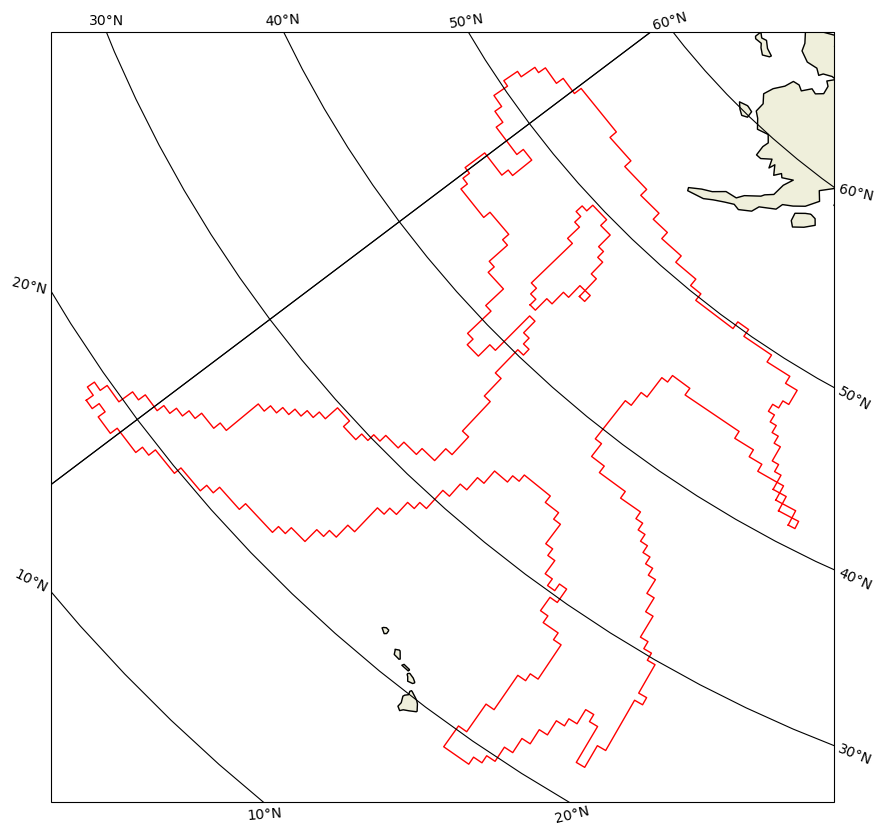

In [148]:
# dateline

AR = { "_id" : "2000.01.01.015.0_19", "timestamp" : ISODate("2000-01-01T15:00:00Z"), "raster" : [ [ 177.5, 18.5, [ 250.15028381347656 ] ], [ 178.75, 18.5, [ 250.6803436279297 ] ], [ 179.375, 18.5, [ 251.41879272460938 ] ], [ -180, 19, [ 293.031982421875 ] ], [ -179.375, 19, [ 283.8446350097656 ] ], [ -178.75, 19, [ 259.4346923828125 ] ], [ -151.875, 19, [ 261.60516357421875 ] ], [ -151.25, 19, [ 265.21051025390625 ] ], [ -150.625, 19, [ 254.53314208984375 ] ], [ 176.875, 19, [ 251.98753356933594 ] ], [ 177.5, 19, [ 270.9424133300781 ] ], [ 178.125, 19, [ 281.0899353027344 ] ], [ 178.75, 19, [ 282.9179992675781 ] ], [ 179.375, 19, [ 288.9736328125 ] ], [ -180, 19.5, [ 309.6210021972656 ] ], [ -179.375, 19.5, [ 312.8805847167969 ] ], [ -178.75, 19.5, [ 299.8413391113281 ] ], [ -178.125, 19.5, [ 272.87127685546875 ] ], [ -151.875, 19.5, [ 268.4871826171875 ] ], [ -151.25, 19.5, [ 284.867919921875 ] ], [ -150.625, 19.5, [ 275.13482666015625 ] ], [ -150, 19.5, [ 261.1654357910156 ] ], [ 177.5, 19.5, [ 255.70704650878906 ] ], [ 178.125, 19.5, [ 277.3118896484375 ] ], [ 178.75, 19.5, [ 291.1916198730469 ] ], [ 179.375, 19.5, [ 298.2720031738281 ] ], [ -180, 20, [ 292.1121520996094 ] ], [ -179.375, 20, [ 320.1253356933594 ] ], [ -178.75, 20, [ 332.5336608886719 ] ], [ -178.125, 20, [ 312.74737548828125 ] ], [ -177.5, 20, [ 289.1033935546875 ] ], [ -176.875, 20, [ 267.5296936035156 ] ], [ -176.25, 20, [ 252.19517517089844 ] ], [ -151.875, 20, [ 257.63775634765625 ] ], [ -151.25, 20, [ 304.2802429199219 ] ], [ -150.625, 20, [ 294.43377685546875 ] ], [ -150, 20, [ 278.0151672363281 ] ], [ -149.375, 20, [ 251.17967224121094 ] ], [ 178.75, 20, [ 273.806640625 ] ], [ 179.375, 20, [ 282.86474609375 ] ], [ -180, 20.5, [ 277.43865966796875 ] ], [ -179.375, 20.5, [ 300.8349914550781 ] ], [ -178.75, 20.5, [ 344.3849792480469 ] ], [ -178.125, 20.5, [ 350.3796691894531 ] ], [ -177.5, 20.5, [ 329.2403869628906 ] ], [ -176.875, 20.5, [ 312.26702880859375 ] ], [ -176.25, 20.5, [ 302.4385070800781 ] ], [ -175.625, 20.5, [ 293.2881164550781 ] ], [ -175, 20.5, [ 274.56378173828125 ] ], [ -174.375, 20.5, [ 253.1526336669922 ] ], [ -151.25, 20.5, [ 309.4879455566406 ] ], [ -150.625, 20.5, [ 308.6403503417969 ] ], [ -150, 20.5, [ 290.4222106933594 ] ], [ -149.375, 20.5, [ 267.7597961425781 ] ], [ 178.75, 20.5, [ 253.78143310546875 ] ], [ 179.375, 20.5, [ 271.57965087890625 ] ], [ -180, 21, [ 270.7773742675781 ] ], [ -179.375, 21, [ 278.8551940917969 ] ], [ -178.75, 21, [ 310.8793029785156 ] ], [ -178.125, 21, [ 345.50341796875 ] ], [ -177.5, 21, [ 355.94512939453125 ] ], [ -176.875, 21, [ 358.8572082519531 ] ], [ -176.25, 21, [ 357.9355773925781 ] ], [ -175.625, 21, [ 348.9620361328125 ] ], [ -175, 21, [ 332.2098388671875 ] ], [ -174.375, 21, [ 311.0210266113281 ] ], [ -173.75, 21, [ 278.37628173828125 ] ], [ -151.25, 21, [ 290.3883056640625 ] ], [ -150.625, 21, [ 310.69952392578125 ] ], [ -150, 21, [ 293.6820373535156 ] ], [ -149.375, 21, [ 278.55706787109375 ] ], [ -148.75, 21, [ 254.26625061035156 ] ], [ 179.375, 21, [ 256.39691162109375 ] ], [ -179.375, 21.5, [ 266.21844482421875 ] ], [ -178.75, 21.5, [ 283.1163024902344 ] ], [ -178.125, 21.5, [ 298.15478515625 ] ], [ -177.5, 21.5, [ 332.1150207519531 ] ], [ -176.875, 21.5, [ 378.30230712890625 ] ], [ -176.25, 21.5, [ 406.7985534667969 ] ], [ -175.625, 21.5, [ 410.7805480957031 ] ], [ -175, 21.5, [ 400.40704345703125 ] ], [ -174.375, 21.5, [ 382.7171936035156 ] ], [ -173.75, 21.5, [ 343.7261657714844 ] ], [ -173.125, 21.5, [ 303.060546875 ] ], [ -172.5, 21.5, [ 276.78948974609375 ] ], [ -171.875, 21.5, [ 260.70489501953125 ] ], [ -151.25, 21.5, [ 269.7460632324219 ] ], [ -150.625, 21.5, [ 307.4856262207031 ] ], [ -150, 21.5, [ 296.39447021484375 ] ], [ -149.375, 21.5, [ 281.1073913574219 ] ], [ -148.75, 21.5, [ 266.0135192871094 ] ], [ -178.75, 22, [ 270.6233825683594 ] ], [ -178.125, 22, [ 279.3133239746094 ] ], [ -177.5, 22, [ 296.2474060058594 ] ], [ -176.875, 22, [ 349.44488525390625 ] ], [ -176.25, 22, [ 420.8349914550781 ] ], [ -175.625, 22, [ 461.9465026855469 ] ], [ -175, 22, [ 468.23858642578125 ] ], [ -174.375, 22, [ 454.57305908203125 ] ], [ -173.75, 22, [ 416.02581787109375 ] ], [ -173.125, 22, [ 371.70501708984375 ] ], [ -172.5, 22, [ 334.6139831542969 ] ], [ -171.875, 22, [ 309.9179992675781 ] ], [ -171.25, 22, [ 287.4729309082031 ] ], [ -170.625, 22, [ 276.7305603027344 ] ], [ -170, 22, [ 271.1104431152344 ] ], [ -169.375, 22, [ 254.86068725585938 ] ], [ -151.25, 22, [ 255.5394287109375 ] ], [ -150.625, 22, [ 300.80194091796875 ] ], [ -150, 22, [ 301.8999328613281 ] ], [ -149.375, 22, [ 280.3087158203125 ] ], [ -148.75, 22, [ 277.5882873535156 ] ], [ -148.125, 22, [ 261.4954833984375 ] ], [ -178.125, 22.5, [ 262.5969543457031 ] ], [ -177.5, 22.5, [ 281.57171630859375 ] ], [ -176.875, 22.5, [ 314.53314208984375 ] ], [ -176.25, 22.5, [ 389.2616271972656 ] ], [ -175.625, 22.5, [ 474.61761474609375 ] ], [ -175, 22.5, [ 518.7314453125 ] ], [ -174.375, 22.5, [ 516.7386474609375 ] ], [ -173.75, 22.5, [ 482.739990234375 ] ], [ -173.125, 22.5, [ 444.7751770019531 ] ], [ -172.5, 22.5, [ 405.5906066894531 ] ], [ -171.875, 22.5, [ 367.4473876953125 ] ], [ -171.25, 22.5, [ 337.3552551269531 ] ], [ -170.625, 22.5, [ 325.2522888183594 ] ], [ -170, 22.5, [ 320.28271484375 ] ], [ -169.375, 22.5, [ 308.38482666015625 ] ], [ -168.75, 22.5, [ 282.72515869140625 ] ], [ -150.625, 22.5, [ 292.00970458984375 ] ], [ -150, 22.5, [ 309.8160705566406 ] ], [ -149.375, 22.5, [ 287.3738708496094 ] ], [ -148.75, 22.5, [ 287.63482666015625 ] ], [ -148.125, 22.5, [ 276.1490783691406 ] ], [ -144.375, 22.5, [ 268.61004638671875 ] ], [ -177.5, 23, [ 262.6371154785156 ] ], [ -176.875, 23, [ 280.339111328125 ] ], [ -176.25, 23, [ 318.6004333496094 ] ], [ -175.625, 23, [ 414.1837158203125 ] ], [ -175, 23, [ 512.3202514648438 ] ], [ -174.375, 23, [ 540.0431518554688 ] ], [ -173.75, 23, [ 512.2594604492188 ] ], [ -173.125, 23, [ 474.65869140625 ] ], [ -172.5, 23, [ 447.3084411621094 ] ], [ -171.875, 23, [ 420.4066467285156 ] ], [ -171.25, 23, [ 394.55413818359375 ] ], [ -170.625, 23, [ 376.4790344238281 ] ], [ -170, 23, [ 366.4235534667969 ] ], [ -169.375, 23, [ 356.7033996582031 ] ], [ -168.75, 23, [ 332.9944763183594 ] ], [ -168.125, 23, [ 299.21038818359375 ] ], [ -167.5, 23, [ 250.58575439453125 ] ], [ -150.625, 23, [ 280.9906921386719 ] ], [ -150, 23, [ 308.3890686035156 ] ], [ -149.375, 23, [ 299.1947937011719 ] ], [ -148.75, 23, [ 297.9587097167969 ] ], [ -148.125, 23, [ 292.7867736816406 ] ], [ -147.5, 23, [ 251.6766815185547 ] ], [ -144.375, 23, [ 277.43902587890625 ] ], [ -176.25, 23.5, [ 258.19586181640625 ] ], [ -175.625, 23.5, [ 312.3003234863281 ] ], [ -175, 23.5, [ 415.11651611328125 ] ], [ -174.375, 23.5, [ 479.31939697265625 ] ], [ -173.75, 23.5, [ 488.2897644042969 ] ], [ -173.125, 23.5, [ 458.0863037109375 ] ], [ -172.5, 23.5, [ 422.2972106933594 ] ], [ -171.875, 23.5, [ 411.6903076171875 ] ], [ -171.25, 23.5, [ 417.49151611328125 ] ], [ -170.625, 23.5, [ 413.9166259765625 ] ], [ -170, 23.5, [ 404.3842468261719 ] ], [ -169.375, 23.5, [ 394.8011474609375 ] ], [ -168.75, 23.5, [ 375.2220458984375 ] ], [ -168.125, 23.5, [ 344.1070251464844 ] ], [ -167.5, 23.5, [ 299.5015563964844 ] ], [ -150.625, 23.5, [ 271.9466247558594 ] ], [ -150, 23.5, [ 296.2286682128906 ] ], [ -149.375, 23.5, [ 307.8836975097656 ] ], [ -148.75, 23.5, [ 314.35906982421875 ] ], [ -148.125, 23.5, [ 315.3174133300781 ] ], [ -147.5, 23.5, [ 273.990966796875 ] ], [ -144.375, 23.5, [ 288.2809753417969 ] ], [ -175.625, 24, [ 269.68194580078125 ] ], [ -175, 24, [ 325.9351806640625 ] ], [ -174.375, 24, [ 374.0011291503906 ] ], [ -173.75, 24, [ 421.2396240234375 ] ], [ -173.125, 24, [ 428.399658203125 ] ], [ -172.5, 24, [ 397.1723937988281 ] ], [ -171.875, 24, [ 376.439453125 ] ], [ -171.25, 24, [ 391.41326904296875 ] ], [ -170.625, 24, [ 415.3750305175781 ] ], [ -170, 24, [ 423.6916198730469 ] ], [ -169.375, 24, [ 424.35577392578125 ] ], [ -168.75, 24, [ 413.6292419433594 ] ], [ -168.125, 24, [ 386.89593505859375 ] ], [ -167.5, 24, [ 345.3414611816406 ] ], [ -166.875, 24, [ 292.46539306640625 ] ], [ -150.625, 24, [ 265.3621826171875 ] ], [ -150, 24, [ 288.3321533203125 ] ], [ -149.375, 24, [ 306.6441650390625 ] ], [ -148.75, 24, [ 334.5928039550781 ] ], [ -148.125, 24, [ 343.26617431640625 ] ], [ -147.5, 24, [ 301.9056396484375 ] ], [ -146.875, 24, [ 264.3302917480469 ] ], [ -144.375, 24, [ 318.2694396972656 ] ], [ -143.75, 24, [ 262.8103332519531 ] ], [ -175.625, 24.5, [ 270.4185791015625 ] ], [ -175, 24.5, [ 303.8640441894531 ] ], [ -174.375, 24.5, [ 326.3589782714844 ] ], [ -173.75, 24.5, [ 366.1595153808594 ] ], [ -173.125, 24.5, [ 399.88214111328125 ] ], [ -172.5, 24.5, [ 393.4975280761719 ] ], [ -171.875, 24.5, [ 370.8951110839844 ] ], [ -171.25, 24.5, [ 365.0255126953125 ] ], [ -170.625, 24.5, [ 394.1219177246094 ] ], [ -170, 24.5, [ 428.6933898925781 ] ], [ -169.375, 24.5, [ 444.6378479003906 ] ], [ -168.75, 24.5, [ 441.805419921875 ] ], [ -168.125, 24.5, [ 419.22357177734375 ] ], [ -167.5, 24.5, [ 382.76629638671875 ] ], [ -166.875, 24.5, [ 330.4889221191406 ] ], [ -166.25, 24.5, [ 273.98907470703125 ] ], [ -150.625, 24.5, [ 250.74386596679688 ] ], [ -150, 24.5, [ 278.53863525390625 ] ], [ -149.375, 24.5, [ 299.82806396484375 ] ], [ -148.75, 24.5, [ 354.0762634277344 ] ], [ -148.125, 24.5, [ 381.5871276855469 ] ], [ -147.5, 24.5, [ 331.8304138183594 ] ], [ -146.875, 24.5, [ 288.92767333984375 ] ], [ -146.25, 24.5, [ 252.67184448242188 ] ], [ -144.375, 24.5, [ 328.86700439453125 ] ], [ -143.75, 24.5, [ 297.244873046875 ] ], [ -175.625, 25, [ 261.7740173339844 ] ], [ -175, 25, [ 288.5609436035156 ] ], [ -174.375, 25, [ 309.90740966796875 ] ], [ -173.75, 25, [ 348.5529479980469 ] ], [ -173.125, 25, [ 376.39068603515625 ] ], [ -172.5, 25, [ 391.1029968261719 ] ], [ -171.875, 25, [ 384.1158142089844 ] ], [ -171.25, 25, [ 368.9164733886719 ] ], [ -170.625, 25, [ 378.166015625 ] ], [ -170, 25, [ 419.7832336425781 ] ], [ -169.375, 25, [ 458.3156433105469 ] ], [ -168.75, 25, [ 462.923583984375 ] ], [ -168.125, 25, [ 443.00408935546875 ] ], [ -167.5, 25, [ 411.9670715332031 ] ], [ -166.875, 25, [ 361.7764587402344 ] ], [ -166.25, 25, [ 299.2002868652344 ] ], [ -150, 25, [ 261.6039733886719 ] ], [ -149.375, 25, [ 283.4462585449219 ] ], [ -148.75, 25, [ 354.20953369140625 ] ], [ -148.125, 25, [ 401.9805908203125 ] ], [ -147.5, 25, [ 355.7184143066406 ] ], [ -146.875, 25, [ 310.12841796875 ] ], [ -146.25, 25, [ 266.4176940917969 ] ], [ -145, 25, [ 271.63543701171875 ] ], [ -144.375, 25, [ 323.0977783203125 ] ], [ -143.75, 25, [ 314.5491943359375 ] ], [ -175.625, 25.5, [ 254.86907958984375 ] ], [ -175, 25.5, [ 273.6289978027344 ] ], [ -174.375, 25.5, [ 284.0345764160156 ] ], [ -173.75, 25.5, [ 311.53887939453125 ] ], [ -173.125, 25.5, [ 339.0031433105469 ] ], [ -172.5, 25.5, [ 365.1854248046875 ] ], [ -171.875, 25.5, [ 381.719970703125 ] ], [ -171.25, 25.5, [ 386.0516357421875 ] ], [ -170.625, 25.5, [ 385.8586120605469 ] ], [ -170, 25.5, [ 410.7217712402344 ] ], [ -169.375, 25.5, [ 459.60040283203125 ] ], [ -168.75, 25.5, [ 475.5343017578125 ] ], [ -168.125, 25.5, [ 461.49591064453125 ] ], [ -167.5, 25.5, [ 438.10565185546875 ] ], [ -166.875, 25.5, [ 392.96051025390625 ] ], [ -166.25, 25.5, [ 328.73126220703125 ] ], [ -165.625, 25.5, [ 263.3931579589844 ] ], [ -149.375, 25.5, [ 272.06829833984375 ] ], [ -148.75, 25.5, [ 344.2513732910156 ] ], [ -148.125, 25.5, [ 399.3551940917969 ] ], [ -147.5, 25.5, [ 365.87396240234375 ] ], [ -146.875, 25.5, [ 333.8699951171875 ] ], [ -146.25, 25.5, [ 266.28485107421875 ] ], [ -145.625, 25.5, [ 254.978759765625 ] ], [ -145, 25.5, [ 317.4354553222656 ] ], [ -144.375, 25.5, [ 303.0138854980469 ] ], [ -143.75, 25.5, [ 294.48626708984375 ] ], [ -175.625, 26, [ 251.90052795410156 ] ], [ -175, 26, [ 274.20135498046875 ] ], [ -174.375, 26, [ 280.2394104003906 ] ], [ -173.75, 26, [ 281.3600158691406 ] ], [ -173.125, 26, [ 296.13262939453125 ] ], [ -172.5, 26, [ 324.83868408203125 ] ], [ -171.875, 26, [ 354.6977233886719 ] ], [ -171.25, 26, [ 378.104736328125 ] ], [ -170.625, 26, [ 391.4190979003906 ] ], [ -170, 26, [ 405.0716857910156 ] ], [ -169.375, 26, [ 449.935791015625 ] ], [ -168.75, 26, [ 479.31201171875 ] ], [ -168.125, 26, [ 476.0684814453125 ] ], [ -167.5, 26, [ 460.165283203125 ] ], [ -166.875, 26, [ 420.7837829589844 ] ], [ -166.25, 26, [ 353.61260986328125 ] ], [ -165.625, 26, [ 279.61505126953125 ] ], [ -149.375, 26, [ 276.4453125 ] ], [ -148.75, 26, [ 350.39190673828125 ] ], [ -148.125, 26, [ 388.82781982421875 ] ], [ -147.5, 26, [ 368.07769775390625 ] ], [ -146.875, 26, [ 334.1956787109375 ] ], [ -146.25, 26, [ 266.7498779296875 ] ], [ -145.625, 26, [ 326.94451904296875 ] ], [ -145, 26, [ 344.2198181152344 ] ], [ -144.375, 26, [ 278.1050109863281 ] ], [ -143.75, 26, [ 272.0675354003906 ] ], [ -175, 26.5, [ 275.2425231933594 ] ], [ -174.375, 26.5, [ 293.4348449707031 ] ], [ -173.75, 26.5, [ 290.4642639160156 ] ], [ -173.125, 26.5, [ 284.0580749511719 ] ], [ -172.5, 26.5, [ 302.0638427734375 ] ], [ -171.875, 26.5, [ 329.57501220703125 ] ], [ -171.25, 26.5, [ 352.51666259765625 ] ], [ -170.625, 26.5, [ 372.51995849609375 ] ], [ -170, 26.5, [ 387.8228454589844 ] ], [ -169.375, 26.5, [ 427.71807861328125 ] ], [ -168.75, 26.5, [ 475.9443054199219 ] ], [ -168.125, 26.5, [ 487.37982177734375 ] ], [ -167.5, 26.5, [ 476.4139099121094 ] ], [ -166.875, 26.5, [ 441.5762023925781 ] ], [ -166.25, 26.5, [ 370.25238037109375 ] ], [ -165.625, 26.5, [ 292.7867126464844 ] ], [ -149.375, 26.5, [ 298.3304748535156 ] ], [ -148.75, 26.5, [ 364.8375244140625 ] ], [ -148.125, 26.5, [ 380.8713073730469 ] ], [ -147.5, 26.5, [ 349.46893310546875 ] ], [ -146.875, 26.5, [ 296.2416076660156 ] ], [ -146.25, 26.5, [ 293.1259460449219 ] ], [ -145.625, 26.5, [ 404.0242004394531 ] ], [ -145, 26.5, [ 351.5843505859375 ] ], [ -144.375, 26.5, [ 275.9670715332031 ] ], [ -143.75, 26.5, [ 273.2755126953125 ] ], [ -174.375, 27, [ 293.0661315917969 ] ], [ -173.75, 27, [ 309.96270751953125 ] ], [ -173.125, 27, [ 295.87225341796875 ] ], [ -172.5, 27, [ 293.34539794921875 ] ], [ -171.875, 27, [ 311.5469970703125 ] ], [ -171.25, 27, [ 333.50616455078125 ] ], [ -170.625, 27, [ 358.3367614746094 ] ], [ -170, 27, [ 373.57745361328125 ] ], [ -169.375, 27, [ 391.7484436035156 ] ], [ -168.75, 27, [ 446.31524658203125 ] ], [ -168.125, 27, [ 487.447509765625 ] ], [ -167.5, 27, [ 481.9969787597656 ] ], [ -166.875, 27, [ 448.3406677246094 ] ], [ -166.25, 27, [ 386.40655517578125 ] ], [ -165.625, 27, [ 312.0434265136719 ] ], [ -149.375, 27, [ 323.7165832519531 ] ], [ -148.75, 27, [ 368.5904541015625 ] ], [ -148.125, 27, [ 360.0682678222656 ] ], [ -147.5, 27, [ 314.36309814453125 ] ], [ -146.875, 27, [ 283.0621337890625 ] ], [ -146.25, 27, [ 353.5016784667969 ] ], [ -145.625, 27, [ 471.85565185546875 ] ], [ -145, 27, [ 354.8355712890625 ] ], [ -144.375, 27, [ 291.6346130371094 ] ], [ -143.75, 27, [ 285.1991882324219 ] ], [ -173.75, 27.5, [ 296.4679870605469 ] ], [ -173.125, 27.5, [ 306.33203125 ] ], [ -172.5, 27.5, [ 301.0307922363281 ] ], [ -171.875, 27.5, [ 305.2571716308594 ] ], [ -171.25, 27.5, [ 321.9672546386719 ] ], [ -170.625, 27.5, [ 353.34600830078125 ] ], [ -170, 27.5, [ 371.6166687011719 ] ], [ -169.375, 27.5, [ 373.5710754394531 ] ], [ -168.75, 27.5, [ 410.34527587890625 ] ], [ -168.125, 27.5, [ 463.765625 ] ], [ -167.5, 27.5, [ 480.2088623046875 ] ], [ -166.875, 27.5, [ 455.9573974609375 ] ], [ -166.25, 27.5, [ 406.4976806640625 ] ], [ -165.625, 27.5, [ 340.4210510253906 ] ], [ -165, 27.5, [ 275.731201171875 ] ], [ -149.375, 27.5, [ 326.9170837402344 ] ], [ -148.75, 27.5, [ 354.7621154785156 ] ], [ -148.125, 27.5, [ 340.0018310546875 ] ], [ -147.5, 27.5, [ 300.5780944824219 ] ], [ -146.875, 27.5, [ 293.15118408203125 ] ], [ -146.25, 27.5, [ 468.7065734863281 ] ], [ -145.625, 27.5, [ 502.027587890625 ] ], [ -145, 27.5, [ 352.4371032714844 ] ], [ -144.375, 27.5, [ 302.6554870605469 ] ], [ -143.75, 27.5, [ 294.85467529296875 ] ], [ -143.125, 27.5, [ 252.00286865234375 ] ], [ -173.125, 28, [ 289.0121765136719 ] ], [ -172.5, 28, [ 299.9753723144531 ] ], [ -171.875, 28, [ 303.59771728515625 ] ], [ -171.25, 28, [ 313.2183532714844 ] ], [ -170.625, 28, [ 343.8556213378906 ] ], [ -170, 28, [ 364.44085693359375 ] ], [ -169.375, 28, [ 369.1388854980469 ] ], [ -168.75, 28, [ 400.15765380859375 ] ], [ -168.125, 28, [ 439.7874450683594 ] ], [ -167.5, 28, [ 458.8252868652344 ] ], [ -166.875, 28, [ 460.1015319824219 ] ], [ -166.25, 28, [ 430.6519470214844 ] ], [ -165.625, 28, [ 383.691650390625 ] ], [ -165, 28, [ 327.5527038574219 ] ], [ -164.375, 28, [ 272.9190673828125 ] ], [ -150, 28, [ 263.1011962890625 ] ], [ -149.375, 28, [ 319.8927307128906 ] ], [ -148.75, 28, [ 346.98175048828125 ] ], [ -148.125, 28, [ 352.93023681640625 ] ], [ -147.5, 28, [ 323.8833923339844 ] ], [ -146.875, 28, [ 374.22381591796875 ] ], [ -146.25, 28, [ 551.7201538085938 ] ], [ -145.625, 28, [ 435.4632263183594 ] ], [ -145, 28, [ 344.38226318359375 ] ], [ -144.375, 28, [ 314.17364501953125 ] ], [ -143.75, 28, [ 302.86676025390625 ] ], [ -172.5, 28.5, [ 274.4641418457031 ] ], [ -171.875, 28.5, [ 289.90399169921875 ] ], [ -171.25, 28.5, [ 295.3079833984375 ] ], [ -170.625, 28.5, [ 318.2036437988281 ] ], [ -170, 28.5, [ 341.8882141113281 ] ], [ -169.375, 28.5, [ 354.05059814453125 ] ], [ -168.75, 28.5, [ 389.5956115722656 ] ], [ -168.125, 28.5, [ 425.7552185058594 ] ], [ -167.5, 28.5, [ 433.887939453125 ] ], [ -166.875, 28.5, [ 452.7484436035156 ] ], [ -166.25, 28.5, [ 456.6013488769531 ] ], [ -165.625, 28.5, [ 436.60223388671875 ] ], [ -165, 28.5, [ 381.31494140625 ] ], [ -164.375, 28.5, [ 310.4669189453125 ] ], [ -151.25, 28.5, [ 257.94696044921875 ] ], [ -150.625, 28.5, [ 261.0885009765625 ] ], [ -150, 28.5, [ 284.0252990722656 ] ], [ -149.375, 28.5, [ 314.7982177734375 ] ], [ -148.75, 28.5, [ 349.9667053222656 ] ], [ -148.125, 28.5, [ 394.3165283203125 ] ], [ -147.5, 28.5, [ 384.14007568359375 ] ], [ -146.875, 28.5, [ 471.19781494140625 ] ], [ -146.25, 28.5, [ 499.61785888671875 ] ], [ -145.625, 28.5, [ 384.7399597167969 ] ], [ -145, 28.5, [ 346.0556335449219 ] ], [ -144.375, 28.5, [ 341.5255432128906 ] ], [ -143.75, 28.5, [ 304.0948181152344 ] ], [ -171.875, 29, [ 277.59820556640625 ] ], [ -171.25, 29, [ 278.5743713378906 ] ], [ -170.625, 29, [ 273.587646484375 ] ], [ -170, 29, [ 292.2330627441406 ] ], [ -169.375, 29, [ 317.89202880859375 ] ], [ -168.75, 29, [ 362.2225341796875 ] ], [ -168.125, 29, [ 395.46966552734375 ] ], [ -167.5, 29, [ 411.3296203613281 ] ], [ -166.875, 29, [ 436.3596496582031 ] ], [ -166.25, 29, [ 469.8769836425781 ] ], [ -165.625, 29, [ 476.0150451660156 ] ], [ -165, 29, [ 425.57366943359375 ] ], [ -164.375, 29, [ 350.5703430175781 ] ], [ -163.75, 29, [ 281.9258117675781 ] ], [ -151.875, 29, [ 258.8472900390625 ] ], [ -151.25, 29, [ 279.77423095703125 ] ], [ -150.625, 29, [ 284.43865966796875 ] ], [ -150, 29, [ 300.4429016113281 ] ], [ -149.375, 29, [ 311.9783020019531 ] ], [ -148.75, 29, [ 345.26763916015625 ] ], [ -148.125, 29, [ 428.1009826660156 ] ], [ -147.5, 29, [ 437.6731872558594 ] ], [ -146.875, 29, [ 492.7386169433594 ] ], [ -146.25, 29, [ 443.3116455078125 ] ], [ -145.625, 29, [ 391.57147216796875 ] ], [ -145, 29, [ 353.4749450683594 ] ], [ -144.375, 29, [ 357.5648498535156 ] ], [ -143.75, 29, [ 286.5190734863281 ] ], [ -171.875, 29.5, [ 250.87498474121094 ] ], [ -171.25, 29.5, [ 269.8409118652344 ] ], [ -169.375, 29.5, [ 266.0363464355469 ] ], [ -168.75, 29.5, [ 320.0070495605469 ] ], [ -168.125, 29.5, [ 358.370361328125 ] ], [ -167.5, 29.5, [ 377.2230224609375 ] ], [ -166.875, 29.5, [ 399.4769287109375 ] ], [ -166.25, 29.5, [ 450.48577880859375 ] ], [ -165.625, 29.5, [ 480.93072509765625 ] ], [ -165, 29.5, [ 450.0263977050781 ] ], [ -164.375, 29.5, [ 389.3800964355469 ] ], [ -163.75, 29.5, [ 321.00701904296875 ] ], [ -163.125, 29.5, [ 261.9559326171875 ] ], [ -151.875, 29.5, [ 266.69989013671875 ] ], [ -151.25, 29.5, [ 266.0386657714844 ] ], [ -150.625, 29.5, [ 294.5181579589844 ] ], [ -150, 29.5, [ 297.47015380859375 ] ], [ -149.375, 29.5, [ 299.7999572753906 ] ], [ -148.75, 29.5, [ 328.6976318359375 ] ], [ -148.125, 29.5, [ 420.9255676269531 ] ], [ -147.5, 29.5, [ 458.8916931152344 ] ], [ -146.875, 29.5, [ 494.1732482910156 ] ], [ -146.25, 29.5, [ 463.1905517578125 ] ], [ -145.625, 29.5, [ 399.31109619140625 ] ], [ -145, 29.5, [ 347.2944030761719 ] ], [ -144.375, 29.5, [ 327.5343017578125 ] ], [ -143.75, 29.5, [ 255.98410034179688 ] ], [ -168.75, 30, [ 270.0000305175781 ] ], [ -168.125, 30, [ 314.88885498046875 ] ], [ -167.5, 30, [ 336.640380859375 ] ], [ -166.875, 30, [ 351.11602783203125 ] ], [ -166.25, 30, [ 402.20916748046875 ] ], [ -165.625, 30, [ 450.20819091796875 ] ], [ -165, 30, [ 453.4372863769531 ] ], [ -164.375, 30, [ 417.15313720703125 ] ], [ -163.75, 30, [ 359.3575744628906 ] ], [ -163.125, 30, [ 291.7281188964844 ] ], [ -151.25, 30, [ 268.5093688964844 ] ], [ -150.625, 30, [ 282.21380615234375 ] ], [ -150, 30, [ 282.9237976074219 ] ], [ -149.375, 30, [ 290.6734313964844 ] ], [ -148.75, 30, [ 323.32330322265625 ] ], [ -148.125, 30, [ 399.89447021484375 ] ], [ -147.5, 30, [ 497.9112548828125 ] ], [ -146.875, 30, [ 526.42236328125 ] ], [ -146.25, 30, [ 487.6964416503906 ] ], [ -145.625, 30, [ 401.944580078125 ] ], [ -145, 30, [ 318.4321594238281 ] ], [ -144.375, 30, [ 269.50262451171875 ] ], [ -168.125, 30.5, [ 255.64674377441406 ] ], [ -167.5, 30.5, [ 285.9106750488281 ] ], [ -166.875, 30.5, [ 304.9469299316406 ] ], [ -166.25, 30.5, [ 344.8244934082031 ] ], [ -165.625, 30.5, [ 405.2745361328125 ] ], [ -165, 30.5, [ 443.74884033203125 ] ], [ -164.375, 30.5, [ 430.6938781738281 ] ], [ -163.75, 30.5, [ 385.2855224609375 ] ], [ -163.125, 30.5, [ 313.019775390625 ] ], [ -152.5, 30.5, [ 256.2571716308594 ] ], [ -151.25, 30.5, [ 261.3083190917969 ] ], [ -150, 30.5, [ 276.2820739746094 ] ], [ -149.375, 30.5, [ 308.33697509765625 ] ], [ -148.75, 30.5, [ 354.1143493652344 ] ], [ -148.125, 30.5, [ 440.2599182128906 ] ], [ -147.5, 30.5, [ 586.9462890625 ] ], [ -146.875, 30.5, [ 569.3985595703125 ] ], [ -146.25, 30.5, [ 478.9588317871094 ] ], [ -145.625, 30.5, [ 379.62225341796875 ] ], [ -145, 30.5, [ 278.9445495605469 ] ], [ -166.875, 31, [ 252.5677490234375 ] ], [ -166.25, 31, [ 287.3727722167969 ] ], [ -165.625, 31, [ 349.16302490234375 ] ], [ -165, 31, [ 412.7909851074219 ] ], [ -164.375, 31, [ 419.99267578125 ] ], [ -163.75, 31, [ 390.1648254394531 ] ], [ -163.125, 31, [ 332.1885681152344 ] ], [ -162.5, 31, [ 267.721435546875 ] ], [ -153.125, 31, [ 264.79541015625 ] ], [ -152.5, 31, [ 267.7188720703125 ] ], [ -151.875, 31, [ 257.20281982421875 ] ], [ -150, 31, [ 315.55859375 ] ], [ -149.375, 31, [ 379.34014892578125 ] ], [ -148.75, 31, [ 445.5709228515625 ] ], [ -148.125, 31, [ 589.1531372070312 ] ], [ -147.5, 31, [ 678.37451171875 ] ], [ -146.875, 31, [ 560.1974487304688 ] ], [ -146.25, 31, [ 433.54925537109375 ] ], [ -145.625, 31, [ 319.8974304199219 ] ], [ -165.625, 31.5, [ 268.4134826660156 ] ], [ -165, 31.5, [ 339.2330627441406 ] ], [ -164.375, 31.5, [ 373.91522216796875 ] ], [ -163.75, 31.5, [ 378.2344970703125 ] ], [ -163.125, 31.5, [ 352.3831481933594 ] ], [ -162.5, 31.5, [ 302.5885314941406 ] ], [ -153.125, 31.5, [ 286.7328796386719 ] ], [ -152.5, 31.5, [ 285.7990417480469 ] ], [ -151.875, 31.5, [ 271.2881774902344 ] ], [ -151.25, 31.5, [ 258.4564514160156 ] ], [ -150.625, 31.5, [ 347.73638916015625 ] ], [ -150, 31.5, [ 445.4236145019531 ] ], [ -149.375, 31.5, [ 519.5430908203125 ] ], [ -148.75, 31.5, [ 644.4158935546875 ] ], [ -148.125, 31.5, [ 712.9085693359375 ] ], [ -147.5, 31.5, [ 652.16796875 ] ], [ -146.875, 31.5, [ 490.2516174316406 ] ], [ -146.25, 31.5, [ 375.70404052734375 ] ], [ -145.625, 31.5, [ 281.5643310546875 ] ], [ -164.375, 32, [ 317.0782470703125 ] ], [ -163.75, 32, [ 361.26226806640625 ] ], [ -163.125, 32, [ 368.9408874511719 ] ], [ -162.5, 32, [ 336.28387451171875 ] ], [ -161.875, 32, [ 253.20851135253906 ] ], [ -153.75, 32, [ 296.20745849609375 ] ], [ -153.125, 32, [ 319.45458984375 ] ], [ -152.5, 32, [ 321.4644470214844 ] ], [ -151.875, 32, [ 329.9294128417969 ] ], [ -151.25, 32, [ 406.90594482421875 ] ], [ -150.625, 32, [ 564.3911743164062 ] ], [ -150, 32, [ 612.6433715820312 ] ], [ -149.375, 32, [ 645.3358154296875 ] ], [ -148.75, 32, [ 704.840576171875 ] ], [ -148.125, 32, [ 657.2460327148438 ] ], [ -147.5, 32, [ 546.9686279296875 ] ], [ -146.875, 32, [ 423.8535461425781 ] ], [ -146.25, 32, [ 334.25408935546875 ] ], [ -145.625, 32, [ 262.607666015625 ] ], [ -164.375, 32.5, [ 274.88323974609375 ] ], [ -163.75, 32.5, [ 343.82183837890625 ] ], [ -163.125, 32.5, [ 375.35809326171875 ] ], [ -162.5, 32.5, [ 365.6055603027344 ] ], [ -161.875, 32.5, [ 280.59161376953125 ] ], [ -154.375, 32.5, [ 254.5977325439453 ] ], [ -153.75, 32.5, [ 340.4662780761719 ] ], [ -153.125, 32.5, [ 356.7987060546875 ] ], [ -152.5, 32.5, [ 366.37548828125 ] ], [ -151.875, 32.5, [ 394.9576721191406 ] ], [ -151.25, 32.5, [ 493.0010070800781 ] ], [ -150.625, 32.5, [ 599.3217163085938 ] ], [ -150, 32.5, [ 598.0471801757812 ] ], [ -149.375, 32.5, [ 601.8291625976562 ] ], [ -148.75, 32.5, [ 589.91650390625 ] ], [ -148.125, 32.5, [ 543.9746704101562 ] ], [ -147.5, 32.5, [ 463.4004821777344 ] ], [ -146.875, 32.5, [ 375.5939636230469 ] ], [ -146.25, 32.5, [ 300.2862243652344 ] ], [ -163.75, 33, [ 328.0369873046875 ] ], [ -163.125, 33, [ 381.23284912109375 ] ], [ -162.5, 33, [ 392.45074462890625 ] ], [ -161.875, 33, [ 307.8409118652344 ] ], [ -161.25, 33, [ 252.79583740234375 ] ], [ -154.375, 33, [ 286.1598205566406 ] ], [ -153.75, 33, [ 364.7771911621094 ] ], [ -153.125, 33, [ 389.0302734375 ] ], [ -152.5, 33, [ 390.1636657714844 ] ], [ -151.875, 33, [ 405.4507141113281 ] ], [ -151.25, 33, [ 450.4045715332031 ] ], [ -150.625, 33, [ 492.2241516113281 ] ], [ -150, 33, [ 524.4154663085938 ] ], [ -149.375, 33, [ 521.4095458984375 ] ], [ -148.75, 33, [ 525.280517578125 ] ], [ -148.125, 33, [ 480.04046630859375 ] ], [ -147.5, 33, [ 399.3570251464844 ] ], [ -146.875, 33, [ 335.1676025390625 ] ], [ -146.25, 33, [ 272.5220947265625 ] ], [ -163.75, 33.5, [ 310.8291931152344 ] ], [ -163.125, 33.5, [ 385.95574951171875 ] ], [ -162.5, 33.5, [ 416.07568359375 ] ], [ -161.875, 33.5, [ 337.1456604003906 ] ], [ -161.25, 33.5, [ 283.133056640625 ] ], [ -154.375, 33.5, [ 307.3590393066406 ] ], [ -153.75, 33.5, [ 381.4792785644531 ] ], [ -153.125, 33.5, [ 419.6358947753906 ] ], [ -152.5, 33.5, [ 417.1034851074219 ] ], [ -151.875, 33.5, [ 405.77178955078125 ] ], [ -151.25, 33.5, [ 421.7452087402344 ] ], [ -150.625, 33.5, [ 462.77325439453125 ] ], [ -150, 33.5, [ 506.37933349609375 ] ], [ -149.375, 33.5, [ 508.7347717285156 ] ], [ -148.75, 33.5, [ 491.0170593261719 ] ], [ -148.125, 33.5, [ 420.6967468261719 ] ], [ -147.5, 33.5, [ 358.0566711425781 ] ], [ -146.875, 33.5, [ 304.3324890136719 ] ], [ -163.75, 34, [ 308.7997741699219 ] ], [ -163.125, 34, [ 392.797119140625 ] ], [ -162.5, 34, [ 437.2950439453125 ] ], [ -161.875, 34, [ 370.5201110839844 ] ], [ -161.25, 34, [ 313.6670227050781 ] ], [ -160.625, 34, [ 282.3954162597656 ] ], [ -160, 34, [ 276.9757385253906 ] ], [ -155, 34, [ 268.80303955078125 ] ], [ -154.375, 34, [ 335.78759765625 ] ], [ -153.75, 34, [ 406.7265319824219 ] ], [ -153.125, 34, [ 453.5411376953125 ] ], [ -152.5, 34, [ 457.9942626953125 ] ], [ -151.875, 34, [ 438.6647033691406 ] ], [ -151.25, 34, [ 437.1188659667969 ] ], [ -150.625, 34, [ 466.10540771484375 ] ], [ -150, 34, [ 484.23760986328125 ] ], [ -149.375, 34, [ 468.31182861328125 ] ], [ -148.75, 34, [ 423.16790771484375 ] ], [ -148.125, 34, [ 366.6933288574219 ] ], [ -147.5, 34, [ 319.08624267578125 ] ], [ -146.875, 34, [ 250.5070037841797 ] ], [ -164.375, 34.5, [ 304.0082092285156 ] ], [ -163.75, 34.5, [ 360.5553283691406 ] ], [ -163.125, 34.5, [ 420.4644470214844 ] ], [ -162.5, 34.5, [ 463.7144775390625 ] ], [ -161.875, 34.5, [ 414.3451232910156 ] ], [ -161.25, 34.5, [ 346.9630126953125 ] ], [ -160.625, 34.5, [ 323.54461669921875 ] ], [ -160, 34.5, [ 315.6670227050781 ] ], [ -159.375, 34.5, [ 272.6698913574219 ] ], [ -156.25, 34.5, [ 254.61807250976562 ] ], [ -155.625, 34.5, [ 266.1461486816406 ] ], [ -155, 34.5, [ 307.2281494140625 ] ], [ -154.375, 34.5, [ 387.516845703125 ] ], [ -153.75, 34.5, [ 446.6313781738281 ] ], [ -153.125, 34.5, [ 476.0054016113281 ] ], [ -152.5, 34.5, [ 477.9339904785156 ] ], [ -151.875, 34.5, [ 454.1175842285156 ] ], [ -151.25, 34.5, [ 449.0022277832031 ] ], [ -150.625, 34.5, [ 449.4128723144531 ] ], [ -150, 34.5, [ 439.95794677734375 ] ], [ -149.375, 34.5, [ 416.794189453125 ] ], [ -148.75, 34.5, [ 370.30657958984375 ] ], [ -148.125, 34.5, [ 321.2907409667969 ] ], [ -147.5, 34.5, [ 260.2572326660156 ] ], [ -164.375, 35, [ 379.9918212890625 ] ], [ -163.75, 35, [ 453.4381103515625 ] ], [ -163.125, 35, [ 468.1622619628906 ] ], [ -162.5, 35, [ 507.2004699707031 ] ], [ -161.875, 35, [ 465.78717041015625 ] ], [ -161.25, 35, [ 384.54046630859375 ] ], [ -160.625, 35, [ 369.68524169921875 ] ], [ -160, 35, [ 355.9662780761719 ] ], [ -159.375, 35, [ 312.4007263183594 ] ], [ -158.75, 35, [ 285.41021728515625 ] ], [ -158.125, 35, [ 261.58935546875 ] ], [ -157.5, 35, [ 265.3471374511719 ] ], [ -156.875, 35, [ 278.8177490234375 ] ], [ -156.25, 35, [ 286.66900634765625 ] ], [ -155.625, 35, [ 296.2032470703125 ] ], [ -155, 35, [ 345.4227600097656 ] ], [ -154.375, 35, [ 427.6108093261719 ] ], [ -153.75, 35, [ 478.6982116699219 ] ], [ -153.125, 35, [ 487.4312438964844 ] ], [ -152.5, 35, [ 471.4397888183594 ] ], [ -151.875, 35, [ 442.9759521484375 ] ], [ -151.25, 35, [ 430.74908447265625 ] ], [ -150.625, 35, [ 424.9040832519531 ] ], [ -150, 35, [ 411.746826171875 ] ], [ -149.375, 35, [ 377.44293212890625 ] ], [ -148.75, 35, [ 323.7606201171875 ] ], [ -148.125, 35, [ 264.4410095214844 ] ], [ -164.375, 35.5, [ 477.77032470703125 ] ], [ -163.75, 35.5, [ 609.9427490234375 ] ], [ -163.125, 35.5, [ 550.5653686523438 ] ], [ -162.5, 35.5, [ 574.8544311523438 ] ], [ -161.875, 35.5, [ 503.6057434082031 ] ], [ -161.25, 35.5, [ 422.6819152832031 ] ], [ -160.625, 35.5, [ 415.8992614746094 ] ], [ -160, 35.5, [ 389.64202880859375 ] ], [ -159.375, 35.5, [ 351.2566833496094 ] ], [ -158.75, 35.5, [ 325.9115295410156 ] ], [ -158.125, 35.5, [ 299.1595458984375 ] ], [ -157.5, 35.5, [ 301.6393127441406 ] ], [ -156.875, 35.5, [ 307.7446594238281 ] ], [ -156.25, 35.5, [ 309.26806640625 ] ], [ -155.625, 35.5, [ 324.52142333984375 ] ], [ -155, 35.5, [ 364.04669189453125 ] ], [ -154.375, 35.5, [ 430.5449523925781 ] ], [ -153.75, 35.5, [ 476.3297424316406 ] ], [ -153.125, 35.5, [ 484.4908142089844 ] ], [ -152.5, 35.5, [ 458.88873291015625 ] ], [ -151.875, 35.5, [ 425.1852111816406 ] ], [ -151.25, 35.5, [ 403.9541015625 ] ], [ -150.625, 35.5, [ 386.3441467285156 ] ], [ -150, 35.5, [ 366.2971496582031 ] ], [ -149.375, 35.5, [ 324.68170166015625 ] ], [ -148.75, 35.5, [ 264.1338195800781 ] ], [ -164.375, 36, [ 546.03662109375 ] ], [ -163.75, 36, [ 731.6962280273438 ] ], [ -163.125, 36, [ 669.9241943359375 ] ], [ -162.5, 36, [ 624.7879638671875 ] ], [ -161.875, 36, [ 520.8612060546875 ] ], [ -161.25, 36, [ 461.0976257324219 ] ], [ -160.625, 36, [ 457.0389404296875 ] ], [ -160, 36, [ 418.3434143066406 ] ], [ -159.375, 36, [ 387.4341735839844 ] ], [ -158.75, 36, [ 362.62640380859375 ] ], [ -158.125, 36, [ 336.6695861816406 ] ], [ -157.5, 36, [ 333.1319885253906 ] ], [ -156.875, 36, [ 329.5060119628906 ] ], [ -156.25, 36, [ 327.2147521972656 ] ], [ -155.625, 36, [ 342.88629150390625 ] ], [ -155, 36, [ 366.8595886230469 ] ], [ -154.375, 36, [ 403.9397277832031 ] ], [ -153.75, 36, [ 435.8531799316406 ] ], [ -153.125, 36, [ 441.7993469238281 ] ], [ -152.5, 36, [ 419.3863830566406 ] ], [ -151.875, 36, [ 397.2130432128906 ] ], [ -151.25, 36, [ 378.94720458984375 ] ], [ -150.625, 36, [ 350.3265075683594 ] ], [ -150, 36, [ 319.4609375 ] ], [ -149.375, 36, [ 273.6798095703125 ] ], [ -164.375, 36.5, [ 443.44244384765625 ] ], [ -163.75, 36.5, [ 637.4069213867188 ] ], [ -163.125, 36.5, [ 681.85595703125 ] ], [ -162.5, 36.5, [ 622.0922241210938 ] ], [ -161.875, 36.5, [ 532.6250610351562 ] ], [ -161.25, 36.5, [ 498.198486328125 ] ], [ -160.625, 36.5, [ 488.0335693359375 ] ], [ -160, 36.5, [ 447.0804138183594 ] ], [ -159.375, 36.5, [ 421.3310852050781 ] ], [ -158.75, 36.5, [ 396.0338134765625 ] ], [ -158.125, 36.5, [ 369.94232177734375 ] ], [ -157.5, 36.5, [ 359.0122985839844 ] ], [ -156.875, 36.5, [ 345.58197021484375 ] ], [ -156.25, 36.5, [ 336.39453125 ] ], [ -155.625, 36.5, [ 340.6070556640625 ] ], [ -155, 36.5, [ 357.3087463378906 ] ], [ -154.375, 36.5, [ 376.9039306640625 ] ], [ -153.75, 36.5, [ 387.3310241699219 ] ], [ -153.125, 36.5, [ 385.9420471191406 ] ], [ -152.5, 36.5, [ 372.61572265625 ] ], [ -151.875, 36.5, [ 357.30078125 ] ], [ -151.25, 36.5, [ 343.4140625 ] ], [ -150.625, 36.5, [ 311.7010192871094 ] ], [ -150, 36.5, [ 275.46368408203125 ] ], [ -165, 37, [ 269.6441955566406 ] ], [ -164.375, 37, [ 350.3851318359375 ] ], [ -163.75, 37, [ 463.0090026855469 ] ], [ -163.125, 37, [ 573.8115234375 ] ], [ -162.5, 37, [ 592.5377197265625 ] ], [ -161.875, 37, [ 545.9276123046875 ] ], [ -161.25, 37, [ 521.0048828125 ] ], [ -160.625, 37, [ 510.236572265625 ] ], [ -160, 37, [ 474.7976989746094 ] ], [ -159.375, 37, [ 452.5060729980469 ] ], [ -158.75, 37, [ 424.7699279785156 ] ], [ -158.125, 37, [ 397.0555725097656 ] ], [ -157.5, 37, [ 375.9078063964844 ] ], [ -156.875, 37, [ 353.08721923828125 ] ], [ -156.25, 37, [ 335.5758361816406 ] ], [ -155.625, 37, [ 325.96929931640625 ] ], [ -155, 37, [ 334.35101318359375 ] ], [ -154.375, 37, [ 347.4947814941406 ] ], [ -153.75, 37, [ 351.010986328125 ] ], [ -153.125, 37, [ 342.3091735839844 ] ], [ -152.5, 37, [ 326.5409851074219 ] ], [ -151.875, 37, [ 302.9800720214844 ] ], [ -151.25, 37, [ 280.3968505859375 ] ], [ -150.625, 37, [ 250.65264892578125 ] ], [ -165, 37.5, [ 316.7688293457031 ] ], [ -164.375, 37.5, [ 351.8179016113281 ] ], [ -163.75, 37.5, [ 390.2170715332031 ] ], [ -163.125, 37.5, [ 490.0658264160156 ] ], [ -162.5, 37.5, [ 552.3746337890625 ] ], [ -161.875, 37.5, [ 546.470458984375 ] ], [ -161.25, 37.5, [ 537.217041015625 ] ], [ -160.625, 37.5, [ 526.9866943359375 ] ], [ -160, 37.5, [ 503.2464904785156 ] ], [ -159.375, 37.5, [ 480.1729431152344 ] ], [ -158.75, 37.5, [ 449.5253601074219 ] ], [ -158.125, 37.5, [ 416.6719055175781 ] ], [ -157.5, 37.5, [ 383.6067199707031 ] ], [ -156.875, 37.5, [ 353.8478088378906 ] ], [ -156.25, 37.5, [ 328.9582824707031 ] ], [ -155.625, 37.5, [ 304.35504150390625 ] ], [ -155, 37.5, [ 297.34466552734375 ] ], [ -154.375, 37.5, [ 299.01287841796875 ] ], [ -153.75, 37.5, [ 297.20965576171875 ] ], [ -153.125, 37.5, [ 288.8251647949219 ] ], [ -152.5, 37.5, [ 270.804443359375 ] ], [ -165, 38, [ 344.0665588378906 ] ], [ -164.375, 38, [ 363.799560546875 ] ], [ -163.75, 38, [ 386.5090026855469 ] ], [ -163.125, 38, [ 448.4114074707031 ] ], [ -162.5, 38, [ 511.9845275878906 ] ], [ -161.875, 38, [ 548.69384765625 ] ], [ -161.25, 38, [ 551.8004150390625 ] ], [ -160.625, 38, [ 546.3921508789062 ] ], [ -160, 38, [ 529.5911865234375 ] ], [ -159.375, 38, [ 502.8932189941406 ] ], [ -158.75, 38, [ 468.0515441894531 ] ], [ -158.125, 38, [ 431.33099365234375 ] ], [ -157.5, 38, [ 388.4117431640625 ] ], [ -156.875, 38, [ 352.1723937988281 ] ], [ -156.25, 38, [ 314.724609375 ] ], [ -155.625, 38, [ 276.7052001953125 ] ], [ -155, 38, [ 257.9452819824219 ] ], [ -168.75, 38.5, [ 263.8544006347656 ] ], [ -168.125, 38.5, [ 258.48974609375 ] ], [ -165.625, 38.5, [ 264.90875244140625 ] ], [ -165, 38.5, [ 384.15753173828125 ] ], [ -164.375, 38.5, [ 389.3948669433594 ] ], [ -163.75, 38.5, [ 410.4179992675781 ] ], [ -163.125, 38.5, [ 440.1092834472656 ] ], [ -162.5, 38.5, [ 490.385009765625 ] ], [ -161.875, 38.5, [ 556.5874633789062 ] ], [ -161.25, 38.5, [ 566.3357543945312 ] ], [ -160.625, 38.5, [ 573.6758422851562 ] ], [ -160, 38.5, [ 558.1119995117188 ] ], [ -159.375, 38.5, [ 525.0239868164062 ] ], [ -158.75, 38.5, [ 482.3077087402344 ] ], [ -158.125, 38.5, [ 443.0315856933594 ] ], [ -157.5, 38.5, [ 393.962158203125 ] ], [ -156.875, 38.5, [ 348.043701171875 ] ], [ -156.25, 38.5, [ 292.2735595703125 ] ], [ -169.375, 39, [ 261.651611328125 ] ], [ -168.75, 39, [ 280.91595458984375 ] ], [ -168.125, 39, [ 281.2215270996094 ] ], [ -165.625, 39, [ 269.6860046386719 ] ], [ -165, 39, [ 417.1730651855469 ] ], [ -164.375, 39, [ 452.9073181152344 ] ], [ -163.75, 39, [ 454.97833251953125 ] ], [ -163.125, 39, [ 451.6683654785156 ] ], [ -162.5, 39, [ 494.4399719238281 ] ], [ -161.875, 39, [ 571.6502685546875 ] ], [ -161.25, 39, [ 580.10986328125 ] ], [ -160.625, 39, [ 599.1272583007812 ] ], [ -160, 39, [ 588.341064453125 ] ], [ -159.375, 39, [ 547.1220703125 ] ], [ -158.75, 39, [ 494.2378845214844 ] ], [ -158.125, 39, [ 456.2607727050781 ] ], [ -157.5, 39, [ 399.4419250488281 ] ], [ -156.875, 39, [ 332.48779296875 ] ], [ -156.25, 39, [ 254.77413940429688 ] ], [ -169.375, 39.5, [ 279.79876708984375 ] ], [ -168.75, 39.5, [ 303.8643798828125 ] ], [ -168.125, 39.5, [ 298.47564697265625 ] ], [ -167.5, 39.5, [ 266.5970764160156 ] ], [ -165.625, 39.5, [ 260.9670104980469 ] ], [ -165, 39.5, [ 421.1247253417969 ] ], [ -164.375, 39.5, [ 498.8563537597656 ] ], [ -163.75, 39.5, [ 498.9671325683594 ] ], [ -163.125, 39.5, [ 480.51629638671875 ] ], [ -162.5, 39.5, [ 525.6422119140625 ] ], [ -161.875, 39.5, [ 592.0576782226562 ] ], [ -161.25, 39.5, [ 599.2637329101562 ] ], [ -160.625, 39.5, [ 621.6359252929688 ] ], [ -160, 39.5, [ 621.0735473632812 ] ], [ -159.375, 39.5, [ 569.9039916992188 ] ], [ -158.75, 39.5, [ 508.7341613769531 ] ], [ -158.125, 39.5, [ 467.4919738769531 ] ], [ -157.5, 39.5, [ 393.119873046875 ] ], [ -156.875, 39.5, [ 303.2665710449219 ] ], [ -169.375, 40, [ 299.4996337890625 ] ], [ -168.75, 40, [ 328.1559143066406 ] ], [ -168.125, 40, [ 321.1844482421875 ] ], [ -167.5, 40, [ 282.1712341308594 ] ], [ -165.625, 40, [ 252.38633728027344 ] ], [ -165, 40, [ 386.2166748046875 ] ], [ -164.375, 40, [ 500.986328125 ] ], [ -163.75, 40, [ 520.0478515625 ] ], [ -163.125, 40, [ 521.3008422851562 ] ], [ -162.5, 40, [ 569.0836791992188 ] ], [ -161.875, 40, [ 615.605224609375 ] ], [ -161.25, 40, [ 625.790283203125 ] ], [ -160.625, 40, [ 646.5154418945312 ] ], [ -160, 40, [ 653.8690185546875 ] ], [ -159.375, 40, [ 594.1361083984375 ] ], [ -158.75, 40, [ 525.5050048828125 ] ], [ -158.125, 40, [ 468.6942443847656 ] ], [ -157.5, 40, [ 376.1763000488281 ] ], [ -156.875, 40, [ 274.8493957519531 ] ], [ -169.375, 40.5, [ 320.316650390625 ] ], [ -168.75, 40.5, [ 349.4494934082031 ] ], [ -168.125, 40.5, [ 342.05145263671875 ] ], [ -167.5, 40.5, [ 296.61767578125 ] ], [ -165, 40.5, [ 355.9389343261719 ] ], [ -164.375, 40.5, [ 468.0530090332031 ] ], [ -163.75, 40.5, [ 512.9378662109375 ] ], [ -163.125, 40.5, [ 553.9491577148438 ] ], [ -162.5, 40.5, [ 609.905029296875 ] ], [ -161.875, 40.5, [ 650.1314086914062 ] ], [ -161.25, 40.5, [ 656.9154052734375 ] ], [ -160.625, 40.5, [ 674.859130859375 ] ], [ -160, 40.5, [ 678.9905395507812 ] ], [ -159.375, 40.5, [ 609.7376098632812 ] ], [ -158.75, 40.5, [ 536.5259399414062 ] ], [ -158.125, 40.5, [ 455.722412109375 ] ], [ -157.5, 40.5, [ 352.1324768066406 ] ], [ -156.875, 40.5, [ 267.05859375 ] ], [ -170, 41, [ 255.360595703125 ] ], [ -169.375, 41, [ 334.02874755859375 ] ], [ -168.75, 41, [ 359.8744201660156 ] ], [ -168.125, 41, [ 350.14556884765625 ] ], [ -167.5, 41, [ 300.69647216796875 ] ], [ -165.625, 41, [ 261.0154724121094 ] ], [ -165, 41, [ 356.836669921875 ] ], [ -164.375, 41, [ 433.1500549316406 ] ], [ -163.75, 41, [ 494.1615905761719 ] ], [ -163.125, 41, [ 571.4027099609375 ] ], [ -162.5, 41, [ 634.9404296875 ] ], [ -161.875, 41, [ 685.32470703125 ] ], [ -161.25, 41, [ 693.3446044921875 ] ], [ -160.625, 41, [ 704.2830810546875 ] ], [ -160, 41, [ 704.3306274414062 ] ], [ -159.375, 41, [ 633.7252197265625 ] ], [ -158.75, 41, [ 533.9636840820312 ] ], [ -158.125, 41, [ 433.0582580566406 ] ], [ -157.5, 41, [ 341.441650390625 ] ], [ -156.875, 41, [ 273.76025390625 ] ], [ -170, 41.5, [ 266.4032287597656 ] ], [ -169.375, 41.5, [ 342.96331787109375 ] ], [ -168.75, 41.5, [ 364.2554016113281 ] ], [ -168.125, 41.5, [ 347.0640563964844 ] ], [ -167.5, 41.5, [ 290.1338806152344 ] ], [ -166.25, 41.5, [ 252.5673065185547 ] ], [ -165.625, 41.5, [ 283.1523132324219 ] ], [ -165, 41.5, [ 365.8130798339844 ] ], [ -164.375, 41.5, [ 426.36566162109375 ] ], [ -163.75, 41.5, [ 490.8896179199219 ] ], [ -163.125, 41.5, [ 577.23828125 ] ], [ -162.5, 41.5, [ 648.8700561523438 ] ], [ -161.875, 41.5, [ 722.7470092773438 ] ], [ -161.25, 41.5, [ 743.4871826171875 ] ], [ -160.625, 41.5, [ 743.6034545898438 ] ], [ -160, 41.5, [ 724.245361328125 ] ], [ -159.375, 41.5, [ 639.4332885742188 ] ], [ -158.75, 41.5, [ 522.549072265625 ] ], [ -158.125, 41.5, [ 425.0491638183594 ] ], [ -157.5, 41.5, [ 342.4913024902344 ] ], [ -156.875, 41.5, [ 280.5050354003906 ] ], [ -139.375, 41.5, [ 254.65606689453125 ] ], [ -170, 42, [ 289.90545654296875 ] ], [ -169.375, 42, [ 357.9222717285156 ] ], [ -168.75, 42, [ 362.00811767578125 ] ], [ -168.125, 42, [ 332.8406066894531 ] ], [ -167.5, 42, [ 269.4139404296875 ] ], [ -166.25, 42, [ 267.4994201660156 ] ], [ -165.625, 42, [ 304.3171081542969 ] ], [ -165, 42, [ 332.902587890625 ] ], [ -164.375, 42, [ 429.306640625 ] ], [ -163.75, 42, [ 503.0853576660156 ] ], [ -163.125, 42, [ 581.1150512695312 ] ], [ -162.5, 42, [ 669.096923828125 ] ], [ -161.875, 42, [ 755.6754150390625 ] ], [ -161.25, 42, [ 793.250244140625 ] ], [ -160.625, 42, [ 787.2314453125 ] ], [ -160, 42, [ 733.3663940429688 ] ], [ -159.375, 42, [ 631.4888916015625 ] ], [ -158.75, 42, [ 511.7878723144531 ] ], [ -158.125, 42, [ 427.61090087890625 ] ], [ -157.5, 42, [ 349.7522888183594 ] ], [ -156.875, 42, [ 287.5160827636719 ] ], [ -140.625, 42, [ 255.51522827148438 ] ], [ -140, 42, [ 261.055908203125 ] ], [ -171.875, 42.5, [ 259.2528991699219 ] ], [ -171.25, 42.5, [ 262.888427734375 ] ], [ -170.625, 42.5, [ 262.1050109863281 ] ], [ -170, 42.5, [ 325.7535400390625 ] ], [ -169.375, 42.5, [ 368.34271240234375 ] ], [ -168.75, 42.5, [ 346.22296142578125 ] ], [ -168.125, 42.5, [ 303.34027099609375 ] ], [ -167.5, 42.5, [ 251.68704223632812 ] ], [ -166.875, 42.5, [ 250.01947021484375 ] ], [ -166.25, 42.5, [ 281.98101806640625 ] ], [ -165.625, 42.5, [ 316.606689453125 ] ], [ -165, 42.5, [ 338.6535949707031 ] ], [ -164.375, 42.5, [ 397.78411865234375 ] ], [ -163.75, 42.5, [ 520.6646728515625 ] ], [ -163.125, 42.5, [ 595.337646484375 ] ], [ -162.5, 42.5, [ 676.9263305664062 ] ], [ -161.875, 42.5, [ 770.7019653320312 ] ], [ -161.25, 42.5, [ 830.3413696289062 ] ], [ -160.625, 42.5, [ 825.9468994140625 ] ], [ -160, 42.5, [ 738.1094970703125 ] ], [ -159.375, 42.5, [ 617.3020629882812 ] ], [ -158.75, 42.5, [ 511.1571350097656 ] ], [ -158.125, 42.5, [ 437.3326110839844 ] ], [ -157.5, 42.5, [ 364.244384765625 ] ], [ -156.875, 42.5, [ 299.3587341308594 ] ], [ -156.25, 42.5, [ 260.0028076171875 ] ], [ -141.25, 42.5, [ 256.0953369140625 ] ], [ -172.5, 43, [ 256.8174133300781 ] ], [ -171.875, 43, [ 315.4338073730469 ] ], [ -171.25, 43, [ 302.293212890625 ] ], [ -170.625, 43, [ 295.5194091796875 ] ], [ -170, 43, [ 347.05889892578125 ] ], [ -169.375, 43, [ 357.6192626953125 ] ], [ -168.75, 43, [ 316.30126953125 ] ], [ -168.125, 43, [ 262.5312194824219 ] ], [ -166.875, 43, [ 254.7494659423828 ] ], [ -166.25, 43, [ 296.6683044433594 ] ], [ -165.625, 43, [ 323.23870849609375 ] ], [ -165, 43, [ 332.58251953125 ] ], [ -164.375, 43, [ 373.7337646484375 ] ], [ -163.75, 43, [ 484.9854736328125 ] ], [ -163.125, 43, [ 616.307861328125 ] ], [ -162.5, 43, [ 691.3519287109375 ] ], [ -161.875, 43, [ 796.3446044921875 ] ], [ -161.25, 43, [ 873.8842163085938 ] ], [ -160.625, 43, [ 853.7383422851562 ] ], [ -160, 43, [ 730.7847900390625 ] ], [ -159.375, 43, [ 601.8922729492188 ] ], [ -158.75, 43, [ 517.1448974609375 ] ], [ -158.125, 43, [ 451.8396301269531 ] ], [ -157.5, 43, [ 380.0509338378906 ] ], [ -156.875, 43, [ 315.7834777832031 ] ], [ -156.25, 43, [ 274.5830993652344 ] ], [ -141.875, 43, [ 256.0146179199219 ] ], [ -172.5, 43.5, [ 293.1446533203125 ] ], [ -171.875, 43.5, [ 346.57000732421875 ] ], [ -171.25, 43.5, [ 337.9230041503906 ] ], [ -170.625, 43.5, [ 343.09674072265625 ] ], [ -170, 43.5, [ 368.95147705078125 ] ], [ -169.375, 43.5, [ 335.5942687988281 ] ], [ -168.75, 43.5, [ 276.7469482421875 ] ], [ -166.875, 43.5, [ 257.5625915527344 ] ], [ -166.25, 43.5, [ 303.1895751953125 ] ], [ -165.625, 43.5, [ 320.57440185546875 ] ], [ -165, 43.5, [ 318.1574401855469 ] ], [ -164.375, 43.5, [ 334.1678771972656 ] ], [ -163.75, 43.5, [ 500.3802185058594 ] ], [ -163.125, 43.5, [ 648.8215942382812 ] ], [ -162.5, 43.5, [ 717.8632202148438 ] ], [ -161.875, 43.5, [ 816.8106689453125 ] ], [ -161.25, 43.5, [ 915.9420166015625 ] ], [ -160.625, 43.5, [ 878.2979125976562 ] ], [ -160, 43.5, [ 722.0086059570312 ] ], [ -159.375, 43.5, [ 596.1724243164062 ] ], [ -158.75, 43.5, [ 522.885498046875 ] ], [ -158.125, 43.5, [ 462.02252197265625 ] ], [ -157.5, 43.5, [ 395.21905517578125 ] ], [ -156.875, 43.5, [ 336.8399353027344 ] ], [ -156.25, 43.5, [ 293.60546875 ] ], [ -155.625, 43.5, [ 263.0260009765625 ] ], [ -143.75, 43.5, [ 254.02122497558594 ] ], [ -143.125, 43.5, [ 265.34088134765625 ] ], [ -142.5, 43.5, [ 258.2010803222656 ] ], [ -172.5, 44, [ 313.234619140625 ] ], [ -171.875, 44, [ 357.3667907714844 ] ], [ -171.25, 44, [ 371.9376220703125 ] ], [ -170.625, 44, [ 368.5665588378906 ] ], [ -170, 44, [ 355.68914794921875 ] ], [ -169.375, 44, [ 304.8786315917969 ] ], [ -166.25, 44, [ 286.7571716308594 ] ], [ -165.625, 44, [ 306.32275390625 ] ], [ -165, 44, [ 297.03375244140625 ] ], [ -164.375, 44, [ 314.732177734375 ] ], [ -163.75, 44, [ 445.97625732421875 ] ], [ -163.125, 44, [ 660.6032104492188 ] ], [ -162.5, 44, [ 750.4303588867188 ] ], [ -161.875, 44, [ 831.4783325195312 ] ], [ -161.25, 44, [ 934.668701171875 ] ], [ -160.625, 44, [ 898.8243408203125 ] ], [ -160, 44, [ 711.6161499023438 ] ], [ -159.375, 44, [ 594.3597412109375 ] ], [ -158.75, 44, [ 526.3538818359375 ] ], [ -158.125, 44, [ 470.2829284667969 ] ], [ -157.5, 44, [ 412.2987060546875 ] ], [ -156.875, 44, [ 358.12066650390625 ] ], [ -156.25, 44, [ 311.48858642578125 ] ], [ -155.625, 44, [ 271.97039794921875 ] ], [ -145, 44, [ 262.2675476074219 ] ], [ -144.375, 44, [ 281.739990234375 ] ], [ -143.75, 44, [ 296.0054016113281 ] ], [ -143.125, 44, [ 275.0867614746094 ] ], [ -178.75, 44.5, [ 253.6172637939453 ] ], [ -178.125, 44.5, [ 260.14031982421875 ] ], [ -177.5, 44.5, [ 263.267333984375 ] ], [ -176.875, 44.5, [ 260.50701904296875 ] ], [ -176.25, 44.5, [ 253.41078186035156 ] ], [ -173.125, 44.5, [ 272.43011474609375 ] ], [ -172.5, 44.5, [ 322.9364929199219 ] ], [ -171.875, 44.5, [ 364.5792236328125 ] ], [ -171.25, 44.5, [ 373.9159851074219 ] ], [ -170.625, 44.5, [ 370.5842590332031 ] ], [ -170, 44.5, [ 341.9131164550781 ] ], [ -169.375, 44.5, [ 283.5383605957031 ] ], [ -166.25, 44.5, [ 268.104248046875 ] ], [ -165.625, 44.5, [ 292.79180908203125 ] ], [ -165, 44.5, [ 279.81732177734375 ] ], [ -164.375, 44.5, [ 297.75518798828125 ] ], [ -163.75, 44.5, [ 438.4215393066406 ] ], [ -163.125, 44.5, [ 658.4647827148438 ] ], [ -162.5, 44.5, [ 759.1216430664062 ] ], [ -161.875, 44.5, [ 839.9593505859375 ] ], [ -161.25, 44.5, [ 926.9175415039062 ] ], [ -160.625, 44.5, [ 899.927978515625 ] ], [ -160, 44.5, [ 698.46435546875 ] ], [ -159.375, 44.5, [ 590.63134765625 ] ], [ -158.75, 44.5, [ 528.8792724609375 ] ], [ -158.125, 44.5, [ 478.5210876464844 ] ], [ -157.5, 44.5, [ 425.7824401855469 ] ], [ -156.875, 44.5, [ 373.897705078125 ] ], [ -156.25, 44.5, [ 324.8619689941406 ] ], [ -155.625, 44.5, [ 279.82440185546875 ] ], [ -146.875, 44.5, [ 259.89019775390625 ] ], [ -146.25, 44.5, [ 275.3939514160156 ] ], [ -145.625, 44.5, [ 294.3697204589844 ] ], [ -145, 44.5, [ 315.4398498535156 ] ], [ -144.375, 44.5, [ 327.7430114746094 ] ], [ -143.75, 44.5, [ 312.8710632324219 ] ], [ -179.375, 45, [ 253.02964782714844 ] ], [ -178.75, 45, [ 261.5892333984375 ] ], [ -178.125, 45, [ 265.7186279296875 ] ], [ -177.5, 45, [ 270.0950622558594 ] ], [ -176.875, 45, [ 270.41461181640625 ] ], [ -176.25, 45, [ 266.9304504394531 ] ], [ -175.625, 45, [ 260.2454833984375 ] ], [ -175, 45, [ 256.8570556640625 ] ], [ -174.375, 45, [ 253.86758422851562 ] ], [ -173.75, 45, [ 257.11083984375 ] ], [ -173.125, 45, [ 286.43218994140625 ] ], [ -172.5, 45, [ 343.90447998046875 ] ], [ -171.875, 45, [ 372.22308349609375 ] ], [ -171.25, 45, [ 366.62738037109375 ] ], [ -170.625, 45, [ 357.2497253417969 ] ], [ -170, 45, [ 334.1572570800781 ] ], [ -169.375, 45, [ 282.1168518066406 ] ], [ -165.625, 45, [ 282.7057189941406 ] ], [ -165, 45, [ 255.88233947753906 ] ], [ -164.375, 45, [ 280.1485290527344 ] ], [ -163.75, 45, [ 443.1744079589844 ] ], [ -163.125, 45, [ 629.5042114257812 ] ], [ -162.5, 45, [ 750.20703125 ] ], [ -161.875, 45, [ 828.5996704101562 ] ], [ -161.25, 45, [ 912.28125 ] ], [ -160.625, 45, [ 884.5321044921875 ] ], [ -160, 45, [ 706.9169921875 ] ], [ -159.375, 45, [ 585.1798706054688 ] ], [ -158.75, 45, [ 527.05419921875 ] ], [ -158.125, 45, [ 486.3013610839844 ] ], [ -157.5, 45, [ 438.576416015625 ] ], [ -156.875, 45, [ 388.10052490234375 ] ], [ -156.25, 45, [ 338.5126037597656 ] ], [ -155.625, 45, [ 294.7899169921875 ] ], [ -155, 45, [ 261.8642578125 ] ], [ -152.5, 45, [ 255.5178680419922 ] ], [ -151.875, 45, [ 264.9207763671875 ] ], [ -151.25, 45, [ 266.972412109375 ] ], [ -150.625, 45, [ 267.4877014160156 ] ], [ -150, 45, [ 270.7723083496094 ] ], [ -149.375, 45, [ 277.5086975097656 ] ], [ -148.75, 45, [ 287.2039794921875 ] ], [ -148.125, 45, [ 294.0835266113281 ] ], [ -147.5, 45, [ 303.32354736328125 ] ], [ -146.875, 45, [ 312.10418701171875 ] ], [ -146.25, 45, [ 322.33544921875 ] ], [ -145.625, 45, [ 337.9405212402344 ] ], [ -145, 45, [ 350.5791931152344 ] ], [ -144.375, 45, [ 324.26495361328125 ] ], [ -143.75, 45, [ 257.2186584472656 ] ], [ -180, 45.5, [ 253.07838439941406 ] ], [ -179.375, 45.5, [ 273.4920654296875 ] ], [ -178.75, 45.5, [ 289.72802734375 ] ], [ -178.125, 45.5, [ 298.263427734375 ] ], [ -177.5, 45.5, [ 300.49420166015625 ] ], [ -176.875, 45.5, [ 297.9121398925781 ] ], [ -176.25, 45.5, [ 290.14215087890625 ] ], [ -175.625, 45.5, [ 279.97979736328125 ] ], [ -175, 45.5, [ 273.1369934082031 ] ], [ -174.375, 45.5, [ 272.5685729980469 ] ], [ -173.75, 45.5, [ 280.300537109375 ] ], [ -173.125, 45.5, [ 311.85791015625 ] ], [ -172.5, 45.5, [ 357.3316650390625 ] ], [ -171.875, 45.5, [ 374.8675231933594 ] ], [ -171.25, 45.5, [ 364.4593811035156 ] ], [ -170.625, 45.5, [ 349.3205871582031 ] ], [ -170, 45.5, [ 323.8793029785156 ] ], [ -169.375, 45.5, [ 285.8790588378906 ] ], [ -165.625, 45.5, [ 254.3775634765625 ] ], [ -164.375, 45.5, [ 287.3393859863281 ] ], [ -163.75, 45.5, [ 468.4346008300781 ] ], [ -163.125, 45.5, [ 646.7728271484375 ] ], [ -162.5, 45.5, [ 704.5953369140625 ] ], [ -161.875, 45.5, [ 805.9833984375 ] ], [ -161.25, 45.5, [ 895.6168212890625 ] ], [ -160.625, 45.5, [ 866.4750366210938 ] ], [ -160, 45.5, [ 698.0423583984375 ] ], [ -159.375, 45.5, [ 576.1106567382812 ] ], [ -158.75, 45.5, [ 522.15966796875 ] ], [ -158.125, 45.5, [ 496.3966979980469 ] ], [ -157.5, 45.5, [ 456.40765380859375 ] ], [ -156.875, 45.5, [ 407.44366455078125 ] ], [ -156.25, 45.5, [ 359.02459716796875 ] ], [ -155.625, 45.5, [ 318.54632568359375 ] ], [ -155, 45.5, [ 290.2861022949219 ] ], [ -154.375, 45.5, [ 279.55645751953125 ] ], [ -153.75, 45.5, [ 279.7439270019531 ] ], [ -153.125, 45.5, [ 288.2720947265625 ] ], [ -152.5, 45.5, [ 303.28289794921875 ] ], [ -151.875, 45.5, [ 313.1797790527344 ] ], [ -151.25, 45.5, [ 321.856201171875 ] ], [ -150.625, 45.5, [ 322.5008239746094 ] ], [ -150, 45.5, [ 328.7051696777344 ] ], [ -149.375, 45.5, [ 324.2392883300781 ] ], [ -148.75, 45.5, [ 327.7778015136719 ] ], [ -148.125, 45.5, [ 331.236328125 ] ], [ -147.5, 45.5, [ 337.3310852050781 ] ], [ -146.875, 45.5, [ 345.01141357421875 ] ], [ -146.25, 45.5, [ 350.92657470703125 ] ], [ -145.625, 45.5, [ 354.62005615234375 ] ], [ -145, 45.5, [ 317.0835266113281 ] ], [ -144.375, 45.5, [ 266.4236755371094 ] ], [ -180, 46, [ 259.5086364746094 ] ], [ -179.375, 46, [ 281.3988342285156 ] ], [ -178.75, 46, [ 302.973876953125 ] ], [ -178.125, 46, [ 318.98541259765625 ] ], [ -177.5, 46, [ 324.72491455078125 ] ], [ -176.875, 46, [ 325.58404541015625 ] ], [ -176.25, 46, [ 320.2403869628906 ] ], [ -175.625, 46, [ 306.00244140625 ] ], [ -175, 46, [ 291.5314636230469 ] ], [ -174.375, 46, [ 288.5289611816406 ] ], [ -173.75, 46, [ 300.6200256347656 ] ], [ -173.125, 46, [ 325.80145263671875 ] ], [ -172.5, 46, [ 366.48590087890625 ] ], [ -171.875, 46, [ 379.0340576171875 ] ], [ -171.25, 46, [ 366.140625 ] ], [ -170.625, 46, [ 344.43450927734375 ] ], [ -170, 46, [ 314.19677734375 ] ], [ -169.375, 46, [ 280.08056640625 ] ], [ -165, 46, [ 250.10829162597656 ] ], [ -164.375, 46, [ 332.78143310546875 ] ], [ -163.75, 46, [ 506.6053161621094 ] ], [ -163.125, 46, [ 640.1409912109375 ] ], [ -162.5, 46, [ 719.3612060546875 ] ], [ -161.875, 46, [ 775.8154907226562 ] ], [ -161.25, 46, [ 881.892822265625 ] ], [ -160.625, 46, [ 856.8828125 ] ], [ -160, 46, [ 683.6702880859375 ] ], [ -159.375, 46, [ 569.0924682617188 ] ], [ -158.75, 46, [ 518.409423828125 ] ], [ -158.125, 46, [ 495.0838928222656 ] ], [ -157.5, 46, [ 468.4258117675781 ] ], [ -156.875, 46, [ 421.33636474609375 ] ], [ -156.25, 46, [ 375.4435729980469 ] ], [ -155.625, 46, [ 341.99420166015625 ] ], [ -155, 46, [ 321.1636657714844 ] ], [ -154.375, 46, [ 316.4632873535156 ] ], [ -153.75, 46, [ 318.9937744140625 ] ], [ -153.125, 46, [ 319.6741638183594 ] ], [ -152.5, 46, [ 327.28875732421875 ] ], [ -151.875, 46, [ 332.2301940917969 ] ], [ -151.25, 46, [ 335.9703674316406 ] ], [ -150.625, 46, [ 331.5147705078125 ] ], [ -150, 46, [ 329.1631774902344 ] ], [ -149.375, 46, [ 327.82830810546875 ] ], [ -148.75, 46, [ 331.329345703125 ] ], [ -148.125, 46, [ 339.01190185546875 ] ], [ -147.5, 46, [ 342.9046325683594 ] ], [ -146.875, 46, [ 343.94842529296875 ] ], [ -146.25, 46, [ 329.06146240234375 ] ], [ -145.625, 46, [ 303.2793273925781 ] ], [ -145, 46, [ 268.17816162109375 ] ], [ -180, 46.5, [ 255.6141357421875 ] ], [ -179.375, 46.5, [ 280.208740234375 ] ], [ -178.75, 46.5, [ 308.80328369140625 ] ], [ -178.125, 46.5, [ 316.40081787109375 ] ], [ -177.5, 46.5, [ 360.26953125 ] ], [ -176.875, 46.5, [ 354.5444641113281 ] ], [ -176.25, 46.5, [ 345.7282409667969 ] ], [ -175.625, 46.5, [ 333.4610290527344 ] ], [ -175, 46.5, [ 315.4686584472656 ] ], [ -174.375, 46.5, [ 306.0810546875 ] ], [ -173.75, 46.5, [ 314.7743225097656 ] ], [ -173.125, 46.5, [ 337.6079406738281 ] ], [ -172.5, 46.5, [ 363.66229248046875 ] ], [ -171.875, 46.5, [ 375.314208984375 ] ], [ -171.25, 46.5, [ 364.7325134277344 ] ], [ -170.625, 46.5, [ 337.0340576171875 ] ], [ -170, 46.5, [ 299.9258728027344 ] ], [ -169.375, 46.5, [ 265.6620178222656 ] ], [ -165, 46.5, [ 280.9167175292969 ] ], [ -164.375, 46.5, [ 397.99066162109375 ] ], [ -163.75, 46.5, [ 545.2013549804688 ] ], [ -163.125, 46.5, [ 633.8849487304688 ] ], [ -162.5, 46.5, [ 670.5101318359375 ] ], [ -161.875, 46.5, [ 761.7393188476562 ] ], [ -161.25, 46.5, [ 859.7230224609375 ] ], [ -160.625, 46.5, [ 846.891845703125 ] ], [ -160, 46.5, [ 665.4795532226562 ] ], [ -159.375, 46.5, [ 562.57275390625 ] ], [ -158.75, 46.5, [ 511.6324768066406 ] ], [ -158.125, 46.5, [ 481.40753173828125 ] ], [ -157.5, 46.5, [ 459.68939208984375 ] ], [ -156.875, 46.5, [ 427.2306823730469 ] ], [ -156.25, 46.5, [ 392.90216064453125 ] ], [ -155.625, 46.5, [ 374.3994140625 ] ], [ -155, 46.5, [ 361.6023254394531 ] ], [ -154.375, 46.5, [ 345.23565673828125 ] ], [ -153.75, 46.5, [ 338.04437255859375 ] ], [ -153.125, 46.5, [ 323.9804992675781 ] ], [ -152.5, 46.5, [ 314.4911193847656 ] ], [ -151.875, 46.5, [ 303.5387878417969 ] ], [ -151.25, 46.5, [ 300.2096862792969 ] ], [ -150.625, 46.5, [ 303.3186950683594 ] ], [ -150, 46.5, [ 308.5632019042969 ] ], [ -149.375, 46.5, [ 316.13604736328125 ] ], [ -148.75, 46.5, [ 322.6126708984375 ] ], [ -148.125, 46.5, [ 323.7347106933594 ] ], [ -147.5, 46.5, [ 319.90435791015625 ] ], [ -146.875, 46.5, [ 306.82489013671875 ] ], [ -146.25, 46.5, [ 289.32196044921875 ] ], [ -145.625, 46.5, [ 266.9219665527344 ] ], [ -177.5, 47, [ 312.9621276855469 ] ], [ -176.875, 47, [ 364.7542724609375 ] ], [ -176.25, 47, [ 374.6849365234375 ] ], [ -175.625, 47, [ 354.1828918457031 ] ], [ -175, 47, [ 337.1249084472656 ] ], [ -174.375, 47, [ 319.9603271484375 ] ], [ -173.75, 47, [ 321.24969482421875 ] ], [ -173.125, 47, [ 337.2903137207031 ] ], [ -172.5, 47, [ 356.3758239746094 ] ], [ -171.875, 47, [ 366.36737060546875 ] ], [ -171.25, 47, [ 357.7062683105469 ] ], [ -170.625, 47, [ 328.4426574707031 ] ], [ -170, 47, [ 290.3797912597656 ] ], [ -169.375, 47, [ 254.55230712890625 ] ], [ -165.625, 47, [ 266.4227600097656 ] ], [ -165, 47, [ 341.68756103515625 ] ], [ -164.375, 47, [ 461.36029052734375 ] ], [ -163.75, 47, [ 568.0699462890625 ] ], [ -163.125, 47, [ 621.6286010742188 ] ], [ -162.5, 47, [ 646.5310668945312 ] ], [ -161.875, 47, [ 751.017578125 ] ], [ -161.25, 47, [ 840.5330810546875 ] ], [ -160.625, 47, [ 805.5072631835938 ] ], [ -160, 47, [ 639.9222412109375 ] ], [ -159.375, 47, [ 542.8525390625 ] ], [ -158.75, 47, [ 492.7170104980469 ] ], [ -158.125, 47, [ 460.45062255859375 ] ], [ -157.5, 47, [ 445.2265625 ] ], [ -156.875, 47, [ 438.90753173828125 ] ], [ -156.25, 47, [ 422.41412353515625 ] ], [ -155.625, 47, [ 397.1415100097656 ] ], [ -155, 47, [ 371.2991638183594 ] ], [ -154.375, 47, [ 340.859375 ] ], [ -153.75, 47, [ 324.3659362792969 ] ], [ -153.125, 47, [ 310.5848693847656 ] ], [ -152.5, 47, [ 298.6233825683594 ] ], [ -151.875, 47, [ 290.7734375 ] ], [ -151.25, 47, [ 287.4398193359375 ] ], [ -150.625, 47, [ 291.4156494140625 ] ], [ -150, 47, [ 299.24609375 ] ], [ -149.375, 47, [ 304.86688232421875 ] ], [ -148.75, 47, [ 307.2566833496094 ] ], [ -148.125, 47, [ 302.8890686035156 ] ], [ -147.5, 47, [ 293.14208984375 ] ], [ -146.875, 47, [ 278.9673767089844 ] ], [ -146.25, 47, [ 262.9541320800781 ] ], [ -176.875, 47.5, [ 319.4259948730469 ] ], [ -176.25, 47.5, [ 363.0754699707031 ] ], [ -175.625, 47.5, [ 339.9506530761719 ] ], [ -175, 47.5, [ 345.60736083984375 ] ], [ -174.375, 47.5, [ 329.6670227050781 ] ], [ -173.75, 47.5, [ 323.22332763671875 ] ], [ -173.125, 47.5, [ 331.6916809082031 ] ], [ -172.5, 47.5, [ 345.09686279296875 ] ], [ -171.875, 47.5, [ 351.50299072265625 ] ], [ -171.25, 47.5, [ 340.3966369628906 ] ], [ -170.625, 47.5, [ 309.1932678222656 ] ], [ -170, 47.5, [ 273.7660217285156 ] ], [ -165.625, 47.5, [ 307.6609802246094 ] ], [ -165, 47.5, [ 393.5765380859375 ] ], [ -164.375, 47.5, [ 491.60748291015625 ] ], [ -163.75, 47.5, [ 561.702392578125 ] ], [ -163.125, 47.5, [ 599.2286376953125 ] ], [ -162.5, 47.5, [ 648.87451171875 ] ], [ -161.875, 47.5, [ 728.8395385742188 ] ], [ -161.25, 47.5, [ 816.627197265625 ] ], [ -160.625, 47.5, [ 756.4362182617188 ] ], [ -160, 47.5, [ 613.287353515625 ] ], [ -159.375, 47.5, [ 514.1072387695312 ] ], [ -158.75, 47.5, [ 462.6379089355469 ] ], [ -158.125, 47.5, [ 439.48370361328125 ] ], [ -157.5, 47.5, [ 434.48419189453125 ] ], [ -156.875, 47.5, [ 429.7703552246094 ] ], [ -156.25, 47.5, [ 411.26873779296875 ] ], [ -155.625, 47.5, [ 377.51513671875 ] ], [ -155, 47.5, [ 347.0489501953125 ] ], [ -154.375, 47.5, [ 323.67608642578125 ] ], [ -153.75, 47.5, [ 308.0201416015625 ] ], [ -153.125, 47.5, [ 304.2742614746094 ] ], [ -152.5, 47.5, [ 299.9915771484375 ] ], [ -151.875, 47.5, [ 296.851806640625 ] ], [ -151.25, 47.5, [ 295.3099670410156 ] ], [ -150.625, 47.5, [ 296.3162841796875 ] ], [ -150, 47.5, [ 299.0870056152344 ] ], [ -149.375, 47.5, [ 300.456787109375 ] ], [ -148.75, 47.5, [ 298.4761047363281 ] ], [ -148.125, 47.5, [ 291.1894836425781 ] ], [ -147.5, 47.5, [ 281.0019836425781 ] ], [ -146.875, 47.5, [ 268.64068603515625 ] ], [ -146.25, 47.5, [ 259.7752990722656 ] ], [ -145.625, 47.5, [ 250.50921630859375 ] ], [ -176.875, 48, [ 265.7212829589844 ] ], [ -176.25, 48, [ 326.2164611816406 ] ], [ -175.625, 48, [ 359.5439147949219 ] ], [ -175, 48, [ 342.0386657714844 ] ], [ -174.375, 48, [ 328.7629699707031 ] ], [ -173.75, 48, [ 320.007568359375 ] ], [ -173.125, 48, [ 319.49884033203125 ] ], [ -172.5, 48, [ 326.45172119140625 ] ], [ -171.875, 48, [ 328.6288146972656 ] ], [ -171.25, 48, [ 316.42236328125 ] ], [ -170.625, 48, [ 286.31024169921875 ] ], [ -170, 48, [ 253.5948486328125 ] ], [ -166.25, 48, [ 272.1869812011719 ] ], [ -165.625, 48, [ 346.4967346191406 ] ], [ -165, 48, [ 432.4859924316406 ] ], [ -164.375, 48, [ 500.0387878417969 ] ], [ -163.75, 48, [ 542.7640991210938 ] ], [ -163.125, 48, [ 565.6200561523438 ] ], [ -162.5, 48, [ 619.4542846679688 ] ], [ -161.875, 48, [ 688.1322631835938 ] ], [ -161.25, 48, [ 787.5178833007812 ] ], [ -160.625, 48, [ 717.7774047851562 ] ], [ -160, 48, [ 584.1675415039062 ] ], [ -159.375, 48, [ 489.6019287109375 ] ], [ -158.75, 48, [ 444.7341613769531 ] ], [ -158.125, 48, [ 427.8515625 ] ], [ -157.5, 48, [ 408.6055908203125 ] ], [ -156.875, 48, [ 388.28387451171875 ] ], [ -156.25, 48, [ 366.7227783203125 ] ], [ -155.625, 48, [ 346.2202453613281 ] ], [ -155, 48, [ 326.8503112792969 ] ], [ -154.375, 48, [ 317.2342529296875 ] ], [ -153.75, 48, [ 313.75531005859375 ] ], [ -153.125, 48, [ 315.480224609375 ] ], [ -152.5, 48, [ 317.6481628417969 ] ], [ -151.875, 48, [ 316.8932189941406 ] ], [ -151.25, 48, [ 315.8238220214844 ] ], [ -150.625, 48, [ 313.6868896484375 ] ], [ -150, 48, [ 312.8729248046875 ] ], [ -149.375, 48, [ 310.153076171875 ] ], [ -148.75, 48, [ 305.7933654785156 ] ], [ -148.125, 48, [ 299.9061279296875 ] ], [ -147.5, 48, [ 291.593505859375 ] ], [ -146.875, 48, [ 283.4165344238281 ] ], [ -146.25, 48, [ 272.8220520019531 ] ], [ -145.625, 48, [ 262.6563415527344 ] ], [ -145, 48, [ 254.21981811523438 ] ], [ -180, 48.5, [ 290.5079650878906 ] ], [ -179.375, 48.5, [ 295.44110107421875 ] ], [ -178.75, 48.5, [ 272.5879211425781 ] ], [ -176.875, 48.5, [ 256.2728576660156 ] ], [ -176.25, 48.5, [ 285.4779968261719 ] ], [ -175.625, 48.5, [ 333.5487365722656 ] ], [ -175, 48.5, [ 326.2554016113281 ] ], [ -174.375, 48.5, [ 317.58123779296875 ] ], [ -173.75, 48.5, [ 312.4554138183594 ] ], [ -173.125, 48.5, [ 309.4267578125 ] ], [ -172.5, 48.5, [ 307.1521911621094 ] ], [ -171.875, 48.5, [ 297.59197998046875 ] ], [ -171.25, 48.5, [ 281.64691162109375 ] ], [ -170.625, 48.5, [ 259.6815185546875 ] ], [ -166.875, 48.5, [ 254.0406951904297 ] ], [ -166.25, 48.5, [ 306.386962890625 ] ], [ -165.625, 48.5, [ 373.03106689453125 ] ], [ -165, 48.5, [ 445.3431091308594 ] ], [ -164.375, 48.5, [ 495.7095642089844 ] ], [ -163.75, 48.5, [ 514.4989013671875 ] ], [ -163.125, 48.5, [ 535.596435546875 ] ], [ -162.5, 48.5, [ 563.2157592773438 ] ], [ -161.875, 48.5, [ 630.2847290039062 ] ], [ -161.25, 48.5, [ 703.7144165039062 ] ], [ -160.625, 48.5, [ 679.341064453125 ] ], [ -160, 48.5, [ 556.1178588867188 ] ], [ -159.375, 48.5, [ 477.510986328125 ] ], [ -158.75, 48.5, [ 433.810546875 ] ], [ -158.125, 48.5, [ 404.1527099609375 ] ], [ -157.5, 48.5, [ 369.44622802734375 ] ], [ -156.875, 48.5, [ 344.187255859375 ] ], [ -156.25, 48.5, [ 324.94866943359375 ] ], [ -155.625, 48.5, [ 313.4118347167969 ] ], [ -155, 48.5, [ 312.1675109863281 ] ], [ -154.375, 48.5, [ 313.5218505859375 ] ], [ -153.75, 48.5, [ 315.8795471191406 ] ], [ -153.125, 48.5, [ 317.5444641113281 ] ], [ -152.5, 48.5, [ 321.6589050292969 ] ], [ -151.875, 48.5, [ 323.9864501953125 ] ], [ -151.25, 48.5, [ 328.6006774902344 ] ], [ -150.625, 48.5, [ 326.6842346191406 ] ], [ -150, 48.5, [ 324.94873046875 ] ], [ -149.375, 48.5, [ 320.7501220703125 ] ], [ -148.75, 48.5, [ 314.1185302734375 ] ], [ -148.125, 48.5, [ 305.1060791015625 ] ], [ -147.5, 48.5, [ 295.237060546875 ] ], [ -146.875, 48.5, [ 282.56341552734375 ] ], [ -146.25, 48.5, [ 271.83123779296875 ] ], [ -145.625, 48.5, [ 261.2176818847656 ] ], [ -145, 48.5, [ 252.92529296875 ] ], [ 178.75, 48.5, [ 277.9680480957031 ] ], [ 179.375, 48.5, [ 295.0809326171875 ] ], [ -180, 49, [ 337.2590026855469 ] ], [ -179.375, 49, [ 354.7077331542969 ] ], [ -178.75, 49, [ 350.36138916015625 ] ], [ -178.125, 49, [ 326.3878479003906 ] ], [ -177.5, 49, [ 294.9346008300781 ] ], [ -176.875, 49, [ 266.3666076660156 ] ], [ -176.25, 49, [ 260.48260498046875 ] ], [ -175.625, 49, [ 296.7690734863281 ] ], [ -175, 49, [ 307.78729248046875 ] ], [ -174.375, 49, [ 307.7735900878906 ] ], [ -173.75, 49, [ 305.7089538574219 ] ], [ -173.125, 49, [ 305.91448974609375 ] ], [ -172.5, 49, [ 300.9549865722656 ] ], [ -171.875, 49, [ 285.15106201171875 ] ], [ -171.25, 49, [ 263.8528137207031 ] ], [ -166.875, 49, [ 279.25189208984375 ] ], [ -166.25, 49, [ 326.11749267578125 ] ], [ -165.625, 49, [ 386.9095153808594 ] ], [ -165, 49, [ 451.4209289550781 ] ], [ -164.375, 49, [ 489.806396484375 ] ], [ -163.75, 49, [ 493.6123046875 ] ], [ -163.125, 49, [ 495.1336364746094 ] ], [ -162.5, 49, [ 503.5856018066406 ] ], [ -161.875, 49, [ 550.6763305664062 ] ], [ -161.25, 49, [ 601.7705078125 ] ], [ -160.625, 49, [ 593.1956787109375 ] ], [ -160, 49, [ 531.4735107421875 ] ], [ -159.375, 49, [ 456.832763671875 ] ], [ -158.75, 49, [ 406.70794677734375 ] ], [ -158.125, 49, [ 369.10595703125 ] ], [ -157.5, 49, [ 339.7652893066406 ] ], [ -156.875, 49, [ 316.2306213378906 ] ], [ -156.25, 49, [ 299.756103515625 ] ], [ -155.625, 49, [ 293.4779052734375 ] ], [ -155, 49, [ 290.5655517578125 ] ], [ -154.375, 49, [ 292.0353088378906 ] ], [ -153.75, 49, [ 294.4908752441406 ] ], [ -153.125, 49, [ 297.1268005371094 ] ], [ -152.5, 49, [ 302.69390869140625 ] ], [ -151.875, 49, [ 308.9111633300781 ] ], [ -151.25, 49, [ 314.5663757324219 ] ], [ -150.625, 49, [ 315.3174133300781 ] ], [ -150, 49, [ 312.203369140625 ] ], [ -149.375, 49, [ 304.2572326660156 ] ], [ -148.75, 49, [ 294.10040283203125 ] ], [ -148.125, 49, [ 281.5290832519531 ] ], [ -147.5, 49, [ 270.3054504394531 ] ], [ -146.875, 49, [ 259.87713623046875 ] ], [ -146.25, 49, [ 250.65187072753906 ] ], [ 177.5, 49, [ 259.5680236816406 ] ], [ 178.125, 49, [ 297.417724609375 ] ], [ 178.75, 49, [ 319.5361022949219 ] ], [ 179.375, 49, [ 330.9461669921875 ] ], [ -180, 49.5, [ 369.7100830078125 ] ], [ -179.375, 49.5, [ 396.4881896972656 ] ], [ -178.75, 49.5, [ 410.8714904785156 ] ], [ -178.125, 49.5, [ 402.9095153808594 ] ], [ -177.5, 49.5, [ 347.04180908203125 ] ], [ -176.875, 49.5, [ 307.2588806152344 ] ], [ -176.25, 49.5, [ 297.2815246582031 ] ], [ -175.625, 49.5, [ 289.61279296875 ] ], [ -175, 49.5, [ 300.63775634765625 ] ], [ -174.375, 49.5, [ 306.69677734375 ] ], [ -173.75, 49.5, [ 303.03717041015625 ] ], [ -173.125, 49.5, [ 301.2292785644531 ] ], [ -172.5, 49.5, [ 295.4981689453125 ] ], [ -171.875, 49.5, [ 280.708740234375 ] ], [ -171.25, 49.5, [ 264.2358703613281 ] ], [ -170.625, 49.5, [ 251.5227813720703 ] ], [ -168.125, 49.5, [ 254.58436584472656 ] ], [ -167.5, 49.5, [ 273.88482666015625 ] ], [ -166.875, 49.5, [ 308.57989501953125 ] ], [ -166.25, 49.5, [ 353.18341064453125 ] ], [ -165.625, 49.5, [ 405.6549072265625 ] ], [ -165, 49.5, [ 475.0000305175781 ] ], [ -164.375, 49.5, [ 500.73992919921875 ] ], [ -163.75, 49.5, [ 480.46051025390625 ] ], [ -163.125, 49.5, [ 460.7522277832031 ] ], [ -162.5, 49.5, [ 461.6318664550781 ] ], [ -161.875, 49.5, [ 474.9482727050781 ] ], [ -161.25, 49.5, [ 497.2694091796875 ] ], [ -160.625, 49.5, [ 491.9577941894531 ] ], [ -160, 49.5, [ 458.8732604980469 ] ], [ -159.375, 49.5, [ 414.1843566894531 ] ], [ -158.75, 49.5, [ 366.0786437988281 ] ], [ -158.125, 49.5, [ 332.1827697753906 ] ], [ -157.5, 49.5, [ 307.5097961425781 ] ], [ -156.875, 49.5, [ 291.98797607421875 ] ], [ -156.25, 49.5, [ 274.2127990722656 ] ], [ -155.625, 49.5, [ 265.457763671875 ] ], [ -155, 49.5, [ 262.1199645996094 ] ], [ -154.375, 49.5, [ 263.4212646484375 ] ], [ -153.75, 49.5, [ 267.65087890625 ] ], [ -153.125, 49.5, [ 273.000244140625 ] ], [ -152.5, 49.5, [ 278.95098876953125 ] ], [ -151.875, 49.5, [ 283.4179992675781 ] ], [ -151.25, 49.5, [ 285.79681396484375 ] ], [ -150.625, 49.5, [ 283.9896240234375 ] ], [ -150, 49.5, [ 277.0918273925781 ] ], [ -149.375, 49.5, [ 265.5179138183594 ] ], [ -148.75, 49.5, [ 252.5872802734375 ] ], [ 176.25, 49.5, [ 252.76791381835938 ] ], [ 176.875, 49.5, [ 273.23828125 ] ], [ 177.5, 49.5, [ 295.909423828125 ] ], [ 178.125, 49.5, [ 330.2572326660156 ] ], [ 178.75, 49.5, [ 341.9952392578125 ] ], [ 179.375, 49.5, [ 348.697265625 ] ], [ -180, 50, [ 368.2257385253906 ] ], [ -179.375, 50, [ 386.32940673828125 ] ], [ -178.75, 50, [ 409.8271789550781 ] ], [ -178.125, 50, [ 428.0731506347656 ] ], [ -177.5, 50, [ 427.7624816894531 ] ], [ -176.875, 50, [ 409.8955383300781 ] ], [ -176.25, 50, [ 373.34576416015625 ] ], [ -175.625, 50, [ 341.66705322265625 ] ], [ -175, 50, [ 329.3705749511719 ] ], [ -174.375, 50, [ 322.6402893066406 ] ], [ -173.75, 50, [ 316.6575012207031 ] ], [ -173.125, 50, [ 309.7508850097656 ] ], [ -172.5, 50, [ 303.6252746582031 ] ], [ -171.875, 50, [ 297.2462463378906 ] ], [ -171.25, 50, [ 290.90667724609375 ] ], [ -170.625, 50, [ 282.7705383300781 ] ], [ -170, 50, [ 277.0835266113281 ] ], [ -169.375, 50, [ 272.6463928222656 ] ], [ -168.75, 50, [ 271.6257629394531 ] ], [ -168.125, 50, [ 277.1112976074219 ] ], [ -167.5, 50, [ 300.80963134765625 ] ], [ -166.875, 50, [ 339.2445983886719 ] ], [ -166.25, 50, [ 379.6812438964844 ] ], [ -165.625, 50, [ 441.4898681640625 ] ], [ -165, 50, [ 477.1187744140625 ] ], [ -164.375, 50, [ 479.1923522949219 ] ], [ -163.75, 50, [ 445.8399353027344 ] ], [ -163.125, 50, [ 422.7657775878906 ] ], [ -162.5, 50, [ 414.51507568359375 ] ], [ -161.875, 50, [ 409.9516296386719 ] ], [ -161.25, 50, [ 400.8898010253906 ] ], [ -160.625, 50, [ 397.42022705078125 ] ], [ -160, 50, [ 383.1374206542969 ] ], [ -159.375, 50, [ 354.45849609375 ] ], [ -158.75, 50, [ 321.52880859375 ] ], [ -158.125, 50, [ 287.97607421875 ] ], [ -157.5, 50, [ 263.76556396484375 ] ], [ -152.5, 50, [ 252.8804168701172 ] ], [ -151.875, 50, [ 252.55508422851562 ] ], [ 176.25, 50, [ 272.22698974609375 ] ], [ 176.875, 50, [ 300.4111022949219 ] ], [ 177.5, 50, [ 325.5376892089844 ] ], [ 178.125, 50, [ 349.79449462890625 ] ], [ 178.75, 50, [ 362.96905517578125 ] ], [ 179.375, 50, [ 363.62481689453125 ] ], [ -180, 50.5, [ 374.91815185546875 ] ], [ -179.375, 50.5, [ 378.8658142089844 ] ], [ -178.75, 50.5, [ 392.058837890625 ] ], [ -178.125, 50.5, [ 418.631103515625 ] ], [ -177.5, 50.5, [ 441.4104309082031 ] ], [ -176.875, 50.5, [ 450.6175842285156 ] ], [ -176.25, 50.5, [ 445.30914306640625 ] ], [ -175.625, 50.5, [ 427.57476806640625 ] ], [ -175, 50.5, [ 405.9101257324219 ] ], [ -174.375, 50.5, [ 385.9396667480469 ] ], [ -173.75, 50.5, [ 369.0799865722656 ] ], [ -173.125, 50.5, [ 354.9801330566406 ] ], [ -172.5, 50.5, [ 345.3446044921875 ] ], [ -171.875, 50.5, [ 337.3394775390625 ] ], [ -171.25, 50.5, [ 328.03350830078125 ] ], [ -170.625, 50.5, [ 317.3037414550781 ] ], [ -170, 50.5, [ 305.6585693359375 ] ], [ -169.375, 50.5, [ 299.6187438964844 ] ], [ -168.75, 50.5, [ 299.4073181152344 ] ], [ -168.125, 50.5, [ 309.640625 ] ], [ -167.5, 50.5, [ 343.3335876464844 ] ], [ -166.875, 50.5, [ 371.0703430175781 ] ], [ -166.25, 50.5, [ 408.5205078125 ] ], [ -165.625, 50.5, [ 449.822509765625 ] ], [ -165, 50.5, [ 456.7294006347656 ] ], [ -164.375, 50.5, [ 428.2400817871094 ] ], [ -163.75, 50.5, [ 390.3795166015625 ] ], [ -163.125, 50.5, [ 368.1643981933594 ] ], [ -162.5, 50.5, [ 357.9288635253906 ] ], [ -161.875, 50.5, [ 339.8054504394531 ] ], [ -161.25, 50.5, [ 322.2491760253906 ] ], [ -160.625, 50.5, [ 309.46929931640625 ] ], [ -160, 50.5, [ 299.04669189453125 ] ], [ -159.375, 50.5, [ 279.2902526855469 ] ], [ -158.75, 50.5, [ 254.42861938476562 ] ], [ 175.625, 50.5, [ 250.451904296875 ] ], [ 176.25, 50.5, [ 277.24090576171875 ] ], [ 176.875, 50.5, [ 304.8160095214844 ] ], [ 177.5, 50.5, [ 330.4461364746094 ] ], [ 178.125, 50.5, [ 352.29833984375 ] ], [ 178.75, 50.5, [ 367.0401306152344 ] ], [ 179.375, 50.5, [ 373.8230895996094 ] ], [ -180, 51, [ 374.05731201171875 ] ], [ -179.375, 51, [ 380.45281982421875 ] ], [ -178.75, 51, [ 384.77288818359375 ] ], [ -178.125, 51, [ 396.315673828125 ] ], [ -177.5, 51, [ 415.0709228515625 ] ], [ -176.875, 51, [ 435.721923828125 ] ], [ -176.25, 51, [ 450.87957763671875 ] ], [ -175.625, 51, [ 456.3489074707031 ] ], [ -175, 51, [ 451.4145202636719 ] ], [ -174.375, 51, [ 437.3062744140625 ] ], [ -173.75, 51, [ 424.1046142578125 ] ], [ -173.125, 51, [ 401.7459411621094 ] ], [ -172.5, 51, [ 383.71051025390625 ] ], [ -171.875, 51, [ 368.5874328613281 ] ], [ -171.25, 51, [ 353.9399108886719 ] ], [ -170.625, 51, [ 336.67169189453125 ] ], [ -170, 51, [ 343.56512451171875 ] ], [ -169.375, 51, [ 338.5548400878906 ] ], [ -168.75, 51, [ 341.6923522949219 ] ], [ -168.125, 51, [ 347.8038024902344 ] ], [ -167.5, 51, [ 350.8656005859375 ] ], [ -166.875, 51, [ 368.2465515136719 ] ], [ -166.25, 51, [ 400.54864501953125 ] ], [ -165.625, 51, [ 420.32379150390625 ] ], [ -165, 51, [ 404.8993225097656 ] ], [ -164.375, 51, [ 356.8137512207031 ] ], [ -163.75, 51, [ 320.5440368652344 ] ], [ -163.125, 51, [ 304.8511657714844 ] ], [ -162.5, 51, [ 293.0015563964844 ] ], [ -161.875, 51, [ 272.24359130859375 ] ], [ -161.25, 51, [ 251.59580993652344 ] ], [ 175.625, 51, [ 253.7755126953125 ] ], [ 176.25, 51, [ 274.8875427246094 ] ], [ 176.875, 51, [ 295.2713928222656 ] ], [ 177.5, 51, [ 314.4097595214844 ] ], [ 178.125, 51, [ 332.5793762207031 ] ], [ 178.75, 51, [ 349.0108947753906 ] ], [ 179.375, 51, [ 362.8258056640625 ] ], [ -180, 51.5, [ 352.6867370605469 ] ], [ -179.375, 51.5, [ 364.1518249511719 ] ], [ -178.75, 51.5, [ 374.53582763671875 ] ], [ -178.125, 51.5, [ 382.2611999511719 ] ], [ -177.5, 51.5, [ 385.25274658203125 ] ], [ -176.875, 51.5, [ 389.7433166503906 ] ], [ -176.25, 51.5, [ 399.1000671386719 ] ], [ -175.625, 51.5, [ 412.8339538574219 ] ], [ -175, 51.5, [ 418.9256286621094 ] ], [ -174.375, 51.5, [ 417.5493469238281 ] ], [ -173.75, 51.5, [ 407.6659240722656 ] ], [ -173.125, 51.5, [ 393.4112548828125 ] ], [ -172.5, 51.5, [ 378.49200439453125 ] ], [ -171.875, 51.5, [ 363.0708923339844 ] ], [ -171.25, 51.5, [ 348.4339599609375 ] ], [ -170.625, 51.5, [ 353.81024169921875 ] ], [ -170, 51.5, [ 342.66424560546875 ] ], [ -169.375, 51.5, [ 337.1883850097656 ] ], [ -168.75, 51.5, [ 336.25823974609375 ] ], [ -168.125, 51.5, [ 331.3432312011719 ] ], [ -167.5, 51.5, [ 331.1913146972656 ] ], [ -166.875, 51.5, [ 341.6873474121094 ] ], [ -166.25, 51.5, [ 360.96588134765625 ] ], [ -165.625, 51.5, [ 358.60699462890625 ] ], [ -165, 51.5, [ 327.3341369628906 ] ], [ -164.375, 51.5, [ 287.1152038574219 ] ], [ -163.75, 51.5, [ 257.091552734375 ] ], [ 176.25, 51.5, [ 269.6848449707031 ] ], [ 176.875, 51.5, [ 286.5111999511719 ] ], [ 177.5, 51.5, [ 300.9927062988281 ] ], [ 178.125, 51.5, [ 313.92236328125 ] ], [ 178.75, 51.5, [ 327.48370361328125 ] ], [ 179.375, 51.5, [ 340.708740234375 ] ], [ -180, 52, [ 331.8329162597656 ] ], [ -179.375, 52, [ 341.7117614746094 ] ], [ -178.75, 52, [ 352.6820983886719 ] ], [ -178.125, 52, [ 360.9540100097656 ] ], [ -177.5, 52, [ 367.9993591308594 ] ], [ -176.875, 52, [ 366.46051025390625 ] ], [ -176.25, 52, [ 362.7886657714844 ] ], [ -175.625, 52, [ 361.76788330078125 ] ], [ -175, 52, [ 359.0287780761719 ] ], [ -174.375, 52, [ 373.62628173828125 ] ], [ -173.75, 52, [ 372.9145202636719 ] ], [ -173.125, 52, [ 369.9503479003906 ] ], [ -172.5, 52, [ 362.423583984375 ] ], [ -171.875, 52, [ 352.72161865234375 ] ], [ -171.25, 52, [ 342.95599365234375 ] ], [ -170.625, 52, [ 332.2531433105469 ] ], [ -170, 52, [ 323.70294189453125 ] ], [ -169.375, 52, [ 317.0069274902344 ] ], [ -168.75, 52, [ 310.2666320800781 ] ], [ -168.125, 52, [ 299.55029296875 ] ], [ -167.5, 52, [ 291.80364990234375 ] ], [ -166.875, 52, [ 290.6637878417969 ] ], [ -166.25, 52, [ 287.2510070800781 ] ], [ -165.625, 52, [ 269.81231689453125 ] ], [ 176.25, 52, [ 267.6051330566406 ] ], [ 176.875, 52, [ 289.98626708984375 ] ], [ 177.5, 52, [ 306.74951171875 ] ], [ 178.125, 52, [ 318.81536865234375 ] ], [ 178.75, 52, [ 311.8380432128906 ] ], [ 179.375, 52, [ 322.444091796875 ] ], [ -180, 52.5, [ 329.2379455566406 ] ], [ -179.375, 52.5, [ 337.1954345703125 ] ], [ -178.75, 52.5, [ 346.05572509765625 ] ], [ -178.125, 52.5, [ 352.66363525390625 ] ], [ -177.5, 52.5, [ 358.0104064941406 ] ], [ -176.875, 52.5, [ 363.5495910644531 ] ], [ -176.25, 52.5, [ 366.0096435546875 ] ], [ -175.625, 52.5, [ 362.93438720703125 ] ], [ -175, 52.5, [ 364.3680419921875 ] ], [ -174.375, 52.5, [ 353.451171875 ] ], [ -173.75, 52.5, [ 344.0806579589844 ] ], [ -173.125, 52.5, [ 337.3476257324219 ] ], [ -172.5, 52.5, [ 330.7967224121094 ] ], [ -171.875, 52.5, [ 322.67059326171875 ] ], [ -171.25, 52.5, [ 312.0797424316406 ] ], [ -170.625, 52.5, [ 299.0611572265625 ] ], [ -170, 52.5, [ 287.0489501953125 ] ], [ -169.375, 52.5, [ 277.095703125 ] ], [ -168.75, 52.5, [ 266.28533935546875 ] ], [ -168.125, 52.5, [ 250.7748260498047 ] ], [ 176.875, 52.5, [ 257.10028076171875 ] ], [ 177.5, 52.5, [ 279.37103271484375 ] ], [ 178.125, 52.5, [ 296.4122314453125 ] ], [ 178.75, 52.5, [ 310.002685546875 ] ], [ 179.375, 52.5, [ 320.63690185546875 ] ], [ -180, 53, [ 297.7247619628906 ] ], [ -179.375, 53, [ 304.3795471191406 ] ], [ -178.75, 53, [ 307.65386962890625 ] ], [ -178.125, 53, [ 311.219970703125 ] ], [ -177.5, 53, [ 314.6661071777344 ] ], [ -176.875, 53, [ 317.0509338378906 ] ], [ -176.25, 53, [ 319.6518249511719 ] ], [ -175.625, 53, [ 318.7209167480469 ] ], [ -175, 53, [ 318.3629455566406 ] ], [ -174.375, 53, [ 313.7671813964844 ] ], [ -173.75, 53, [ 305.2594909667969 ] ], [ -173.125, 53, [ 294.7774353027344 ] ], [ -172.5, 53, [ 283.81103515625 ] ], [ -171.875, 53, [ 271.858154296875 ] ], [ -171.25, 53, [ 258.6587219238281 ] ], [ 178.75, 53, [ 269.4100036621094 ] ], [ 179.375, 53, [ 285.9266662597656 ] ], [ -179.375, 53.5, [ 251.89732360839844 ] ], [ -178.75, 53.5, [ 258.67755126953125 ] ], [ -178.125, 53.5, [ 262.1503601074219 ] ], [ -177.5, 53.5, [ 263.4045715332031 ] ], [ -176.875, 53.5, [ 264.1286926269531 ] ], [ -176.25, 53.5, [ 264.47723388671875 ] ], [ -175.625, 53.5, [ 263.20172119140625 ] ], [ -175, 53.5, [ 259.4430236816406 ] ], [ -174.375, 53.5, [ 253.56007385253906 ] ] ], "flags" : [ "dateline", "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 177.1875, 18.25 ], [ 177.8125, 18.25 ], [ 177.8125, 18.75 ], [ 178.4375, 18.75 ], [ 178.4375, 18.25 ], [ 179.6875, 18.25 ], [ 179.6875, 18.75 ], [ -178.4375, 18.75 ], [ -178.4375, 19.25 ], [ -177.8125, 19.25 ], [ -177.8125, 19.75 ], [ -175.9375, 19.75 ], [ -175.9375, 20.25 ], [ -174.0625, 20.25 ], [ -174.0625, 20.75 ], [ -173.4375, 20.75 ], [ -173.4375, 21.25 ], [ -171.5625, 21.25 ], [ -171.5625, 21.75 ], [ -169.0625, 21.75 ], [ -169.0625, 22.25 ], [ -168.4375, 22.25 ], [ -168.4375, 22.75 ], [ -167.1875, 22.75 ], [ -167.1875, 23.75 ], [ -166.5625, 23.75 ], [ -166.5625, 24.25 ], [ -165.9375, 24.25 ], [ -165.9375, 25.25 ], [ -165.3125, 25.25 ], [ -165.3125, 27.25 ], [ -164.6875, 27.25 ], [ -164.6875, 27.75 ], [ -164.0625, 27.75 ], [ -164.0625, 28.75 ], [ -163.4375, 28.75 ], [ -163.4375, 29.25 ], [ -162.8125, 29.25 ], [ -162.8125, 30.75 ], [ -162.1875, 30.75 ], [ -162.1875, 31.75 ], [ -161.5625, 31.75 ], [ -161.5625, 32.75 ], [ -160.9375, 32.75 ], [ -160.9375, 33.75 ], [ -159.6875, 33.75 ], [ -159.6875, 34.25 ], [ -159.0625, 34.25 ], [ -159.0625, 34.75 ], [ -156.5625, 34.75 ], [ -156.5625, 34.25 ], [ -155.3125, 34.25 ], [ -155.3125, 33.75 ], [ -154.6875, 33.75 ], [ -154.6875, 32.25 ], [ -154.0625, 32.25 ], [ -154.0625, 31.75 ], [ -153.4375, 31.75 ], [ -153.4375, 30.75 ], [ -152.8125, 30.75 ], [ -152.8125, 30.25 ], [ -152.1875, 30.25 ], [ -152.1875, 30.75 ], [ -151.5625, 30.75 ], [ -151.5625, 29.75 ], [ -152.1875, 29.75 ], [ -152.1875, 28.75 ], [ -151.5625, 28.75 ], [ -151.5625, 28.25 ], [ -150.3125, 28.25 ], [ -150.3125, 27.75 ], [ -149.6875, 27.75 ], [ -149.6875, 25.25 ], [ -150.3125, 25.25 ], [ -150.3125, 24.75 ], [ -150.9375, 24.75 ], [ -150.9375, 22.25 ], [ -151.5625, 22.25 ], [ -151.5625, 20.25 ], [ -152.1875, 20.25 ], [ -152.1875, 18.75 ], [ -150.3125, 18.75 ], [ -150.3125, 19.25 ], [ -149.6875, 19.25 ], [ -149.6875, 19.75 ], [ -149.0625, 19.75 ], [ -149.0625, 20.75 ], [ -148.4375, 20.75 ], [ -148.4375, 21.75 ], [ -147.8125, 21.75 ], [ -147.8125, 22.75 ], [ -147.1875, 22.75 ], [ -147.1875, 23.75 ], [ -146.5625, 23.75 ], [ -146.5625, 24.25 ], [ -145.9375, 24.25 ], [ -145.9375, 25.25 ], [ -145.3125, 25.25 ], [ -145.3125, 24.75 ], [ -144.6875, 24.75 ], [ -144.6875, 22.25 ], [ -144.0625, 22.25 ], [ -144.0625, 23.75 ], [ -143.4375, 23.75 ], [ -143.4375, 27.25 ], [ -142.8125, 27.25 ], [ -142.8125, 27.75 ], [ -143.4375, 27.75 ], [ -143.4375, 29.75 ], [ -144.0625, 29.75 ], [ -144.0625, 30.25 ], [ -144.6875, 30.25 ], [ -144.6875, 30.75 ], [ -145.3125, 30.75 ], [ -145.3125, 32.25 ], [ -145.9375, 32.25 ], [ -145.9375, 33.25 ], [ -146.5625, 33.25 ], [ -146.5625, 34.25 ], [ -147.1875, 34.25 ], [ -147.1875, 34.75 ], [ -147.8125, 34.75 ], [ -147.8125, 35.25 ], [ -148.4375, 35.25 ], [ -148.4375, 35.75 ], [ -149.0625, 35.75 ], [ -149.0625, 36.25 ], [ -149.6875, 36.25 ], [ -149.6875, 36.75 ], [ -150.3125, 36.75 ], [ -150.3125, 37.25 ], [ -152.1875, 37.25 ], [ -152.1875, 37.75 ], [ -154.6875, 37.75 ], [ -154.6875, 38.25 ], [ -155.9375, 38.25 ], [ -155.9375, 39.25 ], [ -156.5625, 39.25 ], [ -156.5625, 42.25 ], [ -155.9375, 42.25 ], [ -155.9375, 43.25 ], [ -155.3125, 43.25 ], [ -155.3125, 44.75 ], [ -154.6875, 44.75 ], [ -154.6875, 45.25 ], [ -152.8125, 45.25 ], [ -152.8125, 44.75 ], [ -147.1875, 44.75 ], [ -147.1875, 44.25 ], [ -145.3125, 44.25 ], [ -145.3125, 43.75 ], [ -144.0625, 43.75 ], [ -144.0625, 43.25 ], [ -142.1875, 43.25 ], [ -142.1875, 43.75 ], [ -142.8125, 43.75 ], [ -142.8125, 44.25 ], [ -143.4375, 44.25 ], [ -143.4375, 45.25 ], [ -144.0625, 45.25 ], [ -144.0625, 45.75 ], [ -144.6875, 45.75 ], [ -144.6875, 46.25 ], [ -145.3125, 46.25 ], [ -145.3125, 46.75 ], [ -145.9375, 46.75 ], [ -145.9375, 47.25 ], [ -145.3125, 47.25 ], [ -145.3125, 47.75 ], [ -144.6875, 47.75 ], [ -144.6875, 48.75 ], [ -145.9375, 48.75 ], [ -145.9375, 49.25 ], [ -148.4375, 49.25 ], [ -148.4375, 49.75 ], [ -151.5625, 49.75 ], [ -151.5625, 50.25 ], [ -152.8125, 50.25 ], [ -152.8125, 49.75 ], [ -157.1875, 49.75 ], [ -157.1875, 50.25 ], [ -158.4375, 50.25 ], [ -158.4375, 50.75 ], [ -160.9375, 50.75 ], [ -160.9375, 51.25 ], [ -163.4375, 51.25 ], [ -163.4375, 51.75 ], [ -165.3125, 51.75 ], [ -165.3125, 52.25 ], [ -167.8125, 52.25 ], [ -167.8125, 52.75 ], [ -170.9375, 52.75 ], [ -170.9375, 53.25 ], [ -174.0625, 53.25 ], [ -174.0625, 53.75 ], [ -179.6875, 53.75 ], [ -179.6875, 53.25 ], [ 178.4375, 53.25 ], [ 178.4375, 52.75 ], [ 176.5625, 52.75 ], [ 176.5625, 52.25 ], [ 175.9375, 52.25 ], [ 175.9375, 51.25 ], [ 175.3125, 51.25 ], [ 175.3125, 50.25 ], [ 175.9375, 50.25 ], [ 175.9375, 49.25 ], [ 177.1875, 49.25 ], [ 177.1875, 48.75 ], [ 178.4375, 48.75 ], [ 178.4375, 48.25 ], [ -178.4375, 48.25 ], [ -178.4375, 48.75 ], [ -177.1875, 48.75 ], [ -177.1875, 47.25 ], [ -177.8125, 47.25 ], [ -177.8125, 46.75 ], [ 179.6875, 46.75 ], [ 179.6875, 45.25 ], [ -179.6875, 45.25 ], [ -179.6875, 44.75 ], [ -179.0625, 44.75 ], [ -179.0625, 44.25 ], [ -175.9375, 44.25 ], [ -175.9375, 44.75 ], [ -173.4375, 44.75 ], [ -173.4375, 44.25 ], [ -172.8125, 44.25 ], [ -172.8125, 42.75 ], [ -172.1875, 42.75 ], [ -172.1875, 42.25 ], [ -170.3125, 42.25 ], [ -170.3125, 40.75 ], [ -169.6875, 40.75 ], [ -169.6875, 38.75 ], [ -169.0625, 38.75 ], [ -169.0625, 38.25 ], [ -167.8125, 38.25 ], [ -167.8125, 39.25 ], [ -167.1875, 39.25 ], [ -167.1875, 42.25 ], [ -166.5625, 42.25 ], [ -166.5625, 41.25 ], [ -165.9375, 41.25 ], [ -165.9375, 40.75 ], [ -165.3125, 40.75 ], [ -165.3125, 40.25 ], [ -165.9375, 40.25 ], [ -165.9375, 38.25 ], [ -165.3125, 38.25 ], [ -165.3125, 36.75 ], [ -164.6875, 36.75 ], [ -164.6875, 34.25 ], [ -164.0625, 34.25 ], [ -164.0625, 32.75 ], [ -164.6875, 32.75 ], [ -164.6875, 31.75 ], [ -165.9375, 31.75 ], [ -165.9375, 31.25 ], [ -167.1875, 31.25 ], [ -167.1875, 30.75 ], [ -168.4375, 30.75 ], [ -168.4375, 30.25 ], [ -169.0625, 30.25 ], [ -169.0625, 29.75 ], [ -169.6875, 29.75 ], [ -169.6875, 29.25 ], [ -170.9375, 29.25 ], [ -170.9375, 29.75 ], [ -172.1875, 29.75 ], [ -172.1875, 28.75 ], [ -172.8125, 28.75 ], [ -172.8125, 28.25 ], [ -173.4375, 28.25 ], [ -173.4375, 27.75 ], [ -174.0625, 27.75 ], [ -174.0625, 27.25 ], [ -174.6875, 27.25 ], [ -174.6875, 26.75 ], [ -175.3125, 26.75 ], [ -175.3125, 26.25 ], [ -175.9375, 26.25 ], [ -175.9375, 23.75 ], [ -176.5625, 23.75 ], [ -176.5625, 23.25 ], [ -177.8125, 23.25 ], [ -177.8125, 22.75 ], [ -178.4375, 22.75 ], [ -178.4375, 22.25 ], [ -179.0625, 22.25 ], [ -179.0625, 21.75 ], [ -179.6875, 21.75 ], [ -179.6875, 21.25 ], [ 179.0625, 21.25 ], [ 179.0625, 20.75 ], [ 178.4375, 20.75 ], [ 178.4375, 19.75 ], [ 177.1875, 19.75 ], [ 177.1875, 19.25 ], [ 176.5625, 19.25 ], [ 176.5625, 18.75 ], [ 177.1875, 18.75 ], [ 177.1875, 18.25 ] ], [ [ -167.8125, 42.75 ], [ -167.1875, 42.75 ], [ -167.1875, 43.75 ], [ -166.5625, 43.75 ], [ -166.5625, 44.75 ], [ -165.9375, 44.75 ], [ -165.9375, 45.75 ], [ -165.3125, 45.75 ], [ -165.3125, 46.75 ], [ -165.9375, 46.75 ], [ -165.9375, 47.75 ], [ -166.5625, 47.75 ], [ -166.5625, 48.25 ], [ -167.1875, 48.25 ], [ -167.1875, 49.25 ], [ -168.4375, 49.25 ], [ -168.4375, 49.75 ], [ -170.3125, 49.75 ], [ -170.3125, 49.25 ], [ -170.9375, 49.25 ], [ -170.9375, 48.75 ], [ -170.3125, 48.75 ], [ -170.3125, 48.25 ], [ -169.6875, 48.25 ], [ -169.6875, 47.25 ], [ -169.0625, 47.25 ], [ -169.0625, 43.75 ], [ -168.4375, 43.75 ], [ -168.4375, 43.25 ], [ -167.8125, 43.25 ], [ -167.8125, 42.75 ] ], [ [ -165.3125, 45.25 ], [ -164.6875, 45.25 ], [ -164.6875, 45.75 ], [ -165.3125, 45.75 ], [ -165.3125, 45.25 ] ] ], [ [ [ -139.6875, 41.25 ], [ -139.0625, 41.25 ], [ -139.0625, 41.75 ], [ -139.6875, 41.75 ], [ -139.6875, 41.25 ] ] ], [ [ [ -140.9375, 41.75 ], [ -139.6875, 41.75 ], [ -139.6875, 42.25 ], [ -140.9375, 42.25 ], [ -140.9375, 41.75 ] ] ], [ [ [ -141.5625, 42.25 ], [ -140.9375, 42.25 ], [ -140.9375, 42.75 ], [ -141.5625, 42.75 ], [ -141.5625, 42.25 ] ] ], [ [ [ -142.1875, 42.75 ], [ -141.5625, 42.75 ], [ -141.5625, 43.25 ], [ -142.1875, 43.25 ], [ -142.1875, 42.75 ] ] ] ] } }
genplot(remap(AR))